In [1]:
import numpy as np
from PIL import Image
import os
import string
from pickle import dump, load
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Add
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout
from tqdm import tqdm
tqdm().pandas()




0it [00:00, ?it/s]


In [2]:
# Loading a text file into memory
def load_doc(filename):
    # Opening the file as read only
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

# get all imgs with their captions
def all_img_captions(filename):
    file = load_doc(filename)
    captions = file.split('\n')
    descriptions ={}
    for caption in captions[:-1]:
        img, caption = caption.split('\t')
        if img[:-2] not in descriptions:
            descriptions[img[:-2]] = [ caption ]
        else:
            descriptions[img[:-2]].append(caption)
    return descriptions

#Data cleaning- lower casing, removing puntuations and words containing numbers
def cleaning_text(captions):
    table = str.maketrans('','',string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):

            img_caption.replace("-"," ")
            desc = img_caption.split()

            #converts to lowercase
            desc = [word.lower() for word in desc]
            #remove punctuation from each token
            desc = [word.translate(table) for word in desc]
            #remove hanging 's and a 
            desc = [word for word in desc if(len(word)>1)]
            #remove tokens with numbers in them
            desc = [word for word in desc if(word.isalpha())]
            #convert back to string

            img_caption = ' '.join(desc)
            captions[img][i]= img_caption
    return captions

def text_vocabulary(descriptions):
    # build vocabulary of all unique words
    vocab = set()

    for key in descriptions.keys():
        [vocab.update(d.split()) for d in descriptions[key]]

    return vocab

#All descriptions in one file 
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + '\t' + desc )
    data = "\n".join(lines)
    file = open(filename,"w")
    file.write(data)
    file.close()


# Set these path according to project folder in you system
dataset_text =  '/Users/stutikarki/Desktop/ML1/Flickr8k_text'
dataset_images = "/Users/stutikarki/Desktop/ML1/Flicker8k_Dataset"

#we prepare our text data
filename = dataset_text + "/" + "Flickr8k.token.txt"
#loading the file that contains all data
#mapping them into descriptions dictionary img to 5 captions
descriptions = all_img_captions(filename)
print("Length of descriptions =" ,len(descriptions))

#cleaning the descriptions
clean_descriptions = cleaning_text(descriptions)

#building vocabulary 
vocabulary = text_vocabulary(clean_descriptions)
print("Length of vocabulary = ", len(vocabulary))

#saving each description to file 
save_descriptions(clean_descriptions, "/Users/stutikarki/Desktop/ML1/descriptions.txt")

Length of descriptions = 8092
Length of vocabulary =  8763


In [3]:
def extract_features(directory):
        model = Xception( include_top=False, pooling='avg' )
        features = {}
        for img in tqdm(os.listdir(directory)):
            filename = directory + "/" + img
            image = Image.open(filename)
            image = image.resize((299,299))
            image = np.expand_dims(image, axis=0)
            #image = preprocess_input(image)
            image = image/127.5
            image = image - 1.0

            feature = model.predict(image)
            features[img] = feature
        return features

#2048 feature vector
features = extract_features(dataset_images)
dump(features, open("/Users/stutikarki/Desktop/ML1/features.p","wb"))

  0%|                                                  | 0/8091 [00:00<?, ?it/s]

1/1 [==============================] - 0s 319ms/step


  0%|                                          | 1/8091 [00:00<47:56,  2.81it/s]

1/1 [==============================] - 0s 86ms/step


  0%|                                          | 2/8091 [00:00<28:04,  4.80it/s]

1/1 [==============================] - 0s 84ms/step


  0%|                                          | 3/8091 [00:00<21:42,  6.21it/s]

1/1 [==============================] - 0s 87ms/step


  0%|                                          | 4/8091 [00:00<18:46,  7.18it/s]

1/1 [==============================] - 0s 83ms/step


  0%|                                          | 5/8091 [00:00<16:55,  7.96it/s]

1/1 [==============================] - 0s 87ms/step


  0%|                                          | 6/8091 [00:00<16:04,  8.38it/s]

1/1 [==============================] - 0s 87ms/step


  0%|                                          | 7/8091 [00:00<15:49,  8.52it/s]

1/1 [==============================] - 0s 88ms/step


  0%|                                          | 8/8091 [00:01<15:34,  8.65it/s]

1/1 [==============================] - 0s 88ms/step


  0%|                                          | 9/8091 [00:01<15:18,  8.79it/s]

1/1 [==============================] - 0s 92ms/step


  0%|                                         | 10/8091 [00:01<15:18,  8.80it/s]

1/1 [==============================] - 0s 95ms/step


  0%|                                         | 11/8091 [00:01<15:36,  8.63it/s]

1/1 [==============================] - 0s 94ms/step


  0%|                                         | 12/8091 [00:01<15:45,  8.55it/s]

1/1 [==============================] - 0s 98ms/step


  0%|                                         | 13/8091 [00:01<15:57,  8.43it/s]

1/1 [==============================] - 0s 95ms/step


  0%|                                         | 14/8091 [00:01<15:59,  8.42it/s]

1/1 [==============================] - 0s 89ms/step


  0%|                                         | 15/8091 [00:01<15:44,  8.55it/s]

1/1 [==============================] - 0s 88ms/step


  0%|                                         | 16/8091 [00:02<15:26,  8.72it/s]

1/1 [==============================] - 0s 90ms/step


  0%|                                         | 17/8091 [00:02<15:21,  8.76it/s]

1/1 [==============================] - 0s 96ms/step


  0%|                                         | 18/8091 [00:02<15:37,  8.61it/s]

1/1 [==============================] - 0s 90ms/step


  0%|                                         | 19/8091 [00:02<15:34,  8.64it/s]

1/1 [==============================] - 0s 88ms/step


  0%|                                         | 20/8091 [00:02<15:23,  8.74it/s]

1/1 [==============================] - 0s 88ms/step


  0%|                                         | 21/8091 [00:02<15:25,  8.72it/s]

1/1 [==============================] - 0s 91ms/step


  0%|                                         | 22/8091 [00:02<15:23,  8.73it/s]

1/1 [==============================] - 0s 101ms/step


  0%|                                         | 23/8091 [00:02<15:44,  8.54it/s]

1/1 [==============================] - 0s 99ms/step


  0%|                                         | 24/8091 [00:02<15:59,  8.40it/s]

1/1 [==============================] - 0s 103ms/step


  0%|▏                                        | 25/8091 [00:03<16:24,  8.19it/s]

1/1 [==============================] - 0s 94ms/step


  0%|▏                                        | 26/8091 [00:03<16:23,  8.20it/s]

1/1 [==============================] - 0s 104ms/step


  0%|▏                                        | 27/8091 [00:03<16:37,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


  0%|▏                                        | 28/8091 [00:03<16:32,  8.12it/s]

1/1 [==============================] - 0s 102ms/step


  0%|▏                                        | 29/8091 [00:03<16:45,  8.02it/s]

1/1 [==============================] - 0s 102ms/step


  0%|▏                                        | 30/8091 [00:03<16:58,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


  0%|▏                                        | 31/8091 [00:03<16:53,  7.95it/s]

1/1 [==============================] - 0s 102ms/step


  0%|▏                                        | 32/8091 [00:03<16:58,  7.91it/s]

1/1 [==============================] - 0s 102ms/step


  0%|▏                                        | 33/8091 [00:04<17:01,  7.89it/s]

1/1 [==============================] - 0s 103ms/step


  0%|▏                                        | 34/8091 [00:04<17:04,  7.86it/s]

1/1 [==============================] - 0s 104ms/step


  0%|▏                                        | 35/8091 [00:04<17:10,  7.82it/s]

1/1 [==============================] - 0s 104ms/step


  0%|▏                                        | 36/8091 [00:04<17:10,  7.82it/s]

1/1 [==============================] - 0s 106ms/step


  0%|▏                                        | 37/8091 [00:04<17:19,  7.75it/s]

1/1 [==============================] - 0s 103ms/step


  0%|▏                                        | 38/8091 [00:04<17:16,  7.77it/s]

1/1 [==============================] - 0s 104ms/step


  0%|▏                                        | 39/8091 [00:04<17:26,  7.70it/s]

1/1 [==============================] - 0s 101ms/step


  0%|▏                                        | 40/8091 [00:05<17:19,  7.75it/s]

1/1 [==============================] - 0s 108ms/step


  1%|▏                                        | 41/8091 [00:05<17:28,  7.68it/s]

1/1 [==============================] - 0s 106ms/step


  1%|▏                                        | 42/8091 [00:05<17:28,  7.67it/s]

1/1 [==============================] - 0s 105ms/step


  1%|▏                                        | 43/8091 [00:05<17:35,  7.63it/s]

1/1 [==============================] - 0s 104ms/step


  1%|▏                                        | 44/8091 [00:05<17:32,  7.65it/s]

1/1 [==============================] - 0s 99ms/step


  1%|▏                                        | 45/8091 [00:05<17:14,  7.78it/s]

1/1 [==============================] - 0s 100ms/step


  1%|▏                                        | 46/8091 [00:05<17:12,  7.79it/s]

1/1 [==============================] - 0s 96ms/step


  1%|▏                                        | 47/8091 [00:05<16:58,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


  1%|▏                                        | 48/8091 [00:06<16:53,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


  1%|▏                                        | 49/8091 [00:06<16:41,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


  1%|▎                                        | 50/8091 [00:06<16:25,  8.16it/s]

1/1 [==============================] - 0s 100ms/step


  1%|▎                                        | 51/8091 [00:06<16:26,  8.15it/s]

1/1 [==============================] - 0s 104ms/step


  1%|▎                                        | 52/8091 [00:06<16:34,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


  1%|▎                                        | 53/8091 [00:06<16:37,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


  1%|▎                                        | 54/8091 [00:06<16:36,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


  1%|▎                                        | 55/8091 [00:06<16:41,  8.03it/s]

1/1 [==============================] - 0s 101ms/step


  1%|▎                                        | 56/8091 [00:07<16:34,  8.08it/s]

1/1 [==============================] - 0s 102ms/step


  1%|▎                                        | 57/8091 [00:07<16:56,  7.91it/s]

1/1 [==============================] - 0s 103ms/step


  1%|▎                                        | 58/8091 [00:07<17:02,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


  1%|▎                                        | 59/8091 [00:07<16:54,  7.92it/s]

1/1 [==============================] - 0s 96ms/step


  1%|▎                                        | 60/8091 [00:07<16:41,  8.02it/s]

1/1 [==============================] - 0s 96ms/step


  1%|▎                                        | 61/8091 [00:07<16:33,  8.09it/s]

1/1 [==============================] - 0s 92ms/step


  1%|▎                                        | 62/8091 [00:07<16:21,  8.18it/s]

1/1 [==============================] - 0s 92ms/step


  1%|▎                                        | 63/8091 [00:07<16:10,  8.27it/s]

1/1 [==============================] - 0s 93ms/step


  1%|▎                                        | 64/8091 [00:08<15:58,  8.37it/s]

1/1 [==============================] - 0s 92ms/step


  1%|▎                                        | 65/8091 [00:08<15:50,  8.44it/s]

1/1 [==============================] - 0s 101ms/step


  1%|▎                                        | 66/8091 [00:08<16:12,  8.25it/s]

1/1 [==============================] - 0s 100ms/step


  1%|▎                                        | 67/8091 [00:08<16:20,  8.18it/s]

1/1 [==============================] - 0s 104ms/step


  1%|▎                                        | 68/8091 [00:08<16:44,  7.99it/s]

1/1 [==============================] - 0s 106ms/step


  1%|▎                                        | 69/8091 [00:08<17:10,  7.78it/s]

1/1 [==============================] - 0s 101ms/step


  1%|▎                                        | 70/8091 [00:08<17:09,  7.79it/s]

1/1 [==============================] - 0s 102ms/step


  1%|▎                                        | 71/8091 [00:08<17:08,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


  1%|▎                                        | 72/8091 [00:09<17:08,  7.80it/s]

1/1 [==============================] - 0s 102ms/step


  1%|▎                                        | 73/8091 [00:09<17:06,  7.81it/s]

1/1 [==============================] - 0s 105ms/step


  1%|▎                                        | 74/8091 [00:09<17:16,  7.74it/s]

1/1 [==============================] - 0s 101ms/step


  1%|▍                                        | 75/8091 [00:09<17:17,  7.73it/s]

1/1 [==============================] - 0s 102ms/step


  1%|▍                                        | 76/8091 [00:09<17:14,  7.75it/s]

1/1 [==============================] - 0s 99ms/step


  1%|▍                                        | 77/8091 [00:09<17:04,  7.82it/s]

1/1 [==============================] - 0s 100ms/step


  1%|▍                                        | 78/8091 [00:09<17:04,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


  1%|▍                                        | 79/8091 [00:09<17:01,  7.84it/s]

1/1 [==============================] - 0s 97ms/step


  1%|▍                                        | 80/8091 [00:10<16:51,  7.92it/s]

1/1 [==============================] - 0s 97ms/step


  1%|▍                                        | 81/8091 [00:10<16:40,  8.01it/s]

1/1 [==============================] - 0s 103ms/step


  1%|▍                                        | 82/8091 [00:10<16:48,  7.94it/s]

1/1 [==============================] - 0s 102ms/step


  1%|▍                                        | 83/8091 [00:10<16:52,  7.91it/s]

1/1 [==============================] - 0s 102ms/step


  1%|▍                                        | 84/8091 [00:10<16:58,  7.87it/s]

1/1 [==============================] - 0s 101ms/step


  1%|▍                                        | 85/8091 [00:10<16:58,  7.86it/s]

1/1 [==============================] - 0s 108ms/step


  1%|▍                                        | 86/8091 [00:10<17:17,  7.71it/s]

1/1 [==============================] - 0s 103ms/step


  1%|▍                                        | 87/8091 [00:10<17:17,  7.71it/s]

1/1 [==============================] - 0s 94ms/step


  1%|▍                                        | 88/8091 [00:11<16:45,  7.96it/s]

1/1 [==============================] - 0s 97ms/step


  1%|▍                                        | 89/8091 [00:11<16:38,  8.02it/s]

1/1 [==============================] - 0s 101ms/step


  1%|▍                                        | 90/8091 [00:11<16:43,  7.98it/s]

1/1 [==============================] - 0s 102ms/step


  1%|▍                                        | 91/8091 [00:11<16:49,  7.92it/s]

1/1 [==============================] - 0s 101ms/step


  1%|▍                                        | 92/8091 [00:11<16:50,  7.91it/s]

1/1 [==============================] - 0s 102ms/step


  1%|▍                                        | 93/8091 [00:11<17:04,  7.81it/s]

1/1 [==============================] - 0s 102ms/step


  1%|▍                                        | 94/8091 [00:11<17:05,  7.80it/s]

1/1 [==============================] - 0s 98ms/step


  1%|▍                                        | 95/8091 [00:11<16:56,  7.87it/s]

1/1 [==============================] - 0s 95ms/step


  1%|▍                                        | 96/8091 [00:12<16:37,  8.02it/s]

1/1 [==============================] - 0s 101ms/step


  1%|▍                                        | 97/8091 [00:12<16:36,  8.02it/s]

1/1 [==============================] - 0s 105ms/step


  1%|▍                                        | 98/8091 [00:12<16:54,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


  1%|▌                                        | 99/8091 [00:12<16:49,  7.92it/s]

1/1 [==============================] - 0s 110ms/step


  1%|▍                                       | 100/8091 [00:12<17:15,  7.72it/s]

1/1 [==============================] - 0s 105ms/step


  1%|▍                                       | 101/8091 [00:12<17:18,  7.70it/s]

1/1 [==============================] - 0s 92ms/step


  1%|▌                                       | 102/8091 [00:12<16:59,  7.84it/s]

1/1 [==============================] - 0s 96ms/step


  1%|▌                                       | 103/8091 [00:12<16:40,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


  1%|▌                                       | 104/8091 [00:13<16:40,  7.98it/s]

1/1 [==============================] - 0s 102ms/step


  1%|▌                                       | 105/8091 [00:13<16:47,  7.92it/s]

1/1 [==============================] - 0s 109ms/step


  1%|▌                                       | 106/8091 [00:13<17:04,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


  1%|▌                                       | 107/8091 [00:13<17:03,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


  1%|▌                                       | 108/8091 [00:13<16:58,  7.84it/s]

1/1 [==============================] - 0s 102ms/step


  1%|▌                                       | 109/8091 [00:13<17:06,  7.78it/s]

1/1 [==============================] - 0s 98ms/step


  1%|▌                                       | 110/8091 [00:13<16:52,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


  1%|▌                                       | 111/8091 [00:13<16:46,  7.93it/s]

1/1 [==============================] - 0s 95ms/step


  1%|▌                                       | 112/8091 [00:14<16:29,  8.06it/s]

1/1 [==============================] - 0s 110ms/step


  1%|▌                                       | 113/8091 [00:14<16:50,  7.89it/s]

1/1 [==============================] - 0s 120ms/step


  1%|▌                                       | 114/8091 [00:14<17:38,  7.53it/s]

1/1 [==============================] - 0s 111ms/step


  1%|▌                                       | 115/8091 [00:14<17:59,  7.39it/s]

1/1 [==============================] - 0s 124ms/step


  1%|▌                                       | 116/8091 [00:14<18:44,  7.09it/s]

1/1 [==============================] - 0s 128ms/step


  1%|▌                                       | 117/8091 [00:14<19:19,  6.88it/s]

1/1 [==============================] - 0s 105ms/step


  1%|▌                                       | 118/8091 [00:14<18:54,  7.03it/s]

1/1 [==============================] - 0s 102ms/step


  1%|▌                                       | 119/8091 [00:15<18:17,  7.26it/s]

1/1 [==============================] - 0s 98ms/step


  1%|▌                                       | 120/8091 [00:15<17:50,  7.45it/s]

1/1 [==============================] - 0s 95ms/step


  1%|▌                                       | 121/8091 [00:15<17:10,  7.73it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▌                                       | 122/8091 [00:15<16:41,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


  2%|▌                                       | 123/8091 [00:15<16:35,  8.00it/s]

1/1 [==============================] - 0s 107ms/step


  2%|▌                                       | 124/8091 [00:15<16:51,  7.88it/s]

1/1 [==============================] - 0s 101ms/step


  2%|▌                                       | 125/8091 [00:15<16:51,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


  2%|▌                                       | 126/8091 [00:15<16:45,  7.92it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▋                                       | 127/8091 [00:16<16:26,  8.07it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▋                                       | 128/8091 [00:16<16:16,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▋                                       | 129/8091 [00:16<16:15,  8.16it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▋                                       | 130/8091 [00:16<15:56,  8.32it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▋                                       | 131/8091 [00:16<15:43,  8.44it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▋                                       | 132/8091 [00:16<15:44,  8.43it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▋                                       | 133/8091 [00:16<15:47,  8.40it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▋                                       | 134/8091 [00:16<15:48,  8.39it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▋                                       | 135/8091 [00:17<15:43,  8.43it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▋                                       | 136/8091 [00:17<15:41,  8.45it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▋                                       | 137/8091 [00:17<15:42,  8.44it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▋                                       | 138/8091 [00:17<15:55,  8.32it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▋                                       | 139/8091 [00:17<15:36,  8.49it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▋                                       | 140/8091 [00:17<15:42,  8.44it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▋                                       | 141/8091 [00:17<15:41,  8.45it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▋                                       | 142/8091 [00:17<15:38,  8.47it/s]

1/1 [==============================] - 0s 97ms/step


  2%|▋                                       | 143/8091 [00:17<15:46,  8.40it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▋                                       | 144/8091 [00:18<15:36,  8.49it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▋                                       | 145/8091 [00:18<15:34,  8.51it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▋                                       | 146/8091 [00:18<15:33,  8.51it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▋                                       | 147/8091 [00:18<15:31,  8.53it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▋                                       | 148/8091 [00:18<15:31,  8.53it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▋                                       | 149/8091 [00:18<15:30,  8.54it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▋                                       | 150/8091 [00:18<15:20,  8.62it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▋                                       | 151/8091 [00:18<15:20,  8.62it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▊                                       | 152/8091 [00:19<15:23,  8.60it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▊                                       | 153/8091 [00:19<15:20,  8.62it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▊                                       | 154/8091 [00:19<15:17,  8.65it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▊                                       | 155/8091 [00:19<15:18,  8.64it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▊                                       | 156/8091 [00:19<15:22,  8.60it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▊                                       | 157/8091 [00:19<15:23,  8.59it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▊                                       | 158/8091 [00:19<15:24,  8.58it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▊                                       | 159/8091 [00:19<15:27,  8.55it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▊                                       | 160/8091 [00:19<15:31,  8.51it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▊                                       | 161/8091 [00:20<15:36,  8.47it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▊                                       | 162/8091 [00:20<15:31,  8.51it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▊                                       | 163/8091 [00:20<15:20,  8.61it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▊                                       | 164/8091 [00:20<15:17,  8.64it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▊                                       | 165/8091 [00:20<15:26,  8.56it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▊                                       | 166/8091 [00:20<15:24,  8.57it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▊                                       | 167/8091 [00:20<15:20,  8.60it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▊                                       | 168/8091 [00:20<15:22,  8.59it/s]

1/1 [==============================] - 0s 98ms/step


  2%|▊                                       | 169/8091 [00:21<15:32,  8.49it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▊                                       | 170/8091 [00:21<15:25,  8.56it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▊                                       | 171/8091 [00:21<15:17,  8.63it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▊                                       | 172/8091 [00:21<15:14,  8.66it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▊                                       | 173/8091 [00:21<15:10,  8.70it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▊                                       | 174/8091 [00:21<15:15,  8.64it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▊                                       | 175/8091 [00:21<15:19,  8.61it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▊                                       | 176/8091 [00:21<15:15,  8.65it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▉                                       | 177/8091 [00:21<15:12,  8.67it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▉                                       | 178/8091 [00:22<15:19,  8.60it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▉                                       | 179/8091 [00:22<15:23,  8.57it/s]

1/1 [==============================] - 0s 90ms/step


  2%|▉                                       | 180/8091 [00:22<15:16,  8.63it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▉                                       | 181/8091 [00:22<15:15,  8.64it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▉                                       | 182/8091 [00:22<15:13,  8.66it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▉                                       | 183/8091 [00:22<15:12,  8.67it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▉                                       | 184/8091 [00:22<15:08,  8.70it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▉                                       | 185/8091 [00:22<15:03,  8.75it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▉                                       | 186/8091 [00:22<15:02,  8.76it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▉                                       | 187/8091 [00:23<15:09,  8.69it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▉                                       | 188/8091 [00:23<15:05,  8.72it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▉                                       | 189/8091 [00:23<15:05,  8.73it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▉                                       | 190/8091 [00:23<15:07,  8.71it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▉                                       | 191/8091 [00:23<15:04,  8.74it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▉                                       | 192/8091 [00:23<15:11,  8.67it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▉                                       | 193/8091 [00:23<15:07,  8.70it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▉                                       | 194/8091 [00:23<15:04,  8.73it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▉                                       | 195/8091 [00:23<15:01,  8.76it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▉                                       | 196/8091 [00:24<15:00,  8.77it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▉                                       | 197/8091 [00:24<15:04,  8.73it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▉                                       | 198/8091 [00:24<15:06,  8.71it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▉                                       | 199/8091 [00:24<15:05,  8.71it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▉                                       | 200/8091 [00:24<15:11,  8.65it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▉                                       | 201/8091 [00:24<15:17,  8.60it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▉                                       | 202/8091 [00:24<15:19,  8.58it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█                                       | 203/8091 [00:24<15:17,  8.60it/s]

1/1 [==============================] - 0s 91ms/step


  3%|█                                       | 204/8091 [00:25<15:09,  8.67it/s]

1/1 [==============================] - 0s 91ms/step


  3%|█                                       | 205/8091 [00:25<15:06,  8.70it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█                                       | 206/8091 [00:25<15:06,  8.69it/s]

1/1 [==============================] - 0s 91ms/step


  3%|█                                       | 207/8091 [00:25<15:05,  8.71it/s]

1/1 [==============================] - 0s 97ms/step


  3%|█                                       | 208/8091 [00:25<15:13,  8.63it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█                                       | 209/8091 [00:25<15:10,  8.65it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█                                       | 210/8091 [00:25<15:13,  8.63it/s]

1/1 [==============================] - 0s 95ms/step


  3%|█                                       | 211/8091 [00:25<15:11,  8.64it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█                                       | 212/8091 [00:25<15:12,  8.63it/s]

1/1 [==============================] - 0s 96ms/step


  3%|█                                       | 213/8091 [00:26<15:21,  8.55it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█                                       | 214/8091 [00:26<15:13,  8.62it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█                                       | 215/8091 [00:26<15:11,  8.64it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█                                       | 216/8091 [00:26<15:12,  8.63it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█                                       | 217/8091 [00:26<15:08,  8.67it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█                                       | 218/8091 [00:26<15:10,  8.65it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█                                       | 219/8091 [00:26<15:09,  8.65it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█                                       | 220/8091 [00:26<15:08,  8.66it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█                                       | 221/8091 [00:27<15:10,  8.64it/s]

1/1 [==============================] - 0s 91ms/step


  3%|█                                       | 222/8091 [00:27<15:06,  8.68it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█                                       | 223/8091 [00:27<15:01,  8.73it/s]

1/1 [==============================] - 0s 91ms/step


  3%|█                                       | 224/8091 [00:27<14:57,  8.77it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█                                       | 225/8091 [00:27<14:55,  8.78it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█                                       | 226/8091 [00:27<14:58,  8.75it/s]

1/1 [==============================] - 0s 91ms/step


  3%|█                                       | 227/8091 [00:27<14:55,  8.78it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█▏                                      | 228/8091 [00:27<15:03,  8.71it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▏                                      | 229/8091 [00:27<15:03,  8.70it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█▏                                      | 230/8091 [00:28<15:06,  8.67it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▏                                      | 231/8091 [00:28<15:03,  8.70it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█▏                                      | 232/8091 [00:28<15:06,  8.67it/s]

1/1 [==============================] - 0s 91ms/step


  3%|█▏                                      | 233/8091 [00:28<15:04,  8.69it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▏                                      | 234/8091 [00:28<15:00,  8.72it/s]

1/1 [==============================] - 0s 102ms/step


  3%|█▏                                      | 235/8091 [00:28<15:21,  8.52it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█▏                                      | 236/8091 [00:28<15:21,  8.52it/s]

1/1 [==============================] - 0s 95ms/step


  3%|█▏                                      | 237/8091 [00:28<15:24,  8.50it/s]

1/1 [==============================] - 0s 95ms/step


  3%|█▏                                      | 238/8091 [00:28<15:21,  8.52it/s]

1/1 [==============================] - 0s 100ms/step


  3%|█▏                                      | 239/8091 [00:29<15:33,  8.41it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█▏                                      | 240/8091 [00:29<15:25,  8.49it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▏                                      | 241/8091 [00:29<15:16,  8.57it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▏                                      | 242/8091 [00:29<15:06,  8.66it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█▏                                      | 243/8091 [00:29<15:07,  8.64it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█▏                                      | 244/8091 [00:29<15:10,  8.62it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█▏                                      | 245/8091 [00:29<15:06,  8.66it/s]

1/1 [==============================] - 0s 91ms/step


  3%|█▏                                      | 246/8091 [00:29<15:02,  8.69it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▏                                      | 247/8091 [00:30<15:00,  8.71it/s]

1/1 [==============================] - 0s 95ms/step


  3%|█▏                                      | 248/8091 [00:30<15:06,  8.65it/s]

1/1 [==============================] - 0s 110ms/step


  3%|█▏                                      | 249/8091 [00:30<15:47,  8.28it/s]

1/1 [==============================] - 0s 108ms/step


  3%|█▏                                      | 250/8091 [00:30<16:16,  8.03it/s]

1/1 [==============================] - 0s 117ms/step


  3%|█▏                                      | 251/8091 [00:30<16:58,  7.70it/s]

1/1 [==============================] - 0s 120ms/step


  3%|█▏                                      | 252/8091 [00:30<17:34,  7.44it/s]

1/1 [==============================] - 0s 106ms/step


  3%|█▎                                      | 253/8091 [00:30<17:24,  7.50it/s]

1/1 [==============================] - 0s 96ms/step


  3%|█▎                                      | 254/8091 [00:30<16:55,  7.72it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█▎                                      | 255/8091 [00:31<16:33,  7.89it/s]

1/1 [==============================] - 0s 95ms/step


  3%|█▎                                      | 256/8091 [00:31<16:14,  8.04it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█▎                                      | 257/8091 [00:31<15:56,  8.19it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▎                                      | 258/8091 [00:31<15:34,  8.38it/s]

1/1 [==============================] - 0s 91ms/step


  3%|█▎                                      | 259/8091 [00:31<15:18,  8.53it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█▎                                      | 260/8091 [00:31<15:16,  8.54it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▎                                      | 261/8091 [00:31<15:13,  8.57it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█▎                                      | 262/8091 [00:31<15:04,  8.65it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▎                                      | 263/8091 [00:31<15:04,  8.66it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▎                                      | 264/8091 [00:32<15:11,  8.59it/s]

1/1 [==============================] - 0s 95ms/step


  3%|█▎                                      | 265/8091 [00:32<15:10,  8.59it/s]

1/1 [==============================] - 0s 95ms/step


  3%|█▎                                      | 266/8091 [00:32<15:12,  8.57it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█▎                                      | 267/8091 [00:32<15:12,  8.58it/s]

1/1 [==============================] - 0s 96ms/step


  3%|█▎                                      | 268/8091 [00:32<15:19,  8.50it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█▎                                      | 269/8091 [00:32<15:10,  8.59it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▎                                      | 270/8091 [00:32<15:06,  8.63it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█▎                                      | 271/8091 [00:32<15:04,  8.64it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█▎                                      | 272/8091 [00:33<15:03,  8.66it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▎                                      | 273/8091 [00:33<15:07,  8.61it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█▎                                      | 274/8091 [00:33<14:58,  8.70it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█▎                                      | 275/8091 [00:33<15:01,  8.67it/s]

1/1 [==============================] - 0s 95ms/step


  3%|█▎                                      | 276/8091 [00:33<15:05,  8.63it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▎                                      | 277/8091 [00:33<15:03,  8.65it/s]

1/1 [==============================] - 0s 92ms/step


  3%|█▎                                      | 278/8091 [00:33<15:00,  8.68it/s]

1/1 [==============================] - 0s 94ms/step


  3%|█▍                                      | 279/8091 [00:33<15:01,  8.67it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█▍                                      | 280/8091 [00:33<14:57,  8.70it/s]

1/1 [==============================] - 0s 96ms/step


  3%|█▍                                      | 281/8091 [00:34<15:08,  8.60it/s]

1/1 [==============================] - 0s 91ms/step


  3%|█▍                                      | 282/8091 [00:34<15:02,  8.66it/s]

1/1 [==============================] - 0s 93ms/step


  3%|█▍                                      | 283/8091 [00:34<14:59,  8.68it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▍                                      | 284/8091 [00:34<15:03,  8.64it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▍                                      | 285/8091 [00:34<15:03,  8.64it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▍                                      | 286/8091 [00:34<15:04,  8.63it/s]

1/1 [==============================] - 0s 92ms/step


  4%|█▍                                      | 287/8091 [00:34<15:05,  8.62it/s]

1/1 [==============================] - 0s 92ms/step


  4%|█▍                                      | 288/8091 [00:34<14:59,  8.68it/s]

1/1 [==============================] - 0s 91ms/step


  4%|█▍                                      | 289/8091 [00:34<14:54,  8.72it/s]

1/1 [==============================] - 0s 95ms/step


  4%|█▍                                      | 290/8091 [00:35<14:58,  8.69it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▍                                      | 291/8091 [00:35<15:01,  8.66it/s]

1/1 [==============================] - 0s 92ms/step


  4%|█▍                                      | 292/8091 [00:35<14:59,  8.67it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▍                                      | 293/8091 [00:35<14:57,  8.69it/s]

1/1 [==============================] - 0s 95ms/step


  4%|█▍                                      | 294/8091 [00:35<15:01,  8.64it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▍                                      | 295/8091 [00:35<15:02,  8.64it/s]

1/1 [==============================] - 0s 92ms/step


  4%|█▍                                      | 296/8091 [00:35<14:55,  8.71it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▍                                      | 297/8091 [00:35<14:59,  8.66it/s]

1/1 [==============================] - 0s 91ms/step


  4%|█▍                                      | 298/8091 [00:36<14:54,  8.71it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▍                                      | 299/8091 [00:36<14:58,  8.67it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▍                                      | 300/8091 [00:36<15:02,  8.63it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▍                                      | 301/8091 [00:36<15:01,  8.64it/s]

1/1 [==============================] - 0s 92ms/step


  4%|█▍                                      | 302/8091 [00:36<14:56,  8.69it/s]

1/1 [==============================] - 0s 95ms/step


  4%|█▍                                      | 303/8091 [00:36<15:04,  8.61it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▌                                      | 304/8091 [00:36<15:01,  8.63it/s]

1/1 [==============================] - 0s 96ms/step


  4%|█▌                                      | 305/8091 [00:36<15:00,  8.65it/s]

1/1 [==============================] - 0s 97ms/step


  4%|█▌                                      | 306/8091 [00:36<15:06,  8.59it/s]

1/1 [==============================] - 0s 90ms/step


  4%|█▌                                      | 307/8091 [00:37<14:56,  8.68it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▌                                      | 308/8091 [00:37<14:55,  8.69it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▌                                      | 309/8091 [00:37<14:57,  8.67it/s]

1/1 [==============================] - 0s 95ms/step


  4%|█▌                                      | 310/8091 [00:37<15:01,  8.63it/s]

1/1 [==============================] - 0s 95ms/step


  4%|█▌                                      | 311/8091 [00:37<15:03,  8.61it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▌                                      | 312/8091 [00:37<15:04,  8.60it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▌                                      | 313/8091 [00:37<15:05,  8.59it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▌                                      | 314/8091 [00:37<15:06,  8.58it/s]

1/1 [==============================] - 0s 92ms/step


  4%|█▌                                      | 315/8091 [00:37<14:58,  8.65it/s]

1/1 [==============================] - 0s 92ms/step


  4%|█▌                                      | 316/8091 [00:38<14:54,  8.70it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▌                                      | 317/8091 [00:38<14:57,  8.66it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▌                                      | 318/8091 [00:38<15:04,  8.59it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▌                                      | 319/8091 [00:38<15:00,  8.63it/s]

1/1 [==============================] - 0s 90ms/step


  4%|█▌                                      | 320/8091 [00:38<14:55,  8.68it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▌                                      | 321/8091 [00:38<14:54,  8.69it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▌                                      | 322/8091 [00:38<14:57,  8.66it/s]

1/1 [==============================] - 0s 96ms/step


  4%|█▌                                      | 323/8091 [00:38<15:05,  8.58it/s]

1/1 [==============================] - 0s 96ms/step


  4%|█▌                                      | 324/8091 [00:39<15:06,  8.57it/s]

1/1 [==============================] - 0s 96ms/step


  4%|█▌                                      | 325/8091 [00:39<15:09,  8.54it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▌                                      | 326/8091 [00:39<15:07,  8.56it/s]

1/1 [==============================] - 0s 91ms/step


  4%|█▌                                      | 327/8091 [00:39<15:06,  8.56it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▌                                      | 328/8091 [00:39<15:02,  8.60it/s]

1/1 [==============================] - 0s 92ms/step


  4%|█▋                                      | 329/8091 [00:39<14:58,  8.64it/s]

1/1 [==============================] - 0s 91ms/step


  4%|█▋                                      | 330/8091 [00:39<14:56,  8.65it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▋                                      | 331/8091 [00:39<15:01,  8.61it/s]

1/1 [==============================] - 0s 92ms/step


  4%|█▋                                      | 332/8091 [00:39<14:55,  8.67it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▋                                      | 333/8091 [00:40<14:56,  8.66it/s]

1/1 [==============================] - 0s 92ms/step


  4%|█▋                                      | 334/8091 [00:40<14:58,  8.63it/s]

1/1 [==============================] - 0s 92ms/step


  4%|█▋                                      | 335/8091 [00:40<14:54,  8.67it/s]

1/1 [==============================] - 0s 96ms/step


  4%|█▋                                      | 336/8091 [00:40<15:07,  8.55it/s]

1/1 [==============================] - 0s 96ms/step


  4%|█▋                                      | 337/8091 [00:40<15:09,  8.53it/s]

1/1 [==============================] - 0s 95ms/step


  4%|█▋                                      | 338/8091 [00:40<15:08,  8.54it/s]

1/1 [==============================] - 0s 97ms/step


  4%|█▋                                      | 339/8091 [00:40<15:15,  8.47it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▋                                      | 340/8091 [00:40<15:10,  8.51it/s]

1/1 [==============================] - 0s 95ms/step


  4%|█▋                                      | 341/8091 [00:41<15:13,  8.48it/s]

1/1 [==============================] - 0s 92ms/step


  4%|█▋                                      | 342/8091 [00:41<15:08,  8.53it/s]

1/1 [==============================] - 0s 94ms/step


  4%|█▋                                      | 343/8091 [00:41<15:06,  8.55it/s]

1/1 [==============================] - 0s 95ms/step


  4%|█▋                                      | 344/8091 [00:41<15:06,  8.55it/s]

1/1 [==============================] - 0s 91ms/step


  4%|█▋                                      | 345/8091 [00:41<15:04,  8.57it/s]

1/1 [==============================] - 0s 97ms/step


  4%|█▋                                      | 346/8091 [00:41<15:14,  8.47it/s]

1/1 [==============================] - 0s 96ms/step


  4%|█▋                                      | 347/8091 [00:41<15:10,  8.51it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▋                                      | 348/8091 [00:41<15:06,  8.54it/s]

1/1 [==============================] - 0s 95ms/step


  4%|█▋                                      | 349/8091 [00:41<15:04,  8.56it/s]

1/1 [==============================] - 0s 96ms/step


  4%|█▋                                      | 350/8091 [00:42<15:09,  8.51it/s]

1/1 [==============================] - 0s 98ms/step


  4%|█▋                                      | 351/8091 [00:42<15:15,  8.46it/s]

1/1 [==============================] - 0s 97ms/step


  4%|█▋                                      | 352/8091 [00:42<15:17,  8.44it/s]

1/1 [==============================] - 0s 100ms/step


  4%|█▋                                      | 353/8091 [00:42<15:23,  8.38it/s]

1/1 [==============================] - 0s 97ms/step


  4%|█▊                                      | 354/8091 [00:42<15:27,  8.34it/s]

1/1 [==============================] - 0s 96ms/step


  4%|█▊                                      | 355/8091 [00:42<15:25,  8.36it/s]

1/1 [==============================] - 0s 99ms/step


  4%|█▊                                      | 356/8091 [00:42<15:27,  8.34it/s]

1/1 [==============================] - 0s 95ms/step


  4%|█▊                                      | 357/8091 [00:42<15:20,  8.40it/s]

1/1 [==============================] - 0s 97ms/step


  4%|█▊                                      | 358/8091 [00:43<15:22,  8.38it/s]

1/1 [==============================] - 0s 95ms/step


  4%|█▊                                      | 359/8091 [00:43<15:14,  8.46it/s]

1/1 [==============================] - 0s 97ms/step


  4%|█▊                                      | 360/8091 [00:43<15:16,  8.44it/s]

1/1 [==============================] - 0s 91ms/step


  4%|█▊                                      | 361/8091 [00:43<15:02,  8.57it/s]

1/1 [==============================] - 0s 95ms/step


  4%|█▊                                      | 362/8091 [00:43<15:04,  8.55it/s]

1/1 [==============================] - 0s 93ms/step


  4%|█▊                                      | 363/8091 [00:43<15:08,  8.51it/s]

1/1 [==============================] - 0s 96ms/step


  4%|█▊                                      | 364/8091 [00:43<15:08,  8.51it/s]

1/1 [==============================] - 0s 98ms/step


  5%|█▊                                      | 365/8091 [00:43<15:09,  8.49it/s]

1/1 [==============================] - 0s 90ms/step


  5%|█▊                                      | 366/8091 [00:43<15:01,  8.57it/s]

1/1 [==============================] - 0s 96ms/step


  5%|█▊                                      | 367/8091 [00:44<15:01,  8.57it/s]

1/1 [==============================] - 0s 93ms/step


  5%|█▊                                      | 368/8091 [00:44<14:58,  8.60it/s]

1/1 [==============================] - 0s 92ms/step


  5%|█▊                                      | 369/8091 [00:44<14:51,  8.66it/s]

1/1 [==============================] - 0s 93ms/step


  5%|█▊                                      | 370/8091 [00:44<14:47,  8.69it/s]

1/1 [==============================] - 0s 94ms/step


  5%|█▊                                      | 371/8091 [00:44<14:49,  8.68it/s]

1/1 [==============================] - 0s 95ms/step


  5%|█▊                                      | 372/8091 [00:44<15:05,  8.53it/s]

1/1 [==============================] - 0s 90ms/step


  5%|█▊                                      | 373/8091 [00:44<14:55,  8.62it/s]

1/1 [==============================] - 0s 93ms/step


  5%|█▊                                      | 374/8091 [00:44<14:53,  8.64it/s]

1/1 [==============================] - 0s 93ms/step


  5%|█▊                                      | 375/8091 [00:45<14:53,  8.64it/s]

1/1 [==============================] - 0s 94ms/step


  5%|█▊                                      | 376/8091 [00:45<14:55,  8.61it/s]

1/1 [==============================] - 0s 92ms/step


  5%|█▊                                      | 377/8091 [00:45<14:51,  8.65it/s]

1/1 [==============================] - 0s 91ms/step


  5%|█▊                                      | 378/8091 [00:45<14:46,  8.70it/s]

1/1 [==============================] - 0s 94ms/step


  5%|█▊                                      | 379/8091 [00:45<14:48,  8.68it/s]

1/1 [==============================] - 0s 95ms/step


  5%|█▉                                      | 380/8091 [00:45<14:51,  8.65it/s]

1/1 [==============================] - 0s 92ms/step


  5%|█▉                                      | 381/8091 [00:45<14:53,  8.63it/s]

1/1 [==============================] - 0s 95ms/step


  5%|█▉                                      | 382/8091 [00:45<15:00,  8.56it/s]

1/1 [==============================] - 0s 96ms/step


  5%|█▉                                      | 383/8091 [00:45<15:05,  8.51it/s]

1/1 [==============================] - 0s 96ms/step


  5%|█▉                                      | 384/8091 [00:46<15:08,  8.48it/s]

1/1 [==============================] - 0s 102ms/step


  5%|█▉                                      | 385/8091 [00:46<15:20,  8.37it/s]

1/1 [==============================] - 0s 113ms/step


  5%|█▉                                      | 386/8091 [00:46<15:58,  8.04it/s]

1/1 [==============================] - 0s 119ms/step


  5%|█▉                                      | 387/8091 [00:46<16:44,  7.67it/s]

1/1 [==============================] - 0s 117ms/step


  5%|█▉                                      | 388/8091 [00:46<17:12,  7.46it/s]

1/1 [==============================] - 0s 118ms/step


  5%|█▉                                      | 389/8091 [00:46<17:34,  7.31it/s]

1/1 [==============================] - 0s 97ms/step


  5%|█▉                                      | 390/8091 [00:46<17:02,  7.53it/s]

1/1 [==============================] - 0s 103ms/step


  5%|█▉                                      | 391/8091 [00:46<16:46,  7.65it/s]

1/1 [==============================] - 0s 96ms/step


  5%|█▉                                      | 392/8091 [00:47<16:18,  7.87it/s]

1/1 [==============================] - 0s 94ms/step


  5%|█▉                                      | 393/8091 [00:47<15:52,  8.08it/s]

1/1 [==============================] - 0s 95ms/step


  5%|█▉                                      | 394/8091 [00:47<15:38,  8.20it/s]

1/1 [==============================] - 0s 95ms/step


  5%|█▉                                      | 395/8091 [00:47<15:27,  8.29it/s]

1/1 [==============================] - 0s 94ms/step


  5%|█▉                                      | 396/8091 [00:47<15:16,  8.40it/s]

1/1 [==============================] - 0s 98ms/step


  5%|█▉                                      | 397/8091 [00:47<15:19,  8.37it/s]

1/1 [==============================] - 0s 101ms/step


  5%|█▉                                      | 398/8091 [00:47<15:24,  8.32it/s]

1/1 [==============================] - 0s 93ms/step


  5%|█▉                                      | 399/8091 [00:47<15:16,  8.39it/s]

1/1 [==============================] - 0s 96ms/step


  5%|█▉                                      | 400/8091 [00:48<15:12,  8.42it/s]

1/1 [==============================] - 0s 96ms/step


  5%|█▉                                      | 401/8091 [00:48<15:15,  8.40it/s]

1/1 [==============================] - 0s 96ms/step


  5%|█▉                                      | 402/8091 [00:48<15:11,  8.43it/s]

1/1 [==============================] - 0s 95ms/step


  5%|█▉                                      | 403/8091 [00:48<15:05,  8.49it/s]

1/1 [==============================] - 0s 94ms/step


  5%|█▉                                      | 404/8091 [00:48<14:58,  8.56it/s]

1/1 [==============================] - 0s 101ms/step


  5%|██                                      | 405/8091 [00:48<15:14,  8.41it/s]

1/1 [==============================] - 0s 99ms/step


  5%|██                                      | 406/8091 [00:48<15:21,  8.34it/s]

1/1 [==============================] - 0s 99ms/step


  5%|██                                      | 407/8091 [00:48<15:23,  8.32it/s]

1/1 [==============================] - 0s 96ms/step


  5%|██                                      | 408/8091 [00:49<15:22,  8.33it/s]

1/1 [==============================] - 0s 97ms/step


  5%|██                                      | 409/8091 [00:49<15:20,  8.34it/s]

1/1 [==============================] - 0s 94ms/step


  5%|██                                      | 410/8091 [00:49<15:08,  8.45it/s]

1/1 [==============================] - 0s 95ms/step


  5%|██                                      | 411/8091 [00:49<15:07,  8.47it/s]

1/1 [==============================] - 0s 96ms/step


  5%|██                                      | 412/8091 [00:49<15:07,  8.46it/s]

1/1 [==============================] - 0s 98ms/step


  5%|██                                      | 413/8091 [00:49<15:11,  8.42it/s]

1/1 [==============================] - 0s 99ms/step


  5%|██                                      | 414/8091 [00:49<15:17,  8.36it/s]

1/1 [==============================] - 0s 99ms/step


  5%|██                                      | 415/8091 [00:49<15:16,  8.38it/s]

1/1 [==============================] - 0s 95ms/step


  5%|██                                      | 416/8091 [00:49<15:11,  8.42it/s]

1/1 [==============================] - 0s 97ms/step


  5%|██                                      | 417/8091 [00:50<15:16,  8.37it/s]

1/1 [==============================] - 0s 94ms/step


  5%|██                                      | 418/8091 [00:50<15:11,  8.42it/s]

1/1 [==============================] - 0s 101ms/step


  5%|██                                      | 419/8091 [00:50<15:19,  8.34it/s]

1/1 [==============================] - 0s 95ms/step


  5%|██                                      | 420/8091 [00:50<15:09,  8.43it/s]

1/1 [==============================] - 0s 99ms/step


  5%|██                                      | 421/8091 [00:50<15:12,  8.41it/s]

1/1 [==============================] - 0s 96ms/step


  5%|██                                      | 422/8091 [00:50<15:10,  8.43it/s]

1/1 [==============================] - 0s 98ms/step


  5%|██                                      | 423/8091 [00:50<15:16,  8.37it/s]

1/1 [==============================] - 0s 94ms/step


  5%|██                                      | 424/8091 [00:50<15:05,  8.47it/s]

1/1 [==============================] - 0s 97ms/step


  5%|██                                      | 425/8091 [00:51<15:05,  8.47it/s]

1/1 [==============================] - 0s 96ms/step


  5%|██                                      | 426/8091 [00:51<15:09,  8.43it/s]

1/1 [==============================] - 0s 92ms/step


  5%|██                                      | 427/8091 [00:51<14:58,  8.53it/s]

1/1 [==============================] - 0s 96ms/step


  5%|██                                      | 428/8091 [00:51<14:59,  8.52it/s]

1/1 [==============================] - 0s 99ms/step


  5%|██                                      | 429/8091 [00:51<15:07,  8.45it/s]

1/1 [==============================] - 0s 96ms/step


  5%|██▏                                     | 430/8091 [00:51<15:07,  8.44it/s]

1/1 [==============================] - 0s 100ms/step


  5%|██▏                                     | 431/8091 [00:51<15:12,  8.40it/s]

1/1 [==============================] - 0s 99ms/step


  5%|██▏                                     | 432/8091 [00:51<15:15,  8.37it/s]

1/1 [==============================] - 0s 102ms/step


  5%|██▏                                     | 433/8091 [00:51<15:28,  8.25it/s]

1/1 [==============================] - 0s 103ms/step


  5%|██▏                                     | 434/8091 [00:52<15:34,  8.20it/s]

1/1 [==============================] - 0s 92ms/step


  5%|██▏                                     | 435/8091 [00:52<15:15,  8.36it/s]

1/1 [==============================] - 0s 90ms/step


  5%|██▏                                     | 436/8091 [00:52<18:02,  7.07it/s]

1/1 [==============================] - 0s 94ms/step


  5%|██▏                                     | 437/8091 [00:52<16:59,  7.51it/s]

1/1 [==============================] - 0s 99ms/step


  5%|██▏                                     | 438/8091 [00:52<16:32,  7.71it/s]

1/1 [==============================] - 0s 96ms/step


  5%|██▏                                     | 439/8091 [00:52<16:02,  7.95it/s]

1/1 [==============================] - 0s 102ms/step


  5%|██▏                                     | 440/8091 [00:52<15:58,  7.98it/s]

1/1 [==============================] - 0s 102ms/step


  5%|██▏                                     | 441/8091 [00:53<15:58,  7.98it/s]

1/1 [==============================] - 0s 107ms/step


  5%|██▏                                     | 442/8091 [00:53<16:06,  7.92it/s]

1/1 [==============================] - 0s 103ms/step


  5%|██▏                                     | 443/8091 [00:53<16:03,  7.94it/s]

1/1 [==============================] - 0s 106ms/step


  5%|██▏                                     | 444/8091 [00:53<16:02,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


  5%|██▏                                     | 445/8091 [00:53<15:51,  8.04it/s]

1/1 [==============================] - 0s 91ms/step


  6%|██▏                                     | 446/8091 [00:53<15:22,  8.29it/s]

1/1 [==============================] - 0s 91ms/step


  6%|██▏                                     | 447/8091 [00:53<15:08,  8.42it/s]

1/1 [==============================] - 0s 91ms/step


  6%|██▏                                     | 448/8091 [00:53<14:54,  8.54it/s]

1/1 [==============================] - 0s 91ms/step


  6%|██▏                                     | 449/8091 [00:53<14:48,  8.60it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▏                                     | 450/8091 [00:54<14:44,  8.64it/s]

1/1 [==============================] - 0s 93ms/step


  6%|██▏                                     | 451/8091 [00:54<14:45,  8.63it/s]

1/1 [==============================] - 0s 90ms/step


  6%|██▏                                     | 452/8091 [00:54<14:41,  8.67it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▏                                     | 453/8091 [00:54<14:40,  8.68it/s]

1/1 [==============================] - 0s 91ms/step


  6%|██▏                                     | 454/8091 [00:54<14:41,  8.67it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▏                                     | 455/8091 [00:54<14:41,  8.67it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▎                                     | 456/8091 [00:54<14:38,  8.69it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▎                                     | 457/8091 [00:54<14:35,  8.72it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▎                                     | 458/8091 [00:55<14:33,  8.74it/s]

1/1 [==============================] - 0s 98ms/step


  6%|██▎                                     | 459/8091 [00:55<14:47,  8.59it/s]

1/1 [==============================] - 0s 95ms/step


  6%|██▎                                     | 460/8091 [00:55<14:47,  8.60it/s]

1/1 [==============================] - 0s 96ms/step


  6%|██▎                                     | 461/8091 [00:55<14:52,  8.55it/s]

1/1 [==============================] - 0s 96ms/step


  6%|██▎                                     | 462/8091 [00:55<14:49,  8.58it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▎                                     | 463/8091 [00:55<14:46,  8.61it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▎                                     | 464/8091 [00:55<14:44,  8.62it/s]

1/1 [==============================] - 0s 93ms/step


  6%|██▎                                     | 465/8091 [00:55<14:39,  8.67it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▎                                     | 466/8091 [00:55<14:38,  8.68it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▎                                     | 467/8091 [00:56<14:40,  8.66it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▎                                     | 468/8091 [00:56<14:34,  8.72it/s]

1/1 [==============================] - 0s 94ms/step


  6%|██▎                                     | 469/8091 [00:56<14:37,  8.69it/s]

1/1 [==============================] - 0s 93ms/step


  6%|██▎                                     | 470/8091 [00:56<14:34,  8.72it/s]

1/1 [==============================] - 0s 93ms/step


  6%|██▎                                     | 471/8091 [00:56<14:31,  8.74it/s]

1/1 [==============================] - 0s 93ms/step


  6%|██▎                                     | 472/8091 [00:56<14:35,  8.70it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▎                                     | 473/8091 [00:56<14:34,  8.72it/s]

1/1 [==============================] - 0s 94ms/step


  6%|██▎                                     | 474/8091 [00:56<14:33,  8.72it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▎                                     | 475/8091 [00:56<14:36,  8.69it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▎                                     | 476/8091 [00:57<14:33,  8.71it/s]

1/1 [==============================] - 0s 105ms/step


  6%|██▎                                     | 477/8091 [00:57<15:14,  8.33it/s]

1/1 [==============================] - 0s 97ms/step


  6%|██▎                                     | 478/8091 [00:57<15:15,  8.32it/s]

1/1 [==============================] - 0s 97ms/step


  6%|██▎                                     | 479/8091 [00:57<15:14,  8.32it/s]

1/1 [==============================] - 0s 98ms/step


  6%|██▎                                     | 480/8091 [00:57<15:21,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


  6%|██▍                                     | 481/8091 [00:57<15:25,  8.23it/s]

1/1 [==============================] - 0s 99ms/step


  6%|██▍                                     | 482/8091 [00:57<15:27,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


  6%|██▍                                     | 483/8091 [00:57<15:25,  8.22it/s]

1/1 [==============================] - 0s 98ms/step


  6%|██▍                                     | 484/8091 [00:58<15:20,  8.26it/s]

1/1 [==============================] - 0s 100ms/step


  6%|██▍                                     | 485/8091 [00:58<15:27,  8.20it/s]

1/1 [==============================] - 0s 102ms/step


  6%|██▍                                     | 486/8091 [00:58<15:28,  8.19it/s]

1/1 [==============================] - 0s 107ms/step


  6%|██▍                                     | 487/8091 [00:58<15:58,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


  6%|██▍                                     | 488/8091 [00:58<15:55,  7.96it/s]

1/1 [==============================] - 0s 102ms/step


  6%|██▍                                     | 489/8091 [00:58<15:56,  7.95it/s]

1/1 [==============================] - 0s 99ms/step


  6%|██▍                                     | 490/8091 [00:58<15:55,  7.96it/s]

1/1 [==============================] - 0s 97ms/step


  6%|██▍                                     | 491/8091 [00:58<15:49,  8.00it/s]

1/1 [==============================] - 0s 96ms/step


  6%|██▍                                     | 492/8091 [00:59<15:35,  8.13it/s]

1/1 [==============================] - 0s 94ms/step


  6%|██▍                                     | 493/8091 [00:59<15:20,  8.26it/s]

1/1 [==============================] - 0s 101ms/step


  6%|██▍                                     | 494/8091 [00:59<15:29,  8.17it/s]

1/1 [==============================] - 0s 107ms/step


  6%|██▍                                     | 495/8091 [00:59<15:49,  8.00it/s]

1/1 [==============================] - 0s 105ms/step


  6%|██▍                                     | 496/8091 [00:59<15:59,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


  6%|██▍                                     | 497/8091 [00:59<15:55,  7.95it/s]

1/1 [==============================] - 0s 107ms/step


  6%|██▍                                     | 498/8091 [00:59<16:11,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


  6%|██▍                                     | 499/8091 [00:59<16:06,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


  6%|██▍                                     | 500/8091 [01:00<16:05,  7.86it/s]

1/1 [==============================] - 0s 97ms/step


  6%|██▍                                     | 501/8091 [01:00<15:54,  7.96it/s]

1/1 [==============================] - 0s 97ms/step


  6%|██▍                                     | 502/8091 [01:00<15:43,  8.04it/s]

1/1 [==============================] - 0s 94ms/step


  6%|██▍                                     | 503/8091 [01:00<15:30,  8.15it/s]

1/1 [==============================] - 0s 95ms/step


  6%|██▍                                     | 504/8091 [01:00<15:21,  8.23it/s]

1/1 [==============================] - 0s 99ms/step


  6%|██▍                                     | 505/8091 [01:00<15:27,  8.18it/s]

1/1 [==============================] - 0s 93ms/step


  6%|██▌                                     | 506/8091 [01:00<15:18,  8.26it/s]

1/1 [==============================] - 0s 94ms/step


  6%|██▌                                     | 507/8091 [01:00<15:10,  8.33it/s]

1/1 [==============================] - 0s 94ms/step


  6%|██▌                                     | 508/8091 [01:01<15:11,  8.32it/s]

1/1 [==============================] - 0s 94ms/step


  6%|██▌                                     | 509/8091 [01:01<15:07,  8.36it/s]

1/1 [==============================] - 0s 109ms/step


  6%|██▌                                     | 510/8091 [01:01<15:42,  8.04it/s]

1/1 [==============================] - 0s 110ms/step


  6%|██▌                                     | 511/8091 [01:01<16:09,  7.82it/s]

1/1 [==============================] - 0s 103ms/step


  6%|██▌                                     | 512/8091 [01:01<16:13,  7.78it/s]

1/1 [==============================] - 0s 99ms/step


  6%|██▌                                     | 513/8091 [01:01<16:07,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


  6%|██▌                                     | 514/8091 [01:01<16:02,  7.88it/s]

1/1 [==============================] - 0s 93ms/step


  6%|██▌                                     | 515/8091 [01:01<15:42,  8.04it/s]

1/1 [==============================] - 0s 92ms/step


  6%|██▌                                     | 516/8091 [01:02<15:24,  8.20it/s]

1/1 [==============================] - 0s 99ms/step


  6%|██▌                                     | 517/8091 [01:02<15:32,  8.12it/s]

1/1 [==============================] - 0s 109ms/step


  6%|██▌                                     | 518/8091 [01:02<16:09,  7.81it/s]

1/1 [==============================] - 0s 109ms/step


  6%|██▌                                     | 519/8091 [01:02<16:28,  7.66it/s]

1/1 [==============================] - 0s 128ms/step


  6%|██▌                                     | 520/8091 [01:02<17:23,  7.25it/s]

1/1 [==============================] - 0s 127ms/step


  6%|██▌                                     | 521/8091 [01:02<18:02,  6.99it/s]

1/1 [==============================] - 0s 157ms/step


  6%|██▌                                     | 522/8091 [01:02<19:50,  6.36it/s]

1/1 [==============================] - 0s 108ms/step


  6%|██▌                                     | 523/8091 [01:03<19:03,  6.62it/s]

1/1 [==============================] - 0s 106ms/step


  6%|██▌                                     | 524/8091 [01:03<18:20,  6.87it/s]

1/1 [==============================] - 0s 101ms/step


  6%|██▌                                     | 525/8091 [01:03<17:38,  7.15it/s]

1/1 [==============================] - 0s 98ms/step


  7%|██▌                                     | 526/8091 [01:03<17:05,  7.38it/s]

1/1 [==============================] - 0s 93ms/step


  7%|██▌                                     | 527/8091 [01:03<16:29,  7.64it/s]

1/1 [==============================] - 0s 93ms/step


  7%|██▌                                     | 528/8091 [01:03<16:01,  7.87it/s]

1/1 [==============================] - 0s 92ms/step


  7%|██▌                                     | 529/8091 [01:03<15:34,  8.09it/s]

1/1 [==============================] - 0s 92ms/step


  7%|██▌                                     | 530/8091 [01:03<15:16,  8.25it/s]

1/1 [==============================] - 0s 93ms/step


  7%|██▋                                     | 531/8091 [01:04<15:05,  8.35it/s]

1/1 [==============================] - 0s 99ms/step


  7%|██▋                                     | 532/8091 [01:04<15:12,  8.28it/s]

1/1 [==============================] - 0s 105ms/step


  7%|██▋                                     | 533/8091 [01:04<15:38,  8.06it/s]

1/1 [==============================] - 0s 101ms/step


  7%|██▋                                     | 534/8091 [01:04<15:41,  8.03it/s]

1/1 [==============================] - 0s 103ms/step


  7%|██▋                                     | 535/8091 [01:04<15:58,  7.88it/s]

1/1 [==============================] - 0s 102ms/step


  7%|██▋                                     | 536/8091 [01:04<16:01,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


  7%|██▋                                     | 537/8091 [01:04<16:08,  7.80it/s]

1/1 [==============================] - 0s 99ms/step


  7%|██▋                                     | 538/8091 [01:04<16:01,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


  7%|██▋                                     | 539/8091 [01:05<16:09,  7.79it/s]

1/1 [==============================] - 0s 99ms/step


  7%|██▋                                     | 540/8091 [01:05<16:07,  7.81it/s]

1/1 [==============================] - 0s 105ms/step


  7%|██▋                                     | 541/8091 [01:05<16:14,  7.75it/s]

1/1 [==============================] - 0s 102ms/step


  7%|██▋                                     | 542/8091 [01:05<16:15,  7.74it/s]

1/1 [==============================] - 0s 104ms/step


  7%|██▋                                     | 543/8091 [01:05<16:18,  7.71it/s]

1/1 [==============================] - 0s 97ms/step


  7%|██▋                                     | 544/8091 [01:05<16:13,  7.75it/s]

1/1 [==============================] - 0s 95ms/step


  7%|██▋                                     | 545/8091 [01:05<15:53,  7.91it/s]

1/1 [==============================] - 0s 105ms/step


  7%|██▋                                     | 546/8091 [01:05<16:01,  7.85it/s]

1/1 [==============================] - 0s 99ms/step


  7%|██▋                                     | 547/8091 [01:06<15:57,  7.88it/s]

1/1 [==============================] - 0s 103ms/step


  7%|██▋                                     | 548/8091 [01:06<16:04,  7.82it/s]

1/1 [==============================] - 0s 104ms/step


  7%|██▋                                     | 549/8091 [01:06<16:05,  7.81it/s]

1/1 [==============================] - 0s 102ms/step


  7%|██▋                                     | 550/8091 [01:06<16:08,  7.78it/s]

1/1 [==============================] - 0s 101ms/step


  7%|██▋                                     | 551/8091 [01:06<16:09,  7.78it/s]

1/1 [==============================] - 0s 103ms/step


  7%|██▋                                     | 552/8091 [01:06<16:09,  7.78it/s]

1/1 [==============================] - 0s 104ms/step


  7%|██▋                                     | 553/8091 [01:06<16:17,  7.71it/s]

1/1 [==============================] - 0s 107ms/step


  7%|██▋                                     | 554/8091 [01:07<16:24,  7.66it/s]

1/1 [==============================] - 0s 109ms/step


  7%|██▋                                     | 555/8091 [01:07<16:35,  7.57it/s]

1/1 [==============================] - 0s 108ms/step


  7%|██▋                                     | 556/8091 [01:07<16:43,  7.51it/s]

1/1 [==============================] - 0s 106ms/step


  7%|██▊                                     | 557/8091 [01:07<16:41,  7.52it/s]

1/1 [==============================] - 0s 110ms/step


  7%|██▊                                     | 558/8091 [01:07<16:48,  7.47it/s]

1/1 [==============================] - 0s 113ms/step


  7%|██▊                                     | 559/8091 [01:07<17:06,  7.34it/s]

1/1 [==============================] - 0s 109ms/step


  7%|██▊                                     | 560/8091 [01:07<17:07,  7.33it/s]

1/1 [==============================] - 0s 102ms/step


  7%|██▊                                     | 561/8091 [01:07<16:51,  7.44it/s]

1/1 [==============================] - 0s 104ms/step


  7%|██▊                                     | 562/8091 [01:08<16:50,  7.45it/s]

1/1 [==============================] - 0s 100ms/step


  7%|██▊                                     | 563/8091 [01:08<16:31,  7.59it/s]

1/1 [==============================] - 0s 102ms/step


  7%|██▊                                     | 564/8091 [01:08<16:22,  7.66it/s]

1/1 [==============================] - 0s 106ms/step


  7%|██▊                                     | 565/8091 [01:08<16:26,  7.63it/s]

1/1 [==============================] - 0s 107ms/step


  7%|██▊                                     | 566/8091 [01:08<16:31,  7.59it/s]

1/1 [==============================] - 0s 114ms/step


  7%|██▊                                     | 567/8091 [01:08<16:50,  7.44it/s]

1/1 [==============================] - 0s 101ms/step


  7%|██▊                                     | 568/8091 [01:08<16:37,  7.54it/s]

1/1 [==============================] - 0s 97ms/step


  7%|██▊                                     | 569/8091 [01:09<16:11,  7.74it/s]

1/1 [==============================] - 0s 98ms/step


  7%|██▊                                     | 570/8091 [01:09<15:54,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


  7%|██▊                                     | 571/8091 [01:09<15:50,  7.91it/s]

1/1 [==============================] - 0s 109ms/step


  7%|██▊                                     | 572/8091 [01:09<16:04,  7.80it/s]

1/1 [==============================] - 0s 102ms/step


  7%|██▊                                     | 573/8091 [01:09<16:00,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


  7%|██▊                                     | 574/8091 [01:09<15:56,  7.86it/s]

1/1 [==============================] - 0s 95ms/step


  7%|██▊                                     | 575/8091 [01:09<15:41,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


  7%|██▊                                     | 576/8091 [01:09<15:36,  8.03it/s]

1/1 [==============================] - 0s 94ms/step


  7%|██▊                                     | 577/8091 [01:09<15:21,  8.15it/s]

1/1 [==============================] - 0s 93ms/step


  7%|██▊                                     | 578/8091 [01:10<15:08,  8.27it/s]

1/1 [==============================] - 0s 93ms/step


  7%|██▊                                     | 579/8091 [01:10<15:01,  8.34it/s]

1/1 [==============================] - 0s 93ms/step


  7%|██▊                                     | 580/8091 [01:10<14:55,  8.39it/s]

1/1 [==============================] - 0s 93ms/step


  7%|██▊                                     | 581/8091 [01:10<14:50,  8.44it/s]

1/1 [==============================] - 0s 93ms/step


  7%|██▉                                     | 582/8091 [01:10<14:42,  8.51it/s]

1/1 [==============================] - 0s 96ms/step


  7%|██▉                                     | 583/8091 [01:10<14:45,  8.48it/s]

1/1 [==============================] - 0s 93ms/step


  7%|██▉                                     | 584/8091 [01:10<14:46,  8.47it/s]

1/1 [==============================] - 0s 95ms/step


  7%|██▉                                     | 585/8091 [01:10<14:46,  8.47it/s]

1/1 [==============================] - 0s 105ms/step


  7%|██▉                                     | 586/8091 [01:11<15:09,  8.25it/s]

1/1 [==============================] - 0s 104ms/step


  7%|██▉                                     | 587/8091 [01:11<15:28,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


  7%|██▉                                     | 588/8091 [01:11<15:34,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


  7%|██▉                                     | 589/8091 [01:11<15:33,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


  7%|██▉                                     | 590/8091 [01:11<15:22,  8.14it/s]

1/1 [==============================] - 0s 107ms/step


  7%|██▉                                     | 591/8091 [01:11<15:40,  7.97it/s]

1/1 [==============================] - 0s 96ms/step


  7%|██▉                                     | 592/8091 [01:11<15:22,  8.13it/s]

1/1 [==============================] - 0s 94ms/step


  7%|██▉                                     | 593/8091 [01:11<15:09,  8.24it/s]

1/1 [==============================] - 0s 98ms/step


  7%|██▉                                     | 594/8091 [01:12<15:13,  8.21it/s]

1/1 [==============================] - 0s 99ms/step


  7%|██▉                                     | 595/8091 [01:12<15:15,  8.19it/s]

1/1 [==============================] - 0s 94ms/step


  7%|██▉                                     | 596/8091 [01:12<15:03,  8.29it/s]

1/1 [==============================] - 0s 93ms/step


  7%|██▉                                     | 597/8091 [01:12<14:53,  8.38it/s]

1/1 [==============================] - 0s 94ms/step


  7%|██▉                                     | 598/8091 [01:12<14:57,  8.35it/s]

1/1 [==============================] - 0s 98ms/step


  7%|██▉                                     | 599/8091 [01:12<15:06,  8.27it/s]

1/1 [==============================] - 0s 94ms/step


  7%|██▉                                     | 600/8091 [01:12<15:04,  8.28it/s]

1/1 [==============================] - 0s 98ms/step


  7%|██▉                                     | 601/8091 [01:12<15:07,  8.25it/s]

1/1 [==============================] - 0s 100ms/step


  7%|██▉                                     | 602/8091 [01:13<15:09,  8.23it/s]

1/1 [==============================] - 0s 95ms/step


  7%|██▉                                     | 603/8091 [01:13<15:03,  8.29it/s]

1/1 [==============================] - 0s 94ms/step


  7%|██▉                                     | 604/8091 [01:13<14:56,  8.35it/s]

1/1 [==============================] - 0s 96ms/step


  7%|██▉                                     | 605/8091 [01:13<14:54,  8.37it/s]

1/1 [==============================] - 0s 98ms/step


  7%|██▉                                     | 606/8091 [01:13<14:53,  8.37it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███                                     | 607/8091 [01:13<14:57,  8.34it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███                                     | 608/8091 [01:13<14:49,  8.41it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███                                     | 609/8091 [01:13<14:41,  8.49it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███                                     | 610/8091 [01:13<14:38,  8.52it/s]

1/1 [==============================] - 0s 92ms/step


  8%|███                                     | 611/8091 [01:14<14:30,  8.60it/s]

1/1 [==============================] - 0s 95ms/step


  8%|███                                     | 612/8091 [01:14<14:28,  8.61it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███                                     | 613/8091 [01:14<14:24,  8.65it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███                                     | 614/8091 [01:14<14:25,  8.64it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███                                     | 615/8091 [01:14<14:24,  8.65it/s]

1/1 [==============================] - 0s 90ms/step


  8%|███                                     | 616/8091 [01:14<14:18,  8.70it/s]

1/1 [==============================] - 0s 92ms/step


  8%|███                                     | 617/8091 [01:14<14:14,  8.74it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███                                     | 618/8091 [01:14<14:11,  8.78it/s]

1/1 [==============================] - 0s 92ms/step


  8%|███                                     | 619/8091 [01:14<14:13,  8.76it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███                                     | 620/8091 [01:15<14:19,  8.70it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███                                     | 621/8091 [01:15<14:14,  8.75it/s]

1/1 [==============================] - 0s 92ms/step


  8%|███                                     | 622/8091 [01:15<14:11,  8.77it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███                                     | 623/8091 [01:15<14:14,  8.74it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███                                     | 624/8091 [01:15<14:14,  8.74it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███                                     | 625/8091 [01:15<14:13,  8.74it/s]

1/1 [==============================] - 0s 92ms/step


  8%|███                                     | 626/8091 [01:15<14:13,  8.74it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███                                     | 627/8091 [01:15<14:13,  8.74it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███                                     | 628/8091 [01:16<14:13,  8.74it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███                                     | 629/8091 [01:16<14:10,  8.78it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███                                     | 630/8091 [01:16<14:10,  8.77it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███                                     | 631/8091 [01:16<14:11,  8.76it/s]

1/1 [==============================] - 0s 92ms/step


  8%|███                                     | 632/8091 [01:16<14:10,  8.77it/s]

1/1 [==============================] - 0s 98ms/step


  8%|███▏                                    | 633/8091 [01:16<14:22,  8.65it/s]

1/1 [==============================] - 0s 95ms/step


  8%|███▏                                    | 634/8091 [01:16<14:28,  8.59it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███▏                                    | 635/8091 [01:16<14:17,  8.69it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▏                                    | 636/8091 [01:16<14:15,  8.71it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▏                                    | 637/8091 [01:17<14:17,  8.69it/s]

1/1 [==============================] - 0s 97ms/step


  8%|███▏                                    | 638/8091 [01:17<14:26,  8.60it/s]

1/1 [==============================] - 0s 92ms/step


  8%|███▏                                    | 639/8091 [01:17<14:23,  8.63it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▏                                    | 640/8091 [01:17<14:23,  8.63it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███▏                                    | 641/8091 [01:17<14:17,  8.68it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███▏                                    | 642/8091 [01:17<14:16,  8.70it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███▏                                    | 643/8091 [01:17<14:16,  8.70it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███▏                                    | 644/8091 [01:17<14:12,  8.74it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▏                                    | 645/8091 [01:17<14:13,  8.73it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███▏                                    | 646/8091 [01:18<14:03,  8.82it/s]

1/1 [==============================] - 0s 103ms/step


  8%|███▏                                    | 647/8091 [01:18<14:27,  8.58it/s]

1/1 [==============================] - 0s 113ms/step


  8%|███▏                                    | 648/8091 [01:18<15:14,  8.14it/s]

1/1 [==============================] - 0s 125ms/step


  8%|███▏                                    | 649/8091 [01:18<16:18,  7.61it/s]

1/1 [==============================] - 0s 123ms/step


  8%|███▏                                    | 650/8091 [01:18<16:54,  7.33it/s]

1/1 [==============================] - 0s 108ms/step


  8%|███▏                                    | 651/8091 [01:18<16:50,  7.36it/s]

1/1 [==============================] - 0s 99ms/step


  8%|███▏                                    | 652/8091 [01:18<16:27,  7.53it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▏                                    | 653/8091 [01:19<15:56,  7.77it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▏                                    | 654/8091 [01:19<15:27,  8.02it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▏                                    | 655/8091 [01:19<15:05,  8.21it/s]

1/1 [==============================] - 0s 92ms/step


  8%|███▏                                    | 656/8091 [01:19<14:53,  8.32it/s]

1/1 [==============================] - 0s 92ms/step


  8%|███▏                                    | 657/8091 [01:19<14:40,  8.44it/s]

1/1 [==============================] - 0s 95ms/step


  8%|███▎                                    | 658/8091 [01:19<14:36,  8.48it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▎                                    | 659/8091 [01:19<14:27,  8.56it/s]

1/1 [==============================] - 0s 96ms/step


  8%|███▎                                    | 660/8091 [01:19<14:27,  8.57it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▎                                    | 661/8091 [01:19<14:24,  8.60it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███▎                                    | 662/8091 [01:20<14:19,  8.64it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▎                                    | 663/8091 [01:20<14:21,  8.63it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▎                                    | 664/8091 [01:20<14:17,  8.66it/s]

1/1 [==============================] - 0s 95ms/step


  8%|███▎                                    | 665/8091 [01:20<14:23,  8.60it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███▎                                    | 666/8091 [01:20<14:20,  8.63it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███▎                                    | 667/8091 [01:20<14:25,  8.58it/s]

1/1 [==============================] - 0s 92ms/step


  8%|███▎                                    | 668/8091 [01:20<14:21,  8.61it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███▎                                    | 669/8091 [01:20<14:20,  8.63it/s]

1/1 [==============================] - 0s 95ms/step


  8%|███▎                                    | 670/8091 [01:20<14:24,  8.58it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▎                                    | 671/8091 [01:21<14:21,  8.62it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▎                                    | 672/8091 [01:21<14:15,  8.67it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▎                                    | 673/8091 [01:21<14:13,  8.69it/s]

1/1 [==============================] - 0s 95ms/step


  8%|███▎                                    | 674/8091 [01:21<14:22,  8.60it/s]

1/1 [==============================] - 0s 96ms/step


  8%|███▎                                    | 675/8091 [01:21<14:24,  8.58it/s]

1/1 [==============================] - 0s 92ms/step


  8%|███▎                                    | 676/8091 [01:21<14:19,  8.63it/s]

1/1 [==============================] - 0s 97ms/step


  8%|███▎                                    | 677/8091 [01:21<14:33,  8.49it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███▎                                    | 678/8091 [01:21<14:29,  8.53it/s]

1/1 [==============================] - 0s 92ms/step


  8%|███▎                                    | 679/8091 [01:22<14:26,  8.55it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▎                                    | 680/8091 [01:22<14:23,  8.58it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███▎                                    | 681/8091 [01:22<14:20,  8.61it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▎                                    | 682/8091 [01:22<14:17,  8.64it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▍                                    | 683/8091 [01:22<14:15,  8.66it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▍                                    | 684/8091 [01:22<14:13,  8.68it/s]

1/1 [==============================] - 0s 94ms/step


  8%|███▍                                    | 685/8091 [01:22<14:14,  8.67it/s]

1/1 [==============================] - 0s 91ms/step


  8%|███▍                                    | 686/8091 [01:22<14:04,  8.77it/s]

1/1 [==============================] - 0s 93ms/step


  8%|███▍                                    | 687/8091 [01:22<14:09,  8.72it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███▍                                    | 688/8091 [01:23<14:19,  8.61it/s]

1/1 [==============================] - 0s 92ms/step


  9%|███▍                                    | 689/8091 [01:23<14:16,  8.65it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▍                                    | 690/8091 [01:23<14:13,  8.68it/s]

1/1 [==============================] - 0s 92ms/step


  9%|███▍                                    | 691/8091 [01:23<14:10,  8.70it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▍                                    | 692/8091 [01:23<14:11,  8.69it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▍                                    | 693/8091 [01:23<14:11,  8.69it/s]

1/1 [==============================] - 0s 92ms/step


  9%|███▍                                    | 694/8091 [01:23<14:08,  8.72it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▍                                    | 695/8091 [01:23<14:09,  8.71it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▍                                    | 696/8091 [01:24<14:10,  8.70it/s]

1/1 [==============================] - 0s 96ms/step


  9%|███▍                                    | 697/8091 [01:24<14:25,  8.54it/s]

1/1 [==============================] - 0s 91ms/step


  9%|███▍                                    | 698/8091 [01:24<14:13,  8.66it/s]

1/1 [==============================] - 0s 92ms/step


  9%|███▍                                    | 699/8091 [01:24<14:09,  8.70it/s]

1/1 [==============================] - 0s 92ms/step


  9%|███▍                                    | 700/8091 [01:24<14:10,  8.69it/s]

1/1 [==============================] - 0s 99ms/step


  9%|███▍                                    | 701/8091 [01:24<14:26,  8.53it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▍                                    | 702/8091 [01:24<14:30,  8.48it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███▍                                    | 703/8091 [01:24<14:30,  8.49it/s]

1/1 [==============================] - 0s 96ms/step


  9%|███▍                                    | 704/8091 [01:24<14:33,  8.46it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▍                                    | 705/8091 [01:25<14:30,  8.48it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███▍                                    | 706/8091 [01:25<14:36,  8.42it/s]

1/1 [==============================] - 0s 102ms/step


  9%|███▍                                    | 707/8091 [01:25<14:52,  8.27it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▌                                    | 708/8091 [01:25<14:41,  8.37it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▌                                    | 709/8091 [01:25<14:33,  8.45it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▌                                    | 710/8091 [01:25<14:37,  8.41it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▌                                    | 711/8091 [01:25<14:32,  8.46it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███▌                                    | 712/8091 [01:25<14:27,  8.51it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▌                                    | 713/8091 [01:26<14:23,  8.54it/s]

1/1 [==============================] - 0s 98ms/step


  9%|███▌                                    | 714/8091 [01:26<14:33,  8.45it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███▌                                    | 715/8091 [01:26<14:34,  8.44it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▌                                    | 716/8091 [01:26<14:33,  8.45it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▌                                    | 717/8091 [01:26<14:33,  8.44it/s]

1/1 [==============================] - 0s 92ms/step


  9%|███▌                                    | 718/8091 [01:26<14:24,  8.53it/s]

1/1 [==============================] - 0s 97ms/step


  9%|███▌                                    | 719/8091 [01:26<14:29,  8.48it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▌                                    | 720/8091 [01:26<14:31,  8.46it/s]

1/1 [==============================] - 0s 97ms/step


  9%|███▌                                    | 721/8091 [01:26<14:34,  8.43it/s]

1/1 [==============================] - 0s 96ms/step


  9%|███▌                                    | 722/8091 [01:27<14:35,  8.42it/s]

1/1 [==============================] - 0s 96ms/step


  9%|███▌                                    | 723/8091 [01:27<14:34,  8.43it/s]

1/1 [==============================] - 0s 96ms/step


  9%|███▌                                    | 724/8091 [01:27<14:38,  8.38it/s]

1/1 [==============================] - 0s 92ms/step


  9%|███▌                                    | 725/8091 [01:27<14:28,  8.48it/s]

1/1 [==============================] - 0s 96ms/step


  9%|███▌                                    | 726/8091 [01:27<14:31,  8.45it/s]

1/1 [==============================] - 0s 96ms/step


  9%|███▌                                    | 727/8091 [01:27<14:30,  8.46it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███▌                                    | 728/8091 [01:27<14:26,  8.50it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▌                                    | 729/8091 [01:27<14:29,  8.47it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███▌                                    | 730/8091 [01:28<14:27,  8.49it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▌                                    | 731/8091 [01:28<14:24,  8.51it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▌                                    | 732/8091 [01:28<14:27,  8.48it/s]

1/1 [==============================] - 0s 97ms/step


  9%|███▌                                    | 733/8091 [01:28<14:36,  8.40it/s]

1/1 [==============================] - 0s 100ms/step


  9%|███▋                                    | 734/8091 [01:28<14:44,  8.32it/s]

1/1 [==============================] - 0s 99ms/step


  9%|███▋                                    | 735/8091 [01:28<14:51,  8.25it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▋                                    | 736/8091 [01:28<14:40,  8.35it/s]

1/1 [==============================] - 0s 96ms/step


  9%|███▋                                    | 737/8091 [01:28<14:40,  8.35it/s]

1/1 [==============================] - 0s 110ms/step


  9%|███▋                                    | 738/8091 [01:28<15:19,  8.00it/s]

1/1 [==============================] - 0s 107ms/step


  9%|███▋                                    | 739/8091 [01:29<15:31,  7.89it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▋                                    | 740/8091 [01:29<15:17,  8.01it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▋                                    | 741/8091 [01:29<15:04,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


  9%|███▋                                    | 742/8091 [01:29<14:59,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


  9%|███▋                                    | 743/8091 [01:29<15:00,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


  9%|███▋                                    | 744/8091 [01:29<14:58,  8.18it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███▋                                    | 745/8091 [01:29<14:49,  8.26it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▋                                    | 746/8091 [01:29<14:40,  8.35it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▋                                    | 747/8091 [01:30<14:36,  8.38it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▋                                    | 748/8091 [01:30<14:27,  8.46it/s]

1/1 [==============================] - 0s 92ms/step


  9%|███▋                                    | 749/8091 [01:30<14:23,  8.51it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▋                                    | 750/8091 [01:30<14:22,  8.52it/s]

1/1 [==============================] - 0s 98ms/step


  9%|███▋                                    | 751/8091 [01:30<14:33,  8.40it/s]

1/1 [==============================] - 0s 96ms/step


  9%|███▋                                    | 752/8091 [01:30<14:36,  8.38it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▋                                    | 753/8091 [01:30<14:29,  8.44it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▋                                    | 754/8091 [01:30<14:26,  8.47it/s]

1/1 [==============================] - 0s 92ms/step


  9%|███▋                                    | 755/8091 [01:31<14:16,  8.56it/s]

1/1 [==============================] - 0s 92ms/step


  9%|███▋                                    | 756/8091 [01:31<14:16,  8.57it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███▋                                    | 757/8091 [01:31<14:16,  8.56it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▋                                    | 758/8091 [01:31<14:21,  8.52it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▊                                    | 759/8091 [01:31<14:24,  8.48it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▊                                    | 760/8091 [01:31<14:27,  8.45it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███▊                                    | 761/8091 [01:31<14:22,  8.49it/s]

1/1 [==============================] - 0s 93ms/step


  9%|███▊                                    | 762/8091 [01:31<14:19,  8.53it/s]

1/1 [==============================] - 0s 92ms/step


  9%|███▊                                    | 763/8091 [01:31<14:18,  8.54it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▊                                    | 764/8091 [01:32<14:19,  8.53it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███▊                                    | 765/8091 [01:32<14:21,  8.50it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▊                                    | 766/8091 [01:32<14:22,  8.49it/s]

1/1 [==============================] - 0s 94ms/step


  9%|███▊                                    | 767/8091 [01:32<14:20,  8.51it/s]

1/1 [==============================] - 0s 101ms/step


  9%|███▊                                    | 768/8091 [01:32<14:35,  8.37it/s]

1/1 [==============================] - 0s 95ms/step


 10%|███▊                                    | 769/8091 [01:32<14:40,  8.32it/s]

1/1 [==============================] - 0s 95ms/step


 10%|███▊                                    | 770/8091 [01:32<14:39,  8.33it/s]

1/1 [==============================] - 0s 95ms/step


 10%|███▊                                    | 771/8091 [01:32<14:32,  8.39it/s]

1/1 [==============================] - 0s 99ms/step


 10%|███▊                                    | 772/8091 [01:33<14:38,  8.33it/s]

1/1 [==============================] - 0s 94ms/step


 10%|███▊                                    | 773/8091 [01:33<14:35,  8.36it/s]

1/1 [==============================] - 0s 96ms/step


 10%|███▊                                    | 774/8091 [01:33<14:35,  8.35it/s]

1/1 [==============================] - 0s 94ms/step


 10%|███▊                                    | 775/8091 [01:33<14:31,  8.39it/s]

1/1 [==============================] - 0s 96ms/step


 10%|███▊                                    | 776/8091 [01:33<14:30,  8.40it/s]

1/1 [==============================] - 0s 96ms/step


 10%|███▊                                    | 777/8091 [01:33<14:34,  8.37it/s]

1/1 [==============================] - 0s 91ms/step


 10%|███▊                                    | 778/8091 [01:33<14:31,  8.39it/s]

1/1 [==============================] - 0s 93ms/step


 10%|███▊                                    | 779/8091 [01:33<14:26,  8.44it/s]

1/1 [==============================] - 0s 92ms/step


 10%|███▊                                    | 780/8091 [01:33<14:22,  8.48it/s]

1/1 [==============================] - 0s 94ms/step


 10%|███▊                                    | 781/8091 [01:34<14:21,  8.48it/s]

1/1 [==============================] - 0s 105ms/step


 10%|███▊                                    | 782/8091 [01:34<14:47,  8.24it/s]

1/1 [==============================] - 0s 110ms/step


 10%|███▊                                    | 783/8091 [01:34<15:15,  7.98it/s]

1/1 [==============================] - 0s 110ms/step


 10%|███▉                                    | 784/8091 [01:34<15:40,  7.77it/s]

1/1 [==============================] - 0s 119ms/step


 10%|███▉                                    | 785/8091 [01:34<16:23,  7.43it/s]

1/1 [==============================] - 0s 118ms/step


 10%|███▉                                    | 786/8091 [01:34<16:48,  7.24it/s]

1/1 [==============================] - 0s 101ms/step


 10%|███▉                                    | 787/8091 [01:34<16:35,  7.34it/s]

1/1 [==============================] - 0s 98ms/step


 10%|███▉                                    | 788/8091 [01:35<16:03,  7.58it/s]

1/1 [==============================] - 0s 94ms/step


 10%|███▉                                    | 789/8091 [01:35<15:33,  7.82it/s]

1/1 [==============================] - 0s 93ms/step


 10%|███▉                                    | 790/8091 [01:35<15:09,  8.02it/s]

1/1 [==============================] - 0s 93ms/step


 10%|███▉                                    | 791/8091 [01:35<14:47,  8.23it/s]

1/1 [==============================] - 0s 92ms/step


 10%|███▉                                    | 792/8091 [01:35<14:34,  8.35it/s]

1/1 [==============================] - 0s 91ms/step


 10%|███▉                                    | 793/8091 [01:35<14:24,  8.44it/s]

1/1 [==============================] - 0s 92ms/step


 10%|███▉                                    | 794/8091 [01:35<14:16,  8.52it/s]

1/1 [==============================] - 0s 95ms/step


 10%|███▉                                    | 795/8091 [01:35<14:15,  8.53it/s]

1/1 [==============================] - 0s 97ms/step


 10%|███▉                                    | 796/8091 [01:35<14:25,  8.43it/s]

1/1 [==============================] - 0s 93ms/step


 10%|███▉                                    | 797/8091 [01:36<14:18,  8.50it/s]

1/1 [==============================] - 0s 95ms/step


 10%|███▉                                    | 798/8091 [01:36<14:17,  8.51it/s]

1/1 [==============================] - 0s 96ms/step


 10%|███▉                                    | 799/8091 [01:36<14:19,  8.48it/s]

1/1 [==============================] - 0s 97ms/step


 10%|███▉                                    | 800/8091 [01:36<14:22,  8.45it/s]

1/1 [==============================] - 0s 107ms/step


 10%|███▉                                    | 801/8091 [01:36<14:46,  8.22it/s]

1/1 [==============================] - 0s 98ms/step


 10%|███▉                                    | 802/8091 [01:36<14:42,  8.26it/s]

1/1 [==============================] - 0s 98ms/step


 10%|███▉                                    | 803/8091 [01:36<14:41,  8.26it/s]

1/1 [==============================] - 0s 98ms/step


 10%|███▉                                    | 804/8091 [01:36<14:39,  8.28it/s]

1/1 [==============================] - 0s 96ms/step


 10%|███▉                                    | 805/8091 [01:37<14:37,  8.30it/s]

1/1 [==============================] - 0s 93ms/step


 10%|███▉                                    | 806/8091 [01:37<14:26,  8.41it/s]

1/1 [==============================] - 0s 97ms/step


 10%|███▉                                    | 807/8091 [01:37<14:26,  8.40it/s]

1/1 [==============================] - 0s 91ms/step


 10%|███▉                                    | 808/8091 [01:37<14:18,  8.49it/s]

1/1 [==============================] - 0s 91ms/step


 10%|███▉                                    | 809/8091 [01:37<14:08,  8.59it/s]

1/1 [==============================] - 0s 91ms/step


 10%|████                                    | 810/8091 [01:37<13:59,  8.67it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████                                    | 811/8091 [01:37<13:50,  8.76it/s]

1/1 [==============================] - 0s 93ms/step


 10%|████                                    | 812/8091 [01:37<13:56,  8.71it/s]

1/1 [==============================] - 0s 101ms/step


 10%|████                                    | 813/8091 [01:37<14:19,  8.47it/s]

1/1 [==============================] - 0s 98ms/step


 10%|████                                    | 814/8091 [01:38<14:29,  8.37it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████                                    | 815/8091 [01:38<14:19,  8.47it/s]

1/1 [==============================] - 0s 100ms/step


 10%|████                                    | 816/8091 [01:38<14:25,  8.40it/s]

1/1 [==============================] - 0s 91ms/step


 10%|████                                    | 817/8091 [01:38<14:13,  8.52it/s]

1/1 [==============================] - 0s 91ms/step


 10%|████                                    | 818/8091 [01:38<14:03,  8.62it/s]

1/1 [==============================] - 0s 94ms/step


 10%|████                                    | 819/8091 [01:38<14:01,  8.64it/s]

1/1 [==============================] - 0s 93ms/step


 10%|████                                    | 820/8091 [01:38<14:00,  8.65it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████                                    | 821/8091 [01:38<14:05,  8.60it/s]

1/1 [==============================] - 0s 93ms/step


 10%|████                                    | 822/8091 [01:39<14:01,  8.63it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████                                    | 823/8091 [01:39<14:04,  8.61it/s]

1/1 [==============================] - 0s 93ms/step


 10%|████                                    | 824/8091 [01:39<14:03,  8.62it/s]

1/1 [==============================] - 0s 93ms/step


 10%|████                                    | 825/8091 [01:39<14:05,  8.60it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████                                    | 826/8091 [01:39<13:59,  8.66it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████                                    | 827/8091 [01:39<14:03,  8.61it/s]

1/1 [==============================] - 0s 93ms/step


 10%|████                                    | 828/8091 [01:39<14:00,  8.65it/s]

1/1 [==============================] - 0s 93ms/step


 10%|████                                    | 829/8091 [01:39<14:00,  8.64it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████                                    | 830/8091 [01:39<13:57,  8.67it/s]

1/1 [==============================] - 0s 93ms/step


 10%|████                                    | 831/8091 [01:40<13:58,  8.66it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████                                    | 832/8091 [01:40<14:03,  8.61it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████                                    | 833/8091 [01:40<14:02,  8.61it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████                                    | 834/8091 [01:40<14:00,  8.63it/s]

1/1 [==============================] - 0s 97ms/step


 10%|████▏                                   | 835/8091 [01:40<14:13,  8.50it/s]

1/1 [==============================] - 0s 95ms/step


 10%|████▏                                   | 836/8091 [01:40<14:17,  8.47it/s]

1/1 [==============================] - 0s 93ms/step


 10%|████▏                                   | 837/8091 [01:40<14:11,  8.52it/s]

1/1 [==============================] - 0s 94ms/step


 10%|████▏                                   | 838/8091 [01:40<14:16,  8.47it/s]

1/1 [==============================] - 0s 94ms/step


 10%|████▏                                   | 839/8091 [01:41<14:11,  8.52it/s]

1/1 [==============================] - 0s 93ms/step


 10%|████▏                                   | 840/8091 [01:41<14:13,  8.50it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████▏                                   | 841/8091 [01:41<14:15,  8.48it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████▏                                   | 842/8091 [01:41<14:08,  8.54it/s]

1/1 [==============================] - 0s 93ms/step


 10%|████▏                                   | 843/8091 [01:41<14:06,  8.56it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████▏                                   | 844/8091 [01:41<14:01,  8.61it/s]

1/1 [==============================] - 0s 92ms/step


 10%|████▏                                   | 845/8091 [01:41<14:00,  8.62it/s]

1/1 [==============================] - 0s 94ms/step


 10%|████▏                                   | 846/8091 [01:41<14:02,  8.60it/s]

1/1 [==============================] - 0s 94ms/step


 10%|████▏                                   | 847/8091 [01:41<14:05,  8.57it/s]

1/1 [==============================] - 0s 93ms/step


 10%|████▏                                   | 848/8091 [01:42<14:06,  8.55it/s]

1/1 [==============================] - 0s 91ms/step


 10%|████▏                                   | 849/8091 [01:42<14:00,  8.62it/s]

1/1 [==============================] - 0s 92ms/step


 11%|████▏                                   | 850/8091 [01:42<14:05,  8.56it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▏                                   | 851/8091 [01:42<14:02,  8.60it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▏                                   | 852/8091 [01:42<14:03,  8.58it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▏                                   | 853/8091 [01:42<13:59,  8.62it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▏                                   | 854/8091 [01:42<13:59,  8.62it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▏                                   | 855/8091 [01:42<14:04,  8.57it/s]

1/1 [==============================] - 0s 94ms/step


 11%|████▏                                   | 856/8091 [01:43<13:59,  8.62it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▏                                   | 857/8091 [01:43<14:00,  8.61it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▏                                   | 858/8091 [01:43<14:05,  8.55it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▏                                   | 859/8091 [01:43<14:05,  8.55it/s]

1/1 [==============================] - 0s 92ms/step


 11%|████▎                                   | 860/8091 [01:43<13:58,  8.62it/s]

1/1 [==============================] - 0s 91ms/step


 11%|████▎                                   | 861/8091 [01:43<13:55,  8.66it/s]

1/1 [==============================] - 0s 91ms/step


 11%|████▎                                   | 862/8091 [01:43<13:51,  8.69it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▎                                   | 863/8091 [01:43<13:55,  8.65it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████▎                                   | 864/8091 [01:43<14:04,  8.56it/s]

1/1 [==============================] - 0s 94ms/step


 11%|████▎                                   | 865/8091 [01:44<14:06,  8.54it/s]

1/1 [==============================] - 0s 97ms/step


 11%|████▎                                   | 866/8091 [01:44<14:12,  8.47it/s]

1/1 [==============================] - 0s 96ms/step


 11%|████▎                                   | 867/8091 [01:44<14:18,  8.42it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████▎                                   | 868/8091 [01:44<14:26,  8.34it/s]

1/1 [==============================] - 0s 97ms/step


 11%|████▎                                   | 869/8091 [01:44<14:26,  8.34it/s]

1/1 [==============================] - 0s 97ms/step


 11%|████▎                                   | 870/8091 [01:44<14:33,  8.27it/s]

1/1 [==============================] - 0s 97ms/step


 11%|████▎                                   | 871/8091 [01:44<14:38,  8.21it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████▎                                   | 872/8091 [01:44<14:32,  8.28it/s]

1/1 [==============================] - 0s 94ms/step


 11%|████▎                                   | 873/8091 [01:45<14:29,  8.30it/s]

1/1 [==============================] - 0s 97ms/step


 11%|████▎                                   | 874/8091 [01:45<14:32,  8.27it/s]

1/1 [==============================] - 0s 96ms/step


 11%|████▎                                   | 875/8091 [01:45<14:28,  8.31it/s]

1/1 [==============================] - 0s 96ms/step


 11%|████▎                                   | 876/8091 [01:45<14:32,  8.27it/s]

1/1 [==============================] - 0s 96ms/step


 11%|████▎                                   | 877/8091 [01:45<14:31,  8.28it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████▎                                   | 878/8091 [01:45<14:25,  8.34it/s]

1/1 [==============================] - 0s 98ms/step


 11%|████▎                                   | 879/8091 [01:45<14:28,  8.31it/s]

1/1 [==============================] - 0s 101ms/step


 11%|████▎                                   | 880/8091 [01:45<14:40,  8.19it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▎                                   | 881/8091 [01:45<14:33,  8.25it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████▎                                   | 882/8091 [01:46<14:30,  8.29it/s]

1/1 [==============================] - 0s 91ms/step


 11%|████▎                                   | 883/8091 [01:46<14:17,  8.40it/s]

1/1 [==============================] - 0s 94ms/step


 11%|████▎                                   | 884/8091 [01:46<14:08,  8.49it/s]

1/1 [==============================] - 0s 92ms/step


 11%|████▍                                   | 885/8091 [01:46<14:06,  8.52it/s]

1/1 [==============================] - 0s 92ms/step


 11%|████▍                                   | 886/8091 [01:46<14:06,  8.51it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▍                                   | 887/8091 [01:46<14:05,  8.52it/s]

1/1 [==============================] - 0s 99ms/step


 11%|████▍                                   | 888/8091 [01:46<14:16,  8.41it/s]

1/1 [==============================] - 0s 97ms/step


 11%|████▍                                   | 889/8091 [01:46<14:20,  8.36it/s]

1/1 [==============================] - 0s 102ms/step


 11%|████▍                                   | 890/8091 [01:47<14:32,  8.25it/s]

1/1 [==============================] - 0s 102ms/step


 11%|████▍                                   | 891/8091 [01:47<14:44,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 11%|████▍                                   | 892/8091 [01:47<14:37,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 11%|████▍                                   | 893/8091 [01:47<14:43,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 11%|████▍                                   | 894/8091 [01:47<14:41,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 11%|████▍                                   | 895/8091 [01:47<14:46,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 11%|████▍                                   | 896/8091 [01:47<14:47,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 11%|████▍                                   | 897/8091 [01:47<14:49,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 11%|████▍                                   | 898/8091 [01:48<14:51,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 11%|████▍                                   | 899/8091 [01:48<14:46,  8.11it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████▍                                   | 900/8091 [01:48<14:39,  8.18it/s]

1/1 [==============================] - 0s 94ms/step


 11%|████▍                                   | 901/8091 [01:48<14:25,  8.31it/s]

1/1 [==============================] - 0s 97ms/step


 11%|████▍                                   | 902/8091 [01:48<14:26,  8.30it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████▍                                   | 903/8091 [01:48<14:24,  8.32it/s]

1/1 [==============================] - 0s 94ms/step


 11%|████▍                                   | 904/8091 [01:48<14:25,  8.31it/s]

1/1 [==============================] - 0s 106ms/step


 11%|████▍                                   | 905/8091 [01:48<14:46,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 11%|████▍                                   | 906/8091 [01:49<14:42,  8.14it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████▍                                   | 907/8091 [01:49<14:30,  8.25it/s]

1/1 [==============================] - 0s 94ms/step


 11%|████▍                                   | 908/8091 [01:49<14:24,  8.31it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████▍                                   | 909/8091 [01:49<14:18,  8.37it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▍                                   | 910/8091 [01:49<14:13,  8.41it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████▌                                   | 911/8091 [01:49<14:09,  8.46it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████▌                                   | 912/8091 [01:49<14:05,  8.49it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▌                                   | 913/8091 [01:49<14:09,  8.45it/s]

1/1 [==============================] - 0s 91ms/step


 11%|████▌                                   | 914/8091 [01:49<13:54,  8.60it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▌                                   | 915/8091 [01:50<13:56,  8.58it/s]

1/1 [==============================] - 0s 102ms/step


 11%|████▌                                   | 916/8091 [01:50<14:13,  8.41it/s]

1/1 [==============================] - 0s 108ms/step


 11%|████▌                                   | 917/8091 [01:50<14:42,  8.13it/s]

1/1 [==============================] - 0s 112ms/step


 11%|████▌                                   | 918/8091 [01:50<15:12,  7.86it/s]

1/1 [==============================] - 0s 123ms/step


 11%|████▌                                   | 919/8091 [01:50<15:56,  7.50it/s]

1/1 [==============================] - 0s 122ms/step


 11%|████▌                                   | 920/8091 [01:50<16:30,  7.24it/s]

1/1 [==============================] - 0s 109ms/step


 11%|████▌                                   | 921/8091 [01:50<16:23,  7.29it/s]

1/1 [==============================] - 0s 99ms/step


 11%|████▌                                   | 922/8091 [01:51<16:03,  7.44it/s]

1/1 [==============================] - 0s 96ms/step


 11%|████▌                                   | 923/8091 [01:51<15:29,  7.71it/s]

1/1 [==============================] - 0s 94ms/step


 11%|████▌                                   | 924/8091 [01:51<15:04,  7.93it/s]

1/1 [==============================] - 0s 92ms/step


 11%|████▌                                   | 925/8091 [01:51<14:41,  8.13it/s]

1/1 [==============================] - 0s 94ms/step


 11%|████▌                                   | 926/8091 [01:51<14:29,  8.24it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▌                                   | 927/8091 [01:51<14:18,  8.34it/s]

1/1 [==============================] - 0s 95ms/step


 11%|████▌                                   | 928/8091 [01:51<14:15,  8.38it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▌                                   | 929/8091 [01:51<14:12,  8.40it/s]

1/1 [==============================] - 0s 93ms/step


 11%|████▌                                   | 930/8091 [01:51<14:01,  8.51it/s]

1/1 [==============================] - 0s 92ms/step


 12%|████▌                                   | 931/8091 [01:52<14:01,  8.51it/s]

1/1 [==============================] - 0s 92ms/step


 12%|████▌                                   | 932/8091 [01:52<13:54,  8.58it/s]

1/1 [==============================] - 0s 94ms/step


 12%|████▌                                   | 933/8091 [01:52<13:56,  8.56it/s]

1/1 [==============================] - 0s 93ms/step


 12%|████▌                                   | 934/8091 [01:52<13:55,  8.57it/s]

1/1 [==============================] - 0s 96ms/step


 12%|████▌                                   | 935/8091 [01:52<14:06,  8.45it/s]

1/1 [==============================] - 0s 95ms/step


 12%|████▋                                   | 936/8091 [01:52<14:09,  8.43it/s]

1/1 [==============================] - 0s 95ms/step


 12%|████▋                                   | 937/8091 [01:52<14:13,  8.38it/s]

1/1 [==============================] - 0s 93ms/step


 12%|████▋                                   | 938/8091 [01:52<14:06,  8.45it/s]

1/1 [==============================] - 0s 96ms/step


 12%|████▋                                   | 939/8091 [01:53<14:03,  8.48it/s]

1/1 [==============================] - 0s 92ms/step


 12%|████▋                                   | 940/8091 [01:53<14:05,  8.45it/s]

1/1 [==============================] - 0s 94ms/step


 12%|████▋                                   | 941/8091 [01:53<14:00,  8.50it/s]

1/1 [==============================] - 0s 94ms/step


 12%|████▋                                   | 942/8091 [01:53<14:01,  8.49it/s]

1/1 [==============================] - 0s 97ms/step


 12%|████▋                                   | 943/8091 [01:53<14:04,  8.46it/s]

1/1 [==============================] - 0s 94ms/step


 12%|████▋                                   | 944/8091 [01:53<14:03,  8.48it/s]

1/1 [==============================] - 0s 97ms/step


 12%|████▋                                   | 945/8091 [01:53<14:05,  8.45it/s]

1/1 [==============================] - 0s 94ms/step


 12%|████▋                                   | 946/8091 [01:53<14:05,  8.45it/s]

1/1 [==============================] - 0s 94ms/step


 12%|████▋                                   | 947/8091 [01:53<14:03,  8.47it/s]

1/1 [==============================] - 0s 94ms/step


 12%|████▋                                   | 948/8091 [01:54<14:02,  8.48it/s]

1/1 [==============================] - 0s 92ms/step


 12%|████▋                                   | 949/8091 [01:54<14:01,  8.48it/s]

1/1 [==============================] - 0s 92ms/step


 12%|████▋                                   | 950/8091 [01:54<13:59,  8.51it/s]

1/1 [==============================] - 0s 95ms/step


 12%|████▋                                   | 951/8091 [01:54<13:57,  8.52it/s]

1/1 [==============================] - 0s 93ms/step


 12%|████▋                                   | 952/8091 [01:54<13:54,  8.55it/s]

1/1 [==============================] - 0s 93ms/step


 12%|████▋                                   | 953/8091 [01:54<13:52,  8.57it/s]

1/1 [==============================] - 0s 93ms/step


 12%|████▋                                   | 954/8091 [01:54<13:48,  8.62it/s]

1/1 [==============================] - 0s 96ms/step


 12%|████▋                                   | 955/8091 [01:54<13:54,  8.56it/s]

1/1 [==============================] - 0s 95ms/step


 12%|████▋                                   | 956/8091 [01:55<13:58,  8.51it/s]

1/1 [==============================] - 0s 93ms/step


 12%|████▋                                   | 957/8091 [01:55<13:55,  8.54it/s]

1/1 [==============================] - 0s 93ms/step


 12%|████▋                                   | 958/8091 [01:55<14:01,  8.47it/s]

1/1 [==============================] - 0s 97ms/step


 12%|████▋                                   | 959/8091 [01:55<14:12,  8.36it/s]

1/1 [==============================] - 0s 103ms/step


 12%|████▋                                   | 960/8091 [01:55<14:28,  8.21it/s]

1/1 [==============================] - 0s 104ms/step


 12%|████▊                                   | 961/8091 [01:55<14:45,  8.05it/s]

1/1 [==============================] - 0s 96ms/step


 12%|████▊                                   | 962/8091 [01:55<14:35,  8.14it/s]

1/1 [==============================] - 0s 95ms/step


 12%|████▊                                   | 963/8091 [01:55<14:28,  8.21it/s]

1/1 [==============================] - 0s 108ms/step


 12%|████▊                                   | 964/8091 [01:56<14:50,  8.00it/s]

1/1 [==============================] - 0s 104ms/step


 12%|████▊                                   | 965/8091 [01:56<15:06,  7.86it/s]

1/1 [==============================] - 0s 101ms/step


 12%|████▊                                   | 966/8091 [01:56<15:07,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


 12%|████▊                                   | 967/8091 [01:56<15:09,  7.84it/s]

1/1 [==============================] - 0s 97ms/step


 12%|████▊                                   | 968/8091 [01:56<14:56,  7.94it/s]

1/1 [==============================] - 0s 107ms/step


 12%|████▊                                   | 969/8091 [01:56<15:07,  7.85it/s]

1/1 [==============================] - 0s 99ms/step


 12%|████▊                                   | 970/8091 [01:56<15:04,  7.87it/s]

1/1 [==============================] - 0s 118ms/step


 12%|████▊                                   | 971/8091 [01:56<15:42,  7.55it/s]

1/1 [==============================] - 0s 99ms/step


 12%|████▊                                   | 972/8091 [01:57<17:35,  6.75it/s]

1/1 [==============================] - 0s 99ms/step


 12%|████▊                                   | 973/8091 [01:57<16:36,  7.14it/s]

1/1 [==============================] - 0s 93ms/step


 12%|████▊                                   | 974/8091 [01:57<15:54,  7.46it/s]

1/1 [==============================] - 0s 92ms/step


 12%|████▊                                   | 975/8091 [01:57<15:17,  7.76it/s]

1/1 [==============================] - 0s 96ms/step


 12%|████▊                                   | 976/8091 [01:57<15:04,  7.87it/s]

1/1 [==============================] - 0s 102ms/step


 12%|████▊                                   | 977/8091 [01:57<15:07,  7.84it/s]

1/1 [==============================] - 0s 107ms/step


 12%|████▊                                   | 978/8091 [01:57<15:22,  7.71it/s]

1/1 [==============================] - 0s 110ms/step


 12%|████▊                                   | 979/8091 [01:57<15:39,  7.57it/s]

1/1 [==============================] - 0s 106ms/step


 12%|████▊                                   | 980/8091 [01:58<15:38,  7.58it/s]

1/1 [==============================] - 0s 102ms/step


 12%|████▊                                   | 981/8091 [01:58<15:32,  7.63it/s]

1/1 [==============================] - 0s 101ms/step


 12%|████▊                                   | 982/8091 [01:58<15:23,  7.69it/s]

1/1 [==============================] - 0s 103ms/step


 12%|████▊                                   | 983/8091 [01:58<15:27,  7.67it/s]

1/1 [==============================] - 0s 102ms/step


 12%|████▊                                   | 984/8091 [01:58<15:25,  7.68it/s]

1/1 [==============================] - 0s 103ms/step


 12%|████▊                                   | 985/8091 [01:58<15:33,  7.61it/s]

1/1 [==============================] - 0s 98ms/step


 12%|████▊                                   | 986/8091 [01:58<15:20,  7.72it/s]

1/1 [==============================] - 0s 98ms/step


 12%|████▉                                   | 987/8091 [01:59<15:05,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


 12%|████▉                                   | 988/8091 [01:59<15:12,  7.79it/s]

1/1 [==============================] - 0s 117ms/step


 12%|████▉                                   | 989/8091 [01:59<15:41,  7.54it/s]

1/1 [==============================] - 0s 113ms/step


 12%|████▉                                   | 990/8091 [01:59<16:00,  7.39it/s]

1/1 [==============================] - 0s 104ms/step


 12%|████▉                                   | 991/8091 [01:59<15:56,  7.42it/s]

1/1 [==============================] - 0s 103ms/step


 12%|████▉                                   | 992/8091 [01:59<15:50,  7.47it/s]

1/1 [==============================] - 0s 102ms/step


 12%|████▉                                   | 993/8091 [01:59<15:43,  7.52it/s]

1/1 [==============================] - 0s 98ms/step


 12%|████▉                                   | 994/8091 [01:59<15:26,  7.66it/s]

1/1 [==============================] - 0s 100ms/step


 12%|████▉                                   | 995/8091 [02:00<15:13,  7.76it/s]

1/1 [==============================] - 0s 98ms/step


 12%|████▉                                   | 996/8091 [02:00<15:00,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 12%|████▉                                   | 997/8091 [02:00<14:56,  7.91it/s]

1/1 [==============================] - 0s 108ms/step


 12%|████▉                                   | 998/8091 [02:00<15:17,  7.73it/s]

1/1 [==============================] - 0s 107ms/step


 12%|████▉                                   | 999/8091 [02:00<15:29,  7.63it/s]

1/1 [==============================] - 0s 106ms/step


 12%|████▊                                  | 1000/8091 [02:00<15:37,  7.56it/s]

1/1 [==============================] - 0s 111ms/step


 12%|████▊                                  | 1001/8091 [02:00<15:50,  7.46it/s]

1/1 [==============================] - 0s 108ms/step


 12%|████▊                                  | 1002/8091 [02:01<15:50,  7.46it/s]

1/1 [==============================] - 0s 108ms/step


 12%|████▊                                  | 1003/8091 [02:01<15:56,  7.41it/s]

1/1 [==============================] - 0s 109ms/step


 12%|████▊                                  | 1004/8091 [02:01<16:02,  7.36it/s]

1/1 [==============================] - 0s 102ms/step


 12%|████▊                                  | 1005/8091 [02:01<15:46,  7.49it/s]

1/1 [==============================] - 0s 100ms/step


 12%|████▊                                  | 1006/8091 [02:01<15:31,  7.61it/s]

1/1 [==============================] - 0s 108ms/step


 12%|████▊                                  | 1007/8091 [02:01<15:37,  7.56it/s]

1/1 [==============================] - 0s 109ms/step


 12%|████▊                                  | 1008/8091 [02:01<15:47,  7.48it/s]

1/1 [==============================] - 0s 111ms/step


 12%|████▊                                  | 1009/8091 [02:01<15:57,  7.40it/s]

1/1 [==============================] - 0s 113ms/step


 12%|████▊                                  | 1010/8091 [02:02<16:08,  7.31it/s]

1/1 [==============================] - 0s 110ms/step


 12%|████▊                                  | 1011/8091 [02:02<16:14,  7.27it/s]

1/1 [==============================] - 0s 106ms/step


 13%|████▉                                  | 1012/8091 [02:02<16:09,  7.30it/s]

1/1 [==============================] - 0s 104ms/step


 13%|████▉                                  | 1013/8091 [02:02<15:59,  7.38it/s]

1/1 [==============================] - 0s 107ms/step


 13%|████▉                                  | 1014/8091 [02:02<16:00,  7.37it/s]

1/1 [==============================] - 0s 107ms/step


 13%|████▉                                  | 1015/8091 [02:02<16:01,  7.36it/s]

1/1 [==============================] - 0s 109ms/step


 13%|████▉                                  | 1016/8091 [02:02<16:01,  7.36it/s]

1/1 [==============================] - 0s 111ms/step


 13%|████▉                                  | 1017/8091 [02:03<16:11,  7.28it/s]

1/1 [==============================] - 0s 108ms/step


 13%|████▉                                  | 1018/8091 [02:03<16:12,  7.27it/s]

1/1 [==============================] - 0s 109ms/step


 13%|████▉                                  | 1019/8091 [02:03<16:09,  7.29it/s]

1/1 [==============================] - 0s 113ms/step


 13%|████▉                                  | 1020/8091 [02:03<16:16,  7.24it/s]

1/1 [==============================] - 0s 113ms/step


 13%|████▉                                  | 1021/8091 [02:03<16:28,  7.15it/s]

1/1 [==============================] - 0s 114ms/step


 13%|████▉                                  | 1022/8091 [02:03<16:32,  7.12it/s]

1/1 [==============================] - 0s 109ms/step


 13%|████▉                                  | 1023/8091 [02:03<16:29,  7.14it/s]

1/1 [==============================] - 0s 110ms/step


 13%|████▉                                  | 1024/8091 [02:04<16:26,  7.17it/s]

1/1 [==============================] - 0s 118ms/step


 13%|████▉                                  | 1025/8091 [02:04<16:44,  7.04it/s]

1/1 [==============================] - 0s 112ms/step


 13%|████▉                                  | 1026/8091 [02:04<16:41,  7.05it/s]

1/1 [==============================] - 0s 106ms/step


 13%|████▉                                  | 1027/8091 [02:04<16:27,  7.15it/s]

1/1 [==============================] - 0s 111ms/step


 13%|████▉                                  | 1028/8091 [02:04<16:26,  7.16it/s]

1/1 [==============================] - 0s 111ms/step


 13%|████▉                                  | 1029/8091 [02:04<16:24,  7.17it/s]

1/1 [==============================] - 0s 110ms/step


 13%|████▉                                  | 1030/8091 [02:04<16:30,  7.13it/s]

1/1 [==============================] - 0s 108ms/step


 13%|████▉                                  | 1031/8091 [02:05<16:22,  7.18it/s]

1/1 [==============================] - 0s 109ms/step


 13%|████▉                                  | 1032/8091 [02:05<16:18,  7.22it/s]

1/1 [==============================] - 0s 112ms/step


 13%|████▉                                  | 1033/8091 [02:05<16:18,  7.21it/s]

1/1 [==============================] - 0s 109ms/step


 13%|████▉                                  | 1034/8091 [02:05<16:19,  7.20it/s]

1/1 [==============================] - 0s 109ms/step


 13%|████▉                                  | 1035/8091 [02:05<16:24,  7.17it/s]

1/1 [==============================] - 0s 109ms/step


 13%|████▉                                  | 1036/8091 [02:05<16:29,  7.13it/s]

1/1 [==============================] - 0s 109ms/step


 13%|████▉                                  | 1037/8091 [02:05<16:24,  7.16it/s]

1/1 [==============================] - 0s 111ms/step


 13%|█████                                  | 1038/8091 [02:05<16:21,  7.19it/s]

1/1 [==============================] - 0s 114ms/step


 13%|█████                                  | 1039/8091 [02:06<16:33,  7.10it/s]

1/1 [==============================] - 0s 127ms/step


 13%|█████                                  | 1040/8091 [02:06<17:08,  6.86it/s]

1/1 [==============================] - 0s 134ms/step


 13%|█████                                  | 1041/8091 [02:06<17:54,  6.56it/s]

1/1 [==============================] - 0s 133ms/step


 13%|█████                                  | 1042/8091 [02:06<18:23,  6.39it/s]

1/1 [==============================] - 0s 126ms/step


 13%|█████                                  | 1043/8091 [02:06<18:25,  6.37it/s]

1/1 [==============================] - 0s 128ms/step


 13%|█████                                  | 1044/8091 [02:06<18:38,  6.30it/s]

1/1 [==============================] - 0s 102ms/step


 13%|█████                                  | 1045/8091 [02:07<17:38,  6.66it/s]

1/1 [==============================] - 0s 106ms/step


 13%|█████                                  | 1046/8091 [02:07<16:58,  6.92it/s]

1/1 [==============================] - 0s 105ms/step


 13%|█████                                  | 1047/8091 [02:07<16:40,  7.04it/s]

1/1 [==============================] - 0s 102ms/step


 13%|█████                                  | 1048/8091 [02:07<16:17,  7.20it/s]

1/1 [==============================] - 0s 103ms/step


 13%|█████                                  | 1049/8091 [02:07<15:59,  7.34it/s]

1/1 [==============================] - 0s 116ms/step


 13%|█████                                  | 1050/8091 [02:07<16:14,  7.23it/s]

1/1 [==============================] - 0s 122ms/step


 13%|█████                                  | 1051/8091 [02:07<16:40,  7.03it/s]

1/1 [==============================] - 0s 104ms/step


 13%|█████                                  | 1052/8091 [02:08<16:21,  7.17it/s]

1/1 [==============================] - 0s 101ms/step


 13%|█████                                  | 1053/8091 [02:08<15:53,  7.38it/s]

1/1 [==============================] - 0s 101ms/step


 13%|█████                                  | 1054/8091 [02:08<15:35,  7.52it/s]

1/1 [==============================] - 0s 103ms/step


 13%|█████                                  | 1055/8091 [02:08<15:26,  7.59it/s]

1/1 [==============================] - 0s 101ms/step


 13%|█████                                  | 1056/8091 [02:08<15:14,  7.69it/s]

1/1 [==============================] - 0s 99ms/step


 13%|█████                                  | 1057/8091 [02:08<15:07,  7.75it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█████                                  | 1058/8091 [02:08<14:55,  7.86it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█████                                  | 1059/8091 [02:08<14:46,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 13%|█████                                  | 1060/8091 [02:09<14:46,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█████                                  | 1061/8091 [02:09<14:37,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█████                                  | 1062/8091 [02:09<14:36,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█████                                  | 1063/8091 [02:09<14:34,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█████▏                                 | 1064/8091 [02:09<14:36,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█████▏                                 | 1065/8091 [02:09<14:28,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█████▏                                 | 1066/8091 [02:09<14:28,  8.09it/s]

1/1 [==============================] - 0s 107ms/step


 13%|█████▏                                 | 1067/8091 [02:09<14:45,  7.93it/s]

1/1 [==============================] - 0s 101ms/step


 13%|█████▏                                 | 1068/8091 [02:10<14:53,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█████▏                                 | 1069/8091 [02:10<14:45,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 13%|█████▏                                 | 1070/8091 [02:10<14:39,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█████▏                                 | 1071/8091 [02:10<14:41,  7.96it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█████▏                                 | 1072/8091 [02:10<14:40,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█████▏                                 | 1073/8091 [02:10<14:38,  7.99it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█████▏                                 | 1074/8091 [02:10<14:30,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█████▏                                 | 1075/8091 [02:10<14:32,  8.04it/s]

1/1 [==============================] - 0s 95ms/step


 13%|█████▏                                 | 1076/8091 [02:11<14:23,  8.13it/s]

1/1 [==============================] - 0s 95ms/step


 13%|█████▏                                 | 1077/8091 [02:11<14:18,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█████▏                                 | 1078/8091 [02:11<14:13,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█████▏                                 | 1079/8091 [02:11<14:12,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█████▏                                 | 1080/8091 [02:11<14:11,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█████▏                                 | 1081/8091 [02:11<14:15,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█████▏                                 | 1082/8091 [02:11<14:15,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█████▏                                 | 1083/8091 [02:11<14:12,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█████▏                                 | 1084/8091 [02:11<14:11,  8.23it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█████▏                                 | 1085/8091 [02:12<14:10,  8.23it/s]

1/1 [==============================] - 0s 95ms/step


 13%|█████▏                                 | 1086/8091 [02:12<14:13,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█████▏                                 | 1087/8091 [02:12<14:11,  8.23it/s]

1/1 [==============================] - 0s 95ms/step


 13%|█████▏                                 | 1088/8091 [02:12<14:09,  8.24it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█████▏                                 | 1089/8091 [02:12<14:19,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█████▎                                 | 1090/8091 [02:12<14:19,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█████▎                                 | 1091/8091 [02:12<14:17,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█████▎                                 | 1092/8091 [02:12<14:15,  8.18it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▎                                 | 1093/8091 [02:13<14:11,  8.21it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▎                                 | 1094/8091 [02:13<14:10,  8.22it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▎                                 | 1095/8091 [02:13<14:04,  8.28it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▎                                 | 1096/8091 [02:13<14:00,  8.32it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▎                                 | 1097/8091 [02:13<13:59,  8.33it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▎                                 | 1098/8091 [02:13<14:01,  8.31it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█████▎                                 | 1099/8091 [02:13<14:02,  8.30it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▎                                 | 1100/8091 [02:13<13:58,  8.34it/s]

1/1 [==============================] - 0s 101ms/step


 14%|█████▎                                 | 1101/8091 [02:14<14:04,  8.28it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█████▎                                 | 1102/8091 [02:14<14:08,  8.23it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▎                                 | 1103/8091 [02:14<14:01,  8.30it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█████▎                                 | 1104/8091 [02:14<14:00,  8.31it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▎                                 | 1105/8091 [02:14<13:57,  8.34it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█████▎                                 | 1106/8091 [02:14<13:49,  8.42it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▎                                 | 1107/8091 [02:14<13:51,  8.40it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▎                                 | 1108/8091 [02:14<13:50,  8.41it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█████▎                                 | 1109/8091 [02:15<13:53,  8.38it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▎                                 | 1110/8091 [02:15<13:51,  8.39it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▎                                 | 1111/8091 [02:15<13:54,  8.37it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█████▎                                 | 1112/8091 [02:15<13:52,  8.38it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█████▎                                 | 1113/8091 [02:15<13:49,  8.41it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▎                                 | 1114/8091 [02:15<13:51,  8.39it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▎                                 | 1115/8091 [02:15<13:43,  8.47it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█████▍                                 | 1116/8091 [02:15<13:50,  8.40it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▍                                 | 1117/8091 [02:15<13:51,  8.39it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▍                                 | 1118/8091 [02:16<13:52,  8.37it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▍                                 | 1119/8091 [02:16<13:51,  8.39it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▍                                 | 1120/8091 [02:16<13:51,  8.38it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▍                                 | 1121/8091 [02:16<13:52,  8.37it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▍                                 | 1122/8091 [02:16<13:48,  8.41it/s]

1/1 [==============================] - 0s 100ms/step


 14%|█████▍                                 | 1123/8091 [02:16<13:59,  8.30it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█████▍                                 | 1124/8091 [02:16<13:59,  8.30it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▍                                 | 1125/8091 [02:16<13:54,  8.35it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█████▍                                 | 1126/8091 [02:17<13:52,  8.37it/s]

1/1 [==============================] - 0s 97ms/step


 14%|█████▍                                 | 1127/8091 [02:17<13:55,  8.34it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█████▍                                 | 1128/8091 [02:17<13:49,  8.40it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▍                                 | 1129/8091 [02:17<13:51,  8.37it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▍                                 | 1130/8091 [02:17<13:50,  8.38it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▍                                 | 1131/8091 [02:17<13:51,  8.37it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▍                                 | 1132/8091 [02:17<13:44,  8.44it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▍                                 | 1133/8091 [02:17<13:45,  8.43it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▍                                 | 1134/8091 [02:17<13:50,  8.38it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▍                                 | 1135/8091 [02:18<13:49,  8.38it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▍                                 | 1136/8091 [02:18<13:54,  8.33it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█████▍                                 | 1137/8091 [02:18<13:53,  8.35it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█████▍                                 | 1138/8091 [02:18<13:55,  8.33it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▍                                 | 1139/8091 [02:18<13:52,  8.35it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█████▍                                 | 1140/8091 [02:18<13:50,  8.37it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▍                                 | 1141/8091 [02:18<13:46,  8.41it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▌                                 | 1142/8091 [02:18<13:40,  8.47it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▌                                 | 1143/8091 [02:19<13:42,  8.45it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▌                                 | 1144/8091 [02:19<13:41,  8.45it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▌                                 | 1145/8091 [02:19<13:46,  8.41it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█████▌                                 | 1146/8091 [02:19<13:49,  8.37it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▌                                 | 1147/8091 [02:19<13:46,  8.40it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█████▌                                 | 1148/8091 [02:19<13:42,  8.44it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█████▌                                 | 1149/8091 [02:19<13:39,  8.47it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▌                                 | 1150/8091 [02:19<13:44,  8.42it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▌                                 | 1151/8091 [02:20<13:42,  8.43it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▌                                 | 1152/8091 [02:20<13:44,  8.42it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█████▌                                 | 1153/8091 [02:20<13:38,  8.48it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▌                                 | 1154/8091 [02:20<13:41,  8.45it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█████▌                                 | 1155/8091 [02:20<13:37,  8.48it/s]

1/1 [==============================] - 0s 97ms/step


 14%|█████▌                                 | 1156/8091 [02:20<13:49,  8.36it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▌                                 | 1157/8091 [02:20<13:47,  8.38it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▌                                 | 1158/8091 [02:20<13:45,  8.39it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▌                                 | 1159/8091 [02:20<13:47,  8.38it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█████▌                                 | 1160/8091 [02:21<13:43,  8.42it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▌                                 | 1161/8091 [02:21<13:39,  8.46it/s]

1/1 [==============================] - 0s 101ms/step


 14%|█████▌                                 | 1162/8091 [02:21<13:52,  8.32it/s]

1/1 [==============================] - 0s 97ms/step


 14%|█████▌                                 | 1163/8091 [02:21<13:55,  8.29it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█████▌                                 | 1164/8091 [02:21<13:54,  8.30it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█████▌                                 | 1165/8091 [02:21<13:53,  8.31it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█████▌                                 | 1166/8091 [02:21<13:47,  8.37it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▋                                 | 1167/8091 [02:21<13:47,  8.37it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█████▋                                 | 1168/8091 [02:22<13:47,  8.37it/s]

1/1 [==============================] - 0s 101ms/step


 14%|█████▋                                 | 1169/8091 [02:22<13:57,  8.26it/s]

1/1 [==============================] - 0s 113ms/step


 14%|█████▋                                 | 1170/8091 [02:22<14:39,  7.86it/s]

1/1 [==============================] - 0s 124ms/step


 14%|█████▋                                 | 1171/8091 [02:22<15:29,  7.44it/s]

1/1 [==============================] - 0s 119ms/step


 14%|█████▋                                 | 1172/8091 [02:22<15:57,  7.22it/s]

1/1 [==============================] - 0s 113ms/step


 14%|█████▋                                 | 1173/8091 [02:22<16:06,  7.16it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█████▋                                 | 1174/8091 [02:22<15:41,  7.34it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█████▋                                 | 1175/8091 [02:23<15:10,  7.60it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▋                                 | 1176/8091 [02:23<14:43,  7.82it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▋                                 | 1177/8091 [02:23<14:24,  8.00it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▋                                 | 1178/8091 [02:23<14:12,  8.11it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█████▋                                 | 1179/8091 [02:23<14:01,  8.21it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█████▋                                 | 1180/8091 [02:23<13:50,  8.32it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█████▋                                 | 1181/8091 [02:23<13:48,  8.34it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█████▋                                 | 1182/8091 [02:23<13:42,  8.40it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█████▋                                 | 1183/8091 [02:23<13:50,  8.32it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█████▋                                 | 1184/8091 [02:24<13:43,  8.39it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█████▋                                 | 1185/8091 [02:24<13:41,  8.41it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▋                                 | 1186/8091 [02:24<13:43,  8.39it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▋                                 | 1187/8091 [02:24<13:42,  8.39it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█████▋                                 | 1188/8091 [02:24<13:47,  8.34it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█████▋                                 | 1189/8091 [02:24<13:49,  8.32it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█████▋                                 | 1190/8091 [02:24<13:42,  8.39it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█████▋                                 | 1191/8091 [02:24<13:44,  8.37it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█████▋                                 | 1192/8091 [02:25<13:45,  8.35it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█████▊                                 | 1193/8091 [02:25<13:46,  8.35it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█████▊                                 | 1194/8091 [02:25<13:48,  8.32it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█████▊                                 | 1195/8091 [02:25<13:45,  8.36it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▊                                 | 1196/8091 [02:25<13:41,  8.40it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▊                                 | 1197/8091 [02:25<13:38,  8.42it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▊                                 | 1198/8091 [02:25<13:38,  8.42it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█████▊                                 | 1199/8091 [02:25<13:42,  8.38it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▊                                 | 1200/8091 [02:25<13:42,  8.38it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▊                                 | 1201/8091 [02:26<13:46,  8.34it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█████▊                                 | 1202/8091 [02:26<13:40,  8.40it/s]

1/1 [==============================] - 0s 92ms/step


 15%|█████▊                                 | 1203/8091 [02:26<13:34,  8.46it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▊                                 | 1204/8091 [02:26<13:34,  8.46it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█████▊                                 | 1205/8091 [02:26<13:31,  8.48it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█████▊                                 | 1206/8091 [02:26<13:31,  8.48it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█████▊                                 | 1207/8091 [02:26<13:35,  8.44it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▊                                 | 1208/8091 [02:26<13:40,  8.39it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█████▊                                 | 1209/8091 [02:27<13:39,  8.40it/s]

1/1 [==============================] - 0s 92ms/step


 15%|█████▊                                 | 1210/8091 [02:27<13:37,  8.41it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█████▊                                 | 1211/8091 [02:27<13:34,  8.45it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█████▊                                 | 1212/8091 [02:27<13:47,  8.31it/s]

1/1 [==============================] - 0s 99ms/step


 15%|█████▊                                 | 1213/8091 [02:27<13:54,  8.24it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█████▊                                 | 1214/8091 [02:27<13:56,  8.22it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█████▊                                 | 1215/8091 [02:27<14:02,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 15%|█████▊                                 | 1216/8091 [02:27<13:58,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█████▊                                 | 1217/8091 [02:28<13:58,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█████▊                                 | 1218/8091 [02:28<13:54,  8.24it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█████▉                                 | 1219/8091 [02:28<13:52,  8.25it/s]

1/1 [==============================] - 0s 84ms/step


 15%|█████▉                                 | 1220/8091 [02:28<18:04,  6.33it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█████▉                                 | 1221/8091 [02:28<16:40,  6.87it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█████▉                                 | 1222/8091 [02:28<15:48,  7.24it/s]

1/1 [==============================] - 0s 99ms/step


 15%|█████▉                                 | 1223/8091 [02:28<15:12,  7.52it/s]

1/1 [==============================] - 0s 99ms/step


 15%|█████▉                                 | 1224/8091 [02:28<14:50,  7.72it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█████▉                                 | 1225/8091 [02:29<14:26,  7.92it/s]

1/1 [==============================] - 0s 112ms/step


 15%|█████▉                                 | 1226/8091 [02:29<14:48,  7.72it/s]

1/1 [==============================] - 0s 103ms/step


 15%|█████▉                                 | 1227/8091 [02:29<14:47,  7.73it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█████▉                                 | 1228/8091 [02:29<14:36,  7.83it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█████▉                                 | 1229/8091 [02:29<14:32,  7.87it/s]

1/1 [==============================] - 0s 101ms/step


 15%|█████▉                                 | 1230/8091 [02:29<14:26,  7.92it/s]

1/1 [==============================] - 0s 102ms/step


 15%|█████▉                                 | 1231/8091 [02:29<14:22,  7.96it/s]

1/1 [==============================] - 0s 107ms/step


 15%|█████▉                                 | 1232/8091 [02:30<14:36,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█████▉                                 | 1233/8091 [02:30<14:29,  7.88it/s]

1/1 [==============================] - 0s 105ms/step


 15%|█████▉                                 | 1234/8091 [02:30<14:34,  7.84it/s]

1/1 [==============================] - 0s 105ms/step


 15%|█████▉                                 | 1235/8091 [02:30<14:37,  7.81it/s]

1/1 [==============================] - 0s 119ms/step


 15%|█████▉                                 | 1236/8091 [02:30<15:08,  7.54it/s]

1/1 [==============================] - 0s 111ms/step


 15%|█████▉                                 | 1237/8091 [02:30<15:18,  7.46it/s]

1/1 [==============================] - 0s 103ms/step


 15%|█████▉                                 | 1238/8091 [02:30<15:11,  7.52it/s]

1/1 [==============================] - 0s 102ms/step


 15%|█████▉                                 | 1239/8091 [02:30<14:58,  7.63it/s]

1/1 [==============================] - 0s 104ms/step


 15%|█████▉                                 | 1240/8091 [02:31<14:59,  7.61it/s]

1/1 [==============================] - 0s 102ms/step


 15%|█████▉                                 | 1241/8091 [02:31<14:54,  7.66it/s]

1/1 [==============================] - 0s 99ms/step


 15%|█████▉                                 | 1242/8091 [02:31<14:41,  7.77it/s]

1/1 [==============================] - 0s 101ms/step


 15%|█████▉                                 | 1243/8091 [02:31<14:36,  7.82it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█████▉                                 | 1244/8091 [02:31<14:32,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


 15%|██████                                 | 1245/8091 [02:31<14:30,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 15%|██████                                 | 1246/8091 [02:31<14:29,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 15%|██████                                 | 1247/8091 [02:31<14:33,  7.84it/s]

1/1 [==============================] - 0s 97ms/step


 15%|██████                                 | 1248/8091 [02:32<14:27,  7.89it/s]

1/1 [==============================] - 0s 103ms/step


 15%|██████                                 | 1249/8091 [02:32<14:39,  7.78it/s]

1/1 [==============================] - 0s 101ms/step


 15%|██████                                 | 1250/8091 [02:32<14:40,  7.77it/s]

1/1 [==============================] - 0s 102ms/step


 15%|██████                                 | 1251/8091 [02:32<14:34,  7.82it/s]

1/1 [==============================] - 0s 105ms/step


 15%|██████                                 | 1252/8091 [02:32<14:41,  7.76it/s]

1/1 [==============================] - 0s 103ms/step


 15%|██████                                 | 1253/8091 [02:32<14:45,  7.72it/s]

1/1 [==============================] - 0s 100ms/step


 15%|██████                                 | 1254/8091 [02:32<14:41,  7.75it/s]

1/1 [==============================] - 0s 98ms/step


 16%|██████                                 | 1255/8091 [02:32<14:32,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 16%|██████                                 | 1256/8091 [02:33<14:30,  7.86it/s]

1/1 [==============================] - 0s 104ms/step


 16%|██████                                 | 1257/8091 [02:33<14:36,  7.79it/s]

1/1 [==============================] - 0s 107ms/step


 16%|██████                                 | 1258/8091 [02:33<14:48,  7.69it/s]

1/1 [==============================] - 0s 102ms/step


 16%|██████                                 | 1259/8091 [02:33<14:46,  7.70it/s]

1/1 [==============================] - 0s 103ms/step


 16%|██████                                 | 1260/8091 [02:33<14:46,  7.70it/s]

1/1 [==============================] - 0s 100ms/step


 16%|██████                                 | 1261/8091 [02:33<14:38,  7.78it/s]

1/1 [==============================] - 0s 99ms/step


 16%|██████                                 | 1262/8091 [02:33<14:32,  7.83it/s]

1/1 [==============================] - 0s 105ms/step


 16%|██████                                 | 1263/8091 [02:34<14:40,  7.75it/s]

1/1 [==============================] - 0s 102ms/step


 16%|██████                                 | 1264/8091 [02:34<14:45,  7.71it/s]

1/1 [==============================] - 0s 99ms/step


 16%|██████                                 | 1265/8091 [02:34<14:43,  7.73it/s]

1/1 [==============================] - 0s 99ms/step


 16%|██████                                 | 1266/8091 [02:34<14:32,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 16%|██████                                 | 1267/8091 [02:34<14:31,  7.83it/s]

1/1 [==============================] - 0s 112ms/step


 16%|██████                                 | 1268/8091 [02:34<14:55,  7.62it/s]

1/1 [==============================] - 0s 115ms/step


 16%|██████                                 | 1269/8091 [02:34<15:18,  7.43it/s]

1/1 [==============================] - 0s 107ms/step


 16%|██████                                 | 1270/8091 [02:34<15:25,  7.37it/s]

1/1 [==============================] - 0s 105ms/step


 16%|██████▏                                | 1271/8091 [02:35<15:22,  7.39it/s]

1/1 [==============================] - 0s 102ms/step


 16%|██████▏                                | 1272/8091 [02:35<15:07,  7.51it/s]

1/1 [==============================] - 0s 103ms/step


 16%|██████▏                                | 1273/8091 [02:35<15:00,  7.57it/s]

1/1 [==============================] - 0s 102ms/step


 16%|██████▏                                | 1274/8091 [02:35<14:56,  7.60it/s]

1/1 [==============================] - 0s 98ms/step


 16%|██████▏                                | 1275/8091 [02:35<14:44,  7.70it/s]

1/1 [==============================] - 0s 101ms/step


 16%|██████▏                                | 1276/8091 [02:35<14:40,  7.74it/s]

1/1 [==============================] - 0s 106ms/step


 16%|██████▏                                | 1277/8091 [02:35<14:42,  7.72it/s]

1/1 [==============================] - 0s 109ms/step


 16%|██████▏                                | 1278/8091 [02:35<15:00,  7.56it/s]

1/1 [==============================] - 0s 109ms/step


 16%|██████▏                                | 1279/8091 [02:36<15:08,  7.50it/s]

1/1 [==============================] - 0s 111ms/step


 16%|██████▏                                | 1280/8091 [02:36<15:23,  7.37it/s]

1/1 [==============================] - 0s 113ms/step


 16%|██████▏                                | 1281/8091 [02:36<15:33,  7.29it/s]

1/1 [==============================] - 0s 112ms/step


 16%|██████▏                                | 1282/8091 [02:36<15:41,  7.23it/s]

1/1 [==============================] - 0s 102ms/step


 16%|██████▏                                | 1283/8091 [02:36<15:34,  7.29it/s]

1/1 [==============================] - 0s 102ms/step


 16%|██████▏                                | 1284/8091 [02:36<15:20,  7.39it/s]

1/1 [==============================] - 0s 101ms/step


 16%|██████▏                                | 1285/8091 [02:36<15:06,  7.51it/s]

1/1 [==============================] - 0s 101ms/step


 16%|██████▏                                | 1286/8091 [02:37<14:58,  7.58it/s]

1/1 [==============================] - 0s 101ms/step


 16%|██████▏                                | 1287/8091 [02:37<14:48,  7.65it/s]

1/1 [==============================] - 0s 99ms/step


 16%|██████▏                                | 1288/8091 [02:37<14:37,  7.76it/s]

1/1 [==============================] - 0s 112ms/step


 16%|██████▏                                | 1289/8091 [02:37<14:57,  7.58it/s]

1/1 [==============================] - 0s 103ms/step


 16%|██████▏                                | 1290/8091 [02:37<14:55,  7.60it/s]

1/1 [==============================] - 0s 110ms/step


 16%|██████▏                                | 1291/8091 [02:37<15:11,  7.46it/s]

1/1 [==============================] - 0s 113ms/step


 16%|██████▏                                | 1292/8091 [02:37<15:32,  7.29it/s]

1/1 [==============================] - 0s 105ms/step


 16%|██████▏                                | 1293/8091 [02:37<15:20,  7.38it/s]

1/1 [==============================] - 0s 103ms/step


 16%|██████▏                                | 1294/8091 [02:38<15:04,  7.51it/s]

1/1 [==============================] - 0s 112ms/step


 16%|██████▏                                | 1295/8091 [02:38<15:14,  7.43it/s]

1/1 [==============================] - 0s 123ms/step


 16%|██████▏                                | 1296/8091 [02:38<15:44,  7.19it/s]

1/1 [==============================] - 0s 118ms/step


 16%|██████▎                                | 1297/8091 [02:38<16:08,  7.01it/s]

1/1 [==============================] - 0s 126ms/step


 16%|██████▎                                | 1298/8091 [02:38<16:34,  6.83it/s]

1/1 [==============================] - 0s 124ms/step


 16%|██████▎                                | 1299/8091 [02:38<16:47,  6.74it/s]

1/1 [==============================] - 0s 119ms/step


 16%|██████▎                                | 1300/8091 [02:39<16:50,  6.72it/s]

1/1 [==============================] - 0s 98ms/step


 16%|██████▎                                | 1301/8091 [02:39<16:05,  7.04it/s]

1/1 [==============================] - 0s 102ms/step


 16%|██████▎                                | 1302/8091 [02:39<15:32,  7.28it/s]

1/1 [==============================] - 0s 102ms/step


 16%|██████▎                                | 1303/8091 [02:39<15:10,  7.46it/s]

1/1 [==============================] - 0s 100ms/step


 16%|██████▎                                | 1304/8091 [02:39<14:58,  7.56it/s]

1/1 [==============================] - 0s 98ms/step


 16%|██████▎                                | 1305/8091 [02:39<14:40,  7.71it/s]

1/1 [==============================] - 0s 96ms/step


 16%|██████▎                                | 1306/8091 [02:39<14:24,  7.85it/s]

1/1 [==============================] - 0s 100ms/step


 16%|██████▎                                | 1307/8091 [02:39<14:18,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 16%|██████▎                                | 1308/8091 [02:40<14:15,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 16%|██████▎                                | 1309/8091 [02:40<14:08,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 16%|██████▎                                | 1310/8091 [02:40<14:04,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 16%|██████▎                                | 1311/8091 [02:40<13:58,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 16%|██████▎                                | 1312/8091 [02:40<13:56,  8.11it/s]

1/1 [==============================] - 0s 104ms/step


 16%|██████▎                                | 1313/8091 [02:40<14:10,  7.97it/s]

1/1 [==============================] - 0s 102ms/step


 16%|██████▎                                | 1314/8091 [02:40<14:15,  7.92it/s]

1/1 [==============================] - 0s 97ms/step


 16%|██████▎                                | 1315/8091 [02:40<14:06,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 16%|██████▎                                | 1316/8091 [02:41<14:05,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 16%|██████▎                                | 1317/8091 [02:41<14:07,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 16%|██████▎                                | 1318/8091 [02:41<14:00,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 16%|██████▎                                | 1319/8091 [02:41<14:01,  8.04it/s]

1/1 [==============================] - 0s 100ms/step


 16%|██████▎                                | 1320/8091 [02:41<14:01,  8.04it/s]

1/1 [==============================] - 0s 101ms/step


 16%|██████▎                                | 1321/8091 [02:41<14:06,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 16%|██████▎                                | 1322/8091 [02:41<14:05,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 16%|██████▍                                | 1323/8091 [02:41<14:04,  8.01it/s]

1/1 [==============================] - 0s 104ms/step


 16%|██████▍                                | 1324/8091 [02:42<14:12,  7.94it/s]

1/1 [==============================] - 0s 97ms/step


 16%|██████▍                                | 1325/8091 [02:42<14:05,  8.00it/s]

1/1 [==============================] - 0s 100ms/step


 16%|██████▍                                | 1326/8091 [02:42<14:04,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 16%|██████▍                                | 1327/8091 [02:42<13:59,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 16%|██████▍                                | 1328/8091 [02:42<14:01,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 16%|██████▍                                | 1329/8091 [02:42<13:57,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 16%|██████▍                                | 1330/8091 [02:42<13:55,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 16%|██████▍                                | 1331/8091 [02:42<13:48,  8.15it/s]

1/1 [==============================] - 0s 94ms/step


 16%|██████▍                                | 1332/8091 [02:43<13:47,  8.17it/s]

1/1 [==============================] - 0s 95ms/step


 16%|██████▍                                | 1333/8091 [02:43<13:43,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 16%|██████▍                                | 1334/8091 [02:43<13:45,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 16%|██████▍                                | 1335/8091 [02:43<13:44,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 17%|██████▍                                | 1336/8091 [02:43<13:46,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▍                                | 1337/8091 [02:43<13:52,  8.12it/s]

1/1 [==============================] - 0s 94ms/step


 17%|██████▍                                | 1338/8091 [02:43<13:40,  8.23it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▍                                | 1339/8091 [02:43<13:38,  8.25it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▍                                | 1340/8091 [02:43<13:36,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▍                                | 1341/8091 [02:44<13:33,  8.29it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▍                                | 1342/8091 [02:44<13:33,  8.29it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▍                                | 1343/8091 [02:44<13:32,  8.31it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▍                                | 1344/8091 [02:44<13:29,  8.33it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▍                                | 1345/8091 [02:44<13:31,  8.32it/s]

1/1 [==============================] - 0s 99ms/step


 17%|██████▍                                | 1346/8091 [02:44<13:44,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 17%|██████▍                                | 1347/8091 [02:44<13:45,  8.17it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▍                                | 1348/8091 [02:44<13:43,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▌                                | 1349/8091 [02:45<13:42,  8.20it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▌                                | 1350/8091 [02:45<13:38,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▌                                | 1351/8091 [02:45<13:34,  8.28it/s]

1/1 [==============================] - 0s 99ms/step


 17%|██████▌                                | 1352/8091 [02:45<13:44,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▌                                | 1353/8091 [02:45<13:43,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 17%|██████▌                                | 1354/8091 [02:45<13:45,  8.17it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▌                                | 1355/8091 [02:45<13:48,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▌                                | 1356/8091 [02:45<13:40,  8.21it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▌                                | 1357/8091 [02:46<13:36,  8.24it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▌                                | 1358/8091 [02:46<13:33,  8.27it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▌                                | 1359/8091 [02:46<13:31,  8.29it/s]

1/1 [==============================] - 0s 102ms/step


 17%|██████▌                                | 1360/8091 [02:46<13:43,  8.17it/s]

1/1 [==============================] - 0s 100ms/step


 17%|██████▌                                | 1361/8091 [02:46<13:53,  8.07it/s]

1/1 [==============================] - 0s 101ms/step


 17%|██████▌                                | 1362/8091 [02:46<14:00,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 17%|██████▌                                | 1363/8091 [02:46<14:01,  8.00it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▌                                | 1364/8091 [02:46<13:55,  8.05it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▌                                | 1365/8091 [02:47<13:47,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▌                                | 1366/8091 [02:47<13:42,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▌                                | 1367/8091 [02:47<13:38,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▌                                | 1368/8091 [02:47<13:33,  8.26it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▌                                | 1369/8091 [02:47<13:31,  8.28it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▌                                | 1370/8091 [02:47<13:31,  8.28it/s]

1/1 [==============================] - 0s 99ms/step


 17%|██████▌                                | 1371/8091 [02:47<13:36,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 17%|██████▌                                | 1372/8091 [02:47<13:35,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▌                                | 1373/8091 [02:48<13:40,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▌                                | 1374/8091 [02:48<13:36,  8.23it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▋                                | 1375/8091 [02:48<13:31,  8.28it/s]

1/1 [==============================] - 0s 98ms/step


 17%|██████▋                                | 1376/8091 [02:48<13:34,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▋                                | 1377/8091 [02:48<13:33,  8.26it/s]

1/1 [==============================] - 0s 100ms/step


 17%|██████▋                                | 1378/8091 [02:48<13:40,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▋                                | 1379/8091 [02:48<13:34,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▋                                | 1380/8091 [02:48<13:29,  8.29it/s]

1/1 [==============================] - 0s 100ms/step


 17%|██████▋                                | 1381/8091 [02:48<13:38,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▋                                | 1382/8091 [02:49<13:38,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▋                                | 1383/8091 [02:49<13:36,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▋                                | 1384/8091 [02:49<13:34,  8.23it/s]

1/1 [==============================] - 0s 100ms/step


 17%|██████▋                                | 1385/8091 [02:49<13:45,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▋                                | 1386/8091 [02:49<13:41,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▋                                | 1387/8091 [02:49<13:35,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▋                                | 1388/8091 [02:49<13:33,  8.24it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▋                                | 1389/8091 [02:49<13:32,  8.25it/s]

1/1 [==============================] - 0s 94ms/step


 17%|██████▋                                | 1390/8091 [02:50<13:26,  8.30it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▋                                | 1391/8091 [02:50<13:30,  8.26it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▋                                | 1392/8091 [02:50<13:22,  8.35it/s]

1/1 [==============================] - 0s 99ms/step


 17%|██████▋                                | 1393/8091 [02:50<13:33,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 17%|██████▋                                | 1394/8091 [02:50<13:35,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▋                                | 1395/8091 [02:50<13:32,  8.24it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▋                                | 1396/8091 [02:50<13:27,  8.29it/s]

1/1 [==============================] - 0s 98ms/step


 17%|██████▋                                | 1397/8091 [02:50<13:34,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▋                                | 1398/8091 [02:51<13:31,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▋                                | 1399/8091 [02:51<13:29,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▋                                | 1400/8091 [02:51<13:31,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▊                                | 1401/8091 [02:51<13:32,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▊                                | 1402/8091 [02:51<13:27,  8.28it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▊                                | 1403/8091 [02:51<13:26,  8.29it/s]

1/1 [==============================] - 0s 98ms/step


 17%|██████▊                                | 1404/8091 [02:51<13:33,  8.22it/s]

1/1 [==============================] - 0s 94ms/step


 17%|██████▊                                | 1405/8091 [02:51<13:25,  8.30it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▊                                | 1406/8091 [02:51<13:21,  8.34it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▊                                | 1407/8091 [02:52<13:18,  8.37it/s]

1/1 [==============================] - 0s 99ms/step


 17%|██████▊                                | 1408/8091 [02:52<13:25,  8.30it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▊                                | 1409/8091 [02:52<13:31,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▊                                | 1410/8091 [02:52<13:28,  8.27it/s]

1/1 [==============================] - 0s 95ms/step


 17%|██████▊                                | 1411/8091 [02:52<13:20,  8.34it/s]

1/1 [==============================] - 0s 94ms/step


 17%|██████▊                                | 1412/8091 [02:52<13:20,  8.34it/s]

1/1 [==============================] - 0s 96ms/step


 17%|██████▊                                | 1413/8091 [02:52<13:22,  8.32it/s]

1/1 [==============================] - 0s 99ms/step


 17%|██████▊                                | 1414/8091 [02:52<13:32,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 17%|██████▊                                | 1415/8091 [02:53<13:30,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 18%|██████▊                                | 1416/8091 [02:53<13:25,  8.29it/s]

1/1 [==============================] - 0s 100ms/step


 18%|██████▊                                | 1417/8091 [02:53<13:30,  8.23it/s]

1/1 [==============================] - 0s 94ms/step


 18%|██████▊                                | 1418/8091 [02:53<13:26,  8.28it/s]

1/1 [==============================] - 0s 98ms/step


 18%|██████▊                                | 1419/8091 [02:53<13:29,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 18%|██████▊                                | 1420/8091 [02:53<13:28,  8.25it/s]

1/1 [==============================] - 0s 98ms/step


 18%|██████▊                                | 1421/8091 [02:53<13:28,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 18%|██████▊                                | 1422/8091 [02:53<13:28,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 18%|██████▊                                | 1423/8091 [02:54<13:24,  8.29it/s]

1/1 [==============================] - 0s 106ms/step


 18%|██████▊                                | 1424/8091 [02:54<13:45,  8.08it/s]

1/1 [==============================] - 0s 115ms/step


 18%|██████▊                                | 1425/8091 [02:54<14:17,  7.77it/s]

1/1 [==============================] - 0s 124ms/step


 18%|██████▊                                | 1426/8091 [02:54<15:06,  7.35it/s]

1/1 [==============================] - 0s 126ms/step


 18%|██████▉                                | 1427/8091 [02:54<15:51,  7.00it/s]

1/1 [==============================] - 0s 119ms/step


 18%|██████▉                                | 1428/8091 [02:54<16:00,  6.94it/s]

1/1 [==============================] - 0s 101ms/step


 18%|██████▉                                | 1429/8091 [02:54<15:23,  7.22it/s]

1/1 [==============================] - 0s 101ms/step


 18%|██████▉                                | 1430/8091 [02:55<14:56,  7.43it/s]

1/1 [==============================] - 0s 95ms/step


 18%|██████▉                                | 1431/8091 [02:55<14:26,  7.69it/s]

1/1 [==============================] - 0s 98ms/step


 18%|██████▉                                | 1432/8091 [02:55<14:07,  7.85it/s]

1/1 [==============================] - 0s 97ms/step


 18%|██████▉                                | 1433/8091 [02:55<13:56,  7.96it/s]

1/1 [==============================] - 0s 96ms/step


 18%|██████▉                                | 1434/8091 [02:55<13:44,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 18%|██████▉                                | 1435/8091 [02:55<13:40,  8.12it/s]

1/1 [==============================] - 0s 94ms/step


 18%|██████▉                                | 1436/8091 [02:55<13:35,  8.16it/s]

1/1 [==============================] - 0s 101ms/step


 18%|██████▉                                | 1437/8091 [02:55<13:39,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 18%|██████▉                                | 1438/8091 [02:56<13:40,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 18%|██████▉                                | 1439/8091 [02:56<13:38,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 18%|██████▉                                | 1440/8091 [02:56<13:35,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 18%|██████▉                                | 1441/8091 [02:56<13:31,  8.20it/s]

1/1 [==============================] - 0s 101ms/step


 18%|██████▉                                | 1442/8091 [02:56<13:36,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 18%|██████▉                                | 1443/8091 [02:56<13:33,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 18%|██████▉                                | 1444/8091 [02:56<13:34,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 18%|██████▉                                | 1445/8091 [02:56<13:31,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 18%|██████▉                                | 1446/8091 [02:56<13:27,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 18%|██████▉                                | 1447/8091 [02:57<13:33,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 18%|██████▉                                | 1448/8091 [02:57<13:34,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 18%|██████▉                                | 1449/8091 [02:57<13:33,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 18%|██████▉                                | 1450/8091 [02:57<13:33,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 18%|██████▉                                | 1451/8091 [02:57<13:32,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 18%|██████▉                                | 1452/8091 [02:57<13:34,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████                                | 1453/8091 [02:57<13:30,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████                                | 1454/8091 [02:57<13:30,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████                                | 1455/8091 [02:58<13:24,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 18%|███████                                | 1456/8091 [02:58<13:22,  8.27it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████                                | 1457/8091 [02:58<13:22,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████                                | 1458/8091 [02:58<13:18,  8.30it/s]

1/1 [==============================] - 0s 95ms/step


 18%|███████                                | 1459/8091 [02:58<13:15,  8.34it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████                                | 1460/8091 [02:58<13:16,  8.33it/s]

1/1 [==============================] - 0s 98ms/step


 18%|███████                                | 1461/8091 [02:58<13:23,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 18%|███████                                | 1462/8091 [02:58<13:23,  8.25it/s]

1/1 [==============================] - 0s 95ms/step


 18%|███████                                | 1463/8091 [02:59<13:25,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 18%|███████                                | 1464/8091 [02:59<13:22,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████                                | 1465/8091 [02:59<13:21,  8.27it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████                                | 1466/8091 [02:59<13:18,  8.30it/s]

1/1 [==============================] - 0s 97ms/step


 18%|███████                                | 1467/8091 [02:59<13:19,  8.29it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████                                | 1468/8091 [02:59<13:19,  8.29it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████                                | 1469/8091 [02:59<13:19,  8.29it/s]

1/1 [==============================] - 0s 94ms/step


 18%|███████                                | 1470/8091 [02:59<13:14,  8.33it/s]

1/1 [==============================] - 0s 97ms/step


 18%|███████                                | 1471/8091 [03:00<13:14,  8.33it/s]

1/1 [==============================] - 0s 94ms/step


 18%|███████                                | 1472/8091 [03:00<13:15,  8.33it/s]

1/1 [==============================] - 0s 95ms/step


 18%|███████                                | 1473/8091 [03:00<13:13,  8.34it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████                                | 1474/8091 [03:00<13:12,  8.35it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████                                | 1475/8091 [03:00<13:11,  8.36it/s]

1/1 [==============================] - 0s 101ms/step


 18%|███████                                | 1476/8091 [03:00<13:21,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 18%|███████                                | 1477/8091 [03:00<13:24,  8.22it/s]

1/1 [==============================] - 0s 95ms/step


 18%|███████                                | 1478/8091 [03:00<13:17,  8.29it/s]

1/1 [==============================] - 0s 97ms/step


 18%|███████▏                               | 1479/8091 [03:00<13:18,  8.28it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████▏                               | 1480/8091 [03:01<13:18,  8.28it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████▏                               | 1481/8091 [03:01<13:21,  8.25it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████▏                               | 1482/8091 [03:01<13:13,  8.33it/s]

1/1 [==============================] - 0s 95ms/step


 18%|███████▏                               | 1483/8091 [03:01<13:12,  8.34it/s]

1/1 [==============================] - 0s 97ms/step


 18%|███████▏                               | 1484/8091 [03:01<13:16,  8.30it/s]

1/1 [==============================] - 0s 97ms/step


 18%|███████▏                               | 1485/8091 [03:01<13:16,  8.30it/s]

1/1 [==============================] - 0s 98ms/step


 18%|███████▏                               | 1486/8091 [03:01<13:15,  8.30it/s]

1/1 [==============================] - 0s 101ms/step


 18%|███████▏                               | 1487/8091 [03:01<13:29,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 18%|███████▏                               | 1488/8091 [03:02<13:27,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████▏                               | 1489/8091 [03:02<13:24,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████▏                               | 1490/8091 [03:02<13:24,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████▏                               | 1491/8091 [03:02<13:23,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 18%|███████▏                               | 1492/8091 [03:02<13:25,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 18%|███████▏                               | 1493/8091 [03:02<13:23,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 18%|███████▏                               | 1494/8091 [03:02<13:22,  8.22it/s]

1/1 [==============================] - 0s 106ms/step


 18%|███████▏                               | 1495/8091 [03:02<13:37,  8.07it/s]

1/1 [==============================] - 0s 114ms/step


 18%|███████▏                               | 1496/8091 [03:03<14:06,  7.79it/s]

1/1 [==============================] - 0s 103ms/step


 19%|███████▏                               | 1497/8091 [03:03<14:05,  7.80it/s]

1/1 [==============================] - 0s 103ms/step


 19%|███████▏                               | 1498/8091 [03:03<14:06,  7.79it/s]

1/1 [==============================] - 0s 99ms/step


 19%|███████▏                               | 1499/8091 [03:03<14:02,  7.83it/s]

1/1 [==============================] - 0s 98ms/step


 19%|███████▏                               | 1500/8091 [03:03<13:53,  7.91it/s]

1/1 [==============================] - 0s 95ms/step


 19%|███████▏                               | 1501/8091 [03:03<13:37,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 19%|███████▏                               | 1502/8091 [03:03<13:30,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 19%|███████▏                               | 1503/8091 [03:03<13:28,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 19%|███████▏                               | 1504/8091 [03:04<13:26,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 19%|███████▎                               | 1505/8091 [03:04<13:21,  8.22it/s]

1/1 [==============================] - 0s 101ms/step


 19%|███████▎                               | 1506/8091 [03:04<13:31,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 19%|███████▎                               | 1507/8091 [03:04<13:30,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 19%|███████▎                               | 1508/8091 [03:04<13:30,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 19%|███████▎                               | 1509/8091 [03:04<13:36,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 19%|███████▎                               | 1510/8091 [03:04<13:35,  8.07it/s]

1/1 [==============================] - 0s 95ms/step


 19%|███████▎                               | 1511/8091 [03:04<13:31,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 19%|███████▎                               | 1512/8091 [03:05<13:28,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 19%|███████▎                               | 1513/8091 [03:05<13:25,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 19%|███████▎                               | 1514/8091 [03:05<13:30,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 19%|███████▎                               | 1515/8091 [03:05<13:27,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 19%|███████▎                               | 1516/8091 [03:05<13:19,  8.23it/s]

1/1 [==============================] - 0s 99ms/step


 19%|███████▎                               | 1517/8091 [03:05<13:26,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 19%|███████▎                               | 1518/8091 [03:05<13:21,  8.20it/s]

1/1 [==============================] - 0s 95ms/step


 19%|███████▎                               | 1519/8091 [03:05<13:17,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 19%|███████▎                               | 1520/8091 [03:06<13:15,  8.26it/s]

1/1 [==============================] - 0s 97ms/step


 19%|███████▎                               | 1521/8091 [03:06<13:14,  8.27it/s]

1/1 [==============================] - 0s 97ms/step


 19%|███████▎                               | 1522/8091 [03:06<13:16,  8.25it/s]

1/1 [==============================] - 0s 96ms/step


 19%|███████▎                               | 1523/8091 [03:06<13:13,  8.28it/s]

1/1 [==============================] - 0s 97ms/step


 19%|███████▎                               | 1524/8091 [03:06<13:12,  8.29it/s]

1/1 [==============================] - 0s 96ms/step


 19%|███████▎                               | 1525/8091 [03:06<13:10,  8.31it/s]

1/1 [==============================] - 0s 98ms/step


 19%|███████▎                               | 1526/8091 [03:06<13:20,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 19%|███████▎                               | 1527/8091 [03:06<13:16,  8.25it/s]

1/1 [==============================] - 0s 95ms/step


 19%|███████▎                               | 1528/8091 [03:06<13:11,  8.29it/s]

1/1 [==============================] - 0s 95ms/step


 19%|███████▎                               | 1529/8091 [03:07<13:09,  8.31it/s]

1/1 [==============================] - 0s 97ms/step


 19%|███████▎                               | 1530/8091 [03:07<13:10,  8.30it/s]

1/1 [==============================] - 0s 96ms/step


 19%|███████▍                               | 1531/8091 [03:07<13:10,  8.29it/s]

1/1 [==============================] - 0s 96ms/step


 19%|███████▍                               | 1532/8091 [03:07<13:13,  8.26it/s]

1/1 [==============================] - 0s 97ms/step


 19%|███████▍                               | 1533/8091 [03:07<13:14,  8.26it/s]

1/1 [==============================] - 0s 98ms/step


 19%|███████▍                               | 1534/8091 [03:07<13:16,  8.23it/s]

1/1 [==============================] - 0s 95ms/step


 19%|███████▍                               | 1535/8091 [03:07<13:17,  8.22it/s]

1/1 [==============================] - 0s 103ms/step


 19%|███████▍                               | 1536/8091 [03:07<13:26,  8.12it/s]

1/1 [==============================] - 0s 103ms/step


 19%|███████▍                               | 1537/8091 [03:08<13:41,  7.98it/s]

1/1 [==============================] - 0s 102ms/step


 19%|███████▍                               | 1538/8091 [03:08<13:43,  7.95it/s]

1/1 [==============================] - 0s 111ms/step


 19%|███████▍                               | 1539/8091 [03:08<14:04,  7.76it/s]

1/1 [==============================] - 0s 101ms/step


 19%|███████▍                               | 1540/8091 [03:08<14:00,  7.79it/s]

1/1 [==============================] - 0s 111ms/step


 19%|███████▍                               | 1541/8091 [03:08<14:13,  7.68it/s]

1/1 [==============================] - 0s 100ms/step


 19%|███████▍                               | 1542/8091 [03:08<14:01,  7.78it/s]

1/1 [==============================] - 0s 100ms/step


 19%|███████▍                               | 1543/8091 [03:08<13:53,  7.85it/s]

1/1 [==============================] - 0s 101ms/step


 19%|███████▍                               | 1544/8091 [03:08<13:55,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 19%|███████▍                               | 1545/8091 [03:09<13:52,  7.86it/s]

1/1 [==============================] - 0s 106ms/step


 19%|███████▍                               | 1546/8091 [03:09<14:00,  7.79it/s]

1/1 [==============================] - 0s 105ms/step


 19%|███████▍                               | 1547/8091 [03:09<14:04,  7.75it/s]

1/1 [==============================] - 0s 108ms/step


 19%|███████▍                               | 1548/8091 [03:09<14:18,  7.62it/s]

1/1 [==============================] - 0s 117ms/step


 19%|███████▍                               | 1549/8091 [03:09<14:47,  7.37it/s]

1/1 [==============================] - 0s 104ms/step


 19%|███████▍                               | 1550/8091 [03:09<14:40,  7.43it/s]

1/1 [==============================] - 0s 113ms/step


 19%|███████▍                               | 1551/8091 [03:09<14:54,  7.31it/s]

1/1 [==============================] - 0s 108ms/step


 19%|███████▍                               | 1552/8091 [03:10<14:56,  7.30it/s]

1/1 [==============================] - 0s 173ms/step


 19%|███████▍                               | 1553/8091 [03:10<17:08,  6.35it/s]

1/1 [==============================] - 0s 119ms/step


 19%|███████▍                               | 1554/8091 [03:10<16:55,  6.44it/s]

1/1 [==============================] - 0s 115ms/step


 19%|███████▍                               | 1555/8091 [03:10<16:40,  6.53it/s]

1/1 [==============================] - 0s 140ms/step


 19%|███████▌                               | 1556/8091 [03:10<17:16,  6.30it/s]

1/1 [==============================] - 0s 123ms/step


 19%|███████▌                               | 1557/8091 [03:10<17:05,  6.37it/s]

1/1 [==============================] - 0s 114ms/step


 19%|███████▌                               | 1558/8091 [03:11<16:48,  6.48it/s]

1/1 [==============================] - 0s 102ms/step


 19%|███████▌                               | 1559/8091 [03:11<15:58,  6.81it/s]

1/1 [==============================] - 0s 104ms/step


 19%|███████▌                               | 1560/8091 [03:11<15:28,  7.04it/s]

1/1 [==============================] - 0s 108ms/step


 19%|███████▌                               | 1561/8091 [03:11<15:16,  7.13it/s]

1/1 [==============================] - 0s 121ms/step


 19%|███████▌                               | 1562/8091 [03:11<15:39,  6.95it/s]

1/1 [==============================] - 0s 107ms/step


 19%|███████▌                               | 1563/8091 [03:11<15:26,  7.05it/s]

1/1 [==============================] - 0s 104ms/step


 19%|███████▌                               | 1564/8091 [03:11<15:10,  7.17it/s]

1/1 [==============================] - 0s 104ms/step


 19%|███████▌                               | 1565/8091 [03:11<14:52,  7.31it/s]

1/1 [==============================] - 0s 102ms/step


 19%|███████▌                               | 1566/8091 [03:12<14:38,  7.42it/s]

1/1 [==============================] - 0s 104ms/step


 19%|███████▌                               | 1567/8091 [03:12<14:31,  7.48it/s]

1/1 [==============================] - 0s 101ms/step


 19%|███████▌                               | 1568/8091 [03:12<14:20,  7.58it/s]

1/1 [==============================] - 0s 100ms/step


 19%|███████▌                               | 1569/8091 [03:12<14:11,  7.66it/s]

1/1 [==============================] - 0s 118ms/step


 19%|███████▌                               | 1570/8091 [03:12<14:43,  7.38it/s]

1/1 [==============================] - 0s 115ms/step


 19%|███████▌                               | 1571/8091 [03:12<15:06,  7.19it/s]

1/1 [==============================] - 0s 113ms/step


 19%|███████▌                               | 1572/8091 [03:12<15:11,  7.15it/s]

1/1 [==============================] - 0s 118ms/step


 19%|███████▌                               | 1573/8091 [03:13<15:30,  7.01it/s]

1/1 [==============================] - 0s 108ms/step


 19%|███████▌                               | 1574/8091 [03:13<15:17,  7.10it/s]

1/1 [==============================] - 0s 103ms/step


 19%|███████▌                               | 1575/8091 [03:13<14:59,  7.24it/s]

1/1 [==============================] - 0s 102ms/step


 19%|███████▌                               | 1576/8091 [03:13<14:47,  7.34it/s]

1/1 [==============================] - 0s 102ms/step


 19%|███████▌                               | 1577/8091 [03:13<14:34,  7.45it/s]

1/1 [==============================] - 0s 106ms/step


 20%|███████▌                               | 1578/8091 [03:13<14:31,  7.48it/s]

1/1 [==============================] - 0s 120ms/step


 20%|███████▌                               | 1579/8091 [03:13<15:01,  7.23it/s]

1/1 [==============================] - 0s 114ms/step


 20%|███████▌                               | 1580/8091 [03:14<15:16,  7.10it/s]

1/1 [==============================] - 0s 116ms/step


 20%|███████▌                               | 1581/8091 [03:14<15:22,  7.06it/s]

1/1 [==============================] - 0s 113ms/step


 20%|███████▋                               | 1582/8091 [03:14<15:26,  7.02it/s]

1/1 [==============================] - 0s 107ms/step


 20%|███████▋                               | 1583/8091 [03:14<15:18,  7.09it/s]

1/1 [==============================] - 0s 112ms/step


 20%|███████▋                               | 1584/8091 [03:14<15:19,  7.08it/s]

1/1 [==============================] - 0s 113ms/step


 20%|███████▋                               | 1585/8091 [03:14<15:21,  7.06it/s]

1/1 [==============================] - 0s 108ms/step


 20%|███████▋                               | 1586/8091 [03:14<15:11,  7.13it/s]

1/1 [==============================] - 0s 107ms/step


 20%|███████▋                               | 1587/8091 [03:15<14:57,  7.24it/s]

1/1 [==============================] - 0s 112ms/step


 20%|███████▋                               | 1588/8091 [03:15<15:04,  7.19it/s]

1/1 [==============================] - 0s 104ms/step


 20%|███████▋                               | 1589/8091 [03:15<14:56,  7.25it/s]

1/1 [==============================] - 0s 102ms/step


 20%|███████▋                               | 1590/8091 [03:15<14:40,  7.38it/s]

1/1 [==============================] - 0s 106ms/step


 20%|███████▋                               | 1591/8091 [03:15<14:31,  7.46it/s]

1/1 [==============================] - 0s 104ms/step


 20%|███████▋                               | 1592/8091 [03:15<14:29,  7.48it/s]

1/1 [==============================] - 0s 119ms/step


 20%|███████▋                               | 1593/8091 [03:15<14:53,  7.27it/s]

1/1 [==============================] - 0s 103ms/step


 20%|███████▋                               | 1594/8091 [03:15<14:42,  7.36it/s]

1/1 [==============================] - 0s 101ms/step


 20%|███████▋                               | 1595/8091 [03:16<14:25,  7.51it/s]

1/1 [==============================] - 0s 104ms/step


 20%|███████▋                               | 1596/8091 [03:16<14:18,  7.56it/s]

1/1 [==============================] - 0s 113ms/step


 20%|███████▋                               | 1597/8091 [03:16<14:30,  7.46it/s]

1/1 [==============================] - 0s 103ms/step


 20%|███████▋                               | 1598/8091 [03:16<14:28,  7.47it/s]

1/1 [==============================] - 0s 107ms/step


 20%|███████▋                               | 1599/8091 [03:16<14:26,  7.49it/s]

1/1 [==============================] - 0s 104ms/step


 20%|███████▋                               | 1600/8091 [03:16<14:17,  7.57it/s]

1/1 [==============================] - 0s 102ms/step


 20%|███████▋                               | 1601/8091 [03:16<14:08,  7.65it/s]

1/1 [==============================] - 0s 102ms/step


 20%|███████▋                               | 1602/8091 [03:17<14:00,  7.72it/s]

1/1 [==============================] - 0s 103ms/step


 20%|███████▋                               | 1603/8091 [03:17<14:01,  7.71it/s]

1/1 [==============================] - 0s 101ms/step


 20%|███████▋                               | 1604/8091 [03:17<13:53,  7.78it/s]

1/1 [==============================] - 0s 102ms/step


 20%|███████▋                               | 1605/8091 [03:17<13:50,  7.81it/s]

1/1 [==============================] - 0s 102ms/step


 20%|███████▋                               | 1606/8091 [03:17<13:46,  7.85it/s]

1/1 [==============================] - 0s 106ms/step


 20%|███████▋                               | 1607/8091 [03:17<13:57,  7.74it/s]

1/1 [==============================] - 0s 102ms/step


 20%|███████▊                               | 1608/8091 [03:17<13:47,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▊                               | 1609/8091 [03:17<13:44,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▊                               | 1610/8091 [03:18<13:39,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▊                               | 1611/8091 [03:18<13:37,  7.93it/s]

1/1 [==============================] - 0s 101ms/step


 20%|███████▊                               | 1612/8091 [03:18<13:36,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▊                               | 1613/8091 [03:18<13:32,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▊                               | 1614/8091 [03:18<13:31,  7.98it/s]

1/1 [==============================] - 0s 101ms/step


 20%|███████▊                               | 1615/8091 [03:18<13:35,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▊                               | 1616/8091 [03:18<13:40,  7.89it/s]

1/1 [==============================] - 0s 99ms/step


 20%|███████▊                               | 1617/8091 [03:18<13:38,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 20%|███████▊                               | 1618/8091 [03:19<13:41,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▊                               | 1619/8091 [03:19<13:39,  7.90it/s]

1/1 [==============================] - 0s 101ms/step


 20%|███████▊                               | 1620/8091 [03:19<13:38,  7.91it/s]

1/1 [==============================] - 0s 102ms/step


 20%|███████▊                               | 1621/8091 [03:19<13:41,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▊                               | 1622/8091 [03:19<13:36,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▊                               | 1623/8091 [03:19<13:34,  7.94it/s]

1/1 [==============================] - 0s 103ms/step


 20%|███████▊                               | 1624/8091 [03:19<13:38,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 20%|███████▊                               | 1625/8091 [03:19<13:37,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▊                               | 1626/8091 [03:20<13:38,  7.90it/s]

1/1 [==============================] - 0s 97ms/step


 20%|███████▊                               | 1627/8091 [03:20<13:31,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 20%|███████▊                               | 1628/8091 [03:20<13:28,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 20%|███████▊                               | 1629/8091 [03:20<13:28,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 20%|███████▊                               | 1630/8091 [03:20<13:24,  8.03it/s]

1/1 [==============================] - 0s 103ms/step


 20%|███████▊                               | 1631/8091 [03:20<13:36,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▊                               | 1632/8091 [03:20<13:36,  7.91it/s]

1/1 [==============================] - 0s 103ms/step


 20%|███████▊                               | 1633/8091 [03:20<13:39,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 20%|███████▉                               | 1634/8091 [03:21<13:35,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 20%|███████▉                               | 1635/8091 [03:21<13:28,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▉                               | 1636/8091 [03:21<13:26,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 20%|███████▉                               | 1637/8091 [03:21<13:19,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 20%|███████▉                               | 1638/8091 [03:21<13:15,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 20%|███████▉                               | 1639/8091 [03:21<13:14,  8.12it/s]

1/1 [==============================] - 0s 102ms/step


 20%|███████▉                               | 1640/8091 [03:21<13:16,  8.10it/s]

1/1 [==============================] - 0s 100ms/step


 20%|███████▉                               | 1641/8091 [03:21<13:18,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 20%|███████▉                               | 1642/8091 [03:22<13:17,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 20%|███████▉                               | 1643/8091 [03:22<13:23,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 20%|███████▉                               | 1644/8091 [03:22<13:16,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 20%|███████▉                               | 1645/8091 [03:22<13:13,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 20%|███████▉                               | 1646/8091 [03:22<13:14,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 20%|███████▉                               | 1647/8091 [03:22<13:08,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 20%|███████▉                               | 1648/8091 [03:22<13:10,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 20%|███████▉                               | 1649/8091 [03:22<13:09,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 20%|███████▉                               | 1650/8091 [03:23<13:11,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 20%|███████▉                               | 1651/8091 [03:23<13:06,  8.19it/s]

1/1 [==============================] - 0s 101ms/step


 20%|███████▉                               | 1652/8091 [03:23<13:15,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 20%|███████▉                               | 1653/8091 [03:23<13:18,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 20%|███████▉                               | 1654/8091 [03:23<13:16,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 20%|███████▉                               | 1655/8091 [03:23<13:19,  8.05it/s]

1/1 [==============================] - 0s 101ms/step


 20%|███████▉                               | 1656/8091 [03:23<13:25,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 20%|███████▉                               | 1657/8091 [03:23<13:23,  8.00it/s]

1/1 [==============================] - 0s 102ms/step


 20%|███████▉                               | 1658/8091 [03:24<13:28,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 21%|███████▉                               | 1659/8091 [03:24<13:24,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████                               | 1660/8091 [03:24<13:22,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████                               | 1661/8091 [03:24<13:23,  8.00it/s]

1/1 [==============================] - 0s 101ms/step


 21%|████████                               | 1662/8091 [03:24<13:28,  7.96it/s]

1/1 [==============================] - 0s 103ms/step


 21%|████████                               | 1663/8091 [03:24<13:34,  7.89it/s]

1/1 [==============================] - 0s 101ms/step


 21%|████████                               | 1664/8091 [03:24<13:31,  7.92it/s]

1/1 [==============================] - 0s 104ms/step


 21%|████████                               | 1665/8091 [03:24<13:33,  7.90it/s]

1/1 [==============================] - 0s 103ms/step


 21%|████████                               | 1666/8091 [03:25<13:32,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████                               | 1667/8091 [03:25<13:29,  7.93it/s]

1/1 [==============================] - 0s 103ms/step


 21%|████████                               | 1668/8091 [03:25<13:30,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████                               | 1669/8091 [03:25<13:26,  7.96it/s]

1/1 [==============================] - 0s 96ms/step


 21%|████████                               | 1670/8091 [03:25<13:21,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████                               | 1671/8091 [03:25<13:17,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████                               | 1672/8091 [03:25<13:13,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 21%|████████                               | 1673/8091 [03:25<13:08,  8.14it/s]

1/1 [==============================] - 0s 100ms/step


 21%|████████                               | 1674/8091 [03:26<13:18,  8.04it/s]

1/1 [==============================] - 0s 103ms/step


 21%|████████                               | 1675/8091 [03:26<13:26,  7.96it/s]

1/1 [==============================] - 0s 113ms/step


 21%|████████                               | 1676/8091 [03:26<13:50,  7.72it/s]

1/1 [==============================] - 0s 116ms/step


 21%|████████                               | 1677/8091 [03:26<14:12,  7.52it/s]

1/1 [==============================] - 0s 118ms/step


 21%|████████                               | 1678/8091 [03:26<14:33,  7.34it/s]

1/1 [==============================] - 0s 119ms/step


 21%|████████                               | 1679/8091 [03:26<15:00,  7.12it/s]

1/1 [==============================] - 0s 121ms/step


 21%|████████                               | 1680/8091 [03:26<15:15,  7.00it/s]

1/1 [==============================] - 0s 102ms/step


 21%|████████                               | 1681/8091 [03:27<14:48,  7.22it/s]

1/1 [==============================] - 0s 101ms/step


 21%|████████                               | 1682/8091 [03:27<14:24,  7.42it/s]

1/1 [==============================] - 0s 102ms/step


 21%|████████                               | 1683/8091 [03:27<14:07,  7.57it/s]

1/1 [==============================] - 0s 101ms/step


 21%|████████                               | 1684/8091 [03:27<13:54,  7.68it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████                               | 1685/8091 [03:27<13:44,  7.77it/s]

1/1 [==============================] - 0s 100ms/step


 21%|████████▏                              | 1686/8091 [03:27<13:34,  7.86it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████▏                              | 1687/8091 [03:27<13:22,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 21%|████████▏                              | 1688/8091 [03:27<13:24,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████▏                              | 1689/8091 [03:28<13:20,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████▏                              | 1690/8091 [03:28<13:13,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████▏                              | 1691/8091 [03:28<13:13,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 21%|████████▏                              | 1692/8091 [03:28<13:07,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████▏                              | 1693/8091 [03:28<13:10,  8.10it/s]

1/1 [==============================] - 0s 101ms/step


 21%|████████▏                              | 1694/8091 [03:28<13:16,  8.03it/s]

1/1 [==============================] - 0s 101ms/step


 21%|████████▏                              | 1695/8091 [03:28<13:17,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 21%|████████▏                              | 1696/8091 [03:28<13:17,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████▏                              | 1697/8091 [03:29<13:20,  7.99it/s]

1/1 [==============================] - 0s 97ms/step


 21%|████████▏                              | 1698/8091 [03:29<13:11,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████▏                              | 1699/8091 [03:29<13:09,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████▏                              | 1700/8091 [03:29<13:06,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████▏                              | 1701/8091 [03:29<13:08,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████▏                              | 1702/8091 [03:29<13:03,  8.15it/s]

1/1 [==============================] - 0s 100ms/step


 21%|████████▏                              | 1703/8091 [03:29<13:09,  8.09it/s]

1/1 [==============================] - 0s 100ms/step


 21%|████████▏                              | 1704/8091 [03:29<13:13,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 21%|████████▏                              | 1705/8091 [03:29<13:11,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████▏                              | 1706/8091 [03:30<13:10,  8.07it/s]

1/1 [==============================] - 0s 96ms/step


 21%|████████▏                              | 1707/8091 [03:30<13:02,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████▏                              | 1708/8091 [03:30<13:07,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████▏                              | 1709/8091 [03:30<13:05,  8.12it/s]

1/1 [==============================] - 0s 100ms/step


 21%|████████▏                              | 1710/8091 [03:30<13:07,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 21%|████████▏                              | 1711/8091 [03:30<13:03,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████▎                              | 1712/8091 [03:30<13:02,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████▎                              | 1713/8091 [03:30<13:03,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 21%|████████▎                              | 1714/8091 [03:31<12:59,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 21%|████████▎                              | 1715/8091 [03:31<12:57,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 21%|████████▎                              | 1716/8091 [03:31<12:55,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 21%|████████▎                              | 1717/8091 [03:31<12:53,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 21%|████████▎                              | 1718/8091 [03:31<12:50,  8.27it/s]

1/1 [==============================] - 0s 96ms/step


 21%|████████▎                              | 1719/8091 [03:31<12:49,  8.28it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████▎                              | 1720/8091 [03:31<12:52,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 21%|████████▎                              | 1721/8091 [03:31<12:49,  8.28it/s]

1/1 [==============================] - 0s 96ms/step


 21%|████████▎                              | 1722/8091 [03:32<12:48,  8.29it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████▎                              | 1723/8091 [03:32<12:51,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 21%|████████▎                              | 1724/8091 [03:32<12:56,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 21%|████████▎                              | 1725/8091 [03:32<12:53,  8.23it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████▎                              | 1726/8091 [03:32<12:58,  8.18it/s]

1/1 [==============================] - 0s 106ms/step


 21%|████████▎                              | 1727/8091 [03:32<13:15,  8.00it/s]

1/1 [==============================] - 0s 104ms/step


 21%|████████▎                              | 1728/8091 [03:32<13:26,  7.89it/s]

1/1 [==============================] - 0s 102ms/step


 21%|████████▎                              | 1729/8091 [03:32<13:28,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 21%|████████▎                              | 1730/8091 [03:33<13:24,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████▎                              | 1731/8091 [03:33<13:20,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 21%|████████▎                              | 1732/8091 [03:33<13:19,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████▎                              | 1733/8091 [03:33<13:20,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 21%|████████▎                              | 1734/8091 [03:33<13:14,  8.00it/s]

1/1 [==============================] - 0s 108ms/step


 21%|████████▎                              | 1735/8091 [03:33<13:31,  7.83it/s]

1/1 [==============================] - 0s 103ms/step


 21%|████████▎                              | 1736/8091 [03:33<13:35,  7.79it/s]

1/1 [==============================] - 0s 98ms/step


 21%|████████▎                              | 1737/8091 [03:33<13:23,  7.91it/s]

1/1 [==============================] - 0s 104ms/step


 21%|████████▍                              | 1738/8091 [03:34<13:25,  7.89it/s]

1/1 [==============================] - 0s 104ms/step


 21%|████████▍                              | 1739/8091 [03:34<13:27,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 22%|████████▍                              | 1740/8091 [03:34<13:22,  7.92it/s]

1/1 [==============================] - 0s 101ms/step


 22%|████████▍                              | 1741/8091 [03:34<13:20,  7.93it/s]

1/1 [==============================] - 0s 104ms/step


 22%|████████▍                              | 1742/8091 [03:34<13:29,  7.84it/s]

1/1 [==============================] - 0s 102ms/step


 22%|████████▍                              | 1743/8091 [03:34<13:39,  7.75it/s]

1/1 [==============================] - 0s 102ms/step


 22%|████████▍                              | 1744/8091 [03:34<13:36,  7.77it/s]

1/1 [==============================] - 0s 103ms/step


 22%|████████▍                              | 1745/8091 [03:34<13:32,  7.81it/s]

1/1 [==============================] - 0s 104ms/step


 22%|████████▍                              | 1746/8091 [03:35<13:34,  7.79it/s]

1/1 [==============================] - 0s 106ms/step


 22%|████████▍                              | 1747/8091 [03:35<13:40,  7.73it/s]

1/1 [==============================] - 0s 101ms/step


 22%|████████▍                              | 1748/8091 [03:35<13:34,  7.79it/s]

1/1 [==============================] - 0s 100ms/step


 22%|████████▍                              | 1749/8091 [03:35<13:24,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▍                              | 1750/8091 [03:35<13:24,  7.88it/s]

1/1 [==============================] - 0s 97ms/step


 22%|████████▍                              | 1751/8091 [03:35<13:19,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 22%|████████▍                              | 1752/8091 [03:35<13:15,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 22%|████████▍                              | 1753/8091 [03:35<13:10,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 22%|████████▍                              | 1754/8091 [03:36<13:06,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▍                              | 1755/8091 [03:36<13:11,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▍                              | 1756/8091 [03:36<13:12,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 22%|████████▍                              | 1757/8091 [03:36<13:08,  8.03it/s]

1/1 [==============================] - 0s 102ms/step


 22%|████████▍                              | 1758/8091 [03:36<13:10,  8.01it/s]

1/1 [==============================] - 0s 101ms/step


 22%|████████▍                              | 1759/8091 [03:36<13:12,  7.99it/s]

1/1 [==============================] - 0s 97ms/step


 22%|████████▍                              | 1760/8091 [03:36<13:08,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 22%|████████▍                              | 1761/8091 [03:36<13:06,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 22%|████████▍                              | 1762/8091 [03:37<13:02,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 22%|████████▍                              | 1763/8091 [03:37<13:02,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▌                              | 1764/8091 [03:37<13:04,  8.07it/s]

1/1 [==============================] - 0s 101ms/step


 22%|████████▌                              | 1765/8091 [03:37<13:06,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▌                              | 1766/8091 [03:37<13:05,  8.06it/s]

1/1 [==============================] - 0s 103ms/step


 22%|████████▌                              | 1767/8091 [03:37<13:14,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▌                              | 1768/8091 [03:37<13:07,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 22%|████████▌                              | 1769/8091 [03:37<13:07,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▌                              | 1770/8091 [03:38<13:04,  8.05it/s]

1/1 [==============================] - 0s 96ms/step


 22%|████████▌                              | 1771/8091 [03:38<12:59,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 22%|████████▌                              | 1772/8091 [03:38<13:01,  8.08it/s]

1/1 [==============================] - 0s 101ms/step


 22%|████████▌                              | 1773/8091 [03:38<13:02,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▌                              | 1774/8091 [03:38<13:05,  8.04it/s]

1/1 [==============================] - 0s 100ms/step


 22%|████████▌                              | 1775/8091 [03:38<13:07,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▌                              | 1776/8091 [03:38<13:05,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▌                              | 1777/8091 [03:38<13:07,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 22%|████████▌                              | 1778/8091 [03:39<13:03,  8.05it/s]

1/1 [==============================] - 0s 96ms/step


 22%|████████▌                              | 1779/8091 [03:39<12:57,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 22%|████████▌                              | 1780/8091 [03:39<12:54,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 22%|████████▌                              | 1781/8091 [03:39<12:52,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 22%|████████▌                              | 1782/8091 [03:39<12:49,  8.20it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▌                              | 1783/8091 [03:39<12:50,  8.19it/s]

1/1 [==============================] - 0s 101ms/step


 22%|████████▌                              | 1784/8091 [03:39<12:54,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 22%|████████▌                              | 1785/8091 [03:39<12:55,  8.13it/s]

1/1 [==============================] - 0s 102ms/step


 22%|████████▌                              | 1786/8091 [03:40<13:04,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 22%|████████▌                              | 1787/8091 [03:40<13:09,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 22%|████████▌                              | 1788/8091 [03:40<13:01,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 22%|████████▌                              | 1789/8091 [03:40<13:00,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 22%|████████▋                              | 1790/8091 [03:40<12:58,  8.09it/s]

1/1 [==============================] - 0s 100ms/step


 22%|████████▋                              | 1791/8091 [03:40<13:03,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▋                              | 1792/8091 [03:40<13:04,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 22%|████████▋                              | 1793/8091 [03:40<12:58,  8.09it/s]

1/1 [==============================] - 0s 101ms/step


 22%|████████▋                              | 1794/8091 [03:41<12:59,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 22%|████████▋                              | 1795/8091 [03:41<12:58,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 22%|████████▋                              | 1796/8091 [03:41<12:52,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 22%|████████▋                              | 1797/8091 [03:41<12:51,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 22%|████████▋                              | 1798/8091 [03:41<12:48,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 22%|████████▋                              | 1799/8091 [03:41<12:46,  8.21it/s]

1/1 [==============================] - 0s 100ms/step


 22%|████████▋                              | 1800/8091 [03:41<12:51,  8.15it/s]

1/1 [==============================] - 0s 101ms/step


 22%|████████▋                              | 1801/8091 [03:41<12:57,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▋                              | 1802/8091 [03:42<12:56,  8.10it/s]

1/1 [==============================] - 0s 103ms/step


 22%|████████▋                              | 1803/8091 [03:42<13:02,  8.03it/s]

1/1 [==============================] - 0s 116ms/step


 22%|████████▋                              | 1804/8091 [03:42<13:33,  7.73it/s]

1/1 [==============================] - 0s 117ms/step


 22%|████████▋                              | 1805/8091 [03:42<14:12,  7.37it/s]

1/1 [==============================] - 0s 123ms/step


 22%|████████▋                              | 1806/8091 [03:42<14:47,  7.08it/s]

1/1 [==============================] - 0s 134ms/step


 22%|████████▋                              | 1807/8091 [03:42<15:31,  6.75it/s]

1/1 [==============================] - 0s 114ms/step


 22%|████████▋                              | 1808/8091 [03:42<15:21,  6.82it/s]

1/1 [==============================] - 0s 110ms/step


 22%|████████▋                              | 1809/8091 [03:43<15:12,  6.89it/s]

1/1 [==============================] - 0s 102ms/step


 22%|████████▋                              | 1810/8091 [03:43<14:41,  7.13it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▋                              | 1811/8091 [03:43<14:13,  7.36it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▋                              | 1812/8091 [03:43<13:48,  7.58it/s]

1/1 [==============================] - 0s 101ms/step


 22%|████████▋                              | 1813/8091 [03:43<13:38,  7.67it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▋                              | 1814/8091 [03:43<13:32,  7.73it/s]

1/1 [==============================] - 0s 104ms/step


 22%|████████▋                              | 1815/8091 [03:43<13:31,  7.74it/s]

1/1 [==============================] - 0s 102ms/step


 22%|████████▊                              | 1816/8091 [03:43<13:23,  7.81it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▊                              | 1817/8091 [03:44<13:15,  7.88it/s]

1/1 [==============================] - 0s 102ms/step


 22%|████████▊                              | 1818/8091 [03:44<13:15,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 22%|████████▊                              | 1819/8091 [03:44<13:08,  7.95it/s]

1/1 [==============================] - 0s 107ms/step


 22%|████████▊                              | 1820/8091 [03:44<13:19,  7.84it/s]

1/1 [==============================] - 0s 109ms/step


 23%|████████▊                              | 1821/8091 [03:44<13:34,  7.70it/s]

1/1 [==============================] - 0s 103ms/step


 23%|████████▊                              | 1822/8091 [03:44<13:32,  7.72it/s]

1/1 [==============================] - 0s 102ms/step


 23%|████████▊                              | 1823/8091 [03:44<13:33,  7.70it/s]

1/1 [==============================] - 0s 98ms/step


 23%|████████▊                              | 1824/8091 [03:44<13:21,  7.82it/s]

1/1 [==============================] - 0s 100ms/step


 23%|████████▊                              | 1825/8091 [03:45<13:19,  7.84it/s]

1/1 [==============================] - 0s 97ms/step


 23%|████████▊                              | 1826/8091 [03:45<13:06,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 23%|████████▊                              | 1827/8091 [03:45<13:04,  7.99it/s]

1/1 [==============================] - 0s 103ms/step


 23%|████████▊                              | 1828/8091 [03:45<13:08,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 23%|████████▊                              | 1829/8091 [03:45<13:01,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 23%|████████▊                              | 1830/8091 [03:45<13:00,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 23%|████████▊                              | 1831/8091 [03:45<13:00,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 23%|████████▊                              | 1832/8091 [03:45<13:01,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 23%|████████▊                              | 1833/8091 [03:46<12:53,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 23%|████████▊                              | 1834/8091 [03:46<12:51,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 23%|████████▊                              | 1835/8091 [03:46<12:50,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 23%|████████▊                              | 1836/8091 [03:46<12:51,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 23%|████████▊                              | 1837/8091 [03:46<12:55,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 23%|████████▊                              | 1838/8091 [03:46<12:53,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 23%|████████▊                              | 1839/8091 [03:46<12:55,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 23%|████████▊                              | 1840/8091 [03:46<12:56,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 23%|████████▊                              | 1841/8091 [03:47<13:02,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 23%|████████▉                              | 1842/8091 [03:47<13:00,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 23%|████████▉                              | 1843/8091 [03:47<12:54,  8.06it/s]

1/1 [==============================] - 0s 101ms/step


 23%|████████▉                              | 1844/8091 [03:47<13:00,  8.01it/s]

1/1 [==============================] - 0s 101ms/step


 23%|████████▉                              | 1845/8091 [03:47<12:57,  8.03it/s]

1/1 [==============================] - 0s 101ms/step


 23%|████████▉                              | 1846/8091 [03:47<12:57,  8.03it/s]

1/1 [==============================] - 0s 104ms/step


 23%|████████▉                              | 1847/8091 [03:47<13:07,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 23%|████████▉                              | 1848/8091 [03:47<13:01,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 23%|████████▉                              | 1849/8091 [03:48<12:57,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 23%|████████▉                              | 1850/8091 [03:48<12:57,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 23%|████████▉                              | 1851/8091 [03:48<12:55,  8.04it/s]

1/1 [==============================] - 0s 100ms/step


 23%|████████▉                              | 1852/8091 [03:48<12:54,  8.05it/s]

1/1 [==============================] - 0s 108ms/step


 23%|████████▉                              | 1853/8091 [03:48<13:13,  7.86it/s]

1/1 [==============================] - 0s 101ms/step


 23%|████████▉                              | 1854/8091 [03:48<13:09,  7.90it/s]

1/1 [==============================] - 0s 101ms/step


 23%|████████▉                              | 1855/8091 [03:48<13:05,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 23%|████████▉                              | 1856/8091 [03:48<13:06,  7.93it/s]

1/1 [==============================] - 0s 104ms/step


 23%|████████▉                              | 1857/8091 [03:49<13:10,  7.89it/s]

1/1 [==============================] - 0s 106ms/step


 23%|████████▉                              | 1858/8091 [03:49<13:21,  7.78it/s]

1/1 [==============================] - 0s 105ms/step


 23%|████████▉                              | 1859/8091 [03:49<13:32,  7.67it/s]

1/1 [==============================] - 0s 109ms/step


 23%|████████▉                              | 1860/8091 [03:49<13:39,  7.60it/s]

1/1 [==============================] - 0s 113ms/step


 23%|████████▉                              | 1861/8091 [03:49<14:01,  7.41it/s]

1/1 [==============================] - 0s 106ms/step


 23%|████████▉                              | 1862/8091 [03:49<13:58,  7.43it/s]

1/1 [==============================] - 0s 113ms/step


 23%|████████▉                              | 1863/8091 [03:49<14:10,  7.32it/s]

1/1 [==============================] - 0s 105ms/step


 23%|████████▉                              | 1864/8091 [03:50<14:11,  7.31it/s]

1/1 [==============================] - 0s 100ms/step


 23%|████████▉                              | 1865/8091 [03:50<13:53,  7.47it/s]

1/1 [==============================] - 0s 101ms/step


 23%|████████▉                              | 1866/8091 [03:50<13:44,  7.55it/s]

1/1 [==============================] - 0s 103ms/step


 23%|████████▉                              | 1867/8091 [03:50<13:42,  7.56it/s]

1/1 [==============================] - 0s 107ms/step


 23%|█████████                              | 1868/8091 [03:50<13:48,  7.51it/s]

1/1 [==============================] - 0s 109ms/step


 23%|█████████                              | 1869/8091 [03:50<13:54,  7.46it/s]

1/1 [==============================] - 0s 104ms/step


 23%|█████████                              | 1870/8091 [03:50<13:52,  7.48it/s]

1/1 [==============================] - 0s 104ms/step


 23%|█████████                              | 1871/8091 [03:50<13:53,  7.46it/s]

1/1 [==============================] - 0s 107ms/step


 23%|█████████                              | 1872/8091 [03:51<13:49,  7.49it/s]

1/1 [==============================] - 0s 102ms/step


 23%|█████████                              | 1873/8091 [03:51<13:39,  7.59it/s]

1/1 [==============================] - 0s 105ms/step


 23%|█████████                              | 1874/8091 [03:51<13:40,  7.58it/s]

1/1 [==============================] - 0s 105ms/step


 23%|█████████                              | 1875/8091 [03:51<13:40,  7.58it/s]

1/1 [==============================] - 0s 105ms/step


 23%|█████████                              | 1876/8091 [03:51<13:45,  7.53it/s]

1/1 [==============================] - 0s 106ms/step


 23%|█████████                              | 1877/8091 [03:51<13:50,  7.48it/s]

1/1 [==============================] - 0s 102ms/step


 23%|█████████                              | 1878/8091 [03:51<13:44,  7.54it/s]

1/1 [==============================] - 0s 101ms/step


 23%|█████████                              | 1879/8091 [03:52<13:38,  7.59it/s]

1/1 [==============================] - 0s 104ms/step


 23%|█████████                              | 1880/8091 [03:52<13:36,  7.61it/s]

1/1 [==============================] - 0s 104ms/step


 23%|█████████                              | 1881/8091 [03:52<13:34,  7.63it/s]

1/1 [==============================] - 0s 102ms/step


 23%|█████████                              | 1882/8091 [03:52<13:32,  7.64it/s]

1/1 [==============================] - 0s 104ms/step


 23%|█████████                              | 1883/8091 [03:52<13:34,  7.62it/s]

1/1 [==============================] - 0s 102ms/step


 23%|█████████                              | 1884/8091 [03:52<13:39,  7.57it/s]

1/1 [==============================] - 0s 113ms/step


 23%|█████████                              | 1885/8091 [03:52<13:53,  7.45it/s]

1/1 [==============================] - 0s 129ms/step


 23%|█████████                              | 1886/8091 [03:53<14:49,  6.97it/s]

1/1 [==============================] - 0s 115ms/step


 23%|█████████                              | 1887/8091 [03:53<14:51,  6.96it/s]

1/1 [==============================] - 0s 110ms/step


 23%|█████████                              | 1888/8091 [03:53<14:46,  7.00it/s]

1/1 [==============================] - 0s 104ms/step


 23%|█████████                              | 1889/8091 [03:53<14:27,  7.15it/s]

1/1 [==============================] - 0s 100ms/step


 23%|█████████                              | 1890/8091 [03:53<14:02,  7.36it/s]

1/1 [==============================] - 0s 102ms/step


 23%|█████████                              | 1891/8091 [03:53<13:48,  7.48it/s]

1/1 [==============================] - 0s 104ms/step


 23%|█████████                              | 1892/8091 [03:53<13:47,  7.49it/s]

1/1 [==============================] - 0s 100ms/step


 23%|█████████                              | 1893/8091 [03:53<13:38,  7.57it/s]

1/1 [==============================] - 0s 109ms/step


 23%|█████████▏                             | 1894/8091 [03:54<13:44,  7.51it/s]

1/1 [==============================] - 0s 115ms/step


 23%|█████████▏                             | 1895/8091 [03:54<14:10,  7.28it/s]

1/1 [==============================] - 0s 116ms/step


 23%|█████████▏                             | 1896/8091 [03:54<14:24,  7.17it/s]

1/1 [==============================] - 0s 109ms/step


 23%|█████████▏                             | 1897/8091 [03:54<14:21,  7.19it/s]

1/1 [==============================] - 0s 117ms/step


 23%|█████████▏                             | 1898/8091 [03:54<14:34,  7.08it/s]

1/1 [==============================] - 0s 114ms/step


 23%|█████████▏                             | 1899/8091 [03:54<14:40,  7.03it/s]

1/1 [==============================] - 0s 113ms/step


 23%|█████████▏                             | 1900/8091 [03:54<14:44,  7.00it/s]

1/1 [==============================] - 0s 132ms/step


 23%|█████████▏                             | 1901/8091 [03:55<15:25,  6.69it/s]

1/1 [==============================] - 0s 117ms/step


 24%|█████████▏                             | 1902/8091 [03:55<15:27,  6.68it/s]

1/1 [==============================] - 0s 113ms/step


 24%|█████████▏                             | 1903/8091 [03:55<15:15,  6.76it/s]

1/1 [==============================] - 0s 114ms/step


 24%|█████████▏                             | 1904/8091 [03:55<15:10,  6.79it/s]

1/1 [==============================] - 0s 123ms/step


 24%|█████████▏                             | 1905/8091 [03:55<15:17,  6.74it/s]

1/1 [==============================] - 0s 123ms/step


 24%|█████████▏                             | 1906/8091 [03:55<15:31,  6.64it/s]

1/1 [==============================] - 0s 123ms/step


 24%|█████████▏                             | 1907/8091 [03:56<15:34,  6.62it/s]

1/1 [==============================] - 0s 112ms/step


 24%|█████████▏                             | 1908/8091 [03:56<15:20,  6.71it/s]

1/1 [==============================] - 0s 118ms/step


 24%|█████████▏                             | 1909/8091 [03:56<15:21,  6.71it/s]

1/1 [==============================] - 0s 118ms/step


 24%|█████████▏                             | 1910/8091 [03:56<15:17,  6.74it/s]

1/1 [==============================] - 0s 115ms/step


 24%|█████████▏                             | 1911/8091 [03:56<15:07,  6.81it/s]

1/1 [==============================] - 0s 102ms/step


 24%|█████████▏                             | 1912/8091 [03:56<14:39,  7.02it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▏                             | 1913/8091 [03:56<14:25,  7.14it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▏                             | 1914/8091 [03:56<14:09,  7.27it/s]

1/1 [==============================] - 0s 119ms/step


 24%|█████████▏                             | 1915/8091 [03:57<14:34,  7.06it/s]

1/1 [==============================] - 0s 116ms/step


 24%|█████████▏                             | 1916/8091 [03:57<14:45,  6.97it/s]

1/1 [==============================] - 0s 116ms/step


 24%|█████████▏                             | 1917/8091 [03:57<14:49,  6.94it/s]

1/1 [==============================] - 0s 115ms/step


 24%|█████████▏                             | 1918/8091 [03:57<14:51,  6.92it/s]

1/1 [==============================] - 0s 112ms/step


 24%|█████████▏                             | 1919/8091 [03:57<14:48,  6.94it/s]

1/1 [==============================] - 0s 104ms/step


 24%|█████████▎                             | 1920/8091 [03:57<14:24,  7.14it/s]

1/1 [==============================] - 0s 102ms/step


 24%|█████████▎                             | 1921/8091 [03:57<14:08,  7.27it/s]

1/1 [==============================] - 0s 111ms/step


 24%|█████████▎                             | 1922/8091 [03:58<14:19,  7.17it/s]

1/1 [==============================] - 0s 130ms/step


 24%|█████████▎                             | 1923/8091 [03:58<14:57,  6.87it/s]

1/1 [==============================] - 0s 134ms/step


 24%|█████████▎                             | 1924/8091 [03:58<15:37,  6.58it/s]

1/1 [==============================] - 0s 138ms/step


 24%|█████████▎                             | 1925/8091 [03:58<16:09,  6.36it/s]

1/1 [==============================] - 0s 140ms/step


 24%|█████████▎                             | 1926/8091 [03:58<16:44,  6.14it/s]

1/1 [==============================] - 0s 138ms/step


 24%|█████████▎                             | 1927/8091 [03:58<16:55,  6.07it/s]

1/1 [==============================] - 0s 136ms/step


 24%|█████████▎                             | 1928/8091 [03:59<17:13,  5.96it/s]

1/1 [==============================] - 0s 118ms/step


 24%|█████████▎                             | 1929/8091 [03:59<16:42,  6.15it/s]

1/1 [==============================] - 0s 122ms/step


 24%|█████████▎                             | 1930/8091 [03:59<16:18,  6.29it/s]

1/1 [==============================] - 0s 113ms/step


 24%|█████████▎                             | 1931/8091 [03:59<15:54,  6.45it/s]

1/1 [==============================] - 0s 132ms/step


 24%|█████████▎                             | 1932/8091 [03:59<16:10,  6.35it/s]

1/1 [==============================] - 0s 139ms/step


 24%|█████████▎                             | 1933/8091 [03:59<16:39,  6.16it/s]

1/1 [==============================] - 0s 131ms/step


 24%|█████████▎                             | 1934/8091 [04:00<16:48,  6.10it/s]

1/1 [==============================] - 0s 131ms/step


 24%|█████████▎                             | 1935/8091 [04:00<16:53,  6.07it/s]

1/1 [==============================] - 0s 120ms/step


 24%|█████████▎                             | 1936/8091 [04:00<16:28,  6.23it/s]

1/1 [==============================] - 0s 122ms/step


 24%|█████████▎                             | 1937/8091 [04:00<16:12,  6.33it/s]

1/1 [==============================] - 0s 114ms/step


 24%|█████████▎                             | 1938/8091 [04:00<15:51,  6.47it/s]

1/1 [==============================] - 0s 111ms/step


 24%|█████████▎                             | 1939/8091 [04:00<15:29,  6.62it/s]

1/1 [==============================] - 0s 109ms/step


 24%|█████████▎                             | 1940/8091 [04:00<15:08,  6.77it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▎                             | 1941/8091 [04:01<14:39,  7.00it/s]

1/1 [==============================] - 0s 113ms/step


 24%|█████████▎                             | 1942/8091 [04:01<14:52,  6.89it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▎                             | 1943/8091 [04:01<14:28,  7.08it/s]

1/1 [==============================] - 0s 104ms/step


 24%|█████████▎                             | 1944/8091 [04:01<14:12,  7.21it/s]

1/1 [==============================] - 0s 116ms/step


 24%|█████████▍                             | 1945/8091 [04:01<14:22,  7.12it/s]

1/1 [==============================] - 0s 107ms/step


 24%|█████████▍                             | 1946/8091 [04:01<14:13,  7.20it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▍                             | 1947/8091 [04:01<13:57,  7.34it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▍                             | 1948/8091 [04:02<13:48,  7.41it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▍                             | 1949/8091 [04:02<13:43,  7.46it/s]

1/1 [==============================] - 0s 101ms/step


 24%|█████████▍                             | 1950/8091 [04:02<13:34,  7.54it/s]

1/1 [==============================] - 0s 101ms/step


 24%|█████████▍                             | 1951/8091 [04:02<13:25,  7.62it/s]

1/1 [==============================] - 0s 101ms/step


 24%|█████████▍                             | 1952/8091 [04:02<13:19,  7.68it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▍                             | 1953/8091 [04:02<13:18,  7.69it/s]

1/1 [==============================] - 0s 106ms/step


 24%|█████████▍                             | 1954/8091 [04:02<13:25,  7.62it/s]

1/1 [==============================] - 0s 101ms/step


 24%|█████████▍                             | 1955/8091 [04:02<13:21,  7.65it/s]

1/1 [==============================] - 0s 101ms/step


 24%|█████████▍                             | 1956/8091 [04:03<13:19,  7.67it/s]

1/1 [==============================] - 0s 102ms/step


 24%|█████████▍                             | 1957/8091 [04:03<13:17,  7.70it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▍                             | 1958/8091 [04:03<13:20,  7.66it/s]

1/1 [==============================] - 0s 101ms/step


 24%|█████████▍                             | 1959/8091 [04:03<13:14,  7.72it/s]

1/1 [==============================] - 0s 101ms/step


 24%|█████████▍                             | 1960/8091 [04:03<13:10,  7.76it/s]

1/1 [==============================] - 0s 99ms/step


 24%|█████████▍                             | 1961/8091 [04:03<13:09,  7.76it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▍                             | 1962/8091 [04:03<13:10,  7.76it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▍                             | 1963/8091 [04:04<13:11,  7.74it/s]

1/1 [==============================] - 0s 102ms/step


 24%|█████████▍                             | 1964/8091 [04:04<13:08,  7.77it/s]

1/1 [==============================] - 0s 101ms/step


 24%|█████████▍                             | 1965/8091 [04:04<13:08,  7.77it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▍                             | 1966/8091 [04:04<13:09,  7.76it/s]

1/1 [==============================] - 0s 105ms/step


 24%|█████████▍                             | 1967/8091 [04:04<13:15,  7.70it/s]

1/1 [==============================] - 0s 101ms/step


 24%|█████████▍                             | 1968/8091 [04:04<13:11,  7.73it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▍                             | 1969/8091 [04:04<13:13,  7.72it/s]

1/1 [==============================] - 0s 100ms/step


 24%|█████████▍                             | 1970/8091 [04:04<13:08,  7.76it/s]

1/1 [==============================] - 0s 101ms/step


 24%|█████████▌                             | 1971/8091 [04:05<13:09,  7.75it/s]

1/1 [==============================] - 0s 100ms/step


 24%|█████████▌                             | 1972/8091 [04:05<13:07,  7.77it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▌                             | 1973/8091 [04:05<13:06,  7.78it/s]

1/1 [==============================] - 0s 103ms/step


 24%|█████████▌                             | 1974/8091 [04:05<13:07,  7.76it/s]

1/1 [==============================] - 0s 102ms/step


 24%|█████████▌                             | 1975/8091 [04:05<13:07,  7.77it/s]

1/1 [==============================] - 0s 101ms/step


 24%|█████████▌                             | 1976/8091 [04:05<13:06,  7.77it/s]

1/1 [==============================] - 0s 100ms/step


 24%|█████████▌                             | 1977/8091 [04:05<13:02,  7.82it/s]

1/1 [==============================] - 0s 105ms/step


 24%|█████████▌                             | 1978/8091 [04:05<13:14,  7.69it/s]

1/1 [==============================] - 0s 102ms/step


 24%|█████████▌                             | 1979/8091 [04:06<13:08,  7.75it/s]

1/1 [==============================] - 0s 102ms/step


 24%|█████████▌                             | 1980/8091 [04:06<13:05,  7.78it/s]

1/1 [==============================] - 0s 102ms/step


 24%|█████████▌                             | 1981/8091 [04:06<13:01,  7.82it/s]

1/1 [==============================] - 0s 102ms/step


 24%|█████████▌                             | 1982/8091 [04:06<12:58,  7.84it/s]

1/1 [==============================] - 0s 99ms/step


 25%|█████████▌                             | 1983/8091 [04:06<12:51,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▌                             | 1984/8091 [04:06<12:48,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▌                             | 1985/8091 [04:06<12:49,  7.94it/s]

1/1 [==============================] - 0s 103ms/step


 25%|█████████▌                             | 1986/8091 [04:06<12:55,  7.87it/s]

1/1 [==============================] - 0s 102ms/step


 25%|█████████▌                             | 1987/8091 [04:07<12:59,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▌                             | 1988/8091 [04:07<12:54,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


 25%|█████████▌                             | 1989/8091 [04:07<12:47,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▌                             | 1990/8091 [04:07<12:48,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▌                             | 1991/8091 [04:07<12:47,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▌                             | 1992/8091 [04:07<12:45,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 25%|█████████▌                             | 1993/8091 [04:07<12:40,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 25%|█████████▌                             | 1994/8091 [04:07<12:41,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▌                             | 1995/8091 [04:08<12:40,  8.02it/s]

1/1 [==============================] - 0s 101ms/step


 25%|█████████▌                             | 1996/8091 [04:08<12:48,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 25%|█████████▋                             | 1997/8091 [04:08<12:45,  7.96it/s]

1/1 [==============================] - 0s 101ms/step


 25%|█████████▋                             | 1998/8091 [04:08<12:46,  7.95it/s]

1/1 [==============================] - 0s 103ms/step


 25%|█████████▋                             | 1999/8091 [04:08<12:52,  7.89it/s]

1/1 [==============================] - 0s 102ms/step


 25%|█████████▋                             | 2000/8091 [04:08<12:53,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▋                             | 2001/8091 [04:08<12:48,  7.93it/s]

1/1 [==============================] - 0s 101ms/step


 25%|█████████▋                             | 2002/8091 [04:08<12:47,  7.94it/s]

1/1 [==============================] - 0s 101ms/step


 25%|█████████▋                             | 2003/8091 [04:09<12:48,  7.93it/s]

1/1 [==============================] - 0s 86ms/step


 25%|█████████▋                             | 2004/8091 [04:09<17:06,  5.93it/s]

1/1 [==============================] - 0s 88ms/step


 25%|█████████▋                             | 2005/8091 [04:09<15:18,  6.62it/s]

1/1 [==============================] - 0s 94ms/step


 25%|█████████▋                             | 2006/8091 [04:09<14:14,  7.13it/s]

1/1 [==============================] - 0s 96ms/step


 25%|█████████▋                             | 2007/8091 [04:09<13:33,  7.48it/s]

1/1 [==============================] - 0s 101ms/step


 25%|█████████▋                             | 2008/8091 [04:09<13:18,  7.62it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▋                             | 2009/8091 [04:09<13:05,  7.75it/s]

1/1 [==============================] - 0s 120ms/step


 25%|█████████▋                             | 2010/8091 [04:10<13:35,  7.45it/s]

1/1 [==============================] - 0s 109ms/step


 25%|█████████▋                             | 2011/8091 [04:10<13:37,  7.43it/s]

1/1 [==============================] - 0s 104ms/step


 25%|█████████▋                             | 2012/8091 [04:10<13:32,  7.48it/s]

1/1 [==============================] - 0s 103ms/step


 25%|█████████▋                             | 2013/8091 [04:10<13:30,  7.50it/s]

1/1 [==============================] - 0s 97ms/step


 25%|█████████▋                             | 2014/8091 [04:10<13:12,  7.67it/s]

1/1 [==============================] - 0s 98ms/step


 25%|█████████▋                             | 2015/8091 [04:10<13:01,  7.78it/s]

1/1 [==============================] - 0s 97ms/step


 25%|█████████▋                             | 2016/8091 [04:10<12:51,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▋                             | 2017/8091 [04:11<12:49,  7.89it/s]

1/1 [==============================] - 0s 97ms/step


 25%|█████████▋                             | 2018/8091 [04:11<12:37,  8.02it/s]

1/1 [==============================] - 0s 101ms/step


 25%|█████████▋                             | 2019/8091 [04:11<12:36,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 25%|█████████▋                             | 2020/8091 [04:11<12:34,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 25%|█████████▋                             | 2021/8091 [04:11<12:33,  8.05it/s]

1/1 [==============================] - 0s 95ms/step


 25%|█████████▋                             | 2022/8091 [04:11<12:30,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 25%|█████████▊                             | 2023/8091 [04:11<12:25,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 25%|█████████▊                             | 2024/8091 [04:11<12:25,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 25%|█████████▊                             | 2025/8091 [04:11<12:24,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 25%|█████████▊                             | 2026/8091 [04:12<12:26,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 25%|█████████▊                             | 2027/8091 [04:12<12:26,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 25%|█████████▊                             | 2028/8091 [04:12<12:21,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 25%|█████████▊                             | 2029/8091 [04:12<12:20,  8.19it/s]

1/1 [==============================] - 0s 103ms/step


 25%|█████████▊                             | 2030/8091 [04:12<12:29,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 25%|█████████▊                             | 2031/8091 [04:12<12:30,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 25%|█████████▊                             | 2032/8091 [04:12<12:28,  8.09it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▊                             | 2033/8091 [04:12<12:32,  8.05it/s]

1/1 [==============================] - 0s 104ms/step


 25%|█████████▊                             | 2034/8091 [04:13<12:37,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▊                             | 2035/8091 [04:13<12:39,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 25%|█████████▊                             | 2036/8091 [04:13<12:32,  8.04it/s]

1/1 [==============================] - 0s 101ms/step


 25%|█████████▊                             | 2037/8091 [04:13<12:36,  8.00it/s]

1/1 [==============================] - 0s 100ms/step


 25%|█████████▊                             | 2038/8091 [04:13<12:32,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 25%|█████████▊                             | 2039/8091 [04:13<12:31,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 25%|█████████▊                             | 2040/8091 [04:13<12:28,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 25%|█████████▊                             | 2041/8091 [04:13<12:24,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 25%|█████████▊                             | 2042/8091 [04:14<12:20,  8.17it/s]

1/1 [==============================] - 0s 109ms/step


 25%|█████████▊                             | 2043/8091 [04:14<12:44,  7.92it/s]

1/1 [==============================] - 0s 114ms/step


 25%|█████████▊                             | 2044/8091 [04:14<13:08,  7.67it/s]

1/1 [==============================] - 0s 114ms/step


 25%|█████████▊                             | 2045/8091 [04:14<13:29,  7.47it/s]

1/1 [==============================] - 0s 128ms/step


 25%|█████████▊                             | 2046/8091 [04:14<14:03,  7.17it/s]

1/1 [==============================] - 0s 124ms/step


 25%|█████████▊                             | 2047/8091 [04:14<14:29,  6.95it/s]

1/1 [==============================] - 0s 112ms/step


 25%|█████████▊                             | 2048/8091 [04:14<14:25,  6.98it/s]

1/1 [==============================] - 0s 101ms/step


 25%|█████████▉                             | 2049/8091 [04:15<13:57,  7.22it/s]

1/1 [==============================] - 0s 99ms/step


 25%|█████████▉                             | 2050/8091 [04:15<13:28,  7.47it/s]

1/1 [==============================] - 0s 98ms/step


 25%|█████████▉                             | 2051/8091 [04:15<13:04,  7.70it/s]

1/1 [==============================] - 0s 99ms/step


 25%|█████████▉                             | 2052/8091 [04:15<12:55,  7.78it/s]

1/1 [==============================] - 0s 97ms/step


 25%|█████████▉                             | 2053/8091 [04:15<12:43,  7.90it/s]

1/1 [==============================] - 0s 97ms/step


 25%|█████████▉                             | 2054/8091 [04:15<12:34,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 25%|█████████▉                             | 2055/8091 [04:15<12:33,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 25%|█████████▉                             | 2056/8091 [04:15<12:32,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 25%|█████████▉                             | 2057/8091 [04:16<12:24,  8.10it/s]

1/1 [==============================] - 0s 95ms/step


 25%|█████████▉                             | 2058/8091 [04:16<12:22,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 25%|█████████▉                             | 2059/8091 [04:16<12:17,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 25%|█████████▉                             | 2060/8091 [04:16<12:18,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 25%|█████████▉                             | 2061/8091 [04:16<12:16,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 25%|█████████▉                             | 2062/8091 [04:16<12:14,  8.21it/s]

1/1 [==============================] - 0s 101ms/step


 25%|█████████▉                             | 2063/8091 [04:16<12:25,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 26%|█████████▉                             | 2064/8091 [04:16<12:26,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 26%|█████████▉                             | 2065/8091 [04:17<12:20,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 26%|█████████▉                             | 2066/8091 [04:17<12:19,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 26%|█████████▉                             | 2067/8091 [04:17<12:25,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 26%|█████████▉                             | 2068/8091 [04:17<12:20,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 26%|█████████▉                             | 2069/8091 [04:17<12:16,  8.18it/s]

1/1 [==============================] - 0s 95ms/step


 26%|█████████▉                             | 2070/8091 [04:17<12:13,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 26%|█████████▉                             | 2071/8091 [04:17<12:11,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 26%|█████████▉                             | 2072/8091 [04:17<12:12,  8.22it/s]

1/1 [==============================] - 0s 100ms/step


 26%|█████████▉                             | 2073/8091 [04:18<12:20,  8.13it/s]

1/1 [==============================] - 0s 99ms/step


 26%|█████████▉                             | 2074/8091 [04:18<12:21,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████                             | 2075/8091 [04:18<12:16,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████                             | 2076/8091 [04:18<12:18,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████                             | 2077/8091 [04:18<12:18,  8.14it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██████████                             | 2078/8091 [04:18<12:15,  8.18it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██████████                             | 2079/8091 [04:18<12:12,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████                             | 2080/8091 [04:18<12:12,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████                             | 2081/8091 [04:19<12:14,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████                             | 2082/8091 [04:19<12:09,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██████████                             | 2083/8091 [04:19<12:10,  8.22it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██████████                             | 2084/8091 [04:19<12:12,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████                             | 2085/8091 [04:19<12:15,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████                             | 2086/8091 [04:19<12:14,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██████████                             | 2087/8091 [04:19<12:18,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████                             | 2088/8091 [04:19<12:17,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██████████                             | 2089/8091 [04:19<12:14,  8.17it/s]

1/1 [==============================] - 0s 100ms/step


 26%|██████████                             | 2090/8091 [04:20<12:19,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████                             | 2091/8091 [04:20<12:12,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████                             | 2092/8091 [04:20<12:10,  8.21it/s]

1/1 [==============================] - 0s 103ms/step


 26%|██████████                             | 2093/8091 [04:20<12:19,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████                             | 2094/8091 [04:20<12:18,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██████████                             | 2095/8091 [04:20<12:18,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████                             | 2096/8091 [04:20<12:13,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██████████                             | 2097/8091 [04:20<12:17,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██████████                             | 2098/8091 [04:21<12:14,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██████████                             | 2099/8091 [04:21<12:14,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████                             | 2100/8091 [04:21<12:10,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██████████▏                            | 2101/8091 [04:21<12:10,  8.20it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██████████▏                            | 2102/8091 [04:21<12:13,  8.17it/s]

1/1 [==============================] - 0s 94ms/step


 26%|██████████▏                            | 2103/8091 [04:21<12:10,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████▏                            | 2104/8091 [04:21<12:07,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████▏                            | 2105/8091 [04:21<12:05,  8.25it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██████████▏                            | 2106/8091 [04:22<12:14,  8.15it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██████████▏                            | 2107/8091 [04:22<12:08,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████▏                            | 2108/8091 [04:22<12:08,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████▏                            | 2109/8091 [04:22<12:09,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████▏                            | 2110/8091 [04:22<12:10,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██████████▏                            | 2111/8091 [04:22<12:13,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██████████▏                            | 2112/8091 [04:22<12:15,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████▏                            | 2113/8091 [04:22<12:12,  8.17it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██████████▏                            | 2114/8091 [04:23<12:10,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████▏                            | 2115/8091 [04:23<12:06,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████▏                            | 2116/8091 [04:23<12:01,  8.28it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████▏                            | 2117/8091 [04:23<12:04,  8.25it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██████████▏                            | 2118/8091 [04:23<12:05,  8.23it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██████████▏                            | 2119/8091 [04:23<12:09,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██████████▏                            | 2120/8091 [04:23<12:07,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████▏                            | 2121/8091 [04:23<12:09,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████▏                            | 2122/8091 [04:24<12:06,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████▏                            | 2123/8091 [04:24<12:04,  8.23it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████▏                            | 2124/8091 [04:24<12:00,  8.28it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████▏                            | 2125/8091 [04:24<12:01,  8.27it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████▏                            | 2126/8091 [04:24<12:02,  8.25it/s]

1/1 [==============================] - 0s 103ms/step


 26%|██████████▎                            | 2127/8091 [04:24<12:12,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██████████▎                            | 2128/8091 [04:24<12:17,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██████████▎                            | 2129/8091 [04:24<12:15,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████▎                            | 2130/8091 [04:24<12:13,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████▎                            | 2131/8091 [04:25<12:06,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██████████▎                            | 2132/8091 [04:25<12:01,  8.26it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██████████▎                            | 2133/8091 [04:25<11:58,  8.29it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██████████▎                            | 2134/8091 [04:25<12:03,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██████████▎                            | 2135/8091 [04:25<12:06,  8.20it/s]

1/1 [==============================] - 0s 110ms/step


 26%|██████████▎                            | 2136/8091 [04:25<12:31,  7.93it/s]

1/1 [==============================] - 0s 102ms/step


 26%|██████████▎                            | 2137/8091 [04:25<12:33,  7.90it/s]

1/1 [==============================] - 0s 102ms/step


 26%|██████████▎                            | 2138/8091 [04:25<12:32,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██████████▎                            | 2139/8091 [04:26<12:30,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██████████▎                            | 2140/8091 [04:26<12:26,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██████████▎                            | 2141/8091 [04:26<12:22,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██████████▎                            | 2142/8091 [04:26<12:18,  8.05it/s]

1/1 [==============================] - 0s 100ms/step


 26%|██████████▎                            | 2143/8091 [04:26<12:20,  8.03it/s]

1/1 [==============================] - 0s 101ms/step


 26%|██████████▎                            | 2144/8091 [04:26<12:24,  7.99it/s]

1/1 [==============================] - 0s 106ms/step


 27%|██████████▎                            | 2145/8091 [04:26<12:36,  7.86it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██████████▎                            | 2146/8091 [04:27<12:37,  7.85it/s]

1/1 [==============================] - 0s 106ms/step


 27%|██████████▎                            | 2147/8091 [04:27<12:49,  7.72it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██████████▎                            | 2148/8091 [04:27<12:51,  7.71it/s]

1/1 [==============================] - 0s 100ms/step


 27%|██████████▎                            | 2149/8091 [04:27<12:41,  7.80it/s]

1/1 [==============================] - 0s 106ms/step


 27%|██████████▎                            | 2150/8091 [04:27<12:48,  7.73it/s]

1/1 [==============================] - 0s 111ms/step


 27%|██████████▎                            | 2151/8091 [04:27<13:06,  7.55it/s]

1/1 [==============================] - 0s 106ms/step


 27%|██████████▎                            | 2152/8091 [04:27<13:11,  7.51it/s]

1/1 [==============================] - 0s 106ms/step


 27%|██████████▍                            | 2153/8091 [04:27<13:13,  7.49it/s]

1/1 [==============================] - 0s 112ms/step


 27%|██████████▍                            | 2154/8091 [04:28<13:27,  7.35it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██████████▍                            | 2155/8091 [04:28<13:22,  7.40it/s]

1/1 [==============================] - 0s 101ms/step


 27%|██████████▍                            | 2156/8091 [04:28<13:12,  7.48it/s]

1/1 [==============================] - 0s 105ms/step


 27%|██████████▍                            | 2157/8091 [04:28<13:17,  7.44it/s]

1/1 [==============================] - 0s 118ms/step


 27%|██████████▍                            | 2158/8091 [04:28<13:40,  7.23it/s]

1/1 [==============================] - 0s 118ms/step


 27%|██████████▍                            | 2159/8091 [04:28<14:00,  7.06it/s]

1/1 [==============================] - 0s 106ms/step


 27%|██████████▍                            | 2160/8091 [04:28<13:48,  7.16it/s]

1/1 [==============================] - 0s 122ms/step


 27%|██████████▍                            | 2161/8091 [04:29<14:06,  7.00it/s]

1/1 [==============================] - 0s 117ms/step


 27%|██████████▍                            | 2162/8091 [04:29<14:22,  6.87it/s]

1/1 [==============================] - 0s 111ms/step


 27%|██████████▍                            | 2163/8091 [04:29<14:10,  6.97it/s]

1/1 [==============================] - 0s 115ms/step


 27%|██████████▍                            | 2164/8091 [04:29<14:13,  6.95it/s]

1/1 [==============================] - 0s 119ms/step


 27%|██████████▍                            | 2165/8091 [04:29<14:24,  6.86it/s]

1/1 [==============================] - 0s 114ms/step


 27%|██████████▍                            | 2166/8091 [04:29<14:26,  6.84it/s]

1/1 [==============================] - 0s 118ms/step


 27%|██████████▍                            | 2167/8091 [04:29<14:30,  6.81it/s]

1/1 [==============================] - 0s 117ms/step


 27%|██████████▍                            | 2168/8091 [04:30<14:30,  6.80it/s]

1/1 [==============================] - 0s 120ms/step


 27%|██████████▍                            | 2169/8091 [04:30<14:38,  6.74it/s]

1/1 [==============================] - 0s 120ms/step


 27%|██████████▍                            | 2170/8091 [04:30<14:45,  6.69it/s]

1/1 [==============================] - 0s 121ms/step


 27%|██████████▍                            | 2171/8091 [04:30<14:49,  6.65it/s]

1/1 [==============================] - 0s 136ms/step


 27%|██████████▍                            | 2172/8091 [04:30<15:19,  6.44it/s]

1/1 [==============================] - 0s 128ms/step


 27%|██████████▍                            | 2173/8091 [04:30<15:32,  6.35it/s]

1/1 [==============================] - 0s 127ms/step


 27%|██████████▍                            | 2174/8091 [04:31<15:41,  6.28it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██████████▍                            | 2175/8091 [04:31<14:57,  6.59it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██████████▍                            | 2176/8091 [04:31<14:18,  6.89it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██████████▍                            | 2177/8091 [04:31<13:55,  7.08it/s]

1/1 [==============================] - 0s 105ms/step


 27%|██████████▍                            | 2178/8091 [04:31<13:40,  7.20it/s]

1/1 [==============================] - 0s 99ms/step


 27%|██████████▌                            | 2179/8091 [04:31<13:17,  7.41it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██████████▌                            | 2180/8091 [04:31<13:04,  7.53it/s]

1/1 [==============================] - 0s 116ms/step


 27%|██████████▌                            | 2181/8091 [04:31<13:26,  7.33it/s]

1/1 [==============================] - 0s 120ms/step


 27%|██████████▌                            | 2182/8091 [04:32<13:48,  7.13it/s]

1/1 [==============================] - 0s 108ms/step


 27%|██████████▌                            | 2183/8091 [04:32<13:41,  7.20it/s]

1/1 [==============================] - 0s 105ms/step


 27%|██████████▌                            | 2184/8091 [04:32<13:37,  7.23it/s]

1/1 [==============================] - 0s 108ms/step


 27%|██████████▌                            | 2185/8091 [04:32<13:32,  7.27it/s]

1/1 [==============================] - 0s 106ms/step


 27%|██████████▌                            | 2186/8091 [04:32<13:24,  7.34it/s]

1/1 [==============================] - 0s 106ms/step


 27%|██████████▌                            | 2187/8091 [04:32<13:22,  7.36it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██████████▌                            | 2188/8091 [04:32<13:15,  7.42it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██████████▌                            | 2189/8091 [04:33<13:08,  7.48it/s]

1/1 [==============================] - 0s 133ms/step


 27%|██████████▌                            | 2190/8091 [04:33<13:57,  7.05it/s]

1/1 [==============================] - 0s 113ms/step


 27%|██████████▌                            | 2191/8091 [04:33<14:01,  7.01it/s]

1/1 [==============================] - 0s 107ms/step


 27%|██████████▌                            | 2192/8091 [04:33<13:57,  7.04it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██████████▌                            | 2193/8091 [04:33<13:50,  7.10it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██████████▌                            | 2194/8091 [04:33<13:32,  7.25it/s]

1/1 [==============================] - 0s 111ms/step


 27%|██████████▌                            | 2195/8091 [04:33<13:32,  7.26it/s]

1/1 [==============================] - 0s 109ms/step


 27%|██████████▌                            | 2196/8091 [04:34<13:38,  7.20it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██████████▌                            | 2197/8091 [04:34<13:27,  7.30it/s]

1/1 [==============================] - 0s 105ms/step


 27%|██████████▌                            | 2198/8091 [04:34<13:21,  7.35it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██████████▌                            | 2199/8091 [04:34<13:13,  7.43it/s]

1/1 [==============================] - 0s 114ms/step


 27%|██████████▌                            | 2200/8091 [04:34<13:20,  7.36it/s]

1/1 [==============================] - 0s 112ms/step


 27%|██████████▌                            | 2201/8091 [04:34<13:28,  7.28it/s]

1/1 [==============================] - 0s 105ms/step


 27%|██████████▌                            | 2202/8091 [04:34<13:36,  7.21it/s]

1/1 [==============================] - 0s 104ms/step


 27%|██████████▌                            | 2203/8091 [04:34<13:25,  7.31it/s]

1/1 [==============================] - 0s 106ms/step


 27%|██████████▌                            | 2204/8091 [04:35<13:15,  7.40it/s]

1/1 [==============================] - 0s 117ms/step


 27%|██████████▋                            | 2205/8091 [04:35<13:33,  7.24it/s]

1/1 [==============================] - 0s 108ms/step


 27%|██████████▋                            | 2206/8091 [04:35<13:31,  7.25it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██████████▋                            | 2207/8091 [04:35<13:22,  7.33it/s]

1/1 [==============================] - 0s 105ms/step


 27%|██████████▋                            | 2208/8091 [04:35<13:16,  7.39it/s]

1/1 [==============================] - 0s 105ms/step


 27%|██████████▋                            | 2209/8091 [04:35<13:12,  7.42it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██████████▋                            | 2210/8091 [04:35<13:04,  7.49it/s]

1/1 [==============================] - 0s 101ms/step


 27%|██████████▋                            | 2211/8091 [04:36<12:58,  7.56it/s]

1/1 [==============================] - 0s 99ms/step


 27%|██████████▋                            | 2212/8091 [04:36<12:44,  7.69it/s]

1/1 [==============================] - 0s 100ms/step


 27%|██████████▋                            | 2213/8091 [04:36<12:39,  7.74it/s]

1/1 [==============================] - 0s 100ms/step


 27%|██████████▋                            | 2214/8091 [04:36<12:37,  7.76it/s]

1/1 [==============================] - 0s 99ms/step


 27%|██████████▋                            | 2215/8091 [04:36<12:34,  7.79it/s]

1/1 [==============================] - 0s 100ms/step


 27%|██████████▋                            | 2216/8091 [04:36<12:30,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 27%|██████████▋                            | 2217/8091 [04:36<12:28,  7.85it/s]

1/1 [==============================] - 0s 101ms/step


 27%|██████████▋                            | 2218/8091 [04:36<12:27,  7.86it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██████████▋                            | 2219/8091 [04:37<12:29,  7.83it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██████████▋                            | 2220/8091 [04:37<12:36,  7.76it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██████████▋                            | 2221/8091 [04:37<12:34,  7.78it/s]

1/1 [==============================] - 0s 98ms/step


 27%|██████████▋                            | 2222/8091 [04:37<12:27,  7.85it/s]

1/1 [==============================] - 0s 101ms/step


 27%|██████████▋                            | 2223/8091 [04:37<12:25,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 27%|██████████▋                            | 2224/8091 [04:37<12:24,  7.88it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██████████▋                            | 2225/8091 [04:37<12:26,  7.86it/s]

1/1 [==============================] - 0s 107ms/step


 28%|██████████▋                            | 2226/8091 [04:37<12:35,  7.76it/s]

1/1 [==============================] - 0s 102ms/step


 28%|██████████▋                            | 2227/8091 [04:38<12:33,  7.79it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██████████▋                            | 2228/8091 [04:38<12:28,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██████████▋                            | 2229/8091 [04:38<12:30,  7.81it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██████████▋                            | 2230/8091 [04:38<12:25,  7.86it/s]

1/1 [==============================] - 0s 104ms/step


 28%|██████████▊                            | 2231/8091 [04:38<12:31,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 28%|██████████▊                            | 2232/8091 [04:38<12:29,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██████████▊                            | 2233/8091 [04:38<12:22,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██████████▊                            | 2234/8091 [04:38<12:16,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██████████▊                            | 2235/8091 [04:39<12:13,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██████████▊                            | 2236/8091 [04:39<12:15,  7.97it/s]

1/1 [==============================] - 0s 102ms/step


 28%|██████████▊                            | 2237/8091 [04:39<12:19,  7.91it/s]

1/1 [==============================] - 0s 102ms/step


 28%|██████████▊                            | 2238/8091 [04:39<12:26,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██████████▊                            | 2239/8091 [04:39<12:24,  7.86it/s]

1/1 [==============================] - 0s 101ms/step


 28%|██████████▊                            | 2240/8091 [04:39<12:23,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██████████▊                            | 2241/8091 [04:39<12:16,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██████████▊                            | 2242/8091 [04:40<12:13,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██████████▊                            | 2243/8091 [04:40<12:08,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██████████▊                            | 2244/8091 [04:40<12:06,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██████████▊                            | 2245/8091 [04:40<12:04,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██████████▊                            | 2246/8091 [04:40<12:04,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██████████▊                            | 2247/8091 [04:40<12:03,  8.07it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██████████▊                            | 2248/8091 [04:40<11:56,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██████████▊                            | 2249/8091 [04:40<11:56,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 28%|██████████▊                            | 2250/8091 [04:40<11:57,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██████████▊                            | 2251/8091 [04:41<11:54,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██████████▊                            | 2252/8091 [04:41<11:54,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██████████▊                            | 2253/8091 [04:41<11:55,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 28%|██████████▊                            | 2254/8091 [04:41<11:56,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██████████▊                            | 2255/8091 [04:41<11:52,  8.20it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██████████▊                            | 2256/8091 [04:41<11:53,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██████████▉                            | 2257/8091 [04:41<11:50,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 28%|██████████▉                            | 2258/8091 [04:41<11:47,  8.25it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██████████▉                            | 2259/8091 [04:42<11:46,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 28%|██████████▉                            | 2260/8091 [04:42<11:45,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██████████▉                            | 2261/8091 [04:42<11:44,  8.27it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██████████▉                            | 2262/8091 [04:42<11:51,  8.19it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██████████▉                            | 2263/8091 [04:42<11:50,  8.20it/s]

1/1 [==============================] - 0s 100ms/step


 28%|██████████▉                            | 2264/8091 [04:42<11:55,  8.14it/s]

1/1 [==============================] - 0s 101ms/step


 28%|██████████▉                            | 2265/8091 [04:42<12:03,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██████████▉                            | 2266/8091 [04:42<12:00,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██████████▉                            | 2267/8091 [04:43<11:57,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 28%|██████████▉                            | 2268/8091 [04:43<11:56,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██████████▉                            | 2269/8091 [04:43<11:55,  8.14it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██████████▉                            | 2270/8091 [04:43<11:49,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██████████▉                            | 2271/8091 [04:43<11:51,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██████████▉                            | 2272/8091 [04:43<11:47,  8.23it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██████████▉                            | 2273/8091 [04:43<11:46,  8.23it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██████████▉                            | 2274/8091 [04:43<11:50,  8.19it/s]

1/1 [==============================] - 0s 94ms/step


 28%|██████████▉                            | 2275/8091 [04:44<11:44,  8.26it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██████████▉                            | 2276/8091 [04:44<11:42,  8.28it/s]

1/1 [==============================] - 0s 97ms/step


 28%|██████████▉                            | 2277/8091 [04:44<11:41,  8.29it/s]

1/1 [==============================] - 0s 97ms/step


 28%|██████████▉                            | 2278/8091 [04:44<11:45,  8.24it/s]

1/1 [==============================] - 0s 102ms/step


 28%|██████████▉                            | 2279/8091 [04:44<11:53,  8.14it/s]

1/1 [==============================] - 0s 101ms/step


 28%|██████████▉                            | 2280/8091 [04:44<11:58,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██████████▉                            | 2281/8091 [04:44<11:55,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██████████▉                            | 2282/8091 [04:44<11:56,  8.11it/s]

1/1 [==============================] - 0s 101ms/step


 28%|███████████                            | 2283/8091 [04:45<12:09,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 28%|███████████                            | 2284/8091 [04:45<12:03,  8.02it/s]

1/1 [==============================] - 0s 103ms/step


 28%|███████████                            | 2285/8091 [04:45<12:13,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 28%|███████████                            | 2286/8091 [04:45<12:19,  7.85it/s]

1/1 [==============================] - 0s 104ms/step


 28%|███████████                            | 2287/8091 [04:45<12:19,  7.85it/s]

1/1 [==============================] - 0s 118ms/step


 28%|███████████                            | 2288/8091 [04:45<12:46,  7.57it/s]

1/1 [==============================] - 0s 104ms/step


 28%|███████████                            | 2289/8091 [04:45<12:43,  7.59it/s]

1/1 [==============================] - 0s 108ms/step


 28%|███████████                            | 2290/8091 [04:45<12:52,  7.51it/s]

1/1 [==============================] - 0s 108ms/step


 28%|███████████                            | 2291/8091 [04:46<12:57,  7.46it/s]

1/1 [==============================] - 0s 121ms/step


 28%|███████████                            | 2292/8091 [04:46<13:28,  7.17it/s]

1/1 [==============================] - 0s 119ms/step


 28%|███████████                            | 2293/8091 [04:46<13:45,  7.02it/s]

1/1 [==============================] - 0s 124ms/step


 28%|███████████                            | 2294/8091 [04:46<14:05,  6.86it/s]

1/1 [==============================] - 0s 132ms/step


 28%|███████████                            | 2295/8091 [04:46<14:40,  6.58it/s]

1/1 [==============================] - 0s 122ms/step


 28%|███████████                            | 2296/8091 [04:46<14:44,  6.55it/s]

1/1 [==============================] - 0s 99ms/step


 28%|███████████                            | 2297/8091 [04:46<13:56,  6.92it/s]

1/1 [==============================] - 0s 98ms/step


 28%|███████████                            | 2298/8091 [04:47<13:22,  7.22it/s]

1/1 [==============================] - 0s 102ms/step


 28%|███████████                            | 2299/8091 [04:47<13:03,  7.39it/s]

1/1 [==============================] - 0s 101ms/step


 28%|███████████                            | 2300/8091 [04:47<12:50,  7.52it/s]

1/1 [==============================] - 0s 103ms/step


 28%|███████████                            | 2301/8091 [04:47<12:49,  7.53it/s]

1/1 [==============================] - 0s 98ms/step


 28%|███████████                            | 2302/8091 [04:47<12:33,  7.68it/s]

1/1 [==============================] - 0s 100ms/step


 28%|███████████                            | 2303/8091 [04:47<12:26,  7.75it/s]

1/1 [==============================] - 0s 99ms/step


 28%|███████████                            | 2304/8091 [04:47<12:17,  7.84it/s]

1/1 [==============================] - 0s 101ms/step


 28%|███████████                            | 2305/8091 [04:47<12:16,  7.86it/s]

1/1 [==============================] - 0s 99ms/step


 29%|███████████                            | 2306/8091 [04:48<12:14,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 29%|███████████                            | 2307/8091 [04:48<12:10,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 29%|███████████                            | 2308/8091 [04:48<12:05,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 29%|███████████▏                           | 2309/8091 [04:48<12:05,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 29%|███████████▏                           | 2310/8091 [04:48<12:07,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 29%|███████████▏                           | 2311/8091 [04:48<12:02,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 29%|███████████▏                           | 2312/8091 [04:48<12:03,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 29%|███████████▏                           | 2313/8091 [04:49<12:05,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 29%|███████████▏                           | 2314/8091 [04:49<12:04,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 29%|███████████▏                           | 2315/8091 [04:49<12:06,  7.95it/s]

1/1 [==============================] - 0s 101ms/step


 29%|███████████▏                           | 2316/8091 [04:49<12:09,  7.92it/s]

1/1 [==============================] - 0s 104ms/step


 29%|███████████▏                           | 2317/8091 [04:49<12:18,  7.82it/s]

1/1 [==============================] - 0s 100ms/step


 29%|███████████▏                           | 2318/8091 [04:49<12:23,  7.77it/s]

1/1 [==============================] - 0s 101ms/step


 29%|███████████▏                           | 2319/8091 [04:49<12:25,  7.74it/s]

1/1 [==============================] - 0s 104ms/step


 29%|███████████▏                           | 2320/8091 [04:49<12:31,  7.68it/s]

1/1 [==============================] - 0s 105ms/step


 29%|███████████▏                           | 2321/8091 [04:50<12:32,  7.67it/s]

1/1 [==============================] - 0s 106ms/step


 29%|███████████▏                           | 2322/8091 [04:50<12:34,  7.64it/s]

1/1 [==============================] - 0s 103ms/step


 29%|███████████▏                           | 2323/8091 [04:50<12:34,  7.64it/s]

1/1 [==============================] - 0s 115ms/step


 29%|███████████▏                           | 2324/8091 [04:50<12:53,  7.45it/s]

1/1 [==============================] - 0s 102ms/step


 29%|███████████▏                           | 2325/8091 [04:50<12:46,  7.52it/s]

1/1 [==============================] - 0s 104ms/step


 29%|███████████▏                           | 2326/8091 [04:50<12:41,  7.57it/s]

1/1 [==============================] - 0s 108ms/step


 29%|███████████▏                           | 2327/8091 [04:50<12:50,  7.48it/s]

1/1 [==============================] - 0s 107ms/step


 29%|███████████▏                           | 2328/8091 [04:50<12:59,  7.39it/s]

1/1 [==============================] - 0s 104ms/step


 29%|███████████▏                           | 2329/8091 [04:51<12:54,  7.44it/s]

1/1 [==============================] - 0s 101ms/step


 29%|███████████▏                           | 2330/8091 [04:51<12:40,  7.57it/s]

1/1 [==============================] - 0s 100ms/step


 29%|███████████▏                           | 2331/8091 [04:51<12:30,  7.68it/s]

1/1 [==============================] - 0s 102ms/step


 29%|███████████▏                           | 2332/8091 [04:51<12:28,  7.70it/s]

1/1 [==============================] - 0s 99ms/step


 29%|███████████▏                           | 2333/8091 [04:51<12:24,  7.73it/s]

1/1 [==============================] - 0s 100ms/step


 29%|███████████▎                           | 2334/8091 [04:51<12:19,  7.79it/s]

1/1 [==============================] - 0s 100ms/step


 29%|███████████▎                           | 2335/8091 [04:51<12:13,  7.84it/s]

1/1 [==============================] - 0s 99ms/step


 29%|███████████▎                           | 2336/8091 [04:51<12:09,  7.89it/s]

1/1 [==============================] - 0s 99ms/step


 29%|███████████▎                           | 2337/8091 [04:52<12:10,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 29%|███████████▎                           | 2338/8091 [04:52<12:02,  7.97it/s]

1/1 [==============================] - 0s 103ms/step


 29%|███████████▎                           | 2339/8091 [04:52<12:13,  7.84it/s]

1/1 [==============================] - 0s 103ms/step


 29%|███████████▎                           | 2340/8091 [04:52<12:14,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 29%|███████████▎                           | 2341/8091 [04:52<12:11,  7.86it/s]

1/1 [==============================] - 0s 101ms/step


 29%|███████████▎                           | 2342/8091 [04:52<12:11,  7.86it/s]

1/1 [==============================] - 0s 102ms/step


 29%|███████████▎                           | 2343/8091 [04:52<12:11,  7.86it/s]

1/1 [==============================] - 0s 103ms/step


 29%|███████████▎                           | 2344/8091 [04:53<12:14,  7.83it/s]

1/1 [==============================] - 0s 102ms/step


 29%|███████████▎                           | 2345/8091 [04:53<12:14,  7.82it/s]

1/1 [==============================] - 0s 95ms/step


 29%|███████████▎                           | 2346/8091 [04:53<12:11,  7.85it/s]

1/1 [==============================] - 0s 100ms/step


 29%|███████████▎                           | 2347/8091 [04:53<12:10,  7.86it/s]

1/1 [==============================] - 0s 98ms/step


 29%|███████████▎                           | 2348/8091 [04:53<12:05,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 29%|███████████▎                           | 2349/8091 [04:53<12:02,  7.95it/s]

1/1 [==============================] - 0s 101ms/step


 29%|███████████▎                           | 2350/8091 [04:53<12:02,  7.95it/s]

1/1 [==============================] - 0s 101ms/step


 29%|███████████▎                           | 2351/8091 [04:53<12:10,  7.86it/s]

1/1 [==============================] - 0s 101ms/step


 29%|███████████▎                           | 2352/8091 [04:54<12:11,  7.85it/s]

1/1 [==============================] - 0s 98ms/step


 29%|███████████▎                           | 2353/8091 [04:54<12:02,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 29%|███████████▎                           | 2354/8091 [04:54<11:56,  8.00it/s]

1/1 [==============================] - 0s 96ms/step


 29%|███████████▎                           | 2355/8091 [04:54<11:57,  8.00it/s]

1/1 [==============================] - 0s 102ms/step


 29%|███████████▎                           | 2356/8091 [04:54<12:00,  7.96it/s]

1/1 [==============================] - 0s 96ms/step


 29%|███████████▎                           | 2357/8091 [04:54<11:55,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 29%|███████████▎                           | 2358/8091 [04:54<11:57,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 29%|███████████▎                           | 2359/8091 [04:54<11:57,  7.99it/s]

1/1 [==============================] - 0s 101ms/step


 29%|███████████▍                           | 2360/8091 [04:55<12:00,  7.95it/s]

1/1 [==============================] - 0s 96ms/step


 29%|███████████▍                           | 2361/8091 [04:55<11:55,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 29%|███████████▍                           | 2362/8091 [04:55<11:50,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 29%|███████████▍                           | 2363/8091 [04:55<11:49,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 29%|███████████▍                           | 2364/8091 [04:55<11:46,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 29%|███████████▍                           | 2365/8091 [04:55<11:43,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 29%|███████████▍                           | 2366/8091 [04:55<11:37,  8.21it/s]

1/1 [==============================] - 0s 100ms/step


 29%|███████████▍                           | 2367/8091 [04:55<11:41,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 29%|███████████▍                           | 2368/8091 [04:56<11:39,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 29%|███████████▍                           | 2369/8091 [04:56<11:39,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 29%|███████████▍                           | 2370/8091 [04:56<11:37,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 29%|███████████▍                           | 2371/8091 [04:56<11:34,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 29%|███████████▍                           | 2372/8091 [04:56<11:38,  8.19it/s]

1/1 [==============================] - 0s 95ms/step


 29%|███████████▍                           | 2373/8091 [04:56<11:37,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 29%|███████████▍                           | 2374/8091 [04:56<11:36,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 29%|███████████▍                           | 2375/8091 [04:56<11:40,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 29%|███████████▍                           | 2376/8091 [04:56<11:35,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 29%|███████████▍                           | 2377/8091 [04:57<11:32,  8.25it/s]

1/1 [==============================] - 0s 100ms/step


 29%|███████████▍                           | 2378/8091 [04:57<11:38,  8.18it/s]

1/1 [==============================] - 0s 100ms/step


 29%|███████████▍                           | 2379/8091 [04:57<11:41,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 29%|███████████▍                           | 2380/8091 [04:57<11:42,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 29%|███████████▍                           | 2381/8091 [04:57<11:36,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 29%|███████████▍                           | 2382/8091 [04:57<11:34,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 29%|███████████▍                           | 2383/8091 [04:57<11:33,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 29%|███████████▍                           | 2384/8091 [04:57<11:36,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 29%|███████████▍                           | 2385/8091 [04:58<11:33,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 29%|███████████▌                           | 2386/8091 [04:58<11:34,  8.22it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▌                           | 2387/8091 [04:58<11:35,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▌                           | 2388/8091 [04:58<11:38,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 30%|███████████▌                           | 2389/8091 [04:58<11:34,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▌                           | 2390/8091 [04:58<11:34,  8.21it/s]

1/1 [==============================] - 0s 95ms/step


 30%|███████████▌                           | 2391/8091 [04:58<11:33,  8.22it/s]

1/1 [==============================] - 0s 94ms/step


 30%|███████████▌                           | 2392/8091 [04:58<11:30,  8.25it/s]

1/1 [==============================] - 0s 95ms/step


 30%|███████████▌                           | 2393/8091 [04:59<11:28,  8.28it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▌                           | 2394/8091 [04:59<11:32,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▌                           | 2395/8091 [04:59<11:34,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 30%|███████████▌                           | 2396/8091 [04:59<11:33,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▌                           | 2397/8091 [04:59<11:35,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▌                           | 2398/8091 [04:59<11:33,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 30%|███████████▌                           | 2399/8091 [04:59<11:27,  8.28it/s]

1/1 [==============================] - 0s 96ms/step


 30%|███████████▌                           | 2400/8091 [04:59<11:29,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


 30%|███████████▌                           | 2401/8091 [05:00<11:26,  8.29it/s]

1/1 [==============================] - 0s 96ms/step


 30%|███████████▌                           | 2402/8091 [05:00<11:23,  8.32it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▌                           | 2403/8091 [05:00<11:24,  8.31it/s]

1/1 [==============================] - 0s 96ms/step


 30%|███████████▌                           | 2404/8091 [05:00<11:24,  8.31it/s]

1/1 [==============================] - 0s 95ms/step


 30%|███████████▌                           | 2405/8091 [05:00<11:23,  8.33it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▌                           | 2406/8091 [05:00<11:22,  8.33it/s]

1/1 [==============================] - 0s 96ms/step


 30%|███████████▌                           | 2407/8091 [05:00<11:25,  8.29it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▌                           | 2408/8091 [05:00<11:26,  8.27it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▌                           | 2409/8091 [05:00<11:35,  8.17it/s]

1/1 [==============================] - 0s 101ms/step


 30%|███████████▌                           | 2410/8091 [05:01<11:39,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▌                           | 2411/8091 [05:01<11:36,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 30%|███████████▋                           | 2412/8091 [05:01<11:36,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▋                           | 2413/8091 [05:01<11:33,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▋                           | 2414/8091 [05:01<11:32,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▋                           | 2415/8091 [05:01<11:32,  8.20it/s]

1/1 [==============================] - 0s 102ms/step


 30%|███████████▋                           | 2416/8091 [05:01<11:37,  8.13it/s]

1/1 [==============================] - 0s 105ms/step


 30%|███████████▋                           | 2417/8091 [05:01<11:49,  8.00it/s]

1/1 [==============================] - 0s 110ms/step


 30%|███████████▋                           | 2418/8091 [05:02<12:16,  7.70it/s]

1/1 [==============================] - 0s 122ms/step


 30%|███████████▋                           | 2419/8091 [05:02<12:54,  7.32it/s]

1/1 [==============================] - 0s 118ms/step


 30%|███████████▋                           | 2420/8091 [05:02<13:09,  7.18it/s]

1/1 [==============================] - 0s 124ms/step


 30%|███████████▋                           | 2421/8091 [05:02<13:28,  7.01it/s]

1/1 [==============================] - 0s 124ms/step


 30%|███████████▋                           | 2422/8091 [05:02<13:52,  6.81it/s]

1/1 [==============================] - 0s 115ms/step


 30%|███████████▋                           | 2423/8091 [05:02<13:51,  6.82it/s]

1/1 [==============================] - 0s 120ms/step


 30%|███████████▋                           | 2424/8091 [05:03<13:46,  6.85it/s]

1/1 [==============================] - 0s 123ms/step


 30%|███████████▋                           | 2425/8091 [05:03<13:58,  6.76it/s]

1/1 [==============================] - 0s 116ms/step


 30%|███████████▋                           | 2426/8091 [05:03<13:48,  6.84it/s]

1/1 [==============================] - 0s 108ms/step


 30%|███████████▋                           | 2427/8091 [05:03<13:31,  6.98it/s]

1/1 [==============================] - 0s 109ms/step


 30%|███████████▋                           | 2428/8091 [05:03<13:17,  7.10it/s]

1/1 [==============================] - 0s 102ms/step


 30%|███████████▋                           | 2429/8091 [05:03<12:54,  7.31it/s]

1/1 [==============================] - 0s 103ms/step


 30%|███████████▋                           | 2430/8091 [05:03<12:40,  7.44it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▋                           | 2431/8091 [05:03<12:19,  7.66it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▋                           | 2432/8091 [05:04<12:03,  7.83it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▋                           | 2433/8091 [05:04<11:56,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 30%|███████████▋                           | 2434/8091 [05:04<11:51,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 30%|███████████▋                           | 2435/8091 [05:04<11:52,  7.94it/s]

1/1 [==============================] - 0s 96ms/step


 30%|███████████▋                           | 2436/8091 [05:04<11:46,  8.00it/s]

1/1 [==============================] - 0s 95ms/step


 30%|███████████▋                           | 2437/8091 [05:04<11:39,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▊                           | 2438/8091 [05:04<11:37,  8.11it/s]

1/1 [==============================] - 0s 101ms/step


 30%|███████████▊                           | 2439/8091 [05:04<11:36,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 30%|███████████▊                           | 2440/8091 [05:05<11:36,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▊                           | 2441/8091 [05:05<11:34,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▊                           | 2442/8091 [05:05<11:31,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 30%|███████████▊                           | 2443/8091 [05:05<11:30,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▊                           | 2444/8091 [05:05<11:30,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▊                           | 2445/8091 [05:05<11:35,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▊                           | 2446/8091 [05:05<11:31,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▊                           | 2447/8091 [05:05<11:30,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▊                           | 2448/8091 [05:06<11:31,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▊                           | 2449/8091 [05:06<11:28,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 30%|███████████▊                           | 2450/8091 [05:06<11:25,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 30%|███████████▊                           | 2451/8091 [05:06<11:24,  8.24it/s]

1/1 [==============================] - 0s 101ms/step


 30%|███████████▊                           | 2452/8091 [05:06<11:30,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 30%|███████████▊                           | 2453/8091 [05:06<11:31,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 30%|███████████▊                           | 2454/8091 [05:06<11:30,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▊                           | 2455/8091 [05:06<11:32,  8.14it/s]

1/1 [==============================] - 0s 95ms/step


 30%|███████████▊                           | 2456/8091 [05:07<11:26,  8.21it/s]

1/1 [==============================] - 0s 99ms/step


 30%|███████████▊                           | 2457/8091 [05:07<11:31,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▊                           | 2458/8091 [05:07<11:31,  8.14it/s]

1/1 [==============================] - 0s 95ms/step


 30%|███████████▊                           | 2459/8091 [05:07<11:24,  8.23it/s]

1/1 [==============================] - 0s 95ms/step


 30%|███████████▊                           | 2460/8091 [05:07<11:22,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▊                           | 2461/8091 [05:07<11:20,  8.27it/s]

1/1 [==============================] - 0s 99ms/step


 30%|███████████▊                           | 2462/8091 [05:07<11:24,  8.22it/s]

1/1 [==============================] - 0s 95ms/step


 30%|███████████▊                           | 2463/8091 [05:07<11:23,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▉                           | 2464/8091 [05:07<11:23,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███████████▉                           | 2465/8091 [05:08<11:27,  8.19it/s]

1/1 [==============================] - 0s 99ms/step


 30%|███████████▉                           | 2466/8091 [05:08<11:31,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███████████▉                           | 2467/8091 [05:08<11:31,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███████████▉                           | 2468/8091 [05:08<11:27,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 31%|███████████▉                           | 2469/8091 [05:08<11:28,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 31%|███████████▉                           | 2470/8091 [05:08<11:31,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 31%|███████████▉                           | 2471/8091 [05:08<11:28,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 31%|███████████▉                           | 2472/8091 [05:08<11:25,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 31%|███████████▉                           | 2473/8091 [05:09<11:27,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███████████▉                           | 2474/8091 [05:09<11:26,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 31%|███████████▉                           | 2475/8091 [05:09<11:28,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███████████▉                           | 2476/8091 [05:09<11:24,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███████████▉                           | 2477/8091 [05:09<11:21,  8.24it/s]

1/1 [==============================] - 0s 98ms/step


 31%|███████████▉                           | 2478/8091 [05:09<11:22,  8.22it/s]

1/1 [==============================] - 0s 98ms/step


 31%|███████████▉                           | 2479/8091 [05:09<11:21,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███████████▉                           | 2480/8091 [05:09<11:23,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███████████▉                           | 2481/8091 [05:10<11:26,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 31%|███████████▉                           | 2482/8091 [05:10<11:23,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███████████▉                           | 2483/8091 [05:10<11:24,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███████████▉                           | 2484/8091 [05:10<11:23,  8.20it/s]

1/1 [==============================] - 0s 95ms/step


 31%|███████████▉                           | 2485/8091 [05:10<11:18,  8.26it/s]

1/1 [==============================] - 0s 99ms/step


 31%|███████████▉                           | 2486/8091 [05:10<11:22,  8.21it/s]

1/1 [==============================] - 0s 101ms/step


 31%|███████████▉                           | 2487/8091 [05:10<11:29,  8.13it/s]

1/1 [==============================] - 0s 100ms/step


 31%|███████████▉                           | 2488/8091 [05:10<11:33,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 31%|███████████▉                           | 2489/8091 [05:11<11:30,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 31%|████████████                           | 2490/8091 [05:11<11:27,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 31%|████████████                           | 2491/8091 [05:11<11:25,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████                           | 2492/8091 [05:11<11:24,  8.18it/s]

1/1 [==============================] - 0s 94ms/step


 31%|████████████                           | 2493/8091 [05:11<11:17,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


 31%|████████████                           | 2494/8091 [05:11<11:19,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████                           | 2495/8091 [05:11<11:21,  8.22it/s]

1/1 [==============================] - 0s 95ms/step


 31%|████████████                           | 2496/8091 [05:11<11:18,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████                           | 2497/8091 [05:12<11:18,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████                           | 2498/8091 [05:12<11:20,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 31%|████████████                           | 2499/8091 [05:12<11:21,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████                           | 2500/8091 [05:12<11:21,  8.20it/s]

1/1 [==============================] - 0s 94ms/step


 31%|████████████                           | 2501/8091 [05:12<11:12,  8.31it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████                           | 2502/8091 [05:12<11:13,  8.30it/s]

1/1 [==============================] - 0s 105ms/step


 31%|████████████                           | 2503/8091 [05:12<11:31,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 31%|████████████                           | 2504/8091 [05:12<11:34,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████                           | 2505/8091 [05:13<11:30,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████                           | 2506/8091 [05:13<11:27,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████                           | 2507/8091 [05:13<11:25,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████                           | 2508/8091 [05:13<11:25,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████                           | 2509/8091 [05:13<11:23,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 31%|████████████                           | 2510/8091 [05:13<11:20,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████                           | 2511/8091 [05:13<11:19,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 31%|████████████                           | 2512/8091 [05:13<11:14,  8.27it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████                           | 2513/8091 [05:13<11:19,  8.21it/s]

1/1 [==============================] - 0s 100ms/step


 31%|████████████                           | 2514/8091 [05:14<11:24,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████                           | 2515/8091 [05:14<11:22,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████▏                          | 2516/8091 [05:14<11:21,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████▏                          | 2517/8091 [05:14<11:20,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████▏                          | 2518/8091 [05:14<11:18,  8.22it/s]

1/1 [==============================] - 0s 99ms/step


 31%|████████████▏                          | 2519/8091 [05:14<11:20,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████▏                          | 2520/8091 [05:14<11:21,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████▏                          | 2521/8091 [05:14<11:27,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 31%|████████████▏                          | 2522/8091 [05:15<11:29,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 31%|████████████▏                          | 2523/8091 [05:15<11:29,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 31%|████████████▏                          | 2524/8091 [05:15<11:31,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 31%|████████████▏                          | 2525/8091 [05:15<11:30,  8.06it/s]

1/1 [==============================] - 0s 95ms/step


 31%|████████████▏                          | 2526/8091 [05:15<11:26,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████▏                          | 2527/8091 [05:15<11:26,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 31%|████████████▏                          | 2528/8091 [05:15<11:25,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 31%|████████████▏                          | 2529/8091 [05:15<11:21,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████▏                          | 2530/8091 [05:16<11:20,  8.17it/s]

1/1 [==============================] - 0s 100ms/step


 31%|████████████▏                          | 2531/8091 [05:16<11:22,  8.15it/s]

1/1 [==============================] - 0s 101ms/step


 31%|████████████▏                          | 2532/8091 [05:16<11:26,  8.10it/s]

1/1 [==============================] - 0s 100ms/step


 31%|████████████▏                          | 2533/8091 [05:16<11:28,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 31%|████████████▏                          | 2534/8091 [05:16<11:26,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 31%|████████████▏                          | 2535/8091 [05:16<11:24,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████▏                          | 2536/8091 [05:16<11:20,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 31%|████████████▏                          | 2537/8091 [05:16<11:15,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████▏                          | 2538/8091 [05:17<11:19,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 31%|████████████▏                          | 2539/8091 [05:17<11:18,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████▏                          | 2540/8091 [05:17<11:22,  8.13it/s]

1/1 [==============================] - 0s 99ms/step


 31%|████████████▏                          | 2541/8091 [05:17<11:19,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 31%|████████████▎                          | 2542/8091 [05:17<11:19,  8.17it/s]

1/1 [==============================] - 0s 108ms/step


 31%|████████████▎                          | 2543/8091 [05:17<11:37,  7.96it/s]

1/1 [==============================] - 0s 95ms/step


 31%|████████████▎                          | 2544/8091 [05:17<11:35,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 31%|████████████▎                          | 2545/8091 [05:17<11:31,  8.02it/s]

1/1 [==============================] - 0s 96ms/step


 31%|████████████▎                          | 2546/8091 [05:18<11:25,  8.09it/s]

1/1 [==============================] - 0s 101ms/step


 31%|████████████▎                          | 2547/8091 [05:18<11:32,  8.01it/s]

1/1 [==============================] - 0s 108ms/step


 31%|████████████▎                          | 2548/8091 [05:18<11:45,  7.86it/s]

1/1 [==============================] - 0s 115ms/step


 32%|████████████▎                          | 2549/8091 [05:18<12:09,  7.60it/s]

1/1 [==============================] - 0s 112ms/step


 32%|████████████▎                          | 2550/8091 [05:18<12:18,  7.50it/s]

1/1 [==============================] - 0s 140ms/step


 32%|████████████▎                          | 2551/8091 [05:18<13:15,  6.96it/s]

1/1 [==============================] - 0s 121ms/step


 32%|████████████▎                          | 2552/8091 [05:18<13:28,  6.85it/s]

1/1 [==============================] - 0s 103ms/step


 32%|████████████▎                          | 2553/8091 [05:19<13:08,  7.02it/s]

1/1 [==============================] - 0s 99ms/step


 32%|████████████▎                          | 2554/8091 [05:19<12:38,  7.30it/s]

1/1 [==============================] - 0s 103ms/step


 32%|████████████▎                          | 2555/8091 [05:19<12:22,  7.46it/s]

1/1 [==============================] - 0s 100ms/step


 32%|████████████▎                          | 2556/8091 [05:19<12:08,  7.60it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▎                          | 2557/8091 [05:19<11:53,  7.75it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▎                          | 2558/8091 [05:19<11:41,  7.89it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▎                          | 2559/8091 [05:19<11:34,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▎                          | 2560/8091 [05:19<11:31,  8.00it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▎                          | 2561/8091 [05:20<11:26,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▎                          | 2562/8091 [05:20<11:27,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▎                          | 2563/8091 [05:20<11:20,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 32%|████████████▎                          | 2564/8091 [05:20<11:21,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▎                          | 2565/8091 [05:20<11:16,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▎                          | 2566/8091 [05:20<11:17,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▎                          | 2567/8091 [05:20<11:18,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▍                          | 2568/8091 [05:20<11:18,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▍                          | 2569/8091 [05:21<11:17,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▍                          | 2570/8091 [05:21<11:15,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 32%|████████████▍                          | 2571/8091 [05:21<11:24,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▍                          | 2572/8091 [05:21<11:20,  8.11it/s]

1/1 [==============================] - 0s 95ms/step


 32%|████████████▍                          | 2573/8091 [05:21<11:14,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▍                          | 2574/8091 [05:21<11:12,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▍                          | 2575/8091 [05:21<11:13,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▍                          | 2576/8091 [05:21<11:14,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▍                          | 2577/8091 [05:21<11:12,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▍                          | 2578/8091 [05:22<11:09,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▍                          | 2579/8091 [05:22<11:10,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▍                          | 2580/8091 [05:22<11:11,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▍                          | 2581/8091 [05:22<11:10,  8.21it/s]

1/1 [==============================] - 0s 95ms/step


 32%|████████████▍                          | 2582/8091 [05:22<11:08,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▍                          | 2583/8091 [05:22<11:08,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▍                          | 2584/8091 [05:22<11:09,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▍                          | 2585/8091 [05:22<11:10,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▍                          | 2586/8091 [05:23<11:07,  8.25it/s]

1/1 [==============================] - 0s 101ms/step


 32%|████████████▍                          | 2587/8091 [05:23<11:13,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▍                          | 2588/8091 [05:23<11:13,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▍                          | 2589/8091 [05:23<11:12,  8.18it/s]

1/1 [==============================] - 0s 94ms/step


 32%|████████████▍                          | 2590/8091 [05:23<11:05,  8.27it/s]

1/1 [==============================] - 0s 95ms/step


 32%|████████████▍                          | 2591/8091 [05:23<11:02,  8.30it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▍                          | 2592/8091 [05:23<11:01,  8.31it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▍                          | 2593/8091 [05:23<11:05,  8.26it/s]

1/1 [==============================] - 0s 95ms/step


 32%|████████████▌                          | 2594/8091 [05:24<11:02,  8.29it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▌                          | 2595/8091 [05:24<11:06,  8.25it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▌                          | 2596/8091 [05:24<11:09,  8.20it/s]

1/1 [==============================] - 0s 100ms/step


 32%|████████████▌                          | 2597/8091 [05:24<11:15,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▌                          | 2598/8091 [05:24<11:13,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▌                          | 2599/8091 [05:24<11:08,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▌                          | 2600/8091 [05:24<11:07,  8.22it/s]

1/1 [==============================] - 0s 99ms/step


 32%|████████████▌                          | 2601/8091 [05:24<11:14,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▌                          | 2602/8091 [05:25<11:12,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 32%|████████████▌                          | 2603/8091 [05:25<11:09,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▌                          | 2604/8091 [05:25<11:05,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▌                          | 2605/8091 [05:25<11:07,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▌                          | 2606/8091 [05:25<11:06,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▌                          | 2607/8091 [05:25<11:13,  8.14it/s]

1/1 [==============================] - 0s 94ms/step


 32%|████████████▌                          | 2608/8091 [05:25<11:07,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▌                          | 2609/8091 [05:25<11:06,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▌                          | 2610/8091 [05:26<11:08,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▌                          | 2611/8091 [05:26<11:06,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▌                          | 2612/8091 [05:26<11:07,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▌                          | 2613/8091 [05:26<11:06,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▌                          | 2614/8091 [05:26<11:08,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▌                          | 2615/8091 [05:26<11:05,  8.22it/s]

1/1 [==============================] - 0s 101ms/step


 32%|████████████▌                          | 2616/8091 [05:26<11:15,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▌                          | 2617/8091 [05:26<11:13,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▌                          | 2618/8091 [05:26<11:09,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 32%|████████████▌                          | 2619/8091 [05:27<11:10,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▋                          | 2620/8091 [05:27<11:06,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▋                          | 2621/8091 [05:27<11:05,  8.23it/s]

1/1 [==============================] - 0s 99ms/step


 32%|████████████▋                          | 2622/8091 [05:27<11:08,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 32%|████████████▋                          | 2623/8091 [05:27<11:09,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 32%|████████████▋                          | 2624/8091 [05:27<11:11,  8.15it/s]

1/1 [==============================] - 0s 95ms/step


 32%|████████████▋                          | 2625/8091 [05:27<11:12,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 32%|████████████▋                          | 2626/8091 [05:27<11:07,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 32%|████████████▋                          | 2627/8091 [05:28<11:09,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 32%|████████████▋                          | 2628/8091 [05:28<11:05,  8.21it/s]

1/1 [==============================] - 0s 95ms/step


 32%|████████████▋                          | 2629/8091 [05:28<11:02,  8.24it/s]

1/1 [==============================] - 0s 95ms/step


 33%|████████████▋                          | 2630/8091 [05:28<11:03,  8.23it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▋                          | 2631/8091 [05:28<11:02,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▋                          | 2632/8091 [05:28<11:01,  8.25it/s]

1/1 [==============================] - 0s 98ms/step


 33%|████████████▋                          | 2633/8091 [05:28<11:01,  8.26it/s]

1/1 [==============================] - 0s 95ms/step


 33%|████████████▋                          | 2634/8091 [05:28<11:00,  8.26it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▋                          | 2635/8091 [05:29<11:02,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▋                          | 2636/8091 [05:29<11:00,  8.25it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▋                          | 2637/8091 [05:29<10:58,  8.28it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▋                          | 2638/8091 [05:29<10:56,  8.30it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▋                          | 2639/8091 [05:29<11:00,  8.25it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▋                          | 2640/8091 [05:29<10:59,  8.26it/s]

1/1 [==============================] - 0s 98ms/step


 33%|████████████▋                          | 2641/8091 [05:29<11:03,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▋                          | 2642/8091 [05:29<11:02,  8.23it/s]

1/1 [==============================] - 0s 94ms/step


 33%|████████████▋                          | 2643/8091 [05:30<11:01,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 33%|████████████▋                          | 2644/8091 [05:30<11:03,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 33%|████████████▋                          | 2645/8091 [05:30<11:04,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 33%|████████████▊                          | 2646/8091 [05:30<11:06,  8.17it/s]

1/1 [==============================] - 0s 100ms/step


 33%|████████████▊                          | 2647/8091 [05:30<11:12,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 33%|████████████▊                          | 2648/8091 [05:30<11:10,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▊                          | 2649/8091 [05:30<11:08,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▊                          | 2650/8091 [05:30<11:08,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 33%|████████████▊                          | 2651/8091 [05:31<11:08,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 33%|████████████▊                          | 2652/8091 [05:31<11:10,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▊                          | 2653/8091 [05:31<11:05,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▊                          | 2654/8091 [05:31<11:00,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▊                          | 2655/8091 [05:31<10:57,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▊                          | 2656/8091 [05:31<10:58,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▊                          | 2657/8091 [05:31<10:57,  8.27it/s]

1/1 [==============================] - 0s 99ms/step


 33%|████████████▊                          | 2658/8091 [05:31<10:59,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▊                          | 2659/8091 [05:31<10:59,  8.24it/s]

1/1 [==============================] - 0s 94ms/step


 33%|████████████▊                          | 2660/8091 [05:32<10:53,  8.31it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▊                          | 2661/8091 [05:32<10:58,  8.25it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▊                          | 2662/8091 [05:32<10:56,  8.27it/s]

1/1 [==============================] - 0s 102ms/step


 33%|████████████▊                          | 2663/8091 [05:32<11:13,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▊                          | 2664/8091 [05:32<11:09,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▊                          | 2665/8091 [05:32<11:03,  8.18it/s]

1/1 [==============================] - 0s 95ms/step


 33%|████████████▊                          | 2666/8091 [05:32<10:58,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▊                          | 2667/8091 [05:32<10:54,  8.28it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▊                          | 2668/8091 [05:33<10:55,  8.28it/s]

1/1 [==============================] - 0s 98ms/step


 33%|████████████▊                          | 2669/8091 [05:33<10:55,  8.27it/s]

1/1 [==============================] - 0s 95ms/step


 33%|████████████▊                          | 2670/8091 [05:33<10:58,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▊                          | 2671/8091 [05:33<10:58,  8.24it/s]

1/1 [==============================] - 0s 95ms/step


 33%|████████████▉                          | 2672/8091 [05:33<10:57,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▉                          | 2673/8091 [05:33<10:56,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▉                          | 2674/8091 [05:33<10:57,  8.23it/s]

1/1 [==============================] - 0s 95ms/step


 33%|████████████▉                          | 2675/8091 [05:33<10:53,  8.29it/s]

1/1 [==============================] - 0s 95ms/step


 33%|████████████▉                          | 2676/8091 [05:34<10:49,  8.34it/s]

1/1 [==============================] - 0s 100ms/step


 33%|████████████▉                          | 2677/8091 [05:34<10:57,  8.23it/s]

1/1 [==============================] - 0s 122ms/step


 33%|████████████▉                          | 2678/8091 [05:34<11:39,  7.74it/s]

1/1 [==============================] - 0s 116ms/step


 33%|████████████▉                          | 2679/8091 [05:34<12:06,  7.44it/s]

1/1 [==============================] - 0s 124ms/step


 33%|████████████▉                          | 2680/8091 [05:34<12:36,  7.15it/s]

1/1 [==============================] - 0s 124ms/step


 33%|████████████▉                          | 2681/8091 [05:34<13:00,  6.93it/s]

1/1 [==============================] - 0s 117ms/step


 33%|████████████▉                          | 2682/8091 [05:34<13:07,  6.86it/s]

1/1 [==============================] - 0s 103ms/step


 33%|████████████▉                          | 2683/8091 [05:35<12:42,  7.09it/s]

1/1 [==============================] - 0s 98ms/step


 33%|████████████▉                          | 2684/8091 [05:35<12:10,  7.40it/s]

1/1 [==============================] - 0s 98ms/step


 33%|████████████▉                          | 2685/8091 [05:35<11:50,  7.61it/s]

1/1 [==============================] - 0s 98ms/step


 33%|████████████▉                          | 2686/8091 [05:35<11:34,  7.78it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▉                          | 2687/8091 [05:35<11:21,  7.92it/s]

1/1 [==============================] - 0s 95ms/step


 33%|████████████▉                          | 2688/8091 [05:35<11:16,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 33%|████████████▉                          | 2689/8091 [05:35<11:12,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▉                          | 2690/8091 [05:35<11:06,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▉                          | 2691/8091 [05:36<11:00,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▉                          | 2692/8091 [05:36<11:02,  8.15it/s]

1/1 [==============================] - 0s 95ms/step


 33%|████████████▉                          | 2693/8091 [05:36<11:02,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 33%|████████████▉                          | 2694/8091 [05:36<11:01,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▉                          | 2695/8091 [05:36<11:00,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 33%|████████████▉                          | 2696/8091 [05:36<10:57,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 33%|█████████████                          | 2697/8091 [05:36<11:00,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 33%|█████████████                          | 2698/8091 [05:36<11:02,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 33%|█████████████                          | 2699/8091 [05:36<10:59,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 33%|█████████████                          | 2700/8091 [05:37<11:00,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 33%|█████████████                          | 2701/8091 [05:37<11:01,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 33%|█████████████                          | 2702/8091 [05:37<10:58,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 33%|█████████████                          | 2703/8091 [05:37<10:58,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 33%|█████████████                          | 2704/8091 [05:37<10:58,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 33%|█████████████                          | 2705/8091 [05:37<10:55,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 33%|█████████████                          | 2706/8091 [05:37<10:54,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 33%|█████████████                          | 2707/8091 [05:37<10:56,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 33%|█████████████                          | 2708/8091 [05:38<10:56,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 33%|█████████████                          | 2709/8091 [05:38<10:54,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 33%|█████████████                          | 2710/8091 [05:38<10:54,  8.22it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████                          | 2711/8091 [05:38<10:59,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████                          | 2712/8091 [05:38<10:56,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████                          | 2713/8091 [05:38<10:56,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████                          | 2714/8091 [05:38<10:57,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████                          | 2715/8091 [05:38<11:00,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████                          | 2716/8091 [05:39<10:55,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████                          | 2717/8091 [05:39<10:55,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████                          | 2718/8091 [05:39<10:54,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████                          | 2719/8091 [05:39<10:54,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████                          | 2720/8091 [05:39<10:52,  8.24it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████                          | 2721/8091 [05:39<10:51,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████                          | 2722/8091 [05:39<10:50,  8.25it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████▏                         | 2723/8091 [05:39<10:51,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▏                         | 2724/8091 [05:40<10:52,  8.23it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▏                         | 2725/8091 [05:40<10:47,  8.29it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▏                         | 2726/8091 [05:40<10:43,  8.34it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▏                         | 2727/8091 [05:40<10:47,  8.29it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▏                         | 2728/8091 [05:40<10:49,  8.26it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▏                         | 2729/8091 [05:40<10:50,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▏                         | 2730/8091 [05:40<10:50,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▏                         | 2731/8091 [05:40<10:48,  8.26it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████▏                         | 2732/8091 [05:41<10:50,  8.24it/s]

1/1 [==============================] - 0s 99ms/step


 34%|█████████████▏                         | 2733/8091 [05:41<10:53,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████▏                         | 2734/8091 [05:41<10:55,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▏                         | 2735/8091 [05:41<10:56,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▏                         | 2736/8091 [05:41<10:51,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▏                         | 2737/8091 [05:41<10:49,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▏                         | 2738/8091 [05:41<10:48,  8.26it/s]

1/1 [==============================] - 0s 99ms/step


 34%|█████████████▏                         | 2739/8091 [05:41<10:53,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▏                         | 2740/8091 [05:41<10:56,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▏                         | 2741/8091 [05:42<10:54,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▏                         | 2742/8091 [05:42<10:53,  8.19it/s]

1/1 [==============================] - 0s 94ms/step


 34%|█████████████▏                         | 2743/8091 [05:42<10:48,  8.25it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▏                         | 2744/8091 [05:42<10:46,  8.27it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▏                         | 2745/8091 [05:42<10:44,  8.29it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▏                         | 2746/8091 [05:42<10:42,  8.32it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▏                         | 2747/8091 [05:42<10:44,  8.30it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▏                         | 2748/8091 [05:42<10:44,  8.30it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▎                         | 2749/8091 [05:43<10:43,  8.30it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████▎                         | 2750/8091 [05:43<10:46,  8.26it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▎                         | 2751/8091 [05:43<10:51,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████▎                         | 2752/8091 [05:43<10:51,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▎                         | 2753/8091 [05:43<10:50,  8.21it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▎                         | 2754/8091 [05:43<10:42,  8.30it/s]

1/1 [==============================] - 0s 94ms/step


 34%|█████████████▎                         | 2755/8091 [05:43<10:37,  8.37it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▎                         | 2756/8091 [05:43<10:40,  8.33it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▎                         | 2757/8091 [05:44<10:44,  8.27it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████▎                         | 2758/8091 [05:44<10:50,  8.20it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▎                         | 2759/8091 [05:44<10:45,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▎                         | 2760/8091 [05:44<10:49,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▎                         | 2761/8091 [05:44<10:46,  8.25it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▎                         | 2762/8091 [05:44<10:41,  8.31it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▎                         | 2763/8091 [05:44<10:40,  8.32it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▎                         | 2764/8091 [05:44<10:38,  8.35it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▎                         | 2765/8091 [05:45<10:37,  8.35it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▎                         | 2766/8091 [05:45<10:37,  8.36it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▎                         | 2767/8091 [05:45<10:37,  8.35it/s]

1/1 [==============================] - 0s 102ms/step


 34%|█████████████▎                         | 2768/8091 [05:45<10:46,  8.24it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▎                         | 2769/8091 [05:45<10:47,  8.23it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▎                         | 2770/8091 [05:45<10:44,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▎                         | 2771/8091 [05:45<10:42,  8.28it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▎                         | 2772/8091 [05:45<10:41,  8.29it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▎                         | 2773/8091 [05:45<10:39,  8.32it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▎                         | 2774/8091 [05:46<10:40,  8.31it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▍                         | 2775/8091 [05:46<10:38,  8.32it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▍                         | 2776/8091 [05:46<10:40,  8.30it/s]

1/1 [==============================] - 0s 100ms/step


 34%|█████████████▍                         | 2777/8091 [05:46<10:49,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▍                         | 2778/8091 [05:46<10:50,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▍                         | 2779/8091 [05:46<10:45,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████▍                         | 2780/8091 [05:46<10:47,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▍                         | 2781/8091 [05:46<10:47,  8.20it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▍                         | 2782/8091 [05:47<10:51,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▍                         | 2783/8091 [05:47<10:40,  8.28it/s]

1/1 [==============================] - 0s 96ms/step


 34%|█████████████▍                         | 2784/8091 [05:47<10:38,  8.31it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▍                         | 2785/8091 [05:47<10:42,  8.26it/s]

1/1 [==============================] - 0s 97ms/step


 34%|█████████████▍                         | 2786/8091 [05:47<10:43,  8.24it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████▍                         | 2787/8091 [05:47<10:49,  8.16it/s]

1/1 [==============================] - 0s 85ms/step


 34%|█████████████▍                         | 2788/8091 [05:47<14:16,  6.19it/s]

1/1 [==============================] - 0s 88ms/step


 34%|█████████████▍                         | 2789/8091 [05:48<12:53,  6.85it/s]

1/1 [==============================] - 0s 95ms/step


 34%|█████████████▍                         | 2790/8091 [05:48<12:08,  7.28it/s]

1/1 [==============================] - 0s 98ms/step


 34%|█████████████▍                         | 2791/8091 [05:48<11:38,  7.58it/s]

1/1 [==============================] - 0s 104ms/step


 35%|█████████████▍                         | 2792/8091 [05:48<11:32,  7.65it/s]

1/1 [==============================] - 0s 99ms/step


 35%|█████████████▍                         | 2793/8091 [05:48<11:17,  7.82it/s]

1/1 [==============================] - 0s 103ms/step


 35%|█████████████▍                         | 2794/8091 [05:48<11:16,  7.83it/s]

1/1 [==============================] - 0s 101ms/step


 35%|█████████████▍                         | 2795/8091 [05:48<11:18,  7.80it/s]

1/1 [==============================] - 0s 100ms/step


 35%|█████████████▍                         | 2796/8091 [05:48<11:10,  7.90it/s]

1/1 [==============================] - 0s 93ms/step


 35%|█████████████▍                         | 2797/8091 [05:49<10:57,  8.05it/s]

1/1 [==============================] - 0s 96ms/step


 35%|█████████████▍                         | 2798/8091 [05:49<10:52,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 35%|█████████████▍                         | 2799/8091 [05:49<10:45,  8.19it/s]

1/1 [==============================] - 0s 99ms/step


 35%|█████████████▍                         | 2800/8091 [05:49<10:48,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 35%|█████████████▌                         | 2801/8091 [05:49<10:42,  8.23it/s]

1/1 [==============================] - 0s 99ms/step


 35%|█████████████▌                         | 2802/8091 [05:49<10:45,  8.19it/s]

1/1 [==============================] - 0s 102ms/step


 35%|█████████████▌                         | 2803/8091 [05:49<10:53,  8.09it/s]

1/1 [==============================] - 0s 105ms/step


 35%|█████████████▌                         | 2804/8091 [05:49<11:01,  7.99it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▌                         | 2805/8091 [05:50<10:53,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▌                         | 2806/8091 [05:50<10:52,  8.10it/s]

1/1 [==============================] - 0s 112ms/step


 35%|█████████████▌                         | 2807/8091 [05:50<11:15,  7.83it/s]

1/1 [==============================] - 0s 117ms/step


 35%|█████████████▌                         | 2808/8091 [05:50<11:37,  7.57it/s]

1/1 [==============================] - 0s 115ms/step


 35%|█████████████▌                         | 2809/8091 [05:50<11:58,  7.35it/s]

1/1 [==============================] - 0s 125ms/step


 35%|█████████████▌                         | 2810/8091 [05:50<12:28,  7.06it/s]

1/1 [==============================] - 0s 121ms/step


 35%|█████████████▌                         | 2811/8091 [05:50<12:42,  6.92it/s]

1/1 [==============================] - 0s 103ms/step


 35%|█████████████▌                         | 2812/8091 [05:50<12:23,  7.10it/s]

1/1 [==============================] - 0s 106ms/step


 35%|█████████████▌                         | 2813/8091 [05:51<12:08,  7.24it/s]

1/1 [==============================] - 0s 102ms/step


 35%|█████████████▌                         | 2814/8091 [05:51<11:51,  7.42it/s]

1/1 [==============================] - 0s 102ms/step


 35%|█████████████▌                         | 2815/8091 [05:51<11:45,  7.47it/s]

1/1 [==============================] - 0s 100ms/step


 35%|█████████████▌                         | 2816/8091 [05:51<11:31,  7.63it/s]

1/1 [==============================] - 0s 99ms/step


 35%|█████████████▌                         | 2817/8091 [05:51<11:17,  7.79it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▌                         | 2818/8091 [05:51<11:08,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▌                         | 2819/8091 [05:51<11:01,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▌                         | 2820/8091 [05:51<10:54,  8.05it/s]

1/1 [==============================] - 0s 102ms/step


 35%|█████████████▌                         | 2821/8091 [05:52<10:56,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▌                         | 2822/8091 [05:52<10:54,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▌                         | 2823/8091 [05:52<10:54,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▌                         | 2824/8091 [05:52<10:52,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▌                         | 2825/8091 [05:52<10:48,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 35%|█████████████▌                         | 2826/8091 [05:52<10:47,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 35%|█████████████▋                         | 2827/8091 [05:52<10:43,  8.18it/s]

1/1 [==============================] - 0s 102ms/step


 35%|█████████████▋                         | 2828/8091 [05:52<10:50,  8.10it/s]

1/1 [==============================] - 0s 101ms/step


 35%|█████████████▋                         | 2829/8091 [05:53<10:54,  8.04it/s]

1/1 [==============================] - 0s 103ms/step


 35%|█████████████▋                         | 2830/8091 [05:53<10:59,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▋                         | 2831/8091 [05:53<10:54,  8.04it/s]

1/1 [==============================] - 0s 101ms/step


 35%|█████████████▋                         | 2832/8091 [05:53<10:56,  8.01it/s]

1/1 [==============================] - 0s 95ms/step


 35%|█████████████▋                         | 2833/8091 [05:53<10:49,  8.09it/s]

1/1 [==============================] - 0s 101ms/step


 35%|█████████████▋                         | 2834/8091 [05:53<10:53,  8.05it/s]

1/1 [==============================] - 0s 100ms/step


 35%|█████████████▋                         | 2835/8091 [05:53<10:55,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▋                         | 2836/8091 [05:53<10:49,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▋                         | 2837/8091 [05:54<10:46,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 35%|█████████████▋                         | 2838/8091 [05:54<10:43,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▋                         | 2839/8091 [05:54<10:44,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▋                         | 2840/8091 [05:54<10:40,  8.20it/s]

1/1 [==============================] - 0s 99ms/step


 35%|█████████████▋                         | 2841/8091 [05:54<10:46,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▋                         | 2842/8091 [05:54<10:50,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 35%|█████████████▋                         | 2843/8091 [05:54<10:47,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▋                         | 2844/8091 [05:54<10:44,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▋                         | 2845/8091 [05:55<10:43,  8.16it/s]

1/1 [==============================] - 0s 103ms/step


 35%|█████████████▋                         | 2846/8091 [05:55<10:49,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 35%|█████████████▋                         | 2847/8091 [05:55<10:46,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▋                         | 2848/8091 [05:55<10:42,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▋                         | 2849/8091 [05:55<10:40,  8.19it/s]

1/1 [==============================] - 0s 99ms/step


 35%|█████████████▋                         | 2850/8091 [05:55<10:42,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▋                         | 2851/8091 [05:55<10:48,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 35%|█████████████▋                         | 2852/8091 [05:55<10:50,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▊                         | 2853/8091 [05:56<10:49,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▊                         | 2854/8091 [05:56<10:44,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▊                         | 2855/8091 [05:56<10:42,  8.15it/s]

1/1 [==============================] - 0s 100ms/step


 35%|█████████████▊                         | 2856/8091 [05:56<10:45,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 35%|█████████████▊                         | 2857/8091 [05:56<10:41,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▊                         | 2858/8091 [05:56<10:40,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 35%|█████████████▊                         | 2859/8091 [05:56<10:43,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 35%|█████████████▊                         | 2860/8091 [05:56<10:43,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 35%|█████████████▊                         | 2861/8091 [05:57<10:41,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▊                         | 2862/8091 [05:57<10:40,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▊                         | 2863/8091 [05:57<10:37,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▊                         | 2864/8091 [05:57<10:35,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▊                         | 2865/8091 [05:57<10:34,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▊                         | 2866/8091 [05:57<10:33,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▊                         | 2867/8091 [05:57<10:32,  8.26it/s]

1/1 [==============================] - 0s 99ms/step


 35%|█████████████▊                         | 2868/8091 [05:57<10:32,  8.26it/s]

1/1 [==============================] - 0s 98ms/step


 35%|█████████████▊                         | 2869/8091 [05:58<10:38,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 35%|█████████████▊                         | 2870/8091 [05:58<10:34,  8.23it/s]

1/1 [==============================] - 0s 96ms/step


 35%|█████████████▊                         | 2871/8091 [05:58<10:32,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 35%|█████████████▊                         | 2872/8091 [05:58<10:31,  8.26it/s]

1/1 [==============================] - 0s 96ms/step


 36%|█████████████▊                         | 2873/8091 [05:58<10:30,  8.27it/s]

1/1 [==============================] - 0s 97ms/step


 36%|█████████████▊                         | 2874/8091 [05:58<10:30,  8.27it/s]

1/1 [==============================] - 0s 96ms/step


 36%|█████████████▊                         | 2875/8091 [05:58<10:29,  8.28it/s]

1/1 [==============================] - 0s 98ms/step


 36%|█████████████▊                         | 2876/8091 [05:58<10:35,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 36%|█████████████▊                         | 2877/8091 [05:58<10:34,  8.22it/s]

1/1 [==============================] - 0s 99ms/step


 36%|█████████████▊                         | 2878/8091 [05:59<10:41,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 36%|█████████████▉                         | 2879/8091 [05:59<10:42,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 36%|█████████████▉                         | 2880/8091 [05:59<10:37,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 36%|█████████████▉                         | 2881/8091 [05:59<10:37,  8.18it/s]

1/1 [==============================] - 0s 100ms/step


 36%|█████████████▉                         | 2882/8091 [05:59<10:42,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 36%|█████████████▉                         | 2883/8091 [05:59<10:42,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 36%|█████████████▉                         | 2884/8091 [05:59<10:36,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 36%|█████████████▉                         | 2885/8091 [05:59<10:39,  8.14it/s]

1/1 [==============================] - 0s 100ms/step


 36%|█████████████▉                         | 2886/8091 [06:00<10:43,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 36%|█████████████▉                         | 2887/8091 [06:00<10:42,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 36%|█████████████▉                         | 2888/8091 [06:00<10:42,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 36%|█████████████▉                         | 2889/8091 [06:00<10:40,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 36%|█████████████▉                         | 2890/8091 [06:00<10:36,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 36%|█████████████▉                         | 2891/8091 [06:00<10:34,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 36%|█████████████▉                         | 2892/8091 [06:00<10:34,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 36%|█████████████▉                         | 2893/8091 [06:00<10:33,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 36%|█████████████▉                         | 2894/8091 [06:01<10:33,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 36%|█████████████▉                         | 2895/8091 [06:01<10:30,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 36%|█████████████▉                         | 2896/8091 [06:01<10:38,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 36%|█████████████▉                         | 2897/8091 [06:01<10:34,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 36%|█████████████▉                         | 2898/8091 [06:01<10:36,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 36%|█████████████▉                         | 2899/8091 [06:01<10:38,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 36%|█████████████▉                         | 2900/8091 [06:01<10:34,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 36%|█████████████▉                         | 2901/8091 [06:01<10:31,  8.22it/s]

1/1 [==============================] - 0s 98ms/step


 36%|█████████████▉                         | 2902/8091 [06:02<10:33,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 36%|█████████████▉                         | 2903/8091 [06:02<10:37,  8.14it/s]

1/1 [==============================] - 0s 100ms/step


 36%|█████████████▉                         | 2904/8091 [06:02<10:37,  8.13it/s]

1/1 [==============================] - 0s 100ms/step


 36%|██████████████                         | 2905/8091 [06:02<10:46,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 36%|██████████████                         | 2906/8091 [06:02<10:45,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 36%|██████████████                         | 2907/8091 [06:02<10:41,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 36%|██████████████                         | 2908/8091 [06:02<10:39,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 36%|██████████████                         | 2909/8091 [06:02<10:36,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 36%|██████████████                         | 2910/8091 [06:03<10:36,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 36%|██████████████                         | 2911/8091 [06:03<10:31,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 36%|██████████████                         | 2912/8091 [06:03<10:30,  8.22it/s]

1/1 [==============================] - 0s 98ms/step


 36%|██████████████                         | 2913/8091 [06:03<10:29,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 36%|██████████████                         | 2914/8091 [06:03<10:29,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 36%|██████████████                         | 2915/8091 [06:03<10:32,  8.19it/s]

1/1 [==============================] - 0s 99ms/step


 36%|██████████████                         | 2916/8091 [06:03<10:34,  8.16it/s]

1/1 [==============================] - 0s 107ms/step


 36%|██████████████                         | 2917/8091 [06:03<10:48,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 36%|██████████████                         | 2918/8091 [06:04<10:42,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 36%|██████████████                         | 2919/8091 [06:04<10:40,  8.08it/s]

1/1 [==============================] - 0s 96ms/step


 36%|██████████████                         | 2920/8091 [06:04<10:35,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 36%|██████████████                         | 2921/8091 [06:04<10:37,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 36%|██████████████                         | 2922/8091 [06:04<10:39,  8.08it/s]

1/1 [==============================] - 0s 96ms/step


 36%|██████████████                         | 2923/8091 [06:04<10:36,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 36%|██████████████                         | 2924/8091 [06:04<10:37,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 36%|██████████████                         | 2925/8091 [06:04<10:35,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 36%|██████████████                         | 2926/8091 [06:05<10:31,  8.18it/s]

1/1 [==============================] - 0s 102ms/step


 36%|██████████████                         | 2927/8091 [06:05<10:38,  8.09it/s]

1/1 [==============================] - 0s 101ms/step


 36%|██████████████                         | 2928/8091 [06:05<10:42,  8.04it/s]

1/1 [==============================] - 0s 104ms/step


 36%|██████████████                         | 2929/8091 [06:05<10:56,  7.86it/s]

1/1 [==============================] - 0s 98ms/step


 36%|██████████████                         | 2930/8091 [06:05<10:48,  7.96it/s]

1/1 [==============================] - 0s 97ms/step


 36%|██████████████▏                        | 2931/8091 [06:05<10:41,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 36%|██████████████▏                        | 2932/8091 [06:05<10:43,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 36%|██████████████▏                        | 2933/8091 [06:05<10:40,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 36%|██████████████▏                        | 2934/8091 [06:06<10:38,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 36%|██████████████▏                        | 2935/8091 [06:06<10:40,  8.05it/s]

1/1 [==============================] - 0s 115ms/step


 36%|██████████████▏                        | 2936/8091 [06:06<11:08,  7.71it/s]

1/1 [==============================] - 0s 121ms/step


 36%|██████████████▏                        | 2937/8091 [06:06<11:39,  7.37it/s]

1/1 [==============================] - 0s 123ms/step


 36%|██████████████▏                        | 2938/8091 [06:06<12:07,  7.09it/s]

1/1 [==============================] - 0s 126ms/step


 36%|██████████████▏                        | 2939/8091 [06:06<12:28,  6.88it/s]

1/1 [==============================] - 0s 103ms/step


 36%|██████████████▏                        | 2940/8091 [06:06<12:05,  7.10it/s]

1/1 [==============================] - 0s 102ms/step


 36%|██████████████▏                        | 2941/8091 [06:07<11:48,  7.27it/s]

1/1 [==============================] - 0s 100ms/step


 36%|██████████████▏                        | 2942/8091 [06:07<11:28,  7.48it/s]

1/1 [==============================] - 0s 101ms/step


 36%|██████████████▏                        | 2943/8091 [06:07<11:15,  7.63it/s]

1/1 [==============================] - 0s 97ms/step


 36%|██████████████▏                        | 2944/8091 [06:07<11:03,  7.75it/s]

1/1 [==============================] - 0s 98ms/step


 36%|██████████████▏                        | 2945/8091 [06:07<10:55,  7.85it/s]

1/1 [==============================] - 0s 95ms/step


 36%|██████████████▏                        | 2946/8091 [06:07<10:45,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 36%|██████████████▏                        | 2947/8091 [06:07<10:39,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 36%|██████████████▏                        | 2948/8091 [06:07<10:39,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 36%|██████████████▏                        | 2949/8091 [06:07<10:36,  8.07it/s]

1/1 [==============================] - 0s 96ms/step


 36%|██████████████▏                        | 2950/8091 [06:08<10:34,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 36%|██████████████▏                        | 2951/8091 [06:08<10:29,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 36%|██████████████▏                        | 2952/8091 [06:08<10:25,  8.21it/s]

1/1 [==============================] - 0s 100ms/step


 36%|██████████████▏                        | 2953/8091 [06:08<10:31,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▏                        | 2954/8091 [06:08<10:31,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▏                        | 2955/8091 [06:08<10:30,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▏                        | 2956/8091 [06:08<10:30,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▎                        | 2957/8091 [06:08<10:34,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 37%|██████████████▎                        | 2958/8091 [06:09<10:30,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 37%|██████████████▎                        | 2959/8091 [06:09<10:30,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▎                        | 2960/8091 [06:09<10:27,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 37%|██████████████▎                        | 2961/8091 [06:09<10:24,  8.22it/s]

1/1 [==============================] - 0s 103ms/step


 37%|██████████████▎                        | 2962/8091 [06:09<10:30,  8.14it/s]

1/1 [==============================] - 0s 102ms/step


 37%|██████████████▎                        | 2963/8091 [06:09<10:36,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▎                        | 2964/8091 [06:09<10:33,  8.09it/s]

1/1 [==============================] - 0s 101ms/step


 37%|██████████████▎                        | 2965/8091 [06:09<10:35,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▎                        | 2966/8091 [06:10<10:31,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 37%|██████████████▎                        | 2967/8091 [06:10<10:33,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▎                        | 2968/8091 [06:10<10:37,  8.03it/s]

1/1 [==============================] - 0s 95ms/step


 37%|██████████████▎                        | 2969/8091 [06:10<10:28,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▎                        | 2970/8091 [06:10<10:27,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▎                        | 2971/8091 [06:10<10:28,  8.15it/s]

1/1 [==============================] - 0s 102ms/step


 37%|██████████████▎                        | 2972/8091 [06:10<10:34,  8.07it/s]

1/1 [==============================] - 0s 96ms/step


 37%|██████████████▎                        | 2973/8091 [06:10<10:28,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▎                        | 2974/8091 [06:11<10:28,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▎                        | 2975/8091 [06:11<10:28,  8.14it/s]

1/1 [==============================] - 0s 101ms/step


 37%|██████████████▎                        | 2976/8091 [06:11<10:29,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▎                        | 2977/8091 [06:11<10:31,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▎                        | 2978/8091 [06:11<10:29,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▎                        | 2979/8091 [06:11<10:28,  8.14it/s]

1/1 [==============================] - 0s 101ms/step


 37%|██████████████▎                        | 2980/8091 [06:11<10:37,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 37%|██████████████▎                        | 2981/8091 [06:11<10:36,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▎                        | 2982/8091 [06:12<10:33,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▍                        | 2983/8091 [06:12<10:31,  8.09it/s]

1/1 [==============================] - 0s 100ms/step


 37%|██████████████▍                        | 2984/8091 [06:12<10:30,  8.10it/s]

1/1 [==============================] - 0s 100ms/step


 37%|██████████████▍                        | 2985/8091 [06:12<10:31,  8.08it/s]

1/1 [==============================] - 0s 96ms/step


 37%|██████████████▍                        | 2986/8091 [06:12<10:28,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▍                        | 2987/8091 [06:12<10:32,  8.07it/s]

1/1 [==============================] - 0s 96ms/step


 37%|██████████████▍                        | 2988/8091 [06:12<10:26,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▍                        | 2989/8091 [06:12<10:29,  8.11it/s]

1/1 [==============================] - 0s 102ms/step


 37%|██████████████▍                        | 2990/8091 [06:13<10:33,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▍                        | 2991/8091 [06:13<10:36,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▍                        | 2992/8091 [06:13<10:35,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▍                        | 2993/8091 [06:13<10:33,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▍                        | 2994/8091 [06:13<10:27,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▍                        | 2995/8091 [06:13<10:28,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▍                        | 2996/8091 [06:13<10:25,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▍                        | 2997/8091 [06:13<10:23,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▍                        | 2998/8091 [06:14<10:23,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▍                        | 2999/8091 [06:14<10:23,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▍                        | 3000/8091 [06:14<10:21,  8.19it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▍                        | 3001/8091 [06:14<10:23,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▍                        | 3002/8091 [06:14<10:21,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▍                        | 3003/8091 [06:14<10:19,  8.22it/s]

1/1 [==============================] - 0s 95ms/step


 37%|██████████████▍                        | 3004/8091 [06:14<10:18,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▍                        | 3005/8091 [06:14<10:19,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 37%|██████████████▍                        | 3006/8091 [06:14<10:15,  8.27it/s]

1/1 [==============================] - 0s 102ms/step


 37%|██████████████▍                        | 3007/8091 [06:15<10:21,  8.18it/s]

1/1 [==============================] - 0s 101ms/step


 37%|██████████████▍                        | 3008/8091 [06:15<10:27,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▌                        | 3009/8091 [06:15<10:28,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▌                        | 3010/8091 [06:15<10:29,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▌                        | 3011/8091 [06:15<10:25,  8.12it/s]

1/1 [==============================] - 0s 100ms/step


 37%|██████████████▌                        | 3012/8091 [06:15<10:29,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▌                        | 3013/8091 [06:15<10:30,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▌                        | 3014/8091 [06:15<10:29,  8.07it/s]

1/1 [==============================] - 0s 96ms/step


 37%|██████████████▌                        | 3015/8091 [06:16<10:21,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▌                        | 3016/8091 [06:16<10:23,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▌                        | 3017/8091 [06:16<10:22,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▌                        | 3018/8091 [06:16<10:26,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 37%|██████████████▌                        | 3019/8091 [06:16<10:26,  8.09it/s]

1/1 [==============================] - 0s 101ms/step


 37%|██████████████▌                        | 3020/8091 [06:16<10:28,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▌                        | 3021/8091 [06:16<10:29,  8.06it/s]

1/1 [==============================] - 0s 95ms/step


 37%|██████████████▌                        | 3022/8091 [06:16<10:28,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▌                        | 3023/8091 [06:17<10:25,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▌                        | 3024/8091 [06:17<10:23,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▌                        | 3025/8091 [06:17<10:22,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 37%|██████████████▌                        | 3026/8091 [06:17<10:17,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▌                        | 3027/8091 [06:17<10:17,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▌                        | 3028/8091 [06:17<10:15,  8.22it/s]

1/1 [==============================] - 0s 98ms/step


 37%|██████████████▌                        | 3029/8091 [06:17<10:14,  8.24it/s]

1/1 [==============================] - 0s 102ms/step


 37%|██████████████▌                        | 3030/8091 [06:17<10:23,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 37%|██████████████▌                        | 3031/8091 [06:18<10:20,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▌                        | 3032/8091 [06:18<10:16,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▌                        | 3033/8091 [06:18<10:17,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 37%|██████████████▌                        | 3034/8091 [06:18<10:18,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 38%|██████████████▋                        | 3035/8091 [06:18<10:18,  8.17it/s]

1/1 [==============================] - 0s 100ms/step


 38%|██████████████▋                        | 3036/8091 [06:18<10:22,  8.13it/s]

1/1 [==============================] - 0s 99ms/step


 38%|██████████████▋                        | 3037/8091 [06:18<10:22,  8.11it/s]

1/1 [==============================] - 0s 95ms/step


 38%|██████████████▋                        | 3038/8091 [06:18<10:17,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 38%|██████████████▋                        | 3039/8091 [06:19<10:14,  8.23it/s]

1/1 [==============================] - 0s 101ms/step


 38%|██████████████▋                        | 3040/8091 [06:19<10:23,  8.10it/s]

1/1 [==============================] - 0s 94ms/step


 38%|██████████████▋                        | 3041/8091 [06:19<10:17,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▋                        | 3042/8091 [06:19<10:16,  8.19it/s]

1/1 [==============================] - 0s 101ms/step


 38%|██████████████▋                        | 3043/8091 [06:19<10:22,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▋                        | 3044/8091 [06:19<10:19,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▋                        | 3045/8091 [06:19<10:17,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 38%|██████████████▋                        | 3046/8091 [06:19<10:18,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▋                        | 3047/8091 [06:20<10:17,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▋                        | 3048/8091 [06:20<10:16,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▋                        | 3049/8091 [06:20<10:23,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▋                        | 3050/8091 [06:20<10:20,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 38%|██████████████▋                        | 3051/8091 [06:20<10:19,  8.13it/s]

1/1 [==============================] - 0s 99ms/step


 38%|██████████████▋                        | 3052/8091 [06:20<10:21,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 38%|██████████████▋                        | 3053/8091 [06:20<10:18,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▋                        | 3054/8091 [06:20<10:15,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▋                        | 3055/8091 [06:21<10:14,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▋                        | 3056/8091 [06:21<10:13,  8.21it/s]

1/1 [==============================] - 0s 103ms/step


 38%|██████████████▋                        | 3057/8091 [06:21<10:21,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▋                        | 3058/8091 [06:21<10:21,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▋                        | 3059/8091 [06:21<10:18,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▋                        | 3060/8091 [06:21<10:17,  8.15it/s]

1/1 [==============================] - 0s 101ms/step


 38%|██████████████▊                        | 3061/8091 [06:21<10:19,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▊                        | 3062/8091 [06:21<10:18,  8.13it/s]

1/1 [==============================] - 0s 100ms/step


 38%|██████████████▊                        | 3063/8091 [06:22<10:17,  8.14it/s]

1/1 [==============================] - 0s 103ms/step


 38%|██████████████▊                        | 3064/8091 [06:22<10:22,  8.08it/s]

1/1 [==============================] - 0s 108ms/step


 38%|██████████████▊                        | 3065/8091 [06:22<10:34,  7.92it/s]

1/1 [==============================] - 0s 117ms/step


 38%|██████████████▊                        | 3066/8091 [06:22<11:01,  7.60it/s]

1/1 [==============================] - 0s 111ms/step


 38%|██████████████▊                        | 3067/8091 [06:22<11:16,  7.43it/s]

1/1 [==============================] - 0s 125ms/step


 38%|██████████████▊                        | 3068/8091 [06:22<11:47,  7.10it/s]

1/1 [==============================] - 0s 123ms/step


 38%|██████████████▊                        | 3069/8091 [06:22<12:05,  6.92it/s]

1/1 [==============================] - 0s 103ms/step


 38%|██████████████▊                        | 3070/8091 [06:22<11:45,  7.12it/s]

1/1 [==============================] - 0s 101ms/step


 38%|██████████████▊                        | 3071/8091 [06:23<11:27,  7.30it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▊                        | 3072/8091 [06:23<11:08,  7.51it/s]

1/1 [==============================] - 0s 101ms/step


 38%|██████████████▊                        | 3073/8091 [06:23<10:53,  7.68it/s]

1/1 [==============================] - 0s 102ms/step


 38%|██████████████▊                        | 3074/8091 [06:23<10:48,  7.74it/s]

1/1 [==============================] - 0s 100ms/step


 38%|██████████████▊                        | 3075/8091 [06:23<10:39,  7.84it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▊                        | 3076/8091 [06:23<10:34,  7.90it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▊                        | 3077/8091 [06:23<10:26,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▊                        | 3078/8091 [06:23<10:22,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 38%|██████████████▊                        | 3079/8091 [06:24<10:22,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 38%|██████████████▊                        | 3080/8091 [06:24<10:20,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 38%|██████████████▊                        | 3081/8091 [06:24<10:21,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▊                        | 3082/8091 [06:24<10:17,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 38%|██████████████▊                        | 3083/8091 [06:24<10:19,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▊                        | 3084/8091 [06:24<10:16,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 38%|██████████████▊                        | 3085/8091 [06:24<10:20,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▉                        | 3086/8091 [06:24<10:20,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▉                        | 3087/8091 [06:25<10:14,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 38%|██████████████▉                        | 3088/8091 [06:25<10:15,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▉                        | 3089/8091 [06:25<10:12,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 38%|██████████████▉                        | 3090/8091 [06:25<10:11,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 38%|██████████████▉                        | 3091/8091 [06:25<10:08,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▉                        | 3092/8091 [06:25<10:06,  8.25it/s]

1/1 [==============================] - 0s 103ms/step


 38%|██████████████▉                        | 3093/8091 [06:25<10:15,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 38%|██████████████▉                        | 3094/8091 [06:25<10:17,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▉                        | 3095/8091 [06:26<10:15,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 38%|██████████████▉                        | 3096/8091 [06:26<10:10,  8.19it/s]

1/1 [==============================] - 0s 103ms/step


 38%|██████████████▉                        | 3097/8091 [06:26<10:18,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▉                        | 3098/8091 [06:26<10:16,  8.10it/s]

1/1 [==============================] - 0s 100ms/step


 38%|██████████████▉                        | 3099/8091 [06:26<10:16,  8.10it/s]

1/1 [==============================] - 0s 95ms/step


 38%|██████████████▉                        | 3100/8091 [06:26<10:11,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 38%|██████████████▉                        | 3101/8091 [06:26<10:07,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▉                        | 3102/8091 [06:26<10:08,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▉                        | 3103/8091 [06:27<10:14,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▉                        | 3104/8091 [06:27<10:11,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 38%|██████████████▉                        | 3105/8091 [06:27<10:07,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▉                        | 3106/8091 [06:27<10:09,  8.17it/s]

1/1 [==============================] - 0s 100ms/step


 38%|██████████████▉                        | 3107/8091 [06:27<10:16,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 38%|██████████████▉                        | 3108/8091 [06:27<10:22,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 38%|██████████████▉                        | 3109/8091 [06:27<10:17,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 38%|██████████████▉                        | 3110/8091 [06:27<10:14,  8.11it/s]

1/1 [==============================] - 0s 95ms/step


 38%|██████████████▉                        | 3111/8091 [06:28<10:08,  8.19it/s]

1/1 [==============================] - 0s 99ms/step


 38%|███████████████                        | 3112/8091 [06:28<10:11,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 38%|███████████████                        | 3113/8091 [06:28<10:10,  8.15it/s]

1/1 [==============================] - 0s 100ms/step


 38%|███████████████                        | 3114/8091 [06:28<10:14,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 38%|███████████████                        | 3115/8091 [06:28<10:11,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███████████████                        | 3116/8091 [06:28<10:13,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███████████████                        | 3117/8091 [06:28<10:12,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███████████████                        | 3118/8091 [06:28<10:12,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███████████████                        | 3119/8091 [06:29<10:10,  8.15it/s]

1/1 [==============================] - 0s 101ms/step


 39%|███████████████                        | 3120/8091 [06:29<10:15,  8.08it/s]

1/1 [==============================] - 0s 95ms/step


 39%|███████████████                        | 3121/8091 [06:29<10:12,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████                        | 3122/8091 [06:29<10:10,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███████████████                        | 3123/8091 [06:29<10:06,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████                        | 3124/8091 [06:29<10:05,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████                        | 3125/8091 [06:29<10:04,  8.22it/s]

1/1 [==============================] - 0s 103ms/step


 39%|███████████████                        | 3126/8091 [06:29<10:08,  8.16it/s]

1/1 [==============================] - 0s 103ms/step


 39%|███████████████                        | 3127/8091 [06:30<10:17,  8.03it/s]

1/1 [==============================] - 0s 103ms/step


 39%|███████████████                        | 3128/8091 [06:30<10:20,  8.00it/s]

1/1 [==============================] - 0s 100ms/step


 39%|███████████████                        | 3129/8091 [06:30<10:16,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███████████████                        | 3130/8091 [06:30<10:17,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███████████████                        | 3131/8091 [06:30<10:07,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███████████████                        | 3132/8091 [06:30<10:04,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████                        | 3133/8091 [06:30<10:04,  8.21it/s]

1/1 [==============================] - 0s 100ms/step


 39%|███████████████                        | 3134/8091 [06:30<10:10,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███████████████                        | 3135/8091 [06:30<10:06,  8.17it/s]

1/1 [==============================] - 0s 102ms/step


 39%|███████████████                        | 3136/8091 [06:31<10:10,  8.12it/s]

1/1 [==============================] - 0s 102ms/step


 39%|███████████████                        | 3137/8091 [06:31<10:11,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███████████████▏                       | 3138/8091 [06:31<10:16,  8.04it/s]

1/1 [==============================] - 0s 102ms/step


 39%|███████████████▏                       | 3139/8091 [06:31<10:25,  7.92it/s]

1/1 [==============================] - 0s 101ms/step


 39%|███████████████▏                       | 3140/8091 [06:31<10:27,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████▏                       | 3141/8091 [06:31<10:20,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████▏                       | 3142/8091 [06:31<10:19,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████▏                       | 3143/8091 [06:31<10:13,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 39%|███████████████▏                       | 3144/8091 [06:32<10:11,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███████████████▏                       | 3145/8091 [06:32<10:07,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███████████████▏                       | 3146/8091 [06:32<10:04,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████▏                       | 3147/8091 [06:32<10:05,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███████████████▏                       | 3148/8091 [06:32<10:08,  8.12it/s]

1/1 [==============================] - 0s 95ms/step


 39%|███████████████▏                       | 3149/8091 [06:32<10:05,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███████████████▏                       | 3150/8091 [06:32<10:03,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███████████████▏                       | 3151/8091 [06:32<10:03,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███████████████▏                       | 3152/8091 [06:33<10:03,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████▏                       | 3153/8091 [06:33<10:04,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███████████████▏                       | 3154/8091 [06:33<10:02,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███████████████▏                       | 3155/8091 [06:33<10:04,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███████████████▏                       | 3156/8091 [06:33<10:05,  8.15it/s]

1/1 [==============================] - 0s 95ms/step


 39%|███████████████▏                       | 3157/8091 [06:33<10:05,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███████████████▏                       | 3158/8091 [06:33<10:06,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███████████████▏                       | 3159/8091 [06:33<10:04,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███████████████▏                       | 3160/8091 [06:34<10:09,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████▏                       | 3161/8091 [06:34<10:07,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███████████████▏                       | 3162/8091 [06:34<10:05,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███████████████▏                       | 3163/8091 [06:34<10:01,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████▎                       | 3164/8091 [06:34<10:00,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███████████████▎                       | 3165/8091 [06:34<10:03,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███████████████▎                       | 3166/8091 [06:34<10:03,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████▎                       | 3167/8091 [06:34<10:06,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███████████████▎                       | 3168/8091 [06:35<10:08,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███████████████▎                       | 3169/8091 [06:35<10:08,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███████████████▎                       | 3170/8091 [06:35<10:05,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███████████████▎                       | 3171/8091 [06:35<10:00,  8.19it/s]

1/1 [==============================] - 0s 101ms/step


 39%|███████████████▎                       | 3172/8091 [06:35<10:05,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███████████████▎                       | 3173/8091 [06:35<10:06,  8.11it/s]

1/1 [==============================] - 0s 113ms/step


 39%|███████████████▎                       | 3174/8091 [06:35<10:26,  7.84it/s]

1/1 [==============================] - 0s 102ms/step


 39%|███████████████▎                       | 3175/8091 [06:35<10:31,  7.78it/s]

1/1 [==============================] - 0s 100ms/step


 39%|███████████████▎                       | 3176/8091 [06:36<10:27,  7.83it/s]

1/1 [==============================] - 0s 107ms/step


 39%|███████████████▎                       | 3177/8091 [06:36<10:41,  7.66it/s]

1/1 [==============================] - 0s 100ms/step


 39%|███████████████▎                       | 3178/8091 [06:36<10:33,  7.76it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███████████████▎                       | 3179/8091 [06:36<10:24,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


 39%|███████████████▎                       | 3180/8091 [06:36<10:20,  7.91it/s]

1/1 [==============================] - 0s 105ms/step


 39%|███████████████▎                       | 3181/8091 [06:36<10:26,  7.84it/s]

1/1 [==============================] - 0s 107ms/step


 39%|███████████████▎                       | 3182/8091 [06:36<10:35,  7.72it/s]

1/1 [==============================] - 0s 120ms/step


 39%|███████████████▎                       | 3183/8091 [06:36<10:59,  7.45it/s]

1/1 [==============================] - 0s 141ms/step


 39%|███████████████▎                       | 3184/8091 [06:37<11:51,  6.90it/s]

1/1 [==============================] - 0s 111ms/step


 39%|███████████████▎                       | 3185/8091 [06:37<11:46,  6.94it/s]

1/1 [==============================] - 0s 105ms/step


 39%|███████████████▎                       | 3186/8091 [06:37<11:31,  7.09it/s]

1/1 [==============================] - 0s 113ms/step


 39%|███████████████▎                       | 3187/8091 [06:37<11:30,  7.11it/s]

1/1 [==============================] - 0s 105ms/step


 39%|███████████████▎                       | 3188/8091 [06:37<11:22,  7.19it/s]

1/1 [==============================] - 0s 119ms/step


 39%|███████████████▎                       | 3189/8091 [06:37<11:37,  7.03it/s]

1/1 [==============================] - 0s 104ms/step


 39%|███████████████▍                       | 3190/8091 [06:37<11:21,  7.19it/s]

1/1 [==============================] - 0s 106ms/step


 39%|███████████████▍                       | 3191/8091 [06:38<11:14,  7.26it/s]

1/1 [==============================] - 0s 153ms/step


 39%|███████████████▍                       | 3192/8091 [06:38<12:23,  6.59it/s]

1/1 [==============================] - 0s 140ms/step


 39%|███████████████▍                       | 3193/8091 [06:38<13:03,  6.25it/s]

1/1 [==============================] - 0s 147ms/step


 39%|███████████████▍                       | 3194/8091 [06:38<13:32,  6.03it/s]

1/1 [==============================] - 0s 174ms/step


 39%|███████████████▍                       | 3195/8091 [06:38<14:34,  5.60it/s]

1/1 [==============================] - 0s 131ms/step


 40%|███████████████▍                       | 3196/8091 [06:39<14:11,  5.75it/s]

1/1 [==============================] - 0s 125ms/step


 40%|███████████████▍                       | 3197/8091 [06:39<13:43,  5.94it/s]

1/1 [==============================] - 0s 128ms/step


 40%|███████████████▍                       | 3198/8091 [06:39<13:30,  6.04it/s]

1/1 [==============================] - 0s 119ms/step


 40%|███████████████▍                       | 3199/8091 [06:39<13:05,  6.23it/s]

1/1 [==============================] - 0s 122ms/step


 40%|███████████████▍                       | 3200/8091 [06:39<12:51,  6.34it/s]

1/1 [==============================] - 0s 124ms/step


 40%|███████████████▍                       | 3201/8091 [06:39<12:44,  6.39it/s]

1/1 [==============================] - 0s 125ms/step


 40%|███████████████▍                       | 3202/8091 [06:39<12:49,  6.35it/s]

1/1 [==============================] - 0s 128ms/step


 40%|███████████████▍                       | 3203/8091 [06:40<12:47,  6.37it/s]

1/1 [==============================] - 0s 118ms/step


 40%|███████████████▍                       | 3204/8091 [06:40<12:38,  6.44it/s]

1/1 [==============================] - 0s 112ms/step


 40%|███████████████▍                       | 3205/8091 [06:40<12:22,  6.58it/s]

1/1 [==============================] - 0s 122ms/step


 40%|███████████████▍                       | 3206/8091 [06:40<12:23,  6.57it/s]

1/1 [==============================] - 0s 121ms/step


 40%|███████████████▍                       | 3207/8091 [06:40<12:23,  6.57it/s]

1/1 [==============================] - 0s 105ms/step


 40%|███████████████▍                       | 3208/8091 [06:40<11:58,  6.80it/s]

1/1 [==============================] - 0s 102ms/step


 40%|███████████████▍                       | 3209/8091 [06:40<11:34,  7.02it/s]

1/1 [==============================] - 0s 108ms/step


 40%|███████████████▍                       | 3210/8091 [06:41<11:25,  7.12it/s]

1/1 [==============================] - 0s 108ms/step


 40%|███████████████▍                       | 3211/8091 [06:41<11:25,  7.12it/s]

1/1 [==============================] - 0s 106ms/step


 40%|███████████████▍                       | 3212/8091 [06:41<11:22,  7.15it/s]

1/1 [==============================] - 0s 103ms/step


 40%|███████████████▍                       | 3213/8091 [06:41<11:11,  7.27it/s]

1/1 [==============================] - 0s 107ms/step


 40%|███████████████▍                       | 3214/8091 [06:41<11:10,  7.27it/s]

1/1 [==============================] - 0s 116ms/step


 40%|███████████████▍                       | 3215/8091 [06:41<11:23,  7.13it/s]

1/1 [==============================] - 0s 136ms/step


 40%|███████████████▌                       | 3216/8091 [06:41<12:06,  6.71it/s]

1/1 [==============================] - 0s 145ms/step


 40%|███████████████▌                       | 3217/8091 [06:42<12:48,  6.34it/s]

1/1 [==============================] - 0s 131ms/step


 40%|███████████████▌                       | 3218/8091 [06:42<12:56,  6.27it/s]

1/1 [==============================] - 0s 125ms/step


 40%|███████████████▌                       | 3219/8091 [06:42<12:49,  6.33it/s]

1/1 [==============================] - 0s 120ms/step


 40%|███████████████▌                       | 3220/8091 [06:42<12:45,  6.36it/s]

1/1 [==============================] - 0s 123ms/step


 40%|███████████████▌                       | 3221/8091 [06:42<12:38,  6.42it/s]

1/1 [==============================] - 0s 121ms/step


 40%|███████████████▌                       | 3222/8091 [06:42<12:27,  6.51it/s]

1/1 [==============================] - 0s 124ms/step


 40%|███████████████▌                       | 3223/8091 [06:43<12:25,  6.53it/s]

1/1 [==============================] - 0s 126ms/step


 40%|███████████████▌                       | 3224/8091 [06:43<12:27,  6.51it/s]

1/1 [==============================] - 0s 155ms/step


 40%|███████████████▌                       | 3225/8091 [06:43<13:15,  6.12it/s]

1/1 [==============================] - 0s 131ms/step


 40%|███████████████▌                       | 3226/8091 [06:43<13:16,  6.11it/s]

1/1 [==============================] - 0s 119ms/step


 40%|███████████████▌                       | 3227/8091 [06:43<12:58,  6.25it/s]

1/1 [==============================] - 0s 132ms/step


 40%|███████████████▌                       | 3228/8091 [06:43<13:03,  6.21it/s]

1/1 [==============================] - 0s 131ms/step


 40%|███████████████▌                       | 3229/8091 [06:44<13:12,  6.14it/s]

1/1 [==============================] - 0s 132ms/step


 40%|███████████████▌                       | 3230/8091 [06:44<13:11,  6.14it/s]

1/1 [==============================] - 0s 135ms/step


 40%|███████████████▌                       | 3231/8091 [06:44<13:16,  6.10it/s]

1/1 [==============================] - 0s 116ms/step


 40%|███████████████▌                       | 3232/8091 [06:44<12:52,  6.29it/s]

1/1 [==============================] - 0s 125ms/step


 40%|███████████████▌                       | 3233/8091 [06:44<12:46,  6.34it/s]

1/1 [==============================] - 0s 122ms/step


 40%|███████████████▌                       | 3234/8091 [06:44<12:40,  6.39it/s]

1/1 [==============================] - 0s 125ms/step


 40%|███████████████▌                       | 3235/8091 [06:45<12:38,  6.40it/s]

1/1 [==============================] - 0s 113ms/step


 40%|███████████████▌                       | 3236/8091 [06:45<12:18,  6.57it/s]

1/1 [==============================] - 0s 124ms/step


 40%|███████████████▌                       | 3237/8091 [06:45<12:23,  6.53it/s]

1/1 [==============================] - 0s 121ms/step


 40%|███████████████▌                       | 3238/8091 [06:45<12:24,  6.52it/s]

1/1 [==============================] - 0s 121ms/step


 40%|███████████████▌                       | 3239/8091 [06:45<12:25,  6.51it/s]

1/1 [==============================] - 0s 122ms/step


 40%|███████████████▌                       | 3240/8091 [06:45<12:22,  6.53it/s]

1/1 [==============================] - 0s 129ms/step


 40%|███████████████▌                       | 3241/8091 [06:45<12:34,  6.43it/s]

1/1 [==============================] - 0s 126ms/step


 40%|███████████████▋                       | 3242/8091 [06:46<12:39,  6.38it/s]

1/1 [==============================] - 0s 115ms/step


 40%|███████████████▋                       | 3243/8091 [06:46<12:24,  6.51it/s]

1/1 [==============================] - 0s 123ms/step


 40%|███████████████▋                       | 3244/8091 [06:46<12:24,  6.51it/s]

1/1 [==============================] - 0s 123ms/step


 40%|███████████████▋                       | 3245/8091 [06:46<12:26,  6.49it/s]

1/1 [==============================] - 0s 125ms/step


 40%|███████████████▋                       | 3246/8091 [06:46<12:30,  6.45it/s]

1/1 [==============================] - 0s 126ms/step


 40%|███████████████▋                       | 3247/8091 [06:46<12:39,  6.38it/s]

1/1 [==============================] - 0s 110ms/step


 40%|███████████████▋                       | 3248/8091 [06:47<12:16,  6.58it/s]

1/1 [==============================] - 0s 111ms/step


 40%|███████████████▋                       | 3249/8091 [06:47<12:03,  6.69it/s]

1/1 [==============================] - 0s 103ms/step


 40%|███████████████▋                       | 3250/8091 [06:47<11:40,  6.91it/s]

1/1 [==============================] - 0s 121ms/step


 40%|███████████████▋                       | 3251/8091 [06:47<11:46,  6.85it/s]

1/1 [==============================] - 0s 121ms/step


 40%|███████████████▋                       | 3252/8091 [06:47<11:57,  6.74it/s]

1/1 [==============================] - 0s 124ms/step


 40%|███████████████▋                       | 3253/8091 [06:47<12:06,  6.66it/s]

1/1 [==============================] - 0s 124ms/step


 40%|███████████████▋                       | 3254/8091 [06:47<12:14,  6.58it/s]

1/1 [==============================] - 0s 119ms/step


 40%|███████████████▋                       | 3255/8091 [06:48<12:10,  6.62it/s]

1/1 [==============================] - 0s 106ms/step


 40%|███████████████▋                       | 3256/8091 [06:48<11:52,  6.79it/s]

1/1 [==============================] - 0s 111ms/step


 40%|███████████████▋                       | 3257/8091 [06:48<11:44,  6.87it/s]

1/1 [==============================] - 0s 124ms/step


 40%|███████████████▋                       | 3258/8091 [06:48<11:57,  6.74it/s]

1/1 [==============================] - 0s 124ms/step


 40%|███████████████▋                       | 3259/8091 [06:48<12:10,  6.61it/s]

1/1 [==============================] - 0s 127ms/step


 40%|███████████████▋                       | 3260/8091 [06:48<12:22,  6.51it/s]

1/1 [==============================] - 0s 124ms/step


 40%|███████████████▋                       | 3261/8091 [06:48<12:26,  6.47it/s]

1/1 [==============================] - 0s 112ms/step


 40%|███████████████▋                       | 3262/8091 [06:49<12:09,  6.62it/s]

1/1 [==============================] - 0s 109ms/step


 40%|███████████████▋                       | 3263/8091 [06:49<11:55,  6.75it/s]

1/1 [==============================] - 0s 108ms/step


 40%|███████████████▋                       | 3264/8091 [06:49<11:38,  6.91it/s]

1/1 [==============================] - 0s 102ms/step


 40%|███████████████▋                       | 3265/8091 [06:49<11:23,  7.06it/s]

1/1 [==============================] - 0s 104ms/step


 40%|███████████████▋                       | 3266/8091 [06:49<11:08,  7.22it/s]

1/1 [==============================] - 0s 104ms/step


 40%|███████████████▋                       | 3267/8091 [06:49<11:00,  7.31it/s]

1/1 [==============================] - 0s 104ms/step


 40%|███████████████▊                       | 3268/8091 [06:49<10:53,  7.38it/s]

1/1 [==============================] - 0s 106ms/step


 40%|███████████████▊                       | 3269/8091 [06:50<10:51,  7.40it/s]

1/1 [==============================] - 0s 108ms/step


 40%|███████████████▊                       | 3270/8091 [06:50<10:53,  7.38it/s]

1/1 [==============================] - 0s 115ms/step


 40%|███████████████▊                       | 3271/8091 [06:50<11:00,  7.30it/s]

1/1 [==============================] - 0s 106ms/step


 40%|███████████████▊                       | 3272/8091 [06:50<11:00,  7.30it/s]

1/1 [==============================] - 0s 106ms/step


 40%|███████████████▊                       | 3273/8091 [06:50<10:58,  7.32it/s]

1/1 [==============================] - 0s 103ms/step


 40%|███████████████▊                       | 3274/8091 [06:50<10:57,  7.32it/s]

1/1 [==============================] - 0s 105ms/step


 40%|███████████████▊                       | 3275/8091 [06:50<10:51,  7.39it/s]

1/1 [==============================] - 0s 116ms/step


 40%|███████████████▊                       | 3276/8091 [06:51<11:05,  7.24it/s]

1/1 [==============================] - 0s 122ms/step


 41%|███████████████▊                       | 3277/8091 [06:51<11:26,  7.02it/s]

1/1 [==============================] - 0s 126ms/step


 41%|███████████████▊                       | 3278/8091 [06:51<11:48,  6.80it/s]

1/1 [==============================] - 0s 123ms/step


 41%|███████████████▊                       | 3279/8091 [06:51<12:00,  6.68it/s]

1/1 [==============================] - 0s 111ms/step


 41%|███████████████▊                       | 3280/8091 [06:51<11:47,  6.80it/s]

1/1 [==============================] - 0s 114ms/step


 41%|███████████████▊                       | 3281/8091 [06:51<11:43,  6.84it/s]

1/1 [==============================] - 0s 107ms/step


 41%|███████████████▊                       | 3282/8091 [06:51<11:29,  6.98it/s]

1/1 [==============================] - 0s 107ms/step


 41%|███████████████▊                       | 3283/8091 [06:52<11:24,  7.02it/s]

1/1 [==============================] - 0s 111ms/step


 41%|███████████████▊                       | 3284/8091 [06:52<11:20,  7.07it/s]

1/1 [==============================] - 0s 106ms/step


 41%|███████████████▊                       | 3285/8091 [06:52<11:14,  7.12it/s]

1/1 [==============================] - 0s 122ms/step


 41%|███████████████▊                       | 3286/8091 [06:52<11:30,  6.96it/s]

1/1 [==============================] - 0s 107ms/step


 41%|███████████████▊                       | 3287/8091 [06:52<11:18,  7.08it/s]

1/1 [==============================] - 0s 104ms/step


 41%|███████████████▊                       | 3288/8091 [06:52<11:07,  7.20it/s]

1/1 [==============================] - 0s 106ms/step


 41%|███████████████▊                       | 3289/8091 [06:52<11:05,  7.21it/s]

1/1 [==============================] - 0s 111ms/step


 41%|███████████████▊                       | 3290/8091 [06:53<11:06,  7.20it/s]

1/1 [==============================] - 0s 103ms/step


 41%|███████████████▊                       | 3291/8091 [06:53<10:54,  7.34it/s]

1/1 [==============================] - 0s 106ms/step


 41%|███████████████▊                       | 3292/8091 [06:53<10:52,  7.36it/s]

1/1 [==============================] - 0s 106ms/step


 41%|███████████████▊                       | 3293/8091 [06:53<10:48,  7.40it/s]

1/1 [==============================] - 0s 114ms/step


 41%|███████████████▉                       | 3294/8091 [06:53<10:59,  7.28it/s]

1/1 [==============================] - 0s 116ms/step


 41%|███████████████▉                       | 3295/8091 [06:53<11:10,  7.16it/s]

1/1 [==============================] - 0s 110ms/step


 41%|███████████████▉                       | 3296/8091 [06:53<11:10,  7.15it/s]

1/1 [==============================] - 0s 105ms/step


 41%|███████████████▉                       | 3297/8091 [06:53<10:59,  7.27it/s]

1/1 [==============================] - 0s 117ms/step


 41%|███████████████▉                       | 3298/8091 [06:54<11:11,  7.13it/s]

1/1 [==============================] - 0s 123ms/step


 41%|███████████████▉                       | 3299/8091 [06:54<11:28,  6.96it/s]

1/1 [==============================] - 0s 128ms/step


 41%|███████████████▉                       | 3300/8091 [06:54<11:51,  6.73it/s]

1/1 [==============================] - 0s 132ms/step


 41%|███████████████▉                       | 3301/8091 [06:54<12:17,  6.50it/s]

1/1 [==============================] - 0s 138ms/step


 41%|███████████████▉                       | 3302/8091 [06:54<12:40,  6.30it/s]

1/1 [==============================] - 0s 129ms/step


 41%|███████████████▉                       | 3303/8091 [06:54<12:41,  6.29it/s]

1/1 [==============================] - 0s 108ms/step


 41%|███████████████▉                       | 3304/8091 [06:55<12:09,  6.56it/s]

1/1 [==============================] - 0s 118ms/step


 41%|███████████████▉                       | 3305/8091 [06:55<12:04,  6.60it/s]

1/1 [==============================] - 0s 104ms/step


 41%|███████████████▉                       | 3306/8091 [06:55<11:41,  6.82it/s]

1/1 [==============================] - 0s 105ms/step


 41%|███████████████▉                       | 3307/8091 [06:55<11:22,  7.01it/s]

1/1 [==============================] - 0s 106ms/step


 41%|███████████████▉                       | 3308/8091 [06:55<11:09,  7.14it/s]

1/1 [==============================] - 0s 105ms/step


 41%|███████████████▉                       | 3309/8091 [06:55<11:01,  7.23it/s]

1/1 [==============================] - 0s 100ms/step


 41%|███████████████▉                       | 3310/8091 [06:55<10:51,  7.34it/s]

1/1 [==============================] - 0s 101ms/step


 41%|███████████████▉                       | 3311/8091 [06:56<10:42,  7.44it/s]

1/1 [==============================] - 0s 101ms/step


 41%|███████████████▉                       | 3312/8091 [06:56<10:32,  7.56it/s]

1/1 [==============================] - 0s 102ms/step


 41%|███████████████▉                       | 3313/8091 [06:56<10:25,  7.64it/s]

1/1 [==============================] - 0s 102ms/step


 41%|███████████████▉                       | 3314/8091 [06:56<10:21,  7.68it/s]

1/1 [==============================] - 0s 101ms/step


 41%|███████████████▉                       | 3315/8091 [06:56<10:19,  7.71it/s]

1/1 [==============================] - 0s 105ms/step


 41%|███████████████▉                       | 3316/8091 [06:56<10:19,  7.71it/s]

1/1 [==============================] - 0s 103ms/step


 41%|███████████████▉                       | 3317/8091 [06:56<10:18,  7.72it/s]

1/1 [==============================] - 0s 102ms/step


 41%|███████████████▉                       | 3318/8091 [06:56<10:19,  7.71it/s]

1/1 [==============================] - 0s 100ms/step


 41%|███████████████▉                       | 3319/8091 [06:57<10:20,  7.69it/s]

1/1 [==============================] - 0s 101ms/step


 41%|████████████████                       | 3320/8091 [06:57<10:16,  7.74it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████████████████                       | 3321/8091 [06:57<10:16,  7.74it/s]

1/1 [==============================] - 0s 103ms/step


 41%|████████████████                       | 3322/8091 [06:57<10:18,  7.71it/s]

1/1 [==============================] - 0s 109ms/step


 41%|████████████████                       | 3323/8091 [06:57<10:27,  7.60it/s]

1/1 [==============================] - 0s 103ms/step


 41%|████████████████                       | 3324/8091 [06:57<10:28,  7.58it/s]

1/1 [==============================] - 0s 103ms/step


 41%|████████████████                       | 3325/8091 [06:57<10:28,  7.58it/s]

1/1 [==============================] - 0s 104ms/step


 41%|████████████████                       | 3326/8091 [06:57<10:24,  7.63it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████████████████                       | 3327/8091 [06:58<10:14,  7.75it/s]

1/1 [==============================] - 0s 101ms/step


 41%|████████████████                       | 3328/8091 [06:58<10:14,  7.75it/s]

1/1 [==============================] - 0s 99ms/step


 41%|████████████████                       | 3329/8091 [06:58<10:09,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


 41%|████████████████                       | 3330/8091 [06:58<10:01,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 41%|████████████████                       | 3331/8091 [06:58<10:01,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 41%|████████████████                       | 3332/8091 [06:58<10:01,  7.92it/s]

1/1 [==============================] - 0s 102ms/step


 41%|████████████████                       | 3333/8091 [06:58<10:03,  7.89it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████████████████                       | 3334/8091 [06:58<10:02,  7.89it/s]

1/1 [==============================] - 0s 106ms/step


 41%|████████████████                       | 3335/8091 [06:59<10:11,  7.77it/s]

1/1 [==============================] - 0s 107ms/step


 41%|████████████████                       | 3336/8091 [06:59<10:18,  7.69it/s]

1/1 [==============================] - 0s 105ms/step


 41%|████████████████                       | 3337/8091 [06:59<10:20,  7.66it/s]

1/1 [==============================] - 0s 105ms/step


 41%|████████████████                       | 3338/8091 [06:59<10:20,  7.67it/s]

1/1 [==============================] - 0s 102ms/step


 41%|████████████████                       | 3339/8091 [06:59<10:18,  7.68it/s]

1/1 [==============================] - 0s 101ms/step


 41%|████████████████                       | 3340/8091 [06:59<10:15,  7.72it/s]

1/1 [==============================] - 0s 99ms/step


 41%|████████████████                       | 3341/8091 [06:59<10:09,  7.79it/s]

1/1 [==============================] - 0s 102ms/step


 41%|████████████████                       | 3342/8091 [07:00<10:10,  7.78it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████████████████                       | 3343/8091 [07:00<10:05,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████████████████                       | 3344/8091 [07:00<10:00,  7.90it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████████████████                       | 3345/8091 [07:00<09:59,  7.91it/s]

1/1 [==============================] - 0s 105ms/step


 41%|████████████████▏                      | 3346/8091 [07:00<10:07,  7.81it/s]

1/1 [==============================] - 0s 97ms/step


 41%|████████████████▏                      | 3347/8091 [07:00<09:56,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 41%|████████████████▏                      | 3348/8091 [07:00<09:50,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 41%|████████████████▏                      | 3349/8091 [07:00<09:49,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 41%|████████████████▏                      | 3350/8091 [07:01<09:49,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 41%|████████████████▏                      | 3351/8091 [07:01<09:47,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 41%|████████████████▏                      | 3352/8091 [07:01<09:47,  8.06it/s]

1/1 [==============================] - 0s 101ms/step


 41%|████████████████▏                      | 3353/8091 [07:01<09:48,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 41%|████████████████▏                      | 3354/8091 [07:01<09:50,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 41%|████████████████▏                      | 3355/8091 [07:01<09:47,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 41%|████████████████▏                      | 3356/8091 [07:01<09:43,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 41%|████████████████▏                      | 3357/8091 [07:01<09:40,  8.15it/s]

1/1 [==============================] - 0s 103ms/step


 42%|████████████████▏                      | 3358/8091 [07:02<09:48,  8.04it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▏                      | 3359/8091 [07:02<09:48,  8.04it/s]

1/1 [==============================] - 0s 101ms/step


 42%|████████████████▏                      | 3360/8091 [07:02<09:53,  7.97it/s]

1/1 [==============================] - 0s 102ms/step


 42%|████████████████▏                      | 3361/8091 [07:02<09:55,  7.95it/s]

1/1 [==============================] - 0s 104ms/step


 42%|████████████████▏                      | 3362/8091 [07:02<09:56,  7.92it/s]

1/1 [==============================] - 0s 103ms/step


 42%|████████████████▏                      | 3363/8091 [07:02<10:03,  7.84it/s]

1/1 [==============================] - 0s 102ms/step


 42%|████████████████▏                      | 3364/8091 [07:02<10:06,  7.79it/s]

1/1 [==============================] - 0s 120ms/step


 42%|████████████████▏                      | 3365/8091 [07:02<10:32,  7.47it/s]

1/1 [==============================] - 0s 121ms/step


 42%|████████████████▏                      | 3366/8091 [07:03<10:56,  7.20it/s]

1/1 [==============================] - 0s 124ms/step


 42%|████████████████▏                      | 3367/8091 [07:03<11:15,  7.00it/s]

1/1 [==============================] - 0s 118ms/step


 42%|████████████████▏                      | 3368/8091 [07:03<11:24,  6.90it/s]

1/1 [==============================] - 0s 108ms/step


 42%|████████████████▏                      | 3369/8091 [07:03<11:11,  7.03it/s]

1/1 [==============================] - 0s 107ms/step


 42%|████████████████▏                      | 3370/8091 [07:03<11:03,  7.11it/s]

1/1 [==============================] - 0s 105ms/step


 42%|████████████████▏                      | 3371/8091 [07:03<10:52,  7.23it/s]

1/1 [==============================] - 0s 102ms/step


 42%|████████████████▎                      | 3372/8091 [07:03<10:39,  7.38it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▎                      | 3373/8091 [07:04<10:32,  7.46it/s]

1/1 [==============================] - 0s 97ms/step


 42%|████████████████▎                      | 3374/8091 [07:04<10:19,  7.62it/s]

1/1 [==============================] - 0s 98ms/step


 42%|████████████████▎                      | 3375/8091 [07:04<10:08,  7.75it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▎                      | 3376/8091 [07:04<10:03,  7.81it/s]

1/1 [==============================] - 0s 98ms/step


 42%|████████████████▎                      | 3377/8091 [07:04<09:58,  7.88it/s]

1/1 [==============================] - 0s 101ms/step


 42%|████████████████▎                      | 3378/8091 [07:04<10:03,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 42%|████████████████▎                      | 3379/8091 [07:04<10:01,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▎                      | 3380/8091 [07:04<09:58,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████████████████▎                      | 3381/8091 [07:05<09:53,  7.93it/s]

1/1 [==============================] - 0s 106ms/step


 42%|████████████████▎                      | 3382/8091 [07:05<10:08,  7.74it/s]

1/1 [==============================] - 0s 103ms/step


 42%|████████████████▎                      | 3383/8091 [07:05<10:06,  7.76it/s]

1/1 [==============================] - 0s 103ms/step


 42%|████████████████▎                      | 3384/8091 [07:05<10:08,  7.74it/s]

1/1 [==============================] - 0s 101ms/step


 42%|████████████████▎                      | 3385/8091 [07:05<10:04,  7.78it/s]

1/1 [==============================] - 0s 104ms/step


 42%|████████████████▎                      | 3386/8091 [07:05<10:09,  7.72it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████████████████▎                      | 3387/8091 [07:05<10:03,  7.79it/s]

1/1 [==============================] - 0s 101ms/step


 42%|████████████████▎                      | 3388/8091 [07:05<10:00,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████████████████▎                      | 3389/8091 [07:06<09:57,  7.87it/s]

1/1 [==============================] - 0s 103ms/step


 42%|████████████████▎                      | 3390/8091 [07:06<09:58,  7.85it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████████████████▎                      | 3391/8091 [07:06<09:59,  7.84it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████████████████▎                      | 3392/8091 [07:06<09:52,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 42%|████████████████▎                      | 3393/8091 [07:06<09:45,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 42%|████████████████▎                      | 3394/8091 [07:06<09:42,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 42%|████████████████▎                      | 3395/8091 [07:06<09:39,  8.10it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▎                      | 3396/8091 [07:06<09:44,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▎                      | 3397/8091 [07:07<09:43,  8.04it/s]

1/1 [==============================] - 0s 105ms/step


 42%|████████████████▍                      | 3398/8091 [07:07<09:51,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▍                      | 3399/8091 [07:07<09:50,  7.95it/s]

1/1 [==============================] - 0s 101ms/step


 42%|████████████████▍                      | 3400/8091 [07:07<09:57,  7.85it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▍                      | 3401/8091 [07:07<09:55,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▍                      | 3402/8091 [07:07<09:50,  7.94it/s]

1/1 [==============================] - 0s 103ms/step


 42%|████████████████▍                      | 3403/8091 [07:07<09:53,  7.90it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▍                      | 3404/8091 [07:07<09:49,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▍                      | 3405/8091 [07:08<09:51,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▍                      | 3406/8091 [07:08<09:51,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████████████████▍                      | 3407/8091 [07:08<09:47,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▍                      | 3408/8091 [07:08<09:45,  8.01it/s]

1/1 [==============================] - 0s 107ms/step


 42%|████████████████▍                      | 3409/8091 [07:08<09:55,  7.86it/s]

1/1 [==============================] - 0s 105ms/step


 42%|████████████████▍                      | 3410/8091 [07:08<09:59,  7.81it/s]

1/1 [==============================] - 0s 108ms/step


 42%|████████████████▍                      | 3411/8091 [07:08<10:04,  7.74it/s]

1/1 [==============================] - 0s 105ms/step


 42%|████████████████▍                      | 3412/8091 [07:08<10:05,  7.73it/s]

1/1 [==============================] - 0s 107ms/step


 42%|████████████████▍                      | 3413/8091 [07:09<10:10,  7.67it/s]

1/1 [==============================] - 0s 109ms/step


 42%|████████████████▍                      | 3414/8091 [07:09<10:14,  7.61it/s]

1/1 [==============================] - 0s 107ms/step


 42%|████████████████▍                      | 3415/8091 [07:09<10:15,  7.60it/s]

1/1 [==============================] - 0s 104ms/step


 42%|████████████████▍                      | 3416/8091 [07:09<10:10,  7.66it/s]

1/1 [==============================] - 0s 106ms/step


 42%|████████████████▍                      | 3417/8091 [07:09<10:11,  7.65it/s]

1/1 [==============================] - 0s 105ms/step


 42%|████████████████▍                      | 3418/8091 [07:09<10:13,  7.62it/s]

1/1 [==============================] - 0s 103ms/step


 42%|████████████████▍                      | 3419/8091 [07:09<10:12,  7.63it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▍                      | 3420/8091 [07:10<10:06,  7.70it/s]

1/1 [==============================] - 0s 104ms/step


 42%|████████████████▍                      | 3421/8091 [07:10<10:06,  7.71it/s]

1/1 [==============================] - 0s 120ms/step


 42%|████████████████▍                      | 3422/8091 [07:10<10:29,  7.42it/s]

1/1 [==============================] - 0s 124ms/step


 42%|████████████████▍                      | 3423/8091 [07:10<10:55,  7.12it/s]

1/1 [==============================] - 0s 120ms/step


 42%|████████████████▌                      | 3424/8091 [07:10<11:08,  6.98it/s]

1/1 [==============================] - 0s 123ms/step


 42%|████████████████▌                      | 3425/8091 [07:10<11:21,  6.85it/s]

1/1 [==============================] - 0s 101ms/step


 42%|████████████████▌                      | 3426/8091 [07:10<10:58,  7.08it/s]

1/1 [==============================] - 0s 98ms/step


 42%|████████████████▌                      | 3427/8091 [07:11<10:36,  7.32it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▌                      | 3428/8091 [07:11<10:21,  7.50it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▌                      | 3429/8091 [07:11<10:08,  7.66it/s]

1/1 [==============================] - 0s 98ms/step


 42%|████████████████▌                      | 3430/8091 [07:11<09:57,  7.80it/s]

1/1 [==============================] - 0s 98ms/step


 42%|████████████████▌                      | 3431/8091 [07:11<09:51,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████████████████▌                      | 3432/8091 [07:11<09:47,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████████████████▌                      | 3433/8091 [07:11<09:43,  7.99it/s]

1/1 [==============================] - 0s 96ms/step


 42%|████████████████▌                      | 3434/8091 [07:11<09:37,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████████████████▌                      | 3435/8091 [07:12<09:41,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████████████████▌                      | 3436/8091 [07:12<09:41,  8.00it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▌                      | 3437/8091 [07:12<09:41,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████████████████▌                      | 3438/8091 [07:12<09:43,  7.98it/s]

1/1 [==============================] - 0s 102ms/step


 43%|████████████████▌                      | 3439/8091 [07:12<09:45,  7.95it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████████████████▌                      | 3440/8091 [07:12<09:45,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 43%|████████████████▌                      | 3441/8091 [07:12<09:47,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▌                      | 3442/8091 [07:12<09:41,  7.99it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████████████████▌                      | 3443/8091 [07:13<09:42,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 43%|████████████████▌                      | 3444/8091 [07:13<09:43,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 43%|████████████████▌                      | 3445/8091 [07:13<09:45,  7.94it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▌                      | 3446/8091 [07:13<09:39,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▌                      | 3447/8091 [07:13<09:39,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▌                      | 3448/8091 [07:13<09:40,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▌                      | 3449/8091 [07:13<09:37,  8.03it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████████████████▋                      | 3450/8091 [07:13<09:39,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▋                      | 3451/8091 [07:14<09:35,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▋                      | 3452/8091 [07:14<09:34,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▋                      | 3453/8091 [07:14<09:36,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▋                      | 3454/8091 [07:14<09:37,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 43%|████████████████▋                      | 3455/8091 [07:14<09:32,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 43%|████████████████▋                      | 3456/8091 [07:14<09:28,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 43%|████████████████▋                      | 3457/8091 [07:14<09:26,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 43%|████████████████▋                      | 3458/8091 [07:14<09:23,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▋                      | 3459/8091 [07:14<09:21,  8.25it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▋                      | 3460/8091 [07:15<09:23,  8.21it/s]

1/1 [==============================] - 0s 102ms/step


 43%|████████████████▋                      | 3461/8091 [07:15<09:30,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▋                      | 3462/8091 [07:15<09:31,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▋                      | 3463/8091 [07:15<09:33,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▋                      | 3464/8091 [07:15<09:33,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▋                      | 3465/8091 [07:15<09:30,  8.10it/s]

1/1 [==============================] - 0s 103ms/step


 43%|████████████████▋                      | 3466/8091 [07:15<09:36,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▋                      | 3467/8091 [07:15<09:37,  8.01it/s]

1/1 [==============================] - 0s 102ms/step


 43%|████████████████▋                      | 3468/8091 [07:16<09:41,  7.95it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████████████████▋                      | 3469/8091 [07:16<09:45,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▋                      | 3470/8091 [07:16<09:41,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 43%|████████████████▋                      | 3471/8091 [07:16<09:42,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 43%|████████████████▋                      | 3472/8091 [07:16<09:46,  7.88it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████████████████▋                      | 3473/8091 [07:16<09:44,  7.90it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████████████████▋                      | 3474/8091 [07:16<09:43,  7.91it/s]

1/1 [==============================] - 0s 115ms/step


 43%|████████████████▊                      | 3475/8091 [07:17<10:03,  7.65it/s]

1/1 [==============================] - 0s 100ms/step


 43%|████████████████▊                      | 3476/8091 [07:17<09:59,  7.70it/s]

1/1 [==============================] - 0s 103ms/step


 43%|████████████████▊                      | 3477/8091 [07:17<09:58,  7.71it/s]

1/1 [==============================] - 0s 102ms/step


 43%|████████████████▊                      | 3478/8091 [07:17<09:56,  7.74it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████████████████▊                      | 3479/8091 [07:17<09:54,  7.76it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▊                      | 3480/8091 [07:17<09:49,  7.82it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▊                      | 3481/8091 [07:17<09:47,  7.85it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▊                      | 3482/8091 [07:17<09:43,  7.90it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▊                      | 3483/8091 [07:18<09:35,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 43%|████████████████▊                      | 3484/8091 [07:18<09:34,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▊                      | 3485/8091 [07:18<09:30,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▊                      | 3486/8091 [07:18<09:25,  8.14it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████████████████▊                      | 3487/8091 [07:18<09:30,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▊                      | 3488/8091 [07:18<09:27,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▊                      | 3489/8091 [07:18<09:27,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▊                      | 3490/8091 [07:18<09:34,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▊                      | 3491/8091 [07:19<09:33,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 43%|████████████████▊                      | 3492/8091 [07:19<09:26,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▊                      | 3493/8091 [07:19<09:27,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 43%|████████████████▊                      | 3494/8091 [07:19<09:25,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▊                      | 3495/8091 [07:19<09:24,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▊                      | 3496/8091 [07:19<09:28,  8.08it/s]

1/1 [==============================] - 0s 95ms/step


 43%|████████████████▊                      | 3497/8091 [07:19<09:24,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▊                      | 3498/8091 [07:19<09:23,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▊                      | 3499/8091 [07:19<09:26,  8.10it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████████████████▊                      | 3500/8091 [07:20<09:30,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▉                      | 3501/8091 [07:20<09:30,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▉                      | 3502/8091 [07:20<09:30,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▉                      | 3503/8091 [07:20<09:26,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▉                      | 3504/8091 [07:20<09:25,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▉                      | 3505/8091 [07:20<09:25,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▉                      | 3506/8091 [07:20<09:21,  8.16it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████████████████▉                      | 3507/8091 [07:20<09:23,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 43%|████████████████▉                      | 3508/8091 [07:21<09:24,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▉                      | 3509/8091 [07:21<09:25,  8.10it/s]

1/1 [==============================] - 0s 104ms/step


 43%|████████████████▉                      | 3510/8091 [07:21<09:33,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▉                      | 3511/8091 [07:21<09:32,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▉                      | 3512/8091 [07:21<09:27,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▉                      | 3513/8091 [07:21<09:27,  8.07it/s]

1/1 [==============================] - 0s 96ms/step


 43%|████████████████▉                      | 3514/8091 [07:21<09:22,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████████████████▉                      | 3515/8091 [07:21<09:20,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████████████████▉                      | 3516/8091 [07:22<09:24,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▉                      | 3517/8091 [07:22<09:25,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▉                      | 3518/8091 [07:22<09:20,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████████████████▉                      | 3519/8091 [07:22<09:20,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 44%|████████████████▉                      | 3520/8091 [07:22<09:18,  8.19it/s]

1/1 [==============================] - 0s 99ms/step


 44%|████████████████▉                      | 3521/8091 [07:22<09:20,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 44%|████████████████▉                      | 3522/8091 [07:22<09:25,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 44%|████████████████▉                      | 3523/8091 [07:22<09:22,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 44%|████████████████▉                      | 3524/8091 [07:23<09:22,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 44%|████████████████▉                      | 3525/8091 [07:23<09:22,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 44%|████████████████▉                      | 3526/8091 [07:23<09:22,  8.11it/s]

1/1 [==============================] - 0s 95ms/step


 44%|█████████████████                      | 3527/8091 [07:23<09:16,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 44%|█████████████████                      | 3528/8091 [07:23<09:21,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 44%|█████████████████                      | 3529/8091 [07:23<09:23,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 44%|█████████████████                      | 3530/8091 [07:23<09:21,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 44%|█████████████████                      | 3531/8091 [07:23<09:21,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 44%|█████████████████                      | 3532/8091 [07:24<09:19,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 44%|█████████████████                      | 3533/8091 [07:24<09:18,  8.16it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████                      | 3534/8091 [07:24<09:20,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 44%|█████████████████                      | 3535/8091 [07:24<09:28,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 44%|█████████████████                      | 3536/8091 [07:24<09:25,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 44%|█████████████████                      | 3537/8091 [07:24<09:22,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 44%|█████████████████                      | 3538/8091 [07:24<09:19,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 44%|█████████████████                      | 3539/8091 [07:24<09:18,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 44%|█████████████████                      | 3540/8091 [07:25<09:19,  8.13it/s]

1/1 [==============================] - 0s 99ms/step


 44%|█████████████████                      | 3541/8091 [07:25<09:19,  8.14it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████                      | 3542/8091 [07:25<09:23,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 44%|█████████████████                      | 3543/8091 [07:25<09:22,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 44%|█████████████████                      | 3544/8091 [07:25<09:21,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 44%|█████████████████                      | 3545/8091 [07:25<09:17,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 44%|█████████████████                      | 3546/8091 [07:25<09:17,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 44%|█████████████████                      | 3547/8091 [07:25<09:15,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 44%|█████████████████                      | 3548/8091 [07:26<09:15,  8.18it/s]

1/1 [==============================] - 0s 101ms/step


 44%|█████████████████                      | 3549/8091 [07:26<09:18,  8.13it/s]

1/1 [==============================] - 0s 116ms/step


 44%|█████████████████                      | 3550/8091 [07:26<09:50,  7.69it/s]

1/1 [==============================] - 0s 124ms/step


 44%|█████████████████                      | 3551/8091 [07:26<10:19,  7.33it/s]

1/1 [==============================] - 0s 123ms/step


 44%|█████████████████                      | 3552/8091 [07:26<10:43,  7.06it/s]

1/1 [==============================] - 0s 121ms/step


 44%|█████████████████▏                     | 3553/8091 [07:26<10:58,  6.90it/s]

1/1 [==============================] - 0s 101ms/step


 44%|█████████████████▏                     | 3554/8091 [07:26<10:36,  7.13it/s]

1/1 [==============================] - 0s 101ms/step


 44%|█████████████████▏                     | 3555/8091 [07:27<10:17,  7.34it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████▏                     | 3556/8091 [07:27<10:02,  7.53it/s]

1/1 [==============================] - 0s 98ms/step


 44%|█████████████████▏                     | 3557/8091 [07:27<09:44,  7.75it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████▏                     | 3558/8091 [07:27<09:36,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████▏                     | 3559/8091 [07:27<09:31,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 44%|█████████████████▏                     | 3560/8091 [07:27<09:27,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████▏                     | 3561/8091 [07:27<09:28,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 44%|█████████████████▏                     | 3562/8091 [07:27<09:28,  7.97it/s]

1/1 [==============================] - 0s 87ms/step


 44%|█████████████████▏                     | 3563/8091 [07:28<12:12,  6.18it/s]

1/1 [==============================] - 0s 90ms/step


 44%|█████████████████▏                     | 3564/8091 [07:28<11:07,  6.79it/s]

1/1 [==============================] - 0s 97ms/step


 44%|█████████████████▏                     | 3565/8091 [07:28<10:28,  7.20it/s]

1/1 [==============================] - 0s 98ms/step


 44%|█████████████████▏                     | 3566/8091 [07:28<10:01,  7.52it/s]

1/1 [==============================] - 0s 101ms/step


 44%|█████████████████▏                     | 3567/8091 [07:28<09:50,  7.66it/s]

1/1 [==============================] - 0s 99ms/step


 44%|█████████████████▏                     | 3568/8091 [07:28<09:39,  7.80it/s]

1/1 [==============================] - 0s 104ms/step


 44%|█████████████████▏                     | 3569/8091 [07:28<09:41,  7.77it/s]

1/1 [==============================] - 0s 103ms/step


 44%|█████████████████▏                     | 3570/8091 [07:28<09:42,  7.76it/s]

1/1 [==============================] - 0s 103ms/step


 44%|█████████████████▏                     | 3571/8091 [07:29<09:41,  7.77it/s]

1/1 [==============================] - 0s 99ms/step


 44%|█████████████████▏                     | 3572/8091 [07:29<09:34,  7.86it/s]

1/1 [==============================] - 0s 98ms/step


 44%|█████████████████▏                     | 3573/8091 [07:29<09:26,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 44%|█████████████████▏                     | 3574/8091 [07:29<09:25,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████▏                     | 3575/8091 [07:29<09:27,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████▏                     | 3576/8091 [07:29<09:31,  7.90it/s]

1/1 [==============================] - 0s 101ms/step


 44%|█████████████████▏                     | 3577/8091 [07:29<09:30,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████▏                     | 3578/8091 [07:29<09:26,  7.96it/s]

1/1 [==============================] - 0s 104ms/step


 44%|█████████████████▎                     | 3579/8091 [07:30<09:30,  7.91it/s]

1/1 [==============================] - 0s 104ms/step


 44%|█████████████████▎                     | 3580/8091 [07:30<09:31,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 44%|█████████████████▎                     | 3581/8091 [07:30<09:29,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████▎                     | 3582/8091 [07:30<09:27,  7.95it/s]

1/1 [==============================] - 0s 99ms/step


 44%|█████████████████▎                     | 3583/8091 [07:30<09:24,  7.99it/s]

1/1 [==============================] - 0s 102ms/step


 44%|█████████████████▎                     | 3584/8091 [07:30<09:27,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████▎                     | 3585/8091 [07:30<09:25,  7.97it/s]

1/1 [==============================] - 0s 102ms/step


 44%|█████████████████▎                     | 3586/8091 [07:30<09:25,  7.96it/s]

1/1 [==============================] - 0s 103ms/step


 44%|█████████████████▎                     | 3587/8091 [07:31<09:31,  7.89it/s]

1/1 [==============================] - 0s 103ms/step


 44%|█████████████████▎                     | 3588/8091 [07:31<09:33,  7.85it/s]

1/1 [==============================] - 0s 105ms/step


 44%|█████████████████▎                     | 3589/8091 [07:31<09:40,  7.75it/s]

1/1 [==============================] - 0s 102ms/step


 44%|█████████████████▎                     | 3590/8091 [07:31<09:43,  7.71it/s]

1/1 [==============================] - 0s 102ms/step


 44%|█████████████████▎                     | 3591/8091 [07:31<09:38,  7.78it/s]

1/1 [==============================] - 0s 102ms/step


 44%|█████████████████▎                     | 3592/8091 [07:31<09:34,  7.83it/s]

1/1 [==============================] - 0s 107ms/step


 44%|█████████████████▎                     | 3593/8091 [07:31<09:43,  7.70it/s]

1/1 [==============================] - 0s 108ms/step


 44%|█████████████████▎                     | 3594/8091 [07:32<09:48,  7.64it/s]

1/1 [==============================] - 0s 107ms/step


 44%|█████████████████▎                     | 3595/8091 [07:32<09:50,  7.61it/s]

1/1 [==============================] - 0s 105ms/step


 44%|█████████████████▎                     | 3596/8091 [07:32<09:47,  7.65it/s]

1/1 [==============================] - 0s 101ms/step


 44%|█████████████████▎                     | 3597/8091 [07:32<09:39,  7.76it/s]

1/1 [==============================] - 0s 103ms/step


 44%|█████████████████▎                     | 3598/8091 [07:32<09:35,  7.81it/s]

1/1 [==============================] - 0s 100ms/step


 44%|█████████████████▎                     | 3599/8091 [07:32<09:33,  7.84it/s]

1/1 [==============================] - 0s 99ms/step


 44%|█████████████████▎                     | 3600/8091 [07:32<09:29,  7.88it/s]

1/1 [==============================] - 0s 104ms/step


 45%|█████████████████▎                     | 3601/8091 [07:32<09:34,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▎                     | 3602/8091 [07:33<09:30,  7.87it/s]

1/1 [==============================] - 0s 102ms/step


 45%|█████████████████▎                     | 3603/8091 [07:33<09:28,  7.89it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▎                     | 3604/8091 [07:33<09:23,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▍                     | 3605/8091 [07:33<09:20,  8.00it/s]

1/1 [==============================] - 0s 101ms/step


 45%|█████████████████▍                     | 3606/8091 [07:33<09:24,  7.94it/s]

1/1 [==============================] - 0s 102ms/step


 45%|█████████████████▍                     | 3607/8091 [07:33<09:26,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 45%|█████████████████▍                     | 3608/8091 [07:33<09:27,  7.90it/s]

1/1 [==============================] - 0s 100ms/step


 45%|█████████████████▍                     | 3609/8091 [07:33<09:24,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▍                     | 3610/8091 [07:34<09:22,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▍                     | 3611/8091 [07:34<09:18,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▍                     | 3612/8091 [07:34<09:18,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▍                     | 3613/8091 [07:34<09:16,  8.04it/s]

1/1 [==============================] - 0s 101ms/step


 45%|█████████████████▍                     | 3614/8091 [07:34<09:24,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▍                     | 3615/8091 [07:34<09:18,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▍                     | 3616/8091 [07:34<09:16,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▍                     | 3617/8091 [07:34<09:17,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▍                     | 3618/8091 [07:35<09:15,  8.05it/s]

1/1 [==============================] - 0s 100ms/step


 45%|█████████████████▍                     | 3619/8091 [07:35<09:16,  8.03it/s]

1/1 [==============================] - 0s 102ms/step


 45%|█████████████████▍                     | 3620/8091 [07:35<09:22,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▍                     | 3621/8091 [07:35<09:19,  8.00it/s]

1/1 [==============================] - 0s 100ms/step


 45%|█████████████████▍                     | 3622/8091 [07:35<09:20,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▍                     | 3623/8091 [07:35<09:16,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▍                     | 3624/8091 [07:35<09:15,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▍                     | 3625/8091 [07:35<09:11,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▍                     | 3626/8091 [07:36<09:14,  8.05it/s]

1/1 [==============================] - 0s 103ms/step


 45%|█████████████████▍                     | 3627/8091 [07:36<09:17,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▍                     | 3628/8091 [07:36<09:12,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▍                     | 3629/8091 [07:36<09:11,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▍                     | 3630/8091 [07:36<09:12,  8.07it/s]

1/1 [==============================] - 0s 101ms/step


 45%|█████████████████▌                     | 3631/8091 [07:36<09:15,  8.03it/s]

1/1 [==============================] - 0s 101ms/step


 45%|█████████████████▌                     | 3632/8091 [07:36<09:15,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 45%|█████████████████▌                     | 3633/8091 [07:36<09:16,  8.01it/s]

1/1 [==============================] - 0s 104ms/step


 45%|█████████████████▌                     | 3634/8091 [07:37<09:20,  7.95it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▌                     | 3635/8091 [07:37<09:23,  7.91it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▌                     | 3636/8091 [07:37<09:19,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▌                     | 3637/8091 [07:37<09:13,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▌                     | 3638/8091 [07:37<09:10,  8.08it/s]

1/1 [==============================] - 0s 96ms/step


 45%|█████████████████▌                     | 3639/8091 [07:37<09:08,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▌                     | 3640/8091 [07:37<09:05,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▌                     | 3641/8091 [07:37<09:05,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▌                     | 3642/8091 [07:38<09:04,  8.17it/s]

1/1 [==============================] - 0s 100ms/step


 45%|█████████████████▌                     | 3643/8091 [07:38<09:05,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▌                     | 3644/8091 [07:38<09:06,  8.14it/s]

1/1 [==============================] - 0s 100ms/step


 45%|█████████████████▌                     | 3645/8091 [07:38<09:09,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▌                     | 3646/8091 [07:38<09:07,  8.12it/s]

1/1 [==============================] - 0s 100ms/step


 45%|█████████████████▌                     | 3647/8091 [07:38<09:11,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▌                     | 3648/8091 [07:38<09:13,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▌                     | 3649/8091 [07:38<09:13,  8.03it/s]

1/1 [==============================] - 0s 102ms/step


 45%|█████████████████▌                     | 3650/8091 [07:39<09:16,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▌                     | 3651/8091 [07:39<09:16,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▌                     | 3652/8091 [07:39<09:11,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▌                     | 3653/8091 [07:39<09:10,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▌                     | 3654/8091 [07:39<09:08,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 45%|█████████████████▌                     | 3655/8091 [07:39<09:12,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▌                     | 3656/8091 [07:39<09:13,  8.01it/s]

1/1 [==============================] - 0s 102ms/step


 45%|█████████████████▋                     | 3657/8091 [07:39<09:15,  7.99it/s]

1/1 [==============================] - 0s 103ms/step


 45%|█████████████████▋                     | 3658/8091 [07:40<09:18,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▋                     | 3659/8091 [07:40<09:12,  8.03it/s]

1/1 [==============================] - 0s 103ms/step


 45%|█████████████████▋                     | 3660/8091 [07:40<09:15,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▋                     | 3661/8091 [07:40<09:14,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▋                     | 3662/8091 [07:40<09:14,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▋                     | 3663/8091 [07:40<09:12,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 45%|█████████████████▋                     | 3664/8091 [07:40<09:11,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▋                     | 3665/8091 [07:40<09:07,  8.08it/s]

1/1 [==============================] - 0s 102ms/step


 45%|█████████████████▋                     | 3666/8091 [07:41<09:12,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▋                     | 3667/8091 [07:41<09:12,  8.01it/s]

1/1 [==============================] - 0s 96ms/step


 45%|█████████████████▋                     | 3668/8091 [07:41<09:07,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▋                     | 3669/8091 [07:41<09:05,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▋                     | 3670/8091 [07:41<09:02,  8.15it/s]

1/1 [==============================] - 0s 100ms/step


 45%|█████████████████▋                     | 3671/8091 [07:41<09:08,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 45%|█████████████████▋                     | 3672/8091 [07:41<09:05,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 45%|█████████████████▋                     | 3673/8091 [07:41<09:02,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 45%|█████████████████▋                     | 3674/8091 [07:42<09:04,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 45%|█████████████████▋                     | 3675/8091 [07:42<09:08,  8.06it/s]

1/1 [==============================] - 0s 113ms/step


 45%|█████████████████▋                     | 3676/8091 [07:42<09:30,  7.75it/s]

1/1 [==============================] - 0s 112ms/step


 45%|█████████████████▋                     | 3677/8091 [07:42<09:46,  7.53it/s]

1/1 [==============================] - 0s 113ms/step


 45%|█████████████████▋                     | 3678/8091 [07:42<09:54,  7.42it/s]

1/1 [==============================] - 0s 128ms/step


 45%|█████████████████▋                     | 3679/8091 [07:42<10:20,  7.11it/s]

1/1 [==============================] - 0s 123ms/step


 45%|█████████████████▋                     | 3680/8091 [07:42<10:39,  6.90it/s]

1/1 [==============================] - 0s 107ms/step


 45%|█████████████████▋                     | 3681/8091 [07:43<10:29,  7.00it/s]

1/1 [==============================] - 0s 101ms/step


 46%|█████████████████▋                     | 3682/8091 [07:43<10:06,  7.28it/s]

1/1 [==============================] - 0s 101ms/step


 46%|█████████████████▊                     | 3683/8091 [07:43<09:48,  7.49it/s]

1/1 [==============================] - 0s 101ms/step


 46%|█████████████████▊                     | 3684/8091 [07:43<09:41,  7.58it/s]

1/1 [==============================] - 0s 100ms/step


 46%|█████████████████▊                     | 3685/8091 [07:43<09:31,  7.71it/s]

1/1 [==============================] - 0s 100ms/step


 46%|█████████████████▊                     | 3686/8091 [07:43<09:28,  7.75it/s]

1/1 [==============================] - 0s 99ms/step


 46%|█████████████████▊                     | 3687/8091 [07:43<09:19,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 46%|█████████████████▊                     | 3688/8091 [07:43<09:12,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 46%|█████████████████▊                     | 3689/8091 [07:44<09:13,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 46%|█████████████████▊                     | 3690/8091 [07:44<09:09,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 46%|█████████████████▊                     | 3691/8091 [07:44<09:09,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 46%|█████████████████▊                     | 3692/8091 [07:44<09:04,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 46%|█████████████████▊                     | 3693/8091 [07:44<09:04,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 46%|█████████████████▊                     | 3694/8091 [07:44<09:04,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 46%|█████████████████▊                     | 3695/8091 [07:44<09:03,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 46%|█████████████████▊                     | 3696/8091 [07:44<09:05,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 46%|█████████████████▊                     | 3697/8091 [07:44<09:00,  8.13it/s]

1/1 [==============================] - 0s 103ms/step


 46%|█████████████████▊                     | 3698/8091 [07:45<09:11,  7.97it/s]

1/1 [==============================] - 0s 101ms/step


 46%|█████████████████▊                     | 3699/8091 [07:45<09:11,  7.97it/s]

1/1 [==============================] - 0s 101ms/step


 46%|█████████████████▊                     | 3700/8091 [07:45<09:11,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 46%|█████████████████▊                     | 3701/8091 [07:45<09:10,  7.98it/s]

1/1 [==============================] - 0s 103ms/step


 46%|█████████████████▊                     | 3702/8091 [07:45<09:15,  7.90it/s]

1/1 [==============================] - 0s 103ms/step


 46%|█████████████████▊                     | 3703/8091 [07:45<09:19,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 46%|█████████████████▊                     | 3704/8091 [07:45<09:14,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 46%|█████████████████▊                     | 3705/8091 [07:46<09:10,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 46%|█████████████████▊                     | 3706/8091 [07:46<09:09,  7.98it/s]

1/1 [==============================] - 0s 103ms/step


 46%|█████████████████▊                     | 3707/8091 [07:46<09:16,  7.88it/s]

1/1 [==============================] - 0s 97ms/step


 46%|█████████████████▊                     | 3708/8091 [07:46<09:08,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 46%|█████████████████▉                     | 3709/8091 [07:46<09:07,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 46%|█████████████████▉                     | 3710/8091 [07:46<09:06,  8.01it/s]

1/1 [==============================] - 0s 101ms/step


 46%|█████████████████▉                     | 3711/8091 [07:46<09:04,  8.05it/s]

1/1 [==============================] - 0s 103ms/step


 46%|█████████████████▉                     | 3712/8091 [07:46<09:06,  8.02it/s]

1/1 [==============================] - 0s 102ms/step


 46%|█████████████████▉                     | 3713/8091 [07:47<09:05,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 46%|█████████████████▉                     | 3714/8091 [07:47<09:07,  7.99it/s]

1/1 [==============================] - 0s 103ms/step


 46%|█████████████████▉                     | 3715/8091 [07:47<09:13,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 46%|█████████████████▉                     | 3716/8091 [07:47<09:13,  7.90it/s]

1/1 [==============================] - 0s 101ms/step


 46%|█████████████████▉                     | 3717/8091 [07:47<09:13,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 46%|█████████████████▉                     | 3718/8091 [07:47<09:10,  7.94it/s]

1/1 [==============================] - 0s 101ms/step


 46%|█████████████████▉                     | 3719/8091 [07:47<09:08,  7.97it/s]

1/1 [==============================] - 0s 113ms/step


 46%|█████████████████▉                     | 3720/8091 [07:47<09:27,  7.71it/s]

1/1 [==============================] - 0s 102ms/step


 46%|█████████████████▉                     | 3721/8091 [07:48<09:23,  7.76it/s]

1/1 [==============================] - 0s 102ms/step


 46%|█████████████████▉                     | 3722/8091 [07:48<09:24,  7.73it/s]

1/1 [==============================] - 0s 100ms/step


 46%|█████████████████▉                     | 3723/8091 [07:48<09:19,  7.81it/s]

1/1 [==============================] - 0s 100ms/step


 46%|█████████████████▉                     | 3724/8091 [07:48<09:12,  7.90it/s]

1/1 [==============================] - 0s 97ms/step


 46%|█████████████████▉                     | 3725/8091 [07:48<09:09,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 46%|█████████████████▉                     | 3726/8091 [07:48<09:06,  7.98it/s]

1/1 [==============================] - 0s 101ms/step


 46%|█████████████████▉                     | 3727/8091 [07:48<09:09,  7.95it/s]

1/1 [==============================] - 0s 102ms/step


 46%|█████████████████▉                     | 3728/8091 [07:48<09:11,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 46%|█████████████████▉                     | 3729/8091 [07:49<09:07,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 46%|█████████████████▉                     | 3730/8091 [07:49<09:02,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 46%|█████████████████▉                     | 3731/8091 [07:49<09:01,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 46%|█████████████████▉                     | 3732/8091 [07:49<08:59,  8.09it/s]

1/1 [==============================] - 0s 101ms/step


 46%|█████████████████▉                     | 3733/8091 [07:49<09:04,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 46%|█████████████████▉                     | 3734/8091 [07:49<09:08,  7.95it/s]

1/1 [==============================] - 0s 96ms/step


 46%|██████████████████                     | 3735/8091 [07:49<09:00,  8.06it/s]

1/1 [==============================] - 0s 101ms/step


 46%|██████████████████                     | 3736/8091 [07:49<09:03,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 46%|██████████████████                     | 3737/8091 [07:50<09:00,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 46%|██████████████████                     | 3738/8091 [07:50<08:59,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 46%|██████████████████                     | 3739/8091 [07:50<08:59,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 46%|██████████████████                     | 3740/8091 [07:50<08:58,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 46%|██████████████████                     | 3741/8091 [07:50<09:02,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 46%|██████████████████                     | 3742/8091 [07:50<08:58,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 46%|██████████████████                     | 3743/8091 [07:50<08:57,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 46%|██████████████████                     | 3744/8091 [07:50<08:58,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 46%|██████████████████                     | 3745/8091 [07:51<09:02,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 46%|██████████████████                     | 3746/8091 [07:51<09:01,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 46%|██████████████████                     | 3747/8091 [07:51<08:59,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 46%|██████████████████                     | 3748/8091 [07:51<08:56,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 46%|██████████████████                     | 3749/8091 [07:51<08:58,  8.07it/s]

1/1 [==============================] - 0s 102ms/step


 46%|██████████████████                     | 3750/8091 [07:51<09:01,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 46%|██████████████████                     | 3751/8091 [07:51<09:00,  8.04it/s]

1/1 [==============================] - 0s 101ms/step


 46%|██████████████████                     | 3752/8091 [07:51<09:07,  7.93it/s]

1/1 [==============================] - 0s 107ms/step


 46%|██████████████████                     | 3753/8091 [07:52<09:16,  7.79it/s]

1/1 [==============================] - 0s 107ms/step


 46%|██████████████████                     | 3754/8091 [07:52<09:20,  7.74it/s]

1/1 [==============================] - 0s 114ms/step


 46%|██████████████████                     | 3755/8091 [07:52<09:31,  7.59it/s]

1/1 [==============================] - 0s 97ms/step


 46%|██████████████████                     | 3756/8091 [07:52<10:10,  7.10it/s]

1/1 [==============================] - 0s 96ms/step


 46%|██████████████████                     | 3757/8091 [07:52<09:42,  7.44it/s]

1/1 [==============================] - 0s 98ms/step


 46%|██████████████████                     | 3758/8091 [07:52<09:27,  7.64it/s]

1/1 [==============================] - 0s 101ms/step


 46%|██████████████████                     | 3759/8091 [07:52<09:21,  7.72it/s]

1/1 [==============================] - 0s 101ms/step


 46%|██████████████████                     | 3760/8091 [07:52<09:17,  7.77it/s]

1/1 [==============================] - 0s 100ms/step


 46%|██████████████████▏                    | 3761/8091 [07:53<09:12,  7.83it/s]

1/1 [==============================] - 0s 103ms/step


 46%|██████████████████▏                    | 3762/8091 [07:53<09:10,  7.86it/s]

1/1 [==============================] - 0s 101ms/step


 47%|██████████████████▏                    | 3763/8091 [07:53<09:08,  7.90it/s]

1/1 [==============================] - 0s 101ms/step


 47%|██████████████████▏                    | 3764/8091 [07:53<09:07,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 47%|██████████████████▏                    | 3765/8091 [07:53<09:08,  7.89it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▏                    | 3766/8091 [07:53<09:12,  7.83it/s]

1/1 [==============================] - 0s 108ms/step


 47%|██████████████████▏                    | 3767/8091 [07:53<09:17,  7.76it/s]

1/1 [==============================] - 0s 100ms/step


 47%|██████████████████▏                    | 3768/8091 [07:53<09:14,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 47%|██████████████████▏                    | 3769/8091 [07:54<09:08,  7.88it/s]

1/1 [==============================] - 0s 101ms/step


 47%|██████████████████▏                    | 3770/8091 [07:54<09:12,  7.83it/s]

1/1 [==============================] - 0s 109ms/step


 47%|██████████████████▏                    | 3771/8091 [07:54<09:21,  7.69it/s]

1/1 [==============================] - 0s 103ms/step


 47%|██████████████████▏                    | 3772/8091 [07:54<09:20,  7.70it/s]

1/1 [==============================] - 0s 115ms/step


 47%|██████████████████▏                    | 3773/8091 [07:54<09:37,  7.47it/s]

1/1 [==============================] - 0s 107ms/step


 47%|██████████████████▏                    | 3774/8091 [07:54<09:42,  7.41it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▏                    | 3775/8091 [07:54<09:36,  7.49it/s]

1/1 [==============================] - 0s 115ms/step


 47%|██████████████████▏                    | 3776/8091 [07:55<09:46,  7.36it/s]

1/1 [==============================] - 0s 118ms/step


 47%|██████████████████▏                    | 3777/8091 [07:55<09:59,  7.19it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▏                    | 3778/8091 [07:55<09:52,  7.27it/s]

1/1 [==============================] - 0s 103ms/step


 47%|██████████████████▏                    | 3779/8091 [07:55<09:49,  7.32it/s]

1/1 [==============================] - 0s 103ms/step


 47%|██████████████████▏                    | 3780/8091 [07:55<09:40,  7.43it/s]

1/1 [==============================] - 0s 103ms/step


 47%|██████████████████▏                    | 3781/8091 [07:55<09:32,  7.53it/s]

1/1 [==============================] - 0s 106ms/step


 47%|██████████████████▏                    | 3782/8091 [07:55<09:30,  7.55it/s]

1/1 [==============================] - 0s 106ms/step


 47%|██████████████████▏                    | 3783/8091 [07:55<09:34,  7.50it/s]

1/1 [==============================] - 0s 109ms/step


 47%|██████████████████▏                    | 3784/8091 [07:56<09:40,  7.42it/s]

1/1 [==============================] - 0s 141ms/step


 47%|██████████████████▏                    | 3785/8091 [07:56<10:26,  6.88it/s]

1/1 [==============================] - 0s 109ms/step


 47%|██████████████████▏                    | 3786/8091 [07:56<10:15,  6.99it/s]

1/1 [==============================] - 0s 109ms/step


 47%|██████████████████▎                    | 3787/8091 [07:56<10:08,  7.08it/s]

1/1 [==============================] - 0s 114ms/step


 47%|██████████████████▎                    | 3788/8091 [07:56<10:16,  6.97it/s]

1/1 [==============================] - 0s 102ms/step


 47%|██████████████████▎                    | 3789/8091 [07:56<10:02,  7.14it/s]

1/1 [==============================] - 0s 102ms/step


 47%|██████████████████▎                    | 3790/8091 [07:56<09:55,  7.22it/s]

1/1 [==============================] - 0s 109ms/step


 47%|██████████████████▎                    | 3791/8091 [07:57<09:52,  7.26it/s]

1/1 [==============================] - 0s 124ms/step


 47%|██████████████████▎                    | 3792/8091 [07:57<10:13,  7.01it/s]

1/1 [==============================] - 0s 142ms/step


 47%|██████████████████▎                    | 3793/8091 [07:57<10:53,  6.58it/s]

1/1 [==============================] - 0s 108ms/step


 47%|██████████████████▎                    | 3794/8091 [07:57<10:40,  6.71it/s]

1/1 [==============================] - 0s 125ms/step


 47%|██████████████████▎                    | 3795/8091 [07:57<10:47,  6.63it/s]

1/1 [==============================] - 0s 127ms/step


 47%|██████████████████▎                    | 3796/8091 [07:57<10:55,  6.55it/s]

1/1 [==============================] - 0s 122ms/step


 47%|██████████████████▎                    | 3797/8091 [07:58<11:02,  6.49it/s]

1/1 [==============================] - 0s 134ms/step


 47%|██████████████████▎                    | 3798/8091 [07:58<11:21,  6.30it/s]

1/1 [==============================] - 0s 150ms/step


 47%|██████████████████▎                    | 3799/8091 [07:58<11:53,  6.02it/s]

1/1 [==============================] - 0s 147ms/step


 47%|██████████████████▎                    | 3800/8091 [07:58<12:09,  5.88it/s]

1/1 [==============================] - 0s 142ms/step


 47%|██████████████████▎                    | 3801/8091 [07:58<12:15,  5.84it/s]

1/1 [==============================] - 0s 150ms/step


 47%|██████████████████▎                    | 3802/8091 [07:58<12:30,  5.71it/s]

1/1 [==============================] - 0s 146ms/step


 47%|██████████████████▎                    | 3803/8091 [07:59<12:43,  5.61it/s]

1/1 [==============================] - 0s 128ms/step


 47%|██████████████████▎                    | 3804/8091 [07:59<12:18,  5.80it/s]

1/1 [==============================] - 0s 118ms/step


 47%|██████████████████▎                    | 3805/8091 [07:59<11:46,  6.07it/s]

1/1 [==============================] - 0s 117ms/step


 47%|██████████████████▎                    | 3806/8091 [07:59<11:29,  6.21it/s]

1/1 [==============================] - 0s 113ms/step


 47%|██████████████████▎                    | 3807/8091 [07:59<11:08,  6.41it/s]

1/1 [==============================] - 0s 116ms/step


 47%|██████████████████▎                    | 3808/8091 [07:59<10:56,  6.53it/s]

1/1 [==============================] - 0s 111ms/step


 47%|██████████████████▎                    | 3809/8091 [08:00<10:41,  6.67it/s]

1/1 [==============================] - 0s 118ms/step


 47%|██████████████████▎                    | 3810/8091 [08:00<10:42,  6.66it/s]

1/1 [==============================] - 0s 111ms/step


 47%|██████████████████▎                    | 3811/8091 [08:00<10:28,  6.81it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▎                    | 3812/8091 [08:00<10:15,  6.96it/s]

1/1 [==============================] - 0s 106ms/step


 47%|██████████████████▍                    | 3813/8091 [08:00<10:00,  7.13it/s]

1/1 [==============================] - 0s 108ms/step


 47%|██████████████████▍                    | 3814/8091 [08:00<09:55,  7.19it/s]

1/1 [==============================] - 0s 110ms/step


 47%|██████████████████▍                    | 3815/8091 [08:00<09:59,  7.14it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▍                    | 3816/8091 [08:01<09:50,  7.24it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▍                    | 3817/8091 [08:01<09:42,  7.34it/s]

1/1 [==============================] - 0s 104ms/step


 47%|██████████████████▍                    | 3818/8091 [08:01<09:36,  7.41it/s]

1/1 [==============================] - 0s 107ms/step


 47%|██████████████████▍                    | 3819/8091 [08:01<09:35,  7.42it/s]

1/1 [==============================] - 0s 109ms/step


 47%|██████████████████▍                    | 3820/8091 [08:01<09:37,  7.39it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▍                    | 3821/8091 [08:01<09:39,  7.37it/s]

1/1 [==============================] - 0s 100ms/step


 47%|██████████████████▍                    | 3822/8091 [08:01<09:27,  7.52it/s]

1/1 [==============================] - 0s 107ms/step


 47%|██████████████████▍                    | 3823/8091 [08:01<09:30,  7.48it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▍                    | 3824/8091 [08:02<09:32,  7.45it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▍                    | 3825/8091 [08:02<09:28,  7.50it/s]

1/1 [==============================] - 0s 104ms/step


 47%|██████████████████▍                    | 3826/8091 [08:02<09:27,  7.51it/s]

1/1 [==============================] - 0s 108ms/step


 47%|██████████████████▍                    | 3827/8091 [08:02<09:35,  7.41it/s]

1/1 [==============================] - 0s 101ms/step


 47%|██████████████████▍                    | 3828/8091 [08:02<09:27,  7.51it/s]

1/1 [==============================] - 0s 106ms/step


 47%|██████████████████▍                    | 3829/8091 [08:02<09:29,  7.48it/s]

1/1 [==============================] - 0s 107ms/step


 47%|██████████████████▍                    | 3830/8091 [08:02<09:33,  7.43it/s]

1/1 [==============================] - 0s 113ms/step


 47%|██████████████████▍                    | 3831/8091 [08:03<09:41,  7.33it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▍                    | 3832/8091 [08:03<09:38,  7.36it/s]

1/1 [==============================] - 0s 110ms/step


 47%|██████████████████▍                    | 3833/8091 [08:03<09:49,  7.23it/s]

1/1 [==============================] - 0s 104ms/step


 47%|██████████████████▍                    | 3834/8091 [08:03<09:44,  7.28it/s]

1/1 [==============================] - 0s 103ms/step


 47%|██████████████████▍                    | 3835/8091 [08:03<09:37,  7.36it/s]

1/1 [==============================] - 0s 103ms/step


 47%|██████████████████▍                    | 3836/8091 [08:03<09:31,  7.45it/s]

1/1 [==============================] - 0s 102ms/step


 47%|██████████████████▍                    | 3837/8091 [08:03<09:26,  7.50it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▍                    | 3838/8091 [08:03<09:25,  7.53it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▌                    | 3839/8091 [08:04<09:25,  7.52it/s]

1/1 [==============================] - 0s 106ms/step


 47%|██████████████████▌                    | 3840/8091 [08:04<09:26,  7.51it/s]

1/1 [==============================] - 0s 101ms/step


 47%|██████████████████▌                    | 3841/8091 [08:04<09:22,  7.55it/s]

1/1 [==============================] - 0s 101ms/step


 47%|██████████████████▌                    | 3842/8091 [08:04<09:16,  7.64it/s]

1/1 [==============================] - 0s 105ms/step


 47%|██████████████████▌                    | 3843/8091 [08:04<09:17,  7.62it/s]

1/1 [==============================] - 0s 104ms/step


 48%|██████████████████▌                    | 3844/8091 [08:04<09:19,  7.60it/s]

1/1 [==============================] - 0s 104ms/step


 48%|██████████████████▌                    | 3845/8091 [08:04<09:23,  7.53it/s]

1/1 [==============================] - 0s 104ms/step


 48%|██████████████████▌                    | 3846/8091 [08:05<09:22,  7.54it/s]

1/1 [==============================] - 0s 103ms/step


 48%|██████████████████▌                    | 3847/8091 [08:05<09:23,  7.53it/s]

1/1 [==============================] - 0s 105ms/step


 48%|██████████████████▌                    | 3848/8091 [08:05<09:24,  7.52it/s]

1/1 [==============================] - 0s 102ms/step


 48%|██████████████████▌                    | 3849/8091 [08:05<09:18,  7.60it/s]

1/1 [==============================] - 0s 103ms/step


 48%|██████████████████▌                    | 3850/8091 [08:05<09:11,  7.69it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▌                    | 3851/8091 [08:05<09:11,  7.69it/s]

1/1 [==============================] - 0s 102ms/step


 48%|██████████████████▌                    | 3852/8091 [08:05<09:07,  7.74it/s]

1/1 [==============================] - 0s 102ms/step


 48%|██████████████████▌                    | 3853/8091 [08:05<09:05,  7.77it/s]

1/1 [==============================] - 0s 103ms/step


 48%|██████████████████▌                    | 3854/8091 [08:06<09:08,  7.72it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▌                    | 3855/8091 [08:06<09:06,  7.75it/s]

1/1 [==============================] - 0s 104ms/step


 48%|██████████████████▌                    | 3856/8091 [08:06<09:07,  7.73it/s]

1/1 [==============================] - 0s 103ms/step


 48%|██████████████████▌                    | 3857/8091 [08:06<09:05,  7.76it/s]

1/1 [==============================] - 0s 102ms/step


 48%|██████████████████▌                    | 3858/8091 [08:06<09:02,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▌                    | 3859/8091 [08:06<08:59,  7.84it/s]

1/1 [==============================] - 0s 103ms/step


 48%|██████████████████▌                    | 3860/8091 [08:06<09:07,  7.73it/s]

1/1 [==============================] - 0s 102ms/step


 48%|██████████████████▌                    | 3861/8091 [08:06<09:03,  7.78it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▌                    | 3862/8091 [08:07<08:57,  7.87it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▌                    | 3863/8091 [08:07<08:59,  7.84it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▋                    | 3864/8091 [08:07<08:59,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▋                    | 3865/8091 [08:07<08:56,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▋                    | 3866/8091 [08:07<08:54,  7.90it/s]

1/1 [==============================] - 0s 102ms/step


 48%|██████████████████▋                    | 3867/8091 [08:07<08:55,  7.88it/s]

1/1 [==============================] - 0s 105ms/step


 48%|██████████████████▋                    | 3868/8091 [08:07<09:02,  7.79it/s]

1/1 [==============================] - 0s 102ms/step


 48%|██████████████████▋                    | 3869/8091 [08:07<09:06,  7.72it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▋                    | 3870/8091 [08:08<09:04,  7.76it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▋                    | 3871/8091 [08:08<09:02,  7.78it/s]

1/1 [==============================] - 0s 103ms/step


 48%|██████████████████▋                    | 3872/8091 [08:08<09:05,  7.73it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▋                    | 3873/8091 [08:08<09:00,  7.81it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▋                    | 3874/8091 [08:08<08:56,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▋                    | 3875/8091 [08:08<08:52,  7.92it/s]

1/1 [==============================] - 0s 103ms/step


 48%|██████████████████▋                    | 3876/8091 [08:08<08:53,  7.89it/s]

1/1 [==============================] - 0s 103ms/step


 48%|██████████████████▋                    | 3877/8091 [08:08<08:58,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▋                    | 3878/8091 [08:09<08:55,  7.86it/s]

1/1 [==============================] - 0s 104ms/step


 48%|██████████████████▋                    | 3879/8091 [08:09<09:00,  7.79it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▋                    | 3880/8091 [08:09<08:57,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▋                    | 3881/8091 [08:09<08:53,  7.89it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▋                    | 3882/8091 [08:09<08:51,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▋                    | 3883/8091 [08:09<08:47,  7.97it/s]

1/1 [==============================] - 0s 102ms/step


 48%|██████████████████▋                    | 3884/8091 [08:09<08:47,  7.98it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▋                    | 3885/8091 [08:09<08:46,  7.99it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▋                    | 3886/8091 [08:10<08:48,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 48%|██████████████████▋                    | 3887/8091 [08:10<08:51,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▋                    | 3888/8091 [08:10<08:51,  7.90it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▋                    | 3889/8091 [08:10<08:47,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▊                    | 3890/8091 [08:10<08:45,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 48%|██████████████████▊                    | 3891/8091 [08:10<08:43,  8.02it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▊                    | 3892/8091 [08:10<08:45,  8.00it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▊                    | 3893/8091 [08:10<08:45,  7.99it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▊                    | 3894/8091 [08:11<08:46,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 48%|██████████████████▊                    | 3895/8091 [08:11<08:45,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 48%|██████████████████▊                    | 3896/8091 [08:11<08:45,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 48%|██████████████████▊                    | 3897/8091 [08:11<08:39,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 48%|██████████████████▊                    | 3898/8091 [08:11<08:39,  8.07it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▊                    | 3899/8091 [08:11<08:41,  8.04it/s]

1/1 [==============================] - 0s 106ms/step


 48%|██████████████████▊                    | 3900/8091 [08:11<08:52,  7.87it/s]

1/1 [==============================] - 0s 103ms/step


 48%|██████████████████▊                    | 3901/8091 [08:12<08:52,  7.87it/s]

1/1 [==============================] - 0s 102ms/step


 48%|██████████████████▊                    | 3902/8091 [08:12<08:50,  7.90it/s]

1/1 [==============================] - 0s 104ms/step


 48%|██████████████████▊                    | 3903/8091 [08:12<08:55,  7.82it/s]

1/1 [==============================] - 0s 107ms/step


 48%|██████████████████▊                    | 3904/8091 [08:12<09:02,  7.72it/s]

1/1 [==============================] - 0s 108ms/step


 48%|██████████████████▊                    | 3905/8091 [08:12<09:10,  7.61it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▊                    | 3906/8091 [08:12<09:06,  7.66it/s]

1/1 [==============================] - 0s 106ms/step


 48%|██████████████████▊                    | 3907/8091 [08:12<09:06,  7.66it/s]

1/1 [==============================] - 0s 104ms/step


 48%|██████████████████▊                    | 3908/8091 [08:12<09:09,  7.61it/s]

1/1 [==============================] - 0s 110ms/step


 48%|██████████████████▊                    | 3909/8091 [08:13<09:18,  7.49it/s]

1/1 [==============================] - 0s 126ms/step


 48%|██████████████████▊                    | 3910/8091 [08:13<09:45,  7.14it/s]

1/1 [==============================] - 0s 107ms/step


 48%|██████████████████▊                    | 3911/8091 [08:13<09:41,  7.19it/s]

1/1 [==============================] - 0s 109ms/step


 48%|██████████████████▊                    | 3912/8091 [08:13<09:38,  7.22it/s]

1/1 [==============================] - 0s 118ms/step


 48%|██████████████████▊                    | 3913/8091 [08:13<09:50,  7.07it/s]

1/1 [==============================] - 0s 105ms/step


 48%|██████████████████▊                    | 3914/8091 [08:13<09:44,  7.14it/s]

1/1 [==============================] - 0s 101ms/step


 48%|██████████████████▊                    | 3915/8091 [08:13<09:31,  7.31it/s]

1/1 [==============================] - 0s 124ms/step


 48%|██████████████████▉                    | 3916/8091 [08:14<09:53,  7.04it/s]

1/1 [==============================] - 0s 140ms/step


 48%|██████████████████▉                    | 3917/8091 [08:14<10:27,  6.66it/s]

1/1 [==============================] - 0s 135ms/step


 48%|██████████████████▉                    | 3918/8091 [08:14<10:49,  6.43it/s]

1/1 [==============================] - 0s 131ms/step


 48%|██████████████████▉                    | 3919/8091 [08:14<10:59,  6.32it/s]

1/1 [==============================] - 0s 131ms/step


 48%|██████████████████▉                    | 3920/8091 [08:14<11:03,  6.28it/s]

1/1 [==============================] - 0s 130ms/step


 48%|██████████████████▉                    | 3921/8091 [08:14<11:10,  6.22it/s]

1/1 [==============================] - 0s 132ms/step


 48%|██████████████████▉                    | 3922/8091 [08:15<11:17,  6.15it/s]

1/1 [==============================] - 0s 107ms/step


 48%|██████████████████▉                    | 3923/8091 [08:15<10:49,  6.42it/s]

1/1 [==============================] - 0s 105ms/step


 48%|██████████████████▉                    | 3924/8091 [08:15<10:19,  6.73it/s]

1/1 [==============================] - 0s 106ms/step


 49%|██████████████████▉                    | 3925/8091 [08:15<10:02,  6.92it/s]

1/1 [==============================] - 0s 112ms/step


 49%|██████████████████▉                    | 3926/8091 [08:15<10:04,  6.89it/s]

1/1 [==============================] - 0s 118ms/step


 49%|██████████████████▉                    | 3927/8091 [08:15<10:05,  6.88it/s]

1/1 [==============================] - 0s 150ms/step


 49%|██████████████████▉                    | 3928/8091 [08:15<10:48,  6.42it/s]

1/1 [==============================] - 0s 135ms/step


 49%|██████████████████▉                    | 3929/8091 [08:16<11:02,  6.28it/s]

1/1 [==============================] - 0s 107ms/step


 49%|██████████████████▉                    | 3930/8091 [08:16<10:37,  6.52it/s]

1/1 [==============================] - 0s 114ms/step


 49%|██████████████████▉                    | 3931/8091 [08:16<10:24,  6.66it/s]

1/1 [==============================] - 0s 106ms/step


 49%|██████████████████▉                    | 3932/8091 [08:16<10:11,  6.80it/s]

1/1 [==============================] - 0s 101ms/step


 49%|██████████████████▉                    | 3933/8091 [08:16<09:48,  7.07it/s]

1/1 [==============================] - 0s 104ms/step


 49%|██████████████████▉                    | 3934/8091 [08:16<09:35,  7.23it/s]

1/1 [==============================] - 0s 111ms/step


 49%|██████████████████▉                    | 3935/8091 [08:16<09:35,  7.22it/s]

1/1 [==============================] - 0s 109ms/step


 49%|██████████████████▉                    | 3936/8091 [08:17<09:33,  7.24it/s]

1/1 [==============================] - 0s 103ms/step


 49%|██████████████████▉                    | 3937/8091 [08:17<09:23,  7.37it/s]

1/1 [==============================] - 0s 104ms/step


 49%|██████████████████▉                    | 3938/8091 [08:17<09:20,  7.42it/s]

1/1 [==============================] - 0s 121ms/step


 49%|██████████████████▉                    | 3939/8091 [08:17<09:40,  7.15it/s]

1/1 [==============================] - 0s 125ms/step


 49%|██████████████████▉                    | 3940/8091 [08:17<10:02,  6.89it/s]

1/1 [==============================] - 0s 121ms/step


 49%|██████████████████▉                    | 3941/8091 [08:17<10:16,  6.73it/s]

1/1 [==============================] - 0s 128ms/step


 49%|███████████████████                    | 3942/8091 [08:17<10:30,  6.58it/s]

1/1 [==============================] - 0s 129ms/step


 49%|███████████████████                    | 3943/8091 [08:18<10:40,  6.48it/s]

1/1 [==============================] - 0s 128ms/step


 49%|███████████████████                    | 3944/8091 [08:18<10:47,  6.41it/s]

1/1 [==============================] - 0s 126ms/step


 49%|███████████████████                    | 3945/8091 [08:18<10:47,  6.40it/s]

1/1 [==============================] - 0s 124ms/step


 49%|███████████████████                    | 3946/8091 [08:18<10:47,  6.40it/s]

1/1 [==============================] - 0s 136ms/step


 49%|███████████████████                    | 3947/8091 [08:18<11:01,  6.26it/s]

1/1 [==============================] - 0s 108ms/step


 49%|███████████████████                    | 3948/8091 [08:18<10:41,  6.46it/s]

1/1 [==============================] - 0s 106ms/step


 49%|███████████████████                    | 3949/8091 [08:19<10:19,  6.69it/s]

1/1 [==============================] - 0s 119ms/step


 49%|███████████████████                    | 3950/8091 [08:19<10:23,  6.65it/s]

1/1 [==============================] - 0s 107ms/step


 49%|███████████████████                    | 3951/8091 [08:19<10:04,  6.85it/s]

1/1 [==============================] - 0s 106ms/step


 49%|███████████████████                    | 3952/8091 [08:19<09:51,  6.99it/s]

1/1 [==============================] - 0s 107ms/step


 49%|███████████████████                    | 3953/8091 [08:19<09:43,  7.09it/s]

1/1 [==============================] - 0s 112ms/step


 49%|███████████████████                    | 3954/8091 [08:19<09:44,  7.07it/s]

1/1 [==============================] - 0s 105ms/step


 49%|███████████████████                    | 3955/8091 [08:19<09:36,  7.18it/s]

1/1 [==============================] - 0s 105ms/step


 49%|███████████████████                    | 3956/8091 [08:20<09:29,  7.26it/s]

1/1 [==============================] - 0s 102ms/step


 49%|███████████████████                    | 3957/8091 [08:20<09:21,  7.36it/s]

1/1 [==============================] - 0s 108ms/step


 49%|███████████████████                    | 3958/8091 [08:20<09:23,  7.34it/s]

1/1 [==============================] - 0s 103ms/step


 49%|███████████████████                    | 3959/8091 [08:20<09:21,  7.36it/s]

1/1 [==============================] - 0s 103ms/step


 49%|███████████████████                    | 3960/8091 [08:20<09:15,  7.43it/s]

1/1 [==============================] - 0s 103ms/step


 49%|███████████████████                    | 3961/8091 [08:20<09:12,  7.48it/s]

1/1 [==============================] - 0s 105ms/step


 49%|███████████████████                    | 3962/8091 [08:20<09:10,  7.50it/s]

1/1 [==============================] - 0s 105ms/step


 49%|███████████████████                    | 3963/8091 [08:20<09:10,  7.50it/s]

1/1 [==============================] - 0s 102ms/step


 49%|███████████████████                    | 3964/8091 [08:21<09:05,  7.56it/s]

1/1 [==============================] - 0s 103ms/step


 49%|███████████████████                    | 3965/8091 [08:21<09:02,  7.60it/s]

1/1 [==============================] - 0s 104ms/step


 49%|███████████████████                    | 3966/8091 [08:21<09:01,  7.61it/s]

1/1 [==============================] - 0s 104ms/step


 49%|███████████████████                    | 3967/8091 [08:21<09:00,  7.63it/s]

1/1 [==============================] - 0s 107ms/step


 49%|███████████████████▏                   | 3968/8091 [08:21<09:09,  7.51it/s]

1/1 [==============================] - 0s 116ms/step


 49%|███████████████████▏                   | 3969/8091 [08:21<09:23,  7.32it/s]

1/1 [==============================] - 0s 117ms/step


 49%|███████████████████▏                   | 3970/8091 [08:21<09:34,  7.17it/s]

1/1 [==============================] - 0s 114ms/step


 49%|███████████████████▏                   | 3971/8091 [08:22<09:43,  7.07it/s]

1/1 [==============================] - 0s 136ms/step


 49%|███████████████████▏                   | 3972/8091 [08:22<10:31,  6.52it/s]

1/1 [==============================] - 0s 99ms/step


 49%|███████████████████▏                   | 3973/8091 [08:22<09:57,  6.89it/s]

1/1 [==============================] - 0s 102ms/step


 49%|███████████████████▏                   | 3974/8091 [08:22<09:36,  7.14it/s]

1/1 [==============================] - 0s 100ms/step


 49%|███████████████████▏                   | 3975/8091 [08:22<09:19,  7.36it/s]

1/1 [==============================] - 0s 103ms/step


 49%|███████████████████▏                   | 3976/8091 [08:22<09:13,  7.43it/s]

1/1 [==============================] - 0s 105ms/step


 49%|███████████████████▏                   | 3977/8091 [08:22<09:18,  7.37it/s]

1/1 [==============================] - 0s 109ms/step


 49%|███████████████████▏                   | 3978/8091 [08:23<09:23,  7.29it/s]

1/1 [==============================] - 0s 110ms/step


 49%|███████████████████▏                   | 3979/8091 [08:23<09:26,  7.26it/s]

1/1 [==============================] - 0s 106ms/step


 49%|███████████████████▏                   | 3980/8091 [08:23<09:22,  7.30it/s]

1/1 [==============================] - 0s 125ms/step


 49%|███████████████████▏                   | 3981/8091 [08:23<09:44,  7.03it/s]

1/1 [==============================] - 0s 141ms/step


 49%|███████████████████▏                   | 3982/8091 [08:23<10:23,  6.59it/s]

1/1 [==============================] - 0s 147ms/step


 49%|███████████████████▏                   | 3983/8091 [08:23<10:58,  6.24it/s]

1/1 [==============================] - 0s 131ms/step


 49%|███████████████████▏                   | 3984/8091 [08:23<10:58,  6.24it/s]

1/1 [==============================] - 0s 125ms/step


 49%|███████████████████▏                   | 3985/8091 [08:24<11:30,  5.94it/s]

1/1 [==============================] - 0s 123ms/step


 49%|███████████████████▏                   | 3986/8091 [08:24<11:10,  6.13it/s]

1/1 [==============================] - 0s 133ms/step


 49%|███████████████████▏                   | 3987/8091 [08:24<11:09,  6.13it/s]

1/1 [==============================] - 0s 128ms/step


 49%|███████████████████▏                   | 3988/8091 [08:24<11:03,  6.18it/s]

1/1 [==============================] - 0s 122ms/step


 49%|███████████████████▏                   | 3989/8091 [08:24<10:49,  6.31it/s]

1/1 [==============================] - 0s 114ms/step


 49%|███████████████████▏                   | 3990/8091 [08:24<10:38,  6.42it/s]

1/1 [==============================] - 0s 115ms/step


 49%|███████████████████▏                   | 3991/8091 [08:25<10:25,  6.56it/s]

1/1 [==============================] - 0s 107ms/step


 49%|███████████████████▏                   | 3992/8091 [08:25<10:06,  6.76it/s]

1/1 [==============================] - 0s 107ms/step


 49%|███████████████████▏                   | 3993/8091 [08:25<09:50,  6.94it/s]

1/1 [==============================] - 0s 101ms/step


 49%|███████████████████▎                   | 3994/8091 [08:25<09:30,  7.19it/s]

1/1 [==============================] - 0s 101ms/step


 49%|███████████████████▎                   | 3995/8091 [08:25<09:13,  7.39it/s]

1/1 [==============================] - 0s 99ms/step


 49%|███████████████████▎                   | 3996/8091 [08:25<09:04,  7.52it/s]

1/1 [==============================] - 0s 106ms/step


 49%|███████████████████▎                   | 3997/8091 [08:25<09:05,  7.50it/s]

1/1 [==============================] - 0s 100ms/step


 49%|███████████████████▎                   | 3998/8091 [08:25<08:57,  7.62it/s]

1/1 [==============================] - 0s 101ms/step


 49%|███████████████████▎                   | 3999/8091 [08:26<08:53,  7.68it/s]

1/1 [==============================] - 0s 102ms/step


 49%|███████████████████▎                   | 4000/8091 [08:26<08:50,  7.72it/s]

1/1 [==============================] - 0s 105ms/step


 49%|███████████████████▎                   | 4001/8091 [08:26<08:52,  7.67it/s]

1/1 [==============================] - 0s 100ms/step


 49%|███████████████████▎                   | 4002/8091 [08:26<08:47,  7.76it/s]

1/1 [==============================] - 0s 102ms/step


 49%|███████████████████▎                   | 4003/8091 [08:26<08:47,  7.75it/s]

1/1 [==============================] - 0s 99ms/step


 49%|███████████████████▎                   | 4004/8091 [08:26<08:44,  7.79it/s]

1/1 [==============================] - 0s 99ms/step


 49%|███████████████████▎                   | 4005/8091 [08:26<08:44,  7.80it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▎                   | 4006/8091 [08:26<08:41,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▎                   | 4007/8091 [08:27<08:38,  7.88it/s]

1/1 [==============================] - 0s 102ms/step


 50%|███████████████████▎                   | 4008/8091 [08:27<08:40,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


 50%|███████████████████▎                   | 4009/8091 [08:27<08:41,  7.82it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▎                   | 4010/8091 [08:27<08:39,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▎                   | 4011/8091 [08:27<08:35,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▎                   | 4012/8091 [08:27<08:37,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▎                   | 4013/8091 [08:27<08:36,  7.89it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▎                   | 4014/8091 [08:28<08:37,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▎                   | 4015/8091 [08:28<08:39,  7.85it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▎                   | 4016/8091 [08:28<08:35,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▎                   | 4017/8091 [08:28<08:34,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▎                   | 4018/8091 [08:28<08:31,  7.96it/s]

1/1 [==============================] - 0s 106ms/step


 50%|███████████████████▎                   | 4019/8091 [08:28<08:40,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▍                   | 4020/8091 [08:28<08:41,  7.81it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▍                   | 4021/8091 [08:28<08:38,  7.85it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▍                   | 4022/8091 [08:29<08:36,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▍                   | 4023/8091 [08:29<08:34,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▍                   | 4024/8091 [08:29<08:31,  7.95it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▍                   | 4025/8091 [08:29<08:30,  7.96it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▍                   | 4026/8091 [08:29<08:33,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▍                   | 4027/8091 [08:29<08:31,  7.95it/s]

1/1 [==============================] - 0s 102ms/step


 50%|███████████████████▍                   | 4028/8091 [08:29<08:36,  7.87it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▍                   | 4029/8091 [08:29<08:35,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▍                   | 4030/8091 [08:30<08:33,  7.92it/s]

1/1 [==============================] - 0s 105ms/step


 50%|███████████████████▍                   | 4031/8091 [08:30<08:40,  7.81it/s]

1/1 [==============================] - 0s 115ms/step


 50%|███████████████████▍                   | 4032/8091 [08:30<08:59,  7.53it/s]

1/1 [==============================] - 0s 116ms/step


 50%|███████████████████▍                   | 4033/8091 [08:30<09:12,  7.34it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████▍                   | 4034/8091 [08:30<09:28,  7.13it/s]

1/1 [==============================] - 0s 121ms/step


 50%|███████████████████▍                   | 4035/8091 [08:30<09:42,  6.96it/s]

1/1 [==============================] - 0s 123ms/step


 50%|███████████████████▍                   | 4036/8091 [08:30<09:57,  6.79it/s]

1/1 [==============================] - 0s 104ms/step


 50%|███████████████████▍                   | 4037/8091 [08:31<09:41,  6.98it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▍                   | 4038/8091 [08:31<09:19,  7.25it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▍                   | 4039/8091 [08:31<09:02,  7.46it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▍                   | 4040/8091 [08:31<08:55,  7.57it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▍                   | 4041/8091 [08:31<08:50,  7.64it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▍                   | 4042/8091 [08:31<08:39,  7.79it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▍                   | 4043/8091 [08:31<08:36,  7.83it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▍                   | 4044/8091 [08:31<08:32,  7.90it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▍                   | 4045/8091 [08:32<08:33,  7.88it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▌                   | 4046/8091 [08:32<08:34,  7.87it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▌                   | 4047/8091 [08:32<08:37,  7.81it/s]

1/1 [==============================] - 0s 102ms/step


 50%|███████████████████▌                   | 4048/8091 [08:32<08:35,  7.84it/s]

1/1 [==============================] - 0s 103ms/step


 50%|███████████████████▌                   | 4049/8091 [08:32<08:38,  7.79it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▌                   | 4050/8091 [08:32<08:39,  7.78it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▌                   | 4051/8091 [08:32<08:32,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▌                   | 4052/8091 [08:32<08:28,  7.94it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▌                   | 4053/8091 [08:33<08:29,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▌                   | 4054/8091 [08:33<08:25,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▌                   | 4055/8091 [08:33<08:23,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▌                   | 4056/8091 [08:33<08:20,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▌                   | 4057/8091 [08:33<08:18,  8.09it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▌                   | 4058/8091 [08:33<08:19,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 50%|███████████████████▌                   | 4059/8091 [08:33<08:22,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▌                   | 4060/8091 [08:33<08:22,  8.02it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▌                   | 4061/8091 [08:34<08:23,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▌                   | 4062/8091 [08:34<08:22,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 50%|███████████████████▌                   | 4063/8091 [08:34<08:19,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▌                   | 4064/8091 [08:34<08:21,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▌                   | 4065/8091 [08:34<08:18,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▌                   | 4066/8091 [08:34<08:19,  8.05it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▌                   | 4067/8091 [08:34<08:22,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 50%|███████████████████▌                   | 4068/8091 [08:34<08:21,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▌                   | 4069/8091 [08:35<08:21,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▌                   | 4070/8091 [08:35<08:20,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▌                   | 4071/8091 [08:35<08:19,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▋                   | 4072/8091 [08:35<08:18,  8.06it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▋                   | 4073/8091 [08:35<08:18,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▋                   | 4074/8091 [08:35<08:16,  8.09it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▋                   | 4075/8091 [08:35<08:18,  8.06it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▋                   | 4076/8091 [08:35<08:20,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 50%|███████████████████▋                   | 4077/8091 [08:36<08:21,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 50%|███████████████████▋                   | 4078/8091 [08:36<08:17,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 50%|███████████████████▋                   | 4079/8091 [08:36<08:16,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 50%|███████████████████▋                   | 4080/8091 [08:36<08:14,  8.12it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▋                   | 4081/8091 [08:36<08:17,  8.06it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▋                   | 4082/8091 [08:36<08:19,  8.02it/s]

1/1 [==============================] - 0s 101ms/step


 50%|███████████████████▋                   | 4083/8091 [08:36<08:21,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▋                   | 4084/8091 [08:36<08:21,  8.00it/s]

1/1 [==============================] - 0s 100ms/step


 50%|███████████████████▋                   | 4085/8091 [08:37<08:20,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 51%|███████████████████▋                   | 4086/8091 [08:37<08:20,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▋                   | 4087/8091 [08:37<08:16,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▋                   | 4088/8091 [08:37<08:15,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▋                   | 4089/8091 [08:37<08:15,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▋                   | 4090/8091 [08:37<08:17,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 51%|███████████████████▋                   | 4091/8091 [08:37<08:16,  8.05it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▋                   | 4092/8091 [08:37<08:17,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▋                   | 4093/8091 [08:38<08:16,  8.05it/s]

1/1 [==============================] - 0s 107ms/step


 51%|███████████████████▋                   | 4094/8091 [08:38<08:26,  7.89it/s]

1/1 [==============================] - 0s 96ms/step


 51%|███████████████████▋                   | 4095/8091 [08:38<08:23,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▋                   | 4096/8091 [08:38<08:20,  7.99it/s]

1/1 [==============================] - 0s 96ms/step


 51%|███████████████████▋                   | 4097/8091 [08:38<08:14,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▊                   | 4098/8091 [08:38<08:14,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▊                   | 4099/8091 [08:38<08:14,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▊                   | 4100/8091 [08:38<08:15,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▊                   | 4101/8091 [08:39<08:15,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▊                   | 4102/8091 [08:39<08:15,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▊                   | 4103/8091 [08:39<08:16,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▊                   | 4104/8091 [08:39<08:17,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▊                   | 4105/8091 [08:39<08:15,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▊                   | 4106/8091 [08:39<08:11,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▊                   | 4107/8091 [08:39<08:12,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▊                   | 4108/8091 [08:39<08:15,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▊                   | 4109/8091 [08:40<08:16,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▊                   | 4110/8091 [08:40<08:16,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▊                   | 4111/8091 [08:40<08:15,  8.04it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▊                   | 4112/8091 [08:40<08:13,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▊                   | 4113/8091 [08:40<08:13,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 51%|███████████████████▊                   | 4114/8091 [08:40<08:12,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 51%|███████████████████▊                   | 4115/8091 [08:40<08:10,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 51%|███████████████████▊                   | 4116/8091 [08:40<08:10,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▊                   | 4117/8091 [08:41<08:09,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▊                   | 4118/8091 [08:41<08:09,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 51%|███████████████████▊                   | 4119/8091 [08:41<08:08,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 51%|███████████████████▊                   | 4120/8091 [08:41<08:07,  8.14it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▊                   | 4121/8091 [08:41<08:13,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 51%|███████████████████▊                   | 4122/8091 [08:41<08:10,  8.10it/s]

1/1 [==============================] - 0s 108ms/step


 51%|███████████████████▊                   | 4123/8091 [08:41<08:20,  7.93it/s]

1/1 [==============================] - 0s 101ms/step


 51%|███████████████████▉                   | 4124/8091 [08:41<08:21,  7.91it/s]

1/1 [==============================] - 0s 109ms/step


 51%|███████████████████▉                   | 4125/8091 [08:42<08:32,  7.73it/s]

1/1 [==============================] - 0s 106ms/step


 51%|███████████████████▉                   | 4126/8091 [08:42<08:36,  7.67it/s]

1/1 [==============================] - 0s 101ms/step


 51%|███████████████████▉                   | 4127/8091 [08:42<08:37,  7.66it/s]

1/1 [==============================] - 0s 98ms/step


 51%|███████████████████▉                   | 4128/8091 [08:42<08:29,  7.78it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▉                   | 4129/8091 [08:42<08:23,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▉                   | 4130/8091 [08:42<08:17,  7.96it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▉                   | 4131/8091 [08:42<08:19,  7.93it/s]

1/1 [==============================] - 0s 102ms/step


 51%|███████████████████▉                   | 4132/8091 [08:42<08:18,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▉                   | 4133/8091 [08:43<08:19,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▉                   | 4134/8091 [08:43<08:15,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▉                   | 4135/8091 [08:43<08:16,  7.96it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▉                   | 4136/8091 [08:43<08:15,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▉                   | 4137/8091 [08:43<08:14,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▉                   | 4138/8091 [08:43<08:12,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▉                   | 4139/8091 [08:43<08:10,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▉                   | 4140/8091 [08:43<08:13,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▉                   | 4141/8091 [08:44<08:13,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▉                   | 4142/8091 [08:44<08:10,  8.05it/s]

1/1 [==============================] - 0s 100ms/step


 51%|███████████████████▉                   | 4143/8091 [08:44<08:10,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▉                   | 4144/8091 [08:44<08:10,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 51%|███████████████████▉                   | 4145/8091 [08:44<08:08,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 51%|███████████████████▉                   | 4146/8091 [08:44<08:09,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▉                   | 4147/8091 [08:44<08:07,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 51%|███████████████████▉                   | 4148/8091 [08:44<08:07,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 51%|███████████████████▉                   | 4149/8091 [08:45<08:08,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 51%|████████████████████                   | 4150/8091 [08:45<08:07,  8.09it/s]

1/1 [==============================] - 0s 95ms/step


 51%|████████████████████                   | 4151/8091 [08:45<08:02,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 51%|████████████████████                   | 4152/8091 [08:45<08:02,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 51%|████████████████████                   | 4153/8091 [08:45<08:00,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 51%|████████████████████                   | 4154/8091 [08:45<07:59,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 51%|████████████████████                   | 4155/8091 [08:45<08:02,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 51%|████████████████████                   | 4156/8091 [08:45<08:03,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 51%|████████████████████                   | 4157/8091 [08:46<08:02,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 51%|████████████████████                   | 4158/8091 [08:46<08:07,  8.07it/s]

1/1 [==============================] - 0s 112ms/step


 51%|████████████████████                   | 4159/8091 [08:46<08:23,  7.81it/s]

1/1 [==============================] - 0s 114ms/step


 51%|████████████████████                   | 4160/8091 [08:46<08:37,  7.60it/s]

1/1 [==============================] - 0s 114ms/step


 51%|████████████████████                   | 4161/8091 [08:46<08:52,  7.38it/s]

1/1 [==============================] - 0s 124ms/step


 51%|████████████████████                   | 4162/8091 [08:46<09:09,  7.15it/s]

1/1 [==============================] - 0s 117ms/step


 51%|████████████████████                   | 4163/8091 [08:46<09:20,  7.01it/s]

1/1 [==============================] - 0s 117ms/step


 51%|████████████████████                   | 4164/8091 [08:46<09:27,  6.92it/s]

1/1 [==============================] - 0s 101ms/step


 51%|████████████████████                   | 4165/8091 [08:47<09:04,  7.20it/s]

1/1 [==============================] - 0s 101ms/step


 51%|████████████████████                   | 4166/8091 [08:47<08:50,  7.41it/s]

1/1 [==============================] - 0s 100ms/step


 52%|████████████████████                   | 4167/8091 [08:47<08:41,  7.52it/s]

1/1 [==============================] - 0s 98ms/step


 52%|████████████████████                   | 4168/8091 [08:47<08:31,  7.68it/s]

1/1 [==============================] - 0s 98ms/step


 52%|████████████████████                   | 4169/8091 [08:47<08:22,  7.80it/s]

1/1 [==============================] - 0s 100ms/step


 52%|████████████████████                   | 4170/8091 [08:47<08:19,  7.84it/s]

1/1 [==============================] - 0s 96ms/step


 52%|████████████████████                   | 4171/8091 [08:47<08:12,  7.96it/s]

1/1 [==============================] - 0s 101ms/step


 52%|████████████████████                   | 4172/8091 [08:47<08:11,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 52%|████████████████████                   | 4173/8091 [08:48<08:12,  7.96it/s]

1/1 [==============================] - 0s 101ms/step


 52%|████████████████████                   | 4174/8091 [08:48<08:11,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 52%|████████████████████                   | 4175/8091 [08:48<08:10,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 52%|████████████████████▏                  | 4176/8091 [08:48<08:10,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 52%|████████████████████▏                  | 4177/8091 [08:48<08:09,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 52%|████████████████████▏                  | 4178/8091 [08:48<08:07,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 52%|████████████████████▏                  | 4179/8091 [08:48<08:08,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 52%|████████████████████▏                  | 4180/8091 [08:48<08:05,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 52%|████████████████████▏                  | 4181/8091 [08:49<08:05,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 52%|████████████████████▏                  | 4182/8091 [08:49<08:02,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 52%|████████████████████▏                  | 4183/8091 [08:49<08:01,  8.11it/s]

1/1 [==============================] - 0s 102ms/step


 52%|████████████████████▏                  | 4184/8091 [08:49<08:04,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 52%|████████████████████▏                  | 4185/8091 [08:49<08:08,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 52%|████████████████████▏                  | 4186/8091 [08:49<08:03,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 52%|████████████████████▏                  | 4187/8091 [08:49<08:03,  8.08it/s]

1/1 [==============================] - 0s 102ms/step


 52%|████████████████████▏                  | 4188/8091 [08:49<08:06,  8.02it/s]

1/1 [==============================] - 0s 103ms/step


 52%|████████████████████▏                  | 4189/8091 [08:50<08:10,  7.96it/s]

1/1 [==============================] - 0s 101ms/step


 52%|████████████████████▏                  | 4190/8091 [08:50<08:09,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 52%|████████████████████▏                  | 4191/8091 [08:50<08:07,  8.01it/s]

1/1 [==============================] - 0s 103ms/step


 52%|████████████████████▏                  | 4192/8091 [08:50<08:10,  7.95it/s]

1/1 [==============================] - 0s 102ms/step


 52%|████████████████████▏                  | 4193/8091 [08:50<08:11,  7.94it/s]

1/1 [==============================] - 0s 103ms/step


 52%|████████████████████▏                  | 4194/8091 [08:50<08:16,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


 52%|████████████████████▏                  | 4195/8091 [08:50<08:14,  7.87it/s]

1/1 [==============================] - 0s 102ms/step


 52%|████████████████████▏                  | 4196/8091 [08:51<08:13,  7.89it/s]

1/1 [==============================] - 0s 103ms/step


 52%|████████████████████▏                  | 4197/8091 [08:51<08:13,  7.89it/s]

1/1 [==============================] - 0s 103ms/step


 52%|████████████████████▏                  | 4198/8091 [08:51<08:13,  7.89it/s]

1/1 [==============================] - 0s 108ms/step


 52%|████████████████████▏                  | 4199/8091 [08:51<08:19,  7.79it/s]

1/1 [==============================] - 0s 121ms/step


 52%|████████████████████▏                  | 4200/8091 [08:51<08:41,  7.46it/s]

1/1 [==============================] - 0s 104ms/step


 52%|████████████████████▏                  | 4201/8091 [08:51<08:40,  7.48it/s]

1/1 [==============================] - 0s 108ms/step


 52%|████████████████████▎                  | 4202/8091 [08:51<08:40,  7.47it/s]

1/1 [==============================] - 0s 112ms/step


 52%|████████████████████▎                  | 4203/8091 [08:51<08:57,  7.24it/s]

1/1 [==============================] - 0s 100ms/step


 52%|████████████████████▎                  | 4204/8091 [08:52<08:44,  7.41it/s]

1/1 [==============================] - 0s 106ms/step


 52%|████████████████████▎                  | 4205/8091 [08:52<08:42,  7.44it/s]

1/1 [==============================] - 0s 107ms/step


 52%|████████████████████▎                  | 4206/8091 [08:52<08:43,  7.42it/s]

1/1 [==============================] - 0s 101ms/step


 52%|████████████████████▎                  | 4207/8091 [08:52<08:33,  7.56it/s]

1/1 [==============================] - 0s 101ms/step


 52%|████████████████████▎                  | 4208/8091 [08:52<08:24,  7.69it/s]

1/1 [==============================] - 0s 100ms/step


 52%|████████████████████▎                  | 4209/8091 [08:52<08:18,  7.78it/s]

1/1 [==============================] - 0s 98ms/step


 52%|████████████████████▎                  | 4210/8091 [08:52<08:11,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 52%|████████████████████▎                  | 4211/8091 [08:52<08:07,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 52%|████████████████████▎                  | 4212/8091 [08:53<08:06,  7.97it/s]

1/1 [==============================] - 0s 133ms/step


 52%|████████████████████▎                  | 4213/8091 [08:53<08:45,  7.37it/s]

1/1 [==============================] - 0s 177ms/step


 52%|████████████████████▎                  | 4214/8091 [08:53<10:15,  6.30it/s]

1/1 [==============================] - 0s 115ms/step


 52%|████████████████████▎                  | 4215/8091 [08:53<10:04,  6.41it/s]

1/1 [==============================] - 0s 112ms/step


 52%|████████████████████▎                  | 4216/8091 [08:53<09:49,  6.57it/s]

1/1 [==============================] - 0s 101ms/step


 52%|████████████████████▎                  | 4217/8091 [08:53<09:22,  6.88it/s]

1/1 [==============================] - 0s 101ms/step


 52%|████████████████████▎                  | 4218/8091 [08:54<09:00,  7.17it/s]

1/1 [==============================] - 0s 109ms/step


 52%|████████████████████▎                  | 4219/8091 [08:54<08:53,  7.25it/s]

1/1 [==============================] - 0s 105ms/step


 52%|████████████████████▎                  | 4220/8091 [08:54<08:46,  7.35it/s]

1/1 [==============================] - 0s 102ms/step


 52%|████████████████████▎                  | 4221/8091 [08:54<08:40,  7.44it/s]

1/1 [==============================] - 0s 100ms/step


 52%|████████████████████▎                  | 4222/8091 [08:54<08:28,  7.61it/s]

1/1 [==============================] - 0s 99ms/step


 52%|████████████████████▎                  | 4223/8091 [08:54<08:20,  7.73it/s]

1/1 [==============================] - 0s 97ms/step


 52%|████████████████████▎                  | 4224/8091 [08:54<08:11,  7.86it/s]

1/1 [==============================] - 0s 99ms/step


 52%|████████████████████▎                  | 4225/8091 [08:54<08:06,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 52%|████████████████████▎                  | 4226/8091 [08:55<08:01,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 52%|████████████████████▎                  | 4227/8091 [08:55<08:01,  8.02it/s]

1/1 [==============================] - 0s 101ms/step


 52%|████████████████████▍                  | 4228/8091 [08:55<08:04,  7.97it/s]

1/1 [==============================] - 0s 104ms/step


 52%|████████████████████▍                  | 4229/8091 [08:55<08:11,  7.85it/s]

1/1 [==============================] - 0s 103ms/step


 52%|████████████████████▍                  | 4230/8091 [08:55<08:15,  7.79it/s]

1/1 [==============================] - 0s 101ms/step


 52%|████████████████████▍                  | 4231/8091 [08:55<08:13,  7.83it/s]

1/1 [==============================] - 0s 103ms/step


 52%|████████████████████▍                  | 4232/8091 [08:55<08:17,  7.76it/s]

1/1 [==============================] - 0s 102ms/step


 52%|████████████████████▍                  | 4233/8091 [08:55<08:14,  7.80it/s]

1/1 [==============================] - 0s 105ms/step


 52%|████████████████████▍                  | 4234/8091 [08:56<08:17,  7.75it/s]

1/1 [==============================] - 0s 106ms/step


 52%|████████████████████▍                  | 4235/8091 [08:56<08:19,  7.72it/s]

1/1 [==============================] - 0s 104ms/step


 52%|████████████████████▍                  | 4236/8091 [08:56<08:24,  7.64it/s]

1/1 [==============================] - 0s 104ms/step


 52%|████████████████████▍                  | 4237/8091 [08:56<08:25,  7.63it/s]

1/1 [==============================] - 0s 102ms/step


 52%|████████████████████▍                  | 4238/8091 [08:56<08:19,  7.71it/s]

1/1 [==============================] - 0s 102ms/step


 52%|████████████████████▍                  | 4239/8091 [08:56<08:18,  7.73it/s]

1/1 [==============================] - 0s 101ms/step


 52%|████████████████████▍                  | 4240/8091 [08:56<08:15,  7.78it/s]

1/1 [==============================] - 0s 102ms/step


 52%|████████████████████▍                  | 4241/8091 [08:56<08:14,  7.78it/s]

1/1 [==============================] - 0s 101ms/step


 52%|████████████████████▍                  | 4242/8091 [08:57<08:12,  7.82it/s]

1/1 [==============================] - 0s 102ms/step


 52%|████████████████████▍                  | 4243/8091 [08:57<08:11,  7.83it/s]

1/1 [==============================] - 0s 104ms/step


 52%|████████████████████▍                  | 4244/8091 [08:57<08:15,  7.76it/s]

1/1 [==============================] - 0s 101ms/step


 52%|████████████████████▍                  | 4245/8091 [08:57<08:14,  7.78it/s]

1/1 [==============================] - 0s 102ms/step


 52%|████████████████████▍                  | 4246/8091 [08:57<08:14,  7.78it/s]

1/1 [==============================] - 0s 98ms/step


 52%|████████████████████▍                  | 4247/8091 [08:57<08:07,  7.89it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▍                  | 4248/8091 [08:57<08:08,  7.87it/s]

1/1 [==============================] - 0s 108ms/step


 53%|████████████████████▍                  | 4249/8091 [08:57<08:19,  7.69it/s]

1/1 [==============================] - 0s 103ms/step


 53%|████████████████████▍                  | 4250/8091 [08:58<08:29,  7.54it/s]

1/1 [==============================] - 0s 99ms/step


 53%|████████████████████▍                  | 4251/8091 [08:58<08:23,  7.63it/s]

1/1 [==============================] - 0s 102ms/step


 53%|████████████████████▍                  | 4252/8091 [08:58<08:24,  7.61it/s]

1/1 [==============================] - 0s 106ms/step


 53%|████████████████████▌                  | 4253/8091 [08:58<08:26,  7.57it/s]

1/1 [==============================] - 0s 103ms/step


 53%|████████████████████▌                  | 4254/8091 [08:58<08:22,  7.63it/s]

1/1 [==============================] - 0s 106ms/step


 53%|████████████████████▌                  | 4255/8091 [08:58<08:27,  7.56it/s]

1/1 [==============================] - 0s 104ms/step


 53%|████████████████████▌                  | 4256/8091 [08:58<08:23,  7.61it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▌                  | 4257/8091 [08:59<08:18,  7.69it/s]

1/1 [==============================] - 0s 101ms/step


 53%|████████████████████▌                  | 4258/8091 [08:59<08:12,  7.79it/s]

1/1 [==============================] - 0s 102ms/step


 53%|████████████████████▌                  | 4259/8091 [08:59<08:09,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▌                  | 4260/8091 [08:59<08:05,  7.90it/s]

1/1 [==============================] - 0s 106ms/step


 53%|████████████████████▌                  | 4261/8091 [08:59<08:10,  7.81it/s]

1/1 [==============================] - 0s 113ms/step


 53%|████████████████████▌                  | 4262/8091 [08:59<08:27,  7.55it/s]

1/1 [==============================] - 0s 110ms/step


 53%|████████████████████▌                  | 4263/8091 [08:59<08:32,  7.47it/s]

1/1 [==============================] - 0s 110ms/step


 53%|████████████████████▌                  | 4264/8091 [08:59<08:41,  7.34it/s]

1/1 [==============================] - 0s 109ms/step


 53%|████████████████████▌                  | 4265/8091 [09:00<08:40,  7.35it/s]

1/1 [==============================] - 0s 140ms/step


 53%|████████████████████▌                  | 4266/8091 [09:00<09:17,  6.86it/s]

1/1 [==============================] - 0s 141ms/step


 53%|████████████████████▌                  | 4267/8091 [09:00<09:52,  6.46it/s]

1/1 [==============================] - 0s 112ms/step


 53%|████████████████████▌                  | 4268/8091 [09:00<09:38,  6.61it/s]

1/1 [==============================] - 0s 102ms/step


 53%|████████████████████▌                  | 4269/8091 [09:00<09:12,  6.92it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▌                  | 4270/8091 [09:00<08:51,  7.18it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▌                  | 4271/8091 [09:00<08:37,  7.38it/s]

1/1 [==============================] - 0s 98ms/step


 53%|████████████████████▌                  | 4272/8091 [09:01<08:26,  7.54it/s]

1/1 [==============================] - 0s 97ms/step


 53%|████████████████████▌                  | 4273/8091 [09:01<08:16,  7.69it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▌                  | 4274/8091 [09:01<08:12,  7.76it/s]

1/1 [==============================] - 0s 98ms/step


 53%|████████████████████▌                  | 4275/8091 [09:01<08:08,  7.81it/s]

1/1 [==============================] - 0s 99ms/step


 53%|████████████████████▌                  | 4276/8091 [09:01<08:04,  7.88it/s]

1/1 [==============================] - 0s 103ms/step


 53%|████████████████████▌                  | 4277/8091 [09:01<08:05,  7.86it/s]

1/1 [==============================] - 0s 104ms/step


 53%|████████████████████▌                  | 4278/8091 [09:01<08:10,  7.77it/s]

1/1 [==============================] - 0s 104ms/step


 53%|████████████████████▋                  | 4279/8091 [09:01<08:11,  7.75it/s]

1/1 [==============================] - 0s 103ms/step


 53%|████████████████████▋                  | 4280/8091 [09:02<08:11,  7.76it/s]

1/1 [==============================] - 0s 120ms/step


 53%|████████████████████▋                  | 4281/8091 [09:02<08:28,  7.49it/s]

1/1 [==============================] - 0s 117ms/step


 53%|████████████████████▋                  | 4282/8091 [09:02<08:43,  7.27it/s]

1/1 [==============================] - 0s 115ms/step


 53%|████████████████████▋                  | 4283/8091 [09:02<08:49,  7.20it/s]

1/1 [==============================] - 0s 126ms/step


 53%|████████████████████▋                  | 4284/8091 [09:02<09:08,  6.95it/s]

1/1 [==============================] - 0s 122ms/step


 53%|████████████████████▋                  | 4285/8091 [09:02<09:14,  6.86it/s]

1/1 [==============================] - 0s 124ms/step


 53%|████████████████████▋                  | 4286/8091 [09:03<09:23,  6.76it/s]

1/1 [==============================] - 0s 119ms/step


 53%|████████████████████▋                  | 4287/8091 [09:03<09:20,  6.79it/s]

1/1 [==============================] - 0s 119ms/step


 53%|████████████████████▋                  | 4288/8091 [09:03<09:18,  6.81it/s]

1/1 [==============================] - 0s 119ms/step


 53%|████████████████████▋                  | 4289/8091 [09:03<09:17,  6.82it/s]

1/1 [==============================] - 0s 121ms/step


 53%|████████████████████▋                  | 4290/8091 [09:03<09:19,  6.80it/s]

1/1 [==============================] - 0s 130ms/step


 53%|████████████████████▋                  | 4291/8091 [09:03<09:39,  6.56it/s]

1/1 [==============================] - 0s 140ms/step


 53%|████████████████████▋                  | 4292/8091 [09:03<10:00,  6.33it/s]

1/1 [==============================] - 0s 124ms/step


 53%|████████████████████▋                  | 4293/8091 [09:04<10:00,  6.33it/s]

1/1 [==============================] - 0s 119ms/step


 53%|████████████████████▋                  | 4294/8091 [09:04<09:47,  6.47it/s]

1/1 [==============================] - 0s 107ms/step


 53%|████████████████████▋                  | 4295/8091 [09:04<09:22,  6.74it/s]

1/1 [==============================] - 0s 103ms/step


 53%|████████████████████▋                  | 4296/8091 [09:04<08:58,  7.04it/s]

1/1 [==============================] - 0s 104ms/step


 53%|████████████████████▋                  | 4297/8091 [09:04<08:44,  7.24it/s]

1/1 [==============================] - 0s 105ms/step


 53%|████████████████████▋                  | 4298/8091 [09:04<08:34,  7.37it/s]

1/1 [==============================] - 0s 111ms/step


 53%|████████████████████▋                  | 4299/8091 [09:04<08:35,  7.36it/s]

1/1 [==============================] - 0s 105ms/step


 53%|████████████████████▋                  | 4300/8091 [09:05<08:30,  7.43it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▋                  | 4301/8091 [09:05<08:21,  7.56it/s]

1/1 [==============================] - 0s 98ms/step


 53%|████████████████████▋                  | 4302/8091 [09:05<08:13,  7.68it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▋                  | 4303/8091 [09:05<08:09,  7.74it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▋                  | 4304/8091 [09:05<08:04,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 53%|████████████████████▊                  | 4305/8091 [09:05<08:05,  7.80it/s]

1/1 [==============================] - 0s 97ms/step


 53%|████████████████████▊                  | 4306/8091 [09:05<07:58,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▊                  | 4307/8091 [09:05<07:57,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 53%|████████████████████▊                  | 4308/8091 [09:06<07:53,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▊                  | 4309/8091 [09:06<07:52,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 53%|████████████████████▊                  | 4310/8091 [09:06<07:50,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 53%|████████████████████▊                  | 4311/8091 [09:06<07:53,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 53%|████████████████████▊                  | 4312/8091 [09:06<07:51,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 53%|████████████████████▊                  | 4313/8091 [09:06<07:49,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 53%|████████████████████▊                  | 4314/8091 [09:06<07:48,  8.06it/s]

1/1 [==============================] - 0s 101ms/step


 53%|████████████████████▊                  | 4315/8091 [09:06<07:52,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▊                  | 4316/8091 [09:07<07:54,  7.95it/s]

1/1 [==============================] - 0s 99ms/step


 53%|████████████████████▊                  | 4317/8091 [09:07<07:52,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▊                  | 4318/8091 [09:07<07:54,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 53%|████████████████████▊                  | 4319/8091 [09:07<07:53,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 53%|████████████████████▊                  | 4320/8091 [09:07<07:54,  7.94it/s]

1/1 [==============================] - 0s 96ms/step


 53%|████████████████████▊                  | 4321/8091 [09:07<07:50,  8.00it/s]

1/1 [==============================] - 0s 95ms/step


 53%|████████████████████▊                  | 4322/8091 [09:07<07:46,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 53%|████████████████████▊                  | 4323/8091 [09:07<07:42,  8.14it/s]

1/1 [==============================] - 0s 123ms/step


 53%|████████████████████▊                  | 4324/8091 [09:08<08:09,  7.69it/s]

1/1 [==============================] - 0s 116ms/step


 53%|████████████████████▊                  | 4325/8091 [09:08<08:40,  7.24it/s]

1/1 [==============================] - 0s 110ms/step


 53%|████████████████████▊                  | 4326/8091 [09:08<08:40,  7.23it/s]

1/1 [==============================] - 0s 102ms/step


 53%|████████████████████▊                  | 4327/8091 [09:08<08:33,  7.33it/s]

1/1 [==============================] - 0s 107ms/step


 53%|████████████████████▊                  | 4328/8091 [09:08<08:29,  7.39it/s]

1/1 [==============================] - 0s 112ms/step


 54%|████████████████████▊                  | 4329/8091 [09:08<08:39,  7.24it/s]

1/1 [==============================] - 0s 119ms/step


 54%|████████████████████▊                  | 4330/8091 [09:08<08:48,  7.12it/s]

1/1 [==============================] - 0s 115ms/step


 54%|████████████████████▉                  | 4331/8091 [09:09<08:51,  7.07it/s]

1/1 [==============================] - 0s 113ms/step


 54%|████████████████████▉                  | 4332/8091 [09:09<08:49,  7.10it/s]

1/1 [==============================] - 0s 106ms/step


 54%|████████████████████▉                  | 4333/8091 [09:09<08:44,  7.16it/s]

1/1 [==============================] - 0s 104ms/step


 54%|████████████████████▉                  | 4334/8091 [09:09<08:35,  7.28it/s]

1/1 [==============================] - 0s 105ms/step


 54%|████████████████████▉                  | 4335/8091 [09:09<08:26,  7.42it/s]

1/1 [==============================] - 0s 101ms/step


 54%|████████████████████▉                  | 4336/8091 [09:09<08:18,  7.54it/s]

1/1 [==============================] - 0s 105ms/step


 54%|████████████████████▉                  | 4337/8091 [09:09<08:11,  7.63it/s]

1/1 [==============================] - 0s 104ms/step


 54%|████████████████████▉                  | 4338/8091 [09:09<08:16,  7.56it/s]

1/1 [==============================] - 0s 101ms/step


 54%|████████████████████▉                  | 4339/8091 [09:10<08:14,  7.59it/s]

1/1 [==============================] - 0s 105ms/step


 54%|████████████████████▉                  | 4340/8091 [09:10<08:14,  7.59it/s]

1/1 [==============================] - 0s 101ms/step


 54%|████████████████████▉                  | 4341/8091 [09:10<08:08,  7.67it/s]

1/1 [==============================] - 0s 101ms/step


 54%|████████████████████▉                  | 4342/8091 [09:10<08:05,  7.72it/s]

1/1 [==============================] - 0s 116ms/step


 54%|████████████████████▉                  | 4343/8091 [09:10<08:22,  7.46it/s]

1/1 [==============================] - 0s 101ms/step


 54%|████████████████████▉                  | 4344/8091 [09:10<08:14,  7.58it/s]

1/1 [==============================] - 0s 100ms/step


 54%|████████████████████▉                  | 4345/8091 [09:10<08:06,  7.71it/s]

1/1 [==============================] - 0s 110ms/step


 54%|████████████████████▉                  | 4346/8091 [09:11<08:14,  7.57it/s]

1/1 [==============================] - 0s 105ms/step


 54%|████████████████████▉                  | 4347/8091 [09:11<08:15,  7.56it/s]

1/1 [==============================] - 0s 86ms/step


 54%|████████████████████▉                  | 4348/8091 [09:11<11:10,  5.58it/s]

1/1 [==============================] - 0s 93ms/step


 54%|████████████████████▉                  | 4349/8091 [09:11<09:58,  6.25it/s]

1/1 [==============================] - 0s 96ms/step


 54%|████████████████████▉                  | 4350/8091 [09:11<09:13,  6.76it/s]

1/1 [==============================] - 0s 112ms/step


 54%|████████████████████▉                  | 4351/8091 [09:11<09:03,  6.88it/s]

1/1 [==============================] - 0s 105ms/step


 54%|████████████████████▉                  | 4352/8091 [09:11<08:47,  7.09it/s]

1/1 [==============================] - 0s 105ms/step


 54%|████████████████████▉                  | 4353/8091 [09:12<08:36,  7.24it/s]

1/1 [==============================] - 0s 106ms/step


 54%|████████████████████▉                  | 4354/8091 [09:12<08:29,  7.34it/s]

1/1 [==============================] - 0s 107ms/step


 54%|████████████████████▉                  | 4355/8091 [09:12<08:29,  7.34it/s]

1/1 [==============================] - 0s 104ms/step


 54%|████████████████████▉                  | 4356/8091 [09:12<08:22,  7.44it/s]

1/1 [==============================] - 0s 103ms/step


 54%|█████████████████████                  | 4357/8091 [09:12<08:23,  7.41it/s]

1/1 [==============================] - 0s 105ms/step


 54%|█████████████████████                  | 4358/8091 [09:12<08:18,  7.50it/s]

1/1 [==============================] - 0s 103ms/step


 54%|█████████████████████                  | 4359/8091 [09:12<08:11,  7.60it/s]

1/1 [==============================] - 0s 105ms/step


 54%|█████████████████████                  | 4360/8091 [09:12<08:10,  7.60it/s]

1/1 [==============================] - 0s 106ms/step


 54%|█████████████████████                  | 4361/8091 [09:13<08:10,  7.60it/s]

1/1 [==============================] - 0s 104ms/step


 54%|█████████████████████                  | 4362/8091 [09:13<08:08,  7.64it/s]

1/1 [==============================] - 0s 104ms/step


 54%|█████████████████████                  | 4363/8091 [09:13<08:06,  7.67it/s]

1/1 [==============================] - 0s 103ms/step


 54%|█████████████████████                  | 4364/8091 [09:13<08:03,  7.71it/s]

1/1 [==============================] - 0s 103ms/step


 54%|█████████████████████                  | 4365/8091 [09:13<08:01,  7.74it/s]

1/1 [==============================] - 0s 105ms/step


 54%|█████████████████████                  | 4366/8091 [09:13<08:06,  7.65it/s]

1/1 [==============================] - 0s 100ms/step


 54%|█████████████████████                  | 4367/8091 [09:13<08:02,  7.72it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████████████████████                  | 4368/8091 [09:14<08:01,  7.74it/s]

1/1 [==============================] - 0s 104ms/step


 54%|█████████████████████                  | 4369/8091 [09:14<08:00,  7.74it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████                  | 4370/8091 [09:14<07:57,  7.79it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████                  | 4371/8091 [09:14<07:56,  7.81it/s]

1/1 [==============================] - 0s 103ms/step


 54%|█████████████████████                  | 4372/8091 [09:14<07:55,  7.82it/s]

1/1 [==============================] - 0s 103ms/step


 54%|█████████████████████                  | 4373/8091 [09:14<07:57,  7.78it/s]

1/1 [==============================] - 0s 104ms/step


 54%|█████████████████████                  | 4374/8091 [09:14<08:01,  7.72it/s]

1/1 [==============================] - 0s 109ms/step


 54%|█████████████████████                  | 4375/8091 [09:14<08:15,  7.50it/s]

1/1 [==============================] - 0s 103ms/step


 54%|█████████████████████                  | 4376/8091 [09:15<08:13,  7.53it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████████████████████                  | 4377/8091 [09:15<08:06,  7.64it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████████████████████                  | 4378/8091 [09:15<08:01,  7.71it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████████████████████                  | 4379/8091 [09:15<07:58,  7.76it/s]

1/1 [==============================] - 0s 99ms/step


 54%|█████████████████████                  | 4380/8091 [09:15<07:52,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████                  | 4381/8091 [09:15<07:51,  7.87it/s]

1/1 [==============================] - 0s 104ms/step


 54%|█████████████████████                  | 4382/8091 [09:15<07:53,  7.83it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████▏                 | 4383/8091 [09:15<07:56,  7.78it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████████████████████▏                 | 4384/8091 [09:16<07:57,  7.76it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████████████████████▏                 | 4385/8091 [09:16<07:54,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████████████████████▏                 | 4386/8091 [09:16<07:51,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████▏                 | 4387/8091 [09:16<07:51,  7.85it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████████████████████▏                 | 4388/8091 [09:16<07:49,  7.88it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████▏                 | 4389/8091 [09:16<07:49,  7.88it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████████████████████▏                 | 4390/8091 [09:16<07:48,  7.90it/s]

1/1 [==============================] - 0s 103ms/step


 54%|█████████████████████▏                 | 4391/8091 [09:16<07:54,  7.80it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████▏                 | 4392/8091 [09:17<07:56,  7.75it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████████████████████▏                 | 4393/8091 [09:17<07:58,  7.73it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████▏                 | 4394/8091 [09:17<07:57,  7.74it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████████████████████▏                 | 4395/8091 [09:17<07:55,  7.78it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████▏                 | 4396/8091 [09:17<07:52,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


 54%|█████████████████████▏                 | 4397/8091 [09:17<07:49,  7.88it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████▏                 | 4398/8091 [09:17<07:49,  7.87it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████████████████████▏                 | 4399/8091 [09:18<07:47,  7.90it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████▏                 | 4400/8091 [09:18<07:48,  7.88it/s]

1/1 [==============================] - 0s 114ms/step


 54%|█████████████████████▏                 | 4401/8091 [09:18<08:02,  7.66it/s]

1/1 [==============================] - 0s 114ms/step


 54%|█████████████████████▏                 | 4402/8091 [09:18<08:16,  7.43it/s]

1/1 [==============================] - 0s 114ms/step


 54%|█████████████████████▏                 | 4403/8091 [09:18<08:27,  7.27it/s]

1/1 [==============================] - 0s 127ms/step


 54%|█████████████████████▏                 | 4404/8091 [09:18<08:48,  6.97it/s]

1/1 [==============================] - 0s 121ms/step


 54%|█████████████████████▏                 | 4405/8091 [09:18<09:00,  6.83it/s]

1/1 [==============================] - 0s 112ms/step


 54%|█████████████████████▏                 | 4406/8091 [09:19<08:54,  6.90it/s]

1/1 [==============================] - 0s 99ms/step


 54%|█████████████████████▏                 | 4407/8091 [09:19<08:32,  7.19it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████████████████████▏                 | 4408/8091 [09:19<08:21,  7.35it/s]

1/1 [==============================] - 0s 100ms/step


 54%|█████████████████████▎                 | 4409/8091 [09:19<08:10,  7.51it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▎                 | 4410/8091 [09:19<08:02,  7.62it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▎                 | 4411/8091 [09:19<07:58,  7.69it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████████████████████▎                 | 4412/8091 [09:19<07:51,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▎                 | 4413/8091 [09:19<07:52,  7.78it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▎                 | 4414/8091 [09:20<07:51,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▎                 | 4415/8091 [09:20<07:47,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▎                 | 4416/8091 [09:20<07:43,  7.93it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▎                 | 4417/8091 [09:20<07:43,  7.93it/s]

1/1 [==============================] - 0s 102ms/step


 55%|█████████████████████▎                 | 4418/8091 [09:20<07:44,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▎                 | 4419/8091 [09:20<07:43,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▎                 | 4420/8091 [09:20<07:45,  7.89it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▎                 | 4421/8091 [09:20<07:46,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▎                 | 4422/8091 [09:21<07:45,  7.88it/s]

1/1 [==============================] - 0s 104ms/step


 55%|█████████████████████▎                 | 4423/8091 [09:21<07:52,  7.77it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▎                 | 4424/8091 [09:21<07:51,  7.77it/s]

1/1 [==============================] - 0s 112ms/step


 55%|█████████████████████▎                 | 4425/8091 [09:21<08:01,  7.61it/s]

1/1 [==============================] - 0s 104ms/step


 55%|█████████████████████▎                 | 4426/8091 [09:21<08:01,  7.62it/s]

1/1 [==============================] - 0s 103ms/step


 55%|█████████████████████▎                 | 4427/8091 [09:21<07:57,  7.67it/s]

1/1 [==============================] - 0s 103ms/step


 55%|█████████████████████▎                 | 4428/8091 [09:21<07:56,  7.70it/s]

1/1 [==============================] - 0s 105ms/step


 55%|█████████████████████▎                 | 4429/8091 [09:21<08:00,  7.61it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▎                 | 4430/8091 [09:22<07:57,  7.66it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▎                 | 4431/8091 [09:22<07:55,  7.70it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▎                 | 4432/8091 [09:22<07:50,  7.78it/s]

1/1 [==============================] - 0s 105ms/step


 55%|█████████████████████▎                 | 4433/8091 [09:22<07:56,  7.68it/s]

1/1 [==============================] - 0s 103ms/step


 55%|█████████████████████▎                 | 4434/8091 [09:22<07:57,  7.66it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▍                 | 4435/8091 [09:22<07:52,  7.74it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▍                 | 4436/8091 [09:22<07:48,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▍                 | 4437/8091 [09:22<07:45,  7.85it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▍                 | 4438/8091 [09:23<07:52,  7.74it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▍                 | 4439/8091 [09:23<07:51,  7.74it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████████████████████▍                 | 4440/8091 [09:23<07:46,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▍                 | 4441/8091 [09:23<07:43,  7.87it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▍                 | 4442/8091 [09:23<07:42,  7.89it/s]

1/1 [==============================] - 0s 102ms/step


 55%|█████████████████████▍                 | 4443/8091 [09:23<07:42,  7.89it/s]

1/1 [==============================] - 0s 104ms/step


 55%|█████████████████████▍                 | 4444/8091 [09:23<07:46,  7.82it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▍                 | 4445/8091 [09:24<07:42,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▍                 | 4446/8091 [09:24<07:40,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▍                 | 4447/8091 [09:24<07:43,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▍                 | 4448/8091 [09:24<07:39,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▍                 | 4449/8091 [09:24<07:38,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▍                 | 4450/8091 [09:24<07:35,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████████████████████▍                 | 4451/8091 [09:24<07:32,  8.05it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▍                 | 4452/8091 [09:24<07:34,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▍                 | 4453/8091 [09:25<07:32,  8.04it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▍                 | 4454/8091 [09:25<07:33,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▍                 | 4455/8091 [09:25<07:33,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 55%|█████████████████████▍                 | 4456/8091 [09:25<07:32,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████████████████████▍                 | 4457/8091 [09:25<07:30,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 55%|█████████████████████▍                 | 4458/8091 [09:25<07:29,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 55%|█████████████████████▍                 | 4459/8091 [09:25<07:27,  8.12it/s]

1/1 [==============================] - 0s 102ms/step


 55%|█████████████████████▍                 | 4460/8091 [09:25<07:33,  8.01it/s]

1/1 [==============================] - 0s 103ms/step


 55%|█████████████████████▌                 | 4461/8091 [09:26<07:40,  7.89it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▌                 | 4462/8091 [09:26<07:42,  7.85it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▌                 | 4463/8091 [09:26<07:41,  7.86it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▌                 | 4464/8091 [09:26<07:42,  7.84it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▌                 | 4465/8091 [09:26<07:43,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▌                 | 4466/8091 [09:26<07:38,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▌                 | 4467/8091 [09:26<07:36,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████████████████████▌                 | 4468/8091 [09:26<07:32,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▌                 | 4469/8091 [09:27<07:30,  8.04it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▌                 | 4470/8091 [09:27<07:35,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████████████████████▌                 | 4471/8091 [09:27<07:31,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▌                 | 4472/8091 [09:27<07:31,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▌                 | 4473/8091 [09:27<07:31,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▌                 | 4474/8091 [09:27<07:32,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████████████████████▌                 | 4475/8091 [09:27<07:29,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▌                 | 4476/8091 [09:27<07:28,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████████████████████▌                 | 4477/8091 [09:28<07:27,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▌                 | 4478/8091 [09:28<07:25,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 55%|█████████████████████▌                 | 4479/8091 [09:28<07:24,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 55%|█████████████████████▌                 | 4480/8091 [09:28<07:23,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▌                 | 4481/8091 [09:28<07:22,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████████████████████▌                 | 4482/8091 [09:28<07:20,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████████████████████▌                 | 4483/8091 [09:28<07:24,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████████████████████▌                 | 4484/8091 [09:28<07:24,  8.11it/s]

1/1 [==============================] - 0s 102ms/step


 55%|█████████████████████▌                 | 4485/8091 [09:29<07:28,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▌                 | 4486/8091 [09:29<07:26,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████████████████████▋                 | 4487/8091 [09:29<07:26,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████████████████████▋                 | 4488/8091 [09:29<07:28,  8.04it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████████████████████▋                 | 4489/8091 [09:29<07:27,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████████████████████▋                 | 4490/8091 [09:29<07:26,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████████████████████▋                 | 4491/8091 [09:29<07:25,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 56%|█████████████████████▋                 | 4492/8091 [09:29<07:29,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████████████████████▋                 | 4493/8091 [09:29<07:28,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████████████████████▋                 | 4494/8091 [09:30<07:27,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████████████████████▋                 | 4495/8091 [09:30<07:26,  8.05it/s]

1/1 [==============================] - 0s 96ms/step


 56%|█████████████████████▋                 | 4496/8091 [09:30<07:21,  8.15it/s]

1/1 [==============================] - 0s 101ms/step


 56%|█████████████████████▋                 | 4497/8091 [09:30<07:24,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 56%|█████████████████████▋                 | 4498/8091 [09:30<07:27,  8.03it/s]

1/1 [==============================] - 0s 95ms/step


 56%|█████████████████████▋                 | 4499/8091 [09:30<07:26,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████████████████████▋                 | 4500/8091 [09:30<07:25,  8.06it/s]

1/1 [==============================] - 0s 95ms/step


 56%|█████████████████████▋                 | 4501/8091 [09:30<07:23,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████████████████████▋                 | 4502/8091 [09:31<07:25,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████████████████████▋                 | 4503/8091 [09:31<07:25,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████████████████████▋                 | 4504/8091 [09:31<07:25,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████████████████████▋                 | 4505/8091 [09:31<07:25,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████████████████████▋                 | 4506/8091 [09:31<07:24,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████████████████████▋                 | 4507/8091 [09:31<07:24,  8.06it/s]

1/1 [==============================] - 0s 101ms/step


 56%|█████████████████████▋                 | 4508/8091 [09:31<07:26,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████████████████████▋                 | 4509/8091 [09:31<07:23,  8.07it/s]

1/1 [==============================] - 0s 95ms/step


 56%|█████████████████████▋                 | 4510/8091 [09:32<07:21,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████████████████████▋                 | 4511/8091 [09:32<07:19,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████████████████████▋                 | 4512/8091 [09:32<07:17,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████████████████████▊                 | 4513/8091 [09:32<07:17,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████████████████████▊                 | 4514/8091 [09:32<07:15,  8.20it/s]

1/1 [==============================] - 0s 100ms/step


 56%|█████████████████████▊                 | 4515/8091 [09:32<07:20,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████████████████████▊                 | 4516/8091 [09:32<07:23,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 56%|█████████████████████▊                 | 4517/8091 [09:32<07:25,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████████████████████▊                 | 4518/8091 [09:33<07:25,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████████████████████▊                 | 4519/8091 [09:33<07:23,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████████████████████▊                 | 4520/8091 [09:33<07:20,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████████████████████▊                 | 4521/8091 [09:33<07:22,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████████████████████▊                 | 4522/8091 [09:33<07:20,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████████████████████▊                 | 4523/8091 [09:33<07:18,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████████████████████▊                 | 4524/8091 [09:33<07:16,  8.16it/s]

1/1 [==============================] - 0s 104ms/step


 56%|█████████████████████▊                 | 4525/8091 [09:33<07:22,  8.06it/s]

1/1 [==============================] - 0s 107ms/step


 56%|█████████████████████▊                 | 4526/8091 [09:34<07:32,  7.88it/s]

1/1 [==============================] - 0s 110ms/step


 56%|█████████████████████▊                 | 4527/8091 [09:34<07:42,  7.70it/s]

1/1 [==============================] - 0s 123ms/step


 56%|█████████████████████▊                 | 4528/8091 [09:34<08:04,  7.35it/s]

1/1 [==============================] - 0s 119ms/step


 56%|█████████████████████▊                 | 4529/8091 [09:34<08:14,  7.21it/s]

1/1 [==============================] - 0s 125ms/step


 56%|█████████████████████▊                 | 4530/8091 [09:34<08:27,  7.01it/s]

1/1 [==============================] - 0s 126ms/step


 56%|█████████████████████▊                 | 4531/8091 [09:34<08:44,  6.79it/s]

1/1 [==============================] - 0s 128ms/step


 56%|█████████████████████▊                 | 4532/8091 [09:34<08:55,  6.64it/s]

1/1 [==============================] - 0s 105ms/step


 56%|█████████████████████▊                 | 4533/8091 [09:35<08:39,  6.84it/s]

1/1 [==============================] - 0s 107ms/step


 56%|█████████████████████▊                 | 4534/8091 [09:35<08:26,  7.02it/s]

1/1 [==============================] - 0s 101ms/step


 56%|█████████████████████▊                 | 4535/8091 [09:35<08:12,  7.22it/s]

1/1 [==============================] - 0s 105ms/step


 56%|█████████████████████▊                 | 4536/8091 [09:35<08:05,  7.32it/s]

1/1 [==============================] - 0s 109ms/step


 56%|█████████████████████▊                 | 4537/8091 [09:35<08:08,  7.27it/s]

1/1 [==============================] - 0s 104ms/step


 56%|█████████████████████▊                 | 4538/8091 [09:35<08:02,  7.36it/s]

1/1 [==============================] - 0s 150ms/step


 56%|█████████████████████▉                 | 4539/8091 [09:35<08:58,  6.60it/s]

1/1 [==============================] - 0s 109ms/step


 56%|█████████████████████▉                 | 4540/8091 [09:36<08:44,  6.77it/s]

1/1 [==============================] - 0s 118ms/step


 56%|█████████████████████▉                 | 4541/8091 [09:36<08:46,  6.75it/s]

1/1 [==============================] - 0s 114ms/step


 56%|█████████████████████▉                 | 4542/8091 [09:36<08:42,  6.79it/s]

1/1 [==============================] - 0s 106ms/step


 56%|█████████████████████▉                 | 4543/8091 [09:36<08:29,  6.96it/s]

1/1 [==============================] - 0s 105ms/step


 56%|█████████████████████▉                 | 4544/8091 [09:36<08:27,  6.99it/s]

1/1 [==============================] - 0s 112ms/step


 56%|█████████████████████▉                 | 4545/8091 [09:36<08:26,  7.00it/s]

1/1 [==============================] - 0s 107ms/step


 56%|█████████████████████▉                 | 4546/8091 [09:36<08:22,  7.05it/s]

1/1 [==============================] - 0s 115ms/step


 56%|█████████████████████▉                 | 4547/8091 [09:37<08:28,  6.98it/s]

1/1 [==============================] - 0s 109ms/step


 56%|█████████████████████▉                 | 4548/8091 [09:37<08:23,  7.03it/s]

1/1 [==============================] - 0s 113ms/step


 56%|█████████████████████▉                 | 4549/8091 [09:37<08:26,  6.99it/s]

1/1 [==============================] - 0s 107ms/step


 56%|█████████████████████▉                 | 4550/8091 [09:37<08:20,  7.07it/s]

1/1 [==============================] - 0s 105ms/step


 56%|█████████████████████▉                 | 4551/8091 [09:37<08:13,  7.18it/s]

1/1 [==============================] - 0s 104ms/step


 56%|█████████████████████▉                 | 4552/8091 [09:37<08:06,  7.28it/s]

1/1 [==============================] - 0s 109ms/step


 56%|█████████████████████▉                 | 4553/8091 [09:37<08:08,  7.25it/s]

1/1 [==============================] - 0s 105ms/step


 56%|█████████████████████▉                 | 4554/8091 [09:38<08:03,  7.31it/s]

1/1 [==============================] - 0s 103ms/step


 56%|█████████████████████▉                 | 4555/8091 [09:38<07:59,  7.37it/s]

1/1 [==============================] - 0s 127ms/step


 56%|█████████████████████▉                 | 4556/8091 [09:38<08:20,  7.06it/s]

1/1 [==============================] - 0s 114ms/step


 56%|█████████████████████▉                 | 4557/8091 [09:38<08:27,  6.96it/s]

1/1 [==============================] - 0s 111ms/step


 56%|█████████████████████▉                 | 4558/8091 [09:38<08:25,  6.99it/s]

1/1 [==============================] - 0s 114ms/step


 56%|█████████████████████▉                 | 4559/8091 [09:38<08:25,  6.99it/s]

1/1 [==============================] - 0s 108ms/step


 56%|█████████████████████▉                 | 4560/8091 [09:38<08:19,  7.08it/s]

1/1 [==============================] - 0s 108ms/step


 56%|█████████████████████▉                 | 4561/8091 [09:39<08:15,  7.13it/s]

1/1 [==============================] - 0s 110ms/step


 56%|█████████████████████▉                 | 4562/8091 [09:39<08:14,  7.14it/s]

1/1 [==============================] - 0s 112ms/step


 56%|█████████████████████▉                 | 4563/8091 [09:39<08:15,  7.12it/s]

1/1 [==============================] - 0s 109ms/step


 56%|█████████████████████▉                 | 4564/8091 [09:39<08:17,  7.09it/s]

1/1 [==============================] - 0s 108ms/step


 56%|██████████████████████                 | 4565/8091 [09:39<08:12,  7.15it/s]

1/1 [==============================] - 0s 110ms/step


 56%|██████████████████████                 | 4566/8091 [09:39<08:14,  7.13it/s]

1/1 [==============================] - 0s 139ms/step


 56%|██████████████████████                 | 4567/8091 [09:39<08:44,  6.72it/s]

1/1 [==============================] - 0s 134ms/step


 56%|██████████████████████                 | 4568/8091 [09:40<09:01,  6.50it/s]

1/1 [==============================] - 0s 111ms/step


 56%|██████████████████████                 | 4569/8091 [09:40<08:49,  6.65it/s]

1/1 [==============================] - 0s 106ms/step


 56%|██████████████████████                 | 4570/8091 [09:40<08:33,  6.86it/s]

1/1 [==============================] - 0s 102ms/step


 56%|██████████████████████                 | 4571/8091 [09:40<08:18,  7.06it/s]

1/1 [==============================] - 0s 106ms/step


 57%|██████████████████████                 | 4572/8091 [09:40<08:12,  7.14it/s]

1/1 [==============================] - 0s 102ms/step


 57%|██████████████████████                 | 4573/8091 [09:40<08:08,  7.20it/s]

1/1 [==============================] - 0s 106ms/step


 57%|██████████████████████                 | 4574/8091 [09:40<08:02,  7.29it/s]

1/1 [==============================] - 0s 126ms/step


 57%|██████████████████████                 | 4575/8091 [09:41<08:20,  7.02it/s]

1/1 [==============================] - 0s 128ms/step


 57%|██████████████████████                 | 4576/8091 [09:41<08:37,  6.79it/s]

1/1 [==============================] - 0s 125ms/step


 57%|██████████████████████                 | 4577/8091 [09:41<08:42,  6.72it/s]

1/1 [==============================] - 0s 125ms/step


 57%|██████████████████████                 | 4578/8091 [09:41<08:49,  6.64it/s]

1/1 [==============================] - 0s 121ms/step


 57%|██████████████████████                 | 4579/8091 [09:41<08:51,  6.60it/s]

1/1 [==============================] - 0s 104ms/step


 57%|██████████████████████                 | 4580/8091 [09:41<08:35,  6.81it/s]

1/1 [==============================] - 0s 106ms/step


 57%|██████████████████████                 | 4581/8091 [09:41<08:22,  6.99it/s]

1/1 [==============================] - 0s 123ms/step


 57%|██████████████████████                 | 4582/8091 [09:42<08:35,  6.80it/s]

1/1 [==============================] - 0s 124ms/step


 57%|██████████████████████                 | 4583/8091 [09:42<08:43,  6.70it/s]

1/1 [==============================] - 0s 130ms/step


 57%|██████████████████████                 | 4584/8091 [09:42<08:55,  6.55it/s]

1/1 [==============================] - 0s 126ms/step


 57%|██████████████████████                 | 4585/8091 [09:42<09:01,  6.48it/s]

1/1 [==============================] - 0s 121ms/step


 57%|██████████████████████                 | 4586/8091 [09:42<08:59,  6.50it/s]

1/1 [==============================] - 0s 113ms/step


 57%|██████████████████████                 | 4587/8091 [09:42<08:47,  6.64it/s]

1/1 [==============================] - 0s 125ms/step


 57%|██████████████████████                 | 4588/8091 [09:43<08:51,  6.59it/s]

1/1 [==============================] - 0s 173ms/step


 57%|██████████████████████                 | 4589/8091 [09:43<09:45,  5.98it/s]

1/1 [==============================] - 0s 161ms/step


 57%|██████████████████████                 | 4590/8091 [09:43<10:15,  5.69it/s]

1/1 [==============================] - 0s 142ms/step


 57%|██████████████████████▏                | 4591/8091 [09:43<10:18,  5.65it/s]

1/1 [==============================] - 0s 130ms/step


 57%|██████████████████████▏                | 4592/8091 [09:43<10:16,  5.68it/s]

1/1 [==============================] - 0s 128ms/step


 57%|██████████████████████▏                | 4593/8091 [09:43<10:01,  5.81it/s]

1/1 [==============================] - 0s 159ms/step


 57%|██████████████████████▏                | 4594/8091 [09:44<10:23,  5.61it/s]

1/1 [==============================] - 0s 158ms/step


 57%|██████████████████████▏                | 4595/8091 [09:44<10:47,  5.40it/s]

1/1 [==============================] - 0s 164ms/step


 57%|██████████████████████▏                | 4596/8091 [09:44<11:05,  5.25it/s]

1/1 [==============================] - 0s 155ms/step


 57%|██████████████████████▏                | 4597/8091 [09:44<11:05,  5.25it/s]

1/1 [==============================] - 0s 155ms/step


 57%|██████████████████████▏                | 4598/8091 [09:44<11:09,  5.22it/s]

1/1 [==============================] - 0s 141ms/step


 57%|██████████████████████▏                | 4599/8091 [09:45<10:55,  5.33it/s]

1/1 [==============================] - 0s 127ms/step


 57%|██████████████████████▏                | 4600/8091 [09:45<10:29,  5.55it/s]

1/1 [==============================] - 0s 126ms/step


 57%|██████████████████████▏                | 4601/8091 [09:45<10:04,  5.77it/s]

1/1 [==============================] - 0s 126ms/step


 57%|██████████████████████▏                | 4602/8091 [09:45<09:46,  5.95it/s]

1/1 [==============================] - 0s 130ms/step


 57%|██████████████████████▏                | 4603/8091 [09:45<09:39,  6.02it/s]

1/1 [==============================] - 0s 130ms/step


 57%|██████████████████████▏                | 4604/8091 [09:45<09:37,  6.03it/s]

1/1 [==============================] - 0s 129ms/step


 57%|██████████████████████▏                | 4605/8091 [09:46<09:31,  6.10it/s]

1/1 [==============================] - 0s 120ms/step


 57%|██████████████████████▏                | 4606/8091 [09:46<09:17,  6.25it/s]

1/1 [==============================] - 0s 110ms/step


 57%|██████████████████████▏                | 4607/8091 [09:46<08:56,  6.49it/s]

1/1 [==============================] - 0s 107ms/step


 57%|██████████████████████▏                | 4608/8091 [09:46<08:38,  6.71it/s]

1/1 [==============================] - 0s 119ms/step


 57%|██████████████████████▏                | 4609/8091 [09:46<08:43,  6.65it/s]

1/1 [==============================] - 0s 128ms/step


 57%|██████████████████████▏                | 4610/8091 [09:46<08:51,  6.55it/s]

1/1 [==============================] - 0s 129ms/step


 57%|██████████████████████▏                | 4611/8091 [09:46<09:03,  6.41it/s]

1/1 [==============================] - 0s 129ms/step


 57%|██████████████████████▏                | 4612/8091 [09:47<09:07,  6.36it/s]

1/1 [==============================] - 0s 137ms/step


 57%|██████████████████████▏                | 4613/8091 [09:47<09:22,  6.19it/s]

1/1 [==============================] - 0s 135ms/step


 57%|██████████████████████▏                | 4614/8091 [09:47<09:29,  6.11it/s]

1/1 [==============================] - 0s 107ms/step


 57%|██████████████████████▏                | 4615/8091 [09:47<09:00,  6.43it/s]

1/1 [==============================] - 0s 112ms/step


 57%|██████████████████████▏                | 4616/8091 [09:47<08:44,  6.63it/s]

1/1 [==============================] - 0s 111ms/step


 57%|██████████████████████▎                | 4617/8091 [09:47<08:33,  6.76it/s]

1/1 [==============================] - 0s 110ms/step


 57%|██████████████████████▎                | 4618/8091 [09:48<08:29,  6.81it/s]

1/1 [==============================] - 0s 125ms/step


 57%|██████████████████████▎                | 4619/8091 [09:48<08:36,  6.72it/s]

1/1 [==============================] - 0s 129ms/step


 57%|██████████████████████▎                | 4620/8091 [09:48<08:49,  6.55it/s]

1/1 [==============================] - 0s 129ms/step


 57%|██████████████████████▎                | 4621/8091 [09:48<08:58,  6.45it/s]

1/1 [==============================] - 0s 127ms/step


 57%|██████████████████████▎                | 4622/8091 [09:48<09:00,  6.42it/s]

1/1 [==============================] - 0s 130ms/step


 57%|██████████████████████▎                | 4623/8091 [09:48<09:06,  6.35it/s]

1/1 [==============================] - 0s 131ms/step


 57%|██████████████████████▎                | 4624/8091 [09:49<09:12,  6.28it/s]

1/1 [==============================] - 0s 127ms/step


 57%|██████████████████████▎                | 4625/8091 [09:49<09:13,  6.26it/s]

1/1 [==============================] - 0s 126ms/step


 57%|██████████████████████▎                | 4626/8091 [09:49<09:10,  6.30it/s]

1/1 [==============================] - 0s 127ms/step


 57%|██████████████████████▎                | 4627/8091 [09:49<09:11,  6.28it/s]

1/1 [==============================] - 0s 110ms/step


 57%|██████████████████████▎                | 4628/8091 [09:49<08:50,  6.52it/s]

1/1 [==============================] - 0s 111ms/step


 57%|██████████████████████▎                | 4629/8091 [09:49<08:39,  6.66it/s]

1/1 [==============================] - 0s 108ms/step


 57%|██████████████████████▎                | 4630/8091 [09:49<08:27,  6.82it/s]

1/1 [==============================] - 0s 104ms/step


 57%|██████████████████████▎                | 4631/8091 [09:50<08:14,  7.00it/s]

1/1 [==============================] - 0s 111ms/step


 57%|██████████████████████▎                | 4632/8091 [09:50<08:10,  7.05it/s]

1/1 [==============================] - 0s 115ms/step


 57%|██████████████████████▎                | 4633/8091 [09:50<08:14,  6.99it/s]

1/1 [==============================] - 0s 118ms/step


 57%|██████████████████████▎                | 4634/8091 [09:50<08:20,  6.91it/s]

1/1 [==============================] - 0s 154ms/step


 57%|██████████████████████▎                | 4635/8091 [09:50<09:01,  6.39it/s]

1/1 [==============================] - 0s 148ms/step


 57%|██████████████████████▎                | 4636/8091 [09:50<09:29,  6.07it/s]

1/1 [==============================] - 0s 144ms/step


 57%|██████████████████████▎                | 4637/8091 [09:51<09:42,  5.93it/s]

1/1 [==============================] - 0s 128ms/step


 57%|██████████████████████▎                | 4638/8091 [09:51<09:32,  6.03it/s]

1/1 [==============================] - 0s 127ms/step


 57%|██████████████████████▎                | 4639/8091 [09:51<09:28,  6.07it/s]

1/1 [==============================] - 0s 111ms/step


 57%|██████████████████████▎                | 4640/8091 [09:51<09:05,  6.33it/s]

1/1 [==============================] - 0s 110ms/step


 57%|██████████████████████▎                | 4641/8091 [09:51<08:46,  6.55it/s]

1/1 [==============================] - 0s 116ms/step


 57%|██████████████████████▍                | 4642/8091 [09:51<08:41,  6.61it/s]

1/1 [==============================] - 0s 132ms/step


 57%|██████████████████████▍                | 4643/8091 [09:51<08:54,  6.45it/s]

1/1 [==============================] - 0s 131ms/step


 57%|██████████████████████▍                | 4644/8091 [09:52<09:00,  6.38it/s]

1/1 [==============================] - 0s 128ms/step


 57%|██████████████████████▍                | 4645/8091 [09:52<09:06,  6.31it/s]

1/1 [==============================] - 0s 127ms/step


 57%|██████████████████████▍                | 4646/8091 [09:52<09:06,  6.31it/s]

1/1 [==============================] - 0s 113ms/step


 57%|██████████████████████▍                | 4647/8091 [09:52<08:52,  6.47it/s]

1/1 [==============================] - 0s 113ms/step


 57%|██████████████████████▍                | 4648/8091 [09:52<08:42,  6.59it/s]

1/1 [==============================] - 0s 130ms/step


 57%|██████████████████████▍                | 4649/8091 [09:52<08:53,  6.45it/s]

1/1 [==============================] - 0s 128ms/step


 57%|██████████████████████▍                | 4650/8091 [09:53<08:56,  6.41it/s]

1/1 [==============================] - 0s 126ms/step


 57%|██████████████████████▍                | 4651/8091 [09:53<08:58,  6.39it/s]

1/1 [==============================] - 0s 129ms/step


 57%|██████████████████████▍                | 4652/8091 [09:53<09:02,  6.34it/s]

1/1 [==============================] - 0s 120ms/step


 58%|██████████████████████▍                | 4653/8091 [09:53<08:55,  6.42it/s]

1/1 [==============================] - 0s 115ms/step


 58%|██████████████████████▍                | 4654/8091 [09:53<08:49,  6.49it/s]

1/1 [==============================] - 0s 131ms/step


 58%|██████████████████████▍                | 4655/8091 [09:53<09:01,  6.34it/s]

1/1 [==============================] - 0s 129ms/step


 58%|██████████████████████▍                | 4656/8091 [09:53<09:02,  6.33it/s]

1/1 [==============================] - 0s 129ms/step


 58%|██████████████████████▍                | 4657/8091 [09:54<09:08,  6.26it/s]

1/1 [==============================] - 0s 131ms/step


 58%|██████████████████████▍                | 4658/8091 [09:54<09:11,  6.22it/s]

1/1 [==============================] - 0s 125ms/step


 58%|██████████████████████▍                | 4659/8091 [09:54<09:07,  6.27it/s]

1/1 [==============================] - 0s 128ms/step


 58%|██████████████████████▍                | 4660/8091 [09:54<09:08,  6.25it/s]

1/1 [==============================] - 0s 131ms/step


 58%|██████████████████████▍                | 4661/8091 [09:54<09:08,  6.25it/s]

1/1 [==============================] - 0s 128ms/step


 58%|██████████████████████▍                | 4662/8091 [09:54<09:07,  6.27it/s]

1/1 [==============================] - 0s 123ms/step


 58%|██████████████████████▍                | 4663/8091 [09:55<09:06,  6.27it/s]

1/1 [==============================] - 0s 131ms/step


 58%|██████████████████████▍                | 4664/8091 [09:55<09:09,  6.24it/s]

1/1 [==============================] - 0s 128ms/step


 58%|██████████████████████▍                | 4665/8091 [09:55<09:07,  6.25it/s]

1/1 [==============================] - 0s 127ms/step


 58%|██████████████████████▍                | 4666/8091 [09:55<09:06,  6.27it/s]

1/1 [==============================] - 0s 130ms/step


 58%|██████████████████████▍                | 4667/8091 [09:55<09:07,  6.26it/s]

1/1 [==============================] - 0s 119ms/step


 58%|██████████████████████▌                | 4668/8091 [09:55<08:57,  6.37it/s]

1/1 [==============================] - 0s 111ms/step


 58%|██████████████████████▌                | 4669/8091 [09:56<08:40,  6.57it/s]

1/1 [==============================] - 0s 114ms/step


 58%|██████████████████████▌                | 4670/8091 [09:56<08:32,  6.68it/s]

1/1 [==============================] - 0s 115ms/step


 58%|██████████████████████▌                | 4671/8091 [09:56<08:30,  6.70it/s]

1/1 [==============================] - 0s 111ms/step


 58%|██████████████████████▌                | 4672/8091 [09:56<08:30,  6.70it/s]

1/1 [==============================] - 0s 125ms/step


 58%|██████████████████████▌                | 4673/8091 [09:56<08:43,  6.52it/s]

1/1 [==============================] - 0s 109ms/step


 58%|██████████████████████▌                | 4674/8091 [09:56<08:28,  6.72it/s]

1/1 [==============================] - 0s 107ms/step


 58%|██████████████████████▌                | 4675/8091 [09:56<08:16,  6.88it/s]

1/1 [==============================] - 0s 127ms/step


 58%|██████████████████████▌                | 4676/8091 [09:57<08:27,  6.73it/s]

1/1 [==============================] - 0s 109ms/step


 58%|██████████████████████▌                | 4677/8091 [09:57<08:17,  6.86it/s]

1/1 [==============================] - 0s 109ms/step


 58%|██████████████████████▌                | 4678/8091 [09:57<08:12,  6.93it/s]

1/1 [==============================] - 0s 114ms/step


 58%|██████████████████████▌                | 4679/8091 [09:57<08:12,  6.93it/s]

1/1 [==============================] - 0s 107ms/step


 58%|██████████████████████▌                | 4680/8091 [09:57<08:04,  7.04it/s]

1/1 [==============================] - 0s 104ms/step


 58%|██████████████████████▌                | 4681/8091 [09:57<07:59,  7.11it/s]

1/1 [==============================] - 0s 106ms/step


 58%|██████████████████████▌                | 4682/8091 [09:57<07:55,  7.17it/s]

1/1 [==============================] - 0s 105ms/step


 58%|██████████████████████▌                | 4683/8091 [09:58<07:53,  7.20it/s]

1/1 [==============================] - 0s 103ms/step


 58%|██████████████████████▌                | 4684/8091 [09:58<07:47,  7.28it/s]

1/1 [==============================] - 0s 100ms/step


 58%|██████████████████████▌                | 4685/8091 [09:58<07:42,  7.36it/s]

1/1 [==============================] - 0s 99ms/step


 58%|██████████████████████▌                | 4686/8091 [09:58<07:35,  7.48it/s]

1/1 [==============================] - 0s 104ms/step


 58%|██████████████████████▌                | 4687/8091 [09:58<07:34,  7.49it/s]

1/1 [==============================] - 0s 105ms/step


 58%|██████████████████████▌                | 4688/8091 [09:58<07:34,  7.48it/s]

1/1 [==============================] - 0s 103ms/step


 58%|██████████████████████▌                | 4689/8091 [09:58<07:32,  7.52it/s]

1/1 [==============================] - 0s 100ms/step


 58%|██████████████████████▌                | 4690/8091 [09:58<07:29,  7.56it/s]

1/1 [==============================] - 0s 99ms/step


 58%|██████████████████████▌                | 4691/8091 [09:59<07:26,  7.62it/s]

1/1 [==============================] - 0s 100ms/step


 58%|██████████████████████▌                | 4692/8091 [09:59<07:22,  7.69it/s]

1/1 [==============================] - 0s 100ms/step


 58%|██████████████████████▌                | 4693/8091 [09:59<07:20,  7.72it/s]

1/1 [==============================] - 0s 101ms/step


 58%|██████████████████████▋                | 4694/8091 [09:59<07:18,  7.75it/s]

1/1 [==============================] - 0s 102ms/step


 58%|██████████████████████▋                | 4695/8091 [09:59<07:18,  7.74it/s]

1/1 [==============================] - 0s 101ms/step


 58%|██████████████████████▋                | 4696/8091 [09:59<07:19,  7.72it/s]

1/1 [==============================] - 0s 101ms/step


 58%|██████████████████████▋                | 4697/8091 [09:59<07:18,  7.74it/s]

1/1 [==============================] - 0s 103ms/step


 58%|██████████████████████▋                | 4698/8091 [09:59<07:19,  7.72it/s]

1/1 [==============================] - 0s 101ms/step


 58%|██████████████████████▋                | 4699/8091 [10:00<07:20,  7.70it/s]

1/1 [==============================] - 0s 105ms/step


 58%|██████████████████████▋                | 4700/8091 [10:00<07:24,  7.63it/s]

1/1 [==============================] - 0s 101ms/step


 58%|██████████████████████▋                | 4701/8091 [10:00<07:19,  7.71it/s]

1/1 [==============================] - 0s 103ms/step


 58%|██████████████████████▋                | 4702/8091 [10:00<07:21,  7.67it/s]

1/1 [==============================] - 0s 102ms/step


 58%|██████████████████████▋                | 4703/8091 [10:00<07:21,  7.68it/s]

1/1 [==============================] - 0s 102ms/step


 58%|██████████████████████▋                | 4704/8091 [10:00<07:21,  7.68it/s]

1/1 [==============================] - 0s 99ms/step


 58%|██████████████████████▋                | 4705/8091 [10:00<07:14,  7.79it/s]

1/1 [==============================] - 0s 100ms/step


 58%|██████████████████████▋                | 4706/8091 [10:01<07:13,  7.82it/s]

1/1 [==============================] - 0s 102ms/step


 58%|██████████████████████▋                | 4707/8091 [10:01<07:14,  7.78it/s]

1/1 [==============================] - 0s 101ms/step


 58%|██████████████████████▋                | 4708/8091 [10:01<07:21,  7.66it/s]

1/1 [==============================] - 0s 102ms/step


 58%|██████████████████████▋                | 4709/8091 [10:01<07:22,  7.64it/s]

1/1 [==============================] - 0s 104ms/step


 58%|██████████████████████▋                | 4710/8091 [10:01<07:23,  7.62it/s]

1/1 [==============================] - 0s 101ms/step


 58%|██████████████████████▋                | 4711/8091 [10:01<07:21,  7.65it/s]

1/1 [==============================] - 0s 99ms/step


 58%|██████████████████████▋                | 4712/8091 [10:01<07:16,  7.73it/s]

1/1 [==============================] - 0s 98ms/step


 58%|██████████████████████▋                | 4713/8091 [10:01<07:12,  7.80it/s]

1/1 [==============================] - 0s 99ms/step


 58%|██████████████████████▋                | 4714/8091 [10:02<07:11,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 58%|██████████████████████▋                | 4715/8091 [10:02<07:09,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


 58%|██████████████████████▋                | 4716/8091 [10:02<07:05,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 58%|██████████████████████▋                | 4717/8091 [10:02<07:06,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 58%|██████████████████████▋                | 4718/8091 [10:02<07:09,  7.85it/s]

1/1 [==============================] - 0s 97ms/step


 58%|██████████████████████▋                | 4719/8091 [10:02<07:03,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 58%|██████████████████████▊                | 4720/8091 [10:02<07:02,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 58%|██████████████████████▊                | 4721/8091 [10:02<06:58,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 58%|██████████████████████▊                | 4722/8091 [10:03<06:58,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 58%|██████████████████████▊                | 4723/8091 [10:03<06:58,  8.05it/s]

1/1 [==============================] - 0s 100ms/step


 58%|██████████████████████▊                | 4724/8091 [10:03<06:59,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 58%|██████████████████████▊                | 4725/8091 [10:03<06:58,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 58%|██████████████████████▊                | 4726/8091 [10:03<06:58,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 58%|██████████████████████▊                | 4727/8091 [10:03<06:58,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 58%|██████████████████████▊                | 4728/8091 [10:03<06:55,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 58%|██████████████████████▊                | 4729/8091 [10:03<06:54,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 58%|██████████████████████▊                | 4730/8091 [10:04<06:52,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 58%|██████████████████████▊                | 4731/8091 [10:04<06:54,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 58%|██████████████████████▊                | 4732/8091 [10:04<06:54,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 58%|██████████████████████▊                | 4733/8091 [10:04<06:52,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 59%|██████████████████████▊                | 4734/8091 [10:04<06:56,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 59%|██████████████████████▊                | 4735/8091 [10:04<07:00,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 59%|██████████████████████▊                | 4736/8091 [10:04<07:00,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 59%|██████████████████████▊                | 4737/8091 [10:04<06:59,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 59%|██████████████████████▊                | 4738/8091 [10:05<07:00,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 59%|██████████████████████▊                | 4739/8091 [10:05<07:00,  7.98it/s]

1/1 [==============================] - 0s 106ms/step


 59%|██████████████████████▊                | 4740/8091 [10:05<07:07,  7.84it/s]

1/1 [==============================] - 0s 101ms/step


 59%|██████████████████████▊                | 4741/8091 [10:05<07:07,  7.84it/s]

1/1 [==============================] - 0s 98ms/step


 59%|██████████████████████▊                | 4742/8091 [10:05<07:06,  7.85it/s]

1/1 [==============================] - 0s 100ms/step


 59%|██████████████████████▊                | 4743/8091 [10:05<07:02,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 59%|██████████████████████▊                | 4744/8091 [10:05<07:06,  7.85it/s]

1/1 [==============================] - 0s 98ms/step


 59%|██████████████████████▊                | 4745/8091 [10:05<07:02,  7.92it/s]

1/1 [==============================] - 0s 97ms/step


 59%|██████████████████████▉                | 4746/8091 [10:06<06:57,  8.01it/s]

1/1 [==============================] - 0s 105ms/step


 59%|██████████████████████▉                | 4747/8091 [10:06<07:03,  7.90it/s]

1/1 [==============================] - 0s 115ms/step


 59%|██████████████████████▉                | 4748/8091 [10:06<07:18,  7.62it/s]

1/1 [==============================] - 0s 116ms/step


 59%|██████████████████████▉                | 4749/8091 [10:06<07:35,  7.34it/s]

1/1 [==============================] - 0s 121ms/step


 59%|██████████████████████▉                | 4750/8091 [10:06<07:50,  7.10it/s]

1/1 [==============================] - 0s 120ms/step


 59%|██████████████████████▉                | 4751/8091 [10:06<08:02,  6.93it/s]

1/1 [==============================] - 0s 122ms/step


 59%|██████████████████████▉                | 4752/8091 [10:06<08:08,  6.83it/s]

1/1 [==============================] - 0s 99ms/step


 59%|██████████████████████▉                | 4753/8091 [10:07<07:50,  7.09it/s]

1/1 [==============================] - 0s 98ms/step


 59%|██████████████████████▉                | 4754/8091 [10:07<07:32,  7.38it/s]

1/1 [==============================] - 0s 98ms/step


 59%|██████████████████████▉                | 4755/8091 [10:07<07:20,  7.57it/s]

1/1 [==============================] - 0s 100ms/step


 59%|██████████████████████▉                | 4756/8091 [10:07<07:13,  7.70it/s]

1/1 [==============================] - 0s 97ms/step


 59%|██████████████████████▉                | 4757/8091 [10:07<07:03,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 59%|██████████████████████▉                | 4758/8091 [10:07<07:00,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 59%|██████████████████████▉                | 4759/8091 [10:07<06:58,  7.96it/s]

1/1 [==============================] - 0s 101ms/step


 59%|██████████████████████▉                | 4760/8091 [10:07<06:57,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 59%|██████████████████████▉                | 4761/8091 [10:08<06:55,  8.01it/s]

1/1 [==============================] - 0s 96ms/step


 59%|██████████████████████▉                | 4762/8091 [10:08<06:53,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 59%|██████████████████████▉                | 4763/8091 [10:08<06:50,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 59%|██████████████████████▉                | 4764/8091 [10:08<06:49,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 59%|██████████████████████▉                | 4765/8091 [10:08<06:46,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 59%|██████████████████████▉                | 4766/8091 [10:08<06:49,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 59%|██████████████████████▉                | 4767/8091 [10:08<06:53,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 59%|██████████████████████▉                | 4768/8091 [10:08<06:52,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 59%|██████████████████████▉                | 4769/8091 [10:09<06:50,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 59%|██████████████████████▉                | 4770/8091 [10:09<06:52,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 59%|██████████████████████▉                | 4771/8091 [10:09<06:55,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4772/8091 [10:09<06:57,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████                | 4773/8091 [10:09<06:58,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████                | 4774/8091 [10:09<06:54,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████                | 4775/8091 [10:09<06:50,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4776/8091 [10:09<06:52,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4777/8091 [10:10<06:55,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████                | 4778/8091 [10:10<06:56,  7.95it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4779/8091 [10:10<06:54,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████                | 4780/8091 [10:10<06:56,  7.94it/s]

1/1 [==============================] - 0s 97ms/step


 59%|███████████████████████                | 4781/8091 [10:10<06:53,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4782/8091 [10:10<06:51,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4783/8091 [10:10<06:49,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4784/8091 [10:10<06:47,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4785/8091 [10:11<06:46,  8.13it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4786/8091 [10:11<06:45,  8.15it/s]

1/1 [==============================] - 0s 100ms/step


 59%|███████████████████████                | 4787/8091 [10:11<06:45,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4788/8091 [10:11<06:47,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4789/8091 [10:11<06:50,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 59%|███████████████████████                | 4790/8091 [10:11<06:49,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████                | 4791/8091 [10:11<06:47,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 59%|███████████████████████                | 4792/8091 [10:11<06:45,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4793/8091 [10:12<06:46,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 59%|███████████████████████                | 4794/8091 [10:12<06:44,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████                | 4795/8091 [10:12<06:44,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████                | 4796/8091 [10:12<06:46,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████                | 4797/8091 [10:12<06:45,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 59%|███████████████████████▏               | 4798/8091 [10:12<06:44,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 59%|███████████████████████▏               | 4799/8091 [10:12<06:41,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████▏               | 4800/8091 [10:12<06:42,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████▏               | 4801/8091 [10:13<06:44,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████▏               | 4802/8091 [10:13<06:47,  8.07it/s]

1/1 [==============================] - 0s 103ms/step


 59%|███████████████████████▏               | 4803/8091 [10:13<06:53,  7.96it/s]

1/1 [==============================] - 0s 97ms/step


 59%|███████████████████████▏               | 4804/8091 [10:13<06:48,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████▏               | 4805/8091 [10:13<06:49,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████▏               | 4806/8091 [10:13<06:48,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████▏               | 4807/8091 [10:13<06:55,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████▏               | 4808/8091 [10:13<06:49,  8.01it/s]

1/1 [==============================] - 0s 95ms/step


 59%|███████████████████████▏               | 4809/8091 [10:14<06:46,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████▏               | 4810/8091 [10:14<06:47,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████▏               | 4811/8091 [10:14<06:46,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████▏               | 4812/8091 [10:14<06:44,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 59%|███████████████████████▏               | 4813/8091 [10:14<06:44,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 59%|███████████████████████▏               | 4814/8091 [10:14<06:45,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▏               | 4815/8091 [10:14<06:43,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▏               | 4816/8091 [10:14<06:43,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▏               | 4817/8091 [10:14<06:41,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 60%|███████████████████████▏               | 4818/8091 [10:15<06:39,  8.19it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▏               | 4819/8091 [10:15<06:39,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▏               | 4820/8091 [10:15<06:41,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▏               | 4821/8091 [10:15<06:42,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▏               | 4822/8091 [10:15<06:43,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▏               | 4823/8091 [10:15<06:42,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▎               | 4824/8091 [10:15<06:42,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 60%|███████████████████████▎               | 4825/8091 [10:15<06:46,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▎               | 4826/8091 [10:16<06:45,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▎               | 4827/8091 [10:16<06:41,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 60%|███████████████████████▎               | 4828/8091 [10:16<06:39,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▎               | 4829/8091 [10:16<06:38,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▎               | 4830/8091 [10:16<06:37,  8.20it/s]

1/1 [==============================] - 0s 95ms/step


 60%|███████████████████████▎               | 4831/8091 [10:16<06:39,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▎               | 4832/8091 [10:16<06:40,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▎               | 4833/8091 [10:16<06:38,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 60%|███████████████████████▎               | 4834/8091 [10:17<06:39,  8.16it/s]

1/1 [==============================] - 0s 101ms/step


 60%|███████████████████████▎               | 4835/8091 [10:17<06:43,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▎               | 4836/8091 [10:17<06:46,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 60%|███████████████████████▎               | 4837/8091 [10:17<06:46,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▎               | 4838/8091 [10:17<06:41,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▎               | 4839/8091 [10:17<06:40,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 60%|███████████████████████▎               | 4840/8091 [10:17<06:37,  8.18it/s]

1/1 [==============================] - 0s 100ms/step


 60%|███████████████████████▎               | 4841/8091 [10:17<06:41,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▎               | 4842/8091 [10:18<06:40,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▎               | 4843/8091 [10:18<06:45,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▎               | 4844/8091 [10:18<06:42,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▎               | 4845/8091 [10:18<06:40,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▎               | 4846/8091 [10:18<06:42,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▎               | 4847/8091 [10:18<06:43,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▎               | 4848/8091 [10:18<06:41,  8.09it/s]

1/1 [==============================] - 0s 102ms/step


 60%|███████████████████████▎               | 4849/8091 [10:18<06:42,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▍               | 4850/8091 [10:19<06:41,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▍               | 4851/8091 [10:19<06:42,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▍               | 4852/8091 [10:19<06:41,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 60%|███████████████████████▍               | 4853/8091 [10:19<06:39,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▍               | 4854/8091 [10:19<06:39,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▍               | 4855/8091 [10:19<06:38,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▍               | 4856/8091 [10:19<06:39,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▍               | 4857/8091 [10:19<06:36,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▍               | 4858/8091 [10:20<06:35,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▍               | 4859/8091 [10:20<06:38,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▍               | 4860/8091 [10:20<06:36,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 60%|███████████████████████▍               | 4861/8091 [10:20<06:36,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▍               | 4862/8091 [10:20<06:35,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 60%|███████████████████████▍               | 4863/8091 [10:20<06:33,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 60%|███████████████████████▍               | 4864/8091 [10:20<06:34,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▍               | 4865/8091 [10:20<06:33,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 60%|███████████████████████▍               | 4866/8091 [10:21<06:30,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▍               | 4867/8091 [10:21<06:32,  8.22it/s]

1/1 [==============================] - 0s 102ms/step


 60%|███████████████████████▍               | 4868/8091 [10:21<06:36,  8.13it/s]

1/1 [==============================] - 0s 100ms/step


 60%|███████████████████████▍               | 4869/8091 [10:21<06:38,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▍               | 4870/8091 [10:21<06:42,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▍               | 4871/8091 [10:21<06:42,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▍               | 4872/8091 [10:21<06:40,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▍               | 4873/8091 [10:21<06:40,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▍               | 4874/8091 [10:22<06:39,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 60%|███████████████████████▍               | 4875/8091 [10:22<06:39,  8.04it/s]

1/1 [==============================] - 0s 113ms/step


 60%|███████████████████████▌               | 4876/8091 [10:22<06:50,  7.82it/s]

1/1 [==============================] - 0s 115ms/step


 60%|███████████████████████▌               | 4877/8091 [10:22<07:06,  7.53it/s]

1/1 [==============================] - 0s 123ms/step


 60%|███████████████████████▌               | 4878/8091 [10:22<07:25,  7.21it/s]

1/1 [==============================] - 0s 119ms/step


 60%|███████████████████████▌               | 4879/8091 [10:22<07:39,  6.99it/s]

1/1 [==============================] - 0s 124ms/step


 60%|███████████████████████▌               | 4880/8091 [10:22<07:49,  6.84it/s]

1/1 [==============================] - 0s 100ms/step


 60%|███████████████████████▌               | 4881/8091 [10:23<07:31,  7.10it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▌               | 4882/8091 [10:23<07:13,  7.40it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▌               | 4883/8091 [10:23<07:00,  7.63it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▌               | 4884/8091 [10:23<06:51,  7.78it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▌               | 4885/8091 [10:23<06:46,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▌               | 4886/8091 [10:23<06:41,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▌               | 4887/8091 [10:23<06:40,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▌               | 4888/8091 [10:23<06:39,  8.01it/s]

1/1 [==============================] - 0s 96ms/step


 60%|███████████████████████▌               | 4889/8091 [10:23<06:36,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▌               | 4890/8091 [10:24<06:34,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▌               | 4891/8091 [10:24<06:34,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▌               | 4892/8091 [10:24<06:32,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 60%|███████████████████████▌               | 4893/8091 [10:24<06:34,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 60%|███████████████████████▌               | 4894/8091 [10:24<06:30,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 60%|███████████████████████▌               | 4895/8091 [10:24<06:30,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▌               | 4896/8091 [10:24<06:31,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▌               | 4897/8091 [10:24<06:35,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▌               | 4898/8091 [10:25<06:34,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▌               | 4899/8091 [10:25<06:33,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▌               | 4900/8091 [10:25<06:32,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▌               | 4901/8091 [10:25<06:31,  8.14it/s]

1/1 [==============================] - 0s 102ms/step


 61%|███████████████████████▋               | 4902/8091 [10:25<06:35,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▋               | 4903/8091 [10:25<06:36,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▋               | 4904/8091 [10:25<06:34,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▋               | 4905/8091 [10:25<06:34,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▋               | 4906/8091 [10:26<06:36,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 61%|███████████████████████▋               | 4907/8091 [10:26<06:34,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▋               | 4908/8091 [10:26<06:32,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 61%|███████████████████████▋               | 4909/8091 [10:26<06:30,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▋               | 4910/8091 [10:26<06:33,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 61%|███████████████████████▋               | 4911/8091 [10:26<06:33,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▋               | 4912/8091 [10:26<06:31,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▋               | 4913/8091 [10:26<06:29,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▋               | 4914/8091 [10:27<06:30,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▋               | 4915/8091 [10:27<06:32,  8.09it/s]

1/1 [==============================] - 0s 101ms/step


 61%|███████████████████████▋               | 4916/8091 [10:27<06:38,  7.98it/s]

1/1 [==============================] - 0s 102ms/step


 61%|███████████████████████▋               | 4917/8091 [10:27<06:41,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▋               | 4918/8091 [10:27<06:42,  7.89it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▋               | 4919/8091 [10:27<06:39,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 61%|███████████████████████▋               | 4920/8091 [10:27<06:37,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▋               | 4921/8091 [10:27<06:36,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▋               | 4922/8091 [10:28<06:34,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▋               | 4923/8091 [10:28<06:36,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▋               | 4924/8091 [10:28<06:37,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▋               | 4925/8091 [10:28<06:37,  7.96it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▋               | 4926/8091 [10:28<06:36,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▋               | 4927/8091 [10:28<06:33,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▊               | 4928/8091 [10:28<06:29,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▊               | 4929/8091 [10:28<06:31,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 61%|███████████████████████▊               | 4930/8091 [10:29<06:31,  8.07it/s]

1/1 [==============================] - 0s 101ms/step


 61%|███████████████████████▊               | 4931/8091 [10:29<06:32,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▊               | 4932/8091 [10:29<06:32,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▊               | 4933/8091 [10:29<06:34,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▊               | 4934/8091 [10:29<06:32,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▊               | 4935/8091 [10:29<06:31,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▊               | 4936/8091 [10:29<06:29,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 61%|███████████████████████▊               | 4937/8091 [10:29<06:29,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▊               | 4938/8091 [10:30<06:34,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▊               | 4939/8091 [10:30<06:32,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▊               | 4940/8091 [10:30<06:28,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▊               | 4941/8091 [10:30<06:27,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▊               | 4942/8091 [10:30<06:27,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▊               | 4943/8091 [10:30<06:28,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▊               | 4944/8091 [10:30<06:26,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 61%|███████████████████████▊               | 4945/8091 [10:30<06:23,  8.21it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▊               | 4946/8091 [10:31<06:24,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▊               | 4947/8091 [10:31<06:22,  8.21it/s]

1/1 [==============================] - 0s 101ms/step


 61%|███████████████████████▊               | 4948/8091 [10:31<06:27,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▊               | 4949/8091 [10:31<06:27,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▊               | 4950/8091 [10:31<06:25,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 61%|███████████████████████▊               | 4951/8091 [10:31<06:30,  8.05it/s]

1/1 [==============================] - 0s 100ms/step


 61%|███████████████████████▊               | 4952/8091 [10:31<06:28,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▊               | 4953/8091 [10:31<06:27,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▉               | 4954/8091 [10:32<06:25,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▉               | 4955/8091 [10:32<06:22,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▉               | 4956/8091 [10:32<06:22,  8.20it/s]

1/1 [==============================] - 0s 96ms/step


 61%|███████████████████████▉               | 4957/8091 [10:32<06:21,  8.21it/s]

1/1 [==============================] - 0s 100ms/step


 61%|███████████████████████▉               | 4958/8091 [10:32<06:23,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▉               | 4959/8091 [10:32<06:23,  8.18it/s]

1/1 [==============================] - 0s 95ms/step


 61%|███████████████████████▉               | 4960/8091 [10:32<06:23,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 61%|███████████████████████▉               | 4961/8091 [10:32<06:22,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 61%|███████████████████████▉               | 4962/8091 [10:33<06:21,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▉               | 4963/8091 [10:33<06:21,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▉               | 4964/8091 [10:33<06:21,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▉               | 4965/8091 [10:33<06:24,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 61%|███████████████████████▉               | 4966/8091 [10:33<06:24,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▉               | 4967/8091 [10:33<06:25,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▉               | 4968/8091 [10:33<06:25,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▉               | 4969/8091 [10:33<06:26,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▉               | 4970/8091 [10:33<06:24,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 61%|███████████████████████▉               | 4971/8091 [10:34<06:24,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 61%|███████████████████████▉               | 4972/8091 [10:34<06:22,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 61%|███████████████████████▉               | 4973/8091 [10:34<06:22,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 61%|███████████████████████▉               | 4974/8091 [10:34<06:21,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 61%|███████████████████████▉               | 4975/8091 [10:34<06:20,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 62%|███████████████████████▉               | 4976/8091 [10:34<06:22,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 62%|███████████████████████▉               | 4977/8091 [10:34<06:22,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 62%|███████████████████████▉               | 4978/8091 [10:34<06:24,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 62%|███████████████████████▉               | 4979/8091 [10:35<06:22,  8.14it/s]

1/1 [==============================] - 0s 100ms/step


 62%|████████████████████████               | 4980/8091 [10:35<06:22,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████               | 4981/8091 [10:35<06:21,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 62%|████████████████████████               | 4982/8091 [10:35<06:23,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████               | 4983/8091 [10:35<06:21,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████               | 4984/8091 [10:35<06:21,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 62%|████████████████████████               | 4985/8091 [10:35<06:21,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████               | 4986/8091 [10:35<06:23,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████               | 4987/8091 [10:36<06:23,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████               | 4988/8091 [10:36<06:22,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████               | 4989/8091 [10:36<06:20,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████               | 4990/8091 [10:36<06:18,  8.19it/s]

1/1 [==============================] - 0s 95ms/step


 62%|████████████████████████               | 4991/8091 [10:36<06:16,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████               | 4992/8091 [10:36<06:16,  8.24it/s]

1/1 [==============================] - 0s 104ms/step


 62%|████████████████████████               | 4993/8091 [10:36<06:25,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████               | 4994/8091 [10:36<06:23,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████               | 4995/8091 [10:37<06:21,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████               | 4996/8091 [10:37<06:23,  8.08it/s]

1/1 [==============================] - 0s 96ms/step


 62%|████████████████████████               | 4997/8091 [10:37<06:20,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████               | 4998/8091 [10:37<06:18,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████               | 4999/8091 [10:37<06:17,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████               | 5000/8091 [10:37<06:18,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 62%|████████████████████████               | 5001/8091 [10:37<06:17,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████               | 5002/8091 [10:37<06:18,  8.17it/s]

1/1 [==============================] - 0s 95ms/step


 62%|████████████████████████               | 5003/8091 [10:38<06:14,  8.24it/s]

1/1 [==============================] - 0s 100ms/step


 62%|████████████████████████               | 5004/8091 [10:38<06:19,  8.14it/s]

1/1 [==============================] - 0s 111ms/step


 62%|████████████████████████               | 5005/8091 [10:38<06:32,  7.86it/s]

1/1 [==============================] - 0s 114ms/step


 62%|████████████████████████▏              | 5006/8091 [10:38<06:46,  7.59it/s]

1/1 [==============================] - 0s 122ms/step


 62%|████████████████████████▏              | 5007/8091 [10:38<07:06,  7.23it/s]

1/1 [==============================] - 0s 115ms/step


 62%|████████████████████████▏              | 5008/8091 [10:38<07:14,  7.09it/s]

1/1 [==============================] - 0s 120ms/step


 62%|████████████████████████▏              | 5009/8091 [10:38<07:22,  6.96it/s]

1/1 [==============================] - 0s 100ms/step


 62%|████████████████████████▏              | 5010/8091 [10:39<07:09,  7.18it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████▏              | 5011/8091 [10:39<06:54,  7.43it/s]

1/1 [==============================] - 0s 101ms/step


 62%|████████████████████████▏              | 5012/8091 [10:39<06:48,  7.54it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████▏              | 5013/8091 [10:39<06:41,  7.67it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▏              | 5014/8091 [10:39<06:38,  7.73it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▏              | 5015/8091 [10:39<06:32,  7.84it/s]

1/1 [==============================] - 0s 96ms/step


 62%|████████████████████████▏              | 5016/8091 [10:39<06:26,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████▏              | 5017/8091 [10:39<06:23,  8.02it/s]

1/1 [==============================] - 0s 96ms/step


 62%|████████████████████████▏              | 5018/8091 [10:40<06:18,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▏              | 5019/8091 [10:40<06:16,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▏              | 5020/8091 [10:40<06:15,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████▏              | 5021/8091 [10:40<06:16,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 62%|████████████████████████▏              | 5022/8091 [10:40<06:18,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 62%|████████████████████████▏              | 5023/8091 [10:40<06:18,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 62%|████████████████████████▏              | 5024/8091 [10:40<06:16,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▏              | 5025/8091 [10:40<06:14,  8.20it/s]

1/1 [==============================] - 0s 99ms/step


 62%|████████████████████████▏              | 5026/8091 [10:41<06:18,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▏              | 5027/8091 [10:41<06:19,  8.08it/s]

1/1 [==============================] - 0s 101ms/step


 62%|████████████████████████▏              | 5028/8091 [10:41<06:23,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████▏              | 5029/8091 [10:41<06:21,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▏              | 5030/8091 [10:41<06:18,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████▎              | 5031/8091 [10:41<06:16,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▎              | 5032/8091 [10:41<06:18,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▎              | 5033/8091 [10:41<06:18,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▎              | 5034/8091 [10:41<06:15,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████▎              | 5035/8091 [10:42<06:16,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▎              | 5036/8091 [10:42<06:15,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▎              | 5037/8091 [10:42<06:14,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 62%|████████████████████████▎              | 5038/8091 [10:42<06:15,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████▎              | 5039/8091 [10:42<06:15,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▎              | 5040/8091 [10:42<06:16,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 62%|████████████████████████▎              | 5041/8091 [10:42<06:17,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 62%|████████████████████████▎              | 5042/8091 [10:42<06:14,  8.14it/s]

1/1 [==============================] - 0s 95ms/step


 62%|████████████████████████▎              | 5043/8091 [10:43<06:12,  8.19it/s]

1/1 [==============================] - 0s 95ms/step


 62%|████████████████████████▎              | 5044/8091 [10:43<06:09,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▎              | 5045/8091 [10:43<06:12,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▎              | 5046/8091 [10:43<06:14,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████▎              | 5047/8091 [10:43<06:15,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████▎              | 5048/8091 [10:43<06:16,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 62%|████████████████████████▎              | 5049/8091 [10:43<06:16,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▎              | 5050/8091 [10:43<06:17,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 62%|████████████████████████▎              | 5051/8091 [10:44<06:13,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▎              | 5052/8091 [10:44<06:12,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 62%|████████████████████████▎              | 5053/8091 [10:44<06:10,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 62%|████████████████████████▎              | 5054/8091 [10:44<06:10,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 62%|████████████████████████▎              | 5055/8091 [10:44<06:11,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 62%|████████████████████████▎              | 5056/8091 [10:44<06:14,  8.11it/s]

1/1 [==============================] - 0s 101ms/step


 63%|████████████████████████▍              | 5057/8091 [10:44<06:20,  7.96it/s]

1/1 [==============================] - 0s 103ms/step


 63%|████████████████████████▍              | 5058/8091 [10:44<06:23,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 63%|████████████████████████▍              | 5059/8091 [10:45<06:21,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▍              | 5060/8091 [10:45<06:17,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 63%|████████████████████████▍              | 5061/8091 [10:45<06:12,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▍              | 5062/8091 [10:45<06:12,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▍              | 5063/8091 [10:45<06:10,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▍              | 5064/8091 [10:45<06:12,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▍              | 5065/8091 [10:45<06:11,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 63%|████████████████████████▍              | 5066/8091 [10:45<06:12,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▍              | 5067/8091 [10:46<06:09,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 63%|████████████████████████▍              | 5068/8091 [10:46<06:14,  8.08it/s]

1/1 [==============================] - 0s 95ms/step


 63%|████████████████████████▍              | 5069/8091 [10:46<06:09,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 63%|████████████████████████▍              | 5070/8091 [10:46<06:09,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▍              | 5071/8091 [10:46<06:09,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 63%|████████████████████████▍              | 5072/8091 [10:46<06:08,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▍              | 5073/8091 [10:46<06:07,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▍              | 5074/8091 [10:46<06:07,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▍              | 5075/8091 [10:47<06:07,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▍              | 5076/8091 [10:47<06:08,  8.19it/s]

1/1 [==============================] - 0s 100ms/step


 63%|████████████████████████▍              | 5077/8091 [10:47<06:10,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▍              | 5078/8091 [10:47<06:11,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 63%|████████████████████████▍              | 5079/8091 [10:47<06:10,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▍              | 5080/8091 [10:47<06:09,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▍              | 5081/8091 [10:47<06:07,  8.19it/s]

1/1 [==============================] - 0s 99ms/step


 63%|████████████████████████▍              | 5082/8091 [10:47<06:12,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▌              | 5083/8091 [10:48<06:12,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5084/8091 [10:48<06:10,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▌              | 5085/8091 [10:48<06:10,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▌              | 5086/8091 [10:48<06:10,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 63%|████████████████████████▌              | 5087/8091 [10:48<06:10,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 63%|████████████████████████▌              | 5088/8091 [10:48<06:09,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5089/8091 [10:48<06:05,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5090/8091 [10:48<06:04,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5091/8091 [10:48<06:04,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5092/8091 [10:49<06:03,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5093/8091 [10:49<06:02,  8.26it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5094/8091 [10:49<06:04,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5095/8091 [10:49<06:05,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 63%|████████████████████████▌              | 5096/8091 [10:49<06:05,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5097/8091 [10:49<06:05,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5098/8091 [10:49<06:05,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▌              | 5099/8091 [10:49<06:05,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5100/8091 [10:50<06:03,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5101/8091 [10:50<06:03,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5102/8091 [10:50<06:03,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5103/8091 [10:50<06:03,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 63%|████████████████████████▌              | 5104/8091 [10:50<06:03,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5105/8091 [10:50<06:01,  8.26it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5106/8091 [10:50<06:01,  8.26it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▌              | 5107/8091 [10:50<06:04,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▌              | 5108/8091 [10:51<06:04,  8.17it/s]

1/1 [==============================] - 0s 103ms/step


 63%|████████████████████████▋              | 5109/8091 [10:51<06:12,  8.00it/s]

1/1 [==============================] - 0s 104ms/step


 63%|████████████████████████▋              | 5110/8091 [10:51<06:17,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 63%|████████████████████████▋              | 5111/8091 [10:51<06:16,  7.92it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▋              | 5112/8091 [10:51<06:12,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▋              | 5113/8091 [10:51<06:14,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▋              | 5114/8091 [10:51<06:10,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▋              | 5115/8091 [10:51<06:06,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▋              | 5116/8091 [10:52<06:04,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 63%|████████████████████████▋              | 5117/8091 [10:52<06:06,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▋              | 5118/8091 [10:52<06:06,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 63%|████████████████████████▋              | 5119/8091 [10:52<06:04,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 63%|████████████████████████▋              | 5120/8091 [10:52<06:04,  8.16it/s]

1/1 [==============================] - 0s 106ms/step


 63%|████████████████████████▋              | 5121/8091 [10:52<06:12,  7.97it/s]

1/1 [==============================] - 0s 101ms/step


 63%|████████████████████████▋              | 5122/8091 [10:52<06:19,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 63%|████████████████████████▋              | 5123/8091 [10:52<06:18,  7.83it/s]

1/1 [==============================] - 0s 104ms/step


 63%|████████████████████████▋              | 5124/8091 [10:53<06:23,  7.74it/s]

1/1 [==============================] - 0s 99ms/step


 63%|████████████████████████▋              | 5125/8091 [10:53<06:17,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


 63%|████████████████████████▋              | 5126/8091 [10:53<06:20,  7.79it/s]

1/1 [==============================] - 0s 103ms/step


 63%|████████████████████████▋              | 5127/8091 [10:53<06:24,  7.70it/s]

1/1 [==============================] - 0s 109ms/step


 63%|████████████████████████▋              | 5128/8091 [10:53<06:29,  7.61it/s]

1/1 [==============================] - 0s 103ms/step


 63%|████████████████████████▋              | 5129/8091 [10:53<06:29,  7.61it/s]

1/1 [==============================] - 0s 153ms/step


 63%|████████████████████████▋              | 5130/8091 [10:53<07:14,  6.81it/s]

1/1 [==============================] - 0s 108ms/step


 63%|████████████████████████▋              | 5131/8091 [10:54<07:09,  6.89it/s]

1/1 [==============================] - 0s 130ms/step


 63%|████████████████████████▋              | 5132/8091 [10:54<07:22,  6.69it/s]

1/1 [==============================] - 0s 124ms/step


 63%|████████████████████████▋              | 5133/8091 [10:54<07:29,  6.58it/s]

1/1 [==============================] - 0s 125ms/step


 63%|████████████████████████▋              | 5134/8091 [10:54<07:35,  6.49it/s]

1/1 [==============================] - 0s 170ms/step


 63%|████████████████████████▊              | 5135/8091 [10:54<08:18,  5.93it/s]

1/1 [==============================] - 0s 151ms/step


 63%|████████████████████████▊              | 5136/8091 [10:54<08:31,  5.78it/s]

1/1 [==============================] - 0s 145ms/step


 63%|████████████████████████▊              | 5137/8091 [10:55<08:37,  5.71it/s]

1/1 [==============================] - 0s 133ms/step


 64%|████████████████████████▊              | 5138/8091 [10:55<08:28,  5.81it/s]

1/1 [==============================] - 0s 131ms/step


 64%|████████████████████████▊              | 5139/8091 [10:55<08:17,  5.93it/s]

1/1 [==============================] - 0s 116ms/step


 64%|████████████████████████▊              | 5140/8091 [10:55<07:58,  6.17it/s]

1/1 [==============================] - 0s 104ms/step


 64%|████████████████████████▊              | 5141/8091 [10:55<10:42,  4.59it/s]

1/1 [==============================] - 0s 112ms/step


 64%|████████████████████████▊              | 5142/8091 [10:56<09:32,  5.15it/s]

1/1 [==============================] - 0s 105ms/step


 64%|████████████████████████▊              | 5143/8091 [10:56<08:38,  5.68it/s]

1/1 [==============================] - 0s 113ms/step


 64%|████████████████████████▊              | 5144/8091 [10:56<08:07,  6.04it/s]

1/1 [==============================] - 0s 110ms/step


 64%|████████████████████████▊              | 5145/8091 [10:56<07:45,  6.33it/s]

1/1 [==============================] - 0s 110ms/step


 64%|████████████████████████▊              | 5146/8091 [10:56<07:28,  6.56it/s]

1/1 [==============================] - 0s 111ms/step


 64%|████████████████████████▊              | 5147/8091 [10:56<07:19,  6.70it/s]

1/1 [==============================] - 0s 112ms/step


 64%|████████████████████████▊              | 5148/8091 [10:56<07:11,  6.82it/s]

1/1 [==============================] - 0s 109ms/step


 64%|████████████████████████▊              | 5149/8091 [10:57<07:05,  6.91it/s]

1/1 [==============================] - 0s 123ms/step


 64%|████████████████████████▊              | 5150/8091 [10:57<07:15,  6.75it/s]

1/1 [==============================] - 0s 140ms/step


 64%|████████████████████████▊              | 5151/8091 [10:57<07:37,  6.43it/s]

1/1 [==============================] - 0s 119ms/step


 64%|████████████████████████▊              | 5152/8091 [10:57<07:29,  6.54it/s]

1/1 [==============================] - 0s 111ms/step


 64%|████████████████████████▊              | 5153/8091 [10:57<07:17,  6.71it/s]

1/1 [==============================] - 0s 111ms/step


 64%|████████████████████████▊              | 5154/8091 [10:57<07:08,  6.85it/s]

1/1 [==============================] - 0s 110ms/step


 64%|████████████████████████▊              | 5155/8091 [10:57<07:02,  6.94it/s]

1/1 [==============================] - 0s 109ms/step


 64%|████████████████████████▊              | 5156/8091 [10:58<07:00,  6.98it/s]

1/1 [==============================] - 0s 123ms/step


 64%|████████████████████████▊              | 5157/8091 [10:58<07:08,  6.85it/s]

1/1 [==============================] - 0s 129ms/step


 64%|████████████████████████▊              | 5158/8091 [10:58<07:20,  6.66it/s]

1/1 [==============================] - 0s 136ms/step


 64%|████████████████████████▊              | 5159/8091 [10:58<07:37,  6.40it/s]

1/1 [==============================] - 0s 130ms/step


 64%|████████████████████████▊              | 5160/8091 [10:58<07:44,  6.31it/s]

1/1 [==============================] - 0s 133ms/step


 64%|████████████████████████▉              | 5161/8091 [10:58<07:49,  6.24it/s]

1/1 [==============================] - 0s 111ms/step


 64%|████████████████████████▉              | 5162/8091 [10:59<07:34,  6.44it/s]

1/1 [==============================] - 0s 108ms/step


 64%|████████████████████████▉              | 5163/8091 [10:59<07:19,  6.67it/s]

1/1 [==============================] - 0s 113ms/step


 64%|████████████████████████▉              | 5164/8091 [10:59<07:18,  6.67it/s]

1/1 [==============================] - 0s 118ms/step


 64%|████████████████████████▉              | 5165/8091 [10:59<07:17,  6.70it/s]

1/1 [==============================] - 0s 115ms/step


 64%|████████████████████████▉              | 5166/8091 [10:59<07:13,  6.74it/s]

1/1 [==============================] - 0s 113ms/step


 64%|████████████████████████▉              | 5167/8091 [10:59<07:10,  6.80it/s]

1/1 [==============================] - 0s 109ms/step


 64%|████████████████████████▉              | 5168/8091 [10:59<07:05,  6.88it/s]

1/1 [==============================] - 0s 114ms/step


 64%|████████████████████████▉              | 5169/8091 [11:00<07:06,  6.84it/s]

1/1 [==============================] - 0s 125ms/step


 64%|████████████████████████▉              | 5170/8091 [11:00<07:14,  6.72it/s]

1/1 [==============================] - 0s 119ms/step


 64%|████████████████████████▉              | 5171/8091 [11:00<07:14,  6.72it/s]

1/1 [==============================] - 0s 107ms/step


 64%|████████████████████████▉              | 5172/8091 [11:00<07:03,  6.89it/s]

1/1 [==============================] - 0s 110ms/step


 64%|████████████████████████▉              | 5173/8091 [11:00<06:58,  6.98it/s]

1/1 [==============================] - 0s 123ms/step


 64%|████████████████████████▉              | 5174/8091 [11:00<07:12,  6.75it/s]

1/1 [==============================] - 0s 105ms/step


 64%|████████████████████████▉              | 5175/8091 [11:00<07:00,  6.93it/s]

1/1 [==============================] - 0s 107ms/step


 64%|████████████████████████▉              | 5176/8091 [11:01<06:55,  7.02it/s]

1/1 [==============================] - 0s 107ms/step


 64%|████████████████████████▉              | 5177/8091 [11:01<06:53,  7.05it/s]

1/1 [==============================] - 0s 114ms/step


 64%|████████████████████████▉              | 5178/8091 [11:01<06:54,  7.03it/s]

1/1 [==============================] - 0s 112ms/step


 64%|████████████████████████▉              | 5179/8091 [11:01<06:54,  7.02it/s]

1/1 [==============================] - 0s 108ms/step


 64%|████████████████████████▉              | 5180/8091 [11:01<06:52,  7.05it/s]

1/1 [==============================] - 0s 112ms/step


 64%|████████████████████████▉              | 5181/8091 [11:01<06:51,  7.07it/s]

1/1 [==============================] - 0s 111ms/step


 64%|████████████████████████▉              | 5182/8091 [11:01<06:52,  7.06it/s]

1/1 [==============================] - 0s 105ms/step


 64%|████████████████████████▉              | 5183/8091 [11:02<06:45,  7.17it/s]

1/1 [==============================] - 0s 103ms/step


 64%|████████████████████████▉              | 5184/8091 [11:02<06:42,  7.23it/s]

1/1 [==============================] - 0s 107ms/step


 64%|████████████████████████▉              | 5185/8091 [11:02<06:41,  7.24it/s]

1/1 [==============================] - 0s 105ms/step


 64%|████████████████████████▉              | 5186/8091 [11:02<06:40,  7.26it/s]

1/1 [==============================] - 0s 107ms/step


 64%|█████████████████████████              | 5187/8091 [11:02<06:38,  7.29it/s]

1/1 [==============================] - 0s 105ms/step


 64%|█████████████████████████              | 5188/8091 [11:02<06:36,  7.31it/s]

1/1 [==============================] - 0s 110ms/step


 64%|█████████████████████████              | 5189/8091 [11:02<06:40,  7.25it/s]

1/1 [==============================] - 0s 124ms/step


 64%|█████████████████████████              | 5190/8091 [11:03<06:54,  6.99it/s]

1/1 [==============================] - 0s 128ms/step


 64%|█████████████████████████              | 5191/8091 [11:03<07:03,  6.84it/s]

1/1 [==============================] - 0s 130ms/step


 64%|█████████████████████████              | 5192/8091 [11:03<07:25,  6.50it/s]

1/1 [==============================] - 0s 139ms/step


 64%|█████████████████████████              | 5193/8091 [11:03<07:40,  6.29it/s]

1/1 [==============================] - 0s 129ms/step


 64%|█████████████████████████              | 5194/8091 [11:03<07:43,  6.25it/s]

1/1 [==============================] - 0s 120ms/step


 64%|█████████████████████████              | 5195/8091 [11:03<07:42,  6.26it/s]

1/1 [==============================] - 0s 114ms/step


 64%|█████████████████████████              | 5196/8091 [11:03<07:30,  6.42it/s]

1/1 [==============================] - 0s 108ms/step


 64%|█████████████████████████              | 5197/8091 [11:04<07:17,  6.62it/s]

1/1 [==============================] - 0s 111ms/step


 64%|█████████████████████████              | 5198/8091 [11:04<07:11,  6.70it/s]

1/1 [==============================] - 0s 107ms/step


 64%|█████████████████████████              | 5199/8091 [11:04<06:59,  6.89it/s]

1/1 [==============================] - 0s 104ms/step


 64%|█████████████████████████              | 5200/8091 [11:04<06:49,  7.06it/s]

1/1 [==============================] - 0s 107ms/step


 64%|█████████████████████████              | 5201/8091 [11:04<06:43,  7.16it/s]

1/1 [==============================] - 0s 109ms/step


 64%|█████████████████████████              | 5202/8091 [11:04<06:41,  7.20it/s]

1/1 [==============================] - 0s 110ms/step


 64%|█████████████████████████              | 5203/8091 [11:04<06:41,  7.19it/s]

1/1 [==============================] - 0s 104ms/step


 64%|█████████████████████████              | 5204/8091 [11:05<06:40,  7.21it/s]

1/1 [==============================] - 0s 106ms/step


 64%|█████████████████████████              | 5205/8091 [11:05<06:37,  7.25it/s]

1/1 [==============================] - 0s 102ms/step


 64%|█████████████████████████              | 5206/8091 [11:05<06:32,  7.35it/s]

1/1 [==============================] - 0s 103ms/step


 64%|█████████████████████████              | 5207/8091 [11:05<06:27,  7.44it/s]

1/1 [==============================] - 0s 103ms/step


 64%|█████████████████████████              | 5208/8091 [11:05<06:23,  7.51it/s]

1/1 [==============================] - 0s 103ms/step


 64%|█████████████████████████              | 5209/8091 [11:05<06:19,  7.60it/s]

1/1 [==============================] - 0s 101ms/step


 64%|█████████████████████████              | 5210/8091 [11:05<06:15,  7.67it/s]

1/1 [==============================] - 0s 102ms/step


 64%|█████████████████████████              | 5211/8091 [11:06<06:14,  7.69it/s]

1/1 [==============================] - 0s 101ms/step


 64%|█████████████████████████              | 5212/8091 [11:06<06:10,  7.76it/s]

1/1 [==============================] - 0s 100ms/step


 64%|█████████████████████████▏             | 5213/8091 [11:06<06:11,  7.74it/s]

1/1 [==============================] - 0s 102ms/step


 64%|█████████████████████████▏             | 5214/8091 [11:06<06:11,  7.75it/s]

1/1 [==============================] - 0s 101ms/step


 64%|█████████████████████████▏             | 5215/8091 [11:06<06:08,  7.80it/s]

1/1 [==============================] - 0s 102ms/step


 64%|█████████████████████████▏             | 5216/8091 [11:06<06:07,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 64%|█████████████████████████▏             | 5217/8091 [11:06<06:09,  7.78it/s]

1/1 [==============================] - 0s 104ms/step


 64%|█████████████████████████▏             | 5218/8091 [11:06<06:09,  7.77it/s]

1/1 [==============================] - 0s 102ms/step


 65%|█████████████████████████▏             | 5219/8091 [11:07<06:11,  7.74it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▏             | 5220/8091 [11:07<06:07,  7.81it/s]

1/1 [==============================] - 0s 106ms/step


 65%|█████████████████████████▏             | 5221/8091 [11:07<06:09,  7.76it/s]

1/1 [==============================] - 0s 102ms/step


 65%|█████████████████████████▏             | 5222/8091 [11:07<06:10,  7.75it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▏             | 5223/8091 [11:07<06:06,  7.82it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▏             | 5224/8091 [11:07<06:07,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 65%|█████████████████████████▏             | 5225/8091 [11:07<06:07,  7.79it/s]

1/1 [==============================] - 0s 106ms/step


 65%|█████████████████████████▏             | 5226/8091 [11:07<06:12,  7.69it/s]

1/1 [==============================] - 0s 103ms/step


 65%|█████████████████████████▏             | 5227/8091 [11:08<06:11,  7.70it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▏             | 5228/8091 [11:08<06:06,  7.80it/s]

1/1 [==============================] - 0s 102ms/step


 65%|█████████████████████████▏             | 5229/8091 [11:08<06:05,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▏             | 5230/8091 [11:08<06:05,  7.84it/s]

1/1 [==============================] - 0s 98ms/step


 65%|█████████████████████████▏             | 5231/8091 [11:08<06:06,  7.81it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▏             | 5232/8091 [11:08<06:03,  7.87it/s]

1/1 [==============================] - 0s 101ms/step


 65%|█████████████████████████▏             | 5233/8091 [11:08<06:05,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 65%|█████████████████████████▏             | 5234/8091 [11:08<06:05,  7.81it/s]

1/1 [==============================] - 0s 101ms/step


 65%|█████████████████████████▏             | 5235/8091 [11:09<06:02,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▏             | 5236/8091 [11:09<06:03,  7.86it/s]

1/1 [==============================] - 0s 98ms/step


 65%|█████████████████████████▏             | 5237/8091 [11:09<06:00,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 65%|█████████████████████████▏             | 5238/8091 [11:09<05:58,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 65%|█████████████████████████▎             | 5239/8091 [11:09<05:54,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 65%|█████████████████████████▎             | 5240/8091 [11:09<05:54,  8.05it/s]

1/1 [==============================] - 0s 96ms/step


 65%|█████████████████████████▎             | 5241/8091 [11:09<05:52,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 65%|█████████████████████████▎             | 5242/8091 [11:09<05:51,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▎             | 5243/8091 [11:10<05:55,  8.02it/s]

1/1 [==============================] - 0s 105ms/step


 65%|█████████████████████████▎             | 5244/8091 [11:10<06:00,  7.89it/s]

1/1 [==============================] - 0s 111ms/step


 65%|█████████████████████████▎             | 5245/8091 [11:10<06:09,  7.71it/s]

1/1 [==============================] - 0s 117ms/step


 65%|█████████████████████████▎             | 5246/8091 [11:10<06:22,  7.43it/s]

1/1 [==============================] - 0s 112ms/step


 65%|█████████████████████████▎             | 5247/8091 [11:10<06:26,  7.36it/s]

1/1 [==============================] - 0s 122ms/step


 65%|█████████████████████████▎             | 5248/8091 [11:10<06:37,  7.16it/s]

1/1 [==============================] - 0s 119ms/step


 65%|█████████████████████████▎             | 5249/8091 [11:10<06:48,  6.95it/s]

1/1 [==============================] - 0s 115ms/step


 65%|█████████████████████████▎             | 5250/8091 [11:11<06:52,  6.89it/s]

1/1 [==============================] - 0s 104ms/step


 65%|█████████████████████████▎             | 5251/8091 [11:11<06:41,  7.08it/s]

1/1 [==============================] - 0s 101ms/step


 65%|█████████████████████████▎             | 5252/8091 [11:11<06:29,  7.28it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▎             | 5253/8091 [11:11<06:19,  7.48it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▎             | 5254/8091 [11:11<06:14,  7.59it/s]

1/1 [==============================] - 0s 101ms/step


 65%|█████████████████████████▎             | 5255/8091 [11:11<06:09,  7.68it/s]

1/1 [==============================] - 0s 101ms/step


 65%|█████████████████████████▎             | 5256/8091 [11:11<06:08,  7.69it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▎             | 5257/8091 [11:11<06:05,  7.75it/s]

1/1 [==============================] - 0s 97ms/step


 65%|█████████████████████████▎             | 5258/8091 [11:12<06:01,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▎             | 5259/8091 [11:12<06:01,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▎             | 5260/8091 [11:12<06:00,  7.86it/s]

1/1 [==============================] - 0s 98ms/step


 65%|█████████████████████████▎             | 5261/8091 [11:12<05:55,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 65%|█████████████████████████▎             | 5262/8091 [11:12<05:54,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 65%|█████████████████████████▎             | 5263/8091 [11:12<05:51,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 65%|█████████████████████████▎             | 5264/8091 [11:12<05:48,  8.12it/s]

1/1 [==============================] - 0s 101ms/step


 65%|█████████████████████████▍             | 5265/8091 [11:12<05:50,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▍             | 5266/8091 [11:13<05:50,  8.07it/s]

1/1 [==============================] - 0s 95ms/step


 65%|█████████████████████████▍             | 5267/8091 [11:13<05:52,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 65%|█████████████████████████▍             | 5268/8091 [11:13<05:52,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▍             | 5269/8091 [11:13<05:51,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▍             | 5270/8091 [11:13<05:50,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▍             | 5271/8091 [11:13<05:49,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 65%|█████████████████████████▍             | 5272/8091 [11:13<05:48,  8.10it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▍             | 5273/8091 [11:13<05:48,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 65%|█████████████████████████▍             | 5274/8091 [11:14<05:48,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 65%|█████████████████████████▍             | 5275/8091 [11:14<05:46,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 65%|█████████████████████████▍             | 5276/8091 [11:14<05:47,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 65%|█████████████████████████▍             | 5277/8091 [11:14<05:47,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▍             | 5278/8091 [11:14<05:50,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 65%|█████████████████████████▍             | 5279/8091 [11:14<05:48,  8.07it/s]

1/1 [==============================] - 0s 96ms/step


 65%|█████████████████████████▍             | 5280/8091 [11:14<05:45,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 65%|█████████████████████████▍             | 5281/8091 [11:14<05:43,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▍             | 5282/8091 [11:15<05:45,  8.13it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▍             | 5283/8091 [11:15<05:46,  8.10it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▍             | 5284/8091 [11:15<05:48,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 65%|█████████████████████████▍             | 5285/8091 [11:15<05:48,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 65%|█████████████████████████▍             | 5286/8091 [11:15<05:46,  8.09it/s]

1/1 [==============================] - 0s 101ms/step


 65%|█████████████████████████▍             | 5287/8091 [11:15<05:47,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 65%|█████████████████████████▍             | 5288/8091 [11:15<05:49,  8.01it/s]

1/1 [==============================] - 0s 102ms/step


 65%|█████████████████████████▍             | 5289/8091 [11:15<05:53,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▍             | 5290/8091 [11:16<05:51,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▌             | 5291/8091 [11:16<05:50,  8.00it/s]

1/1 [==============================] - 0s 101ms/step


 65%|█████████████████████████▌             | 5292/8091 [11:16<05:53,  7.92it/s]

1/1 [==============================] - 0s 97ms/step


 65%|█████████████████████████▌             | 5293/8091 [11:16<05:49,  8.00it/s]

1/1 [==============================] - 0s 95ms/step


 65%|█████████████████████████▌             | 5294/8091 [11:16<05:47,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 65%|█████████████████████████▌             | 5295/8091 [11:16<05:47,  8.05it/s]

1/1 [==============================] - 0s 101ms/step


 65%|█████████████████████████▌             | 5296/8091 [11:16<05:51,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 65%|█████████████████████████▌             | 5297/8091 [11:16<05:48,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 65%|█████████████████████████▌             | 5298/8091 [11:17<05:48,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 65%|█████████████████████████▌             | 5299/8091 [11:17<05:46,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▌             | 5300/8091 [11:17<05:45,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 66%|█████████████████████████▌             | 5301/8091 [11:17<05:48,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▌             | 5302/8091 [11:17<05:45,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▌             | 5303/8091 [11:17<05:47,  8.01it/s]

1/1 [==============================] - 0s 96ms/step


 66%|█████████████████████████▌             | 5304/8091 [11:17<05:44,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 66%|█████████████████████████▌             | 5305/8091 [11:17<05:49,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 66%|█████████████████████████▌             | 5306/8091 [11:18<05:51,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▌             | 5307/8091 [11:18<05:48,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▌             | 5308/8091 [11:18<05:48,  7.99it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▌             | 5309/8091 [11:18<05:48,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▌             | 5310/8091 [11:18<05:46,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▌             | 5311/8091 [11:18<05:44,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▌             | 5312/8091 [11:18<05:47,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▌             | 5313/8091 [11:18<05:45,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▌             | 5314/8091 [11:19<05:43,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▌             | 5315/8091 [11:19<05:41,  8.12it/s]

1/1 [==============================] - 0s 101ms/step


 66%|█████████████████████████▌             | 5316/8091 [11:19<05:46,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 66%|█████████████████████████▋             | 5317/8091 [11:19<05:48,  7.96it/s]

1/1 [==============================] - 0s 100ms/step


 66%|█████████████████████████▋             | 5318/8091 [11:19<05:47,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▋             | 5319/8091 [11:19<05:45,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 66%|█████████████████████████▋             | 5320/8091 [11:19<05:47,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▋             | 5321/8091 [11:19<05:44,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 66%|█████████████████████████▋             | 5322/8091 [11:20<05:43,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▋             | 5323/8091 [11:20<05:42,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▋             | 5324/8091 [11:20<05:44,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 66%|█████████████████████████▋             | 5325/8091 [11:20<05:45,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▋             | 5326/8091 [11:20<05:43,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▋             | 5327/8091 [11:20<05:41,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▋             | 5328/8091 [11:20<05:44,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▋             | 5329/8091 [11:20<05:43,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▋             | 5330/8091 [11:21<05:42,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▋             | 5331/8091 [11:21<05:39,  8.12it/s]

1/1 [==============================] - 0s 95ms/step


 66%|█████████████████████████▋             | 5332/8091 [11:21<05:38,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 66%|█████████████████████████▋             | 5333/8091 [11:21<05:37,  8.17it/s]

1/1 [==============================] - 0s 93ms/step


 66%|█████████████████████████▋             | 5334/8091 [11:21<05:34,  8.25it/s]

1/1 [==============================] - 0s 100ms/step


 66%|█████████████████████████▋             | 5335/8091 [11:21<05:37,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▋             | 5336/8091 [11:21<05:40,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▋             | 5337/8091 [11:21<05:39,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▋             | 5338/8091 [11:22<05:38,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▋             | 5339/8091 [11:22<05:40,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▋             | 5340/8091 [11:22<05:37,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▋             | 5341/8091 [11:22<05:39,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 66%|█████████████████████████▋             | 5342/8091 [11:22<05:38,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 66%|█████████████████████████▊             | 5343/8091 [11:22<05:37,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▊             | 5344/8091 [11:22<05:40,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▊             | 5345/8091 [11:22<05:39,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 66%|█████████████████████████▊             | 5346/8091 [11:23<05:36,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▊             | 5347/8091 [11:23<05:38,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▊             | 5348/8091 [11:23<05:42,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▊             | 5349/8091 [11:23<05:41,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▊             | 5350/8091 [11:23<05:42,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▊             | 5351/8091 [11:23<05:40,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▊             | 5352/8091 [11:23<05:40,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▊             | 5353/8091 [11:23<05:37,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 66%|█████████████████████████▊             | 5354/8091 [11:24<05:38,  8.09it/s]

1/1 [==============================] - 0s 102ms/step


 66%|█████████████████████████▊             | 5355/8091 [11:24<05:40,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 66%|█████████████████████████▊             | 5356/8091 [11:24<05:40,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 66%|█████████████████████████▊             | 5357/8091 [11:24<05:41,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 66%|█████████████████████████▊             | 5358/8091 [11:24<05:39,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 66%|█████████████████████████▊             | 5359/8091 [11:24<05:36,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▊             | 5360/8091 [11:24<05:36,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 66%|█████████████████████████▊             | 5361/8091 [11:24<05:35,  8.13it/s]

1/1 [==============================] - 0s 99ms/step


 66%|█████████████████████████▊             | 5362/8091 [11:25<05:38,  8.06it/s]

1/1 [==============================] - 0s 101ms/step


 66%|█████████████████████████▊             | 5363/8091 [11:25<05:42,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▊             | 5364/8091 [11:25<05:39,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▊             | 5365/8091 [11:25<05:36,  8.11it/s]

1/1 [==============================] - 0s 102ms/step


 66%|█████████████████████████▊             | 5366/8091 [11:25<05:40,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▊             | 5367/8091 [11:25<05:38,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 66%|█████████████████████████▊             | 5368/8091 [11:25<05:35,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 66%|█████████████████████████▉             | 5369/8091 [11:25<05:34,  8.13it/s]

1/1 [==============================] - 0s 104ms/step


 66%|█████████████████████████▉             | 5370/8091 [11:25<05:39,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 66%|█████████████████████████▉             | 5371/8091 [11:26<05:41,  7.96it/s]

1/1 [==============================] - 0s 108ms/step


 66%|█████████████████████████▉             | 5372/8091 [11:26<05:48,  7.81it/s]

1/1 [==============================] - 0s 115ms/step


 66%|█████████████████████████▉             | 5373/8091 [11:26<06:00,  7.54it/s]

1/1 [==============================] - 0s 116ms/step


 66%|█████████████████████████▉             | 5374/8091 [11:26<06:09,  7.35it/s]

1/1 [==============================] - 0s 121ms/step


 66%|█████████████████████████▉             | 5375/8091 [11:26<06:25,  7.04it/s]

1/1 [==============================] - 0s 120ms/step


 66%|█████████████████████████▉             | 5376/8091 [11:26<06:32,  6.92it/s]

1/1 [==============================] - 0s 106ms/step


 66%|█████████████████████████▉             | 5377/8091 [11:26<06:27,  7.01it/s]

1/1 [==============================] - 0s 103ms/step


 66%|█████████████████████████▉             | 5378/8091 [11:27<06:18,  7.17it/s]

1/1 [==============================] - 0s 102ms/step


 66%|█████████████████████████▉             | 5379/8091 [11:27<06:07,  7.39it/s]

1/1 [==============================] - 0s 102ms/step


 66%|█████████████████████████▉             | 5380/8091 [11:27<06:02,  7.48it/s]

1/1 [==============================] - 0s 98ms/step


 67%|█████████████████████████▉             | 5381/8091 [11:27<05:53,  7.66it/s]

1/1 [==============================] - 0s 99ms/step


 67%|█████████████████████████▉             | 5382/8091 [11:27<05:50,  7.72it/s]

1/1 [==============================] - 0s 101ms/step


 67%|█████████████████████████▉             | 5383/8091 [11:27<05:46,  7.81it/s]

1/1 [==============================] - 0s 97ms/step


 67%|█████████████████████████▉             | 5384/8091 [11:27<05:44,  7.86it/s]

1/1 [==============================] - 0s 98ms/step


 67%|█████████████████████████▉             | 5385/8091 [11:28<05:40,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


 67%|█████████████████████████▉             | 5386/8091 [11:28<05:39,  7.97it/s]

1/1 [==============================] - 0s 96ms/step


 67%|█████████████████████████▉             | 5387/8091 [11:28<05:35,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 67%|█████████████████████████▉             | 5388/8091 [11:28<05:34,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 67%|█████████████████████████▉             | 5389/8091 [11:28<05:34,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 67%|█████████████████████████▉             | 5390/8091 [11:28<05:33,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 67%|█████████████████████████▉             | 5391/8091 [11:28<05:34,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 67%|█████████████████████████▉             | 5392/8091 [11:28<05:33,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 67%|█████████████████████████▉             | 5393/8091 [11:28<05:34,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 67%|██████████████████████████             | 5394/8091 [11:29<05:32,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 67%|██████████████████████████             | 5395/8091 [11:29<05:31,  8.13it/s]

1/1 [==============================] - 0s 105ms/step


 67%|██████████████████████████             | 5396/8091 [11:29<05:38,  7.96it/s]

1/1 [==============================] - 0s 109ms/step


 67%|██████████████████████████             | 5397/8091 [11:29<05:47,  7.75it/s]

1/1 [==============================] - 0s 107ms/step


 67%|██████████████████████████             | 5398/8091 [11:29<05:51,  7.67it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████████████████████████             | 5399/8091 [11:29<05:49,  7.71it/s]

1/1 [==============================] - 0s 105ms/step


 67%|██████████████████████████             | 5400/8091 [11:29<05:56,  7.56it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████████████████████████             | 5401/8091 [11:30<05:51,  7.65it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████████████████████████             | 5402/8091 [11:30<05:51,  7.65it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████████████████████████             | 5403/8091 [11:30<05:49,  7.69it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████████████████████████             | 5404/8091 [11:30<05:44,  7.79it/s]

1/1 [==============================] - 0s 99ms/step


 67%|██████████████████████████             | 5405/8091 [11:30<05:40,  7.90it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████             | 5406/8091 [11:30<05:36,  7.99it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████████████████████████             | 5407/8091 [11:30<05:35,  8.00it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████████████████████████             | 5408/8091 [11:30<05:37,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████████████████████████             | 5409/8091 [11:31<05:38,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 67%|██████████████████████████             | 5410/8091 [11:31<05:35,  7.98it/s]

1/1 [==============================] - 0s 102ms/step


 67%|██████████████████████████             | 5411/8091 [11:31<05:38,  7.91it/s]

1/1 [==============================] - 0s 97ms/step


 67%|██████████████████████████             | 5412/8091 [11:31<05:35,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 67%|██████████████████████████             | 5413/8091 [11:31<05:32,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 67%|██████████████████████████             | 5414/8091 [11:31<05:30,  8.09it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████████████████████████             | 5415/8091 [11:31<05:33,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████████████████████████             | 5416/8091 [11:31<05:32,  8.04it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████████████████████████             | 5417/8091 [11:32<05:34,  8.00it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████████████████████████             | 5418/8091 [11:32<05:35,  7.98it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████████████████████████             | 5419/8091 [11:32<05:33,  8.01it/s]

1/1 [==============================] - 0s 96ms/step


 67%|██████████████████████████▏            | 5420/8091 [11:32<05:32,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▏            | 5421/8091 [11:32<05:30,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▏            | 5422/8091 [11:32<05:29,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▏            | 5423/8091 [11:32<05:31,  8.06it/s]

1/1 [==============================] - 0s 102ms/step


 67%|██████████████████████████▏            | 5424/8091 [11:32<05:32,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▏            | 5425/8091 [11:33<05:31,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▏            | 5426/8091 [11:33<05:31,  8.03it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████████████████████████▏            | 5427/8091 [11:33<05:32,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████████████████████████▏            | 5428/8091 [11:33<05:33,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 67%|██████████████████████████▏            | 5429/8091 [11:33<05:34,  7.95it/s]

1/1 [==============================] - 0s 96ms/step


 67%|██████████████████████████▏            | 5430/8091 [11:33<05:32,  8.01it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████████████████████████▏            | 5431/8091 [11:33<05:35,  7.93it/s]

1/1 [==============================] - 0s 96ms/step


 67%|██████████████████████████▏            | 5432/8091 [11:33<05:30,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▏            | 5433/8091 [11:34<05:28,  8.08it/s]

1/1 [==============================] - 0s 96ms/step


 67%|██████████████████████████▏            | 5434/8091 [11:34<05:25,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 67%|██████████████████████████▏            | 5435/8091 [11:34<05:27,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▏            | 5436/8091 [11:34<05:25,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▏            | 5437/8091 [11:34<05:24,  8.19it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████████████████████████▏            | 5438/8091 [11:34<05:27,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▏            | 5439/8091 [11:34<05:27,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▏            | 5440/8091 [11:34<05:28,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 67%|██████████████████████████▏            | 5441/8091 [11:35<05:25,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▏            | 5442/8091 [11:35<05:23,  8.18it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████████████████████████▏            | 5443/8091 [11:35<05:25,  8.15it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████████████████████████▏            | 5444/8091 [11:35<05:27,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 67%|██████████████████████████▏            | 5445/8091 [11:35<05:26,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████████████████████████▎            | 5446/8091 [11:35<05:27,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 67%|██████████████████████████▎            | 5447/8091 [11:35<05:29,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▎            | 5448/8091 [11:35<05:27,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 67%|██████████████████████████▎            | 5449/8091 [11:35<05:26,  8.09it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████████████████████████▎            | 5450/8091 [11:36<05:27,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 67%|██████████████████████████▎            | 5451/8091 [11:36<05:24,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 67%|██████████████████████████▎            | 5452/8091 [11:36<05:23,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 67%|██████████████████████████▎            | 5453/8091 [11:36<05:25,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████████████████████████▎            | 5454/8091 [11:36<05:25,  8.10it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████████████████████████▎            | 5455/8091 [11:36<05:27,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 67%|██████████████████████████▎            | 5456/8091 [11:36<05:31,  7.96it/s]

1/1 [==============================] - 0s 97ms/step


 67%|██████████████████████████▎            | 5457/8091 [11:36<05:26,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 67%|██████████████████████████▎            | 5458/8091 [11:37<05:28,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████████████████████████▎            | 5459/8091 [11:37<05:27,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 67%|██████████████████████████▎            | 5460/8091 [11:37<05:25,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 67%|██████████████████████████▎            | 5461/8091 [11:37<05:23,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▎            | 5462/8091 [11:37<05:22,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████████████████████████▎            | 5463/8091 [11:37<05:23,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 68%|██████████████████████████▎            | 5464/8091 [11:37<05:24,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▎            | 5465/8091 [11:37<05:25,  8.07it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▎            | 5466/8091 [11:38<05:23,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▎            | 5467/8091 [11:38<05:19,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▎            | 5468/8091 [11:38<05:21,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▎            | 5469/8091 [11:38<05:21,  8.16it/s]

1/1 [==============================] - 0s 102ms/step


 68%|██████████████████████████▎            | 5470/8091 [11:38<05:24,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████████████████████████▎            | 5471/8091 [11:38<05:25,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▍            | 5472/8091 [11:38<05:26,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████████████████████████▍            | 5473/8091 [11:38<05:27,  8.00it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▍            | 5474/8091 [11:39<05:25,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▍            | 5475/8091 [11:39<05:23,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▍            | 5476/8091 [11:39<05:22,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▍            | 5477/8091 [11:39<05:21,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▍            | 5478/8091 [11:39<05:23,  8.08it/s]

1/1 [==============================] - 0s 101ms/step


 68%|██████████████████████████▍            | 5479/8091 [11:39<05:25,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▍            | 5480/8091 [11:39<05:22,  8.10it/s]

1/1 [==============================] - 0s 100ms/step


 68%|██████████████████████████▍            | 5481/8091 [11:39<05:21,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████████████████████████▍            | 5482/8091 [11:40<05:21,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▍            | 5483/8091 [11:40<05:22,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▍            | 5484/8091 [11:40<05:23,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▍            | 5485/8091 [11:40<05:22,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▍            | 5486/8091 [11:40<05:21,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▍            | 5487/8091 [11:40<05:19,  8.14it/s]

1/1 [==============================] - 0s 101ms/step


 68%|██████████████████████████▍            | 5488/8091 [11:40<05:21,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▍            | 5489/8091 [11:40<05:22,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▍            | 5490/8091 [11:41<05:20,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████████████████████████▍            | 5491/8091 [11:41<05:22,  8.06it/s]

1/1 [==============================] - 0s 95ms/step


 68%|██████████████████████████▍            | 5492/8091 [11:41<05:21,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▍            | 5493/8091 [11:41<05:20,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▍            | 5494/8091 [11:41<05:19,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▍            | 5495/8091 [11:41<05:20,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▍            | 5496/8091 [11:41<05:18,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▍            | 5497/8091 [11:41<05:18,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▌            | 5498/8091 [11:42<05:16,  8.20it/s]

1/1 [==============================] - 0s 103ms/step


 68%|██████████████████████████▌            | 5499/8091 [11:42<05:21,  8.07it/s]

1/1 [==============================] - 0s 114ms/step


 68%|██████████████████████████▌            | 5500/8091 [11:42<05:31,  7.81it/s]

1/1 [==============================] - 0s 121ms/step


 68%|██████████████████████████▌            | 5501/8091 [11:42<05:51,  7.38it/s]

1/1 [==============================] - 0s 121ms/step


 68%|██████████████████████████▌            | 5502/8091 [11:42<06:01,  7.16it/s]

1/1 [==============================] - 0s 120ms/step


 68%|██████████████████████████▌            | 5503/8091 [11:42<06:10,  6.99it/s]

1/1 [==============================] - 0s 121ms/step


 68%|██████████████████████████▌            | 5504/8091 [11:42<06:16,  6.87it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████████████████████████▌            | 5505/8091 [11:43<06:02,  7.13it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▌            | 5506/8091 [11:43<05:49,  7.40it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▌            | 5507/8091 [11:43<05:38,  7.63it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▌            | 5508/8091 [11:43<05:32,  7.76it/s]

1/1 [==============================] - 0s 100ms/step


 68%|██████████████████████████▌            | 5509/8091 [11:43<05:29,  7.84it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▌            | 5510/8091 [11:43<05:27,  7.88it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▌            | 5511/8091 [11:43<05:21,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▌            | 5512/8091 [11:43<05:19,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▌            | 5513/8091 [11:44<05:20,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▌            | 5514/8091 [11:44<05:18,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▌            | 5515/8091 [11:44<05:16,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████████████████████████▌            | 5516/8091 [11:44<05:16,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▌            | 5517/8091 [11:44<05:15,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▌            | 5518/8091 [11:44<05:16,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████████████████████████▌            | 5519/8091 [11:44<05:16,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▌            | 5520/8091 [11:44<05:18,  8.08it/s]

1/1 [==============================] - 0s 95ms/step


 68%|██████████████████████████▌            | 5521/8091 [11:45<05:17,  8.11it/s]

1/1 [==============================] - 0s 100ms/step


 68%|██████████████████████████▌            | 5522/8091 [11:45<05:18,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████████████████████████▌            | 5523/8091 [11:45<05:19,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████████████████████████▋            | 5524/8091 [11:45<05:18,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▋            | 5525/8091 [11:45<05:19,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▋            | 5526/8091 [11:45<05:16,  8.10it/s]

1/1 [==============================] - 0s 102ms/step


 68%|██████████████████████████▋            | 5527/8091 [11:45<05:20,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▋            | 5528/8091 [11:45<05:22,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▋            | 5529/8091 [11:46<05:20,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▋            | 5530/8091 [11:46<05:19,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▋            | 5531/8091 [11:46<05:18,  8.05it/s]

1/1 [==============================] - 0s 94ms/step


 68%|██████████████████████████▋            | 5532/8091 [11:46<05:14,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▋            | 5533/8091 [11:46<05:12,  8.17it/s]

1/1 [==============================] - 0s 95ms/step


 68%|██████████████████████████▋            | 5534/8091 [11:46<05:12,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▋            | 5535/8091 [11:46<05:12,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▋            | 5536/8091 [11:46<05:12,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▋            | 5537/8091 [11:46<05:13,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▋            | 5538/8091 [11:47<05:13,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████████████████████████▋            | 5539/8091 [11:47<05:15,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████████████████████████▋            | 5540/8091 [11:47<05:14,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████████████████████████▋            | 5541/8091 [11:47<05:14,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████████████████████████▋            | 5542/8091 [11:47<05:11,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▋            | 5543/8091 [11:47<05:10,  8.21it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████████████████████████▋            | 5544/8091 [11:47<05:10,  8.19it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████████████████████████▋            | 5545/8091 [11:47<05:13,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▋            | 5546/8091 [11:48<05:13,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▋            | 5547/8091 [11:48<05:13,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▋            | 5548/8091 [11:48<05:14,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████████████████████████▋            | 5549/8091 [11:48<05:12,  8.13it/s]

1/1 [==============================] - 0s 95ms/step


 69%|██████████████████████████▊            | 5550/8091 [11:48<05:09,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████████████████████████▊            | 5551/8091 [11:48<05:09,  8.22it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████████████████████████▊            | 5552/8091 [11:48<05:09,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▊            | 5553/8091 [11:48<05:11,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▊            | 5554/8091 [11:49<05:11,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▊            | 5555/8091 [11:49<05:12,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████████████████████████▊            | 5556/8091 [11:49<05:11,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▊            | 5557/8091 [11:49<05:12,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████████████████████████▊            | 5558/8091 [11:49<05:14,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▊            | 5559/8091 [11:49<05:16,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▊            | 5560/8091 [11:49<05:15,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▊            | 5561/8091 [11:49<05:15,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▊            | 5562/8091 [11:50<05:17,  7.96it/s]

1/1 [==============================] - 0s 102ms/step


 69%|██████████████████████████▊            | 5563/8091 [11:50<05:19,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████████████████████████▊            | 5564/8091 [11:50<05:20,  7.88it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▊            | 5565/8091 [11:50<05:16,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████████████████████████▊            | 5566/8091 [11:50<05:14,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████████████████████████▊            | 5567/8091 [11:50<05:11,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▊            | 5568/8091 [11:50<05:09,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████████████████████████▊            | 5569/8091 [11:50<05:08,  8.19it/s]

1/1 [==============================] - 0s 95ms/step


 69%|██████████████████████████▊            | 5570/8091 [11:51<05:06,  8.22it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▊            | 5571/8091 [11:51<05:08,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████████████████████████▊            | 5572/8091 [11:51<05:08,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▊            | 5573/8091 [11:51<05:11,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████████████████████████▊            | 5574/8091 [11:51<05:11,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▊            | 5575/8091 [11:51<05:09,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▉            | 5576/8091 [11:51<05:09,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▉            | 5577/8091 [11:51<05:09,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▉            | 5578/8091 [11:52<05:09,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▉            | 5579/8091 [11:52<05:08,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▉            | 5580/8091 [11:52<05:09,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▉            | 5581/8091 [11:52<05:09,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▉            | 5582/8091 [11:52<05:08,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▉            | 5583/8091 [11:52<05:08,  8.13it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████████████████████████▉            | 5584/8091 [11:52<05:09,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████████████████████████▉            | 5585/8091 [11:52<05:07,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▉            | 5586/8091 [11:53<05:08,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▉            | 5587/8091 [11:53<05:05,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▉            | 5588/8091 [11:53<05:05,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▉            | 5589/8091 [11:53<05:06,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████████████████████████▉            | 5590/8091 [11:53<05:06,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████████████████████████▉            | 5591/8091 [11:53<05:09,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████████████████████████▉            | 5592/8091 [11:53<05:08,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▉            | 5593/8091 [11:53<05:07,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▉            | 5594/8091 [11:54<05:09,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▉            | 5595/8091 [11:54<05:06,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▉            | 5596/8091 [11:54<05:04,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████████████████████████▉            | 5597/8091 [11:54<05:03,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████████████████████████▉            | 5598/8091 [11:54<05:04,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████████████████████████▉            | 5599/8091 [11:54<05:02,  8.23it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████████████████████████▉            | 5600/8091 [11:54<05:04,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████████████████████████▉            | 5601/8091 [11:54<05:02,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 69%|███████████████████████████            | 5602/8091 [11:54<05:04,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 69%|███████████████████████████            | 5603/8091 [11:55<05:04,  8.17it/s]

1/1 [==============================] - 0s 102ms/step


 69%|███████████████████████████            | 5604/8091 [11:55<05:06,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 69%|███████████████████████████            | 5605/8091 [11:55<05:08,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 69%|███████████████████████████            | 5606/8091 [11:55<05:10,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 69%|███████████████████████████            | 5607/8091 [11:55<05:09,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 69%|███████████████████████████            | 5608/8091 [11:55<05:10,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 69%|███████████████████████████            | 5609/8091 [11:55<05:14,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 69%|███████████████████████████            | 5610/8091 [11:55<05:12,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 69%|███████████████████████████            | 5611/8091 [11:56<05:08,  8.04it/s]

1/1 [==============================] - 0s 100ms/step


 69%|███████████████████████████            | 5612/8091 [11:56<05:09,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 69%|███████████████████████████            | 5613/8091 [11:56<05:10,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 69%|███████████████████████████            | 5614/8091 [11:56<05:10,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 69%|███████████████████████████            | 5615/8091 [11:56<05:09,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 69%|███████████████████████████            | 5616/8091 [11:56<05:06,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 69%|███████████████████████████            | 5617/8091 [11:56<05:06,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 69%|███████████████████████████            | 5618/8091 [11:56<05:05,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 69%|███████████████████████████            | 5619/8091 [11:57<05:03,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 69%|███████████████████████████            | 5620/8091 [11:57<05:02,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 69%|███████████████████████████            | 5621/8091 [11:57<05:03,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 69%|███████████████████████████            | 5622/8091 [11:57<05:04,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 69%|███████████████████████████            | 5623/8091 [11:57<05:04,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 70%|███████████████████████████            | 5624/8091 [11:57<05:03,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████            | 5625/8091 [11:57<05:05,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████            | 5626/8091 [11:57<05:05,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 70%|███████████████████████████            | 5627/8091 [11:58<05:04,  8.09it/s]

1/1 [==============================] - 0s 107ms/step


 70%|███████████████████████████▏           | 5628/8091 [11:58<05:09,  7.96it/s]

1/1 [==============================] - 0s 112ms/step


 70%|███████████████████████████▏           | 5629/8091 [11:58<05:18,  7.72it/s]

1/1 [==============================] - 0s 112ms/step


 70%|███████████████████████████▏           | 5630/8091 [11:58<05:24,  7.59it/s]

1/1 [==============================] - 0s 122ms/step


 70%|███████████████████████████▏           | 5631/8091 [11:58<05:40,  7.23it/s]

1/1 [==============================] - 0s 123ms/step


 70%|███████████████████████████▏           | 5632/8091 [11:58<05:50,  7.01it/s]

1/1 [==============================] - 0s 118ms/step


 70%|███████████████████████████▏           | 5633/8091 [11:58<05:55,  6.92it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▏           | 5634/8091 [11:59<05:40,  7.21it/s]

1/1 [==============================] - 0s 102ms/step


 70%|███████████████████████████▏           | 5635/8091 [11:59<05:32,  7.38it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████████████████████████▏           | 5636/8091 [11:59<05:29,  7.44it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▏           | 5637/8091 [11:59<05:24,  7.56it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▏           | 5638/8091 [11:59<05:20,  7.65it/s]

1/1 [==============================] - 0s 103ms/step


 70%|███████████████████████████▏           | 5639/8091 [11:59<05:19,  7.69it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▏           | 5640/8091 [11:59<05:15,  7.76it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████████████████████████▏           | 5641/8091 [11:59<05:10,  7.89it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████████████████████████▏           | 5642/8091 [12:00<05:05,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▏           | 5643/8091 [12:00<05:04,  8.04it/s]

1/1 [==============================] - 0s 95ms/step


 70%|███████████████████████████▏           | 5644/8091 [12:00<05:00,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 70%|███████████████████████████▏           | 5645/8091 [12:00<05:00,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 70%|███████████████████████████▏           | 5646/8091 [12:00<04:58,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▏           | 5647/8091 [12:00<05:01,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▏           | 5648/8091 [12:00<05:00,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▏           | 5649/8091 [12:00<05:01,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▏           | 5650/8091 [12:01<05:02,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████████████████████████▏           | 5651/8091 [12:01<05:04,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▏           | 5652/8091 [12:01<05:03,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▏           | 5653/8091 [12:01<05:03,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████████████████████████▎           | 5654/8091 [12:01<05:04,  7.99it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████████████████████████▎           | 5655/8091 [12:01<05:02,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 70%|███████████████████████████▎           | 5656/8091 [12:01<05:02,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▎           | 5657/8091 [12:01<04:59,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████████████████████████▎           | 5658/8091 [12:02<04:59,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 70%|███████████████████████████▎           | 5659/8091 [12:02<04:58,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▎           | 5660/8091 [12:02<04:58,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 70%|███████████████████████████▎           | 5661/8091 [12:02<04:56,  8.20it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████████████████████████▎           | 5662/8091 [12:02<04:58,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████████████████████████▎           | 5663/8091 [12:02<05:01,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████████████████████████▎           | 5664/8091 [12:02<04:58,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▎           | 5665/8091 [12:02<04:58,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 70%|███████████████████████████▎           | 5666/8091 [12:03<04:56,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▎           | 5667/8091 [12:03<04:56,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▎           | 5668/8091 [12:03<04:58,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▎           | 5669/8091 [12:03<04:58,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▎           | 5670/8091 [12:03<04:58,  8.10it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████████████████████████▎           | 5671/8091 [12:03<04:59,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▎           | 5672/8091 [12:03<05:02,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▎           | 5673/8091 [12:03<05:02,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▎           | 5674/8091 [12:04<05:01,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████████████████████████▎           | 5675/8091 [12:04<04:59,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████████████████████████▎           | 5676/8091 [12:04<04:55,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 70%|███████████████████████████▎           | 5677/8091 [12:04<04:55,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████████████████████████▎           | 5678/8091 [12:04<04:54,  8.20it/s]

1/1 [==============================] - 0s 113ms/step


 70%|███████████████████████████▎           | 5679/8091 [12:04<05:06,  7.87it/s]

1/1 [==============================] - 0s 101ms/step


 70%|███████████████████████████▍           | 5680/8091 [12:04<05:07,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████████████████████████▍           | 5681/8091 [12:04<05:09,  7.77it/s]

1/1 [==============================] - 0s 101ms/step


 70%|███████████████████████████▍           | 5682/8091 [12:05<05:08,  7.81it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████████████████████████▍           | 5683/8091 [12:05<05:03,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████████████████████████▍           | 5684/8091 [12:05<05:00,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▍           | 5685/8091 [12:05<04:59,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▍           | 5686/8091 [12:05<04:59,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████████████████████████▍           | 5687/8091 [12:05<05:01,  7.97it/s]

1/1 [==============================] - 0s 102ms/step


 70%|███████████████████████████▍           | 5688/8091 [12:05<05:04,  7.89it/s]

1/1 [==============================] - 0s 101ms/step


 70%|███████████████████████████▍           | 5689/8091 [12:05<05:07,  7.82it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████████████████████████▍           | 5690/8091 [12:06<05:07,  7.82it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████████████████████████▍           | 5691/8091 [12:06<05:07,  7.81it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▍           | 5692/8091 [12:06<05:06,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▍           | 5693/8091 [12:06<05:04,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████████████████████████▍           | 5694/8091 [12:06<05:01,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▍           | 5695/8091 [12:06<05:03,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▍           | 5696/8091 [12:06<05:02,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▍           | 5697/8091 [12:06<05:03,  7.90it/s]

1/1 [==============================] - 0s 103ms/step


 70%|███████████████████████████▍           | 5698/8091 [12:07<05:06,  7.81it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████████████████████████▍           | 5699/8091 [12:07<05:06,  7.80it/s]

1/1 [==============================] - 0s 110ms/step


 70%|███████████████████████████▍           | 5700/8091 [12:07<05:14,  7.61it/s]

1/1 [==============================] - 0s 107ms/step


 70%|███████████████████████████▍           | 5701/8091 [12:07<05:14,  7.61it/s]

1/1 [==============================] - 0s 110ms/step


 70%|███████████████████████████▍           | 5702/8091 [12:07<05:18,  7.51it/s]

1/1 [==============================] - 0s 102ms/step


 70%|███████████████████████████▍           | 5703/8091 [12:07<05:15,  7.58it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████████████████████████▍           | 5704/8091 [12:07<05:09,  7.71it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▍           | 5705/8091 [12:07<05:03,  7.86it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████████████████████████▌           | 5706/8091 [12:08<05:02,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████████████████████████▌           | 5707/8091 [12:08<05:00,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████████████████████████▌           | 5708/8091 [12:08<05:00,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▌           | 5709/8091 [12:08<04:58,  7.97it/s]

1/1 [==============================] - 0s 101ms/step


 71%|███████████████████████████▌           | 5710/8091 [12:08<04:59,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▌           | 5711/8091 [12:08<04:59,  7.95it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████████████████████████▌           | 5712/8091 [12:08<04:57,  8.00it/s]

1/1 [==============================] - 0s 102ms/step


 71%|███████████████████████████▌           | 5713/8091 [12:08<05:00,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 71%|███████████████████████████▌           | 5714/8091 [12:09<05:01,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████████████████████████▌           | 5715/8091 [12:09<04:58,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▌           | 5716/8091 [12:09<04:56,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████████████████████████▌           | 5717/8091 [12:09<04:55,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████████████████████████▌           | 5718/8091 [12:09<04:54,  8.07it/s]

1/1 [==============================] - 0s 95ms/step


 71%|███████████████████████████▌           | 5719/8091 [12:09<04:51,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████████████████████████▌           | 5720/8091 [12:09<04:50,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████████████████████████▌           | 5721/8091 [12:09<04:51,  8.13it/s]

1/1 [==============================] - 0s 118ms/step


 71%|███████████████████████████▌           | 5722/8091 [12:10<05:05,  7.75it/s]

1/1 [==============================] - 0s 109ms/step


 71%|███████████████████████████▌           | 5723/8091 [12:10<05:10,  7.62it/s]

1/1 [==============================] - 0s 102ms/step


 71%|███████████████████████████▌           | 5724/8091 [12:10<05:08,  7.67it/s]

1/1 [==============================] - 0s 101ms/step


 71%|███████████████████████████▌           | 5725/8091 [12:10<05:05,  7.75it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████████████████████████▌           | 5726/8091 [12:10<05:06,  7.72it/s]

1/1 [==============================] - 0s 100ms/step


 71%|███████████████████████████▌           | 5727/8091 [12:10<05:03,  7.78it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▌           | 5728/8091 [12:10<05:00,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 71%|███████████████████████████▌           | 5729/8091 [12:11<04:58,  7.91it/s]

1/1 [==============================] - 0s 104ms/step


 71%|███████████████████████████▌           | 5730/8091 [12:11<05:00,  7.85it/s]

1/1 [==============================] - 0s 105ms/step


 71%|███████████████████████████▌           | 5731/8091 [12:11<05:02,  7.81it/s]

1/1 [==============================] - 0s 101ms/step


 71%|███████████████████████████▋           | 5732/8091 [12:11<05:02,  7.81it/s]

1/1 [==============================] - 0s 103ms/step


 71%|███████████████████████████▋           | 5733/8091 [12:11<05:02,  7.80it/s]

1/1 [==============================] - 0s 102ms/step


 71%|███████████████████████████▋           | 5734/8091 [12:11<05:02,  7.80it/s]

1/1 [==============================] - 0s 109ms/step


 71%|███████████████████████████▋           | 5735/8091 [12:11<05:08,  7.64it/s]

1/1 [==============================] - 0s 101ms/step


 71%|███████████████████████████▋           | 5736/8091 [12:11<05:07,  7.66it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████████████████████████▋           | 5737/8091 [12:12<05:01,  7.81it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████████████████████████▋           | 5738/8091 [12:12<04:59,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 71%|███████████████████████████▋           | 5739/8091 [12:12<04:59,  7.85it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▋           | 5740/8091 [12:12<04:55,  7.96it/s]

1/1 [==============================] - 0s 102ms/step


 71%|███████████████████████████▋           | 5741/8091 [12:12<04:57,  7.89it/s]

1/1 [==============================] - 0s 102ms/step


 71%|███████████████████████████▋           | 5742/8091 [12:12<04:58,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▋           | 5743/8091 [12:12<04:59,  7.85it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████████████████████████▋           | 5744/8091 [12:12<04:57,  7.88it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████████████████████████▋           | 5745/8091 [12:13<04:54,  7.96it/s]

1/1 [==============================] - 0s 100ms/step


 71%|███████████████████████████▋           | 5746/8091 [12:13<04:54,  7.95it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████████████████████████▋           | 5747/8091 [12:13<04:55,  7.93it/s]

1/1 [==============================] - 0s 101ms/step


 71%|███████████████████████████▋           | 5748/8091 [12:13<04:55,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▋           | 5749/8091 [12:13<04:55,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████████████████████████▋           | 5750/8091 [12:13<04:55,  7.92it/s]

1/1 [==============================] - 0s 101ms/step


 71%|███████████████████████████▋           | 5751/8091 [12:13<04:55,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 71%|███████████████████████████▋           | 5752/8091 [12:13<04:57,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▋           | 5753/8091 [12:14<04:56,  7.88it/s]

1/1 [==============================] - 0s 109ms/step


 71%|███████████████████████████▋           | 5754/8091 [12:14<05:02,  7.71it/s]

1/1 [==============================] - 0s 111ms/step


 71%|███████████████████████████▋           | 5755/8091 [12:14<05:08,  7.57it/s]

1/1 [==============================] - 0s 116ms/step


 71%|███████████████████████████▋           | 5756/8091 [12:14<05:17,  7.37it/s]

1/1 [==============================] - 0s 114ms/step


 71%|███████████████████████████▋           | 5757/8091 [12:14<05:23,  7.22it/s]

1/1 [==============================] - 0s 126ms/step


 71%|███████████████████████████▊           | 5758/8091 [12:14<05:33,  6.99it/s]

1/1 [==============================] - 0s 120ms/step


 71%|███████████████████████████▊           | 5759/8091 [12:14<05:38,  6.88it/s]

1/1 [==============================] - 0s 109ms/step


 71%|███████████████████████████▊           | 5760/8091 [12:15<05:36,  6.92it/s]

1/1 [==============================] - 0s 101ms/step


 71%|███████████████████████████▊           | 5761/8091 [12:15<05:24,  7.18it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████████████████████████▊           | 5762/8091 [12:15<05:13,  7.43it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▊           | 5763/8091 [12:15<05:05,  7.62it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████████████████████████▊           | 5764/8091 [12:15<05:00,  7.75it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▊           | 5765/8091 [12:15<04:57,  7.81it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▊           | 5766/8091 [12:15<04:56,  7.85it/s]

1/1 [==============================] - 0s 96ms/step


 71%|███████████████████████████▊           | 5767/8091 [12:15<04:53,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▊           | 5768/8091 [12:16<04:50,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████████████████████████▊           | 5769/8091 [12:16<04:49,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 71%|███████████████████████████▊           | 5770/8091 [12:16<04:52,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████████████████████████▊           | 5771/8091 [12:16<04:53,  7.91it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████████████████████████▊           | 5772/8091 [12:16<04:51,  7.96it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████████████████████████▊           | 5773/8091 [12:16<04:48,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 71%|███████████████████████████▊           | 5774/8091 [12:16<04:48,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████████████████████████▊           | 5775/8091 [12:16<04:49,  8.01it/s]

1/1 [==============================] - 0s 105ms/step


 71%|███████████████████████████▊           | 5776/8091 [12:17<04:53,  7.88it/s]

1/1 [==============================] - 0s 102ms/step


 71%|███████████████████████████▊           | 5777/8091 [12:17<04:53,  7.87it/s]

1/1 [==============================] - 0s 112ms/step


 71%|███████████████████████████▊           | 5778/8091 [12:17<05:03,  7.62it/s]

1/1 [==============================] - 0s 105ms/step


 71%|███████████████████████████▊           | 5779/8091 [12:17<05:02,  7.65it/s]

1/1 [==============================] - 0s 103ms/step


 71%|███████████████████████████▊           | 5780/8091 [12:17<05:01,  7.66it/s]

1/1 [==============================] - 0s 103ms/step


 71%|███████████████████████████▊           | 5781/8091 [12:17<05:00,  7.69it/s]

1/1 [==============================] - 0s 110ms/step


 71%|███████████████████████████▊           | 5782/8091 [12:17<05:03,  7.61it/s]

1/1 [==============================] - 0s 105ms/step


 71%|███████████████████████████▉           | 5783/8091 [12:18<05:02,  7.62it/s]

1/1 [==============================] - 0s 105ms/step


 71%|███████████████████████████▉           | 5784/8091 [12:18<05:02,  7.62it/s]

1/1 [==============================] - 0s 104ms/step


 71%|███████████████████████████▉           | 5785/8091 [12:18<05:01,  7.66it/s]

1/1 [==============================] - 0s 104ms/step


 72%|███████████████████████████▉           | 5786/8091 [12:18<05:02,  7.62it/s]

1/1 [==============================] - 0s 105ms/step


 72%|███████████████████████████▉           | 5787/8091 [12:18<05:00,  7.67it/s]

1/1 [==============================] - 0s 96ms/step


 72%|███████████████████████████▉           | 5788/8091 [12:18<04:56,  7.77it/s]

1/1 [==============================] - 0s 98ms/step


 72%|███████████████████████████▉           | 5789/8091 [12:18<04:56,  7.77it/s]

1/1 [==============================] - 0s 97ms/step


 72%|███████████████████████████▉           | 5790/8091 [12:18<04:51,  7.90it/s]

1/1 [==============================] - 0s 98ms/step


 72%|███████████████████████████▉           | 5791/8091 [12:19<04:50,  7.93it/s]

1/1 [==============================] - 0s 101ms/step


 72%|███████████████████████████▉           | 5792/8091 [12:19<04:53,  7.85it/s]

1/1 [==============================] - 0s 101ms/step


 72%|███████████████████████████▉           | 5793/8091 [12:19<04:55,  7.77it/s]

1/1 [==============================] - 0s 98ms/step


 72%|███████████████████████████▉           | 5794/8091 [12:19<04:53,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 72%|███████████████████████████▉           | 5795/8091 [12:19<04:53,  7.81it/s]

1/1 [==============================] - 0s 100ms/step


 72%|███████████████████████████▉           | 5796/8091 [12:19<04:53,  7.82it/s]

1/1 [==============================] - 0s 100ms/step


 72%|███████████████████████████▉           | 5797/8091 [12:19<04:52,  7.83it/s]

1/1 [==============================] - 0s 98ms/step


 72%|███████████████████████████▉           | 5798/8091 [12:19<04:55,  7.77it/s]

1/1 [==============================] - 0s 98ms/step


 72%|███████████████████████████▉           | 5799/8091 [12:20<04:52,  7.82it/s]

1/1 [==============================] - 0s 97ms/step


 72%|███████████████████████████▉           | 5800/8091 [12:20<04:50,  7.90it/s]

1/1 [==============================] - 0s 97ms/step


 72%|███████████████████████████▉           | 5801/8091 [12:20<04:47,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 72%|███████████████████████████▉           | 5802/8091 [12:20<04:47,  7.96it/s]

1/1 [==============================] - 0s 106ms/step


 72%|███████████████████████████▉           | 5803/8091 [12:20<04:53,  7.79it/s]

1/1 [==============================] - 0s 97ms/step


 72%|███████████████████████████▉           | 5804/8091 [12:20<04:52,  7.81it/s]

1/1 [==============================] - 0s 97ms/step


 72%|███████████████████████████▉           | 5805/8091 [12:20<04:48,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 72%|███████████████████████████▉           | 5806/8091 [12:20<04:46,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 72%|███████████████████████████▉           | 5807/8091 [12:21<04:46,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 72%|███████████████████████████▉           | 5808/8091 [12:21<04:47,  7.94it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████           | 5809/8091 [12:21<04:44,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5810/8091 [12:21<04:44,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████           | 5811/8091 [12:21<04:42,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5812/8091 [12:21<04:42,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5813/8091 [12:21<04:43,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5814/8091 [12:21<04:45,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5815/8091 [12:22<04:45,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5816/8091 [12:22<04:47,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5817/8091 [12:22<04:46,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████           | 5818/8091 [12:22<04:45,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████           | 5819/8091 [12:22<04:45,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████           | 5820/8091 [12:22<04:42,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 72%|████████████████████████████           | 5821/8091 [12:22<04:39,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████           | 5822/8091 [12:22<04:38,  8.13it/s]

1/1 [==============================] - 0s 99ms/step


 72%|████████████████████████████           | 5823/8091 [12:23<04:38,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5824/8091 [12:23<04:37,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5825/8091 [12:23<04:40,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5826/8091 [12:23<04:41,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5827/8091 [12:23<04:41,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████           | 5828/8091 [12:23<04:39,  8.08it/s]

1/1 [==============================] - 0s 95ms/step


 72%|████████████████████████████           | 5829/8091 [12:23<04:37,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5830/8091 [12:23<04:39,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5831/8091 [12:24<04:38,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 72%|████████████████████████████           | 5832/8091 [12:24<04:40,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████           | 5833/8091 [12:24<04:41,  8.02it/s]

1/1 [==============================] - 0s 96ms/step


 72%|████████████████████████████           | 5834/8091 [12:24<04:42,  7.99it/s]

1/1 [==============================] - 0s 96ms/step


 72%|████████████████████████████▏          | 5835/8091 [12:24<04:40,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 72%|████████████████████████████▏          | 5836/8091 [12:24<04:37,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████▏          | 5837/8091 [12:24<04:38,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████▏          | 5838/8091 [12:24<04:37,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 72%|████████████████████████████▏          | 5839/8091 [12:25<04:38,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 72%|████████████████████████████▏          | 5840/8091 [12:25<04:41,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████▏          | 5841/8091 [12:25<04:42,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████▏          | 5842/8091 [12:25<04:41,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████▏          | 5843/8091 [12:25<04:42,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████▏          | 5844/8091 [12:25<04:39,  8.03it/s]

1/1 [==============================] - 0s 95ms/step


 72%|████████████████████████████▏          | 5845/8091 [12:25<04:36,  8.13it/s]

1/1 [==============================] - 0s 100ms/step


 72%|████████████████████████████▏          | 5846/8091 [12:25<04:40,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████▏          | 5847/8091 [12:26<04:39,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████▏          | 5848/8091 [12:26<04:38,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████▏          | 5849/8091 [12:26<04:37,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 72%|████████████████████████████▏          | 5850/8091 [12:26<04:37,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 72%|████████████████████████████▏          | 5851/8091 [12:26<04:39,  8.02it/s]

1/1 [==============================] - 0s 96ms/step


 72%|████████████████████████████▏          | 5852/8091 [12:26<04:39,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 72%|████████████████████████████▏          | 5853/8091 [12:26<04:39,  7.99it/s]

1/1 [==============================] - 0s 96ms/step


 72%|████████████████████████████▏          | 5854/8091 [12:26<04:36,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 72%|████████████████████████████▏          | 5855/8091 [12:27<04:38,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 72%|████████████████████████████▏          | 5856/8091 [12:27<04:38,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 72%|████████████████████████████▏          | 5857/8091 [12:27<04:42,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████▏          | 5858/8091 [12:27<04:40,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████▏          | 5859/8091 [12:27<04:38,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 72%|████████████████████████████▏          | 5860/8091 [12:27<04:38,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████▎          | 5861/8091 [12:27<04:39,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 72%|████████████████████████████▎          | 5862/8091 [12:27<04:37,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████▎          | 5863/8091 [12:28<04:35,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████▎          | 5864/8091 [12:28<04:36,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 72%|████████████████████████████▎          | 5865/8091 [12:28<04:37,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▎          | 5866/8091 [12:28<04:37,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▎          | 5867/8091 [12:28<04:39,  7.96it/s]

1/1 [==============================] - 0s 103ms/step


 73%|████████████████████████████▎          | 5868/8091 [12:28<04:42,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▎          | 5869/8091 [12:28<04:41,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▎          | 5870/8091 [12:28<04:42,  7.86it/s]

1/1 [==============================] - 0s 97ms/step


 73%|████████████████████████████▎          | 5871/8091 [12:29<04:39,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 73%|████████████████████████████▎          | 5872/8091 [12:29<04:40,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▎          | 5873/8091 [12:29<04:39,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 73%|████████████████████████████▎          | 5874/8091 [12:29<04:34,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 73%|████████████████████████████▎          | 5875/8091 [12:29<04:34,  8.08it/s]

1/1 [==============================] - 0s 96ms/step


 73%|████████████████████████████▎          | 5876/8091 [12:29<04:31,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▎          | 5877/8091 [12:29<04:32,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▎          | 5878/8091 [12:29<04:32,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▎          | 5879/8091 [12:30<04:35,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 73%|████████████████████████████▎          | 5880/8091 [12:30<04:34,  8.06it/s]

1/1 [==============================] - 0s 111ms/step


 73%|████████████████████████████▎          | 5881/8091 [12:30<04:42,  7.83it/s]

1/1 [==============================] - 0s 114ms/step


 73%|████████████████████████████▎          | 5882/8091 [12:30<04:52,  7.55it/s]

1/1 [==============================] - 0s 112ms/step


 73%|████████████████████████████▎          | 5883/8091 [12:30<04:57,  7.41it/s]

1/1 [==============================] - 0s 125ms/step


 73%|████████████████████████████▎          | 5884/8091 [12:30<05:08,  7.15it/s]

1/1 [==============================] - 0s 118ms/step


 73%|████████████████████████████▎          | 5885/8091 [12:30<05:14,  7.02it/s]

1/1 [==============================] - 0s 110ms/step


 73%|████████████████████████████▎          | 5886/8091 [12:31<05:12,  7.05it/s]

1/1 [==============================] - 0s 101ms/step


 73%|████████████████████████████▍          | 5887/8091 [12:31<05:02,  7.28it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▍          | 5888/8091 [12:31<04:56,  7.43it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▍          | 5889/8091 [12:31<04:50,  7.57it/s]

1/1 [==============================] - 0s 96ms/step


 73%|████████████████████████████▍          | 5890/8091 [12:31<04:44,  7.73it/s]

1/1 [==============================] - 0s 100ms/step


 73%|████████████████████████████▍          | 5891/8091 [12:31<04:41,  7.80it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▍          | 5892/8091 [12:31<04:39,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▍          | 5893/8091 [12:31<04:38,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▍          | 5894/8091 [12:32<04:36,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 73%|████████████████████████████▍          | 5895/8091 [12:32<04:34,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▍          | 5896/8091 [12:32<04:34,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 73%|████████████████████████████▍          | 5897/8091 [12:32<04:34,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 73%|████████████████████████████▍          | 5898/8091 [12:32<04:35,  7.95it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▍          | 5899/8091 [12:32<04:34,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▍          | 5900/8091 [12:32<04:34,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 73%|████████████████████████████▍          | 5901/8091 [12:32<04:32,  8.03it/s]

1/1 [==============================] - 0s 104ms/step


 73%|████████████████████████████▍          | 5902/8091 [12:33<04:34,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▍          | 5903/8091 [12:33<04:33,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▍          | 5904/8091 [12:33<04:32,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▍          | 5905/8091 [12:33<04:32,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▍          | 5906/8091 [12:33<04:34,  7.96it/s]

1/1 [==============================] - 0s 97ms/step


 73%|████████████████████████████▍          | 5907/8091 [12:33<04:31,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 73%|████████████████████████████▍          | 5908/8091 [12:33<04:28,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 73%|████████████████████████████▍          | 5909/8091 [12:33<04:27,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▍          | 5910/8091 [12:34<04:30,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▍          | 5911/8091 [12:34<04:30,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▍          | 5912/8091 [12:34<04:30,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 73%|████████████████████████████▌          | 5913/8091 [12:34<04:28,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▌          | 5914/8091 [12:34<04:27,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▌          | 5915/8091 [12:34<04:28,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▌          | 5916/8091 [12:34<04:28,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 73%|████████████████████████████▌          | 5917/8091 [12:34<04:26,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 73%|████████████████████████████▌          | 5918/8091 [12:34<04:25,  8.19it/s]

1/1 [==============================] - 0s 101ms/step


 73%|████████████████████████████▌          | 5919/8091 [12:35<04:28,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▌          | 5920/8091 [12:35<04:29,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 73%|████████████████████████████▌          | 5921/8091 [12:35<04:29,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▌          | 5922/8091 [12:35<04:29,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▌          | 5923/8091 [12:35<04:28,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 73%|████████████████████████████▌          | 5924/8091 [12:35<04:28,  8.07it/s]

1/1 [==============================] - 0s 81ms/step


 73%|████████████████████████████▌          | 5925/8091 [12:36<06:06,  5.91it/s]

1/1 [==============================] - 0s 87ms/step


 73%|████████████████████████████▌          | 5926/8091 [12:36<05:26,  6.63it/s]

1/1 [==============================] - 0s 94ms/step


 73%|████████████████████████████▌          | 5927/8091 [12:36<05:03,  7.12it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▌          | 5928/8091 [12:36<04:52,  7.39it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▌          | 5929/8091 [12:36<04:44,  7.60it/s]

1/1 [==============================] - 0s 104ms/step


 73%|████████████████████████████▌          | 5930/8091 [12:36<04:44,  7.60it/s]

1/1 [==============================] - 0s 106ms/step


 73%|████████████████████████████▌          | 5931/8091 [12:36<04:43,  7.61it/s]

1/1 [==============================] - 0s 103ms/step


 73%|████████████████████████████▌          | 5932/8091 [12:36<04:42,  7.65it/s]

1/1 [==============================] - 0s 105ms/step


 73%|████████████████████████████▌          | 5933/8091 [12:37<04:42,  7.63it/s]

1/1 [==============================] - 0s 103ms/step


 73%|████████████████████████████▌          | 5934/8091 [12:37<04:43,  7.61it/s]

1/1 [==============================] - 0s 100ms/step


 73%|████████████████████████████▌          | 5935/8091 [12:37<04:38,  7.74it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▌          | 5936/8091 [12:37<04:35,  7.81it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▌          | 5937/8091 [12:37<04:32,  7.90it/s]

1/1 [==============================] - 0s 98ms/step


 73%|████████████████████████████▌          | 5938/8091 [12:37<04:29,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 73%|████████████████████████████▋          | 5939/8091 [12:37<04:30,  7.97it/s]

1/1 [==============================] - 0s 101ms/step


 73%|████████████████████████████▋          | 5940/8091 [12:37<04:32,  7.90it/s]

1/1 [==============================] - 0s 101ms/step


 73%|████████████████████████████▋          | 5941/8091 [12:38<04:32,  7.90it/s]

1/1 [==============================] - 0s 101ms/step


 73%|████████████████████████████▋          | 5942/8091 [12:38<04:30,  7.93it/s]

1/1 [==============================] - 0s 101ms/step


 73%|████████████████████████████▋          | 5943/8091 [12:38<04:33,  7.86it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▋          | 5944/8091 [12:38<04:33,  7.86it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▋          | 5945/8091 [12:38<04:31,  7.89it/s]

1/1 [==============================] - 0s 99ms/step


 73%|████████████████████████████▋          | 5946/8091 [12:38<04:30,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▋          | 5947/8091 [12:38<04:28,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▋          | 5948/8091 [12:38<04:28,  7.97it/s]

1/1 [==============================] - 0s 102ms/step


 74%|████████████████████████████▋          | 5949/8091 [12:39<04:29,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▋          | 5950/8091 [12:39<04:28,  7.98it/s]

1/1 [==============================] - 0s 105ms/step


 74%|████████████████████████████▋          | 5951/8091 [12:39<04:30,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▋          | 5952/8091 [12:39<04:32,  7.86it/s]

1/1 [==============================] - 0s 101ms/step


 74%|████████████████████████████▋          | 5953/8091 [12:39<04:33,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 74%|████████████████████████████▋          | 5954/8091 [12:39<04:33,  7.82it/s]

1/1 [==============================] - 0s 102ms/step


 74%|████████████████████████████▋          | 5955/8091 [12:39<04:34,  7.79it/s]

1/1 [==============================] - 0s 103ms/step


 74%|████████████████████████████▋          | 5956/8091 [12:39<04:33,  7.81it/s]

1/1 [==============================] - 0s 101ms/step


 74%|████████████████████████████▋          | 5957/8091 [12:40<04:33,  7.79it/s]

1/1 [==============================] - 0s 102ms/step


 74%|████████████████████████████▋          | 5958/8091 [12:40<04:35,  7.73it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▋          | 5959/8091 [12:40<04:33,  7.79it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▋          | 5960/8091 [12:40<04:31,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▋          | 5961/8091 [12:40<04:31,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▋          | 5962/8091 [12:40<04:30,  7.88it/s]

1/1 [==============================] - 0s 102ms/step


 74%|████████████████████████████▋          | 5963/8091 [12:40<04:30,  7.86it/s]

1/1 [==============================] - 0s 97ms/step


 74%|████████████████████████████▋          | 5964/8091 [12:40<04:28,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▊          | 5965/8091 [12:41<04:29,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▊          | 5966/8091 [12:41<04:28,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▊          | 5967/8091 [12:41<04:27,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▊          | 5968/8091 [12:41<04:27,  7.93it/s]

1/1 [==============================] - 0s 103ms/step


 74%|████████████████████████████▊          | 5969/8091 [12:41<04:28,  7.89it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▊          | 5970/8091 [12:41<04:31,  7.82it/s]

1/1 [==============================] - 0s 96ms/step


 74%|████████████████████████████▊          | 5971/8091 [12:41<04:27,  7.93it/s]

1/1 [==============================] - 0s 101ms/step


 74%|████████████████████████████▊          | 5972/8091 [12:41<04:28,  7.91it/s]

1/1 [==============================] - 0s 102ms/step


 74%|████████████████████████████▊          | 5973/8091 [12:42<04:28,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▊          | 5974/8091 [12:42<04:26,  7.95it/s]

1/1 [==============================] - 0s 102ms/step


 74%|████████████████████████████▊          | 5975/8091 [12:42<04:27,  7.92it/s]

1/1 [==============================] - 0s 102ms/step


 74%|████████████████████████████▊          | 5976/8091 [12:42<04:28,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


 74%|████████████████████████████▊          | 5977/8091 [12:42<04:25,  7.95it/s]

1/1 [==============================] - 0s 102ms/step


 74%|████████████████████████████▊          | 5978/8091 [12:42<04:26,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▊          | 5979/8091 [12:42<04:27,  7.89it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▊          | 5980/8091 [12:42<04:27,  7.89it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▊          | 5981/8091 [12:43<04:26,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 74%|████████████████████████████▊          | 5982/8091 [12:43<04:24,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 74%|████████████████████████████▊          | 5983/8091 [12:43<04:23,  7.99it/s]

1/1 [==============================] - 0s 102ms/step


 74%|████████████████████████████▊          | 5984/8091 [12:43<04:25,  7.94it/s]

1/1 [==============================] - 0s 103ms/step


 74%|████████████████████████████▊          | 5985/8091 [12:43<04:27,  7.88it/s]

1/1 [==============================] - 0s 101ms/step


 74%|████████████████████████████▊          | 5986/8091 [12:43<04:28,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


 74%|████████████████████████████▊          | 5987/8091 [12:43<04:28,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▊          | 5988/8091 [12:43<04:27,  7.86it/s]

1/1 [==============================] - 0s 98ms/step


 74%|████████████████████████████▊          | 5989/8091 [12:44<04:24,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▊          | 5990/8091 [12:44<04:23,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 74%|████████████████████████████▉          | 5991/8091 [12:44<04:20,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▉          | 5992/8091 [12:44<04:22,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▉          | 5993/8091 [12:44<04:22,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▉          | 5994/8091 [12:44<04:22,  8.00it/s]

1/1 [==============================] - 0s 101ms/step


 74%|████████████████████████████▉          | 5995/8091 [12:44<04:23,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▉          | 5996/8091 [12:44<04:22,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▉          | 5997/8091 [12:45<04:23,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


 74%|████████████████████████████▉          | 5998/8091 [12:45<04:22,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 74%|████████████████████████████▉          | 5999/8091 [12:45<04:21,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 74%|████████████████████████████▉          | 6000/8091 [12:45<04:21,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 74%|████████████████████████████▉          | 6001/8091 [12:45<04:19,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 74%|████████████████████████████▉          | 6002/8091 [12:45<04:17,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 74%|████████████████████████████▉          | 6003/8091 [12:45<04:16,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 74%|████████████████████████████▉          | 6004/8091 [12:45<04:17,  8.11it/s]

1/1 [==============================] - 0s 102ms/step


 74%|████████████████████████████▉          | 6005/8091 [12:46<04:20,  8.00it/s]

1/1 [==============================] - 0s 113ms/step


 74%|████████████████████████████▉          | 6006/8091 [12:46<04:30,  7.71it/s]

1/1 [==============================] - 0s 112ms/step


 74%|████████████████████████████▉          | 6007/8091 [12:46<04:38,  7.49it/s]

1/1 [==============================] - 0s 116ms/step


 74%|████████████████████████████▉          | 6008/8091 [12:46<04:43,  7.36it/s]

1/1 [==============================] - 0s 129ms/step


 74%|████████████████████████████▉          | 6009/8091 [12:46<04:55,  7.05it/s]

1/1 [==============================] - 0s 121ms/step


 74%|████████████████████████████▉          | 6010/8091 [12:46<04:59,  6.95it/s]

1/1 [==============================] - 0s 112ms/step


 74%|████████████████████████████▉          | 6011/8091 [12:46<05:00,  6.93it/s]

1/1 [==============================] - 0s 102ms/step


 74%|████████████████████████████▉          | 6012/8091 [12:47<04:52,  7.11it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▉          | 6013/8091 [12:47<04:42,  7.35it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▉          | 6014/8091 [12:47<04:36,  7.51it/s]

1/1 [==============================] - 0s 100ms/step


 74%|████████████████████████████▉          | 6015/8091 [12:47<04:34,  7.57it/s]

1/1 [==============================] - 0s 99ms/step


 74%|████████████████████████████▉          | 6016/8091 [12:47<04:29,  7.69it/s]

1/1 [==============================] - 0s 99ms/step


 74%|█████████████████████████████          | 6017/8091 [12:47<04:28,  7.73it/s]

1/1 [==============================] - 0s 98ms/step


 74%|█████████████████████████████          | 6018/8091 [12:47<04:25,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


 74%|█████████████████████████████          | 6019/8091 [12:47<04:23,  7.87it/s]

1/1 [==============================] - 0s 101ms/step


 74%|█████████████████████████████          | 6020/8091 [12:48<04:21,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 74%|█████████████████████████████          | 6021/8091 [12:48<04:23,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


 74%|█████████████████████████████          | 6022/8091 [12:48<04:25,  7.80it/s]

1/1 [==============================] - 0s 99ms/step


 74%|█████████████████████████████          | 6023/8091 [12:48<04:24,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


 74%|█████████████████████████████          | 6024/8091 [12:48<04:23,  7.84it/s]

1/1 [==============================] - 0s 99ms/step


 74%|█████████████████████████████          | 6025/8091 [12:48<04:23,  7.85it/s]

1/1 [==============================] - 0s 100ms/step


 74%|█████████████████████████████          | 6026/8091 [12:48<04:24,  7.81it/s]

1/1 [==============================] - 0s 100ms/step


 74%|█████████████████████████████          | 6027/8091 [12:49<04:22,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████          | 6028/8091 [12:49<04:20,  7.92it/s]

1/1 [==============================] - 0s 101ms/step


 75%|█████████████████████████████          | 6029/8091 [12:49<04:19,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 75%|█████████████████████████████          | 6030/8091 [12:49<04:18,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 75%|█████████████████████████████          | 6031/8091 [12:49<04:18,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 75%|█████████████████████████████          | 6032/8091 [12:49<04:17,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 75%|█████████████████████████████          | 6033/8091 [12:49<04:18,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████          | 6034/8091 [12:49<04:17,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████          | 6035/8091 [12:50<04:15,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 75%|█████████████████████████████          | 6036/8091 [12:50<04:14,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 75%|█████████████████████████████          | 6037/8091 [12:50<04:13,  8.10it/s]

1/1 [==============================] - 0s 106ms/step


 75%|█████████████████████████████          | 6038/8091 [12:50<04:22,  7.82it/s]

1/1 [==============================] - 0s 100ms/step


 75%|█████████████████████████████          | 6039/8091 [12:50<04:22,  7.81it/s]

1/1 [==============================] - 0s 100ms/step


 75%|█████████████████████████████          | 6040/8091 [12:50<04:22,  7.81it/s]

1/1 [==============================] - 0s 101ms/step


 75%|█████████████████████████████          | 6041/8091 [12:50<04:21,  7.83it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████          | 6042/8091 [12:50<04:20,  7.86it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▏         | 6043/8091 [12:51<04:18,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▏         | 6044/8091 [12:51<04:18,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▏         | 6045/8091 [12:51<04:16,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▏         | 6046/8091 [12:51<04:14,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▏         | 6047/8091 [12:51<04:12,  8.08it/s]

1/1 [==============================] - 0s 101ms/step


 75%|█████████████████████████████▏         | 6048/8091 [12:51<04:14,  8.02it/s]

1/1 [==============================] - 0s 102ms/step


 75%|█████████████████████████████▏         | 6049/8091 [12:51<04:15,  7.98it/s]

1/1 [==============================] - 0s 101ms/step


 75%|█████████████████████████████▏         | 6050/8091 [12:51<04:18,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▏         | 6051/8091 [12:52<04:19,  7.85it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▏         | 6052/8091 [12:52<04:17,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▏         | 6053/8091 [12:52<04:16,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▏         | 6054/8091 [12:52<04:15,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 75%|█████████████████████████████▏         | 6055/8091 [12:52<04:15,  7.96it/s]

1/1 [==============================] - 0s 100ms/step


 75%|█████████████████████████████▏         | 6056/8091 [12:52<04:16,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▏         | 6057/8091 [12:52<04:15,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▏         | 6058/8091 [12:52<04:14,  8.00it/s]

1/1 [==============================] - 0s 101ms/step


 75%|█████████████████████████████▏         | 6059/8091 [12:53<04:15,  7.95it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▏         | 6060/8091 [12:53<04:18,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▏         | 6061/8091 [12:53<04:17,  7.89it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▏         | 6062/8091 [12:53<04:15,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▏         | 6063/8091 [12:53<04:16,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▏         | 6064/8091 [12:53<04:16,  7.90it/s]

1/1 [==============================] - 0s 100ms/step


 75%|█████████████████████████████▏         | 6065/8091 [12:53<04:17,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▏         | 6066/8091 [12:53<04:16,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▏         | 6067/8091 [12:54<04:13,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 75%|█████████████████████████████▏         | 6068/8091 [12:54<04:12,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▎         | 6069/8091 [12:54<04:13,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▎         | 6070/8091 [12:54<04:12,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▎         | 6071/8091 [12:54<04:11,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▎         | 6072/8091 [12:54<04:09,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▎         | 6073/8091 [12:54<04:11,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▎         | 6074/8091 [12:54<04:10,  8.07it/s]

1/1 [==============================] - 0s 101ms/step


 75%|█████████████████████████████▎         | 6075/8091 [12:55<04:12,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 75%|█████████████████████████████▎         | 6076/8091 [12:55<04:12,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▎         | 6077/8091 [12:55<04:09,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▎         | 6078/8091 [12:55<04:12,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▎         | 6079/8091 [12:55<04:13,  7.93it/s]

1/1 [==============================] - 0s 118ms/step


 75%|█████████████████████████████▎         | 6080/8091 [12:55<04:25,  7.57it/s]

1/1 [==============================] - 0s 101ms/step


 75%|█████████████████████████████▎         | 6081/8091 [12:55<04:23,  7.61it/s]

1/1 [==============================] - 0s 107ms/step


 75%|█████████████████████████████▎         | 6082/8091 [12:55<04:25,  7.57it/s]

1/1 [==============================] - 0s 102ms/step


 75%|█████████████████████████████▎         | 6083/8091 [12:56<04:22,  7.65it/s]

1/1 [==============================] - 0s 100ms/step


 75%|█████████████████████████████▎         | 6084/8091 [12:56<04:20,  7.69it/s]

1/1 [==============================] - 0s 101ms/step


 75%|█████████████████████████████▎         | 6085/8091 [12:56<04:18,  7.75it/s]

1/1 [==============================] - 0s 102ms/step


 75%|█████████████████████████████▎         | 6086/8091 [12:56<04:20,  7.70it/s]

1/1 [==============================] - 0s 98ms/step


 75%|█████████████████████████████▎         | 6087/8091 [12:56<04:18,  7.75it/s]

1/1 [==============================] - 0s 99ms/step


 75%|█████████████████████████████▎         | 6088/8091 [12:56<04:14,  7.86it/s]

1/1 [==============================] - 0s 102ms/step


 75%|█████████████████████████████▎         | 6089/8091 [12:56<04:17,  7.78it/s]

1/1 [==============================] - 0s 107ms/step


 75%|█████████████████████████████▎         | 6090/8091 [12:56<04:19,  7.71it/s]

1/1 [==============================] - 0s 101ms/step


 75%|█████████████████████████████▎         | 6091/8091 [12:57<04:21,  7.66it/s]

1/1 [==============================] - 0s 102ms/step


 75%|█████████████████████████████▎         | 6092/8091 [12:57<04:20,  7.67it/s]

1/1 [==============================] - 0s 102ms/step


 75%|█████████████████████████████▎         | 6093/8091 [12:57<04:22,  7.62it/s]

1/1 [==============================] - 0s 105ms/step


 75%|█████████████████████████████▎         | 6094/8091 [12:57<04:23,  7.57it/s]

1/1 [==============================] - 0s 110ms/step


 75%|█████████████████████████████▍         | 6095/8091 [12:57<04:28,  7.44it/s]

1/1 [==============================] - 0s 104ms/step


 75%|█████████████████████████████▍         | 6096/8091 [12:57<04:28,  7.43it/s]

1/1 [==============================] - 0s 101ms/step


 75%|█████████████████████████████▍         | 6097/8091 [12:57<04:24,  7.53it/s]

1/1 [==============================] - 0s 137ms/step


 75%|█████████████████████████████▍         | 6098/8091 [12:58<04:43,  7.02it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████▍         | 6099/8091 [12:58<04:56,  6.72it/s]

1/1 [==============================] - 0s 113ms/step


 75%|█████████████████████████████▍         | 6100/8091 [12:58<04:52,  6.80it/s]

1/1 [==============================] - 0s 126ms/step


 75%|█████████████████████████████▍         | 6101/8091 [12:58<04:56,  6.72it/s]

1/1 [==============================] - 0s 108ms/step


 75%|█████████████████████████████▍         | 6102/8091 [12:58<04:50,  6.85it/s]

1/1 [==============================] - 0s 111ms/step


 75%|█████████████████████████████▍         | 6103/8091 [12:58<04:46,  6.94it/s]

1/1 [==============================] - 0s 133ms/step


 75%|█████████████████████████████▍         | 6104/8091 [12:58<04:58,  6.66it/s]

1/1 [==============================] - 0s 124ms/step


 75%|█████████████████████████████▍         | 6105/8091 [12:59<05:03,  6.53it/s]

1/1 [==============================] - 0s 130ms/step


 75%|█████████████████████████████▍         | 6106/8091 [12:59<05:08,  6.43it/s]

1/1 [==============================] - 0s 131ms/step


 75%|█████████████████████████████▍         | 6107/8091 [12:59<05:13,  6.34it/s]

1/1 [==============================] - 0s 125ms/step


 75%|█████████████████████████████▍         | 6108/8091 [12:59<05:11,  6.36it/s]

1/1 [==============================] - 0s 131ms/step


 76%|█████████████████████████████▍         | 6109/8091 [12:59<05:15,  6.28it/s]

1/1 [==============================] - 0s 135ms/step


 76%|█████████████████████████████▍         | 6110/8091 [12:59<05:20,  6.17it/s]

1/1 [==============================] - 0s 114ms/step


 76%|█████████████████████████████▍         | 6111/8091 [13:00<05:11,  6.35it/s]

1/1 [==============================] - 0s 116ms/step


 76%|█████████████████████████████▍         | 6112/8091 [13:00<05:03,  6.51it/s]

1/1 [==============================] - 0s 110ms/step


 76%|█████████████████████████████▍         | 6113/8091 [13:00<04:55,  6.69it/s]

1/1 [==============================] - 0s 112ms/step


 76%|█████████████████████████████▍         | 6114/8091 [13:00<04:52,  6.75it/s]

1/1 [==============================] - 0s 113ms/step


 76%|█████████████████████████████▍         | 6115/8091 [13:00<04:50,  6.79it/s]

1/1 [==============================] - 0s 113ms/step


 76%|█████████████████████████████▍         | 6116/8091 [13:00<04:48,  6.85it/s]

1/1 [==============================] - 0s 106ms/step


 76%|█████████████████████████████▍         | 6117/8091 [13:00<04:43,  6.97it/s]

1/1 [==============================] - 0s 110ms/step


 76%|█████████████████████████████▍         | 6118/8091 [13:01<04:41,  7.00it/s]

1/1 [==============================] - 0s 134ms/step


 76%|█████████████████████████████▍         | 6119/8091 [13:01<04:53,  6.72it/s]

1/1 [==============================] - 0s 136ms/step


 76%|█████████████████████████████▍         | 6120/8091 [13:01<05:06,  6.44it/s]

1/1 [==============================] - 0s 121ms/step


 76%|█████████████████████████████▌         | 6121/8091 [13:01<05:04,  6.47it/s]

1/1 [==============================] - 0s 109ms/step


 76%|█████████████████████████████▌         | 6122/8091 [13:01<04:55,  6.66it/s]

1/1 [==============================] - 0s 107ms/step


 76%|█████████████████████████████▌         | 6123/8091 [13:01<04:48,  6.81it/s]

1/1 [==============================] - 0s 109ms/step


 76%|█████████████████████████████▌         | 6124/8091 [13:01<04:43,  6.95it/s]

1/1 [==============================] - 0s 114ms/step


 76%|█████████████████████████████▌         | 6125/8091 [13:02<04:42,  6.95it/s]

1/1 [==============================] - 0s 121ms/step


 76%|█████████████████████████████▌         | 6126/8091 [13:02<04:47,  6.83it/s]

1/1 [==============================] - 0s 144ms/step


 76%|█████████████████████████████▌         | 6127/8091 [13:02<05:05,  6.42it/s]

1/1 [==============================] - 0s 140ms/step


 76%|█████████████████████████████▌         | 6128/8091 [13:02<05:16,  6.21it/s]

1/1 [==============================] - 0s 159ms/step


 76%|█████████████████████████████▌         | 6129/8091 [13:02<05:34,  5.87it/s]

1/1 [==============================] - 0s 188ms/step


 76%|█████████████████████████████▌         | 6130/8091 [13:03<06:06,  5.35it/s]

1/1 [==============================] - 0s 178ms/step


 76%|█████████████████████████████▌         | 6131/8091 [13:03<06:24,  5.09it/s]

1/1 [==============================] - 0s 161ms/step


 76%|█████████████████████████████▌         | 6132/8091 [13:03<06:30,  5.02it/s]

1/1 [==============================] - 0s 167ms/step


 76%|█████████████████████████████▌         | 6133/8091 [13:03<06:33,  4.98it/s]

1/1 [==============================] - 0s 161ms/step


 76%|█████████████████████████████▌         | 6134/8091 [13:03<06:31,  5.00it/s]

1/1 [==============================] - 0s 154ms/step


 76%|█████████████████████████████▌         | 6135/8091 [13:04<06:28,  5.04it/s]

1/1 [==============================] - 0s 131ms/step


 76%|█████████████████████████████▌         | 6136/8091 [13:04<06:06,  5.33it/s]

1/1 [==============================] - 0s 137ms/step


 76%|█████████████████████████████▌         | 6137/8091 [13:04<05:57,  5.47it/s]

1/1 [==============================] - 0s 123ms/step


 76%|█████████████████████████████▌         | 6138/8091 [13:04<05:40,  5.73it/s]

1/1 [==============================] - 0s 115ms/step


 76%|█████████████████████████████▌         | 6139/8091 [13:04<05:24,  6.01it/s]

1/1 [==============================] - 0s 114ms/step


 76%|█████████████████████████████▌         | 6140/8091 [13:04<05:11,  6.26it/s]

1/1 [==============================] - 0s 114ms/step


 76%|█████████████████████████████▌         | 6141/8091 [13:05<05:05,  6.38it/s]

1/1 [==============================] - 0s 132ms/step


 76%|█████████████████████████████▌         | 6142/8091 [13:05<05:10,  6.29it/s]

1/1 [==============================] - 0s 129ms/step


 76%|█████████████████████████████▌         | 6143/8091 [13:05<05:09,  6.30it/s]

1/1 [==============================] - 0s 146ms/step


 76%|█████████████████████████████▌         | 6144/8091 [13:05<05:19,  6.10it/s]

1/1 [==============================] - 0s 134ms/step


 76%|█████████████████████████████▌         | 6145/8091 [13:05<05:19,  6.09it/s]

1/1 [==============================] - 0s 134ms/step


 76%|█████████████████████████████▌         | 6146/8091 [13:05<05:20,  6.07it/s]

1/1 [==============================] - 0s 135ms/step


 76%|█████████████████████████████▋         | 6147/8091 [13:06<05:21,  6.04it/s]

1/1 [==============================] - 0s 135ms/step


 76%|█████████████████████████████▋         | 6148/8091 [13:06<05:24,  5.99it/s]

1/1 [==============================] - 0s 120ms/step


 76%|█████████████████████████████▋         | 6149/8091 [13:06<05:16,  6.14it/s]

1/1 [==============================] - 0s 115ms/step


 76%|█████████████████████████████▋         | 6150/8091 [13:06<05:09,  6.27it/s]

1/1 [==============================] - 0s 114ms/step


 76%|█████████████████████████████▋         | 6151/8091 [13:06<05:01,  6.44it/s]

1/1 [==============================] - 0s 136ms/step


 76%|█████████████████████████████▋         | 6152/8091 [13:06<05:08,  6.29it/s]

1/1 [==============================] - 0s 130ms/step


 76%|█████████████████████████████▋         | 6153/8091 [13:06<05:10,  6.25it/s]

1/1 [==============================] - 0s 131ms/step


 76%|█████████████████████████████▋         | 6154/8091 [13:07<05:12,  6.20it/s]

1/1 [==============================] - 0s 129ms/step


 76%|█████████████████████████████▋         | 6155/8091 [13:07<05:11,  6.21it/s]

1/1 [==============================] - 0s 131ms/step


 76%|█████████████████████████████▋         | 6156/8091 [13:07<05:12,  6.20it/s]

1/1 [==============================] - 0s 111ms/step


 76%|█████████████████████████████▋         | 6157/8091 [13:07<05:02,  6.40it/s]

1/1 [==============================] - 0s 116ms/step


 76%|█████████████████████████████▋         | 6158/8091 [13:07<04:56,  6.52it/s]

1/1 [==============================] - 0s 126ms/step


 76%|█████████████████████████████▋         | 6159/8091 [13:07<05:01,  6.42it/s]

1/1 [==============================] - 0s 114ms/step


 76%|█████████████████████████████▋         | 6160/8091 [13:08<04:53,  6.57it/s]

1/1 [==============================] - 0s 140ms/step


 76%|█████████████████████████████▋         | 6161/8091 [13:08<05:05,  6.33it/s]

1/1 [==============================] - 0s 111ms/step


 76%|█████████████████████████████▋         | 6162/8091 [13:08<04:55,  6.52it/s]

1/1 [==============================] - 0s 110ms/step


 76%|█████████████████████████████▋         | 6163/8091 [13:08<04:48,  6.69it/s]

1/1 [==============================] - 0s 129ms/step


 76%|█████████████████████████████▋         | 6164/8091 [13:08<04:54,  6.55it/s]

1/1 [==============================] - 0s 113ms/step


 76%|█████████████████████████████▋         | 6165/8091 [13:08<04:49,  6.65it/s]

1/1 [==============================] - 0s 110ms/step


 76%|█████████████████████████████▋         | 6166/8091 [13:08<04:44,  6.77it/s]

1/1 [==============================] - 0s 107ms/step


 76%|█████████████████████████████▋         | 6167/8091 [13:09<04:37,  6.93it/s]

1/1 [==============================] - 0s 108ms/step


 76%|█████████████████████████████▋         | 6168/8091 [13:09<04:37,  6.94it/s]

1/1 [==============================] - 0s 106ms/step


 76%|█████████████████████████████▋         | 6169/8091 [13:09<04:32,  7.06it/s]

1/1 [==============================] - 0s 106ms/step


 76%|█████████████████████████████▋         | 6170/8091 [13:09<04:28,  7.16it/s]

1/1 [==============================] - 0s 105ms/step


 76%|█████████████████████████████▋         | 6171/8091 [13:09<04:26,  7.22it/s]

1/1 [==============================] - 0s 108ms/step


 76%|█████████████████████████████▊         | 6172/8091 [13:09<04:25,  7.23it/s]

1/1 [==============================] - 0s 104ms/step


 76%|█████████████████████████████▊         | 6173/8091 [13:09<04:21,  7.32it/s]

1/1 [==============================] - 0s 104ms/step


 76%|█████████████████████████████▊         | 6174/8091 [13:10<04:20,  7.37it/s]

1/1 [==============================] - 0s 103ms/step


 76%|█████████████████████████████▊         | 6175/8091 [13:10<04:18,  7.41it/s]

1/1 [==============================] - 0s 106ms/step


 76%|█████████████████████████████▊         | 6176/8091 [13:10<04:17,  7.44it/s]

1/1 [==============================] - 0s 103ms/step


 76%|█████████████████████████████▊         | 6177/8091 [13:10<04:16,  7.46it/s]

1/1 [==============================] - 0s 103ms/step


 76%|█████████████████████████████▊         | 6178/8091 [13:10<04:16,  7.47it/s]

1/1 [==============================] - 0s 102ms/step


 76%|█████████████████████████████▊         | 6179/8091 [13:10<04:14,  7.52it/s]

1/1 [==============================] - 0s 106ms/step


 76%|█████████████████████████████▊         | 6180/8091 [13:10<04:13,  7.54it/s]

1/1 [==============================] - 0s 104ms/step


 76%|█████████████████████████████▊         | 6181/8091 [13:10<04:14,  7.52it/s]

1/1 [==============================] - 0s 105ms/step


 76%|█████████████████████████████▊         | 6182/8091 [13:11<04:15,  7.47it/s]

1/1 [==============================] - 0s 105ms/step


 76%|█████████████████████████████▊         | 6183/8091 [13:11<04:13,  7.51it/s]

1/1 [==============================] - 0s 106ms/step


 76%|█████████████████████████████▊         | 6184/8091 [13:11<04:14,  7.50it/s]

1/1 [==============================] - 0s 104ms/step


 76%|█████████████████████████████▊         | 6185/8091 [13:11<04:14,  7.49it/s]

1/1 [==============================] - 0s 100ms/step


 76%|█████████████████████████████▊         | 6186/8091 [13:11<04:13,  7.51it/s]

1/1 [==============================] - 0s 105ms/step


 76%|█████████████████████████████▊         | 6187/8091 [13:11<04:13,  7.52it/s]

1/1 [==============================] - 0s 103ms/step


 76%|█████████████████████████████▊         | 6188/8091 [13:11<04:12,  7.54it/s]

1/1 [==============================] - 0s 102ms/step


 76%|█████████████████████████████▊         | 6189/8091 [13:12<04:11,  7.55it/s]

1/1 [==============================] - 0s 103ms/step


 77%|█████████████████████████████▊         | 6190/8091 [13:12<04:10,  7.57it/s]

1/1 [==============================] - 0s 101ms/step


 77%|█████████████████████████████▊         | 6191/8091 [13:12<04:09,  7.63it/s]

1/1 [==============================] - 0s 107ms/step


 77%|█████████████████████████████▊         | 6192/8091 [13:12<04:10,  7.58it/s]

1/1 [==============================] - 0s 104ms/step


 77%|█████████████████████████████▊         | 6193/8091 [13:12<04:11,  7.55it/s]

1/1 [==============================] - 0s 104ms/step


 77%|█████████████████████████████▊         | 6194/8091 [13:12<04:09,  7.60it/s]

1/1 [==============================] - 0s 101ms/step


 77%|█████████████████████████████▊         | 6195/8091 [13:12<04:10,  7.57it/s]

1/1 [==============================] - 0s 101ms/step


 77%|█████████████████████████████▊         | 6196/8091 [13:12<04:09,  7.61it/s]

1/1 [==============================] - 0s 105ms/step


 77%|█████████████████████████████▊         | 6197/8091 [13:13<04:10,  7.57it/s]

1/1 [==============================] - 0s 101ms/step


 77%|█████████████████████████████▉         | 6198/8091 [13:13<04:08,  7.62it/s]

1/1 [==============================] - 0s 100ms/step


 77%|█████████████████████████████▉         | 6199/8091 [13:13<04:05,  7.70it/s]

1/1 [==============================] - 0s 100ms/step


 77%|█████████████████████████████▉         | 6200/8091 [13:13<04:03,  7.76it/s]

1/1 [==============================] - 0s 100ms/step


 77%|█████████████████████████████▉         | 6201/8091 [13:13<04:03,  7.76it/s]

1/1 [==============================] - 0s 100ms/step


 77%|█████████████████████████████▉         | 6202/8091 [13:13<04:02,  7.80it/s]

1/1 [==============================] - 0s 99ms/step


 77%|█████████████████████████████▉         | 6203/8091 [13:13<04:00,  7.85it/s]

1/1 [==============================] - 0s 99ms/step


 77%|█████████████████████████████▉         | 6204/8091 [13:13<04:01,  7.81it/s]

1/1 [==============================] - 0s 100ms/step


 77%|█████████████████████████████▉         | 6205/8091 [13:14<04:01,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 77%|█████████████████████████████▉         | 6206/8091 [13:14<04:01,  7.79it/s]

1/1 [==============================] - 0s 100ms/step


 77%|█████████████████████████████▉         | 6207/8091 [13:14<04:03,  7.73it/s]

1/1 [==============================] - 0s 98ms/step


 77%|█████████████████████████████▉         | 6208/8091 [13:14<04:02,  7.78it/s]

1/1 [==============================] - 0s 98ms/step


 77%|█████████████████████████████▉         | 6209/8091 [13:14<03:59,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 77%|█████████████████████████████▉         | 6210/8091 [13:14<03:58,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 77%|█████████████████████████████▉         | 6211/8091 [13:14<03:56,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 77%|█████████████████████████████▉         | 6212/8091 [13:14<03:57,  7.92it/s]

1/1 [==============================] - 0s 96ms/step


 77%|█████████████████████████████▉         | 6213/8091 [13:15<03:55,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 77%|█████████████████████████████▉         | 6214/8091 [13:15<03:56,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 77%|█████████████████████████████▉         | 6215/8091 [13:15<03:56,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 77%|█████████████████████████████▉         | 6216/8091 [13:15<03:57,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 77%|█████████████████████████████▉         | 6217/8091 [13:15<03:56,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 77%|█████████████████████████████▉         | 6218/8091 [13:15<03:56,  7.90it/s]

1/1 [==============================] - 0s 103ms/step


 77%|█████████████████████████████▉         | 6219/8091 [13:15<03:59,  7.81it/s]

1/1 [==============================] - 0s 102ms/step


 77%|█████████████████████████████▉         | 6220/8091 [13:16<04:00,  7.78it/s]

1/1 [==============================] - 0s 104ms/step


 77%|█████████████████████████████▉         | 6221/8091 [13:16<04:02,  7.73it/s]

1/1 [==============================] - 0s 99ms/step


 77%|█████████████████████████████▉         | 6222/8091 [13:16<04:02,  7.72it/s]

1/1 [==============================] - 0s 99ms/step


 77%|█████████████████████████████▉         | 6223/8091 [13:16<03:59,  7.79it/s]

1/1 [==============================] - 0s 101ms/step


 77%|██████████████████████████████         | 6224/8091 [13:16<03:59,  7.80it/s]

1/1 [==============================] - 0s 99ms/step


 77%|██████████████████████████████         | 6225/8091 [13:16<03:56,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 77%|██████████████████████████████         | 6226/8091 [13:16<03:56,  7.89it/s]

1/1 [==============================] - 0s 99ms/step


 77%|██████████████████████████████         | 6227/8091 [13:16<03:56,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 77%|██████████████████████████████         | 6228/8091 [13:17<03:56,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 77%|██████████████████████████████         | 6229/8091 [13:17<03:54,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 77%|██████████████████████████████         | 6230/8091 [13:17<03:55,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 77%|██████████████████████████████         | 6231/8091 [13:17<03:56,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 77%|██████████████████████████████         | 6232/8091 [13:17<03:56,  7.87it/s]

1/1 [==============================] - 0s 102ms/step


 77%|██████████████████████████████         | 6233/8091 [13:17<03:56,  7.85it/s]

1/1 [==============================] - 0s 103ms/step


 77%|██████████████████████████████         | 6234/8091 [13:17<03:58,  7.77it/s]

1/1 [==============================] - 0s 100ms/step


 77%|██████████████████████████████         | 6235/8091 [13:17<03:57,  7.82it/s]

1/1 [==============================] - 0s 154ms/step


 77%|██████████████████████████████         | 6236/8091 [13:18<04:27,  6.92it/s]

1/1 [==============================] - 0s 127ms/step


 77%|██████████████████████████████         | 6237/8091 [13:18<04:35,  6.74it/s]

1/1 [==============================] - 0s 119ms/step


 77%|██████████████████████████████         | 6238/8091 [13:18<04:36,  6.71it/s]

1/1 [==============================] - 0s 116ms/step


 77%|██████████████████████████████         | 6239/8091 [13:18<04:34,  6.75it/s]

1/1 [==============================] - 0s 121ms/step


 77%|██████████████████████████████         | 6240/8091 [13:18<04:34,  6.75it/s]

1/1 [==============================] - 0s 119ms/step


 77%|██████████████████████████████         | 6241/8091 [13:18<04:36,  6.68it/s]

1/1 [==============================] - 0s 126ms/step


 77%|██████████████████████████████         | 6242/8091 [13:19<04:40,  6.59it/s]

1/1 [==============================] - 0s 107ms/step


 77%|██████████████████████████████         | 6243/8091 [13:19<04:31,  6.81it/s]

1/1 [==============================] - 0s 100ms/step


 77%|██████████████████████████████         | 6244/8091 [13:19<04:19,  7.11it/s]

1/1 [==============================] - 0s 99ms/step


 77%|██████████████████████████████         | 6245/8091 [13:19<04:11,  7.33it/s]

1/1 [==============================] - 0s 100ms/step


 77%|██████████████████████████████         | 6246/8091 [13:19<04:07,  7.45it/s]

1/1 [==============================] - 0s 101ms/step


 77%|██████████████████████████████         | 6247/8091 [13:19<04:06,  7.49it/s]

1/1 [==============================] - 0s 101ms/step


 77%|██████████████████████████████         | 6248/8091 [13:19<04:02,  7.60it/s]

1/1 [==============================] - 0s 98ms/step


 77%|██████████████████████████████         | 6249/8091 [13:19<04:00,  7.67it/s]

1/1 [==============================] - 0s 101ms/step


 77%|██████████████████████████████▏        | 6250/8091 [13:20<04:01,  7.63it/s]

1/1 [==============================] - 0s 102ms/step


 77%|██████████████████████████████▏        | 6251/8091 [13:20<03:59,  7.69it/s]

1/1 [==============================] - 0s 100ms/step


 77%|██████████████████████████████▏        | 6252/8091 [13:20<03:57,  7.75it/s]

1/1 [==============================] - 0s 98ms/step


 77%|██████████████████████████████▏        | 6253/8091 [13:20<03:55,  7.81it/s]

1/1 [==============================] - 0s 101ms/step


 77%|██████████████████████████████▏        | 6254/8091 [13:20<03:55,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 77%|██████████████████████████████▏        | 6255/8091 [13:20<03:54,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 77%|██████████████████████████████▏        | 6256/8091 [13:20<03:54,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 77%|██████████████████████████████▏        | 6257/8091 [13:20<03:55,  7.80it/s]

1/1 [==============================] - 0s 100ms/step


 77%|██████████████████████████████▏        | 6258/8091 [13:21<03:53,  7.85it/s]

1/1 [==============================] - 0s 97ms/step


 77%|██████████████████████████████▏        | 6259/8091 [13:21<03:53,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


 77%|██████████████████████████████▏        | 6260/8091 [13:21<03:51,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 77%|██████████████████████████████▏        | 6261/8091 [13:21<03:49,  7.96it/s]

1/1 [==============================] - 0s 102ms/step


 77%|██████████████████████████████▏        | 6262/8091 [13:21<03:51,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 77%|██████████████████████████████▏        | 6263/8091 [13:21<03:53,  7.85it/s]

1/1 [==============================] - 0s 100ms/step


 77%|██████████████████████████████▏        | 6264/8091 [13:21<03:52,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 77%|██████████████████████████████▏        | 6265/8091 [13:21<03:52,  7.87it/s]

1/1 [==============================] - 0s 101ms/step


 77%|██████████████████████████████▏        | 6266/8091 [13:22<03:52,  7.86it/s]

1/1 [==============================] - 0s 99ms/step


 77%|██████████████████████████████▏        | 6267/8091 [13:22<03:53,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 77%|██████████████████████████████▏        | 6268/8091 [13:22<03:54,  7.78it/s]

1/1 [==============================] - 0s 99ms/step


 77%|██████████████████████████████▏        | 6269/8091 [13:22<03:54,  7.78it/s]

1/1 [==============================] - 0s 99ms/step


 77%|██████████████████████████████▏        | 6270/8091 [13:22<03:51,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▏        | 6271/8091 [13:22<03:50,  7.89it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▏        | 6272/8091 [13:22<03:50,  7.88it/s]

1/1 [==============================] - 0s 102ms/step


 78%|██████████████████████████████▏        | 6273/8091 [13:22<03:51,  7.87it/s]

1/1 [==============================] - 0s 101ms/step


 78%|██████████████████████████████▏        | 6274/8091 [13:23<03:51,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


 78%|██████████████████████████████▏        | 6275/8091 [13:23<03:53,  7.78it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▎        | 6276/8091 [13:23<03:53,  7.79it/s]

1/1 [==============================] - 0s 101ms/step


 78%|██████████████████████████████▎        | 6277/8091 [13:23<03:54,  7.75it/s]

1/1 [==============================] - 0s 103ms/step


 78%|██████████████████████████████▎        | 6278/8091 [13:23<03:55,  7.69it/s]

1/1 [==============================] - 0s 105ms/step


 78%|██████████████████████████████▎        | 6279/8091 [13:23<03:57,  7.61it/s]

1/1 [==============================] - 0s 101ms/step


 78%|██████████████████████████████▎        | 6280/8091 [13:23<03:56,  7.66it/s]

1/1 [==============================] - 0s 98ms/step


 78%|██████████████████████████████▎        | 6281/8091 [13:24<03:53,  7.74it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▎        | 6282/8091 [13:24<03:53,  7.75it/s]

1/1 [==============================] - 0s 101ms/step


 78%|██████████████████████████████▎        | 6283/8091 [13:24<03:52,  7.78it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▎        | 6284/8091 [13:24<03:51,  7.79it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▎        | 6285/8091 [13:24<03:51,  7.79it/s]

1/1 [==============================] - 0s 98ms/step


 78%|██████████████████████████████▎        | 6286/8091 [13:24<03:51,  7.81it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▎        | 6287/8091 [13:24<03:49,  7.85it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▎        | 6288/8091 [13:24<03:49,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▎        | 6289/8091 [13:25<03:48,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▎        | 6290/8091 [13:25<03:48,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▎        | 6291/8091 [13:25<03:48,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▎        | 6292/8091 [13:25<03:48,  7.87it/s]

1/1 [==============================] - 0s 102ms/step


 78%|██████████████████████████████▎        | 6293/8091 [13:25<03:49,  7.82it/s]

1/1 [==============================] - 0s 96ms/step


 78%|██████████████████████████████▎        | 6294/8091 [13:25<03:46,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▎        | 6295/8091 [13:25<03:47,  7.90it/s]

1/1 [==============================] - 0s 96ms/step


 78%|██████████████████████████████▎        | 6296/8091 [13:25<03:43,  8.04it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▎        | 6297/8091 [13:26<03:44,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▎        | 6298/8091 [13:26<03:46,  7.90it/s]

1/1 [==============================] - 0s 98ms/step


 78%|██████████████████████████████▎        | 6299/8091 [13:26<03:48,  7.86it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▎        | 6300/8091 [13:26<03:45,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▎        | 6301/8091 [13:26<03:46,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▍        | 6302/8091 [13:26<03:47,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▍        | 6303/8091 [13:26<03:45,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 78%|██████████████████████████████▍        | 6304/8091 [13:26<03:46,  7.89it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▍        | 6305/8091 [13:27<03:45,  7.92it/s]

1/1 [==============================] - 0s 101ms/step


 78%|██████████████████████████████▍        | 6306/8091 [13:27<03:47,  7.85it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▍        | 6307/8091 [13:27<03:46,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


 78%|██████████████████████████████▍        | 6308/8091 [13:27<03:45,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 78%|██████████████████████████████▍        | 6309/8091 [13:27<03:44,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 78%|██████████████████████████████▍        | 6310/8091 [13:27<03:43,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 78%|██████████████████████████████▍        | 6311/8091 [13:27<03:42,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▍        | 6312/8091 [13:27<03:44,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 78%|██████████████████████████████▍        | 6313/8091 [13:28<03:43,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▍        | 6314/8091 [13:28<03:43,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▍        | 6315/8091 [13:28<03:44,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▍        | 6316/8091 [13:28<03:44,  7.92it/s]

1/1 [==============================] - 0s 97ms/step


 78%|██████████████████████████████▍        | 6317/8091 [13:28<03:43,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


 78%|██████████████████████████████▍        | 6318/8091 [13:28<03:42,  7.98it/s]

1/1 [==============================] - 0s 96ms/step


 78%|██████████████████████████████▍        | 6319/8091 [13:28<03:41,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▍        | 6320/8091 [13:28<03:42,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 78%|██████████████████████████████▍        | 6321/8091 [13:29<03:42,  7.95it/s]

1/1 [==============================] - 0s 104ms/step


 78%|██████████████████████████████▍        | 6322/8091 [13:29<03:46,  7.79it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▍        | 6323/8091 [13:29<03:46,  7.80it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▍        | 6324/8091 [13:29<03:45,  7.82it/s]

1/1 [==============================] - 0s 104ms/step


 78%|██████████████████████████████▍        | 6325/8091 [13:29<03:48,  7.74it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▍        | 6326/8091 [13:29<03:45,  7.84it/s]

1/1 [==============================] - 0s 102ms/step


 78%|██████████████████████████████▍        | 6327/8091 [13:29<03:45,  7.81it/s]

1/1 [==============================] - 0s 113ms/step


 78%|██████████████████████████████▌        | 6328/8091 [13:29<03:52,  7.59it/s]

1/1 [==============================] - 0s 102ms/step


 78%|██████████████████████████████▌        | 6329/8091 [13:30<03:49,  7.67it/s]

1/1 [==============================] - 0s 105ms/step


 78%|██████████████████████████████▌        | 6330/8091 [13:30<03:48,  7.70it/s]

1/1 [==============================] - 0s 105ms/step


 78%|██████████████████████████████▌        | 6331/8091 [13:30<03:51,  7.61it/s]

1/1 [==============================] - 0s 107ms/step


 78%|██████████████████████████████▌        | 6332/8091 [13:30<03:52,  7.58it/s]

1/1 [==============================] - 0s 109ms/step


 78%|██████████████████████████████▌        | 6333/8091 [13:30<03:56,  7.44it/s]

1/1 [==============================] - 0s 101ms/step


 78%|██████████████████████████████▌        | 6334/8091 [13:30<03:53,  7.53it/s]

1/1 [==============================] - 0s 101ms/step


 78%|██████████████████████████████▌        | 6335/8091 [13:30<03:52,  7.56it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▌        | 6336/8091 [13:31<03:48,  7.68it/s]

1/1 [==============================] - 0s 101ms/step


 78%|██████████████████████████████▌        | 6337/8091 [13:31<03:46,  7.75it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▌        | 6338/8091 [13:31<03:43,  7.85it/s]

1/1 [==============================] - 0s 99ms/step


 78%|██████████████████████████████▌        | 6339/8091 [13:31<03:41,  7.90it/s]

1/1 [==============================] - 0s 104ms/step


 78%|██████████████████████████████▌        | 6340/8091 [13:31<03:43,  7.85it/s]

1/1 [==============================] - 0s 103ms/step


 78%|██████████████████████████████▌        | 6341/8091 [13:31<03:43,  7.84it/s]

1/1 [==============================] - 0s 101ms/step


 78%|██████████████████████████████▌        | 6342/8091 [13:31<03:44,  7.79it/s]

1/1 [==============================] - 0s 101ms/step


 78%|██████████████████████████████▌        | 6343/8091 [13:31<03:43,  7.83it/s]

1/1 [==============================] - 0s 103ms/step


 78%|██████████████████████████████▌        | 6344/8091 [13:32<03:42,  7.83it/s]

1/1 [==============================] - 0s 104ms/step


 78%|██████████████████████████████▌        | 6345/8091 [13:32<03:45,  7.73it/s]

1/1 [==============================] - 0s 103ms/step


 78%|██████████████████████████████▌        | 6346/8091 [13:32<03:45,  7.75it/s]

1/1 [==============================] - 0s 106ms/step


 78%|██████████████████████████████▌        | 6347/8091 [13:32<03:47,  7.67it/s]

1/1 [==============================] - 0s 102ms/step


 78%|██████████████████████████████▌        | 6348/8091 [13:32<03:45,  7.71it/s]

1/1 [==============================] - 0s 105ms/step


 78%|██████████████████████████████▌        | 6349/8091 [13:32<03:47,  7.66it/s]

1/1 [==============================] - 0s 108ms/step


 78%|██████████████████████████████▌        | 6350/8091 [13:32<03:50,  7.56it/s]

1/1 [==============================] - 0s 106ms/step


 78%|██████████████████████████████▌        | 6351/8091 [13:32<03:51,  7.51it/s]

1/1 [==============================] - 0s 106ms/step


 79%|██████████████████████████████▌        | 6352/8091 [13:33<03:53,  7.44it/s]

1/1 [==============================] - 0s 100ms/step


 79%|██████████████████████████████▌        | 6353/8091 [13:33<03:50,  7.53it/s]

1/1 [==============================] - 0s 102ms/step


 79%|██████████████████████████████▋        | 6354/8091 [13:33<03:50,  7.54it/s]

1/1 [==============================] - 0s 103ms/step


 79%|██████████████████████████████▋        | 6355/8091 [13:33<03:50,  7.54it/s]

1/1 [==============================] - 0s 104ms/step


 79%|██████████████████████████████▋        | 6356/8091 [13:33<03:50,  7.54it/s]

1/1 [==============================] - 0s 100ms/step


 79%|██████████████████████████████▋        | 6357/8091 [13:33<03:47,  7.63it/s]

1/1 [==============================] - 0s 102ms/step


 79%|██████████████████████████████▋        | 6358/8091 [13:33<03:48,  7.59it/s]

1/1 [==============================] - 0s 101ms/step


 79%|██████████████████████████████▋        | 6359/8091 [13:34<03:46,  7.65it/s]

1/1 [==============================] - 0s 106ms/step


 79%|██████████████████████████████▋        | 6360/8091 [13:34<03:47,  7.60it/s]

1/1 [==============================] - 0s 114ms/step


 79%|██████████████████████████████▋        | 6361/8091 [13:34<03:52,  7.45it/s]

1/1 [==============================] - 0s 114ms/step


 79%|██████████████████████████████▋        | 6362/8091 [13:34<03:58,  7.26it/s]

1/1 [==============================] - 0s 118ms/step


 79%|██████████████████████████████▋        | 6363/8091 [13:34<04:03,  7.09it/s]

1/1 [==============================] - 0s 119ms/step


 79%|██████████████████████████████▋        | 6364/8091 [13:34<04:09,  6.93it/s]

1/1 [==============================] - 0s 123ms/step


 79%|██████████████████████████████▋        | 6365/8091 [13:34<04:13,  6.80it/s]

1/1 [==============================] - 0s 107ms/step


 79%|██████████████████████████████▋        | 6366/8091 [13:35<04:08,  6.93it/s]

1/1 [==============================] - 0s 101ms/step


 79%|██████████████████████████████▋        | 6367/8091 [13:35<04:02,  7.11it/s]

1/1 [==============================] - 0s 100ms/step


 79%|██████████████████████████████▋        | 6368/8091 [13:35<03:55,  7.33it/s]

1/1 [==============================] - 0s 99ms/step


 79%|██████████████████████████████▋        | 6369/8091 [13:35<03:48,  7.54it/s]

1/1 [==============================] - 0s 99ms/step


 79%|██████████████████████████████▋        | 6370/8091 [13:35<03:43,  7.68it/s]

1/1 [==============================] - 0s 100ms/step


 79%|██████████████████████████████▋        | 6371/8091 [13:35<03:42,  7.74it/s]

1/1 [==============================] - 0s 102ms/step


 79%|██████████████████████████████▋        | 6372/8091 [13:35<03:41,  7.75it/s]

1/1 [==============================] - 0s 100ms/step


 79%|██████████████████████████████▋        | 6373/8091 [13:35<03:38,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


 79%|██████████████████████████████▋        | 6374/8091 [13:36<03:40,  7.79it/s]

1/1 [==============================] - 0s 104ms/step


 79%|██████████████████████████████▋        | 6375/8091 [13:36<03:41,  7.76it/s]

1/1 [==============================] - 0s 104ms/step


 79%|██████████████████████████████▋        | 6376/8091 [13:36<03:42,  7.70it/s]

1/1 [==============================] - 0s 105ms/step


 79%|██████████████████████████████▋        | 6377/8091 [13:36<03:43,  7.68it/s]

1/1 [==============================] - 0s 104ms/step


 79%|██████████████████████████████▋        | 6378/8091 [13:36<03:44,  7.64it/s]

1/1 [==============================] - 0s 115ms/step


 79%|██████████████████████████████▋        | 6379/8091 [13:36<03:49,  7.45it/s]

1/1 [==============================] - 0s 115ms/step


 79%|██████████████████████████████▊        | 6380/8091 [13:36<03:59,  7.15it/s]

1/1 [==============================] - 0s 113ms/step


 79%|██████████████████████████████▊        | 6381/8091 [13:37<04:00,  7.10it/s]

1/1 [==============================] - 0s 120ms/step


 79%|██████████████████████████████▊        | 6382/8091 [13:37<04:05,  6.97it/s]

1/1 [==============================] - 0s 115ms/step


 79%|██████████████████████████████▊        | 6383/8091 [13:37<04:06,  6.93it/s]

1/1 [==============================] - 0s 119ms/step


 79%|██████████████████████████████▊        | 6384/8091 [13:37<04:07,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 79%|██████████████████████████████▊        | 6385/8091 [13:37<04:23,  6.47it/s]

1/1 [==============================] - 0s 131ms/step


 79%|██████████████████████████████▊        | 6386/8091 [13:37<04:28,  6.35it/s]

1/1 [==============================] - 0s 125ms/step


 79%|██████████████████████████████▊        | 6387/8091 [13:37<04:29,  6.33it/s]

1/1 [==============================] - 0s 129ms/step


 79%|██████████████████████████████▊        | 6388/8091 [13:38<04:30,  6.30it/s]

1/1 [==============================] - 0s 132ms/step


 79%|██████████████████████████████▊        | 6389/8091 [13:38<04:32,  6.24it/s]

1/1 [==============================] - 0s 132ms/step


 79%|██████████████████████████████▊        | 6390/8091 [13:38<04:34,  6.19it/s]

1/1 [==============================] - 0s 127ms/step


 79%|██████████████████████████████▊        | 6391/8091 [13:38<04:33,  6.22it/s]

1/1 [==============================] - 0s 126ms/step


 79%|██████████████████████████████▊        | 6392/8091 [13:38<04:31,  6.25it/s]

1/1 [==============================] - 0s 130ms/step


 79%|██████████████████████████████▊        | 6393/8091 [13:38<04:33,  6.22it/s]

1/1 [==============================] - 0s 120ms/step


 79%|██████████████████████████████▊        | 6394/8091 [13:39<04:29,  6.30it/s]

1/1 [==============================] - 0s 124ms/step


 79%|██████████████████████████████▊        | 6395/8091 [13:39<04:26,  6.37it/s]

1/1 [==============================] - 0s 110ms/step


 79%|██████████████████████████████▊        | 6396/8091 [13:39<04:18,  6.56it/s]

1/1 [==============================] - 0s 109ms/step


 79%|██████████████████████████████▊        | 6397/8091 [13:39<04:12,  6.71it/s]

1/1 [==============================] - 0s 119ms/step


 79%|██████████████████████████████▊        | 6398/8091 [13:39<04:12,  6.71it/s]

1/1 [==============================] - 0s 105ms/step


 79%|██████████████████████████████▊        | 6399/8091 [13:39<04:08,  6.82it/s]

1/1 [==============================] - 0s 116ms/step


 79%|██████████████████████████████▊        | 6400/8091 [13:39<04:08,  6.81it/s]

1/1 [==============================] - 0s 129ms/step


 79%|██████████████████████████████▊        | 6401/8091 [13:40<04:14,  6.64it/s]

1/1 [==============================] - 0s 130ms/step


 79%|██████████████████████████████▊        | 6402/8091 [13:40<04:18,  6.53it/s]

1/1 [==============================] - 0s 127ms/step


 79%|██████████████████████████████▊        | 6403/8091 [13:40<04:21,  6.45it/s]

1/1 [==============================] - 0s 129ms/step


 79%|██████████████████████████████▊        | 6404/8091 [13:40<04:25,  6.35it/s]

1/1 [==============================] - 0s 132ms/step


 79%|██████████████████████████████▊        | 6405/8091 [13:40<04:29,  6.25it/s]

1/1 [==============================] - 0s 129ms/step


 79%|██████████████████████████████▉        | 6406/8091 [13:40<04:29,  6.25it/s]

1/1 [==============================] - 0s 121ms/step


 79%|██████████████████████████████▉        | 6407/8091 [13:41<04:24,  6.36it/s]

1/1 [==============================] - 0s 130ms/step


 79%|██████████████████████████████▉        | 6408/8091 [13:41<04:25,  6.33it/s]

1/1 [==============================] - 0s 128ms/step


 79%|██████████████████████████████▉        | 6409/8091 [13:41<04:26,  6.31it/s]

1/1 [==============================] - 0s 121ms/step


 79%|██████████████████████████████▉        | 6410/8091 [13:41<04:23,  6.39it/s]

1/1 [==============================] - 0s 120ms/step


 79%|██████████████████████████████▉        | 6411/8091 [13:41<04:21,  6.43it/s]

1/1 [==============================] - 0s 110ms/step


 79%|██████████████████████████████▉        | 6412/8091 [13:41<04:14,  6.59it/s]

1/1 [==============================] - 0s 132ms/step


 79%|██████████████████████████████▉        | 6413/8091 [13:42<04:21,  6.42it/s]

1/1 [==============================] - 0s 131ms/step


 79%|██████████████████████████████▉        | 6414/8091 [13:42<04:25,  6.33it/s]

1/1 [==============================] - 0s 119ms/step


 79%|██████████████████████████████▉        | 6415/8091 [13:42<04:21,  6.40it/s]

1/1 [==============================] - 0s 124ms/step


 79%|██████████████████████████████▉        | 6416/8091 [13:42<04:21,  6.39it/s]

1/1 [==============================] - 0s 118ms/step


 79%|██████████████████████████████▉        | 6417/8091 [13:42<04:18,  6.48it/s]

1/1 [==============================] - 0s 115ms/step


 79%|██████████████████████████████▉        | 6418/8091 [13:42<04:13,  6.59it/s]

1/1 [==============================] - 0s 111ms/step


 79%|██████████████████████████████▉        | 6419/8091 [13:42<04:09,  6.71it/s]

1/1 [==============================] - 0s 114ms/step


 79%|██████████████████████████████▉        | 6420/8091 [13:43<04:06,  6.77it/s]

1/1 [==============================] - 0s 104ms/step


 79%|██████████████████████████████▉        | 6421/8091 [13:43<04:02,  6.89it/s]

1/1 [==============================] - 0s 114ms/step


 79%|██████████████████████████████▉        | 6422/8091 [13:43<04:02,  6.89it/s]

1/1 [==============================] - 0s 125ms/step


 79%|██████████████████████████████▉        | 6423/8091 [13:43<04:07,  6.74it/s]

1/1 [==============================] - 0s 124ms/step


 79%|██████████████████████████████▉        | 6424/8091 [13:43<04:10,  6.65it/s]

1/1 [==============================] - 0s 111ms/step


 79%|██████████████████████████████▉        | 6425/8091 [13:43<04:06,  6.76it/s]

1/1 [==============================] - 0s 115ms/step


 79%|██████████████████████████████▉        | 6426/8091 [13:43<04:05,  6.79it/s]

1/1 [==============================] - 0s 108ms/step


 79%|██████████████████████████████▉        | 6427/8091 [13:44<04:02,  6.87it/s]

1/1 [==============================] - 0s 111ms/step


 79%|██████████████████████████████▉        | 6428/8091 [13:44<03:59,  6.94it/s]

1/1 [==============================] - 0s 108ms/step


 79%|██████████████████████████████▉        | 6429/8091 [13:44<03:56,  7.02it/s]

1/1 [==============================] - 0s 114ms/step


 79%|██████████████████████████████▉        | 6430/8091 [13:44<04:00,  6.91it/s]

1/1 [==============================] - 0s 112ms/step


 79%|██████████████████████████████▉        | 6431/8091 [13:44<03:58,  6.97it/s]

1/1 [==============================] - 0s 122ms/step


 79%|███████████████████████████████        | 6432/8091 [13:44<04:03,  6.83it/s]

1/1 [==============================] - 0s 114ms/step


 80%|███████████████████████████████        | 6433/8091 [13:44<04:02,  6.84it/s]

1/1 [==============================] - 0s 115ms/step


 80%|███████████████████████████████        | 6434/8091 [13:45<04:01,  6.85it/s]

1/1 [==============================] - 0s 112ms/step


 80%|███████████████████████████████        | 6435/8091 [13:45<03:59,  6.92it/s]

1/1 [==============================] - 0s 106ms/step


 80%|███████████████████████████████        | 6436/8091 [13:45<03:55,  7.04it/s]

1/1 [==============================] - 0s 115ms/step


 80%|███████████████████████████████        | 6437/8091 [13:45<03:57,  6.96it/s]

1/1 [==============================] - 0s 117ms/step


 80%|███████████████████████████████        | 6438/8091 [13:45<03:58,  6.92it/s]

1/1 [==============================] - 0s 110ms/step


 80%|███████████████████████████████        | 6439/8091 [13:45<03:58,  6.93it/s]

1/1 [==============================] - 0s 125ms/step


 80%|███████████████████████████████        | 6440/8091 [13:45<04:03,  6.77it/s]

1/1 [==============================] - 0s 129ms/step


 80%|███████████████████████████████        | 6441/8091 [13:46<04:09,  6.62it/s]

1/1 [==============================] - 0s 129ms/step


 80%|███████████████████████████████        | 6442/8091 [13:46<04:13,  6.51it/s]

1/1 [==============================] - 0s 129ms/step


 80%|███████████████████████████████        | 6443/8091 [13:46<04:16,  6.43it/s]

1/1 [==============================] - 0s 116ms/step


 80%|███████████████████████████████        | 6444/8091 [13:46<04:12,  6.53it/s]

1/1 [==============================] - 0s 116ms/step


 80%|███████████████████████████████        | 6445/8091 [13:46<04:08,  6.63it/s]

1/1 [==============================] - 0s 127ms/step


 80%|███████████████████████████████        | 6446/8091 [13:46<04:13,  6.50it/s]

1/1 [==============================] - 0s 112ms/step


 80%|███████████████████████████████        | 6447/8091 [13:47<04:07,  6.65it/s]

1/1 [==============================] - 0s 110ms/step


 80%|███████████████████████████████        | 6448/8091 [13:47<04:03,  6.75it/s]

1/1 [==============================] - 0s 111ms/step


 80%|███████████████████████████████        | 6449/8091 [13:47<04:01,  6.80it/s]

1/1 [==============================] - 0s 117ms/step


 80%|███████████████████████████████        | 6450/8091 [13:47<04:02,  6.78it/s]

1/1 [==============================] - 0s 119ms/step


 80%|███████████████████████████████        | 6451/8091 [13:47<04:03,  6.72it/s]

1/1 [==============================] - 0s 106ms/step


 80%|███████████████████████████████        | 6452/8091 [13:47<03:57,  6.90it/s]

1/1 [==============================] - 0s 112ms/step


 80%|███████████████████████████████        | 6453/8091 [13:47<03:56,  6.93it/s]

1/1 [==============================] - 0s 121ms/step


 80%|███████████████████████████████        | 6454/8091 [13:48<03:59,  6.84it/s]

1/1 [==============================] - 0s 106ms/step


 80%|███████████████████████████████        | 6455/8091 [13:48<03:55,  6.94it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████████████████████████████        | 6456/8091 [13:48<03:51,  7.07it/s]

1/1 [==============================] - 0s 102ms/step


 80%|███████████████████████████████        | 6457/8091 [13:48<03:49,  7.12it/s]

1/1 [==============================] - 0s 109ms/step


 80%|███████████████████████████████▏       | 6458/8091 [13:48<03:48,  7.15it/s]

1/1 [==============================] - 0s 114ms/step


 80%|███████████████████████████████▏       | 6459/8091 [13:48<03:50,  7.08it/s]

1/1 [==============================] - 0s 104ms/step


 80%|███████████████████████████████▏       | 6460/8091 [13:48<03:48,  7.15it/s]

1/1 [==============================] - 0s 107ms/step


 80%|███████████████████████████████▏       | 6461/8091 [13:49<03:45,  7.22it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████████████████████████████▏       | 6462/8091 [13:49<03:43,  7.29it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████████████████████████████▏       | 6463/8091 [13:49<03:40,  7.37it/s]

1/1 [==============================] - 0s 107ms/step


 80%|███████████████████████████████▏       | 6464/8091 [13:49<03:40,  7.37it/s]

1/1 [==============================] - 0s 106ms/step


 80%|███████████████████████████████▏       | 6465/8091 [13:49<03:40,  7.38it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████████████████████████████▏       | 6466/8091 [13:49<03:39,  7.40it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████████████████████████████▏       | 6467/8091 [13:49<03:38,  7.45it/s]

1/1 [==============================] - 0s 102ms/step


 80%|███████████████████████████████▏       | 6468/8091 [13:49<03:36,  7.51it/s]

1/1 [==============================] - 0s 104ms/step


 80%|███████████████████████████████▏       | 6469/8091 [13:50<03:37,  7.45it/s]

1/1 [==============================] - 0s 116ms/step


 80%|███████████████████████████████▏       | 6470/8091 [13:50<03:42,  7.29it/s]

1/1 [==============================] - 0s 119ms/step


 80%|███████████████████████████████▏       | 6471/8091 [13:50<03:51,  7.00it/s]

1/1 [==============================] - 0s 122ms/step


 80%|███████████████████████████████▏       | 6472/8091 [13:50<03:56,  6.85it/s]

1/1 [==============================] - 0s 128ms/step


 80%|███████████████████████████████▏       | 6473/8091 [13:50<04:03,  6.64it/s]

1/1 [==============================] - 0s 132ms/step


 80%|███████████████████████████████▏       | 6474/8091 [13:50<04:10,  6.47it/s]

1/1 [==============================] - 0s 121ms/step


 80%|███████████████████████████████▏       | 6475/8091 [13:51<04:11,  6.41it/s]

1/1 [==============================] - 0s 107ms/step


 80%|███████████████████████████████▏       | 6476/8091 [13:51<04:02,  6.67it/s]

1/1 [==============================] - 0s 102ms/step


 80%|███████████████████████████████▏       | 6477/8091 [13:51<03:52,  6.94it/s]

1/1 [==============================] - 0s 107ms/step


 80%|███████████████████████████████▏       | 6478/8091 [13:51<03:48,  7.05it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████████████████████████████▏       | 6479/8091 [13:51<03:44,  7.19it/s]

1/1 [==============================] - 0s 106ms/step


 80%|███████████████████████████████▏       | 6480/8091 [13:51<03:41,  7.27it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████████████████████████████▏       | 6481/8091 [13:51<03:37,  7.40it/s]

1/1 [==============================] - 0s 104ms/step


 80%|███████████████████████████████▏       | 6482/8091 [13:51<03:36,  7.42it/s]

1/1 [==============================] - 0s 101ms/step


 80%|███████████████████████████████▏       | 6483/8091 [13:52<03:34,  7.50it/s]

1/1 [==============================] - 0s 99ms/step


 80%|███████████████████████████████▎       | 6484/8091 [13:52<03:33,  7.54it/s]

1/1 [==============================] - 0s 101ms/step


 80%|███████████████████████████████▎       | 6485/8091 [13:52<03:33,  7.53it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████████████████████████████▎       | 6486/8091 [13:52<03:33,  7.53it/s]

1/1 [==============================] - 0s 100ms/step


 80%|███████████████████████████████▎       | 6487/8091 [13:52<03:31,  7.59it/s]

1/1 [==============================] - 0s 99ms/step


 80%|███████████████████████████████▎       | 6488/8091 [13:52<03:28,  7.67it/s]

1/1 [==============================] - 0s 112ms/step


 80%|███████████████████████████████▎       | 6489/8091 [13:52<03:33,  7.50it/s]

1/1 [==============================] - 0s 101ms/step


 80%|███████████████████████████████▎       | 6490/8091 [13:53<03:31,  7.55it/s]

1/1 [==============================] - 0s 99ms/step


 80%|███████████████████████████████▎       | 6491/8091 [13:53<03:30,  7.59it/s]

1/1 [==============================] - 0s 99ms/step


 80%|███████████████████████████████▎       | 6492/8091 [13:53<03:28,  7.67it/s]

1/1 [==============================] - 0s 99ms/step


 80%|███████████████████████████████▎       | 6493/8091 [13:53<03:27,  7.71it/s]

1/1 [==============================] - 0s 98ms/step


 80%|███████████████████████████████▎       | 6494/8091 [13:53<03:24,  7.81it/s]

1/1 [==============================] - 0s 97ms/step


 80%|███████████████████████████████▎       | 6495/8091 [13:53<03:21,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 80%|███████████████████████████████▎       | 6496/8091 [13:53<03:20,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 80%|███████████████████████████████▎       | 6497/8091 [13:53<03:19,  7.98it/s]

1/1 [==============================] - 0s 102ms/step


 80%|███████████████████████████████▎       | 6498/8091 [13:54<03:21,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 80%|███████████████████████████████▎       | 6499/8091 [13:54<03:20,  7.94it/s]

1/1 [==============================] - 0s 101ms/step


 80%|███████████████████████████████▎       | 6500/8091 [13:54<03:21,  7.91it/s]

1/1 [==============================] - 0s 101ms/step


 80%|███████████████████████████████▎       | 6501/8091 [13:54<03:22,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 80%|███████████████████████████████▎       | 6502/8091 [13:54<03:22,  7.85it/s]

1/1 [==============================] - 0s 97ms/step


 80%|███████████████████████████████▎       | 6503/8091 [13:54<03:20,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 80%|███████████████████████████████▎       | 6504/8091 [13:54<03:20,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 80%|███████████████████████████████▎       | 6505/8091 [13:54<03:20,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 80%|███████████████████████████████▎       | 6506/8091 [13:55<03:19,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 80%|███████████████████████████████▎       | 6507/8091 [13:55<03:19,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 80%|███████████████████████████████▎       | 6508/8091 [13:55<03:18,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 80%|███████████████████████████████▎       | 6509/8091 [13:55<03:17,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 80%|███████████████████████████████▍       | 6510/8091 [13:55<03:16,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 80%|███████████████████████████████▍       | 6511/8091 [13:55<03:17,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 80%|███████████████████████████████▍       | 6512/8091 [13:55<03:18,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 80%|███████████████████████████████▍       | 6513/8091 [13:55<03:18,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 81%|███████████████████████████████▍       | 6514/8091 [13:56<03:17,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 81%|███████████████████████████████▍       | 6515/8091 [13:56<03:17,  7.99it/s]

1/1 [==============================] - 0s 110ms/step


 81%|███████████████████████████████▍       | 6516/8091 [13:56<03:23,  7.74it/s]

1/1 [==============================] - 0s 101ms/step


 81%|███████████████████████████████▍       | 6517/8091 [13:56<03:23,  7.75it/s]

1/1 [==============================] - 0s 101ms/step


 81%|███████████████████████████████▍       | 6518/8091 [13:56<03:22,  7.77it/s]

1/1 [==============================] - 0s 104ms/step


 81%|███████████████████████████████▍       | 6519/8091 [13:56<03:22,  7.76it/s]

1/1 [==============================] - 0s 100ms/step


 81%|███████████████████████████████▍       | 6520/8091 [13:56<03:23,  7.71it/s]

1/1 [==============================] - 0s 98ms/step


 81%|███████████████████████████████▍       | 6521/8091 [13:56<03:21,  7.81it/s]

1/1 [==============================] - 0s 110ms/step


 81%|███████████████████████████████▍       | 6522/8091 [13:57<03:27,  7.55it/s]

1/1 [==============================] - 0s 102ms/step


 81%|███████████████████████████████▍       | 6523/8091 [13:57<03:25,  7.62it/s]

1/1 [==============================] - 0s 131ms/step


 81%|███████████████████████████████▍       | 6524/8091 [13:57<03:38,  7.18it/s]

1/1 [==============================] - 0s 112ms/step


 81%|███████████████████████████████▍       | 6525/8091 [13:57<03:39,  7.15it/s]

1/1 [==============================] - 0s 112ms/step


 81%|███████████████████████████████▍       | 6526/8091 [13:57<03:40,  7.09it/s]

1/1 [==============================] - 0s 124ms/step


 81%|███████████████████████████████▍       | 6527/8091 [13:57<03:46,  6.90it/s]

1/1 [==============================] - 0s 110ms/step


 81%|███████████████████████████████▍       | 6528/8091 [13:57<03:44,  6.96it/s]

1/1 [==============================] - 0s 117ms/step


 81%|███████████████████████████████▍       | 6529/8091 [13:58<03:47,  6.87it/s]

1/1 [==============================] - 0s 124ms/step


 81%|███████████████████████████████▍       | 6530/8091 [13:58<03:51,  6.73it/s]

1/1 [==============================] - 0s 125ms/step


 81%|███████████████████████████████▍       | 6531/8091 [13:58<03:55,  6.62it/s]

1/1 [==============================] - 0s 120ms/step


 81%|███████████████████████████████▍       | 6532/8091 [13:58<03:56,  6.60it/s]

1/1 [==============================] - 0s 126ms/step


 81%|███████████████████████████████▍       | 6533/8091 [13:58<03:59,  6.51it/s]

1/1 [==============================] - 0s 130ms/step


 81%|███████████████████████████████▍       | 6534/8091 [13:58<04:04,  6.37it/s]

1/1 [==============================] - 0s 130ms/step


 81%|███████████████████████████████▍       | 6535/8091 [13:59<04:05,  6.33it/s]

1/1 [==============================] - 0s 122ms/step


 81%|███████████████████████████████▌       | 6536/8091 [13:59<04:03,  6.40it/s]

1/1 [==============================] - 0s 128ms/step


 81%|███████████████████████████████▌       | 6537/8091 [13:59<04:04,  6.37it/s]

1/1 [==============================] - 0s 127ms/step


 81%|███████████████████████████████▌       | 6538/8091 [13:59<04:05,  6.31it/s]

1/1 [==============================] - 0s 128ms/step


 81%|███████████████████████████████▌       | 6539/8091 [13:59<04:06,  6.31it/s]

1/1 [==============================] - 0s 129ms/step


 81%|███████████████████████████████▌       | 6540/8091 [13:59<04:07,  6.25it/s]

1/1 [==============================] - 0s 125ms/step


 81%|███████████████████████████████▌       | 6541/8091 [14:00<04:05,  6.31it/s]

1/1 [==============================] - 0s 131ms/step


 81%|███████████████████████████████▌       | 6542/8091 [14:00<04:07,  6.25it/s]

1/1 [==============================] - 0s 130ms/step


 81%|███████████████████████████████▌       | 6543/8091 [14:00<04:07,  6.25it/s]

1/1 [==============================] - 0s 127ms/step


 81%|███████████████████████████████▌       | 6544/8091 [14:00<04:05,  6.29it/s]

1/1 [==============================] - 0s 114ms/step


 81%|███████████████████████████████▌       | 6545/8091 [14:00<03:59,  6.46it/s]

1/1 [==============================] - 0s 128ms/step


 81%|███████████████████████████████▌       | 6546/8091 [14:00<04:00,  6.42it/s]

1/1 [==============================] - 0s 129ms/step


 81%|███████████████████████████████▌       | 6547/8091 [14:00<04:03,  6.34it/s]

1/1 [==============================] - 0s 130ms/step


 81%|███████████████████████████████▌       | 6548/8091 [14:01<04:04,  6.31it/s]

1/1 [==============================] - 0s 122ms/step


 81%|███████████████████████████████▌       | 6549/8091 [14:01<04:02,  6.37it/s]

1/1 [==============================] - 0s 134ms/step


 81%|███████████████████████████████▌       | 6550/8091 [14:01<04:05,  6.27it/s]

1/1 [==============================] - 0s 128ms/step


 81%|███████████████████████████████▌       | 6551/8091 [14:01<04:05,  6.27it/s]

1/1 [==============================] - 0s 127ms/step


 81%|███████████████████████████████▌       | 6552/8091 [14:01<04:04,  6.30it/s]

1/1 [==============================] - 0s 121ms/step


 81%|███████████████████████████████▌       | 6553/8091 [14:01<04:01,  6.36it/s]

1/1 [==============================] - 0s 123ms/step


 81%|███████████████████████████████▌       | 6554/8091 [14:02<04:00,  6.40it/s]

1/1 [==============================] - 0s 115ms/step


 81%|███████████████████████████████▌       | 6555/8091 [14:02<03:56,  6.49it/s]

1/1 [==============================] - 0s 114ms/step


 81%|███████████████████████████████▌       | 6556/8091 [14:02<03:53,  6.56it/s]

1/1 [==============================] - 0s 114ms/step


 81%|███████████████████████████████▌       | 6557/8091 [14:02<03:51,  6.61it/s]

1/1 [==============================] - 0s 110ms/step


 81%|███████████████████████████████▌       | 6558/8091 [14:02<03:49,  6.69it/s]

1/1 [==============================] - 0s 114ms/step


 81%|███████████████████████████████▌       | 6559/8091 [14:02<03:47,  6.75it/s]

1/1 [==============================] - 0s 113ms/step


 81%|███████████████████████████████▌       | 6560/8091 [14:02<03:45,  6.80it/s]

1/1 [==============================] - 0s 126ms/step


 81%|███████████████████████████████▋       | 6561/8091 [14:03<03:48,  6.69it/s]

1/1 [==============================] - 0s 106ms/step


 81%|███████████████████████████████▋       | 6562/8091 [14:03<03:43,  6.85it/s]

1/1 [==============================] - 0s 106ms/step


 81%|███████████████████████████████▋       | 6563/8091 [14:03<03:38,  7.01it/s]

1/1 [==============================] - 0s 111ms/step


 81%|███████████████████████████████▋       | 6564/8091 [14:03<03:37,  7.01it/s]

1/1 [==============================] - 0s 107ms/step


 81%|███████████████████████████████▋       | 6565/8091 [14:03<03:36,  7.04it/s]

1/1 [==============================] - 0s 110ms/step


 81%|███████████████████████████████▋       | 6566/8091 [14:03<03:36,  7.03it/s]

1/1 [==============================] - 0s 105ms/step


 81%|███████████████████████████████▋       | 6567/8091 [14:03<03:33,  7.13it/s]

1/1 [==============================] - 0s 109ms/step


 81%|███████████████████████████████▋       | 6568/8091 [14:04<03:33,  7.13it/s]

1/1 [==============================] - 0s 107ms/step


 81%|███████████████████████████████▋       | 6569/8091 [14:04<03:31,  7.18it/s]

1/1 [==============================] - 0s 106ms/step


 81%|███████████████████████████████▋       | 6570/8091 [14:04<03:31,  7.18it/s]

1/1 [==============================] - 0s 104ms/step


 81%|███████████████████████████████▋       | 6571/8091 [14:04<03:28,  7.28it/s]

1/1 [==============================] - 0s 105ms/step


 81%|███████████████████████████████▋       | 6572/8091 [14:04<03:27,  7.32it/s]

1/1 [==============================] - 0s 103ms/step


 81%|███████████████████████████████▋       | 6573/8091 [14:04<03:25,  7.40it/s]

1/1 [==============================] - 0s 103ms/step


 81%|███████████████████████████████▋       | 6574/8091 [14:04<03:25,  7.39it/s]

1/1 [==============================] - 0s 104ms/step


 81%|███████████████████████████████▋       | 6575/8091 [14:05<03:24,  7.41it/s]

1/1 [==============================] - 0s 105ms/step


 81%|███████████████████████████████▋       | 6576/8091 [14:05<03:23,  7.45it/s]

1/1 [==============================] - 0s 102ms/step


 81%|███████████████████████████████▋       | 6577/8091 [14:05<03:22,  7.49it/s]

1/1 [==============================] - 0s 104ms/step


 81%|███████████████████████████████▋       | 6578/8091 [14:05<03:22,  7.47it/s]

1/1 [==============================] - 0s 103ms/step


 81%|███████████████████████████████▋       | 6579/8091 [14:05<03:21,  7.51it/s]

1/1 [==============================] - 0s 103ms/step


 81%|███████████████████████████████▋       | 6580/8091 [14:05<03:21,  7.51it/s]

1/1 [==============================] - 0s 102ms/step


 81%|███████████████████████████████▋       | 6581/8091 [14:05<03:20,  7.53it/s]

1/1 [==============================] - 0s 106ms/step


 81%|███████████████████████████████▋       | 6582/8091 [14:05<03:21,  7.50it/s]

1/1 [==============================] - 0s 103ms/step


 81%|███████████████████████████████▋       | 6583/8091 [14:06<03:21,  7.47it/s]

1/1 [==============================] - 0s 112ms/step


 81%|███████████████████████████████▋       | 6584/8091 [14:06<03:25,  7.33it/s]

1/1 [==============================] - 0s 113ms/step


 81%|███████████████████████████████▋       | 6585/8091 [14:06<03:28,  7.22it/s]

1/1 [==============================] - 0s 119ms/step


 81%|███████████████████████████████▋       | 6586/8091 [14:06<03:33,  7.06it/s]

1/1 [==============================] - 0s 114ms/step


 81%|███████████████████████████████▊       | 6587/8091 [14:06<03:33,  7.04it/s]

1/1 [==============================] - 0s 131ms/step


 81%|███████████████████████████████▊       | 6588/8091 [14:06<03:41,  6.79it/s]

1/1 [==============================] - 0s 126ms/step


 81%|███████████████████████████████▊       | 6589/8091 [14:06<03:45,  6.66it/s]

1/1 [==============================] - 0s 119ms/step


 81%|███████████████████████████████▊       | 6590/8091 [14:07<03:45,  6.65it/s]

1/1 [==============================] - 0s 106ms/step


 81%|███████████████████████████████▊       | 6591/8091 [14:07<03:38,  6.85it/s]

1/1 [==============================] - 0s 99ms/step


 81%|███████████████████████████████▊       | 6592/8091 [14:07<03:30,  7.12it/s]

1/1 [==============================] - 0s 105ms/step


 81%|███████████████████████████████▊       | 6593/8091 [14:07<03:26,  7.25it/s]

1/1 [==============================] - 0s 102ms/step


 81%|███████████████████████████████▊       | 6594/8091 [14:07<03:23,  7.36it/s]

1/1 [==============================] - 0s 104ms/step


 82%|███████████████████████████████▊       | 6595/8091 [14:07<03:21,  7.42it/s]

1/1 [==============================] - 0s 104ms/step


 82%|███████████████████████████████▊       | 6596/8091 [14:07<03:20,  7.47it/s]

1/1 [==============================] - 0s 103ms/step


 82%|███████████████████████████████▊       | 6597/8091 [14:08<03:20,  7.47it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▊       | 6598/8091 [14:08<03:17,  7.55it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▊       | 6599/8091 [14:08<03:15,  7.64it/s]

1/1 [==============================] - 0s 101ms/step


 82%|███████████████████████████████▊       | 6600/8091 [14:08<03:12,  7.74it/s]

1/1 [==============================] - 0s 97ms/step


 82%|███████████████████████████████▊       | 6601/8091 [14:08<03:11,  7.79it/s]

1/1 [==============================] - 0s 99ms/step


 82%|███████████████████████████████▊       | 6602/8091 [14:08<03:09,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▊       | 6603/8091 [14:08<03:09,  7.83it/s]

1/1 [==============================] - 0s 101ms/step


 82%|███████████████████████████████▊       | 6604/8091 [14:08<03:10,  7.81it/s]

1/1 [==============================] - 0s 104ms/step


 82%|███████████████████████████████▊       | 6605/8091 [14:09<03:11,  7.77it/s]

1/1 [==============================] - 0s 99ms/step


 82%|███████████████████████████████▊       | 6606/8091 [14:09<03:09,  7.82it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▊       | 6607/8091 [14:09<03:09,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▊       | 6608/8091 [14:09<03:08,  7.86it/s]

1/1 [==============================] - 0s 98ms/step


 82%|███████████████████████████████▊       | 6609/8091 [14:09<03:07,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 82%|███████████████████████████████▊       | 6610/8091 [14:09<03:09,  7.83it/s]

1/1 [==============================] - 0s 104ms/step


 82%|███████████████████████████████▊       | 6611/8091 [14:09<03:11,  7.73it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▊       | 6612/8091 [14:09<03:11,  7.73it/s]

1/1 [==============================] - 0s 102ms/step


 82%|███████████████████████████████▉       | 6613/8091 [14:10<03:10,  7.76it/s]

1/1 [==============================] - 0s 101ms/step


 82%|███████████████████████████████▉       | 6614/8091 [14:10<03:09,  7.80it/s]

1/1 [==============================] - 0s 102ms/step


 82%|███████████████████████████████▉       | 6615/8091 [14:10<03:09,  7.77it/s]

1/1 [==============================] - 0s 102ms/step


 82%|███████████████████████████████▉       | 6616/8091 [14:10<03:10,  7.74it/s]

1/1 [==============================] - 0s 106ms/step


 82%|███████████████████████████████▉       | 6617/8091 [14:10<03:13,  7.61it/s]

1/1 [==============================] - 0s 104ms/step


 82%|███████████████████████████████▉       | 6618/8091 [14:10<03:13,  7.60it/s]

1/1 [==============================] - 0s 102ms/step


 82%|███████████████████████████████▉       | 6619/8091 [14:10<03:14,  7.57it/s]

1/1 [==============================] - 0s 103ms/step


 82%|███████████████████████████████▉       | 6620/8091 [14:11<03:15,  7.54it/s]

1/1 [==============================] - 0s 103ms/step


 82%|███████████████████████████████▉       | 6621/8091 [14:11<03:14,  7.57it/s]

1/1 [==============================] - 0s 101ms/step


 82%|███████████████████████████████▉       | 6622/8091 [14:11<03:14,  7.56it/s]

1/1 [==============================] - 0s 99ms/step


 82%|███████████████████████████████▉       | 6623/8091 [14:11<03:12,  7.64it/s]

1/1 [==============================] - 0s 98ms/step


 82%|███████████████████████████████▉       | 6624/8091 [14:11<03:09,  7.75it/s]

1/1 [==============================] - 0s 98ms/step


 82%|███████████████████████████████▉       | 6625/8091 [14:11<03:06,  7.86it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▉       | 6626/8091 [14:11<03:06,  7.85it/s]

1/1 [==============================] - 0s 99ms/step


 82%|███████████████████████████████▉       | 6627/8091 [14:11<03:06,  7.85it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▉       | 6628/8091 [14:12<03:07,  7.82it/s]

1/1 [==============================] - 0s 98ms/step


 82%|███████████████████████████████▉       | 6629/8091 [14:12<03:05,  7.89it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▉       | 6630/8091 [14:12<03:05,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 82%|███████████████████████████████▉       | 6631/8091 [14:12<03:04,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▉       | 6632/8091 [14:12<03:03,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▉       | 6633/8091 [14:12<03:04,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 82%|███████████████████████████████▉       | 6634/8091 [14:12<03:04,  7.90it/s]

1/1 [==============================] - 0s 98ms/step


 82%|███████████████████████████████▉       | 6635/8091 [14:12<03:02,  7.97it/s]

1/1 [==============================] - 0s 101ms/step


 82%|███████████████████████████████▉       | 6636/8091 [14:13<03:04,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 82%|███████████████████████████████▉       | 6637/8091 [14:13<03:02,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 82%|███████████████████████████████▉       | 6638/8091 [14:13<03:02,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████████████████████████████       | 6639/8091 [14:13<03:02,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████       | 6640/8091 [14:13<03:01,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████████████████████████████       | 6641/8091 [14:13<03:00,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████       | 6642/8091 [14:13<03:00,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████████████████████████████       | 6643/8091 [14:13<02:59,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████████████████████████████       | 6644/8091 [14:14<03:00,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████████████████████████████       | 6645/8091 [14:14<02:59,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████       | 6646/8091 [14:14<03:00,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████████████████████████████       | 6647/8091 [14:14<02:59,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████████████████████████████       | 6648/8091 [14:14<02:58,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████████████████████████████       | 6649/8091 [14:14<02:57,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████████████████████████████       | 6650/8091 [14:14<02:59,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████████████████████████████       | 6651/8091 [14:14<02:57,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████       | 6652/8091 [14:15<02:57,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████       | 6653/8091 [14:15<02:57,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████████████████████████████       | 6654/8091 [14:15<02:59,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████       | 6655/8091 [14:15<03:00,  7.94it/s]

1/1 [==============================] - 0s 101ms/step


 82%|████████████████████████████████       | 6656/8091 [14:15<03:01,  7.92it/s]

1/1 [==============================] - 0s 101ms/step


 82%|████████████████████████████████       | 6657/8091 [14:15<03:02,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████████████████████████████       | 6658/8091 [14:15<03:01,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████       | 6659/8091 [14:15<03:01,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████       | 6660/8091 [14:16<02:59,  7.97it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████████████████████████████       | 6661/8091 [14:16<02:57,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████████████████████████████       | 6662/8091 [14:16<02:57,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████       | 6663/8091 [14:16<02:57,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████       | 6664/8091 [14:16<02:57,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████▏      | 6665/8091 [14:16<02:57,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████████████████████████████▏      | 6666/8091 [14:16<02:58,  7.96it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████████████████████████████▏      | 6667/8091 [14:16<02:59,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████▏      | 6668/8091 [14:17<02:59,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████████████████████████████▏      | 6669/8091 [14:17<02:57,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████▏      | 6670/8091 [14:17<02:56,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████████████████████████████▏      | 6671/8091 [14:17<02:56,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████▏      | 6672/8091 [14:17<02:56,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████████████████████████████▏      | 6673/8091 [14:17<02:57,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████████████████████████████▏      | 6674/8091 [14:17<02:57,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████████████████████████████▏      | 6675/8091 [14:17<02:59,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▏      | 6676/8091 [14:18<02:58,  7.92it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████████████████████████████▏      | 6677/8091 [14:18<02:58,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▏      | 6678/8091 [14:18<02:57,  7.96it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████████████████████████████▏      | 6679/8091 [14:18<02:56,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████████████████████████████▏      | 6680/8091 [14:18<02:55,  8.05it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▏      | 6681/8091 [14:18<02:55,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████████████████████████████▏      | 6682/8091 [14:18<02:56,  7.99it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████████████████████████████▏      | 6683/8091 [14:18<02:54,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████████████████████████████▏      | 6684/8091 [14:19<02:53,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████████████████████████████▏      | 6685/8091 [14:19<02:53,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▏      | 6686/8091 [14:19<02:54,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▏      | 6687/8091 [14:19<02:55,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▏      | 6688/8091 [14:19<02:56,  7.96it/s]

1/1 [==============================] - 0s 106ms/step


 83%|████████████████████████████████▏      | 6689/8091 [14:19<02:59,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▏      | 6690/8091 [14:19<02:59,  7.78it/s]

1/1 [==============================] - 0s 99ms/step


 83%|████████████████████████████████▎      | 6691/8091 [14:19<03:00,  7.76it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████████████████████████████▎      | 6692/8091 [14:20<02:56,  7.90it/s]

1/1 [==============================] - 0s 95ms/step


 83%|████████████████████████████████▎      | 6693/8091 [14:20<02:54,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████████████████████████████▎      | 6694/8091 [14:20<02:54,  8.00it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████████████████████████████▎      | 6695/8091 [14:20<02:53,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 83%|████████████████████████████████▎      | 6696/8091 [14:20<02:54,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▎      | 6697/8091 [14:20<02:54,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▎      | 6698/8091 [14:20<02:53,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▎      | 6699/8091 [14:20<02:53,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████████████████████████████▎      | 6700/8091 [14:21<02:53,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████████████████████████████▎      | 6701/8091 [14:21<02:52,  8.05it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▎      | 6702/8091 [14:21<02:53,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 83%|████████████████████████████████▎      | 6703/8091 [14:21<02:54,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▎      | 6704/8091 [14:21<02:54,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▎      | 6705/8091 [14:21<02:54,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▎      | 6706/8091 [14:21<02:54,  7.94it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████████████████████████████▎      | 6707/8091 [14:21<02:54,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▎      | 6708/8091 [14:22<02:52,  8.00it/s]

1/1 [==============================] - 0s 104ms/step


 83%|████████████████████████████████▎      | 6709/8091 [14:22<02:56,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▎      | 6710/8091 [14:22<04:14,  5.42it/s]

1/1 [==============================] - 0s 111ms/step


 83%|████████████████████████████████▎      | 6711/8091 [14:22<03:55,  5.86it/s]

1/1 [==============================] - 0s 121ms/step


 83%|████████████████████████████████▎      | 6712/8091 [14:22<03:46,  6.08it/s]

1/1 [==============================] - 0s 106ms/step


 83%|████████████████████████████████▎      | 6713/8091 [14:22<03:35,  6.38it/s]

1/1 [==============================] - 0s 107ms/step


 83%|████████████████████████████████▎      | 6714/8091 [14:23<03:28,  6.62it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▎      | 6715/8091 [14:23<03:18,  6.94it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▎      | 6716/8091 [14:23<03:11,  7.18it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▍      | 6717/8091 [14:23<03:06,  7.35it/s]

1/1 [==============================] - 0s 105ms/step


 83%|████████████████████████████████▍      | 6718/8091 [14:23<03:04,  7.45it/s]

1/1 [==============================] - 0s 104ms/step


 83%|████████████████████████████████▍      | 6719/8091 [14:23<03:04,  7.43it/s]

1/1 [==============================] - 0s 102ms/step


 83%|████████████████████████████████▍      | 6720/8091 [14:23<03:02,  7.50it/s]

1/1 [==============================] - 0s 104ms/step


 83%|████████████████████████████████▍      | 6721/8091 [14:23<03:01,  7.55it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▍      | 6722/8091 [14:24<02:56,  7.74it/s]

1/1 [==============================] - 0s 102ms/step


 83%|████████████████████████████████▍      | 6723/8091 [14:24<02:56,  7.74it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▍      | 6724/8091 [14:24<02:57,  7.72it/s]

1/1 [==============================] - 0s 104ms/step


 83%|████████████████████████████████▍      | 6725/8091 [14:24<02:57,  7.69it/s]

1/1 [==============================] - 0s 102ms/step


 83%|████████████████████████████████▍      | 6726/8091 [14:24<02:57,  7.69it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▍      | 6727/8091 [14:24<02:55,  7.78it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▍      | 6728/8091 [14:24<02:55,  7.78it/s]

1/1 [==============================] - 0s 99ms/step


 83%|████████████████████████████████▍      | 6729/8091 [14:25<02:53,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 83%|████████████████████████████████▍      | 6730/8091 [14:25<02:53,  7.84it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▍      | 6731/8091 [14:25<02:51,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 83%|████████████████████████████████▍      | 6732/8091 [14:25<02:50,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▍      | 6733/8091 [14:25<02:49,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▍      | 6734/8091 [14:25<02:50,  7.94it/s]

1/1 [==============================] - 0s 102ms/step


 83%|████████████████████████████████▍      | 6735/8091 [14:25<02:51,  7.90it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▍      | 6736/8091 [14:25<02:53,  7.82it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▍      | 6737/8091 [14:26<02:55,  7.72it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▍      | 6738/8091 [14:26<02:55,  7.73it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▍      | 6739/8091 [14:26<02:53,  7.77it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▍      | 6740/8091 [14:26<02:54,  7.75it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▍      | 6741/8091 [14:26<02:54,  7.75it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▍      | 6742/8091 [14:26<02:53,  7.78it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▌      | 6743/8091 [14:26<02:53,  7.77it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▌      | 6744/8091 [14:26<02:54,  7.73it/s]

1/1 [==============================] - 0s 103ms/step


 83%|████████████████████████████████▌      | 6745/8091 [14:27<02:54,  7.73it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▌      | 6746/8091 [14:27<02:54,  7.70it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████████████████████████████▌      | 6747/8091 [14:27<02:53,  7.75it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████████████████████████████▌      | 6748/8091 [14:27<02:52,  7.78it/s]

1/1 [==============================] - 0s 107ms/step


 83%|████████████████████████████████▌      | 6749/8091 [14:27<02:54,  7.70it/s]

1/1 [==============================] - 0s 108ms/step


 83%|████████████████████████████████▌      | 6750/8091 [14:27<02:56,  7.58it/s]

1/1 [==============================] - 0s 103ms/step


 83%|████████████████████████████████▌      | 6751/8091 [14:27<02:56,  7.57it/s]

1/1 [==============================] - 0s 103ms/step


 83%|████████████████████████████████▌      | 6752/8091 [14:27<02:58,  7.51it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▌      | 6753/8091 [14:28<02:56,  7.60it/s]

1/1 [==============================] - 0s 107ms/step


 83%|████████████████████████████████▌      | 6754/8091 [14:28<02:55,  7.60it/s]

1/1 [==============================] - 0s 100ms/step


 83%|████████████████████████████████▌      | 6755/8091 [14:28<02:55,  7.63it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▌      | 6756/8091 [14:28<02:52,  7.74it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▌      | 6757/8091 [14:28<02:51,  7.79it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▌      | 6758/8091 [14:28<02:49,  7.85it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▌      | 6759/8091 [14:28<02:49,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▌      | 6760/8091 [14:28<02:48,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▌      | 6761/8091 [14:29<02:47,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▌      | 6762/8091 [14:29<02:47,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▌      | 6763/8091 [14:29<02:47,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▌      | 6764/8091 [14:29<02:49,  7.83it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▌      | 6765/8091 [14:29<02:47,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▌      | 6766/8091 [14:29<02:47,  7.90it/s]

1/1 [==============================] - 0s 102ms/step


 84%|████████████████████████████████▌      | 6767/8091 [14:29<02:48,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▌      | 6768/8091 [14:30<02:48,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▋      | 6769/8091 [14:30<02:47,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▋      | 6770/8091 [14:30<02:47,  7.89it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▋      | 6771/8091 [14:30<02:47,  7.90it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▋      | 6772/8091 [14:30<02:46,  7.90it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▋      | 6773/8091 [14:30<02:48,  7.84it/s]

1/1 [==============================] - 0s 101ms/step


 84%|████████████████████████████████▋      | 6774/8091 [14:30<02:48,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▋      | 6775/8091 [14:30<02:47,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▋      | 6776/8091 [14:31<02:48,  7.81it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▋      | 6777/8091 [14:31<02:46,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▋      | 6778/8091 [14:31<02:45,  7.95it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▋      | 6779/8091 [14:31<02:43,  8.00it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▋      | 6780/8091 [14:31<02:44,  7.97it/s]

1/1 [==============================] - 0s 109ms/step


 84%|████████████████████████████████▋      | 6781/8091 [14:31<02:47,  7.81it/s]

1/1 [==============================] - 0s 101ms/step


 84%|████████████████████████████████▋      | 6782/8091 [14:31<02:49,  7.73it/s]

1/1 [==============================] - 0s 103ms/step


 84%|████████████████████████████████▋      | 6783/8091 [14:31<02:49,  7.72it/s]

1/1 [==============================] - 0s 101ms/step


 84%|████████████████████████████████▋      | 6784/8091 [14:32<02:49,  7.70it/s]

1/1 [==============================] - 0s 102ms/step


 84%|████████████████████████████████▋      | 6785/8091 [14:32<02:50,  7.68it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▋      | 6786/8091 [14:32<02:48,  7.76it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▋      | 6787/8091 [14:32<02:48,  7.75it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▋      | 6788/8091 [14:32<02:46,  7.85it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▋      | 6789/8091 [14:32<02:45,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▋      | 6790/8091 [14:32<02:45,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▋      | 6791/8091 [14:32<02:46,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 84%|████████████████████████████████▋      | 6792/8091 [14:33<02:46,  7.80it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▋      | 6793/8091 [14:33<02:46,  7.79it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▋      | 6794/8091 [14:33<02:46,  7.80it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▊      | 6795/8091 [14:33<02:46,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 84%|████████████████████████████████▊      | 6796/8091 [14:33<02:46,  7.77it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▊      | 6797/8091 [14:33<02:44,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▊      | 6798/8091 [14:33<02:43,  7.93it/s]

1/1 [==============================] - 0s 101ms/step


 84%|████████████████████████████████▊      | 6799/8091 [14:33<02:43,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▊      | 6800/8091 [14:34<02:43,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▊      | 6801/8091 [14:34<02:41,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▊      | 6802/8091 [14:34<02:41,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▊      | 6803/8091 [14:34<02:40,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▊      | 6804/8091 [14:34<02:39,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▊      | 6805/8091 [14:34<02:40,  8.03it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▊      | 6806/8091 [14:34<02:41,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▊      | 6807/8091 [14:34<02:39,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▊      | 6808/8091 [14:35<02:38,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▊      | 6809/8091 [14:35<02:40,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▊      | 6810/8091 [14:35<02:39,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▊      | 6811/8091 [14:35<02:38,  8.06it/s]

1/1 [==============================] - 0s 104ms/step


 84%|████████████████████████████████▊      | 6812/8091 [14:35<02:41,  7.91it/s]

1/1 [==============================] - 0s 102ms/step


 84%|████████████████████████████████▊      | 6813/8091 [14:35<02:43,  7.83it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████████████████████████████▊      | 6814/8091 [14:35<02:43,  7.82it/s]

1/1 [==============================] - 0s 106ms/step


 84%|████████████████████████████████▊      | 6815/8091 [14:35<02:46,  7.67it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▊      | 6816/8091 [14:36<02:44,  7.77it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▊      | 6817/8091 [14:36<02:41,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▊      | 6818/8091 [14:36<02:41,  7.89it/s]

1/1 [==============================] - 0s 102ms/step


 84%|████████████████████████████████▊      | 6819/8091 [14:36<02:41,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▊      | 6820/8091 [14:36<02:40,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▉      | 6821/8091 [14:36<02:39,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▉      | 6822/8091 [14:36<02:38,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▉      | 6823/8091 [14:36<02:37,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▉      | 6824/8091 [14:37<02:37,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▉      | 6825/8091 [14:37<02:37,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▉      | 6826/8091 [14:37<02:37,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 84%|████████████████████████████████▉      | 6827/8091 [14:37<02:37,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 84%|████████████████████████████████▉      | 6828/8091 [14:37<02:35,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 84%|████████████████████████████████▉      | 6829/8091 [14:37<02:34,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████████████████████████████▉      | 6830/8091 [14:37<02:35,  8.13it/s]

1/1 [==============================] - 0s 99ms/step


 84%|████████████████████████████████▉      | 6831/8091 [14:37<02:36,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 84%|████████████████████████████████▉      | 6832/8091 [14:38<02:36,  8.07it/s]

1/1 [==============================] - 0s 110ms/step


 84%|████████████████████████████████▉      | 6833/8091 [14:38<02:41,  7.80it/s]

1/1 [==============================] - 0s 115ms/step


 84%|████████████████████████████████▉      | 6834/8091 [14:38<02:47,  7.53it/s]

1/1 [==============================] - 0s 118ms/step


 84%|████████████████████████████████▉      | 6835/8091 [14:38<02:51,  7.32it/s]

1/1 [==============================] - 0s 117ms/step


 84%|████████████████████████████████▉      | 6836/8091 [14:38<02:55,  7.17it/s]

1/1 [==============================] - 0s 120ms/step


 85%|████████████████████████████████▉      | 6837/8091 [14:38<02:57,  7.06it/s]

1/1 [==============================] - 0s 121ms/step


 85%|████████████████████████████████▉      | 6838/8091 [14:38<03:01,  6.90it/s]

1/1 [==============================] - 0s 103ms/step


 85%|████████████████████████████████▉      | 6839/8091 [14:39<02:57,  7.06it/s]

1/1 [==============================] - 0s 97ms/step


 85%|████████████████████████████████▉      | 6840/8091 [14:39<02:50,  7.35it/s]

1/1 [==============================] - 0s 98ms/step


 85%|████████████████████████████████▉      | 6841/8091 [14:39<02:45,  7.56it/s]

1/1 [==============================] - 0s 98ms/step


 85%|████████████████████████████████▉      | 6842/8091 [14:39<02:41,  7.74it/s]

1/1 [==============================] - 0s 103ms/step


 85%|████████████████████████████████▉      | 6843/8091 [14:39<02:40,  7.77it/s]

1/1 [==============================] - 0s 99ms/step


 85%|████████████████████████████████▉      | 6844/8091 [14:39<02:40,  7.78it/s]

1/1 [==============================] - 0s 101ms/step


 85%|████████████████████████████████▉      | 6845/8091 [14:39<02:40,  7.76it/s]

1/1 [==============================] - 0s 98ms/step


 85%|████████████████████████████████▉      | 6846/8091 [14:39<02:38,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████      | 6847/8091 [14:40<02:36,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████      | 6848/8091 [14:40<02:35,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████      | 6849/8091 [14:40<02:35,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████      | 6850/8091 [14:40<02:34,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████      | 6851/8091 [14:40<02:34,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████      | 6852/8091 [14:40<02:34,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████      | 6853/8091 [14:40<02:36,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████      | 6854/8091 [14:40<02:36,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████      | 6855/8091 [14:41<02:35,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████      | 6856/8091 [14:41<02:35,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 85%|█████████████████████████████████      | 6857/8091 [14:41<02:35,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████      | 6858/8091 [14:41<02:35,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 85%|█████████████████████████████████      | 6859/8091 [14:41<02:36,  7.86it/s]

1/1 [==============================] - 0s 101ms/step


 85%|█████████████████████████████████      | 6860/8091 [14:41<02:36,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 85%|█████████████████████████████████      | 6861/8091 [14:41<02:36,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████      | 6862/8091 [14:41<02:36,  7.87it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████      | 6863/8091 [14:42<02:35,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████      | 6864/8091 [14:42<02:36,  7.85it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████      | 6865/8091 [14:42<02:35,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████      | 6866/8091 [14:42<02:34,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████      | 6867/8091 [14:42<02:34,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████      | 6868/8091 [14:42<02:35,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████      | 6869/8091 [14:42<02:35,  7.86it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████      | 6870/8091 [14:43<02:34,  7.88it/s]

1/1 [==============================] - 0s 105ms/step


 85%|█████████████████████████████████      | 6871/8091 [14:43<02:36,  7.78it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████      | 6872/8091 [14:43<02:35,  7.83it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▏     | 6873/8091 [14:43<02:34,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████▏     | 6874/8091 [14:43<02:33,  7.92it/s]

1/1 [==============================] - 0s 102ms/step


 85%|█████████████████████████████████▏     | 6875/8091 [14:43<02:36,  7.78it/s]

1/1 [==============================] - 0s 100ms/step


 85%|█████████████████████████████████▏     | 6876/8091 [14:43<02:36,  7.76it/s]

1/1 [==============================] - 0s 103ms/step


 85%|█████████████████████████████████▏     | 6877/8091 [14:43<02:37,  7.71it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████▏     | 6878/8091 [14:44<02:35,  7.81it/s]

1/1 [==============================] - 0s 101ms/step


 85%|█████████████████████████████████▏     | 6879/8091 [14:44<02:35,  7.79it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████▏     | 6880/8091 [14:44<02:33,  7.86it/s]

1/1 [==============================] - 0s 97ms/step


 85%|█████████████████████████████████▏     | 6881/8091 [14:44<02:32,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 85%|█████████████████████████████████▏     | 6882/8091 [14:44<02:30,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 85%|█████████████████████████████████▏     | 6883/8091 [14:44<02:29,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 85%|█████████████████████████████████▏     | 6884/8091 [14:44<02:28,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▏     | 6885/8091 [14:44<02:29,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 85%|█████████████████████████████████▏     | 6886/8091 [14:45<02:29,  8.08it/s]

1/1 [==============================] - 0s 101ms/step


 85%|█████████████████████████████████▏     | 6887/8091 [14:45<02:30,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████▏     | 6888/8091 [14:45<02:29,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▏     | 6889/8091 [14:45<02:28,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▏     | 6890/8091 [14:45<02:28,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▏     | 6891/8091 [14:45<02:26,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 85%|█████████████████████████████████▏     | 6892/8091 [14:45<02:26,  8.18it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▏     | 6893/8091 [14:45<02:26,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████▏     | 6894/8091 [14:46<02:27,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▏     | 6895/8091 [14:46<02:29,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 85%|█████████████████████████████████▏     | 6896/8091 [14:46<02:29,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▏     | 6897/8091 [14:46<02:28,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▏     | 6898/8091 [14:46<02:27,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 85%|█████████████████████████████████▎     | 6899/8091 [14:46<02:27,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 85%|█████████████████████████████████▎     | 6900/8091 [14:46<02:26,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▎     | 6901/8091 [14:46<02:27,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████▎     | 6902/8091 [14:47<02:28,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████▎     | 6903/8091 [14:47<02:28,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 85%|█████████████████████████████████▎     | 6904/8091 [14:47<02:28,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▎     | 6905/8091 [14:47<02:28,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 85%|█████████████████████████████████▎     | 6906/8091 [14:47<02:27,  8.04it/s]

1/1 [==============================] - 0s 100ms/step


 85%|█████████████████████████████████▎     | 6907/8091 [14:47<02:28,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████▎     | 6908/8091 [14:47<02:29,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 85%|█████████████████████████████████▎     | 6909/8091 [14:47<02:29,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▎     | 6910/8091 [14:48<02:29,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▎     | 6911/8091 [14:48<02:28,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▎     | 6912/8091 [14:48<02:28,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▎     | 6913/8091 [14:48<02:27,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████▎     | 6914/8091 [14:48<02:28,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▎     | 6915/8091 [14:48<02:27,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 85%|█████████████████████████████████▎     | 6916/8091 [14:48<02:26,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 85%|█████████████████████████████████▎     | 6917/8091 [14:48<02:26,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▎     | 6918/8091 [14:49<02:26,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▎     | 6919/8091 [14:49<02:25,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 86%|█████████████████████████████████▎     | 6920/8091 [14:49<02:24,  8.09it/s]

1/1 [==============================] - 0s 102ms/step


 86%|█████████████████████████████████▎     | 6921/8091 [14:49<02:26,  8.01it/s]

1/1 [==============================] - 0s 96ms/step


 86%|█████████████████████████████████▎     | 6922/8091 [14:49<02:24,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▎     | 6923/8091 [14:49<02:24,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▎     | 6924/8091 [14:49<02:24,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▍     | 6925/8091 [14:49<02:23,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 86%|█████████████████████████████████▍     | 6926/8091 [14:50<02:23,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▍     | 6927/8091 [14:50<02:23,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▍     | 6928/8091 [14:50<02:23,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▍     | 6929/8091 [14:50<02:22,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▍     | 6930/8091 [14:50<02:22,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▍     | 6931/8091 [14:50<02:24,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 86%|█████████████████████████████████▍     | 6932/8091 [14:50<02:24,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▍     | 6933/8091 [14:50<02:24,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▍     | 6934/8091 [14:50<02:25,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▍     | 6935/8091 [14:51<02:25,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▍     | 6936/8091 [14:51<02:25,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▍     | 6937/8091 [14:51<02:24,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▍     | 6938/8091 [14:51<02:24,  7.95it/s]

1/1 [==============================] - 0s 102ms/step


 86%|█████████████████████████████████▍     | 6939/8091 [14:51<02:25,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▍     | 6940/8091 [14:51<02:24,  7.99it/s]

1/1 [==============================] - 0s 101ms/step


 86%|█████████████████████████████████▍     | 6941/8091 [14:51<02:24,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▍     | 6942/8091 [14:52<02:23,  7.99it/s]

1/1 [==============================] - 0s 103ms/step


 86%|█████████████████████████████████▍     | 6943/8091 [14:52<02:25,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▍     | 6944/8091 [14:52<02:26,  7.83it/s]

1/1 [==============================] - 0s 97ms/step


 86%|█████████████████████████████████▍     | 6945/8091 [14:52<02:25,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▍     | 6946/8091 [14:52<02:24,  7.93it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▍     | 6947/8091 [14:52<02:23,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 86%|█████████████████████████████████▍     | 6948/8091 [14:52<02:24,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 86%|█████████████████████████████████▍     | 6949/8091 [14:52<02:24,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▌     | 6950/8091 [14:53<02:23,  7.95it/s]

1/1 [==============================] - 0s 101ms/step


 86%|█████████████████████████████████▌     | 6951/8091 [14:53<02:23,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▌     | 6952/8091 [14:53<02:22,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▌     | 6953/8091 [14:53<02:23,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 86%|█████████████████████████████████▌     | 6954/8091 [14:53<02:21,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▌     | 6955/8091 [14:53<02:20,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▌     | 6956/8091 [14:53<02:20,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▌     | 6957/8091 [14:53<02:20,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▌     | 6958/8091 [14:54<02:21,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▌     | 6959/8091 [14:54<02:21,  8.02it/s]

1/1 [==============================] - 0s 110ms/step


 86%|█████████████████████████████████▌     | 6960/8091 [14:54<02:24,  7.83it/s]

1/1 [==============================] - 0s 113ms/step


 86%|█████████████████████████████████▌     | 6961/8091 [14:54<02:29,  7.54it/s]

1/1 [==============================] - 0s 111ms/step


 86%|█████████████████████████████████▌     | 6962/8091 [14:54<02:33,  7.34it/s]

1/1 [==============================] - 0s 121ms/step


 86%|█████████████████████████████████▌     | 6963/8091 [14:54<02:37,  7.15it/s]

1/1 [==============================] - 0s 119ms/step


 86%|█████████████████████████████████▌     | 6964/8091 [14:54<02:40,  7.01it/s]

1/1 [==============================] - 0s 121ms/step


 86%|█████████████████████████████████▌     | 6965/8091 [14:55<02:43,  6.87it/s]

1/1 [==============================] - 0s 100ms/step


 86%|█████████████████████████████████▌     | 6966/8091 [14:55<02:37,  7.13it/s]

1/1 [==============================] - 0s 97ms/step


 86%|█████████████████████████████████▌     | 6967/8091 [14:55<02:32,  7.39it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▌     | 6968/8091 [14:55<02:27,  7.62it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▌     | 6969/8091 [14:55<02:24,  7.78it/s]

1/1 [==============================] - 0s 101ms/step


 86%|█████████████████████████████████▌     | 6970/8091 [14:55<02:23,  7.81it/s]

1/1 [==============================] - 0s 100ms/step


 86%|█████████████████████████████████▌     | 6971/8091 [14:55<02:24,  7.77it/s]

1/1 [==============================] - 0s 100ms/step


 86%|█████████████████████████████████▌     | 6972/8091 [14:55<02:24,  7.73it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▌     | 6973/8091 [14:56<02:23,  7.82it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▌     | 6974/8091 [14:56<02:21,  7.89it/s]

1/1 [==============================] - 0s 96ms/step


 86%|█████████████████████████████████▌     | 6975/8091 [14:56<02:19,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 86%|█████████████████████████████████▋     | 6976/8091 [14:56<02:19,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▋     | 6977/8091 [14:56<02:18,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▋     | 6978/8091 [14:56<02:18,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 86%|█████████████████████████████████▋     | 6979/8091 [14:56<02:17,  8.08it/s]

1/1 [==============================] - 0s 101ms/step


 86%|█████████████████████████████████▋     | 6980/8091 [14:56<02:18,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▋     | 6981/8091 [14:57<02:18,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▋     | 6982/8091 [14:57<02:18,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▋     | 6983/8091 [14:57<02:18,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▋     | 6984/8091 [14:57<02:17,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▋     | 6985/8091 [14:57<02:16,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▋     | 6986/8091 [14:57<02:16,  8.12it/s]

1/1 [==============================] - 0s 101ms/step


 86%|█████████████████████████████████▋     | 6987/8091 [14:57<02:16,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▋     | 6988/8091 [14:57<02:16,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 86%|█████████████████████████████████▋     | 6989/8091 [14:57<02:16,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▋     | 6990/8091 [14:58<02:16,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 86%|█████████████████████████████████▋     | 6991/8091 [14:58<02:16,  8.04it/s]

1/1 [==============================] - 0s 101ms/step


 86%|█████████████████████████████████▋     | 6992/8091 [14:58<02:17,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 86%|█████████████████████████████████▋     | 6993/8091 [14:58<02:16,  8.04it/s]

1/1 [==============================] - 0s 100ms/step


 86%|█████████████████████████████████▋     | 6994/8091 [14:58<02:16,  8.01it/s]

1/1 [==============================] - 0s 101ms/step


 86%|█████████████████████████████████▋     | 6995/8091 [14:58<02:17,  7.95it/s]

1/1 [==============================] - 0s 96ms/step


 86%|█████████████████████████████████▋     | 6996/8091 [14:58<02:17,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 86%|█████████████████████████████████▋     | 6997/8091 [14:59<02:16,  8.00it/s]

1/1 [==============================] - 0s 95ms/step


 86%|█████████████████████████████████▋     | 6998/8091 [14:59<02:15,  8.05it/s]

1/1 [==============================] - 0s 95ms/step


 87%|█████████████████████████████████▋     | 6999/8091 [14:59<02:14,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▋     | 7000/8091 [14:59<02:13,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▋     | 7001/8091 [14:59<02:13,  8.18it/s]

1/1 [==============================] - 0s 100ms/step


 87%|█████████████████████████████████▊     | 7002/8091 [14:59<02:14,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▊     | 7003/8091 [14:59<02:15,  8.04it/s]

1/1 [==============================] - 0s 101ms/step


 87%|█████████████████████████████████▊     | 7004/8091 [14:59<02:16,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 87%|█████████████████████████████████▊     | 7005/8091 [14:59<02:17,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▊     | 7006/8091 [15:00<02:16,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▊     | 7007/8091 [15:00<02:16,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 87%|█████████████████████████████████▊     | 7008/8091 [15:00<02:17,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▊     | 7009/8091 [15:00<02:15,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▊     | 7010/8091 [15:00<02:14,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▊     | 7011/8091 [15:00<02:13,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▊     | 7012/8091 [15:00<02:13,  8.08it/s]

1/1 [==============================] - 0s 103ms/step


 87%|█████████████████████████████████▊     | 7013/8091 [15:00<02:15,  7.94it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▊     | 7014/8091 [15:01<02:14,  7.99it/s]

1/1 [==============================] - 0s 100ms/step


 87%|█████████████████████████████████▊     | 7015/8091 [15:01<02:15,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 87%|█████████████████████████████████▊     | 7016/8091 [15:01<02:15,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▊     | 7017/8091 [15:01<02:14,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 87%|█████████████████████████████████▊     | 7018/8091 [15:01<02:13,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▊     | 7019/8091 [15:01<02:12,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▊     | 7020/8091 [15:01<02:11,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▊     | 7021/8091 [15:01<02:11,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▊     | 7022/8091 [15:02<02:11,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 87%|█████████████████████████████████▊     | 7023/8091 [15:02<02:11,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▊     | 7024/8091 [15:02<02:11,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 87%|█████████████████████████████████▊     | 7025/8091 [15:02<02:12,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▊     | 7026/8091 [15:02<02:12,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 87%|█████████████████████████████████▊     | 7027/8091 [15:02<02:12,  8.00it/s]

1/1 [==============================] - 0s 96ms/step


 87%|█████████████████████████████████▉     | 7028/8091 [15:02<02:12,  8.04it/s]

1/1 [==============================] - 0s 112ms/step


 87%|█████████████████████████████████▉     | 7029/8091 [15:02<02:15,  7.82it/s]

1/1 [==============================] - 0s 118ms/step


 87%|█████████████████████████████████▉     | 7030/8091 [15:03<02:21,  7.49it/s]

1/1 [==============================] - 0s 119ms/step


 87%|█████████████████████████████████▉     | 7031/8091 [15:03<02:25,  7.29it/s]

1/1 [==============================] - 0s 120ms/step


 87%|█████████████████████████████████▉     | 7032/8091 [15:03<02:28,  7.11it/s]

1/1 [==============================] - 0s 133ms/step


 87%|█████████████████████████████████▉     | 7033/8091 [15:03<02:35,  6.79it/s]

1/1 [==============================] - 0s 124ms/step


 87%|█████████████████████████████████▉     | 7034/8091 [15:03<02:38,  6.65it/s]

1/1 [==============================] - 0s 118ms/step


 87%|█████████████████████████████████▉     | 7035/8091 [15:03<02:37,  6.71it/s]

1/1 [==============================] - 0s 120ms/step


 87%|█████████████████████████████████▉     | 7036/8091 [15:04<02:37,  6.71it/s]

1/1 [==============================] - 0s 101ms/step


 87%|█████████████████████████████████▉     | 7037/8091 [15:04<02:30,  7.00it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▉     | 7038/8091 [15:04<02:24,  7.30it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▉     | 7039/8091 [15:04<02:21,  7.44it/s]

1/1 [==============================] - 0s 103ms/step


 87%|█████████████████████████████████▉     | 7040/8091 [15:04<02:19,  7.53it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▉     | 7041/8091 [15:04<02:16,  7.70it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▉     | 7042/8091 [15:04<02:14,  7.83it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▉     | 7043/8091 [15:04<02:12,  7.90it/s]

1/1 [==============================] - 0s 103ms/step


 87%|█████████████████████████████████▉     | 7044/8091 [15:05<02:13,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▉     | 7045/8091 [15:05<02:11,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▉     | 7046/8091 [15:05<02:11,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 87%|█████████████████████████████████▉     | 7047/8091 [15:05<02:11,  7.91it/s]

1/1 [==============================] - 0s 100ms/step


 87%|█████████████████████████████████▉     | 7048/8091 [15:05<02:12,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 87%|█████████████████████████████████▉     | 7049/8091 [15:05<02:11,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▉     | 7050/8091 [15:05<02:11,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 87%|█████████████████████████████████▉     | 7051/8091 [15:05<02:10,  7.94it/s]

1/1 [==============================] - 0s 98ms/step


 87%|█████████████████████████████████▉     | 7052/8091 [15:06<02:11,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 87%|█████████████████████████████████▉     | 7053/8091 [15:06<02:10,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 87%|██████████████████████████████████     | 7054/8091 [15:06<02:10,  7.96it/s]

1/1 [==============================] - 0s 100ms/step


 87%|██████████████████████████████████     | 7055/8091 [15:06<02:09,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 87%|██████████████████████████████████     | 7056/8091 [15:06<02:08,  8.06it/s]

1/1 [==============================] - 0s 101ms/step


 87%|██████████████████████████████████     | 7057/8091 [15:06<02:09,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 87%|██████████████████████████████████     | 7058/8091 [15:06<02:09,  7.96it/s]

1/1 [==============================] - 0s 100ms/step


 87%|██████████████████████████████████     | 7059/8091 [15:06<02:10,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 87%|██████████████████████████████████     | 7060/8091 [15:07<02:09,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 87%|██████████████████████████████████     | 7061/8091 [15:07<02:10,  7.90it/s]

1/1 [==============================] - 0s 103ms/step


 87%|██████████████████████████████████     | 7062/8091 [15:07<02:11,  7.85it/s]

1/1 [==============================] - 0s 107ms/step


 87%|██████████████████████████████████     | 7063/8091 [15:07<02:13,  7.73it/s]

1/1 [==============================] - 0s 109ms/step


 87%|██████████████████████████████████     | 7064/8091 [15:07<02:14,  7.64it/s]

1/1 [==============================] - 0s 100ms/step


 87%|██████████████████████████████████     | 7065/8091 [15:07<02:13,  7.70it/s]

1/1 [==============================] - 0s 102ms/step


 87%|██████████████████████████████████     | 7066/8091 [15:07<02:13,  7.68it/s]

1/1 [==============================] - 0s 97ms/step


 87%|██████████████████████████████████     | 7067/8091 [15:07<02:10,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


 87%|██████████████████████████████████     | 7068/8091 [15:08<02:09,  7.90it/s]

1/1 [==============================] - 0s 107ms/step


 87%|██████████████████████████████████     | 7069/8091 [15:08<02:11,  7.76it/s]

1/1 [==============================] - 0s 98ms/step


 87%|██████████████████████████████████     | 7070/8091 [15:08<02:11,  7.75it/s]

1/1 [==============================] - 0s 99ms/step


 87%|██████████████████████████████████     | 7071/8091 [15:08<02:10,  7.81it/s]

1/1 [==============================] - 0s 101ms/step


 87%|██████████████████████████████████     | 7072/8091 [15:08<02:10,  7.80it/s]

1/1 [==============================] - 0s 98ms/step


 87%|██████████████████████████████████     | 7073/8091 [15:08<02:09,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


 87%|██████████████████████████████████     | 7074/8091 [15:08<02:08,  7.94it/s]

1/1 [==============================] - 0s 97ms/step


 87%|██████████████████████████████████     | 7075/8091 [15:08<02:07,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 87%|██████████████████████████████████     | 7076/8091 [15:09<02:06,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 87%|██████████████████████████████████     | 7077/8091 [15:09<02:05,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 87%|██████████████████████████████████     | 7078/8091 [15:09<02:04,  8.13it/s]

1/1 [==============================] - 0s 95ms/step


 87%|██████████████████████████████████     | 7079/8091 [15:09<02:04,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▏    | 7080/8091 [15:09<02:04,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 88%|██████████████████████████████████▏    | 7081/8091 [15:09<02:04,  8.13it/s]

1/1 [==============================] - 0s 96ms/step


 88%|██████████████████████████████████▏    | 7082/8091 [15:09<02:03,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▏    | 7083/8091 [15:09<02:03,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▏    | 7084/8091 [15:10<02:03,  8.17it/s]

1/1 [==============================] - 0s 104ms/step


 88%|██████████████████████████████████▏    | 7085/8091 [15:10<02:04,  8.06it/s]

1/1 [==============================] - 0s 112ms/step


 88%|██████████████████████████████████▏    | 7086/8091 [15:10<02:09,  7.76it/s]

1/1 [==============================] - 0s 116ms/step


 88%|██████████████████████████████████▏    | 7087/8091 [15:10<02:14,  7.49it/s]

1/1 [==============================] - 0s 116ms/step


 88%|██████████████████████████████████▏    | 7088/8091 [15:10<02:17,  7.28it/s]

1/1 [==============================] - 0s 117ms/step


 88%|██████████████████████████████████▏    | 7089/8091 [15:10<02:20,  7.14it/s]

1/1 [==============================] - 0s 117ms/step


 88%|██████████████████████████████████▏    | 7090/8091 [15:10<02:22,  7.04it/s]

1/1 [==============================] - 0s 100ms/step


 88%|██████████████████████████████████▏    | 7091/8091 [15:11<02:19,  7.19it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████▏    | 7092/8091 [15:11<02:14,  7.41it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▏    | 7093/8091 [15:11<02:11,  7.56it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▏    | 7094/8091 [15:11<02:08,  7.74it/s]

1/1 [==============================] - 0s 101ms/step


 88%|██████████████████████████████████▏    | 7095/8091 [15:11<02:07,  7.79it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████▏    | 7096/8091 [15:11<02:07,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████▏    | 7097/8091 [15:11<02:07,  7.78it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▏    | 7098/8091 [15:11<02:06,  7.82it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▏    | 7099/8091 [15:12<02:05,  7.89it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▏    | 7100/8091 [15:12<02:04,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████▏    | 7101/8091 [15:12<02:04,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▏    | 7102/8091 [15:12<02:03,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▏    | 7103/8091 [15:12<02:02,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▏    | 7104/8091 [15:12<02:02,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████▏    | 7105/8091 [15:12<02:02,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▎    | 7106/8091 [15:12<02:03,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 88%|██████████████████████████████████▎    | 7107/8091 [15:13<02:03,  7.99it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▎    | 7108/8091 [15:13<02:02,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▎    | 7109/8091 [15:13<02:01,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▎    | 7110/8091 [15:13<02:01,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▎    | 7111/8091 [15:13<02:02,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▎    | 7112/8091 [15:13<02:01,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▎    | 7113/8091 [15:13<02:01,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▎    | 7114/8091 [15:13<02:00,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▎    | 7115/8091 [15:14<02:01,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▎    | 7116/8091 [15:14<02:01,  8.05it/s]

1/1 [==============================] - 0s 95ms/step


 88%|██████████████████████████████████▎    | 7117/8091 [15:14<01:59,  8.13it/s]

1/1 [==============================] - 0s 95ms/step


 88%|██████████████████████████████████▎    | 7118/8091 [15:14<01:58,  8.20it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▎    | 7119/8091 [15:14<01:57,  8.24it/s]

1/1 [==============================] - 0s 96ms/step


 88%|██████████████████████████████████▎    | 7120/8091 [15:14<01:57,  8.28it/s]

1/1 [==============================] - 0s 95ms/step


 88%|██████████████████████████████████▎    | 7121/8091 [15:14<01:57,  8.25it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▎    | 7122/8091 [15:14<01:58,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 88%|██████████████████████████████████▎    | 7123/8091 [15:15<01:57,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▎    | 7124/8091 [15:15<01:58,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 88%|██████████████████████████████████▎    | 7125/8091 [15:15<01:57,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▎    | 7126/8091 [15:15<01:58,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 88%|██████████████████████████████████▎    | 7127/8091 [15:15<01:57,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▎    | 7128/8091 [15:15<01:57,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▎    | 7129/8091 [15:15<01:57,  8.18it/s]

1/1 [==============================] - 0s 104ms/step


 88%|██████████████████████████████████▎    | 7130/8091 [15:15<02:00,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████▎    | 7131/8091 [15:16<02:00,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████▍    | 7132/8091 [15:16<02:00,  7.96it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▍    | 7133/8091 [15:16<02:00,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▍    | 7134/8091 [15:16<01:59,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████▍    | 7135/8091 [15:16<01:59,  7.99it/s]

1/1 [==============================] - 0s 96ms/step


 88%|██████████████████████████████████▍    | 7136/8091 [15:16<01:58,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▍    | 7137/8091 [15:16<01:57,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▍    | 7138/8091 [15:16<01:57,  8.13it/s]

1/1 [==============================] - 0s 113ms/step


 88%|██████████████████████████████████▍    | 7139/8091 [15:17<02:01,  7.81it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████▍    | 7140/8091 [15:17<02:01,  7.81it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▍    | 7141/8091 [15:17<02:00,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▍    | 7142/8091 [15:17<01:59,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 88%|██████████████████████████████████▍    | 7143/8091 [15:17<01:59,  7.91it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▍    | 7144/8091 [15:17<01:58,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▍    | 7145/8091 [15:17<01:58,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▍    | 7146/8091 [15:17<01:57,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 88%|██████████████████████████████████▍    | 7147/8091 [15:18<01:57,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████▍    | 7148/8091 [15:18<01:57,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████▍    | 7149/8091 [15:18<01:57,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 88%|██████████████████████████████████▍    | 7150/8091 [15:18<01:58,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▍    | 7151/8091 [15:18<01:58,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▍    | 7152/8091 [15:18<01:57,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 88%|██████████████████████████████████▍    | 7153/8091 [15:18<01:56,  8.07it/s]

1/1 [==============================] - 0s 102ms/step


 88%|██████████████████████████████████▍    | 7154/8091 [15:18<01:57,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▍    | 7155/8091 [15:19<01:56,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▍    | 7156/8091 [15:19<01:56,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▍    | 7157/8091 [15:19<01:55,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▌    | 7158/8091 [15:19<01:55,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▌    | 7159/8091 [15:19<01:54,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 88%|██████████████████████████████████▌    | 7160/8091 [15:19<01:57,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▌    | 7161/8091 [15:19<01:55,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▌    | 7162/8091 [15:19<01:55,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 89%|██████████████████████████████████▌    | 7163/8091 [15:20<01:54,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 89%|██████████████████████████████████▌    | 7164/8091 [15:20<01:54,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 89%|██████████████████████████████████▌    | 7165/8091 [15:20<01:55,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▌    | 7166/8091 [15:20<01:54,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 89%|██████████████████████████████████▌    | 7167/8091 [15:20<01:55,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▌    | 7168/8091 [15:20<01:54,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 89%|██████████████████████████████████▌    | 7169/8091 [15:20<01:55,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▌    | 7170/8091 [15:20<01:55,  8.00it/s]

1/1 [==============================] - 0s 101ms/step


 89%|██████████████████████████████████▌    | 7171/8091 [15:21<01:55,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 89%|██████████████████████████████████▌    | 7172/8091 [15:21<01:55,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▌    | 7173/8091 [15:21<01:55,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▌    | 7174/8091 [15:21<01:54,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▌    | 7175/8091 [15:21<01:53,  8.05it/s]

1/1 [==============================] - 0s 100ms/step


 89%|██████████████████████████████████▌    | 7176/8091 [15:21<01:54,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 89%|██████████████████████████████████▌    | 7177/8091 [15:21<01:54,  7.95it/s]

1/1 [==============================] - 0s 100ms/step


 89%|██████████████████████████████████▌    | 7178/8091 [15:21<01:55,  7.88it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▌    | 7179/8091 [15:22<01:54,  7.94it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▌    | 7180/8091 [15:22<01:54,  7.99it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▌    | 7181/8091 [15:22<01:52,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 89%|██████████████████████████████████▌    | 7182/8091 [15:22<01:52,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 89%|██████████████████████████████████▌    | 7183/8091 [15:22<01:54,  7.96it/s]

1/1 [==============================] - 0s 100ms/step


 89%|██████████████████████████████████▋    | 7184/8091 [15:22<01:54,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▋    | 7185/8091 [15:22<01:53,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▋    | 7186/8091 [15:22<01:52,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▋    | 7187/8091 [15:23<01:53,  7.94it/s]

1/1 [==============================] - 0s 100ms/step


 89%|██████████████████████████████████▋    | 7188/8091 [15:23<01:53,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▋    | 7189/8091 [15:23<01:52,  7.98it/s]

1/1 [==============================] - 0s 96ms/step


 89%|██████████████████████████████████▋    | 7190/8091 [15:23<01:52,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 89%|██████████████████████████████████▋    | 7191/8091 [15:23<01:51,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 89%|██████████████████████████████████▋    | 7192/8091 [15:23<01:51,  8.05it/s]

1/1 [==============================] - 0s 102ms/step


 89%|██████████████████████████████████▋    | 7193/8091 [15:23<01:53,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 89%|██████████████████████████████████▋    | 7194/8091 [15:23<01:53,  7.92it/s]

1/1 [==============================] - 0s 99ms/step


 89%|██████████████████████████████████▋    | 7195/8091 [15:24<01:52,  7.96it/s]

1/1 [==============================] - 0s 102ms/step


 89%|██████████████████████████████████▋    | 7196/8091 [15:24<01:53,  7.90it/s]

1/1 [==============================] - 0s 96ms/step


 89%|██████████████████████████████████▋    | 7197/8091 [15:24<01:51,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 89%|██████████████████████████████████▋    | 7198/8091 [15:24<01:51,  8.02it/s]

1/1 [==============================] - 0s 95ms/step


 89%|██████████████████████████████████▋    | 7199/8091 [15:24<01:50,  8.11it/s]

1/1 [==============================] - 0s 95ms/step


 89%|██████████████████████████████████▋    | 7200/8091 [15:24<01:48,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▋    | 7201/8091 [15:24<01:48,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▋    | 7202/8091 [15:24<01:48,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▋    | 7203/8091 [15:25<01:47,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▋    | 7204/8091 [15:25<01:48,  8.15it/s]

1/1 [==============================] - 0s 95ms/step


 89%|██████████████████████████████████▋    | 7205/8091 [15:25<01:48,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▋    | 7206/8091 [15:25<01:48,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▋    | 7207/8091 [15:25<01:47,  8.19it/s]

1/1 [==============================] - 0s 100ms/step


 89%|██████████████████████████████████▋    | 7208/8091 [15:25<01:49,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▋    | 7209/8091 [15:25<01:49,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▊    | 7210/8091 [15:25<01:48,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▊    | 7211/8091 [15:26<01:48,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 89%|██████████████████████████████████▊    | 7212/8091 [15:26<01:49,  8.04it/s]

1/1 [==============================] - 0s 113ms/step


 89%|██████████████████████████████████▊    | 7213/8091 [15:26<01:53,  7.73it/s]

1/1 [==============================] - 0s 110ms/step


 89%|██████████████████████████████████▊    | 7214/8091 [15:26<01:56,  7.54it/s]

1/1 [==============================] - 0s 112ms/step


 89%|██████████████████████████████████▊    | 7215/8091 [15:26<01:58,  7.37it/s]

1/1 [==============================] - 0s 123ms/step


 89%|██████████████████████████████████▊    | 7216/8091 [15:26<02:03,  7.10it/s]

1/1 [==============================] - 0s 118ms/step


 89%|██████████████████████████████████▊    | 7217/8091 [15:26<02:04,  7.02it/s]

1/1 [==============================] - 0s 113ms/step


 89%|██████████████████████████████████▊    | 7218/8091 [15:26<02:04,  7.01it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▊    | 7219/8091 [15:27<01:59,  7.30it/s]

1/1 [==============================] - 0s 99ms/step


 89%|██████████████████████████████████▊    | 7220/8091 [15:27<01:56,  7.49it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▊    | 7221/8091 [15:27<01:52,  7.72it/s]

1/1 [==============================] - 0s 99ms/step


 89%|██████████████████████████████████▊    | 7222/8091 [15:27<01:51,  7.78it/s]

1/1 [==============================] - 0s 102ms/step


 89%|██████████████████████████████████▊    | 7223/8091 [15:27<01:52,  7.74it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▊    | 7224/8091 [15:27<01:51,  7.79it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▊    | 7225/8091 [15:27<01:50,  7.87it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▊    | 7226/8091 [15:27<01:48,  7.97it/s]

1/1 [==============================] - 0s 96ms/step


 89%|██████████████████████████████████▊    | 7227/8091 [15:28<01:47,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 89%|██████████████████████████████████▊    | 7228/8091 [15:28<01:47,  8.05it/s]

1/1 [==============================] - 0s 96ms/step


 89%|██████████████████████████████████▊    | 7229/8091 [15:28<01:46,  8.11it/s]

1/1 [==============================] - 0s 101ms/step


 89%|██████████████████████████████████▊    | 7230/8091 [15:28<01:46,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▊    | 7231/8091 [15:28<01:46,  8.05it/s]

1/1 [==============================] - 0s 100ms/step


 89%|██████████████████████████████████▊    | 7232/8091 [15:28<01:47,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▊    | 7233/8091 [15:28<01:46,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▊    | 7234/8091 [15:28<01:46,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▊    | 7235/8091 [15:29<01:46,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▉    | 7236/8091 [15:29<01:46,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▉    | 7237/8091 [15:29<01:45,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 89%|██████████████████████████████████▉    | 7238/8091 [15:29<01:44,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▉    | 7239/8091 [15:29<01:44,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 89%|██████████████████████████████████▉    | 7240/8091 [15:29<01:44,  8.15it/s]

1/1 [==============================] - 0s 101ms/step


 89%|██████████████████████████████████▉    | 7241/8091 [15:29<01:46,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 90%|██████████████████████████████████▉    | 7242/8091 [15:29<01:45,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 90%|██████████████████████████████████▉    | 7243/8091 [15:30<01:45,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 90%|██████████████████████████████████▉    | 7244/8091 [15:30<01:45,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 90%|██████████████████████████████████▉    | 7245/8091 [15:30<01:44,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 90%|██████████████████████████████████▉    | 7246/8091 [15:30<01:44,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 90%|██████████████████████████████████▉    | 7247/8091 [15:30<01:43,  8.13it/s]

1/1 [==============================] - 0s 99ms/step


 90%|██████████████████████████████████▉    | 7248/8091 [15:30<01:44,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 90%|██████████████████████████████████▉    | 7249/8091 [15:30<01:43,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 90%|██████████████████████████████████▉    | 7250/8091 [15:30<01:43,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 90%|██████████████████████████████████▉    | 7251/8091 [15:31<01:43,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 90%|██████████████████████████████████▉    | 7252/8091 [15:31<01:43,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 90%|██████████████████████████████████▉    | 7253/8091 [15:31<01:42,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 90%|██████████████████████████████████▉    | 7254/8091 [15:31<01:42,  8.19it/s]

1/1 [==============================] - 0s 105ms/step


 90%|██████████████████████████████████▉    | 7255/8091 [15:31<01:44,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 90%|██████████████████████████████████▉    | 7256/8091 [15:31<01:44,  7.96it/s]

1/1 [==============================] - 0s 101ms/step


 90%|██████████████████████████████████▉    | 7257/8091 [15:31<01:44,  7.97it/s]

1/1 [==============================] - 0s 101ms/step


 90%|██████████████████████████████████▉    | 7258/8091 [15:31<01:45,  7.89it/s]

1/1 [==============================] - 0s 97ms/step


 90%|██████████████████████████████████▉    | 7259/8091 [15:32<01:45,  7.86it/s]

1/1 [==============================] - 0s 97ms/step


 90%|██████████████████████████████████▉    | 7260/8091 [15:32<01:44,  7.97it/s]

1/1 [==============================] - 0s 103ms/step


 90%|██████████████████████████████████▉    | 7261/8091 [15:32<01:44,  7.95it/s]

1/1 [==============================] - 0s 99ms/step


 90%|███████████████████████████████████    | 7262/8091 [15:32<01:44,  7.93it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████    | 7263/8091 [15:32<01:43,  7.98it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████    | 7264/8091 [15:32<01:42,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████    | 7265/8091 [15:32<01:42,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████    | 7266/8091 [15:32<01:41,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████    | 7267/8091 [15:33<01:41,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 90%|███████████████████████████████████    | 7268/8091 [15:33<01:41,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████    | 7269/8091 [15:33<01:41,  8.12it/s]

1/1 [==============================] - 0s 95ms/step


 90%|███████████████████████████████████    | 7270/8091 [15:33<01:40,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████    | 7271/8091 [15:33<01:39,  8.24it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████    | 7272/8091 [15:33<01:39,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████    | 7273/8091 [15:33<01:39,  8.24it/s]

1/1 [==============================] - 0s 98ms/step


 90%|███████████████████████████████████    | 7274/8091 [15:33<01:39,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 90%|███████████████████████████████████    | 7275/8091 [15:34<01:39,  8.20it/s]

1/1 [==============================] - 0s 102ms/step


 90%|███████████████████████████████████    | 7276/8091 [15:34<01:40,  8.09it/s]

1/1 [==============================] - 0s 95ms/step


 90%|███████████████████████████████████    | 7277/8091 [15:34<01:40,  8.13it/s]

1/1 [==============================] - 0s 95ms/step


 90%|███████████████████████████████████    | 7278/8091 [15:34<01:39,  8.20it/s]

1/1 [==============================] - 0s 94ms/step


 90%|███████████████████████████████████    | 7279/8091 [15:34<01:38,  8.27it/s]

1/1 [==============================] - 0s 95ms/step


 90%|███████████████████████████████████    | 7280/8091 [15:34<01:38,  8.27it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████    | 7281/8091 [15:34<01:38,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████    | 7282/8091 [15:34<01:38,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████    | 7283/8091 [15:35<01:38,  8.20it/s]

1/1 [==============================] - 0s 99ms/step


 90%|███████████████████████████████████    | 7284/8091 [15:35<01:38,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████    | 7285/8091 [15:35<01:38,  8.21it/s]

1/1 [==============================] - 0s 95ms/step


 90%|███████████████████████████████████    | 7286/8091 [15:35<01:38,  8.20it/s]

1/1 [==============================] - 0s 94ms/step


 90%|███████████████████████████████████    | 7287/8091 [15:35<01:37,  8.22it/s]

1/1 [==============================] - 0s 102ms/step


 90%|███████████████████████████████████▏   | 7288/8091 [15:35<01:39,  8.10it/s]

1/1 [==============================] - 0s 95ms/step


 90%|███████████████████████████████████▏   | 7289/8091 [15:35<01:38,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▏   | 7290/8091 [15:35<01:37,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████▏   | 7291/8091 [15:36<01:37,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████▏   | 7292/8091 [15:36<01:36,  8.25it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▏   | 7293/8091 [15:36<01:37,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▏   | 7294/8091 [15:36<01:37,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▏   | 7295/8091 [15:36<01:38,  8.11it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████▏   | 7296/8091 [15:36<01:37,  8.15it/s]

1/1 [==============================] - 0s 102ms/step


 90%|███████████████████████████████████▏   | 7297/8091 [15:36<01:38,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▏   | 7298/8091 [15:36<01:38,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▏   | 7299/8091 [15:36<01:38,  8.07it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████▏   | 7300/8091 [15:37<01:37,  8.14it/s]

1/1 [==============================] - 0s 100ms/step


 90%|███████████████████████████████████▏   | 7301/8091 [15:37<01:37,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 90%|███████████████████████████████████▏   | 7302/8091 [15:37<01:38,  8.02it/s]

1/1 [==============================] - 0s 95ms/step


 90%|███████████████████████████████████▏   | 7303/8091 [15:37<01:37,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▏   | 7304/8091 [15:37<01:37,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▏   | 7305/8091 [15:37<01:36,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████▏   | 7306/8091 [15:37<01:36,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████▏   | 7307/8091 [15:37<01:35,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▏   | 7308/8091 [15:38<01:36,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▏   | 7309/8091 [15:38<01:35,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▏   | 7310/8091 [15:38<01:35,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████▏   | 7311/8091 [15:38<01:34,  8.23it/s]

1/1 [==============================] - 0s 95ms/step


 90%|███████████████████████████████████▏   | 7312/8091 [15:38<01:34,  8.22it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████▏   | 7313/8091 [15:38<01:35,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 90%|███████████████████████████████████▎   | 7314/8091 [15:38<01:35,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▎   | 7315/8091 [15:38<01:35,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▎   | 7316/8091 [15:39<01:34,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 90%|███████████████████████████████████▎   | 7317/8091 [15:39<01:34,  8.22it/s]

1/1 [==============================] - 0s 98ms/step


 90%|███████████████████████████████████▎   | 7318/8091 [15:39<01:34,  8.16it/s]

1/1 [==============================] - 0s 98ms/step


 90%|███████████████████████████████████▎   | 7319/8091 [15:39<01:34,  8.14it/s]

1/1 [==============================] - 0s 103ms/step


 90%|███████████████████████████████████▎   | 7320/8091 [15:39<01:36,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 90%|███████████████████████████████████▎   | 7321/8091 [15:39<01:36,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 90%|███████████████████████████████████▎   | 7322/8091 [15:39<01:36,  7.96it/s]

1/1 [==============================] - 0s 96ms/step


 91%|███████████████████████████████████▎   | 7323/8091 [15:39<01:35,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▎   | 7324/8091 [15:40<01:35,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▎   | 7325/8091 [15:40<01:35,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▎   | 7326/8091 [15:40<01:35,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▎   | 7327/8091 [15:40<01:35,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▎   | 7328/8091 [15:40<01:34,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 91%|███████████████████████████████████▎   | 7329/8091 [15:40<01:33,  8.18it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▎   | 7330/8091 [15:40<01:32,  8.21it/s]

1/1 [==============================] - 0s 96ms/step


 91%|███████████████████████████████████▎   | 7331/8091 [15:40<01:33,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 91%|███████████████████████████████████▎   | 7332/8091 [15:41<01:32,  8.23it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▎   | 7333/8091 [15:41<01:32,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▎   | 7334/8091 [15:41<01:32,  8.18it/s]

1/1 [==============================] - 0s 96ms/step


 91%|███████████████████████████████████▎   | 7335/8091 [15:41<01:32,  8.22it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▎   | 7336/8091 [15:41<01:32,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▎   | 7337/8091 [15:41<01:32,  8.16it/s]

1/1 [==============================] - 0s 95ms/step


 91%|███████████████████████████████████▎   | 7338/8091 [15:41<01:31,  8.23it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▍   | 7339/8091 [15:41<01:31,  8.19it/s]

1/1 [==============================] - 0s 96ms/step


 91%|███████████████████████████████████▍   | 7340/8091 [15:42<01:31,  8.18it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▍   | 7341/8091 [15:42<01:32,  8.15it/s]

1/1 [==============================] - 0s 115ms/step


 91%|███████████████████████████████████▍   | 7342/8091 [15:42<01:35,  7.82it/s]

1/1 [==============================] - 0s 115ms/step


 91%|███████████████████████████████████▍   | 7343/8091 [15:42<01:38,  7.57it/s]

1/1 [==============================] - 0s 111ms/step


 91%|███████████████████████████████████▍   | 7344/8091 [15:42<01:40,  7.45it/s]

1/1 [==============================] - 0s 123ms/step


 91%|███████████████████████████████████▍   | 7345/8091 [15:42<01:43,  7.19it/s]

1/1 [==============================] - 0s 115ms/step


 91%|███████████████████████████████████▍   | 7346/8091 [15:42<01:44,  7.10it/s]

1/1 [==============================] - 0s 112ms/step


 91%|███████████████████████████████████▍   | 7347/8091 [15:43<01:44,  7.09it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▍   | 7348/8091 [15:43<01:40,  7.36it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▍   | 7349/8091 [15:43<01:39,  7.48it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▍   | 7350/8091 [15:43<01:36,  7.67it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▍   | 7351/8091 [15:43<01:35,  7.77it/s]

1/1 [==============================] - 0s 101ms/step


 91%|███████████████████████████████████▍   | 7352/8091 [15:43<01:34,  7.78it/s]

1/1 [==============================] - 0s 101ms/step


 91%|███████████████████████████████████▍   | 7353/8091 [15:43<01:35,  7.74it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▍   | 7354/8091 [15:43<01:33,  7.86it/s]

1/1 [==============================] - 0s 102ms/step


 91%|███████████████████████████████████▍   | 7355/8091 [15:44<01:34,  7.81it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▍   | 7356/8091 [15:44<01:32,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 91%|███████████████████████████████████▍   | 7357/8091 [15:44<01:32,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▍   | 7358/8091 [15:44<01:32,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▍   | 7359/8091 [15:44<01:31,  7.98it/s]

1/1 [==============================] - 0s 96ms/step


 91%|███████████████████████████████████▍   | 7360/8091 [15:44<01:30,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▍   | 7361/8091 [15:44<01:30,  8.07it/s]

1/1 [==============================] - 0s 96ms/step


 91%|███████████████████████████████████▍   | 7362/8091 [15:44<01:29,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▍   | 7363/8091 [15:45<01:30,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▍   | 7364/8091 [15:45<01:29,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▌   | 7365/8091 [15:45<01:28,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 91%|███████████████████████████████████▌   | 7366/8091 [15:45<01:28,  8.20it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▌   | 7367/8091 [15:45<01:29,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▌   | 7368/8091 [15:45<01:28,  8.17it/s]

1/1 [==============================] - 0s 111ms/step


 91%|███████████████████████████████████▌   | 7369/8091 [15:45<01:31,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 91%|███████████████████████████████████▌   | 7370/8091 [15:45<01:31,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▌   | 7371/8091 [15:46<01:31,  7.90it/s]

1/1 [==============================] - 0s 101ms/step


 91%|███████████████████████████████████▌   | 7372/8091 [15:46<01:31,  7.84it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▌   | 7373/8091 [15:46<01:31,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 91%|███████████████████████████████████▌   | 7374/8091 [15:46<01:30,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▌   | 7375/8091 [15:46<01:29,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▌   | 7376/8091 [15:46<01:29,  7.99it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▌   | 7377/8091 [15:46<01:28,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▌   | 7378/8091 [15:46<01:28,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▌   | 7379/8091 [15:47<01:28,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▌   | 7380/8091 [15:47<01:27,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▌   | 7381/8091 [15:47<01:27,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▌   | 7382/8091 [15:47<01:27,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▌   | 7383/8091 [15:47<01:27,  8.13it/s]

1/1 [==============================] - 0s 101ms/step


 91%|███████████████████████████████████▌   | 7384/8091 [15:47<01:28,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▌   | 7385/8091 [15:47<01:29,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▌   | 7386/8091 [15:47<01:28,  8.00it/s]

1/1 [==============================] - 0s 95ms/step


 91%|███████████████████████████████████▌   | 7387/8091 [15:48<01:27,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▌   | 7388/8091 [15:48<01:27,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▌   | 7389/8091 [15:48<01:26,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 91%|███████████████████████████████████▌   | 7390/8091 [15:48<01:27,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▋   | 7391/8091 [15:48<01:27,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▋   | 7392/8091 [15:48<01:26,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▋   | 7393/8091 [15:48<01:26,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▋   | 7394/8091 [15:48<01:26,  8.08it/s]

1/1 [==============================] - 0s 96ms/step


 91%|███████████████████████████████████▋   | 7395/8091 [15:48<01:25,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 91%|███████████████████████████████████▋   | 7396/8091 [15:49<01:24,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 91%|███████████████████████████████████▋   | 7397/8091 [15:49<01:25,  8.12it/s]

1/1 [==============================] - 0s 103ms/step


 91%|███████████████████████████████████▋   | 7398/8091 [15:49<01:26,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▋   | 7399/8091 [15:49<01:26,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▋   | 7400/8091 [15:49<01:26,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▋   | 7401/8091 [15:49<01:26,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▋   | 7402/8091 [15:49<01:25,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 91%|███████████████████████████████████▋   | 7403/8091 [15:49<01:26,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▋   | 7404/8091 [15:50<01:25,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▋   | 7405/8091 [15:50<01:24,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▋   | 7406/8091 [15:50<01:24,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▋   | 7407/8091 [15:50<01:24,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▋   | 7408/8091 [15:50<01:23,  8.13it/s]

1/1 [==============================] - 0s 94ms/step


 92%|███████████████████████████████████▋   | 7409/8091 [15:50<01:23,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▋   | 7410/8091 [15:50<01:22,  8.21it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▋   | 7411/8091 [15:50<01:22,  8.23it/s]

1/1 [==============================] - 0s 95ms/step


 92%|███████████████████████████████████▋   | 7412/8091 [15:51<01:22,  8.19it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▋   | 7413/8091 [15:51<01:23,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▋   | 7414/8091 [15:51<01:22,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▋   | 7415/8091 [15:51<01:22,  8.21it/s]

1/1 [==============================] - 0s 103ms/step


 92%|███████████████████████████████████▋   | 7416/8091 [15:51<01:23,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 92%|███████████████████████████████████▊   | 7417/8091 [15:51<01:22,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7418/8091 [15:51<01:22,  8.12it/s]

1/1 [==============================] - 0s 100ms/step


 92%|███████████████████████████████████▊   | 7419/8091 [15:51<01:23,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7420/8091 [15:52<01:22,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 92%|███████████████████████████████████▊   | 7421/8091 [15:52<01:23,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 92%|███████████████████████████████████▊   | 7422/8091 [15:52<01:23,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7423/8091 [15:52<01:23,  8.03it/s]

1/1 [==============================] - 0s 96ms/step


 92%|███████████████████████████████████▊   | 7424/8091 [15:52<01:22,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 92%|███████████████████████████████████▊   | 7425/8091 [15:52<01:22,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7426/8091 [15:52<01:22,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7427/8091 [15:52<01:22,  8.05it/s]

1/1 [==============================] - 0s 96ms/step


 92%|███████████████████████████████████▊   | 7428/8091 [15:53<01:21,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▊   | 7429/8091 [15:53<01:21,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7430/8091 [15:53<01:21,  8.09it/s]

1/1 [==============================] - 0s 95ms/step


 92%|███████████████████████████████████▊   | 7431/8091 [15:53<01:21,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7432/8091 [15:53<01:21,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 92%|███████████████████████████████████▊   | 7433/8091 [15:53<01:20,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7434/8091 [15:53<01:20,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 92%|███████████████████████████████████▊   | 7435/8091 [15:53<01:20,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7436/8091 [15:54<01:20,  8.14it/s]

1/1 [==============================] - 0s 99ms/step


 92%|███████████████████████████████████▊   | 7437/8091 [15:54<01:20,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7438/8091 [15:54<01:20,  8.12it/s]

1/1 [==============================] - 0s 100ms/step


 92%|███████████████████████████████████▊   | 7439/8091 [15:54<01:21,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7440/8091 [15:54<01:20,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7441/8091 [15:54<01:20,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▊   | 7442/8091 [15:54<01:20,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▉   | 7443/8091 [15:54<01:20,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▉   | 7444/8091 [15:55<01:19,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 92%|███████████████████████████████████▉   | 7445/8091 [15:55<01:19,  8.09it/s]

1/1 [==============================] - 0s 95ms/step


 92%|███████████████████████████████████▉   | 7446/8091 [15:55<01:18,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▉   | 7447/8091 [15:55<01:19,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 92%|███████████████████████████████████▉   | 7448/8091 [15:55<01:18,  8.15it/s]

1/1 [==============================] - 0s 101ms/step


 92%|███████████████████████████████████▉   | 7449/8091 [15:55<01:20,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 92%|███████████████████████████████████▉   | 7450/8091 [15:55<01:20,  8.00it/s]

1/1 [==============================] - 0s 108ms/step


 92%|███████████████████████████████████▉   | 7451/8091 [15:55<01:21,  7.86it/s]

1/1 [==============================] - 0s 99ms/step


 92%|███████████████████████████████████▉   | 7452/8091 [15:56<01:21,  7.88it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▉   | 7453/8091 [15:56<01:19,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▉   | 7454/8091 [15:56<01:18,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▉   | 7455/8091 [15:56<01:17,  8.16it/s]

1/1 [==============================] - 0s 96ms/step


 92%|███████████████████████████████████▉   | 7456/8091 [15:56<01:17,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▉   | 7457/8091 [15:56<01:18,  8.13it/s]

1/1 [==============================] - 0s 100ms/step


 92%|███████████████████████████████████▉   | 7458/8091 [15:56<01:18,  8.08it/s]

1/1 [==============================] - 0s 96ms/step


 92%|███████████████████████████████████▉   | 7459/8091 [15:56<01:17,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▉   | 7460/8091 [15:57<01:17,  8.15it/s]

1/1 [==============================] - 0s 96ms/step


 92%|███████████████████████████████████▉   | 7461/8091 [15:57<01:16,  8.22it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▉   | 7462/8091 [15:57<01:17,  8.16it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▉   | 7463/8091 [15:57<01:16,  8.19it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▉   | 7464/8091 [15:57<01:16,  8.23it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▉   | 7465/8091 [15:57<01:16,  8.21it/s]

1/1 [==============================] - 0s 98ms/step


 92%|███████████████████████████████████▉   | 7466/8091 [15:57<01:16,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▉   | 7467/8091 [15:57<01:16,  8.17it/s]

1/1 [==============================] - 0s 97ms/step


 92%|███████████████████████████████████▉   | 7468/8091 [15:58<01:16,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 92%|████████████████████████████████████   | 7469/8091 [15:58<01:16,  8.15it/s]

1/1 [==============================] - 0s 110ms/step


 92%|████████████████████████████████████   | 7470/8091 [15:58<01:18,  7.92it/s]

1/1 [==============================] - 0s 116ms/step


 92%|████████████████████████████████████   | 7471/8091 [15:58<01:21,  7.60it/s]

1/1 [==============================] - 0s 113ms/step


 92%|████████████████████████████████████   | 7472/8091 [15:58<01:23,  7.46it/s]

1/1 [==============================] - 0s 123ms/step


 92%|████████████████████████████████████   | 7473/8091 [15:58<01:25,  7.21it/s]

1/1 [==============================] - 0s 115ms/step


 92%|████████████████████████████████████   | 7474/8091 [15:58<01:27,  7.06it/s]

1/1 [==============================] - 0s 117ms/step


 92%|████████████████████████████████████   | 7475/8091 [15:58<01:28,  6.96it/s]

1/1 [==============================] - 0s 101ms/step


 92%|████████████████████████████████████   | 7476/8091 [15:59<01:25,  7.19it/s]

1/1 [==============================] - 0s 97ms/step


 92%|████████████████████████████████████   | 7477/8091 [15:59<01:22,  7.43it/s]

1/1 [==============================] - 0s 98ms/step


 92%|████████████████████████████████████   | 7478/8091 [15:59<01:20,  7.64it/s]

1/1 [==============================] - 0s 98ms/step


 92%|████████████████████████████████████   | 7479/8091 [15:59<01:18,  7.79it/s]

1/1 [==============================] - 0s 101ms/step


 92%|████████████████████████████████████   | 7480/8091 [15:59<01:18,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 92%|████████████████████████████████████   | 7481/8091 [15:59<01:17,  7.92it/s]

1/1 [==============================] - 0s 106ms/step


 92%|████████████████████████████████████   | 7482/8091 [15:59<01:17,  7.85it/s]

1/1 [==============================] - 0s 100ms/step


 92%|████████████████████████████████████   | 7483/8091 [15:59<01:17,  7.86it/s]

1/1 [==============================] - 0s 97ms/step


 92%|████████████████████████████████████   | 7484/8091 [16:00<01:17,  7.83it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████   | 7485/8091 [16:00<01:16,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████   | 7486/8091 [16:00<01:15,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 93%|████████████████████████████████████   | 7487/8091 [16:00<01:14,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████   | 7488/8091 [16:00<01:14,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████   | 7489/8091 [16:00<01:14,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 93%|████████████████████████████████████   | 7490/8091 [16:00<01:14,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████   | 7491/8091 [16:00<01:14,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 93%|████████████████████████████████████   | 7492/8091 [16:01<01:13,  8.13it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████   | 7493/8091 [16:01<01:13,  8.09it/s]

1/1 [==============================] - 0s 82ms/step


 93%|████████████████████████████████████   | 7494/8091 [16:01<01:38,  6.08it/s]

1/1 [==============================] - 0s 93ms/step


 93%|████████████████████████████████████▏  | 7495/8091 [16:01<01:29,  6.67it/s]

1/1 [==============================] - 0s 91ms/step


 93%|████████████████████████████████████▏  | 7496/8091 [16:01<01:22,  7.19it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▏  | 7497/8091 [16:01<01:19,  7.51it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▏  | 7498/8091 [16:01<01:17,  7.69it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▏  | 7499/8091 [16:02<01:15,  7.81it/s]

1/1 [==============================] - 0s 100ms/step


 93%|████████████████████████████████████▏  | 7500/8091 [16:02<01:15,  7.84it/s]

1/1 [==============================] - 0s 102ms/step


 93%|████████████████████████████████████▏  | 7501/8091 [16:02<01:15,  7.83it/s]

1/1 [==============================] - 0s 102ms/step


 93%|████████████████████████████████████▏  | 7502/8091 [16:02<01:15,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


 93%|████████████████████████████████████▏  | 7503/8091 [16:02<01:15,  7.84it/s]

1/1 [==============================] - 0s 99ms/step


 93%|████████████████████████████████████▏  | 7504/8091 [16:02<01:14,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 93%|████████████████████████████████████▏  | 7505/8091 [16:02<01:14,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 93%|████████████████████████████████████▏  | 7506/8091 [16:02<01:13,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 93%|████████████████████████████████████▏  | 7507/8091 [16:03<01:13,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 93%|████████████████████████████████████▏  | 7508/8091 [16:03<01:13,  7.94it/s]

1/1 [==============================] - 0s 117ms/step


 93%|████████████████████████████████████▏  | 7509/8091 [16:03<01:15,  7.66it/s]

1/1 [==============================] - 0s 122ms/step


 93%|████████████████████████████████████▏  | 7510/8091 [16:03<01:19,  7.31it/s]

1/1 [==============================] - 0s 118ms/step


 93%|████████████████████████████████████▏  | 7511/8091 [16:03<01:21,  7.14it/s]

1/1 [==============================] - 0s 104ms/step


 93%|████████████████████████████████████▏  | 7512/8091 [16:03<01:20,  7.24it/s]

1/1 [==============================] - 0s 126ms/step


 93%|████████████████████████████████████▏  | 7513/8091 [16:03<01:22,  7.02it/s]

1/1 [==============================] - 0s 120ms/step


 93%|████████████████████████████████████▏  | 7514/8091 [16:04<01:23,  6.90it/s]

1/1 [==============================] - 0s 126ms/step


 93%|████████████████████████████████████▏  | 7515/8091 [16:04<01:25,  6.73it/s]

1/1 [==============================] - 0s 122ms/step


 93%|████████████████████████████████████▏  | 7516/8091 [16:04<01:26,  6.68it/s]

1/1 [==============================] - 0s 121ms/step


 93%|████████████████████████████████████▏  | 7517/8091 [16:04<01:26,  6.67it/s]

1/1 [==============================] - 0s 119ms/step


 93%|████████████████████████████████████▏  | 7518/8091 [16:04<01:25,  6.70it/s]

1/1 [==============================] - 0s 124ms/step


 93%|████████████████████████████████████▏  | 7519/8091 [16:04<01:25,  6.66it/s]

1/1 [==============================] - 0s 122ms/step


 93%|████████████████████████████████████▏  | 7520/8091 [16:05<01:25,  6.68it/s]

1/1 [==============================] - 0s 120ms/step


 93%|████████████████████████████████████▎  | 7521/8091 [16:05<01:25,  6.66it/s]

1/1 [==============================] - 0s 121ms/step


 93%|████████████████████████████████████▎  | 7522/8091 [16:05<01:25,  6.66it/s]

1/1 [==============================] - 0s 122ms/step


 93%|████████████████████████████████████▎  | 7523/8091 [16:05<01:25,  6.65it/s]

1/1 [==============================] - 0s 123ms/step


 93%|████████████████████████████████████▎  | 7524/8091 [16:05<01:25,  6.64it/s]

1/1 [==============================] - 0s 115ms/step


 93%|████████████████████████████████████▎  | 7525/8091 [16:05<01:24,  6.67it/s]

1/1 [==============================] - 0s 101ms/step


 93%|████████████████████████████████████▎  | 7526/8091 [16:05<01:22,  6.88it/s]

1/1 [==============================] - 0s 100ms/step


 93%|████████████████████████████████████▎  | 7527/8091 [16:06<01:18,  7.19it/s]

1/1 [==============================] - 0s 99ms/step


 93%|████████████████████████████████████▎  | 7528/8091 [16:06<01:15,  7.43it/s]

1/1 [==============================] - 0s 101ms/step


 93%|████████████████████████████████████▎  | 7529/8091 [16:06<01:14,  7.57it/s]

1/1 [==============================] - 0s 95ms/step


 93%|████████████████████████████████████▎  | 7530/8091 [16:06<01:12,  7.74it/s]

1/1 [==============================] - 0s 95ms/step


 93%|████████████████████████████████████▎  | 7531/8091 [16:06<01:11,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 93%|████████████████████████████████████▎  | 7532/8091 [16:06<01:10,  7.88it/s]

1/1 [==============================] - 0s 98ms/step


 93%|████████████████████████████████████▎  | 7533/8091 [16:06<01:10,  7.96it/s]

1/1 [==============================] - 0s 102ms/step


 93%|████████████████████████████████████▎  | 7534/8091 [16:06<01:10,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 93%|████████████████████████████████████▎  | 7535/8091 [16:07<01:10,  7.89it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▎  | 7536/8091 [16:07<01:09,  7.97it/s]

1/1 [==============================] - 0s 95ms/step


 93%|████████████████████████████████████▎  | 7537/8091 [16:07<01:08,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 93%|████████████████████████████████████▎  | 7538/8091 [16:07<01:08,  8.11it/s]

1/1 [==============================] - 0s 95ms/step


 93%|████████████████████████████████████▎  | 7539/8091 [16:07<01:08,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 93%|████████████████████████████████████▎  | 7540/8091 [16:07<01:08,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▎  | 7541/8091 [16:07<01:08,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▎  | 7542/8091 [16:07<01:07,  8.09it/s]

1/1 [==============================] - 0s 96ms/step


 93%|████████████████████████████████████▎  | 7543/8091 [16:08<01:07,  8.12it/s]

1/1 [==============================] - 0s 100ms/step


 93%|████████████████████████████████████▎  | 7544/8091 [16:08<01:07,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 93%|████████████████████████████████████▎  | 7545/8091 [16:08<01:07,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▎  | 7546/8091 [16:08<01:07,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 93%|████████████████████████████████████▍  | 7547/8091 [16:08<01:07,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▍  | 7548/8091 [16:08<01:07,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 93%|████████████████████████████████████▍  | 7549/8091 [16:08<01:07,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 93%|████████████████████████████████████▍  | 7550/8091 [16:08<01:07,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 93%|████████████████████████████████████▍  | 7551/8091 [16:08<01:06,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▍  | 7552/8091 [16:09<01:06,  8.12it/s]

1/1 [==============================] - 0s 100ms/step


 93%|████████████████████████████████████▍  | 7553/8091 [16:09<01:06,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 93%|████████████████████████████████████▍  | 7554/8091 [16:09<01:06,  8.05it/s]

1/1 [==============================] - 0s 99ms/step


 93%|████████████████████████████████████▍  | 7555/8091 [16:09<01:06,  8.05it/s]

1/1 [==============================] - 0s 101ms/step


 93%|████████████████████████████████████▍  | 7556/8091 [16:09<01:06,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▍  | 7557/8091 [16:09<01:06,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▍  | 7558/8091 [16:09<01:06,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▍  | 7559/8091 [16:09<01:05,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 93%|████████████████████████████████████▍  | 7560/8091 [16:10<01:05,  8.14it/s]

1/1 [==============================] - 0s 96ms/step


 93%|████████████████████████████████████▍  | 7561/8091 [16:10<01:05,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 93%|████████████████████████████████████▍  | 7562/8091 [16:10<01:05,  8.09it/s]

1/1 [==============================] - 0s 100ms/step


 93%|████████████████████████████████████▍  | 7563/8091 [16:10<01:05,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 93%|████████████████████████████████████▍  | 7564/8091 [16:10<01:05,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 93%|████████████████████████████████████▍  | 7565/8091 [16:10<01:04,  8.10it/s]

1/1 [==============================] - 0s 96ms/step


 94%|████████████████████████████████████▍  | 7566/8091 [16:10<01:04,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 94%|████████████████████████████████████▍  | 7567/8091 [16:10<01:04,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 94%|████████████████████████████████████▍  | 7568/8091 [16:11<01:04,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 94%|████████████████████████████████████▍  | 7569/8091 [16:11<01:04,  8.15it/s]

1/1 [==============================] - 0s 98ms/step


 94%|████████████████████████████████████▍  | 7570/8091 [16:11<01:03,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 94%|████████████████████████████████████▍  | 7571/8091 [16:11<01:04,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 94%|████████████████████████████████████▍  | 7572/8091 [16:11<01:04,  8.04it/s]

1/1 [==============================] - 0s 104ms/step


 94%|████████████████████████████████████▌  | 7573/8091 [16:11<01:05,  7.88it/s]

1/1 [==============================] - 0s 108ms/step


 94%|████████████████████████████████████▌  | 7574/8091 [16:11<01:06,  7.77it/s]

1/1 [==============================] - 0s 114ms/step


 94%|████████████████████████████████████▌  | 7575/8091 [16:12<01:09,  7.39it/s]

1/1 [==============================] - 0s 117ms/step


 94%|████████████████████████████████████▌  | 7576/8091 [16:12<01:11,  7.25it/s]

1/1 [==============================] - 0s 107ms/step


 94%|████████████████████████████████████▌  | 7577/8091 [16:12<01:10,  7.27it/s]

1/1 [==============================] - 0s 103ms/step


 94%|████████████████████████████████████▌  | 7578/8091 [16:12<01:09,  7.41it/s]

1/1 [==============================] - 0s 101ms/step


 94%|████████████████████████████████████▌  | 7579/8091 [16:12<01:08,  7.53it/s]

1/1 [==============================] - 0s 100ms/step


 94%|████████████████████████████████████▌  | 7580/8091 [16:12<01:07,  7.62it/s]

1/1 [==============================] - 0s 100ms/step


 94%|████████████████████████████████████▌  | 7581/8091 [16:12<01:06,  7.70it/s]

1/1 [==============================] - 0s 104ms/step


 94%|████████████████████████████████████▌  | 7582/8091 [16:12<01:07,  7.59it/s]

1/1 [==============================] - 0s 100ms/step


 94%|████████████████████████████████████▌  | 7583/8091 [16:13<01:05,  7.70it/s]

1/1 [==============================] - 0s 100ms/step


 94%|████████████████████████████████████▌  | 7584/8091 [16:13<01:05,  7.75it/s]

1/1 [==============================] - 0s 101ms/step


 94%|████████████████████████████████████▌  | 7585/8091 [16:13<01:05,  7.76it/s]

1/1 [==============================] - 0s 102ms/step


 94%|████████████████████████████████████▌  | 7586/8091 [16:13<01:05,  7.75it/s]

1/1 [==============================] - 0s 100ms/step


 94%|████████████████████████████████████▌  | 7587/8091 [16:13<01:04,  7.80it/s]

1/1 [==============================] - 0s 100ms/step


 94%|████████████████████████████████████▌  | 7588/8091 [16:13<01:04,  7.86it/s]

1/1 [==============================] - 0s 101ms/step


 94%|████████████████████████████████████▌  | 7589/8091 [16:13<01:03,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 94%|████████████████████████████████████▌  | 7590/8091 [16:13<01:02,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 94%|████████████████████████████████████▌  | 7591/8091 [16:14<01:02,  7.98it/s]

1/1 [==============================] - 0s 115ms/step


 94%|████████████████████████████████████▌  | 7592/8091 [16:14<01:05,  7.68it/s]

1/1 [==============================] - 0s 114ms/step


 94%|████████████████████████████████████▌  | 7593/8091 [16:14<01:06,  7.45it/s]

1/1 [==============================] - 0s 125ms/step


 94%|████████████████████████████████████▌  | 7594/8091 [16:14<01:09,  7.11it/s]

1/1 [==============================] - 0s 155ms/step


 94%|████████████████████████████████████▌  | 7595/8091 [16:14<01:16,  6.48it/s]

1/1 [==============================] - 0s 173ms/step


 94%|████████████████████████████████████▌  | 7596/8091 [16:14<01:25,  5.81it/s]

1/1 [==============================] - 0s 157ms/step


 94%|████████████████████████████████████▌  | 7597/8091 [16:15<01:27,  5.63it/s]

1/1 [==============================] - 0s 118ms/step


 94%|████████████████████████████████████▌  | 7598/8091 [16:15<01:23,  5.89it/s]

1/1 [==============================] - 0s 112ms/step


 94%|████████████████████████████████████▋  | 7599/8091 [16:15<01:19,  6.20it/s]

1/1 [==============================] - 0s 135ms/step


 94%|████████████████████████████████████▋  | 7600/8091 [16:15<01:19,  6.16it/s]

1/1 [==============================] - 0s 130ms/step


 94%|████████████████████████████████████▋  | 7601/8091 [16:15<01:19,  6.17it/s]

1/1 [==============================] - 0s 130ms/step


 94%|████████████████████████████████████▋  | 7602/8091 [16:15<01:19,  6.12it/s]

1/1 [==============================] - 0s 131ms/step


 94%|████████████████████████████████████▋  | 7603/8091 [16:16<01:19,  6.13it/s]

1/1 [==============================] - 0s 116ms/step


 94%|████████████████████████████████████▋  | 7604/8091 [16:16<01:17,  6.30it/s]

1/1 [==============================] - 0s 109ms/step


 94%|████████████████████████████████████▋  | 7605/8091 [16:16<01:14,  6.51it/s]

1/1 [==============================] - 0s 123ms/step


 94%|████████████████████████████████████▋  | 7606/8091 [16:16<01:14,  6.50it/s]

1/1 [==============================] - 0s 113ms/step


 94%|████████████████████████████████████▋  | 7607/8091 [16:16<01:13,  6.63it/s]

1/1 [==============================] - 0s 113ms/step


 94%|████████████████████████████████████▋  | 7608/8091 [16:16<01:11,  6.75it/s]

1/1 [==============================] - 0s 118ms/step


 94%|████████████████████████████████████▋  | 7609/8091 [16:16<01:11,  6.74it/s]

1/1 [==============================] - 0s 110ms/step


 94%|████████████████████████████████████▋  | 7610/8091 [16:17<01:10,  6.86it/s]

1/1 [==============================] - 0s 110ms/step


 94%|████████████████████████████████████▋  | 7611/8091 [16:17<01:09,  6.89it/s]

1/1 [==============================] - 0s 109ms/step


 94%|████████████████████████████████████▋  | 7612/8091 [16:17<01:08,  6.95it/s]

1/1 [==============================] - 0s 132ms/step


 94%|████████████████████████████████████▋  | 7613/8091 [16:17<01:11,  6.69it/s]

1/1 [==============================] - 0s 134ms/step


 94%|████████████████████████████████████▋  | 7614/8091 [16:17<01:13,  6.47it/s]

1/1 [==============================] - 0s 144ms/step


 94%|████████████████████████████████████▋  | 7615/8091 [16:17<01:16,  6.19it/s]

1/1 [==============================] - 0s 140ms/step


 94%|████████████████████████████████████▋  | 7616/8091 [16:18<01:18,  6.07it/s]

1/1 [==============================] - 0s 120ms/step


 94%|████████████████████████████████████▋  | 7617/8091 [16:18<01:15,  6.26it/s]

1/1 [==============================] - 0s 125ms/step


 94%|████████████████████████████████████▋  | 7618/8091 [16:18<01:14,  6.34it/s]

1/1 [==============================] - 0s 120ms/step


 94%|████████████████████████████████████▋  | 7619/8091 [16:18<01:13,  6.45it/s]

1/1 [==============================] - 0s 123ms/step


 94%|████████████████████████████████████▋  | 7620/8091 [16:18<01:13,  6.42it/s]

1/1 [==============================] - 0s 125ms/step


 94%|████████████████████████████████████▋  | 7621/8091 [16:18<01:13,  6.43it/s]

1/1 [==============================] - 0s 126ms/step


 94%|████████████████████████████████████▋  | 7622/8091 [16:18<01:12,  6.45it/s]

1/1 [==============================] - 0s 126ms/step


 94%|████████████████████████████████████▋  | 7623/8091 [16:19<01:12,  6.44it/s]

1/1 [==============================] - 0s 125ms/step


 94%|████████████████████████████████████▋  | 7624/8091 [16:19<01:12,  6.45it/s]

1/1 [==============================] - 0s 128ms/step


 94%|████████████████████████████████████▊  | 7625/8091 [16:19<01:12,  6.40it/s]

1/1 [==============================] - 0s 132ms/step


 94%|████████████████████████████████████▊  | 7626/8091 [16:19<01:13,  6.33it/s]

1/1 [==============================] - 0s 127ms/step


 94%|████████████████████████████████████▊  | 7627/8091 [16:19<01:13,  6.35it/s]

1/1 [==============================] - 0s 130ms/step


 94%|████████████████████████████████████▊  | 7628/8091 [16:19<01:12,  6.35it/s]

1/1 [==============================] - 0s 126ms/step


 94%|████████████████████████████████████▊  | 7629/8091 [16:20<01:13,  6.31it/s]

1/1 [==============================] - 0s 125ms/step


 94%|████████████████████████████████████▊  | 7630/8091 [16:20<01:12,  6.34it/s]

1/1 [==============================] - 0s 126ms/step


 94%|████████████████████████████████████▊  | 7631/8091 [16:20<01:12,  6.37it/s]

1/1 [==============================] - 0s 136ms/step


 94%|████████████████████████████████████▊  | 7632/8091 [16:20<01:13,  6.26it/s]

1/1 [==============================] - 0s 125ms/step


 94%|████████████████████████████████████▊  | 7633/8091 [16:20<01:12,  6.31it/s]

1/1 [==============================] - 0s 131ms/step


 94%|████████████████████████████████████▊  | 7634/8091 [16:20<01:13,  6.25it/s]

1/1 [==============================] - 0s 131ms/step


 94%|████████████████████████████████████▊  | 7635/8091 [16:21<01:13,  6.21it/s]

1/1 [==============================] - 0s 116ms/step


 94%|████████████████████████████████████▊  | 7636/8091 [16:21<01:11,  6.38it/s]

1/1 [==============================] - 0s 116ms/step


 94%|████████████████████████████████████▊  | 7637/8091 [16:21<01:09,  6.49it/s]

1/1 [==============================] - 0s 110ms/step


 94%|████████████████████████████████████▊  | 7638/8091 [16:21<01:08,  6.61it/s]

1/1 [==============================] - 0s 110ms/step


 94%|████████████████████████████████████▊  | 7639/8091 [16:21<01:06,  6.80it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████▊  | 7640/8091 [16:21<01:06,  6.73it/s]

1/1 [==============================] - 0s 113ms/step


 94%|████████████████████████████████████▊  | 7641/8091 [16:21<01:06,  6.81it/s]

1/1 [==============================] - 0s 109ms/step


 94%|████████████████████████████████████▊  | 7642/8091 [16:22<01:04,  6.93it/s]

1/1 [==============================] - 0s 115ms/step


 94%|████████████████████████████████████▊  | 7643/8091 [16:22<01:04,  6.91it/s]

1/1 [==============================] - 0s 111ms/step


 94%|████████████████████████████████████▊  | 7644/8091 [16:22<01:04,  6.94it/s]

1/1 [==============================] - 0s 110ms/step


 94%|████████████████████████████████████▊  | 7645/8091 [16:22<01:03,  7.04it/s]

1/1 [==============================] - 0s 125ms/step


 95%|████████████████████████████████████▊  | 7646/8091 [16:22<01:04,  6.86it/s]

1/1 [==============================] - 0s 125ms/step


 95%|████████████████████████████████████▊  | 7647/8091 [16:22<01:06,  6.68it/s]

1/1 [==============================] - 0s 129ms/step


 95%|████████████████████████████████████▊  | 7648/8091 [16:22<01:07,  6.53it/s]

1/1 [==============================] - 0s 129ms/step


 95%|████████████████████████████████████▊  | 7649/8091 [16:23<01:09,  6.40it/s]

1/1 [==============================] - 0s 128ms/step


 95%|████████████████████████████████████▊  | 7650/8091 [16:23<01:09,  6.35it/s]

1/1 [==============================] - 0s 111ms/step


 95%|████████████████████████████████████▉  | 7651/8091 [16:23<01:07,  6.53it/s]

1/1 [==============================] - 0s 114ms/step


 95%|████████████████████████████████████▉  | 7652/8091 [16:23<01:05,  6.66it/s]

1/1 [==============================] - 0s 117ms/step


 95%|████████████████████████████████████▉  | 7653/8091 [16:23<01:05,  6.69it/s]

1/1 [==============================] - 0s 111ms/step


 95%|████████████████████████████████████▉  | 7654/8091 [16:23<01:03,  6.84it/s]

1/1 [==============================] - 0s 136ms/step


 95%|████████████████████████████████████▉  | 7655/8091 [16:23<01:06,  6.59it/s]

1/1 [==============================] - 0s 129ms/step


 95%|████████████████████████████████████▉  | 7656/8091 [16:24<01:07,  6.42it/s]

1/1 [==============================] - 0s 123ms/step


 95%|████████████████████████████████████▉  | 7657/8091 [16:24<01:07,  6.42it/s]

1/1 [==============================] - 0s 130ms/step


 95%|████████████████████████████████████▉  | 7658/8091 [16:24<01:08,  6.36it/s]

1/1 [==============================] - 0s 130ms/step


 95%|████████████████████████████████████▉  | 7659/8091 [16:24<01:08,  6.29it/s]

1/1 [==============================] - 0s 138ms/step


 95%|████████████████████████████████████▉  | 7660/8091 [16:24<01:10,  6.12it/s]

1/1 [==============================] - 0s 128ms/step


 95%|████████████████████████████████████▉  | 7661/8091 [16:24<01:10,  6.13it/s]

1/1 [==============================] - 0s 121ms/step


 95%|████████████████████████████████████▉  | 7662/8091 [16:25<01:08,  6.30it/s]

1/1 [==============================] - 0s 115ms/step


 95%|████████████████████████████████████▉  | 7663/8091 [16:25<01:06,  6.48it/s]

1/1 [==============================] - 0s 123ms/step


 95%|████████████████████████████████████▉  | 7664/8091 [16:25<01:06,  6.46it/s]

1/1 [==============================] - 0s 128ms/step


 95%|████████████████████████████████████▉  | 7665/8091 [16:25<01:06,  6.38it/s]

1/1 [==============================] - 0s 133ms/step


 95%|████████████████████████████████████▉  | 7666/8091 [16:25<01:07,  6.29it/s]

1/1 [==============================] - 0s 133ms/step


 95%|████████████████████████████████████▉  | 7667/8091 [16:25<01:08,  6.21it/s]

1/1 [==============================] - 0s 132ms/step


 95%|████████████████████████████████████▉  | 7668/8091 [16:26<01:08,  6.18it/s]

1/1 [==============================] - 0s 133ms/step


 95%|████████████████████████████████████▉  | 7669/8091 [16:26<01:08,  6.13it/s]

1/1 [==============================] - 0s 118ms/step


 95%|████████████████████████████████████▉  | 7670/8091 [16:26<01:06,  6.29it/s]

1/1 [==============================] - 0s 133ms/step


 95%|████████████████████████████████████▉  | 7671/8091 [16:26<01:07,  6.23it/s]

1/1 [==============================] - 0s 128ms/step


 95%|████████████████████████████████████▉  | 7672/8091 [16:26<01:07,  6.25it/s]

1/1 [==============================] - 0s 123ms/step


 95%|████████████████████████████████████▉  | 7673/8091 [16:26<01:06,  6.30it/s]

1/1 [==============================] - 0s 124ms/step


 95%|████████████████████████████████████▉  | 7674/8091 [16:27<01:06,  6.32it/s]

1/1 [==============================] - 0s 133ms/step


 95%|████████████████████████████████████▉  | 7675/8091 [16:27<01:06,  6.23it/s]

1/1 [==============================] - 0s 130ms/step


 95%|████████████████████████████████████▉  | 7676/8091 [16:27<01:06,  6.22it/s]

1/1 [==============================] - 0s 134ms/step


 95%|█████████████████████████████████████  | 7677/8091 [16:27<01:07,  6.17it/s]

1/1 [==============================] - 0s 139ms/step


 95%|█████████████████████████████████████  | 7678/8091 [16:27<01:08,  6.07it/s]

1/1 [==============================] - 0s 129ms/step


 95%|█████████████████████████████████████  | 7679/8091 [16:27<01:07,  6.11it/s]

1/1 [==============================] - 0s 115ms/step


 95%|█████████████████████████████████████  | 7680/8091 [16:27<01:04,  6.32it/s]

1/1 [==============================] - 0s 118ms/step


 95%|█████████████████████████████████████  | 7681/8091 [16:28<01:03,  6.43it/s]

1/1 [==============================] - 0s 131ms/step


 95%|█████████████████████████████████████  | 7682/8091 [16:28<01:04,  6.35it/s]

1/1 [==============================] - 0s 123ms/step


 95%|█████████████████████████████████████  | 7683/8091 [16:28<01:04,  6.33it/s]

1/1 [==============================] - 0s 130ms/step


 95%|█████████████████████████████████████  | 7684/8091 [16:28<01:04,  6.26it/s]

1/1 [==============================] - 0s 116ms/step


 95%|█████████████████████████████████████  | 7685/8091 [16:28<01:03,  6.39it/s]

1/1 [==============================] - 0s 117ms/step


 95%|█████████████████████████████████████  | 7686/8091 [16:28<01:02,  6.48it/s]

1/1 [==============================] - 0s 131ms/step


 95%|█████████████████████████████████████  | 7687/8091 [16:29<01:03,  6.39it/s]

1/1 [==============================] - 0s 108ms/step


 95%|█████████████████████████████████████  | 7688/8091 [16:29<01:01,  6.59it/s]

1/1 [==============================] - 0s 108ms/step


 95%|█████████████████████████████████████  | 7689/8091 [16:29<00:59,  6.74it/s]

1/1 [==============================] - 0s 111ms/step


 95%|█████████████████████████████████████  | 7690/8091 [16:29<00:58,  6.85it/s]

1/1 [==============================] - 0s 116ms/step


 95%|█████████████████████████████████████  | 7691/8091 [16:29<00:59,  6.76it/s]

1/1 [==============================] - 0s 106ms/step


 95%|█████████████████████████████████████  | 7692/8091 [16:29<00:57,  6.89it/s]

1/1 [==============================] - 0s 111ms/step


 95%|█████████████████████████████████████  | 7693/8091 [16:29<00:57,  6.93it/s]

1/1 [==============================] - 0s 110ms/step


 95%|█████████████████████████████████████  | 7694/8091 [16:30<00:56,  7.01it/s]

1/1 [==============================] - 0s 117ms/step


 95%|█████████████████████████████████████  | 7695/8091 [16:30<00:57,  6.94it/s]

1/1 [==============================] - 0s 122ms/step


 95%|█████████████████████████████████████  | 7696/8091 [16:30<00:57,  6.83it/s]

1/1 [==============================] - 0s 121ms/step


 95%|█████████████████████████████████████  | 7697/8091 [16:30<00:58,  6.75it/s]

1/1 [==============================] - 0s 129ms/step


 95%|█████████████████████████████████████  | 7698/8091 [16:30<00:59,  6.59it/s]

1/1 [==============================] - 0s 124ms/step


 95%|█████████████████████████████████████  | 7699/8091 [16:30<01:00,  6.50it/s]

1/1 [==============================] - 0s 127ms/step


 95%|█████████████████████████████████████  | 7700/8091 [16:31<01:00,  6.43it/s]

1/1 [==============================] - 0s 110ms/step


 95%|█████████████████████████████████████  | 7701/8091 [16:31<00:59,  6.59it/s]

1/1 [==============================] - 0s 110ms/step


 95%|█████████████████████████████████████  | 7702/8091 [16:31<00:57,  6.73it/s]

1/1 [==============================] - 0s 110ms/step


 95%|█████████████████████████████████████▏ | 7703/8091 [16:31<00:56,  6.83it/s]

1/1 [==============================] - 0s 107ms/step


 95%|█████████████████████████████████████▏ | 7704/8091 [16:31<00:55,  6.96it/s]

1/1 [==============================] - 0s 106ms/step


 95%|█████████████████████████████████████▏ | 7705/8091 [16:31<00:54,  7.06it/s]

1/1 [==============================] - 0s 104ms/step


 95%|█████████████████████████████████████▏ | 7706/8091 [16:31<00:53,  7.17it/s]

1/1 [==============================] - 0s 114ms/step


 95%|█████████████████████████████████████▏ | 7707/8091 [16:31<00:54,  7.09it/s]

1/1 [==============================] - 0s 106ms/step


 95%|█████████████████████████████████████▏ | 7708/8091 [16:32<00:53,  7.19it/s]

1/1 [==============================] - 0s 108ms/step


 95%|█████████████████████████████████████▏ | 7709/8091 [16:32<00:53,  7.18it/s]

1/1 [==============================] - 0s 105ms/step


 95%|█████████████████████████████████████▏ | 7710/8091 [16:32<00:53,  7.19it/s]

1/1 [==============================] - 0s 105ms/step


 95%|█████████████████████████████████████▏ | 7711/8091 [16:32<00:52,  7.27it/s]

1/1 [==============================] - 0s 106ms/step


 95%|█████████████████████████████████████▏ | 7712/8091 [16:32<00:51,  7.33it/s]

1/1 [==============================] - 0s 102ms/step


 95%|█████████████████████████████████████▏ | 7713/8091 [16:32<00:51,  7.38it/s]

1/1 [==============================] - 0s 103ms/step


 95%|█████████████████████████████████████▏ | 7714/8091 [16:32<00:51,  7.38it/s]

1/1 [==============================] - 0s 107ms/step


 95%|█████████████████████████████████████▏ | 7715/8091 [16:33<00:51,  7.34it/s]

1/1 [==============================] - 0s 109ms/step


 95%|█████████████████████████████████████▏ | 7716/8091 [16:33<00:52,  7.19it/s]

1/1 [==============================] - 0s 106ms/step


 95%|█████████████████████████████████████▏ | 7717/8091 [16:33<00:51,  7.23it/s]

1/1 [==============================] - 0s 108ms/step


 95%|█████████████████████████████████████▏ | 7718/8091 [16:33<00:51,  7.25it/s]

1/1 [==============================] - 0s 109ms/step


 95%|█████████████████████████████████████▏ | 7719/8091 [16:33<00:51,  7.18it/s]

1/1 [==============================] - 0s 106ms/step


 95%|█████████████████████████████████████▏ | 7720/8091 [16:33<00:51,  7.24it/s]

1/1 [==============================] - 0s 107ms/step


 95%|█████████████████████████████████████▏ | 7721/8091 [16:33<00:51,  7.23it/s]

1/1 [==============================] - 0s 102ms/step


 95%|█████████████████████████████████████▏ | 7722/8091 [16:34<00:50,  7.37it/s]

1/1 [==============================] - 0s 103ms/step


 95%|█████████████████████████████████████▏ | 7723/8091 [16:34<00:49,  7.42it/s]

1/1 [==============================] - 0s 100ms/step


 95%|█████████████████████████████████████▏ | 7724/8091 [16:34<00:48,  7.55it/s]

1/1 [==============================] - 0s 105ms/step


 95%|█████████████████████████████████████▏ | 7725/8091 [16:34<00:48,  7.54it/s]

1/1 [==============================] - 0s 102ms/step


 95%|█████████████████████████████████████▏ | 7726/8091 [16:34<00:48,  7.57it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████████████████████████████████▏ | 7727/8091 [16:34<00:47,  7.59it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▎ | 7728/8091 [16:34<00:47,  7.65it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▎ | 7729/8091 [16:34<00:46,  7.79it/s]

1/1 [==============================] - 0s 101ms/step


 96%|█████████████████████████████████████▎ | 7730/8091 [16:35<00:46,  7.78it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▎ | 7731/8091 [16:35<00:45,  7.85it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████████████████████████████████▎ | 7732/8091 [16:35<00:45,  7.81it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▎ | 7733/8091 [16:35<00:45,  7.91it/s]

1/1 [==============================] - 0s 105ms/step


 96%|█████████████████████████████████████▎ | 7734/8091 [16:35<00:45,  7.84it/s]

1/1 [==============================] - 0s 101ms/step


 96%|█████████████████████████████████████▎ | 7735/8091 [16:35<00:45,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▎ | 7736/8091 [16:35<00:45,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▎ | 7737/8091 [16:35<00:45,  7.82it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▎ | 7738/8091 [16:36<00:44,  7.87it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████████████████████████████████▎ | 7739/8091 [16:36<00:45,  7.80it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▎ | 7740/8091 [16:36<00:44,  7.85it/s]

1/1 [==============================] - 0s 103ms/step


 96%|█████████████████████████████████████▎ | 7741/8091 [16:36<00:44,  7.81it/s]

1/1 [==============================] - 0s 96ms/step


 96%|█████████████████████████████████████▎ | 7742/8091 [16:36<00:44,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▎ | 7743/8091 [16:36<00:43,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▎ | 7744/8091 [16:36<00:43,  7.99it/s]

1/1 [==============================] - 0s 101ms/step


 96%|█████████████████████████████████████▎ | 7745/8091 [16:36<00:43,  7.89it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▎ | 7746/8091 [16:37<00:43,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▎ | 7747/8091 [16:37<00:43,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▎ | 7748/8091 [16:37<00:43,  7.97it/s]

1/1 [==============================] - 0s 101ms/step


 96%|█████████████████████████████████████▎ | 7749/8091 [16:37<00:43,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████████████████████████████████▎ | 7750/8091 [16:37<00:43,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▎ | 7751/8091 [16:37<00:43,  7.90it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████████████████████████████████▎ | 7752/8091 [16:37<00:42,  7.95it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▎ | 7753/8091 [16:37<00:42,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▍ | 7754/8091 [16:38<00:42,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7755/8091 [16:38<00:42,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7756/8091 [16:38<00:41,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▍ | 7757/8091 [16:38<00:41,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7758/8091 [16:38<00:41,  8.10it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▍ | 7759/8091 [16:38<00:41,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7760/8091 [16:38<00:41,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7761/8091 [16:38<00:41,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7762/8091 [16:39<00:40,  8.04it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7763/8091 [16:39<00:40,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7764/8091 [16:39<00:40,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7765/8091 [16:39<00:40,  8.03it/s]

1/1 [==============================] - 0s 105ms/step


 96%|█████████████████████████████████████▍ | 7766/8091 [16:39<00:41,  7.86it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▍ | 7767/8091 [16:39<00:41,  7.79it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████████████████████████████████▍ | 7768/8091 [16:39<00:41,  7.74it/s]

1/1 [==============================] - 0s 101ms/step


 96%|█████████████████████████████████████▍ | 7769/8091 [16:40<00:41,  7.77it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▍ | 7770/8091 [16:40<00:40,  7.84it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▍ | 7771/8091 [16:40<00:40,  7.90it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7772/8091 [16:40<00:40,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▍ | 7773/8091 [16:40<00:39,  7.97it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7774/8091 [16:40<00:39,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▍ | 7775/8091 [16:40<00:39,  8.10it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7776/8091 [16:40<00:39,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▍ | 7777/8091 [16:40<00:38,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▍ | 7778/8091 [16:41<00:38,  8.08it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████████████████████████████████▍ | 7779/8091 [16:41<00:38,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▌ | 7780/8091 [16:41<00:38,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▌ | 7781/8091 [16:41<00:38,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▌ | 7782/8091 [16:41<00:38,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▌ | 7783/8091 [16:41<00:38,  8.02it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▌ | 7784/8091 [16:41<00:38,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▌ | 7785/8091 [16:41<00:38,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▌ | 7786/8091 [16:42<00:37,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████████████████████████████████▌ | 7787/8091 [16:42<00:37,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▌ | 7788/8091 [16:42<00:37,  8.09it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████████████████████████████████▌ | 7789/8091 [16:42<00:37,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▌ | 7790/8091 [16:42<00:37,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▌ | 7791/8091 [16:42<00:37,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▌ | 7792/8091 [16:42<00:37,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▌ | 7793/8091 [16:42<00:37,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▌ | 7794/8091 [16:43<00:36,  8.04it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████████████████████████████████▌ | 7795/8091 [16:43<00:37,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▌ | 7796/8091 [16:43<00:37,  7.94it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▌ | 7797/8091 [16:43<00:36,  7.99it/s]

1/1 [==============================] - 0s 105ms/step


 96%|█████████████████████████████████████▌ | 7798/8091 [16:43<00:37,  7.88it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████████████████████████████████▌ | 7799/8091 [16:43<00:36,  7.90it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▌ | 7800/8091 [16:43<00:36,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████████████████████████████████▌ | 7801/8091 [16:43<00:36,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▌ | 7802/8091 [16:44<00:35,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▌ | 7803/8091 [16:44<00:35,  8.06it/s]

1/1 [==============================] - 0s 101ms/step


 96%|█████████████████████████████████████▌ | 7804/8091 [16:44<00:35,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████████████████████████████████▌ | 7805/8091 [16:44<00:35,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████████████████████████████████▋ | 7806/8091 [16:44<00:35,  8.02it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████████████████████████████████▋ | 7807/8091 [16:44<00:35,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▋ | 7808/8091 [16:44<00:35,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▋ | 7809/8091 [16:44<00:35,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 97%|█████████████████████████████████████▋ | 7810/8091 [16:45<00:35,  7.93it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████████████████████████████████▋ | 7811/8091 [16:45<00:34,  8.00it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▋ | 7812/8091 [16:45<00:34,  8.01it/s]

1/1 [==============================] - 0s 100ms/step


 97%|█████████████████████████████████████▋ | 7813/8091 [16:45<00:34,  8.01it/s]

1/1 [==============================] - 0s 101ms/step


 97%|█████████████████████████████████████▋ | 7814/8091 [16:45<00:34,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▋ | 7815/8091 [16:45<00:34,  8.01it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████████████████████████████████▋ | 7816/8091 [16:45<00:34,  8.07it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▋ | 7817/8091 [16:45<00:33,  8.07it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▋ | 7818/8091 [16:46<00:33,  8.08it/s]

1/1 [==============================] - 0s 109ms/step


 97%|█████████████████████████████████████▋ | 7819/8091 [16:46<00:34,  7.88it/s]

1/1 [==============================] - 0s 113ms/step


 97%|█████████████████████████████████████▋ | 7820/8091 [16:46<00:35,  7.63it/s]

1/1 [==============================] - 0s 114ms/step


 97%|█████████████████████████████████████▋ | 7821/8091 [16:46<00:36,  7.45it/s]

1/1 [==============================] - 0s 127ms/step


 97%|█████████████████████████████████████▋ | 7822/8091 [16:46<00:37,  7.12it/s]

1/1 [==============================] - 0s 116ms/step


 97%|█████████████████████████████████████▋ | 7823/8091 [16:46<00:38,  7.00it/s]

1/1 [==============================] - 0s 114ms/step


 97%|█████████████████████████████████████▋ | 7824/8091 [16:46<00:38,  6.97it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▋ | 7825/8091 [16:47<00:36,  7.24it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▋ | 7826/8091 [16:47<00:35,  7.43it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▋ | 7827/8091 [16:47<00:35,  7.54it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▋ | 7828/8091 [16:47<00:34,  7.65it/s]

1/1 [==============================] - 0s 102ms/step


 97%|█████████████████████████████████████▋ | 7829/8091 [16:47<00:34,  7.70it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▋ | 7830/8091 [16:47<00:33,  7.73it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▋ | 7831/8091 [16:47<00:33,  7.79it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▊ | 7832/8091 [16:47<00:32,  7.88it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▊ | 7833/8091 [16:48<00:32,  7.93it/s]

1/1 [==============================] - 0s 102ms/step


 97%|█████████████████████████████████████▊ | 7834/8091 [16:48<00:32,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▊ | 7835/8091 [16:48<00:32,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▊ | 7836/8091 [16:48<00:32,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▊ | 7837/8091 [16:48<00:31,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▊ | 7838/8091 [16:48<00:31,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▊ | 7839/8091 [16:48<00:31,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▊ | 7840/8091 [16:48<00:31,  8.06it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▊ | 7841/8091 [16:49<00:31,  8.03it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▊ | 7842/8091 [16:49<00:31,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▊ | 7843/8091 [16:49<00:30,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▊ | 7844/8091 [16:49<00:31,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▊ | 7845/8091 [16:49<00:30,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▊ | 7846/8091 [16:49<00:30,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▊ | 7847/8091 [16:49<00:30,  8.02it/s]

1/1 [==============================] - 0s 102ms/step


 97%|█████████████████████████████████████▊ | 7848/8091 [16:49<00:30,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▊ | 7849/8091 [16:50<00:30,  7.91it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▊ | 7850/8091 [16:50<00:30,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 97%|█████████████████████████████████████▊ | 7851/8091 [16:50<00:30,  7.90it/s]

1/1 [==============================] - 0s 100ms/step


 97%|█████████████████████████████████████▊ | 7852/8091 [16:50<00:30,  7.90it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▊ | 7853/8091 [16:50<00:29,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▊ | 7854/8091 [16:50<00:29,  7.97it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▊ | 7855/8091 [16:50<00:29,  8.06it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████████████████████████████████▊ | 7856/8091 [16:50<00:29,  8.10it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▊ | 7857/8091 [16:51<00:28,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████████████████████████████████▉ | 7858/8091 [16:51<00:28,  8.18it/s]

1/1 [==============================] - 0s 101ms/step


 97%|█████████████████████████████████████▉ | 7859/8091 [16:51<00:28,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▉ | 7860/8091 [16:51<00:28,  8.08it/s]

1/1 [==============================] - 0s 102ms/step


 97%|█████████████████████████████████████▉ | 7861/8091 [16:51<00:28,  8.06it/s]

1/1 [==============================] - 0s 100ms/step


 97%|█████████████████████████████████████▉ | 7862/8091 [16:51<00:28,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▉ | 7863/8091 [16:51<00:28,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▉ | 7864/8091 [16:51<00:28,  7.93it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▉ | 7865/8091 [16:52<00:28,  8.00it/s]

1/1 [==============================] - 0s 101ms/step


 97%|█████████████████████████████████████▉ | 7866/8091 [16:52<00:28,  7.96it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▉ | 7867/8091 [16:52<00:28,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▉ | 7868/8091 [16:52<00:27,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▉ | 7869/8091 [16:52<00:27,  8.01it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▉ | 7870/8091 [16:52<00:27,  7.98it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▉ | 7871/8091 [16:52<00:27,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▉ | 7872/8091 [16:52<00:27,  7.90it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▉ | 7873/8091 [16:53<00:27,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████████████████████████████████▉ | 7874/8091 [16:53<00:27,  8.04it/s]

1/1 [==============================] - 0s 100ms/step


 97%|█████████████████████████████████████▉ | 7875/8091 [16:53<00:27,  7.99it/s]

1/1 [==============================] - 0s 101ms/step


 97%|█████████████████████████████████████▉ | 7876/8091 [16:53<00:26,  7.97it/s]

1/1 [==============================] - 0s 100ms/step


 97%|█████████████████████████████████████▉ | 7877/8091 [16:53<00:26,  7.93it/s]

1/1 [==============================] - 0s 100ms/step


 97%|█████████████████████████████████████▉ | 7878/8091 [16:53<00:26,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 97%|█████████████████████████████████████▉ | 7879/8091 [16:53<00:26,  7.96it/s]

1/1 [==============================] - 0s 100ms/step


 97%|█████████████████████████████████████▉ | 7880/8091 [16:53<00:26,  7.97it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████████████████████████████████▉ | 7881/8091 [16:54<00:26,  8.02it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████████████████████████████████▉ | 7882/8091 [16:54<00:25,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████████████████████████████████▉ | 7883/8091 [16:54<00:25,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 97%|██████████████████████████████████████ | 7884/8091 [16:54<00:25,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 97%|██████████████████████████████████████ | 7885/8091 [16:54<00:25,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 97%|██████████████████████████████████████ | 7886/8091 [16:54<00:25,  8.08it/s]

1/1 [==============================] - 0s 97ms/step


 97%|██████████████████████████████████████ | 7887/8091 [16:54<00:25,  8.14it/s]

1/1 [==============================] - 0s 100ms/step


 97%|██████████████████████████████████████ | 7888/8091 [16:54<00:25,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████ | 7889/8091 [16:55<00:25,  8.07it/s]

1/1 [==============================] - 0s 96ms/step


 98%|██████████████████████████████████████ | 7890/8091 [16:55<00:24,  8.06it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████ | 7891/8091 [16:55<00:24,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████ | 7892/8091 [16:55<00:24,  8.06it/s]

1/1 [==============================] - 0s 105ms/step


 98%|██████████████████████████████████████ | 7893/8091 [16:55<00:24,  7.93it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████ | 7894/8091 [16:55<00:24,  7.92it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████ | 7895/8091 [16:55<00:24,  7.98it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████ | 7896/8091 [16:55<00:24,  8.04it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████ | 7897/8091 [16:56<00:24,  8.00it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████ | 7898/8091 [16:56<00:23,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████ | 7899/8091 [16:56<00:23,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████ | 7900/8091 [16:56<00:23,  8.12it/s]

1/1 [==============================] - 0s 96ms/step


 98%|██████████████████████████████████████ | 7901/8091 [16:56<00:23,  8.15it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████ | 7902/8091 [16:56<00:23,  8.17it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████ | 7903/8091 [16:56<00:23,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████ | 7904/8091 [16:56<00:23,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████ | 7905/8091 [16:57<00:22,  8.12it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████ | 7906/8091 [16:57<00:22,  8.15it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████ | 7907/8091 [16:57<00:22,  8.04it/s]

1/1 [==============================] - 0s 96ms/step


 98%|██████████████████████████████████████ | 7908/8091 [16:57<00:22,  8.00it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████ | 7909/8091 [16:57<00:22,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████▏| 7910/8091 [16:57<00:22,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▏| 7911/8091 [16:57<00:22,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▏| 7912/8091 [16:57<00:22,  8.09it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████▏| 7913/8091 [16:58<00:21,  8.12it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████▏| 7914/8091 [16:58<00:21,  8.16it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▏| 7915/8091 [16:58<00:21,  8.14it/s]

1/1 [==============================] - 0s 101ms/step


 98%|██████████████████████████████████████▏| 7916/8091 [16:58<00:21,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▏| 7917/8091 [16:58<00:21,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████▏| 7918/8091 [16:58<00:21,  8.11it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▏| 7919/8091 [16:58<00:21,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████▏| 7920/8091 [16:58<00:21,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▏| 7921/8091 [16:59<00:20,  8.13it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▏| 7922/8091 [16:59<00:20,  8.13it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▏| 7923/8091 [16:59<00:20,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▏| 7924/8091 [16:59<00:20,  8.13it/s]

1/1 [==============================] - 0s 100ms/step


 98%|██████████████████████████████████████▏| 7925/8091 [16:59<00:20,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▏| 7926/8091 [16:59<00:20,  7.99it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████▏| 7927/8091 [16:59<00:20,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▏| 7928/8091 [16:59<00:20,  8.09it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▏| 7929/8091 [17:00<00:20,  8.05it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████▏| 7930/8091 [17:00<00:19,  8.13it/s]

1/1 [==============================] - 0s 100ms/step


 98%|██████████████████████████████████████▏| 7931/8091 [17:00<00:19,  8.08it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▏| 7932/8091 [17:00<00:19,  8.06it/s]

1/1 [==============================] - 0s 103ms/step


 98%|██████████████████████████████████████▏| 7933/8091 [17:00<00:19,  7.96it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▏| 7934/8091 [17:00<00:19,  7.89it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▏| 7935/8091 [17:00<00:19,  7.81it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▎| 7936/8091 [17:00<00:19,  7.90it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▎| 7937/8091 [17:01<00:19,  7.92it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▎| 7938/8091 [17:01<00:19,  7.97it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▎| 7939/8091 [17:01<00:19,  7.95it/s]

1/1 [==============================] - 0s 96ms/step


 98%|██████████████████████████████████████▎| 7940/8091 [17:01<00:18,  8.01it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████▎| 7941/8091 [17:01<00:18,  8.07it/s]

1/1 [==============================] - 0s 100ms/step


 98%|██████████████████████████████████████▎| 7942/8091 [17:01<00:18,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▎| 7943/8091 [17:01<00:18,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 98%|██████████████████████████████████████▎| 7944/8091 [17:01<00:18,  8.01it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▎| 7945/8091 [17:02<00:18,  8.03it/s]

1/1 [==============================] - 0s 102ms/step


 98%|██████████████████████████████████████▎| 7946/8091 [17:02<00:18,  7.93it/s]

1/1 [==============================] - 0s 109ms/step


 98%|██████████████████████████████████████▎| 7947/8091 [17:02<00:18,  7.76it/s]

1/1 [==============================] - 0s 113ms/step


 98%|██████████████████████████████████████▎| 7948/8091 [17:02<00:18,  7.57it/s]

1/1 [==============================] - 0s 116ms/step


 98%|██████████████████████████████████████▎| 7949/8091 [17:02<00:19,  7.37it/s]

1/1 [==============================] - 0s 122ms/step


 98%|██████████████████████████████████████▎| 7950/8091 [17:02<00:19,  7.11it/s]

1/1 [==============================] - 0s 121ms/step


 98%|██████████████████████████████████████▎| 7951/8091 [17:02<00:20,  6.95it/s]

1/1 [==============================] - 0s 122ms/step


 98%|██████████████████████████████████████▎| 7952/8091 [17:03<00:20,  6.83it/s]

1/1 [==============================] - 0s 115ms/step


 98%|██████████████████████████████████████▎| 7953/8091 [17:03<00:20,  6.78it/s]

1/1 [==============================] - 0s 123ms/step


 98%|██████████████████████████████████████▎| 7954/8091 [17:03<00:20,  6.73it/s]

1/1 [==============================] - 0s 122ms/step


 98%|██████████████████████████████████████▎| 7955/8091 [17:03<00:20,  6.69it/s]

1/1 [==============================] - 0s 125ms/step


 98%|██████████████████████████████████████▎| 7956/8091 [17:03<00:20,  6.65it/s]

1/1 [==============================] - 0s 122ms/step


 98%|██████████████████████████████████████▎| 7957/8091 [17:03<00:20,  6.64it/s]

1/1 [==============================] - 0s 119ms/step


 98%|██████████████████████████████████████▎| 7958/8091 [17:03<00:19,  6.66it/s]

1/1 [==============================] - 0s 129ms/step


 98%|██████████████████████████████████████▎| 7959/8091 [17:04<00:20,  6.60it/s]

1/1 [==============================] - 0s 104ms/step


 98%|██████████████████████████████████████▎| 7960/8091 [17:04<00:19,  6.84it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▎| 7961/8091 [17:04<00:18,  7.14it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▍| 7962/8091 [17:04<00:17,  7.32it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▍| 7963/8091 [17:04<00:17,  7.51it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▍| 7964/8091 [17:04<00:16,  7.67it/s]

1/1 [==============================] - 0s 101ms/step


 98%|██████████████████████████████████████▍| 7965/8091 [17:04<00:16,  7.72it/s]

1/1 [==============================] - 0s 99ms/step


 98%|██████████████████████████████████████▍| 7966/8091 [17:05<00:16,  7.79it/s]

1/1 [==============================] - 0s 98ms/step


 98%|██████████████████████████████████████▍| 7967/8091 [17:05<00:15,  7.88it/s]

1/1 [==============================] - 0s 101ms/step


 98%|██████████████████████████████████████▍| 7968/8091 [17:05<00:15,  7.90it/s]

1/1 [==============================] - 0s 104ms/step


 98%|██████████████████████████████████████▍| 7969/8091 [17:05<00:15,  7.84it/s]

1/1 [==============================] - 0s 102ms/step


 99%|██████████████████████████████████████▍| 7970/8091 [17:05<00:15,  7.83it/s]

1/1 [==============================] - 0s 99ms/step


 99%|██████████████████████████████████████▍| 7971/8091 [17:05<00:15,  7.84it/s]

1/1 [==============================] - 0s 98ms/step


 99%|██████████████████████████████████████▍| 7972/8091 [17:05<00:15,  7.92it/s]

1/1 [==============================] - 0s 100ms/step


 99%|██████████████████████████████████████▍| 7973/8091 [17:05<00:15,  7.84it/s]

1/1 [==============================] - 0s 98ms/step


 99%|██████████████████████████████████████▍| 7974/8091 [17:06<00:14,  7.90it/s]

1/1 [==============================] - 0s 100ms/step


 99%|██████████████████████████████████████▍| 7975/8091 [17:06<00:14,  7.87it/s]

1/1 [==============================] - 0s 98ms/step


 99%|██████████████████████████████████████▍| 7976/8091 [17:06<00:14,  7.94it/s]

1/1 [==============================] - 0s 99ms/step


 99%|██████████████████████████████████████▍| 7977/8091 [17:06<00:14,  7.98it/s]

1/1 [==============================] - 0s 97ms/step


 99%|██████████████████████████████████████▍| 7978/8091 [17:06<00:14,  8.03it/s]

1/1 [==============================] - 0s 98ms/step


 99%|██████████████████████████████████████▍| 7979/8091 [17:06<00:13,  8.09it/s]

1/1 [==============================] - 0s 98ms/step


 99%|██████████████████████████████████████▍| 7980/8091 [17:06<00:13,  8.01it/s]

1/1 [==============================] - 0s 96ms/step


 99%|██████████████████████████████████████▍| 7981/8091 [17:06<00:13,  8.08it/s]

1/1 [==============================] - 0s 99ms/step


 99%|██████████████████████████████████████▍| 7982/8091 [17:07<00:13,  8.05it/s]

1/1 [==============================] - 0s 98ms/step


 99%|██████████████████████████████████████▍| 7983/8091 [17:07<00:13,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 99%|██████████████████████████████████████▍| 7984/8091 [17:07<00:13,  8.02it/s]

1/1 [==============================] - 0s 98ms/step


 99%|██████████████████████████████████████▍| 7985/8091 [17:07<00:13,  8.04it/s]

1/1 [==============================] - 0s 97ms/step


 99%|██████████████████████████████████████▍| 7986/8091 [17:07<00:13,  8.06it/s]

1/1 [==============================] - 0s 97ms/step


 99%|██████████████████████████████████████▍| 7987/8091 [17:07<00:12,  8.11it/s]

1/1 [==============================] - 0s 98ms/step


 99%|██████████████████████████████████████▌| 7988/8091 [17:07<00:12,  8.13it/s]

1/1 [==============================] - 0s 104ms/step


 99%|██████████████████████████████████████▌| 7989/8091 [17:07<00:12,  7.98it/s]

1/1 [==============================] - 0s 100ms/step


 99%|██████████████████████████████████████▌| 7990/8091 [17:08<00:12,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 99%|██████████████████████████████████████▌| 7991/8091 [17:08<00:12,  8.00it/s]

1/1 [==============================] - 0s 106ms/step


 99%|██████████████████████████████████████▌| 7992/8091 [17:08<00:12,  7.81it/s]

1/1 [==============================] - 0s 103ms/step


 99%|██████████████████████████████████████▌| 7993/8091 [17:08<00:12,  7.75it/s]

1/1 [==============================] - 0s 102ms/step


 99%|██████████████████████████████████████▌| 7994/8091 [17:08<00:12,  7.74it/s]

1/1 [==============================] - 0s 114ms/step


 99%|██████████████████████████████████████▌| 7995/8091 [17:08<00:12,  7.52it/s]

1/1 [==============================] - 0s 105ms/step


 99%|██████████████████████████████████████▌| 7996/8091 [17:08<00:12,  7.46it/s]

1/1 [==============================] - 0s 116ms/step


 99%|██████████████████████████████████████▌| 7997/8091 [17:08<00:12,  7.35it/s]

1/1 [==============================] - 0s 126ms/step


 99%|██████████████████████████████████████▌| 7998/8091 [17:09<00:13,  6.97it/s]

1/1 [==============================] - 0s 114ms/step


 99%|██████████████████████████████████████▌| 7999/8091 [17:09<00:13,  6.99it/s]

1/1 [==============================] - 0s 129ms/step


 99%|██████████████████████████████████████▌| 8000/8091 [17:09<00:13,  6.76it/s]

1/1 [==============================] - 0s 115ms/step


 99%|██████████████████████████████████████▌| 8001/8091 [17:09<00:13,  6.77it/s]

1/1 [==============================] - 0s 108ms/step


 99%|██████████████████████████████████████▌| 8002/8091 [17:09<00:12,  6.91it/s]

1/1 [==============================] - 0s 131ms/step


 99%|██████████████████████████████████████▌| 8003/8091 [17:09<00:13,  6.69it/s]

1/1 [==============================] - 0s 131ms/step


 99%|██████████████████████████████████████▌| 8004/8091 [17:10<00:13,  6.48it/s]

1/1 [==============================] - 0s 127ms/step


 99%|██████████████████████████████████████▌| 8005/8091 [17:10<00:13,  6.43it/s]

1/1 [==============================] - 0s 127ms/step


 99%|██████████████████████████████████████▌| 8006/8091 [17:10<00:13,  6.39it/s]

1/1 [==============================] - 0s 125ms/step


 99%|██████████████████████████████████████▌| 8007/8091 [17:10<00:13,  6.37it/s]

1/1 [==============================] - 0s 133ms/step


 99%|██████████████████████████████████████▌| 8008/8091 [17:10<00:13,  6.23it/s]

1/1 [==============================] - 0s 132ms/step


 99%|██████████████████████████████████████▌| 8009/8091 [17:10<00:13,  6.16it/s]

1/1 [==============================] - 0s 129ms/step


 99%|██████████████████████████████████████▌| 8010/8091 [17:11<00:13,  6.17it/s]

1/1 [==============================] - 0s 130ms/step


 99%|██████████████████████████████████████▌| 8011/8091 [17:11<00:12,  6.18it/s]

1/1 [==============================] - 0s 123ms/step


 99%|██████████████████████████████████████▌| 8012/8091 [17:11<00:12,  6.28it/s]

1/1 [==============================] - 0s 132ms/step


 99%|██████████████████████████████████████▌| 8013/8091 [17:11<00:12,  6.22it/s]

1/1 [==============================] - 0s 126ms/step


 99%|██████████████████████████████████████▋| 8014/8091 [17:11<00:12,  6.24it/s]

1/1 [==============================] - 0s 131ms/step


 99%|██████████████████████████████████████▋| 8015/8091 [17:11<00:12,  6.22it/s]

1/1 [==============================] - 0s 128ms/step


 99%|██████████████████████████████████████▋| 8016/8091 [17:11<00:12,  6.18it/s]

1/1 [==============================] - 0s 131ms/step


 99%|██████████████████████████████████████▋| 8017/8091 [17:12<00:12,  6.16it/s]

1/1 [==============================] - 0s 133ms/step


 99%|██████████████████████████████████████▋| 8018/8091 [17:12<00:11,  6.15it/s]

1/1 [==============================] - 0s 135ms/step


 99%|██████████████████████████████████████▋| 8019/8091 [17:12<00:11,  6.10it/s]

1/1 [==============================] - 0s 132ms/step


 99%|██████████████████████████████████████▋| 8020/8091 [17:12<00:11,  6.11it/s]

1/1 [==============================] - 0s 126ms/step


 99%|██████████████████████████████████████▋| 8021/8091 [17:12<00:11,  6.16it/s]

1/1 [==============================] - 0s 130ms/step


 99%|██████████████████████████████████████▋| 8022/8091 [17:12<00:11,  6.17it/s]

1/1 [==============================] - 0s 123ms/step


 99%|██████████████████████████████████████▋| 8023/8091 [17:13<00:10,  6.25it/s]

1/1 [==============================] - 0s 112ms/step


 99%|██████████████████████████████████████▋| 8024/8091 [17:13<00:10,  6.44it/s]

1/1 [==============================] - 0s 115ms/step


 99%|██████████████████████████████████████▋| 8025/8091 [17:13<00:10,  6.53it/s]

1/1 [==============================] - 0s 117ms/step


 99%|██████████████████████████████████████▋| 8026/8091 [17:13<00:09,  6.61it/s]

1/1 [==============================] - 0s 116ms/step


 99%|██████████████████████████████████████▋| 8027/8091 [17:13<00:09,  6.67it/s]

1/1 [==============================] - 0s 109ms/step


 99%|██████████████████████████████████████▋| 8028/8091 [17:13<00:09,  6.80it/s]

1/1 [==============================] - 0s 111ms/step


 99%|██████████████████████████████████████▋| 8029/8091 [17:13<00:09,  6.87it/s]

1/1 [==============================] - 0s 116ms/step


 99%|██████████████████████████████████████▋| 8030/8091 [17:14<00:08,  6.87it/s]

1/1 [==============================] - 0s 129ms/step


 99%|██████████████████████████████████████▋| 8031/8091 [17:14<00:09,  6.65it/s]

1/1 [==============================] - 0s 115ms/step


 99%|██████████████████████████████████████▋| 8032/8091 [17:14<00:08,  6.67it/s]

1/1 [==============================] - 0s 113ms/step


 99%|██████████████████████████████████████▋| 8033/8091 [17:14<00:08,  6.77it/s]

1/1 [==============================] - 0s 107ms/step


 99%|██████████████████████████████████████▋| 8034/8091 [17:14<00:08,  6.88it/s]

1/1 [==============================] - 0s 110ms/step


 99%|██████████████████████████████████████▋| 8035/8091 [17:14<00:08,  6.97it/s]

1/1 [==============================] - 0s 115ms/step


 99%|██████████████████████████████████████▋| 8036/8091 [17:14<00:07,  6.93it/s]

1/1 [==============================] - 0s 111ms/step


 99%|██████████████████████████████████████▋| 8037/8091 [17:15<00:07,  6.97it/s]

1/1 [==============================] - 0s 118ms/step


 99%|██████████████████████████████████████▋| 8038/8091 [17:15<00:07,  6.89it/s]

1/1 [==============================] - 0s 129ms/step


 99%|██████████████████████████████████████▋| 8039/8091 [17:15<00:07,  6.69it/s]

1/1 [==============================] - 0s 141ms/step


 99%|██████████████████████████████████████▊| 8040/8091 [17:15<00:07,  6.38it/s]

1/1 [==============================] - 0s 135ms/step


 99%|██████████████████████████████████████▊| 8041/8091 [17:15<00:07,  6.27it/s]

1/1 [==============================] - 0s 139ms/step


 99%|██████████████████████████████████████▊| 8042/8091 [17:15<00:08,  5.87it/s]

1/1 [==============================] - 0s 122ms/step


 99%|██████████████████████████████████████▊| 8043/8091 [17:16<00:07,  6.02it/s]

1/1 [==============================] - 0s 129ms/step


 99%|██████████████████████████████████████▊| 8044/8091 [17:16<00:07,  6.06it/s]

1/1 [==============================] - 0s 130ms/step


 99%|██████████████████████████████████████▊| 8045/8091 [17:16<00:07,  6.08it/s]

1/1 [==============================] - 0s 123ms/step


 99%|██████████████████████████████████████▊| 8046/8091 [17:16<00:07,  6.20it/s]

1/1 [==============================] - 0s 133ms/step


 99%|██████████████████████████████████████▊| 8047/8091 [17:16<00:07,  6.17it/s]

1/1 [==============================] - 0s 133ms/step


 99%|██████████████████████████████████████▊| 8048/8091 [17:16<00:07,  6.09it/s]

1/1 [==============================] - 0s 135ms/step


 99%|██████████████████████████████████████▊| 8049/8091 [17:17<00:06,  6.05it/s]

1/1 [==============================] - 0s 127ms/step


 99%|██████████████████████████████████████▊| 8050/8091 [17:17<00:06,  6.13it/s]

1/1 [==============================] - 0s 116ms/step


100%|██████████████████████████████████████▊| 8051/8091 [17:17<00:06,  6.30it/s]

1/1 [==============================] - 0s 126ms/step


100%|██████████████████████████████████████▊| 8052/8091 [17:17<00:06,  6.27it/s]

1/1 [==============================] - 0s 129ms/step


100%|██████████████████████████████████████▊| 8053/8091 [17:17<00:06,  6.27it/s]

1/1 [==============================] - 0s 128ms/step


100%|██████████████████████████████████████▊| 8054/8091 [17:17<00:05,  6.21it/s]

1/1 [==============================] - 0s 133ms/step


100%|██████████████████████████████████████▊| 8055/8091 [17:18<00:05,  6.17it/s]

1/1 [==============================] - 0s 139ms/step


100%|██████████████████████████████████████▊| 8056/8091 [17:18<00:05,  6.09it/s]

1/1 [==============================] - 0s 143ms/step


100%|██████████████████████████████████████▊| 8057/8091 [17:18<00:05,  5.96it/s]

1/1 [==============================] - 0s 134ms/step


100%|██████████████████████████████████████▊| 8058/8091 [17:18<00:05,  5.98it/s]

1/1 [==============================] - 0s 137ms/step


100%|██████████████████████████████████████▊| 8059/8091 [17:18<00:05,  5.97it/s]

1/1 [==============================] - 0s 154ms/step


100%|██████████████████████████████████████▊| 8060/8091 [17:18<00:05,  5.75it/s]

1/1 [==============================] - 0s 148ms/step


100%|██████████████████████████████████████▊| 8061/8091 [17:19<00:05,  5.66it/s]

1/1 [==============================] - 0s 132ms/step


100%|██████████████████████████████████████▊| 8062/8091 [17:19<00:05,  5.69it/s]

1/1 [==============================] - 0s 139ms/step


100%|██████████████████████████████████████▊| 8063/8091 [17:19<00:04,  5.73it/s]

1/1 [==============================] - 0s 114ms/step


100%|██████████████████████████████████████▊| 8064/8091 [17:19<00:04,  6.04it/s]

1/1 [==============================] - 0s 118ms/step


100%|██████████████████████████████████████▊| 8065/8091 [17:19<00:04,  6.24it/s]

1/1 [==============================] - 0s 113ms/step


100%|██████████████████████████████████████▉| 8066/8091 [17:19<00:03,  6.41it/s]

1/1 [==============================] - 0s 113ms/step


100%|██████████████████████████████████████▉| 8067/8091 [17:20<00:03,  6.51it/s]

1/1 [==============================] - 0s 124ms/step


100%|██████████████████████████████████████▉| 8068/8091 [17:20<00:03,  6.47it/s]

1/1 [==============================] - 0s 110ms/step


100%|██████████████████████████████████████▉| 8069/8091 [17:20<00:03,  6.61it/s]

1/1 [==============================] - 0s 113ms/step


100%|██████████████████████████████████████▉| 8070/8091 [17:20<00:03,  6.71it/s]

1/1 [==============================] - 0s 113ms/step


100%|██████████████████████████████████████▉| 8071/8091 [17:20<00:02,  6.71it/s]

1/1 [==============================] - 0s 111ms/step


100%|██████████████████████████████████████▉| 8072/8091 [17:20<00:02,  6.82it/s]

1/1 [==============================] - 0s 111ms/step


100%|██████████████████████████████████████▉| 8073/8091 [17:20<00:02,  6.90it/s]

1/1 [==============================] - 0s 108ms/step


100%|██████████████████████████████████████▉| 8074/8091 [17:21<00:02,  6.98it/s]

1/1 [==============================] - 0s 105ms/step


100%|██████████████████████████████████████▉| 8075/8091 [17:21<00:02,  7.10it/s]

1/1 [==============================] - 0s 107ms/step


100%|██████████████████████████████████████▉| 8076/8091 [17:21<00:02,  7.17it/s]

1/1 [==============================] - 0s 103ms/step


100%|██████████████████████████████████████▉| 8077/8091 [17:21<00:01,  7.32it/s]

1/1 [==============================] - 0s 106ms/step


100%|██████████████████████████████████████▉| 8078/8091 [17:21<00:01,  7.36it/s]

1/1 [==============================] - 0s 106ms/step


100%|██████████████████████████████████████▉| 8079/8091 [17:21<00:01,  7.35it/s]

1/1 [==============================] - 0s 104ms/step


100%|██████████████████████████████████████▉| 8080/8091 [17:21<00:01,  7.33it/s]

1/1 [==============================] - 0s 104ms/step


100%|██████████████████████████████████████▉| 8081/8091 [17:22<00:01,  7.35it/s]

1/1 [==============================] - 0s 106ms/step


100%|██████████████████████████████████████▉| 8082/8091 [17:22<00:01,  7.35it/s]

1/1 [==============================] - 0s 105ms/step


100%|██████████████████████████████████████▉| 8083/8091 [17:22<00:01,  7.38it/s]

1/1 [==============================] - 0s 108ms/step


100%|██████████████████████████████████████▉| 8084/8091 [17:22<00:00,  7.34it/s]

1/1 [==============================] - 0s 106ms/step


100%|██████████████████████████████████████▉| 8085/8091 [17:22<00:00,  7.34it/s]

1/1 [==============================] - 0s 107ms/step


100%|██████████████████████████████████████▉| 8086/8091 [17:22<00:00,  7.36it/s]

1/1 [==============================] - 0s 107ms/step


100%|██████████████████████████████████████▉| 8087/8091 [17:22<00:00,  7.34it/s]

1/1 [==============================] - 0s 107ms/step


100%|██████████████████████████████████████▉| 8088/8091 [17:22<00:00,  7.33it/s]

1/1 [==============================] - 0s 104ms/step


100%|██████████████████████████████████████▉| 8089/8091 [17:23<00:00,  7.33it/s]

1/1 [==============================] - 0s 104ms/step


100%|██████████████████████████████████████▉| 8090/8091 [17:23<00:00,  7.40it/s]

1/1 [==============================] - 0s 106ms/step


100%|███████████████████████████████████████| 8091/8091 [17:23<00:00,  7.75it/s]


In [5]:
features = load(open("/Users/stutikarki/Desktop/ML/features.p","rb"))

In [6]:
#load the data 
def load_photos(filename):
    file = load_doc(filename)
    photos = file.split("\n")[:-1]
    return photos


def load_clean_descriptions(filename, photos): 
    #loading clean_descriptions
    file = load_doc(filename)
    descriptions = {}
    for line in file.split("\n"):

        words = line.split()
        if len(words)<1 :
            continue

        image, image_caption = words[0], words[1:]

        if image in photos:
            if image not in descriptions:
                descriptions[image] = []
            desc = '<start> ' + " ".join(image_caption) + ' <end>'
            descriptions[image].append(desc)

    return descriptions


def load_features(photos):
    #loading all features
    all_features = load(open("/Users/stutikarki/Desktop/ML1/features.p","rb"))
    #selecting only needed features
    features = {k:all_features[k] for k in photos}
    return features


filename = dataset_text + "/" + "Flickr_8k.trainImages.txt"

#train = loading_data(filename)
train_imgs = load_photos(filename)
train_descriptions = load_clean_descriptions("/Users/stutikarki/Desktop/ML1/descriptions.txt", train_imgs)
train_features = load_features(train_imgs)

In [7]:
#converting dictionary to clean list of descriptions
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

#creating tokenizer class 
#this will vectorise text corpus
#each integer will represent token in dictionary

from keras.preprocessing.text import Tokenizer

def create_tokenizer(descriptions):
    desc_list = dict_to_list(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer

# give each word an index, and store that into tokenizer.p pickle file
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('/Users/stutikarki/Desktop/ML/tokenizer.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size

7577

In [8]:
#calculate maximum length of descriptions
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)
    
max_length = max_length(descriptions)
max_length

32

In [9]:
#create input-output sequence pairs from the image description.

#data generator, used by model.fit_generator()
def data_generator(descriptions, features, tokenizer, max_length):
    while 1:
        for key, description_list in descriptions.items():
            #retrieve photo features
            feature = features[key][0]
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield [[input_image, input_sequence], output_word]

def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()
    # walk through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(feature)
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

#You can check the shape of the input and output for your model
[a,b],c = next(data_generator(train_descriptions, features, tokenizer, max_length))
a.shape, b.shape, c.shape
#((47, 2048), (47, 32), (47, 7577))

((47, 2048), (47, 32), (47, 7577))

In [10]:
from keras.utils import plot_model

# define the captioning model
def define_model(vocab_size, max_length):

    # features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)

    return model

In [13]:
# train our model
from keras.layers import LSTM, Embedding, Dense, add
print('Dataset: ', len(train_imgs))
print('Descriptions: train=', len(train_descriptions))
print('Photos: train=', len(train_features))
print('Vocabulary Size:', vocab_size)
print('Description Length: ', max_length)

model = define_model(vocab_size, max_length)
epochs = 10
steps = len(train_descriptions)
# making a directory models to save our models
os.mkdir("modelss")
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
    model.fit_generator(generator, epochs=1, steps_per_epoch= steps, verbose=1)
    model.save("models/model_" + str(i) + ".h5")

Dataset:  6000
Descriptions: train= 6000
Photos: train= 6000
Vocabulary Size: 7577
Description Length:  32
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 2048)]               0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 32, 256)              1939712   ['input_7[0][0]']             
                                                                                                  
 dropout_4 (Dropout)         (None, 2048)                 0         ['input_6[0][0]'

/var/folders/2_/0w7fj4d56939_by_xvfhs1lw0000gn/T/ipykernel_2073/3627662188.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=1, steps_per_epoch= steps, verbose=1)


6000/6000 [==============================] - 480s 80ms/step - loss: 4.5179


/Applications/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6000/6000 [==============================] - 446s 74ms/step - loss: 2.7860


1/1 [==============================] - 0s 318ms/step



start woman in red shirt is playing on the street end


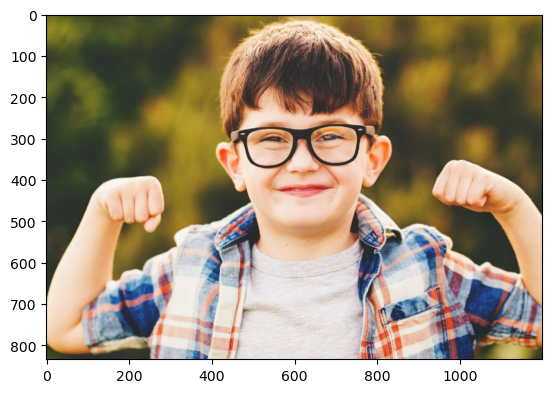

In [30]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse
from keras.models import load_model
from keras.applications.xception import Xception
from keras.preprocessing.sequence import pad_sequences
from pickle import load



# ap = argparse.ArgumentParser()
# ap.add_argument('-i', '--image', required=True, help="Image Path")
# args = vars(ap.parse_args())
# img_path = args['image']
#img_path = '/Users/stutikarki/Desktop/ML1/Flicker8k_Dataset/322791392_aa3b142f43.jpg'
#img_path = '/Users/stutikarki/Desktop/ML1/Flicker8k_Dataset/111537222_07e56d5a30.jpg'
#img_path = '/Users/stutikarki/Desktop/ML1/Flicker8k_Dataset/335588286_f67ed8c9f9.jpg'
#img_path = '/Users/stutikarki/Desktop/ML1/Flicker8k_Dataset/357725852_6f55cb9abc.jpg'
#img_path = '/Users/stutikarki/Desktop/ML1/Flicker8k_Dataset/201682811_105241dee3.jpg'
#img_path = '/Users/stutikarki/Desktop/ML1/Flicker8k_Dataset/356929855_6bbf33d933.jpg'
img_path = '/Users/stutikarki/Desktop/ML1/Flicker8k_Dataset/337647771_3b819feaba.jpg'
img_path = '/Users/stutikarki/Desktop/ML/1234hehe.jpg'
# img_path = '/Users/stutikarki/Desktop/ML1/Flicker8k_Dataset/
# img_path = '/Users/stutikarki/Desktop/ML1/Flicker8k_Dataset/
# img_path = '/Users/stutikarki/Desktop/ML1/Flicker8k_Dataset/

def extract_features(filename, model):
        try:
            image = Image.open(filename)

        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None


def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text


#path = 'Flicker8k_Dataset/111537222_07e56d5a30.jpg'
max_length = 32
tokenizer = load(open("/Users/stutikarki/Desktop/ML/tokenizer.p","rb"))
model = load_model('/Users/stutikarki/Desktop/ML/models/model_9.h5')
xception_model = Xception(include_top=False, pooling="avg")

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)